# Filter Workbench
This is a Python notebook file that contains code to help with designing and testing filters for the `[load_cell_probe]` feature.

## Requirements
This notebook uses the following Python libraries:
* [NumPy](https://numpy.org/)
* [SciPy](https://scipy.org/)
* [Matplotlib](https://matplotlib.org/)

In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

## Test Data
This notebook uses a sample probe event from the `[load_cell_probe]` to demonstrate how the filter acts on real printer data. A sample is provided here from a Voron2.4. You can replace this with data from your own printer by capturing a probing event via the websocket.

In [2]:
probe_data = '{"force":[-0.7860722706944084,-0.5571985419653606,0.07492889928629543,-0.546299792978263,-0.19753982539114248,0.09672639726049047,0.7942463324347315,-1.494490954855747,-1.9195421653525502,-0.6879835298105308,-0.7206797767718233,0.16211889118307557,0.14032139320888054,0.6089675996540738,-0.21933732336533754,-0.36102106019760527,-0.840566015629896,-0.9822497524621637,-1.494490954855747,1.731538745325118,1.2083987939444372,-0.862363513604091,0.053131401312100396,0.9032338223057067,-0.6879835298105308,-2.1593146430686954,-1.6252759427009171,-1.0476422463847488,0.9468288182540968,0.36919512193792836,0.07492889928629543,-0.5027047970298729,-0.4155148051330928,1.0449175591379745,0.7070563405379514,0.06403015029919791,-0.6770847808234333,-0.9277560075266761,-1.0040472504363587,-0.7860722706944084,0.3038026280153433,0.42368886687341595,0.33649887497663583,-0.15394482944275242,-0.19753982539114248,-0.37191980918470274,-0.7642747727202134,-0.4591098010814829,0.03133390333790536,0.3256001259895383,-0.2738310683008251,-0.5898947889266531,-0.24113482133953257,-1.0149459994234562,0.8269425793960241,4.848580955635008,4.772289712725325,-0.7206797767718233,-2.5189733596429136,0.4345876158605135,-0.4809072990556779,3.1592748626348928,2.766919899099382,0.48908136079600106,-2.0067321572493304,-3.4017720275978123,-1.7124659345976974,0.9468288182540968,2.5707424173316267,2.211083700757409,0.7179550895250489,-1.9086434163654526,-0.19753982539114248,1.6552475024154354,1.5789562595057527,-1.0367434973976513,-1.2547184771396016,-2.192010890029988,-1.9958334082622327,-0.6661860318363357,0.3256001259895383,-0.35012231121050774,0.4127901178863185,0.23841013409275819,0.7288538385121465,-0.07765358653306981,0.09672639726049047,-0.8950597605653836,0.34739762396373336,0.053131401312100396,0.06403015029919791,-0.9604522544879687,-1.4290984609331618,-0.42641355412019033,0.8378413283831216,1.7860324902606055,0.47818261180890353,-0.9386547565137736,-1.7560609305460875,-0.11034983349436235,0.6307650976282688,-1.3419084690363818,-2.617062100526791,-1.2547184771396016,0.20571388713146563,2.745122401125187,0.739752587499244,-0.35012231121050774,0.2602076320669532,2.2655774456928963,1.9168174781057759,2.2982736926541887,0.42368886687341595,-0.36102106019760527,-0.3283248132363127,-0.6988822787976283,-0.7751735217073109,-0.15394482944275242,-1.8432509224428675,-2.0176309062364277,1.0885125550863646,0.5326763567443912,0.020435154350807845,-3.1946957968429595,-3.5434557644300804,0.5871701016798787,2.0149062189896534,0.03133390333790536,-1.9304409143396477,0.22751138510566066,0.07492889928629543,0.8596388263573166,0.5326763567443912,-0.42641355412019033,-1.178427234229919,-1.2874147241008942,-0.09945108450726484,0.7506513364863415,0.129422644221783,-0.6879835298105308,-0.9168572585395786,0.9795250652153893,0.9250313202799018,1.3391837817896073,-0.4482110520943854,-0.8078697686686034,0.4999801097830986,2.1020962108864336,1.9059187291186783,-0.05585608855887477,-1.7778584285202825,0.5544738547185861,0.5435751057314887,0.6307650976282688,0.6525625956024638,-0.8950597605653836,-1.0585409953718463,-0.12124858248145988,0.20571388713146563,-0.1321473314685574,0.5217776077572936,-1.9631371613009403,-0.546299792978263,0.9468288182540968,-0.7533760237331159,-0.6443885338621407,-1.3310097200492843,0.009536405363710327,1.2628925388799248,1.2846900368541199,-1.4073009629589668,-3.5325570154429826,-1.5489846997912347,1.6770450003896304,1.143006300021852,-0.1430460804556549,-2.780543335333254,-3.41267077658491,-1.9304409143396477,-0.5136035460169704,1.9713112230412633,-1.178427234229919,-1.603478444726722,-0.12124858248145988,2.025804967976751,1.6443487534283379,-1.243819728152504,-2.7696445863461565,1.3500825307767048,1.6334500044412403,0.14032139320888054,-1.9849346592751353,-5.058381873636635,-3.63064575632686,-0.21933732336533754,1.3173862838154125,0.6852588425637564,-1.4399972099202594,-2.170213392055793,-1.6688709386493072,0.8705375753444141,1.5789562595057527,0.1839163891572706,-2.4099858697719383,-3.0639108089977896,0.2711063810540507,1.8950199801315808,-1.494490954855747,-2.355492124836451,-1.6797696876364048,-0.05585608855887477,0.8487400773702192,-1.9413396633267452,-2.9985183150752044,-1.83235217345577,0.3256001259895383,0.45638511383470853,2.701527405176797,-1.4181997119460643,-3.1728982988687644,-0.5571985419653606,0.7724488344605365,0.9032338223057067,-0.5680972909524581,-2.4753783636945235,-1.6361746916880147,0.6307650976282688,-0.7424772747460183,-0.7860722706944084,-2.845935829255839,-1.7996559264944774,0.5544738547185861,1.186601295970242,1.8296274862089956,-2.0721246511719156,-1.5380859508041371,0.10762514624758798,0.03133390333790536,-0.5027047970298729,1.54626001254446,-0.4155148051330928,-2.3009983799009635,-0.42641355412019033,-0.6879835298105308,-0.840566015629896,-1.0367434973976513,-1.3855034649847717,0.17301764017017307,1.8296274862089956,2.3091724416412864,-1.5271872018170396,-4.088393213784956,-0.42641355412019033,1.393677526725095,0.5762713526927812,-2.551669606604206,-3.183797047855862,-1.9086434163654526,-0.15394482944275242,0.34739762396373336,-0.3283248132363127,-1.6906684366235023,-1.0040472504363587,0.8160438304089266,0.5871701016798787,-0.43731230310728786,-2.2356058859783783,-3.161999549881667,-1.0149459994234562,1.055816308125072,0.7724488344605365,-0.9713510034750662,-2.693353343436474,-0.6443885338621407,1.938614976079971,1.2083987939444372,-1.4399972099202594,-1.5598834487783322,-1.4399972099202594,-1.7887571775073798,-0.8732622625911886,-0.546299792978263,-1.9304409143396477,-2.2138083880041832,-0.4591098010814829,1.0885125550863646,0.5980688506669762,-1.7233646835847949,-2.377289622810646,-2.148415894081598,1.41547502469929,0.8814363243315116,-1.363705967010577,-2.442682116733231,-2.7696445863461565,-0.5789960399395556,1.186601295970242,-0.840566015629896,-0.5027047970298729,-0.26293231931372757,1.2519937898928273,1.0122213121766819,-0.23023607235243504,-1.4835922058686495,-0.24113482133953257,-0.17574232741694745,0.5653726037056837,2.3200711906283837,0.17301764017017307,-3.434468274559105,-1.87594716940416,1.1539050490089495,1.4045762757121925,-0.29562856627502015,-1.7996559264944774,-2.8132395822945466,1.1103100530605596,2.3309699396154815,-0.7642747727202134,-2.2683021329396706,-0.6879835298105308,1.6334500044412403,0.22751138510566066,0.6307650976282688,0.5108788587701961,0.6525625956024638,-0.36102106019760527,-0.1321473314685574,0.5762713526927812,0.8596388263573166,-1.3964022139718693,-4.546140671243052,-0.9059585095524811,0.7615500854734389,-1.3528072180234794,-3.161999549881667,-3.9685069749268833,0.8378413283831216,2.6252361622671145,0.6525625956024638,-3.1293033029203747,-3.3145820357010325,-1.222022230178309,0.9577275672411943,0.5326763567443912,0.9032338223057067,-2.606163351539694,-3.2927845377268374,-0.6770847808234333,0.33649887497663583,1.5026650165960702,-0.6988822787976283,-0.7642747727202134,-0.07765358653306981,-0.8514647646169935,0.6634613445895613,-1.74516218155899,-3.837721987081713,-0.29562856627502015,3.5298323281962083,2.0367037169638484,-1.2329209791654065,-0.36102106019760527,0.009536405363710327,-0.3283248132363127,0.053131401312100396,-0.9713510034750662,-1.516288452829942,-1.8650484204170625,-0.524502295004068,1.2410950409057298,0.7506513364863415,-2.2247071369912805,-2.900429574191327,-1.6143771937138196,1.666146251402533,0.47818261180890353,-1.5598834487783322,-2.148415894081598,-1.7996559264944774,2.1456912068348237,3.9984785346414013,0.7070563405379514,-0.24113482133953257,-0.4155148051330928,-1.0258447484105537,-0.4155148051330928,-0.1430460804556549,-0.43731230310728786,-0.3283248132363127,-0.16484357842984995,0.7288538385121465,1.8514249841831907,-0.36102106019760527,-2.7042520924235713,-2.170213392055793,0.6525625956024638,0.9904238142024868,-1.4290984609331618,-3.140202051907472,-1.8432509224428675,0.2493088830798557,0.7615500854734389,0.20571388713146563,-2.5189733596429136,-1.3964022139718693,-0.26293231931372757,-0.5571985419653606,-0.5789960399395556,-1.6143771937138196,-1.5707821977654297,-1.4835922058686495,-0.4482110520943854,0.45638511383470853,0.16211889118307557,-2.617062100526791,-2.933125821152619,0.08582764827339294,0.783347583447634,0.3909926199121234,-1.5598834487783322,-2.7696445863461565,-0.2520335703266301,0.1839163891572706,-1.0367434973976513,-2.7042520924235713,-0.796971019681506,0.03133390333790536,-0.07765358653306981,-0.9277560075266761,-0.43731230310728786,-1.0694397443589438,-0.8078697686686034,-0.4482110520943854,0.5653726037056837,0.3800938709250259,-1.0476422463847488,-2.2029096390170855,-0.7751735217073109,1.9931087210154583,1.41547502469929,-2.344593375849353,-4.873103140855977,-2.824138331281644,0.5871701016798787,-0.05585608855887477,-2.170213392055793,-3.0312145620364968,0.053131401312100396,1.4699687696347776,0.6089675996540738,-0.9713510034750662,-2.464479614707426,-2.1157196471203052,-0.5789960399395556,1.796931239247703,0.4999801097830986,-1.7342634325718924,-3.7178357482236404,-1.5271872018170396,-0.4155148051330928,-0.5898947889266531,-3.2382907927913496,-4.317266942514004,-0.9822497524621637,2.167488704809019,1.6116525064670453,-1.3092122220750892,-1.854149671429965,-0.26293231931372757,1.8296274862089956,1.6443487534283379,-0.5354010439911655,-1.7342634325718924,-1.603478444726722,-0.6334897848750431,0.9577275672411943,2.0367037169638484,-1.0476422463847488,-2.2574033839525733,-2.322795877875158,-0.12124858248145988,0.7288538385121465,-1.3092122220750892,-3.4453670235462024,-2.2792008819267684,1.1757025469831446,2.2655774456928963,0.47818261180890353,-1.9304409143396477,-1.8432509224428675,-1.0694397443589438,-0.35012231121050774,-0.4700085500685804,-1.243819728152504,-2.148415894081598,-0.8950597605653836,0.9686263162282918,2.6034386642929195,-0.2738310683008251,-3.0421133110235945,-3.140202051907472,1.0013225631895843,1.0122213121766819,0.10762514624758798,-2.889530825204229,-1.0476422463847488,0.8051450814218291,1.5026650165960702,0.129422644221783,-1.581680946752527,-2.4971758616687185,-1.134832238281529,0.45638511383470853,1.3718800287508999,-1.3092122220750892,-1.603478444726722,-0.7206797767718233,-0.7424772747460183,1.2083987939444372,0.8051450814218291,-1.2765159751137967,-2.2900996309138657,-0.8732622625911886,1.2083987939444372,0.3147013770024408,-2.693353343436474,-3.2600882907655446,-0.9168572585395786,0.42368886687341595,0.783347583447634,-1.6470734406751122,-2.7042520924235713,-1.2983134730879917,0.22751138510566066,0.8269425793960241,0.5544738547185861,-1.7996559264944774,-2.2247071369912805,-1.1675284852428214,-0.20843857437824,1.4263737736863875,-0.35012231121050774,-2.780543335333254,-1.178427234229919,2.941299882892942,0.42368886687341595,-2.911328323178424,-3.379974529623617,-0.840566015629896,1.2519937898928273,2.200184951770311,0.3147013770024408,-3.1075058049461797,-0.6879835298105308,1.0449175591379745,0.6743600935766588,0.7288538385121465,-1.6688709386493072,-1.7015671856105998,-1.1893259832170164,-0.8841610115782861,1.1103100530605596,0.2929038790282458,-2.2356058859783783,-1.472693456881552,0.5871701016798787,1.5789562595057527,-0.3937173071588978,-3.5761520113913727,-1.7560609305460875,1.6988424983638255,4.281846008305937,1.099411304073462,-2.333694626862256,-2.0394284042106228,-0.840566015629896,0.6089675996540738,0.07492889928629543,0.20571388713146563,-0.06675483754597229,-1.2656172261266991,-0.7533760237331159,0.09672639726049047,-1.178427234229919,-2.148415894081598,-2.933125821152619,-0.2847298172879226,0.5980688506669762,-1.134832238281529,-4.142886958720443,-2.693353343436474,1.5026650165960702,0.009536405363710327,-1.5380859508041371,-2.845935829255839,-0.7642747727202134,0.7070563405379514,0.8378413283831216,-0.08855233552016732,-0.6334897848750431,-1.5380859508041371,-0.6879835298105308,0.3909926199121234,0.09672639726049047,0.2493088830798557,-0.40461605614599533,-1.7560609305460875,-0.546299792978263,-0.2520335703266301,0.03133390333790536,-1.7996559264944774,-1.2874147241008942,3.5734273241445984,2.7124261541638943,0.40189136889922095,-1.87594716940416,-3.6960382502494453,-2.5843658535654987,-1.091237242333139,-0.1321473314685574,-1.0367434973976513,-2.5407708576171086,-3.4017720275978123,-1.9958334082622327,1.099411304073462,-0.1430460804556549,-2.9767208171010093,-2.551669606604206,0.03133390333790536,1.3609812797638023,-0.4591098010814829,-2.649758347488084,-2.9549233191268143,-0.8296672666427984,0.9904238142024868,-0.36102106019760527,-1.7887571775073798,-2.7914420843203516,-1.9631371613009403,-0.38281855817180027,0.1839163891572706,-1.2874147241008942,-0.7206797767718233,-0.4482110520943854,-0.09945108450726484,-0.06675483754597229,-0.35012231121050774,-1.8214534244686724,-3.2818857887397397,-3.914013229991396,0.7724488344605365,1.54626001254446,0.45638511383470853,-1.6688709386493072,-1.7560609305460875,0.21661263611856316,-0.09945108450726484,-1.9958334082622327,-3.32548078468813,-2.333694626862256,-0.43731230310728786,0.7506513364863415,-0.49180604804277545,-2.606163351539694,-2.333694626862256,-1.4835922058686495,-0.21933732336533754,0.8814363243315116,-0.31742606424921516,-0.9713510034750662,-1.9631371613009403,-0.9713510034750662,-1.0258447484105537,-0.6443885338621407,-2.9440245701397165,-2.7587458373590588,0.5871701016798787,1.4481712716605826,-0.6007935379137506,-1.2765159751137967,0.3256001259895383,0.8705375753444141,1.121208802047657,1.9059187291186783,0.20571388713146563,-1.4181997119460643,-2.889530825204229,-1.3419084690363818,-0.43731230310728786,-1.6688709386493072,-2.8132395822945466,-1.7342634325718924,0.22751138510566066,-0.6225910358879456,-0.12124858248145988,-1.6579721896622097,-3.4671645215203974,0.2929038790282458,3.2573636035187703,0.9795250652153893,-0.6988822787976283,-1.7887571775073798,-0.9386547565137736,0.783347583447634,0.5326763567443912,-1.9522384123138428,-2.442682116733231,-1.9849346592751353,-0.9495535055008711,0.20571388713146563,-1.3092122220750892,-2.4535808657203284,-1.7015671856105998,-0.43731230310728786,1.0449175591379745,0.7288538385121465,-1.1457309872686265,-2.8568345782429367,-0.03405859058467974,2.091197461899336,0.042232652325002874,-1.2111234811912115,-2.5625683555913037,-1.87594716940416,-0.11034983349436235,0.9032338223057067,-1.200224732204114,-2.2356058859783783,-2.2792008819267684,-0.36102106019760527,1.5135637655831677,0.6089675996540738,-2.1157196471203052,-2.399087120784841,0.22751138510566066,2.004007470002556,0.8378413283831216,-2.8132395822945466,-4.023000719862371,-1.581680946752527,0.22751138510566066,0.20571388713146563,-2.0394284042106228,-3.5761520113913727,-1.8977446673783551,1.1757025469831446,1.3827787777379974,0.3909926199121234,-1.6470734406751122,-2.2356058859783783,-1.243819728152504,-0.5898947889266531,0.9577275672411943,-0.546299792978263,-2.0394284042106228,-1.8650484204170625,0.09672639726049047,1.2410950409057298,0.7942463324347315,-1.83235217345577,-1.6252759427009171,0.020435154350807845,0.09672639726049047,-0.1321473314685574,-3.2709870397526424,-0.5680972909524581,0.8378413283831216,-0.15394482944275242,0.17301764017017307,-1.0258447484105537,-2.061225902184818,-2.322795877875158,-0.9713510034750662,0.5217776077572936,-2.0067321572493304,-2.529872108630011,-2.0285296552235255,0.03133390333790536,1.41547502469929,-0.21933732336533754,-2.638859598500986,-1.0803384933460414,1.0122213121766819,0.6634613445895613,-1.8432509224428675,-2.1157196471203052,-1.83235217345577,0.45638511383470853,0.9577275672411943,0.129422644221783,-0.3937173071588978,-1.7015671856105998,-2.104820898133208,-0.5136035460169704,0.7615500854734389,-1.1239334892944315,-3.5761520113913727,-3.2164932948171545,-1.9849346592751353,0.07492889928629543,-3.140202051907472,-3.4235695255720073,-2.5189733596429136,-0.8078697686686034,0.17301764017017307,-0.06675483754597229,-0.6443885338621407,-1.7996559264944774,-1.7342634325718924,0.053131401312100396,0.03133390333790536,-1.4399972099202594,-2.083023400159013,-3.4562657725333,-0.796971019681506,1.753336243299313,0.33649887497663583,-1.766959679533185,-1.0585409953718463,0.5435751057314887,0.8378413283831216,0.2602076320669532,-0.08855233552016732,-2.4099858697719383,-2.933125821152619,0.3147013770024408,-0.08855233552016732,-3.161999549881667,-2.3118971288880608,-0.20843857437824,0.2929038790282458,0.5108788587701961,-0.4155148051330928,-2.126618396107403,-3.4017720275978123,-1.766959679533185,1.0231200611637794,1.6225512554541428,-1.178427234229919,-2.399087120784841,-0.19753982539114248,0.9359300692669993,0.8160438304089266,-1.2765159751137967,-1.8868459183912576,0.5980688506669762,1.5026650165960702,0.06403015029919791,-2.420884618759036,-2.715150841410669,-2.8350370802687417,-0.6879835298105308,-0.42641355412019033,-0.16484357842984995,-0.8078697686686034,-2.3009983799009635,-2.0503271531977205,-1.4181997119460643,-0.6879835298105308,-0.6334897848750431,-0.9604522544879687,-0.21933732336533754,2.091197461899336,1.6443487534283379,-0.6116922869008481,-2.0285296552235255,-2.4971758616687185,0.09672639726049047,0.783347583447634,0.08582764827339294,-1.472693456881552,-2.715150841410669,-1.2329209791654065,1.143006300021852,1.0667150571121695,-1.3310097200492843,-2.2900996309138657,-1.7560609305460875,0.45638511383470853,1.143006300021852,0.21661263611856316,-0.6879835298105308,-1.450895958907357,0.14032139320888054,0.3256001259895383,0.7615500854734389,-3.3036832867139347,-4.644229412126929,1.3500825307767048,1.2519937898928273,-0.5680972909524581,-3.5325570154429826,-3.5107595174687876,-0.9931485014492613,0.5217776077572936,0.36919512193792836,-2.1157196471203052,-2.671555845462279,-2.9985183150752044,-1.3528072180234794,0.9359300692669993,0.03133390333790536,-2.486277112681621,-3.1293033029203747,-1.6361746916880147,0.3582963729508309,-2.1375171450945003,-2.377289622810646,-1.8977446673783551,-1.200224732204114,0.129422644221783,-0.9822497524621637,-2.606163351539694,-2.617062100526791,-1.581680946752527,-0.0013623436233871895,1.4045762757121925,0.2711063810540507,-2.889530825204229,-3.0639108089977896,-1.1675284852428214,-0.0013623436233871895,0.34739762396373336,-1.1021359913202364,-3.750531995184933,-1.8214534244686724,1.3391837817896073,0.9795250652153893,-1.581680946752527,-3.597949509365568,-1.6252759427009171,0.2929038790282458,1.2519937898928273,-0.26293231931372757,-2.9876195660881066,-1.9413396633267452,0.15122014219597804,0.2929038790282458,-0.8078697686686034,-2.170213392055793,-2.4317833677461334,-2.671555845462279,-0.6770847808234333,0.48908136079600106,-1.6470734406751122,-1.9086434163654526,-1.7015671856105998,-0.08855233552016732,1.4045762757121925,-1.4617947078944544,-3.434468274559105,-1.0803384933460414,0.3800938709250259,1.9168174781057759,-0.16484357842984995,-2.377289622810646,-3.183797047855862,0.5544738547185861,-0.35012231121050774,-0.796971019681506,-1.87594716940416,-1.6361746916880147,-0.2738310683008251,0.23841013409275819,-1.2983134730879917,-2.4753783636945235,-2.638859598500986,-1.4617947078944544,0.8378413283831216,1.3282850328025098,-0.09945108450726484,-2.0503271531977205,-2.8132395822945466,-1.0476422463847488,-0.5354010439911655,-0.3283248132363127,-1.4399972099202594,-1.9849346592751353,-0.9822497524621637,-0.7097810277847257,-1.134832238281529,-0.4809072990556779,-1.0476422463847488,-2.4099858697719383,-1.5598834487783322,-1.0803384933460414,-0.15394482944275242,-1.3855034649847717,-1.7560609305460875,-1.6579721896622097,1.1539050490089495,-1.2656172261266991,-2.551669606604206,-3.161999549881667,-1.472693456881552,1.709741247350923,1.4699687696347776,-1.4617947078944544,-2.617062100526791,-0.546299792978263,0.16211889118307557,0.5326763567443912,-0.6879835298105308,-3.837721987081713,-3.347278282662325,-0.6334897848750431,1.6225512554541428,0.07492889928629543,-3.8268232380946157,-3.685139501262348,-1.7342634325718924,0.16211889118307557,0.47818261180890353,-2.2683021329396706,-2.0176309062364277,-0.8732622625911886,0.42368886687341595,0.1839163891572706,-2.606163351539694,-3.565253262404275,-3.1728982988687644,-0.40461605614599533,0.6198663486411713,-0.7315785257589208,-0.8514647646169935,-1.0149459994234562,-0.4809072990556779,-0.05585608855887477,-1.1021359913202364,-3.2709870397526424,-2.148415894081598,-0.03405859058467974,1.0122213121766819,-0.35012231121050774,-1.1457309872686265,-3.053012060010692,-1.7887571775073798,0.5762713526927812,2.1238937088606287,-0.6770847808234333,-3.0639108089977896,-2.6824545944493763,-1.5925796957396245,-0.9822497524621637,-1.9195421653525502,-3.3036832867139347,-2.595264602552596,-2.7369483393848637,-0.0013623436233871895,2.025804967976751,-2.0394284042106228,-3.4017720275978123,-3.2818857887397397,-0.38281855817180027,0.4999801097830986,-0.7206797767718233,-3.1511008008945693,-4.099291962772053,-1.2329209791654065,-0.9386547565137736,-1.5271872018170396,-2.824138331281644,-3.4998607684816903,-1.810554675481575,-1.472693456881552,-1.3310097200492843,-1.6688709386493072,-2.6824545944493763,-2.322795877875158,-0.5571985419653606,1.0885125550863646,-1.6252759427009171,-2.802340833307449,-1.4617947078944544,0.7288538385121465,1.4045762757121925,-1.2329209791654065,-3.750531995184933,-3.2600882907655446,-0.8187685176557009,-0.23023607235243504,-1.0476422463847488,-2.867733327230034,-2.344593375849353,-1.2329209791654065,-1.0803384933460414,-1.2329209791654065,-0.8514647646169935,0.28200513004114824,-0.9277560075266761,-1.6688709386493072,-0.5789960399395556,-0.9277560075266761,-4.023000719862371,-3.706936999236543,-3.641544505313958,-2.4535808657203284,-1.7233646835847949,-1.9304409143396477,-1.178427234229919,-0.840566015629896,0.5326763567443912,0.7942463324347315,-0.15394482944275242,-1.091237242333139,-0.08855233552016732,-0.8732622625911886,-0.6661860318363357,-0.1430460804556549,-1.7887571775073798,-3.36907578063652,0.2493088830798557,-1.0803384933460414,0.40189136889922095,-1.450895958907357,-3.2709870397526424,-1.4617947078944544,0.6307650976282688,1.6443487534283379,-0.3937173071588978,-3.434468274559105,-3.36907578063652,-1.3746047159976742,-1.810554675481575,-0.9168572585395786,-2.061225902184818,-3.597949509365568,-1.3092122220750892,-0.7097810277847257,-0.7860722706944084,-1.9522384123138428,-2.617062100526791,-1.0149459994234562,0.2711063810540507,0.6852588425637564,-2.0503271531977205,-3.074809557984887,-3.0094170640623017,0.4127901178863185,0.09672639726049047,0.07492889928629543,-2.5189733596429136,-2.5843658535654987,-0.37191980918470274,0.1948151381443681,-2.7042520924235713,-3.1728982988687644,-2.464479614707426,-2.0067321572493304,-0.37191980918470274,-0.36102106019760527,-1.9522384123138428,-2.399087120784841,-0.7424772747460183,-0.9822497524621637,-0.07765358653306981,-2.1157196471203052,-3.7832282421462256,-4.240975699604321,-1.9849346592751353,0.5871701016798787,-2.126618396107403,-3.9903044729010784,-1.9958334082622327,-1.1457309872686265,-1.450895958907357,-2.061225902184818,-3.7614307441720305,-2.671555845462279,-2.529872108630011,-1.222022230178309,0.1948151381443681,-1.581680946752527,-2.333694626862256,-2.780543335333254,-1.3964022139718693,1.3827787777379974,0.21661263611856316,-0.43731230310728786,-0.8514647646169935,-0.524502295004068,0.783347583447634,0.6198663486411713,-1.74516218155899,-4.458950679346271,-3.0639108089977896,0.20571388713146563,0.9032338223057067,-0.8841610115782861,-2.420884618759036,-1.810554675481575,-1.0585409953718463,-1.7233646835847949,-1.3746047159976742,-2.867733327230034,-1.9631371613009403,0.9468288182540968,0.5435751057314887,-0.9713510034750662,-3.4562657725333,-3.4998607684816903,-2.170213392055793,-0.6116922869008481,-1.0803384933460414,-3.390873278610715,-3.434468274559105,-1.091237242333139,-0.6661860318363357,-2.5080746106558163,-2.4971758616687185,-2.083023400159013,-2.0176309062364277,-1.5598834487783322,-0.49180604804277545,-0.36102106019760527,-3.608848258352665,-4.873103140855977,-4.5025456752946615,-1.5053897038428445,-0.36102106019760527,-2.6824545944493763,-3.565253262404275,-2.9985183150752044,-0.38281855817180027,0.7615500854734389,-0.2738310683008251,-3.2273920438042523,-2.344593375849353,-0.5789960399395556,0.17301764017017307,-2.192010890029988,-3.140202051907472,-1.3746047159976742,0.3800938709250259,0.020435154350807845,-0.5898947889266531,-3.7614307441720305,-4.513444424281759,-2.7696445863461565,-0.524502295004068,1.0885125550863646,-1.4073009629589668,-3.4453670235462024,-3.4453670235462024,0.467283862821806,1.9604124740541657,-1.2111234811912115,-2.442682116733231,-1.2656172261266991,-0.7642747727202134,0.129422644221783,-2.0285296552235255,-4.121089460746249,-2.878632076217132,-1.766959679533185,-0.38281855817180027,-1.7124659345976974,-2.573467104578401,-3.434468274559105,-3.2382907927913496,0.2711063810540507,0.6634613445895613,-0.2520335703266301,-1.6906684366235023,-2.1157196471203052,1.034018810150877,2.3745649355638716,-0.03405859058467974,-3.1075058049461797,-4.524343173268857,-2.399087120784841,1.4808675186218752,0.8269425793960241,-0.8732622625911886,-2.2465046349654756,-2.1157196471203052,-0.8078697686686034,1.121208802047657,-0.6879835298105308,-2.9985183150752044,-1.9522384123138428,-0.7424772747460183,-0.9059585095524811,-2.638859598500986,-4.001203221888176,-2.170213392055793,-0.7642747727202134,-0.16484357842984995,-0.8187685176557009,-2.573467104578401,-4.131988209733346,-3.3036832867139347,-0.6116922869008481,0.053131401312100396,-2.0285296552235255,-2.867733327230034,-0.8514647646169935,1.055816308125072,0.36919512193792836,-2.2574033839525733,-3.7178357482236404,-4.142886958720443,-2.420884618759036,-0.42641355412019033,-0.43731230310728786,-2.845935829255839,-2.2900996309138657,-1.9195421653525502,-0.42641355412019033,-1.4617947078944544,-2.2465046349654756,-4.023000719862371,-3.2709870397526424,-0.20843857437824,1.731538745325118,0.129422644221783,-2.4971758616687185,-3.1946957968429595,-1.3092122220750892,-1.091237242333139,0.5217776077572936,-1.7233646835847949,-2.824138331281644,-1.9195421653525502,-1.5053897038428445,-1.4073009629589668,-2.2900996309138657,-2.9658220681139116,-0.5027047970298729,1.2628925388799248,1.9059187291186783,-0.18664107640404498,-3.1946957968429595,-3.074809557984887,-0.4155148051330928,-0.8841610115782861,-1.5271872018170396,-2.2683021329396706,-4.6551281611140265,-2.333694626862256,-0.840566015629896,-0.796971019681506,-2.442682116733231,-3.1728982988687644,-2.8568345782429367,-1.0367434973976513,0.2929038790282458,-0.6116922869008481,-1.5925796957396245,-1.5489846997912347,0.445486364847611,1.687943749376728,-1.2111234811912115,-2.7478470883719615,-3.36907578063652,-1.2111234811912115,-0.3392235622234102,-2.2356058859783783,-5.603319322991511,-3.8268232380946157,-1.9631371613009403,-1.3419084690363818,-1.9304409143396477,-1.8432509224428675,-2.2029096390170855,-3.053012060010692,-1.854149671429965,-0.5898947889266531,-0.8841610115782861,-2.5407708576171086,-3.074809557984887,-2.192010890029988,-0.35012231121050774,-0.6988822787976283,-3.161999549881667,-3.3036832867139347,-2.322795877875158,0.042232652325002874,-1.5380859508041371,-3.118404553933277,-3.4998607684816903,-2.780543335333254,-1.2329209791654065,-0.546299792978263,-1.0040472504363587,-4.284570695552711,-4.208279452643029,-3.183797047855862,-1.9304409143396477,-1.7233646835847949,-4.240975699604321,-2.420884618759036,-1.2329209791654065,-0.9495535055008711,-1.1675284852428214,-2.551669606604206,-3.641544505313958,-1.3746047159976742,-0.31742606424921516,-0.18664107640404498,-3.2491895417784473,-4.240975699604321,-3.0312145620364968,-1.603478444726722,-1.134832238281529,-0.26293231931372757,-2.4099858697719383,-3.7178357482236404,-1.8868459183912576,-0.1430460804556549,0.7506513364863415,-0.49180604804277545,-2.7369483393848637,-4.110190711759151,0.14032139320888054,0.7724488344605365,-2.083023400159013,-3.8486207360688107,-3.096607055959082,-1.5598834487783322,-0.23023607235243504,0.2602076320669532,-2.2247071369912805,-2.3009983799009635,-1.1675284852428214,0.009536405363710327,1.3609812797638023,-0.40461605614599533,-4.3826594364365885,-4.240975699604321,-1.1021359913202364,0.4999801097830986,-2.2465046349654756,-3.0421133110235945,-3.4453670235462024,-0.8078697686686034,0.03133390333790536,-2.2356058859783783,-4.589735667191442,-4.469849428333369,-2.2792008819267684,-0.5898947889266531,0.45638511383470853,-0.6879835298105308,-0.8514647646169935,-0.5571985419653606,-0.8950597605653836,-1.2547184771396016,-0.4482110520943854,-2.442682116733231,-3.1293033029203747,-1.1239334892944315,1.2846900368541199,-1.3746047159976742,-3.0421133110235945,-3.2382907927913496,-1.5489846997912347,0.9359300692669993,0.03133390333790536,-3.4562657725333,-4.088393213784956,-1.1893259832170164,-0.7424772747460183,-3.0094170640623017,-5.0474831246495375,-3.914013229991396,-2.3881883717977432,-1.3855034649847717,-0.9931485014492613,-1.4073009629589668,-3.118404553933277,-2.192010890029988,-1.6361746916880147,-0.7533760237331159,-0.7533760237331159,-2.355492124836451,-2.8568345782429367,0.3582963729508309,1.3173862838154125,-0.06675483754597229,-3.390873278610715,-4.437153181372077,-2.2465046349654756,-2.083023400159013,-1.7233646835847949,-1.854149671429965,-3.1293033029203747,-2.8350370802687417,-0.3937173071588978,-1.5271872018170396,-1.5598834487783322,-1.7124659345976974,-3.957608225939786,-3.5761520113913727,-1.516288452829942,-0.862363513604091,-3.0639108089977896,-3.478063270507495,-1.494490954855747,-1.200224732204114,-1.091237242333139,-1.363705967010577,-2.3009983799009635,-0.796971019681506,0.9141325712928042,0.17301764017017307,-2.4099858697719383,-2.845935829255839,-3.2273920438042523,-2.2465046349654756,-2.671555845462279,-1.494490954855747,-1.2329209791654065,-3.1293033029203747,-2.9658220681139116,-2.7478470883719615,0.1185238952346855,-1.243819728152504,-3.663342003288153,-4.251874448591419,-0.6225910358879456,-1.4073009629589668,-2.9440245701397165,-3.183797047855862,-4.415355683397881,-1.9304409143396477,-0.524502295004068,-2.2683021329396706,-2.126618396107403,-2.8568345782429367,-2.824138331281644,-2.2029096390170855,-1.7778584285202825,0.009536405363710327,-2.420884618759036,-4.295469444539809,-1.6143771937138196,1.1103100530605596,-0.06675483754597229,-2.5080746106558163,-3.1293033029203747,-1.83235217345577,-0.524502295004068,-1.0258447484105537,-3.935810727965591,-4.240975699604321,-0.9059585095524811,0.467283862821806,-0.43731230310728786,-3.2491895417784473,-3.4671645215203974,-1.3964022139718693,-0.7860722706944084,-0.08855233552016732,-1.9304409143396477,-4.088393213784956,-4.186481954668833,-3.183797047855862,-1.5925796957396245,-1.472693456881552,-3.957608225939786,-3.32548078468813,-0.7533760237331159,0.07492889928629543,-1.3310097200492843,-3.8486207360688107,-3.892215732017201,-1.7778584285202825,-1.3419084690363818,-0.5789960399395556,-2.4317833677461334,-4.742318153010807,-2.824138331281644,-2.2465046349654756,-3.2273920438042523,-3.140202051907472,-2.911328323178424,-2.2574033839525733,-1.5925796957396245,-0.9604522544879687,-0.6443885338621407,-1.472693456881552,-3.390873278610715,-3.5216582664558853,-1.603478444726722,-1.5271872018170396,-1.8868459183912576,-4.415355683397881,-5.014786877688245,-1.1457309872686265,-0.1321473314685574,-1.2874147241008942,-2.5080746106558163,-2.0285296552235255,-0.40461605614599533,0.15122014219597804,-0.5354010439911655,-2.4317833677461334,-2.4753783636945235,-0.9822497524621637,-1.1239334892944315,-0.1321473314685574,-1.6143771937138196,-4.186481954668833,-3.2709870397526424,-1.6579721896622097,-1.83235217345577,-2.464479614707426,-3.2273920438042523,-2.5843658535654987,-1.2983134730879917,-0.05585608855887477,-0.05585608855887477,-3.4671645215203974,-2.420884618759036,-0.862363513604091,0.5108788587701961,0.6961575915508539,-0.0013623436233871895,-3.0094170640623017,-3.9685069749268833,-2.8132395822945466,-0.19753982539114248,-1.1893259832170164,-3.161999549881667,-2.638859598500986,0.22751138510566066,0.3909926199121234,-0.7097810277847257,-3.750531995184933,-4.3826594364365885,-1.1239334892944315,0.9468288182540968,-0.3392235622234102,-3.914013229991396,-4.186481954668833,-2.671555845462279,-1.603478444726722,-0.19753982539114248,-1.4181997119460643,-2.6824545944493763,-4.273671946565614,-3.5107595174687876,-1.7015671856105998,-1.766959679533185,-3.6960382502494453,-4.480748177320467,-1.3201109710621868,0.8814363243315116,-0.21933732336533754,-2.7914420843203516,-4.360861938462394,-2.693353343436474,-0.7424772747460183,-1.5598834487783322,-4.0338994688494685,-2.322795877875158,-1.2329209791654065,0.8596388263573166,0.16211889118307557,-0.5898947889266531,-2.802340833307449,-4.404456934410784,-3.3363795336752275,-2.0285296552235255,-2.2574033839525733,-3.8486207360688107,-4.001203221888176,-2.573467104578401,-1.2111234811912115,-2.366390873823548,-2.3118971288880608,-3.0639108089977896,-2.083023400159013,0.7615500854734389,-0.3065273152621177,-2.2574033839525733,-3.379974529623617,-2.573467104578401,-1.7124659345976974,-2.649758347488084,-2.2465046349654756,-2.7260495903977664,-2.824138331281644,-3.63064575632686,-2.2138083880041832,-0.08855233552016732,-2.355492124836451,-4.077494464797859,-3.750531995184933,-0.7860722706944084,0.2929038790282458,-2.1593146430686954,-5.0474831246495375,-3.5216582664558853,-0.7424772747460183,-0.6116922869008481,-2.355492124836451,-4.110190711759151,-3.0094170640623017,-2.322795877875158,-0.26293231931372757,-0.6879835298105308,-2.442682116733231,-4.360861938462394,-4.186481954668833,-2.061225902184818,0.2493088830798557,-1.5053897038428445,-3.41267077658491,-2.192010890029988,0.6089675996540738,-0.023159841597582224,-1.7233646835847949,-3.772329493159128,-6.954764197391603,-3.32548078468813,-1.494490954855747,-1.2656172261266991,-2.7042520924235713,-3.565253262404275,-3.2491895417784473,-1.472693456881552,-1.2111234811912115,-2.551669606604206,-4.567938169217247,-4.557039420230149,-1.603478444726722,-0.26293231931372757,-1.83235217345577,-0.8514647646169935,-1.8214534244686724,0.3909926199121234,-0.0013623436233871895,-1.9413396633267452,-3.772329493159128,-3.837721987081713,-1.9740359102880378,-0.40461605614599533,-1.8868459183912576,-3.5543545134171777,-3.4017720275978123,-1.4073009629589668,0.06403015029919791,-0.6334897848750431,-3.63064575632686,-3.6960382502494453,-3.2382907927913496,-2.802340833307449,-1.87594716940416,-0.7097810277847257,-2.595264602552596,-3.935810727965591,-1.6797696876364048,-1.8432509224428675,-1.8214534244686724,-2.0939221491461106,-3.347278282662325,-1.8650484204170625,0.9032338223057067,-0.044957339571777256,-2.2247071369912805,-2.6606570964751812,-1.494490954855747,-0.8187685176557009,-2.355492124836451,-2.126618396107403,-3.619747007339763,-3.2709870397526424,-2.192010890029988,-0.840566015629896,-0.07765358653306981,-2.0503271531977205,-3.58705076037847,-3.434468274559105,-0.31742606424921516,0.5326763567443912,-0.3392235622234102,-3.4562657725333,-4.273671946565614,-1.6797696876364048,-1.6688709386493072,-2.9658220681139116,-4.349963189475297,-2.399087120784841,1.1539050490089495,-1.178427234229919,-3.0312145620364968,-4.371760687449491,-3.6960382502494453,-2.6606570964751812,-0.8078697686686034,-1.0694397443589438,-3.2382907927913496,-3.0857083069719846,-2.344593375849353,-0.19753982539114248,1.0231200611637794,-0.08855233552016732,-3.32548078468813,-3.096607055959082,-1.3964022139718693,-0.31742606424921516,-1.5925796957396245,-2.627960849513889,-1.8214534244686724,-0.3937173071588978,-1.9195421653525502,-1.156629736255724,-0.6443885338621407,-1.1021359913202364,-1.4399972099202594,-1.9413396633267452,-0.6988822787976283,-1.5598834487783322,-3.903114481004298,-4.448051930359174,-1.6579721896622097,0.47818261180890353,0.8051450814218291,-2.9549233191268143,-3.881316983030103,-0.524502295004068,-0.9604522544879687,-2.7478470883719615,-4.240975699604321,-2.780543335333254,-2.2574033839525733,-1.7560609305460875,-0.7315785257589208,-0.49180604804277545,-1.6361746916880147,-2.4317833677461334,-0.5571985419653606,-0.36102106019760527,-0.8078697686686034,-2.377289622810646,-3.053012060010692,-1.7560609305460875,-0.16484357842984995,-0.862363513604091,-1.4399972099202594,-3.8486207360688107,-3.4562657725333,-1.113034740307334,-1.5271872018170396,-2.5625683555913037,-3.2600882907655446,-3.2927845377268374,-0.6116922869008481,-0.8296672666427984,-1.3528072180234794,-3.096607055959082,-3.58705076037847,-1.0367434973976513,-0.18664107640404498,-0.21933732336533754,-2.638859598500986,-3.2273920438042523,-3.3363795336752275,-0.4809072990556779,-1.6797696876364048,-4.5025456752946615,-5.418040590210853,-3.41267077658491,-1.200224732204114,0.5544738547185861,-2.399087120784841,-4.012101970875273,-2.333694626862256,-1.0258447484105537,-2.617062100526791,-2.9658220681139116,-3.7614307441720305,-3.728734497210738,-1.5598834487783322,-0.5789960399395556,-1.3092122220750892,-3.7614307441720305,-4.81860939592049,-4.273671946565614,-1.766959679533185,-0.4700085500685804,-1.7560609305460875,-3.859519485055908,-3.140202051907472,-2.2138083880041832,-1.87594716940416,-2.5625683555913037,-2.693353343436474,-2.8132395822945466,-1.854149671429965,-0.9386547565137736,-1.3419084690363818,-3.2927845377268374,-2.5843658535654987,-1.7887571775073798,0.28200513004114824,0.6634613445895613,-2.5843658535654987,-3.608848258352665,-3.5543545134171777,-1.2765159751137967,-0.7424772747460183,-1.9958334082622327,-3.4889620194945925,-3.2709870397526424,0.1185238952346855,0.20571388713146563,-2.1811121410428904,-3.2927845377268374,-2.148415894081598,-2.104820898133208,-1.4290984609331618,-0.8514647646169935,-1.7015671856105998,-3.8268232380946157,-2.486277112681621,-1.0803384933460414,-0.19753982539114248,-2.104820898133208,-4.426254432384979,-4.186481954668833,-1.494490954855747,-1.2983134730879917,-2.7914420843203516,-4.742318153010807,-3.6960382502494453,-2.2792008819267684,-1.9958334082622327,-2.464479614707426,-3.4017720275978123,-3.5434557644300804,-2.2574033839525733,-0.5136035460169704,-0.7533760237331159,-2.061225902184818,-3.5325570154429826,-4.1537857077075415,-2.2900996309138657,-1.2656172261266991,-1.6252759427009171,-3.434468274559105,-3.358177031649422,-2.4535808657203284,0.2602076320669532,-0.840566015629896,-1.7233646835847949,-2.715150841410669,-2.5407708576171086,-0.05585608855887477,-0.42641355412019033,-2.061225902184818,-1.9849346592751353,-3.2382907927913496,-3.0421133110235945,-2.802340833307449,-3.074809557984887,-3.6960382502494453,-3.096607055959082,-2.2247071369912805,-1.494490954855747,0.5435751057314887,-1.8977446673783551,-3.9794057239139806,-3.728734497210738,-0.4591098010814829,-0.9713510034750662,-3.619747007339763,-3.772329493159128,-3.772329493159128,-1.363705967010577,-0.21933732336533754,-3.053012060010692,-3.619747007339763,-3.6742407522752503,-2.399087120784841,-1.8868459183912576,-2.9767208171010093,-2.617062100526791,-2.2900996309138657,-3.1075058049461797,-2.0394284042106228,-1.494490954855747,-3.6742407522752503,-4.110190711759151,-3.0639108089977896,-0.7533760237331159,-0.5789960399395556,-1.156629736255724,-2.3881883717977432,-3.903114481004298,-1.5053897038428445,0.36919512193792836,0.1185238952346855,-2.0394284042106228,-2.606163351539694,-2.1593146430686954,-1.7560609305460875,-1.74516218155899,-2.878632076217132,-2.420884618759036,-4.1537857077075415,-2.104820898133208,1.1757025469831446,-1.0367434973976513,-4.437153181372077,-4.349963189475297,-1.5707821977654297,-1.0694397443589438,-1.87594716940416,-4.328165691501101,-4.524343173268857,-2.2138083880041832,-0.7860722706944084,-0.7424772747460183,-3.36907578063652,-3.565253262404275,-2.606163351539694,-1.6688709386493072,-0.546299792978263,-1.4073009629589668,-3.2382907927913496,-3.1293033029203747,-3.2709870397526424,-2.083023400159013,-1.7887571775073798,-2.6824545944493763,-3.3363795336752275,-2.3118971288880608,-1.9195421653525502,-1.7015671856105998,-1.156629736255724,-3.652443254301055,-2.0067321572493304,-0.20843857437824,-1.4399972099202594,-2.333694626862256,-2.061225902184818,-2.442682116733231,-2.2247071369912805,-0.6879835298105308,-2.7696445863461565,-3.32548078468813,-3.36907578063652,-2.366390873823548,-0.35012231121050774,-0.2738310683008251,-3.4562657725333,-4.709621906049515,-3.41267077658491,1.0667150571121695,1.1103100530605596,-3.0857083069719846,-5.330850598314073,-4.023000719862371,-1.2111234811912115,-0.5789960399395556,-1.5925796957396245,-3.0421133110235945,-1.6688709386493072,-1.0367434973976513,-1.3964022139718693,-1.581680946752527,-2.3118971288880608,-3.728734497210738,-3.565253262404275,-1.5053897038428445,-2.693353343436474,-2.9549233191268143,-3.706936999236543,-4.001203221888176,-1.8214534244686724,-0.524502295004068,-2.4099858697719383,-3.903114481004298,-3.9467094769526883,-1.5380859508041371,0.4345876158605135,-1.243819728152504,-3.0312145620364968,-3.205594545830057,-2.442682116733231,-2.5407708576171086,-1.2874147241008942,-1.8977446673783551,-3.957608225939786,-3.4235695255720073,-1.0803384933460414,-0.4591098010814829,-1.472693456881552,-3.597949509365568,-4.9275968857914645,-2.1593146430686954,-1.581680946752527,-2.1811121410428904,-4.012101970875273,-3.914013229991396,-2.0285296552235255,-1.8650484204170625,-3.183797047855862,-3.2927845377268374,-3.053012060010692,-1.7778584285202825,-0.23023607235243504,-1.0694397443589438,-3.1946957968429595,-4.894900638830173,-4.938495634778563,-2.5189733596429136,-0.9713510034750662,-1.472693456881552,-3.8486207360688107,-3.565253262404275,-1.7015671856105998,-0.42641355412019033,-2.2900996309138657,-3.2709870397526424,-2.192010890029988,-1.0803384933460414,-0.8078697686686034,-1.2111234811912115,-3.2491895417784473,-3.565253262404275,-1.6797696876364048,0.42368886687341595,-0.6007935379137506,-1.4181997119460643,-2.933125821152619,-2.911328323178424,-0.8841610115782861,-0.8296672666427984,-1.810554675481575,-3.7396332461978354,-4.339064440488199,-3.1075058049461797,-1.3746047159976742,-1.4073009629589668,-3.4562657725333,-4.9275968857914645,-4.186481954668833,-1.603478444726722,-1.1893259832170164,-3.3363795336752275,-4.448051930359174,-3.5543545134171777,-1.200224732204114,-0.5571985419653606,-0.7533760237331159,-2.7042520924235713,-2.6824545944493763,-0.862363513604091,0.15122014219597804,0.06403015029919791,-1.4399972099202594,-2.551669606604206,-1.9849346592751353,0.3038026280153433,-1.0694397443589438,-1.4835922058686495,-4.066595715810761,-3.4562657725333,-1.6906684366235023,-2.061225902184818,-3.685139501262348,-3.205594545830057,-4.676925659088222,-4.524343173268857,-2.9767208171010093,-1.7778584285202825,-3.881316983030103,-3.9794057239139806,-1.494490954855747,0.17301764017017307,0.4127901178863185,-1.5598834487783322,-3.140202051907472,-3.0203158130493994,-1.6361746916880147,-1.0367434973976513,-2.7696445863461565,-3.7396332461978354,-2.4317833677461334,-1.3964022139718693,-1.4617947078944544,-3.4998607684816903,-4.611533165165636,-3.1075058049461797,-1.9086434163654526,-2.7369483393848637,-3.685139501262348,-3.183797047855862,-5.527028080081828,-5.243660606417293,-2.8350370802687417,-2.638859598500986,-2.7478470883719615,-4.3826594364365885,-3.8486207360688107,-1.8868459183912576,-1.2983134730879917,-2.0721246511719156,-2.0176309062364277,-3.2164932948171545,-1.6797696876364048,-0.5354010439911655,-1.8650484204170625,-4.742318153010807,-4.240975699604321,-2.2792008819267684,-1.1457309872686265,-2.933125821152619,-4.240975699604321,-3.794126991133323,-3.4235695255720073,-2.344593375849353,-1.7560609305460875,-2.2792008819267684,-4.142886958720443,-4.273671946565614,-1.6579721896622097,-0.6988822787976283,-1.7124659345976974,-1.9195421653525502,-3.096607055959082,-1.6361746916880147,-0.6552872828492382,-1.113034740307334,-2.4753783636945235,-4.099291962772053,-3.728734497210738,-1.8868459183912576,-1.450895958907357,-0.5789960399395556,-2.9876195660881066,-4.764115650985002,-1.9086434163654526,-1.363705967010577,-1.1239334892944315,-1.766959679533185,-4.186481954668833,-4.785913148959197,-2.0394284042106228,-1.1021359913202364,-4.110190711759151,-6.039269282475411,-4.622431914152735,-3.2600882907655446,-2.8132395822945466,-3.41267077658491,-4.9275968857914645,-3.7832282421462256,-1.7124659345976974,-2.104820898133208,-2.2792008819267684,-3.4562657725333,-4.676925659088222,-4.873103140855977,-2.7369483393848637,-0.6879835298105308,-3.3363795336752275,-3.2927845377268374,-3.565253262404275,-2.529872108630011,-2.083023400159013,-2.845935829255839,-5.439838088185048,-3.3036832867139347,-0.8078697686686034,0.5762713526927812,-0.6988822787976283,-1.200224732204114,-2.170213392055793,-2.2029096390170855,-2.2574033839525733,-2.061225902184818,-2.617062100526791,-3.161999549881667,-3.4562657725333,-2.802340833307449,-2.2683021329396706,-2.9985183150752044,-4.2300769506172236,-4.5025456752946615,-2.5080746106558163,-1.7778584285202825,-2.333694626862256,-4.415355683397881,-4.916698136804367,-2.9658220681139116,-1.603478444726722,-1.3855034649847717,-3.8268232380946157,-4.698723157062417,-3.2382907927913496,-2.7914420843203516,-2.333694626862256,-4.0338994688494685,-5.265458104391488,-5.461635586159243,-1.8432509224428675,-0.8841610115782861,-2.551669606604206,-4.840406893894684,-3.881316983030103,-2.3118971288880608,0.009536405363710327,-1.810554675481575,-5.112875618572122,-4.262773197578516,-2.355492124836451,-2.4753783636945235,-0.6879835298105308,-0.9386547565137736,-2.4099858697719383,-2.845935829255839,-2.638859598500986,-2.8132395822945466,-3.379974529623617,-1.8214534244686724,-3.5761520113913727,-3.358177031649422,-2.104820898133208,-1.9631371613009403,-2.8350370802687417,-4.622431914152735,-1.9522384123138428,-1.2874147241008942,-2.126618396107403,-3.1946957968429595,-3.870418234043006,-3.750531995184933,-3.706936999236543,-3.1946957968429595,-3.434468274559105,-3.9903044729010784,-2.845935829255839,-2.715150841410669,-1.8977446673783551,0.22751138510566066,-2.0067321572493304,-4.480748177320467,-2.7914420843203516,-1.9086434163654526,-0.3065273152621177,-2.0721246511719156,-4.589735667191442,-3.2927845377268374,-1.8214534244686724,-2.7696445863461565,-3.619747007339763,-3.63064575632686,-2.486277112681621,-1.113034740307334,-2.0285296552235255,-2.4317833677461334,-5.112875618572122,-4.055696966823663,-2.2900996309138657,-2.0176309062364277,-2.5843658535654987,-2.922227072165522,-3.859519485055908,-4.535241922255954,-3.881316983030103,-1.74516218155899,-2.5843658535654987,-3.2491895417784473,-2.464479614707426,-1.3092122220750892,-1.603478444726722,-2.867733327230034,-4.720520655036612,-4.3826594364365885,-2.693353343436474,-2.573467104578401,-2.617062100526791,-3.053012060010692,-1.9958334082622327,-2.824138331281644,-3.434468274559105,-3.0203158130493994,-2.8132395822945466,-3.4671645215203974,-3.2164932948171545,-2.6606570964751812,-2.322795877875158,-2.0285296552235255,-3.685139501262348,-3.32548078468813,-1.6361746916880147,-1.1021359913202364,-2.0394284042106228,-2.595264602552596,-2.845935829255839,-1.6579721896622097,-1.2656172261266991,-0.8732622625911886,-3.347278282662325,-5.12377436755922,-4.066595715810761,-2.420884618759036,-1.3964022139718693,-1.7342634325718924,-3.32548078468813,-5.42893933919795,-3.205594545830057,-1.0149459994234562,-1.5925796957396245,-3.379974529623617,-2.148415894081598,-3.750531995184933,-3.434468274559105,-3.0421133110235945,-3.58705076037847,-4.633330663139832,-2.529872108630011,-1.0476422463847488,-0.5898947889266531,-2.2247071369912805,-3.641544505313958,-3.5216582664558853,-3.358177031649422,-2.7478470883719615,-1.8650484204170625,-3.2927845377268374,-4.197380703655931,-3.5761520113913727,-1.9195421653525502,-0.9495535055008711,-2.322795877875158,-3.2709870397526424,-3.074809557984887,-0.8187685176557009,-0.8187685176557009,-3.074809557984887,-7.325321662952918,-7.085549185236773,-3.3363795336752275,-1.472693456881552,-3.1075058049461797,-5.232761857430195,-4.251874448591419,-2.780543335333254,-1.603478444726722,-3.0639108089977896,-2.802340833307449,-2.7478470883719615,-3.5761520113913727,-1.9631371613009403,-0.7424772747460183,-3.685139501262348,-4.088393213784956,-4.600634416178539,-2.355492124836451,-2.4753783636945235,-3.4453670235462024,-5.003888128701147,-4.284570695552711,-1.603478444726722,0.1948151381443681,-1.3310097200492843,-4.3826594364365885,-3.935810727965591,-3.2382907927913496,-2.355492124836451,-1.8977446673783551,-3.0639108089977896,-4.633330663139832,-3.1293033029203747,-1.6470734406751122,-2.1811121410428904,-2.3118971288880608,-4.81860939592049,-3.728734497210738,-0.38281855817180027,-0.29562856627502015,-1.9740359102880378,-5.734104310836681,-4.807710646933392,-3.2709870397526424,-1.854149671429965,-1.6906684366235023,-2.638859598500986,-4.1537857077075415,-3.957608225939786,-4.3063681935269065,-3.478063270507495,-2.7587458373590588,-4.971191881739855,-5.614218071978608,-2.420884618759036,-1.5707821977654297,-1.7233646835847949,-2.7696445863461565,-2.780543335333254,-3.2273920438042523,-2.5189733596429136,-1.1457309872686265,-3.2927845377268374,-5.210964359456,-3.63064575632686,-1.4399972099202594,-1.810554675481575,-3.096607055959082,-4.121089460746249,-2.170213392055793,-1.156629736255724,-2.878632076217132,-3.347278282662325,-4.175583205681736,-4.644229412126929,-3.140202051907472,-1.6361746916880147,-1.5053897038428445,-4.121089460746249,-4.840406893894684,-4.0338994688494685,-1.113034740307334,-2.606163351539694,-2.802340833307449,-4.469849428333369,-3.053012060010692,-1.5380859508041371,-1.6252759427009171,-3.7396332461978354,-5.494331833120536,-3.935810727965591,-1.7342634325718924,-2.3118971288880608,-1.8214534244686724,-2.2356058859783783,-3.478063270507495,-2.486277112681621,-2.551669606604206,-2.0285296552235255,-2.900429574191327,-4.415355683397881,-3.663342003288153,-2.9876195660881066,-2.2683021329396706,-3.5434557644300804,-5.363546845275366,-4.317266942514004,-3.140202051907472,-1.6361746916880147,-1.8868459183912576,-2.4317833677461334,-2.0503271531977205,-1.5053897038428445,-2.2900996309138657,-1.8977446673783551,-3.053012060010692,-3.358177031649422,-4.469849428333369,-4.001203221888176,-3.2273920438042523,-3.140202051907472,-5.189166861481805,-6.0174717845012164,-2.7042520924235713,-1.0803384933460414,-1.3201109710621868,-3.2273920438042523,-5.374445594262463,-4.328165691501101,-1.5380859508041371,-2.845935829255839,-5.265458104391488,-5.548825578056023,-3.7178357482236404,-3.2709870397526424,-3.1946957968429595,-2.900429574191327,-3.4998607684816903,-4.3826594364365885,-3.2600882907655446,-2.638859598500986,-2.061225902184818,-3.63064575632686,-4.90579938781727,-3.183797047855862,-1.9195421653525502,-3.5543545134171777,-5.363546845275366,-5.832193051720559,-3.6742407522752503,-1.6688709386493072,-3.2927845377268374,-4.764115650985002,-3.8050257401204206,-2.8350370802687417,-2.0503271531977205,0.07492889928629543,-1.0149459994234562,-3.4889620194945925,-3.957608225939786,-3.8486207360688107,-2.693353343436474,0.10762514624758798,-2.8568345782429367,-2.900429574191327,-0.9386547565137736,-0.6552872828492382,-2.170213392055793,-4.349963189475297,-4.088393213784956,-4.567938169217247,-3.140202051907472,-2.7478470883719615,-3.32548078468813,-4.469849428333369,-3.5543545134171777,-2.355492124836451,-2.9985183150752044,-3.0639108089977896,-5.363546845275366,-4.131988209733346,-3.2491895417784473,-3.728734497210738,-1.4835922058686495,-3.815924489107518,-4.960293132752757,-3.892215732017201,-1.134832238281529,-1.0258447484105537,-3.685139501262348,-5.6687118169140955,-4.3063681935269065,-1.494490954855747,-1.3855034649847717,-2.5080746106558163,-5.145571865533415,-3.957608225939786,-2.4971758616687185,-3.36907578063652,-2.802340833307449,-2.4753783636945235,-3.6960382502494453,-3.6742407522752503,-2.9658220681139116,-2.442682116733231,-4.415355683397881,-4.589735667191442,-5.167369363507611,-2.4535808657203284,-0.19753982539114248,-1.243819728152504,-4.164684456694639,-4.611533165165636,-1.766959679533185,-1.9522384123138428,-5.221863108443098,-5.38534434324956,-3.63064575632686,-1.1457309872686265,-1.9958334082622327,-2.5189733596429136,-2.126618396107403,-3.205594545830057,-4.349963189475297,-3.9467094769526883,-2.0067321572493304,-2.9767208171010093,-4.99298937971405,-5.3199518493269755,-2.333694626862256,-3.58705076037847,-3.8050257401204206,-6.922067950430311,-6.8784729544819205,-2.693353343436474,-1.2983134730879917,-2.322795877875158,-4.197380703655931,-3.9467094769526883,-2.715150841410669,-0.8514647646169935,-0.7751735217073109,-2.638859598500986,-4.197380703655931,-4.415355683397881,-3.1728982988687644,-2.606163351539694,-2.0503271531977205,-3.9685069749268833,-6.1373580233592895,-4.3826594364365885,-2.7478470883719615,-3.881316983030103,-4.698723157062417,-6.246345513230264,-3.074809557984887,-0.9059585095524811,-1.6143771937138196,-4.219178201630126,-4.415355683397881,-2.9767208171010093,-1.2547184771396016,-1.134832238281529,-3.2491895417784473,-4.720520655036612,-3.4453670235462024,-4.6551281611140265,-3.794126991133323,-2.649758347488084,-4.894900638830173,-4.164684456694639,-3.8050257401204206,-0.5898947889266531,-1.0149459994234562,-3.7614307441720305,-7.009257942327091,-7.0310554403012855,-2.7042520924235713,-3.1946957968429595,-4.448051930359174,-6.431624246010922,-5.265458104391488,-3.41267077658491,-1.9740359102880378,-2.5843658535654987,-5.091078120597928,-5.3199518493269755,-4.480748177320467,-2.7587458373590588,-1.134832238281529,-4.121089460746249,-5.461635586159243,-5.5924205740044135,-3.140202051907472,-3.434468274559105,-4.622431914152735,-6.671396723727067,-5.679610565901194,-2.889530825204229,-1.516288452829942,-1.222022230178309,-4.491646926307564,-4.360861938462394,-2.9658220681139116,-4.088393213784956,-2.5080746106558163,-4.349963189475297,-5.908484294630242,-4.5788369182043445,-3.2164932948171545,-2.606163351539694,-4.1537857077075415,-5.145571865533415,-5.734104310836681,-3.652443254301055,-1.7887571775073798,-3.641544505313958,-4.175583205681736,-5.232761857430195,-2.9876195660881066,0.009536405363710327,-1.581680946752527,-3.4998607684816903,-3.957608225939786,-3.434468274559105,-2.573467104578401,-1.7233646835847949,-4.469849428333369,-5.9411805415915335,-5.646914318939901,-3.347278282662325,-1.6688709386493072,-1.8650484204170625,-4.86220439186888,-5.12377436755922,-4.044798217836566,-2.9549233191268143,-3.2709870397526424,-4.840406893894684,-5.973876788552826,-4.666026910101125,-3.652443254301055,-3.1511008008945693,-4.175583205681736,-4.807710646933392,-3.9685069749268833,-3.140202051907472,-4.240975699604321,-3.7396332461978354,-4.5025456752946615,-5.516129331094731,-3.663342003288153,-4.448051930359174,-4.611533165165636,-3.903114481004298,-3.3363795336752275,-2.3009983799009635,-2.802340833307449,-3.859519485055908,-5.712306812862486,-7.041954189288383,-4.698723157062417,-2.2900996309138657,-2.2138083880041832,-2.911328323178424,-4.317266942514004,-4.491646926307564,-2.715150841410669,-1.3419084690363818,-2.6824545944493763,-5.461635586159243,-5.221863108443098,-4.469849428333369,-2.2792008819267684,-0.2847298172879226,-3.0203158130493994,-5.843091800707656,-5.788598055772169,-4.437153181372077,-5.34174934730117,-3.0857083069719846,-4.295469444539809,-4.3063681935269065,-2.2465046349654756,-1.6143771937138196,-2.802340833307449,-4.720520655036612,-4.251874448591419,-1.0476422463847488,-1.6252759427009171,-3.9467094769526883,-4.698723157062417,-3.9794057239139806,-4.6551281611140265,-1.8868459183912576,-0.4155148051330928,-3.815924489107518,-6.813080460559335,-4.023000719862371,-0.9931485014492613,-2.2574033839525733,-4.829508144907587,-5.265458104391488,-4.796811897946294,-2.4971758616687185,-2.192010890029988,-2.0176309062364277,-3.8050257401204206,-4.186481954668833,-3.096607055959082,-4.121089460746249,-3.7614307441720305,-2.693353343436474,-2.933125821152619,-4.077494464797859,-3.837721987081713,-1.2874147241008942,-1.6470734406751122,-3.4017720275978123,-5.995674286527022,-4.240975699604321,-0.9931485014492613,-1.7342634325718924,-4.349963189475297,-5.9411805415915335,-3.903114481004298,-2.933125821152619,-2.9985183150752044,-4.360861938462394,-5.167369363507611,-3.58705076037847,-3.3363795336752275,-2.0176309062364277,-3.2927845377268374,-4.3826594364365885,-3.7178357482236404,-1.766959679533185,-1.8214534244686724,-2.617062100526791,-3.4889620194945925,-4.633330663139832,-4.131988209733346,-2.7042520924235713,-1.5598834487783322,-2.7696445863461565,-4.666026910101125,-3.41267077658491,-1.6688709386493072,-4.110190711759151,-5.025685626675342,-5.3199518493269755,-4.894900638830173,-3.9903044729010784,-2.8350370802687417,-2.344593375849353,-2.878632076217132,-2.9658220681139116,-3.815924489107518,-3.4017720275978123,-2.2574033839525733,-4.709621906049515,-3.892215732017201,-2.9549233191268143,-1.9522384123138428,-3.2491895417784473,-4.785913148959197,-5.189166861481805,-3.2927845377268374,-0.19753982539114248,0.783347583447634,-1.9195421653525502,-4.219178201630126,-5.25455935540439,-4.960293132752757,-3.2382907927913496,-1.6797696876364048,-2.4099858697719383,-3.6960382502494453,-4.371760687449491,-2.1593146430686954,-1.4181997119460643,-4.240975699604321,-5.145571865533415,-4.077494464797859,-3.0857083069719846,-2.104820898133208,-2.3881883717977432,-4.0338994688494685,-5.483433084133438,-2.9767208171010093,-2.4317833677461334,-1.9849346592751353,-4.339064440488199,-4.785913148959197,-3.2273920438042523,-3.7614307441720305,-3.4235695255720073,-4.840406893894684,-6.889371703469018,-6.202750517281874,-4.3063681935269065,-2.5625683555913037,-3.358177031649422,-5.03658437566244,-5.973876788552826,-4.622431914152735,-2.126618396107403,-2.933125821152619,-5.755901808810876,-5.679610565901194,-4.0338994688494685,-2.7369483393848637,-3.074809557984887,-4.971191881739855,-5.189166861481805,-4.7750143999720995,-4.055696966823663,-3.4671645215203974,-2.2029096390170855,-1.8214534244686724,-3.41267077658491,-3.957608225939786,-3.58705076037847,-2.8350370802687417,-4.99298937971405,-4.916698136804367,-3.2927845377268374,-0.6443885338621407,-2.442682116733231,-5.5924205740044135,-6.082864278423801,-4.349963189475297,-0.26293231931372757,-1.7342634325718924,-4.86220439186888,-5.363546845275366,-2.627960849513889,-2.148415894081598,-3.074809557984887,-2.922227072165522,-4.7750143999720995,-5.101976869585025,-3.1293033029203747,-2.322795877875158,-3.41267077658491,-4.916698136804367,-6.061066780449607,-4.458950679346271,-3.2709870397526424,-3.140202051907472,-3.4453670235462024,-6.889371703469018,-6.507915488920605,-4.251874448591419,-2.933125821152619,-2.8132395822945466,-3.4235695255720073,-3.859519485055908,-4.742318153010807,-4.131988209733346,-4.121089460746249,-5.679610565901194,-5.025685626675342,-3.8486207360688107,-2.464479614707426,-1.6470734406751122,-5.003888128701147,-4.633330663139832,-5.265458104391488,-2.464479614707426,-2.0939221491461106,-3.1293033029203747,-5.03658437566244,-3.9903044729010784,-1.0694397443589438,-2.355492124836451,-4.121089460746249,-4.262773197578516,-4.044798217836566,-2.0285296552235255,-1.74516218155899,-1.8650484204170625,-2.355492124836451,-3.728734497210738,-3.7614307441720305,-2.4317833677461334,-3.2491895417784473,-4.687824408075319,-4.415355683397881,-5.930281792604436,-3.2164932948171545,-1.7015671856105998,-4.371760687449491,-5.025685626675342,-4.731419404023709,-3.6960382502494453,-2.7042520924235713,-4.546140671243052,-6.006573035514119,-4.3826594364365885,-4.567938169217247,-3.1075058049461797,-1.6688709386493072,-2.867733327230034,-4.829508144907587,-5.8648892986818515,-3.0094170640623017,-1.1893259832170164,-2.889530825204229,-3.0639108089977896,-2.486277112681621,-1.8868459183912576,-2.322795877875158,-4.240975699604321,-5.069280622623732,-5.984775537539924,-3.4562657725333,-2.126618396107403,-3.5434557644300804,-5.069280622623732,-5.418040590210853,-4.142886958720443,-2.802340833307449,-2.8132395822945466,-2.649758347488084,-4.328165691501101,-4.86220439186888,-4.633330663139832,-4.3063681935269065,-3.4998607684816903,-6.202750517281874,-5.853990549694753,-4.044798217836566,-3.1728982988687644,-2.878632076217132,-3.0857083069719846,-4.023000719862371,-4.644229412126929,-1.8868459183912576,-2.377289622810646,-4.99298937971405,-4.480748177320467,-3.1946957968429595,-4.404456934410784,-3.4998607684816903,-2.0503271531977205,-2.192010890029988,-4.3826594364365885,-4.666026910101125,-1.9522384123138428,-0.8732622625911886,-4.339064440488199,-5.5924205740044135,-4.349963189475297,-3.565253262404275,-2.4971758616687185,-3.914013229991396,-4.088393213784956,-4.99298937971405,-3.565253262404275,-2.7042520924235713,-3.7614307441720305,-3.205594545830057,-2.420884618759036,-1.6906684366235023,-2.867733327230034,-3.161999549881667,-2.8350370802687417,-4.023000719862371,-5.156470614520512,-4.415355683397881,-3.7832282421462256,-5.265458104391488,-5.156470614520512,-5.581521825017316,-2.693353343436474,-2.0067321572493304,-2.9876195660881066,-4.371760687449491,-4.415355683397881,-1.7560609305460875,-2.7478470883719615,-3.5761520113913727,-5.03658437566244,-5.646914318939901,-3.140202051907472,-1.581680946752527,-2.083023400159013,-3.3145820357010325,-4.644229412126929,-5.919383043617339,-4.546140671243052,-2.2792008819267684,-2.8350370802687417,-4.404456934410784,-5.232761857430195,-3.0421133110235945,-2.7478470883719615,-2.2792008819267684,-4.742318153010807,-5.755901808810876,-2.083023400159013,-1.9631371613009403,-1.4399972099202594,-4.807710646933392,-5.156470614520512,-3.2491895417784473,-1.4181997119460643,-3.1075058049461797,-4.328165691501101,-4.2300769506172236,-3.957608225939786,-4.284570695552711,-3.0312145620364968,-2.2247071369912805,-3.914013229991396,-4.753216901997905,-3.7614307441720305,-2.595264602552596,-2.802340833307449,-5.265458104391488,-6.148256772346387,-3.4671645215203974,-0.6225910358879456,0.17301764017017307,-3.4562657725333,-4.807710646933392,-3.652443254301055,-3.9467094769526883,-2.6824545944493763,-2.7369483393848637,-5.265458104391488,-4.916698136804367,-3.957608225939786,-2.9658220681139116,-2.3009983799009635,-4.142886958720443,-4.938495634778563,-4.796811897946294,-2.061225902184818,-1.9086434163654526,-5.309053100339878,-7.118245432198066,-5.014786877688245,-1.7778584285202825,-0.7751735217073109,-3.2382907927913496,-5.570623076030218,-3.892215732017201,-2.4535808657203284,-1.603478444726722,-0.5354010439911655,-3.935810727965591,-5.973876788552826,-2.824138331281644,-3.663342003288153,-2.399087120784841,-4.829508144907587,-6.0174717845012164,-3.957608225939786,-2.933125821152619,-1.4073009629589668,-2.5189733596429136,-5.309053100339878,-5.178268112494708,-3.379974529623617,-2.4535808657203284,-5.112875618572122,-5.995674286527022,-4.317266942514004,-3.5543545134171777,-3.2709870397526424,-3.2818857887397397,-4.3063681935269065,-5.38534434324956,-5.832193051720559,-4.284570695552711,-2.5189733596429136,-4.666026910101125,-5.527028080081828,-5.8648892986818515,-3.9794057239139806,-2.8132395822945466,-4.208279452643029,-5.712306812862486,-4.873103140855977,-2.7369483393848637,-1.4290984609331618,-4.164684456694639,-6.780384213598043,-5.42893933919795,-1.7342634325718924,-2.5080746106558163,-2.595264602552596,-2.7914420843203516,-4.3063681935269065,-5.843091800707656,-4.284570695552711,-2.0939221491461106,-2.7696445863461565,-4.284570695552711,-4.676925659088222,-4.731419404023709,-1.9522384123138428,-0.8514647646169935,-5.101976869585025,-6.344434254114142,-3.379974529623617,-0.4155148051330928,-0.9059585095524811,-3.750531995184933,-6.725890468662555,-4.567938169217247,-3.1075058049461797,-3.859519485055908,-3.750531995184933,-4.197380703655931,-5.167369363507611,-5.2000656104689025,-4.110190711759151,-4.1537857077075415,-4.764115650985002,-5.407141841223756,-4.81860939592049,-2.126618396107403,-2.2247071369912805,-4.8513056428817825,-5.625116820965705,-3.7832282421462256,-2.900429574191327,-3.0312145620364968,-5.483433084133438,-5.03658437566244,-5.7450030598237785,-2.824138331281644,-2.4753783636945235,-0.8841610115782861,-2.529872108630011,-4.164684456694639,-4.273671946565614,-3.0639108089977896,-1.1021359913202364,-2.9985183150752044,-4.7750143999720995,-4.339064440488199,-3.074809557984887,-3.619747007339763,-6.464320492972215,-6.998359193339993,-6.115560525385094,-3.772329493159128,-3.36907578063652,-5.101976869585025,-5.5924205740044135,-4.644229412126929,-3.935810727965591,-2.2356058859783783,-2.4753783636945235,-4.796811897946294,-5.189166861481805,-3.41267077658491,-2.933125821152619,-1.8977446673783551,-3.619747007339763,-5.363546845275366,-4.077494464797859,-3.0857083069719846,-2.606163351539694,-3.205594545830057,-6.311738007152849,-5.919383043617339,-3.161999549881667,-1.7560609305460875,-2.595264602552596,-4.557039420230149,-4.600634416178539,-3.935810727965591,-2.2029096390170855,-1.6143771937138196,-3.0203158130493994,-4.829508144907587,-5.210964359456,-4.164684456694639,-3.2818857887397397,-4.524343173268857,-5.755901808810876,-6.082864278423801,-4.894900638830173,-3.58705076037847,-3.935810727965591,-5.646914318939901,-5.8648892986818515,-3.7396332461978354,-3.32548078468813,-3.1946957968429595,-4.90579938781727,-6.126459274372191,-5.08017937161083,-3.4453670235462024,-1.766959679533185,-3.5216582664558853,-4.960293132752757,-5.603319322991511,-4.121089460746249,-2.780543335333254,-3.870418234043006,-6.18095301930768,-6.6060042298044825,-5.8648892986818515,-3.2164932948171545,-3.2709870397526424,-6.5297129868948,-6.0174717845012164,-3.2927845377268374,-2.192010890029988,-2.889530825204229,-3.9794057239139806,-5.396243092236658,-4.6551281611140265,-2.671555845462279,-1.603478444726722,-2.3881883717977432,-4.764115650985002,-6.126459274372191,-5.287255602365683,-2.638859598500986,-2.4971758616687185,-4.687824408075319,-4.110190711759151,-3.1946957968429595,-1.5707821977654297,-1.9195421653525502,-3.1293033029203747,-4.8513056428817825,-2.780543335333254,-2.529872108630011,-3.1293033029203747,-3.772329493159128,-4.0338994688494685,-5.309053100339878,-4.666026910101125,-2.442682116733231,-1.9849346592751353,-4.219178201630126,-6.780384213598043,-6.6060042298044825,-4.099291962772053,-2.2792008819267684,-2.715150841410669,-6.159155521333484,-5.374445594262463,-3.0094170640623017,-3.728734497210738,-4.469849428333369,-6.202750517281874,-6.377130501075435,-2.922227072165522,-2.671555845462279,-3.096607055959082,-3.6960382502494453,-4.273671946565614,-3.608848258352665,-4.8513056428817825,-3.7178357482236404,-5.287255602365683,-6.246345513230264,-5.156470614520512,-3.4889620194945925,-2.5407708576171086,-4.0338994688494685,-6.61690297879158,-6.61690297879158,-3.619747007339763,-2.4317833677461334,-4.349963189475297,-6.79128296258514,-6.202750517281874,-2.595264602552596,-4.044798217836566,-4.001203221888176,-5.232761857430195,-6.1373580233592895,-3.8268232380946157,-2.4753783636945235,-2.4535808657203284,-3.652443254301055,-4.960293132752757,-5.12377436755922,-4.240975699604321,-2.7042520924235713,-2.2683021329396706,-4.142886958720443,-3.9903044729010784,-2.464479614707426,-2.2465046349654756,-3.2927845377268374,-5.788598055772169,-4.938495634778563,-5.483433084133438,-3.9903044729010784,-3.390873278610715,-4.012101970875273,-6.148256772346387,-3.750531995184933,-1.6688709386493072,-1.8868459183912576,-1.5707821977654297,-3.36907578063652,-4.295469444539809,-3.2164932948171545,-3.565253262404275,-2.3118971288880608,-2.671555845462279,-4.3063681935269065,-5.450736837172146,-2.595264602552596,-3.58705076037847,-4.829508144907587,-6.8784729544819205,-5.505230582107633,-3.3145820357010325,-2.1375171450945003,-4.785913148959197,-5.232761857430195,-3.1728982988687644,-3.5761520113913727,-4.240975699604321,-3.1728982988687644,-4.709621906049515,-5.025685626675342,-4.86220439186888,-3.58705076037847,-2.649758347488084,-3.641544505313958,-3.8486207360688107,-4.709621906049515,-3.957608225939786,-3.772329493159128,-4.317266942514004,-6.148256772346387,-5.309053100339878,-3.161999549881667,-2.3881883717977432,-3.597949509365568,-4.567938169217247,-4.480748177320467,-3.478063270507495,-3.3145820357010325,-2.8350370802687417,-3.619747007339763,-4.99298937971405,-5.221863108443098,-3.161999549881667,-0.4155148051330928,-2.1375171450945003,-6.540611735881897,-7.641385383578746,-4.982090630726953,-3.597949509365568,-4.448051930359174,-6.3335355051270446,-6.235446764243167,-3.5216582664558853,-3.0312145620364968,-4.535241922255954,-5.439838088185048,-5.38534434324956,-5.352648096288268,-5.2000656104689025,-4.328165691501101,-4.349963189475297,-4.077494464797859,-5.527028080081828,-4.94939438376566,-3.870418234043006,-4.458950679346271,-4.94939438376566,-5.821294302733461,-4.208279452643029,-1.8432509224428675,-4.262773197578516,-6.7585867156238475,-7.281726667004529,-3.924911978978493,-3.5216582664558853,-3.5543545134171777,-5.0474831246495375,-5.38534434324956,-4.622431914152735,-5.690509314888291,-2.8568345782429367,-2.9985183150752044,-4.81860939592049,-4.644229412126929,-3.7396332461978354,-3.3145820357010325,-3.9467094769526883,-6.518814237907702,-6.115560525385094,-4.284570695552711,-2.0939221491461106,-1.9522384123138428,-5.276356853378585,-6.551510484868995,-4.3826594364365885,-2.7478470883719615,-2.322795877875158,-4.5788369182043445,-6.050168031462509,-5.712306812862486,-2.617062100526791,-2.529872108630011,-3.205594545830057,-5.614218071978608,-4.829508144907587,-4.001203221888176,-3.096607055959082,-2.8350370802687417,-5.439838088185048,-7.314422913965821,-4.676925659088222,-2.8568345782429367,-4.785913148959197,-4.829508144907587,-6.22454801525607,-5.42893933919795,-2.1811121410428904,-2.0285296552235255,-4.426254432384979,-6.74768796663675,-5.145571865533415,-3.32548078468813,-4.0338994688494685,-3.4562657725333,-6.311738007152849,-7.009257942327091,-5.4725343351463405,-4.807710646933392,-3.358177031649422,-4.5788369182043445,-4.894900638830173,-4.81860939592049,-2.933125821152619,-3.4998607684816903,-5.276356853378585,-6.889371703469018,-6.191851768294777,-4.012101970875273,-4.437153181372077,-3.9903044729010784,-6.159155521333484,-5.581521825017316,-3.390873278610715,-3.161999549881667,-2.529872108630011,-4.142886958720443,-4.371760687449491,-6.093763027410899,-5.7450030598237785,-4.2300769506172236,-4.415355683397881,-6.071965529436704,-6.398927999049629,-3.772329493159128,-1.9304409143396477,-2.9985183150752044,-6.1373580233592895,-7.368916658901308,-5.679610565901194,-3.4235695255720073,-4.208279452643029,-5.548825578056023,-7.815765367372307,-8.295310322804598,-6.998359193339993,-3.903114481004298,-3.935810727965591,-6.4861179909464095,-6.562409233856092,-4.186481954668833,-3.0203158130493994,-2.322795877875158,-6.202750517281874,-6.595105480817385,-5.559724327043121,-2.617062100526791,-3.4889620194945925,-6.431624246010922,-6.922067950430311,-5.516129331094731,-4.219178201630126,-3.750531995184933,-6.388029250062532,-6.6060042298044825,-4.753216901997905,-4.121089460746249,-3.36907578063652,-3.161999549881667,-4.393558185423687,-5.363546845275366,-5.636015569952804,-4.219178201630126,-2.7587458373590588,-5.853990549694753,-6.039269282475411,-4.567938169217247,-2.333694626862256,-1.4290984609331618,-3.5325570154429826,-6.246345513230264,-5.2000656104689025,-4.001203221888176,-3.728734497210738,-4.437153181372077,-5.287255602365683,-3.390873278610715,-4.131988209733346,-4.731419404023709,-5.352648096288268,-5.08017937161083,-5.875788047668949,-4.600634416178539,-2.3118971288880608,-3.1946957968429595,-6.028370533488314,-6.932966699417408,-5.25455935540439,-3.815924489107518,-2.845935829255839,-3.794126991133323,-6.22454801525607,-6.4861179909464095,-3.5216582664558853,-2.0176309062364277,-3.8050257401204206,-7.09644793422387,-7.063751687262578,-4.546140671243052,-2.5625683555913037,-4.960293132752757,-5.570623076030218,-5.723205561849584,-5.908484294630242,-4.971191881739855,-2.9767208171010093,-4.240975699604321,-4.6551281611140265,-5.8648892986818515,-5.145571865533415,-3.140202051907472,-3.4453670235462024,-4.611533165165636,-5.461635586159243,-3.652443254301055,-3.140202051907472,-3.892215732017201,-6.74768796663675,-6.802181711572238,-4.600634416178539,-3.859519485055908,-2.442682116733231,-3.347278282662325,-3.8050257401204206,-4.611533165165636,-4.916698136804367,-4.491646926307564,-4.622431914152735,-6.475219241959312,-7.009257942327091,-4.698723157062417,-4.0338994688494685,-4.023000719862371,-5.4725343351463405,-5.407141841223756,-3.903114481004298,-2.420884618759036,-2.7042520924235713,-4.001203221888176,-5.3199518493269755,-5.973876788552826,-4.840406893894684,-4.687824408075319,-3.053012060010692,-3.8268232380946157,-4.753216901997905,-4.8513056428817825,-3.8268232380946157,-1.83235217345577,-3.7178357482236404,-6.671396723727067,-5.952079290578632,-2.715150841410669,-3.5216582664558853,-6.202750517281874,-7.456106650798088,-4.1537857077075415,-2.3118971288880608,-3.772329493159128,-4.884001889843074,-5.734104310836681,-4.86220439186888,-4.077494464797859,-4.8513056428817825,-4.3826594364365885,-5.559724327043121,-5.919383043617339,-5.527028080081828,-4.404456934410784,-2.595264602552596,-4.611533165165636,-5.843091800707656,-5.5924205740044135,-2.7260495903977664,-2.3118971288880608,-4.415355683397881,-7.270827918017431,-5.330850598314073,-2.1157196471203052,-2.0503271531977205,-3.434468274559105,-4.785913148959197,-3.9685069749268833,-3.935810727965591,-5.810395553746364,-3.8268232380946157,-5.134673116546318,-5.03658437566244,-5.461635586159243,-5.112875618572122,-3.652443254301055,-4.437153181372077,-6.082864278423801,-6.344434254114142,-3.957608225939786,-4.371760687449491,-5.232761857430195,-6.540611735881897,-6.889371703469018,-3.1075058049461797,-3.3145820357010325,-4.546140671243052,-5.8648892986818515,-4.044798217836566,-4.687824408075319,-4.524343173268857,-3.7178357482236404,-4.796811897946294,-6.071965529436704,-7.510600395733576,-5.505230582107633,-4.023000719862371,-4.546140671243052,-6.18095301930768,-6.856675456507725,-4.448051930359174,-3.32548078468813,-2.715150841410669,-4.90579938781727,-6.79128296258514,-5.178268112494708,-5.559724327043121,-4.622431914152735,-4.001203221888176,-4.796811897946294,-3.892215732017201,-3.597949509365568,-5.505230582107633,-5.777699306785071,-6.431624246010922,-5.461635586159243,-3.2709870397526424,-2.911328323178424,-2.933125821152619,-4.938495634778563,-5.952079290578632,-5.614218071978608,-3.957608225939786,-1.6252759427009171,-4.90579938781727,-7.859360363320697,-6.987460444352895,-4.731419404023709,-4.546140671243052,-5.5924205740044135,-5.38534434324956,-5.265458104391488,-4.415355683397881,-1.1893259832170164,-3.4889620194945925,-5.625116820965705,-7.129144181185163,-5.559724327043121,-3.6960382502494453,-4.513444424281759,-6.050168031462509,-6.638700476765775,-4.938495634778563,-3.58705076037847,-5.134673116546318,-5.625116820965705,-8.142727836985232,-6.900270452456115,-3.619747007339763,-3.4017720275978123,-4.90579938781727,-5.919383043617339,-5.265458104391488,-5.134673116546318,-4.469849428333369,-4.480748177320467,-5.091078120597928,-6.202750517281874,-5.810395553746364,-4.611533165165636,-3.7614307441720305,-5.287255602365683,-5.483433084133438,-6.507915488920605,-3.2164932948171545,-2.878632076217132,-4.5025456752946615,-5.287255602365683,-5.7450030598237785,-5.112875618572122,-5.2000656104689025,-4.426254432384979,-4.273671946565614,-5.461635586159243,-5.418040590210853,-3.815924489107518,-2.9440245701397165,-3.3036832867139347,-4.589735667191442,-5.232761857430195,-5.276356853378585,-2.671555845462279,-2.638859598500986,-5.167369363507611,-5.29815435135278,-3.565253262404275,-2.638859598500986,-3.619747007339763,-5.625116820965705,-6.987460444352895,-6.475219241959312,-4.088393213784956,-2.3118971288880608,-4.524343173268857,-6.300839258165752,-5.276356853378585,-3.347278282662325,-3.3036832867139347,-3.7614307441720305,-5.461635586159243,-6.900270452456115,-5.766800557797974,-3.36907578063652,-2.911328323178424,-4.110190711759151,-5.952079290578632,-6.344434254114142,-4.611533165165636,-3.837721987081713,-4.644229412126929,-5.232761857430195,-4.600634416178539,-4.371760687449491,-3.641544505313958,-4.840406893894684,-5.788598055772169,-4.938495634778563,-2.7696445863461565,-2.2356058859783783,-3.2382907927913496,-4.088393213784956,-4.894900638830173,-4.873103140855977,-3.4671645215203974,-5.34174934730117,-8.088234092049746,-8.524184051533645,-6.638700476765775,-3.924911978978493,-4.3826594364365885,-5.309053100339878,-6.050168031462509,-6.311738007152849,-4.524343173268857,-4.2300769506172236,-4.175583205681736,-5.614218071978608,-6.191851768294777,-6.300839258165752,-4.938495634778563,-3.118404553933277,-5.4725343351463405,-5.995674286527022,-6.028370533488314,-5.6687118169140955,-2.595264602552596,-4.785913148959197,-6.115560525385094,-6.071965529436704,-3.685139501262348,-3.565253262404275,-5.03658437566244,-6.344434254114142,-6.725890468662555,-4.633330663139832,-2.4971758616687185,-4.567938169217247,-5.439838088185048,-4.393558185423687,-3.619747007339763,-4.742318153010807,-3.32548078468813,-4.546140671243052,-5.657813067926998,-5.603319322991511,-5.091078120597928,-2.7478470883719615,-4.960293132752757,-7.107346683210968,-7.216334173081943,-4.393558185423687,-3.6742407522752503,-4.524343173268857,-5.232761857430195,-6.115560525385094,-3.4889620194945925,-2.671555845462279,-5.374445594262463,-8.295310322804598,-7.161840428146456,-5.38534434324956,-4.262773197578516,-4.110190711759151,-4.3063681935269065,-4.796811897946294,-5.908484294630242,-5.38534434324956,-3.4998607684816903,-3.9903044729010784,-5.003888128701147,-5.407141841223756,-4.469849428333369,-3.2927845377268374,-4.491646926307564,-5.025685626675342,-5.886686796656046,-5.025685626675342,-2.802340833307449,-3.32548078468813,-5.821294302733461,-5.527028080081828,-4.3826594364365885,-3.750531995184933,-4.415355683397881,-4.611533165165636,-5.5924205740044135,-7.052852938275481,-5.461635586159243,-4.360861938462394,-3.794126991133323,-5.875788047668949,-6.7585867156238475,-5.679610565901194,-3.7178357482236404,-3.641544505313958,-6.006573035514119,-7.532397893707771,-5.6687118169140955,-5.4725343351463405,-4.9275968857914645,-5.646914318939901,-6.398927999049629,-5.330850598314073,-5.843091800707656,-5.483433084133438,-4.164684456694639,-4.611533165165636,-5.984775537539924,-5.657813067926998,-4.5788369182043445,-3.32548078468813,-5.42893933919795,-7.18363792612065,-7.2272329220690406,-4.884001889843074,-4.284570695552711,-5.886686796656046,-9.178108990759496,-7.358017909914211,-5.189166861481805,-4.720520655036612,-3.58705076037847,-4.044798217836566,-5.636015569952804,-5.952079290578632,-5.101976869585025,-3.870418234043006,-4.044798217836566,-4.295469444539809,-5.374445594262463,-3.597949509365568,-1.5271872018170396,-3.7396332461978354,-6.714991719675457,-7.270827918017431,-5.908484294630242,-4.742318153010807,-4.077494464797859,-5.309053100339878,-5.9411805415915335,-3.8268232380946157,-4.175583205681736,-5.679610565901194,-6.4861179909464095,-5.799496804759266,-3.9467094769526883,-3.9467094769526883,-4.131988209733346,-2.715150841410669,-4.676925659088222,-6.70409297068836,-4.86220439186888,-4.7750143999720995,-5.723205561849584,-7.804866618385209,-7.8484616143335995,-6.202750517281874,-5.3199518493269755,-4.589735667191442,-6.943865448404505,-7.543296642694869,-4.339064440488199,-2.7260495903977664,-3.2927845377268374,-5.069280622623732,-6.8784729544819205,-6.0174717845012164,-5.210964359456,-4.884001889843074,-4.349963189475297,-6.57330798284319,-5.657813067926998,-5.069280622623732,-3.663342003288153,-2.573467104578401,-4.676925659088222,-6.170054270320581,-6.050168031462509,-3.3036832867139347,-2.802340833307449,-3.4998607684816903,-5.995674286527022,-7.020156691314188,-4.219178201630126,-2.9767208171010093,-4.044798217836566,-6.551510484868995,-7.0310554403012855,-5.516129331094731,-3.9467094769526883,-3.881316983030103,-3.161999549881667,-3.750531995184933,-4.764115650985002,-4.099291962772053,-3.794126991133323,-6.922067950430311,-6.70409297068836,-4.840406893894684,-4.1537857077075415,-4.458950679346271,-4.110190711759151,-5.875788047668949,-6.464320492972215,-4.742318153010807,-4.251874448591419,-4.753216901997905,-5.788598055772169,-4.349963189475297,-3.8268232380946157,-4.5788369182043445,-3.390873278610715,-4.731419404023709,-6.22454801525607,-6.355333003101239,-4.513444424281759,-2.911328323178424,-4.81860939592049,-6.57330798284319,-6.082864278423801,-3.565253262404275,-4.513444424281759,-4.600634416178539,-6.028370533488314,-6.431624246010922,-5.101976869585025,-3.0094170640623017,-2.878632076217132,-4.9275968857914645,-5.091078120597928,-4.785913148959197,-4.012101970875273,-2.5625683555913037,-3.6742407522752503,-5.265458104391488,-6.562409233856092,-5.08017937161083,-2.573467104578401,-3.7178357482236404,-3.935810727965591,-5.646914318939901,-5.875788047668949,-4.219178201630126,-3.4889620194945925,-5.690509314888291,-6.562409233856092,-4.86220439186888,-4.600634416178539,-4.404456934410784,-6.540611735881897,-7.510600395733576,-7.445207901810991,-4.8513056428817825,-4.415355683397881,-5.537926829068926,-5.516129331094731,-6.268143011204459,-5.330850598314073,-5.091078120597928,-4.938495634778563,-7.09644793422387,-7.7721703714239165,-4.938495634778563,-2.4099858697719383,-4.99298937971405,-7.859360363320697,-7.238131671056139,-5.352648096288268,-4.731419404023709,-4.023000719862371,-5.984775537539924,-6.693194221701263,-5.570623076030218,-3.870418234043006,-3.9794057239139806,-5.396243092236658,-5.843091800707656,-5.461635586159243,-5.25455935540439,-5.156470614520512,-5.178268112494708,-5.483433084133438,-6.4861179909464095,-4.982090630726953,-4.055696966823663,-3.205594545830057,-4.709621906049515,-7.401612905862601,-6.279041760191557,-4.742318153010807,-3.5325570154429826,-4.055696966823663,-5.276356853378585,-5.145571865533415,-4.349963189475297,-4.077494464797859,-4.349963189475297,-5.832193051720559,-6.943865448404505,-6.2136492662689715,-5.330850598314073,-3.1946957968429595,-4.197380703655931,-4.764115650985002,-4.982090630726953,-5.003888128701147,-4.404456934410784,-5.243660606417293,-6.693194221701263,-6.289940509178654,-5.625116820965705,-3.892215732017201,-4.600634416178539,-6.311738007152849,-7.249030420043236,-6.736789217649653,-4.393558185423687,-5.221863108443098,-7.804866618385209,-7.281726667004529,-6.736789217649653,-4.807710646933392,-2.824138331281644,-6.322636756139947,-7.2272329220690406,-7.161840428146456,-4.3063681935269065,-4.3826594364365885,-6.584206731830287,-7.990145351165867,-7.5759928896561615,-4.121089460746249,-2.4971758616687185,-3.379974529623617,-5.821294302733461,-5.788598055772169,-4.0338994688494685,-3.663342003288153,-4.3063681935269065,-4.982090630726953,-5.875788047668949,-6.082864278423801,-5.537926829068926,-6.006573035514119,-5.3199518493269755,-6.823979209546433,-6.4098267480367275,-4.088393213784956,-4.371760687449491,-5.755901808810876,-5.516129331094731,-6.268143011204459,-5.003888128701147,-4.546140671243052,-4.589735667191442,-6.300839258165752,-5.570623076030218,-4.5025456752946615,-5.178268112494708,-5.12377436755922,-4.731419404023709,-5.8648892986818515,-7.968347853191672,-6.867574205494822,-5.690509314888291,-4.001203221888176,-5.810395553746364,-5.418040590210853,-6.976561695365798,-5.646914318939901,-5.897585545643143,-7.118245432198066,-7.619587885604552,-2.9767208171010093,-2.4535808657203284,-3.2164932948171545,-5.766800557797974,-7.379815407888406,-6.856675456507725,-5.712306812862486,-4.894900638830173,-5.112875618572122,-6.551510484868995,-6.736789217649653,-6.322636756139947,-5.265458104391488,-3.1946957968429595,-5.494331833120536,-5.821294302733461,-6.2136492662689715,-5.330850598314073,-5.450736837172146,-6.464320492972215,-8.088234092049746,-7.445207901810991,-4.796811897946294,-4.077494464797859,-5.352648096288268,-5.821294302733461,-5.243660606417293,-3.1511008008945693,-4.012101970875273,-5.919383043617339,-5.101976869585025,-6.584206731830287,-7.6958791285142345,-6.268143011204459,-5.407141841223756,-6.70409297068836,-7.18363792612065,-7.641385383578746,-6.148256772346387,-4.448051930359174,-6.300839258165752,-7.325321662952918,-6.104661776397997,-4.1537857077075415,-3.728734497210738,-4.546140671243052,-6.126459274372191,-7.532397893707771,-6.300839258165752,-5.439838088185048,-5.984775537539924,-6.976561695365798,-7.107346683210968,-7.085549185236773,-5.8648892986818515,-3.924911978978493,-4.0338994688494685,-7.1509416791593585,-7.020156691314188,-5.973876788552826,-4.044798217836566,-5.38534434324956,-6.998359193339993,-5.734104310836681,-3.3145820357010325,-5.12377436755922,-6.082864278423801,-6.83487795853353,-6.398927999049629,-5.25455935540439,-4.448051930359174,-3.5434557644300804,-4.742318153010807,-5.407141841223756,-5.614218071978608,-5.8648892986818515,-5.156470614520512,-5.581521825017316,-6.6060042298044825,-6.736789217649653,-6.126459274372191,-4.110190711759151,-3.6960382502494453,-3.5761520113913727,-5.821294302733461,-6.66049797473997,-5.101976869585025,-4.404456934410784,-7.783069120411014,-7.368916658901308,-5.167369363507611,-5.363546845275366,-4.894900638830173,-3.5761520113913727,-4.175583205681736,-5.483433084133438,-4.884001889843074,-4.589735667191442,-4.480748177320467,-7.4234104038367965,-7.390714156875504,-6.104661776397997,-4.5025456752946615,-5.734104310836681,-6.638700476765775,-6.998359193339993,-6.780384213598043,-3.652443254301055,-4.339064440488199,-5.570623076030218,-4.840406893894684,-4.99298937971405,-5.265458104391488,-4.960293132752757,-3.837721987081713,-6.355333003101239,-5.4725343351463405,-6.082864278423801,-5.6687118169140955,-4.044798217836566,-3.935810727965591,-3.957608225939786,-6.039269282475411,-4.960293132752757,-3.118404553933277,-5.210964359456,-7.3035241649787235,-7.020156691314188,-5.014786877688245,-5.483433084133438,-5.418040590210853,-5.799496804759266,-6.954764197391603,-6.431624246010922,-6.475219241959312,-6.148256772346387,-5.265458104391488,-6.813080460559335,-7.347119160927114,-6.497016739933507,-3.7832282421462256,-5.12377436755922,-7.085549185236773,-7.074650436249676,-3.6960382502494453,-4.469849428333369,-4.829508144907587,-5.210964359456,-5.516129331094731,-3.706936999236543,-3.924911978978493,-4.90579938781727,-6.932966699417408,-7.488802897759381,-4.971191881739855,-4.077494464797859,-4.273671946565614,-3.892215732017201,-5.167369363507611,-7.89205661028199,-6.856675456507725,-6.191851768294777,-5.069280622623732,-6.170054270320581,-7.913854108256184,-6.071965529436704,-4.81860939592049,-4.807710646933392,-6.300839258165752,-6.693194221701263,-4.5788369182043445,-1.6470734406751122,-2.2138083880041832,-5.450736837172146,-7.18363792612065,-5.646914318939901,-3.815924489107518,-2.878632076217132,-3.4998607684816903,-4.186481954668833,-5.058381873636635,-6.693194221701263,-4.273671946565614,-2.083023400159013,-6.3335355051270446,-7.325321662952918,-6.70409297068836,-5.221863108443098,-4.448051930359174,-6.050168031462509,-7.8484616143335995,-6.954764197391603,-5.12377436755922,-3.4562657725333,-5.461635586159243,-8.02284159812716,-6.366231752088337,-5.4725343351463405,-4.938495634778563,-2.8350370802687417,-3.4671645215203974,-6.4861179909464095,-8.219019079894915,-4.480748177320467,-3.434468274559105,-5.832193051720559,-6.780384213598043,-6.442522994998019,-4.938495634778563,-4.600634416178539,-5.973876788552826,-8.393399063688475,-7.739474124462624,-6.725890468662555,-5.232761857430195,-5.788598055772169,-5.287255602365683,-6.2136492662689715,-5.625116820965705,-3.914013229991396,-4.055696966823663,-3.347278282662325,-3.096607055959082,-4.219178201630126,-4.676925659088222,-5.374445594262463,-6.61690297879158,-7.118245432198066,-5.908484294630242,-4.339064440488199,-6.1373580233592895,-7.4234104038367965,-7.161840428146456,-7.14004293017226,-4.982090630726953,-4.960293132752757,-5.712306812862486,-7.684980379527136,-7.597790387630356,-5.352648096288268,-5.548825578056023,-4.666026910101125,-4.404456934410784,-6.377130501075435,-5.679610565901194,-6.464320492972215,-5.407141841223756,-5.210964359456,-5.363546845275366,-5.755901808810876,-4.9275968857914645,-3.7178357482236404,-5.014786877688245,-8.753057780262694,-10.25708514048215,-7.292625415991626,-3.9467094769526883,-3.1075058049461797,-2.7042520924235713,-4.873103140855977,-6.366231752088337,-4.164684456694639,-3.4562657725333,-4.9275968857914645,-7.347119160927114,-6.867574205494822,-5.701408063875388,-4.764115650985002,-3.074809557984887,-3.957608225939786,-7.292625415991626,-6.300839258165752,-3.750531995184933,-3.096607055959082,-5.625116820965705,-9.308893978604667,-7.118245432198066,-5.832193051720559,-5.679610565901194,-6.714991719675457,-7.7721703714239165,-6.497016739933507,-4.284570695552711,-6.507915488920605,-5.625116820965705,-6.507915488920605,-6.922067950430311,-4.971191881739855,-3.2818857887397397,-4.339064440488199,-5.058381873636635,-6.70409297068836,-5.886686796656046,-3.608848258352665,-6.4098267480367275,-8.044639096101355,-7.739474124462624,-7.0310554403012855,-4.404456934410784,-4.371760687449491,-5.058381873636635,-5.919383043617339,-7.3035241649787235,-7.020156691314188,-5.537926829068926,-5.559724327043121,-6.0174717845012164,-7.390714156875504,-8.11003159002394,-8.044639096101355,-6.2136492662689715,-5.516129331094731,-5.657813067926998,-5.34174934730117,-5.363546845275366,-4.960293132752757,-3.6742407522752503,-6.279041760191557,-8.7203615333014,-7.281726667004529,-3.7178357482236404,-4.415355683397881,-6.039269282475411,-6.922067950430311,-8.644070290391719,-7.401612905862601,-5.603319322991511,-5.7450030598237785,-8.099132841036843,-5.8648892986818515,-4.055696966823663,-4.524343173268857,-6.148256772346387,-7.14004293017226,-7.14004293017226,-4.469849428333369,-2.0721246511719156,-2.551669606604206,-4.807710646933392,-6.693194221701263,-6.2136492662689715,-4.513444424281759,-5.069280622623732,-5.330850598314073,-6.802181711572238,-7.532397893707771,-6.202750517281874,-6.562409233856092,-5.853990549694753,-5.0474831246495375,-6.83487795853353,-6.18095301930768,-4.349963189475297,-2.7369483393848637,-5.483433084133438,-8.251715326856207,-6.682295472714165,-4.764115650985002,-4.829508144907587,-7.259929169030333,-8.393399063688475,-4.971191881739855,-2.442682116733231,-4.142886958720443,-5.505230582107633,-7.259929169030333,-8.15362658597233,-5.559724327043121,-5.537926829068926,-5.962978039565729,-6.954764197391603,-6.0174717845012164,-5.843091800707656,-4.557039420230149,-4.709621906049515,-6.202750517281874,-7.608689136617454,-6.398927999049629,-5.014786877688245,-4.742318153010807,-7.09644793422387,-9.12361524582401,-8.37160156571428,-5.210964359456,-5.494331833120536,-5.570623076030218,-6.475219241959312,-6.0174717845012164,-5.603319322991511,-5.766800557797974,-6.039269282475411,-5.559724327043121,-6.300839258165752,-7.783069120411014,-6.464320492972215,-3.390873278610715,-4.5788369182043445,-6.943865448404505,-6.693194221701263,-4.894900638830173,-4.186481954668833,-4.186481954668833,-6.2136492662689715,-6.497016739933507,-4.557039420230149,-5.003888128701147,-5.657813067926998,-6.104661776397997,-6.518814237907702,-5.527028080081828,-5.08017937161083,-3.5543545134171777,-3.2600882907655446,-5.418040590210853,-4.971191881739855,-5.461635586159243,-4.676925659088222,-5.265458104391488,-7.630486634591649,-7.2272329220690406,-5.461635586159243,-4.687824408075319,-4.273671946565614,-5.636015569952804,-8.600475294443328,-6.398927999049629,-5.363546845275366,-4.524343173268857,-5.734104310836681,-7.521499144720674,-6.8784729544819205,-5.559724327043121,-4.317266942514004,-4.7750143999720995,-5.418040590210853,-6.170054270320581,-7.597790387630356,-5.930281792604436,-5.527028080081828,-8.905640266082058,-8.938336513043351,-6.311738007152849,-5.461635586159243,-4.644229412126929,-6.235446764243167,-7.543296642694869,-5.527028080081828,-5.156470614520512,-5.0474831246495375,-6.900270452456115,-8.404297812675573,-5.886686796656046,-3.794126991133323,-4.2300769506172236,-5.167369363507611,-6.420725497023825,-7.706777877501332,-6.932966699417408,-5.527028080081828,-4.3063681935269065,-5.832193051720559,-7.314422913965821,-7.597790387630356,-5.821294302733461,-5.777699306785071,-7.0310554403012855,-6.300839258165752,-6.682295472714165,-5.058381873636635,-3.7614307441720305,-5.973876788552826,-6.235446764243167,-4.698723157062417,-4.023000719862371,-4.7750143999720995,-5.42893933919795,-5.995674286527022,-6.0174717845012164,-5.5924205740044135,-5.461635586159243,-3.685139501262348,-7.052852938275481,-8.131829087998135,-5.101976869585025,-4.360861938462394,-5.265458104391488,-5.788598055772169,-8.262614075843304,-7.390714156875504,-4.6551281611140265,-4.764115650985002,-5.548825578056023,-7.379815407888406,-6.202750517281874,-6.1373580233592895,-6.202750517281874,-6.115560525385094,-7.97924660217877,-8.458791557611061,-6.497016739933507,-5.581521825017316,-4.284570695552711,-6.246345513230264,-7.09644793422387,-6.191851768294777,-4.491646926307564,-2.6606570964751812,-3.41267077658491,-6.093763027410899,-6.66049797473997,-5.559724327043121,-5.5924205740044135,-4.698723157062417,-5.559724327043121,-7.14004293017226,-6.4861179909464095,-7.063751687262578,-6.453421743985117,-5.145571865533415,-6.322636756139947,-7.488802897759381,-7.913854108256184,-5.886686796656046,-5.42893933919795,-6.507915488920605,-7.750372873449722,-6.540611735881897,-5.3199518493269755,-5.853990549694753,-6.965662946378701,-4.273671946565614,-5.025685626675342,-6.518814237907702,-5.984775537539924,-4.3063681935269065,-5.636015569952804,-6.159155521333484,-6.235446764243167,-5.418040590210853,-5.712306812862486,-7.314422913965821,-7.946550355217477,-5.821294302733461,-5.581521825017316,-4.873103140855977,-7.020156691314188,-8.19722158192072,-5.766800557797974,-4.99298937971405,-5.156470614520512,-6.377130501075435,-8.120930339011037,-6.932966699417408,-3.7396332461978354,-3.685139501262348,-6.562409233856092,-6.889371703469018,-6.431624246010922,-5.08017937161083,-4.437153181372077,-7.161840428146456,-7.456106650798088,-8.033740347114257,-6.965662946378701,-5.145571865533415,-4.829508144907587,-6.4098267480367275,-7.9247528572432815,-6.584206731830287,-4.001203221888176,-4.469849428333369,-6.627801727778677,-8.644070290391719,-6.627801727778677,-4.81860939592049,-5.8648892986818515,-6.126459274372191,-7.041954189288383,-6.889371703469018,-6.1373580233592895,-6.1373580233592895,-4.110190711759151,-6.453421743985117,-7.837562865346502,-7.063751687262578,-5.38534434324956,-3.347278282662325,-5.352648096288268,-7.325321662952918,-8.567779047482036,-5.363546845275366,-4.240975699604321,-4.448051930359174,-6.431624246010922,-6.420725497023825,-6.115560525385094,-4.055696966823663,-5.42893933919795,-7.347119160927114,-7.085549185236773,-5.03658437566244,-5.821294302733461,-6.311738007152849,-6.431624246010922,-6.6060042298044825,-7.161840428146456,-5.494331833120536,-2.933125821152619,-4.971191881739855,-7.4234104038367965,-7.488802897759381,-4.458950679346271,-4.785913148959197,-6.66049797473997,-8.055537845088452,-7.870259112307794,-7.467005399785187,-6.039269282475411,-5.919383043617339,-6.398927999049629,-7.477904148772284,-7.826664116359404,-6.279041760191557,-5.112875618572122,-5.646914318939901,-8.175424083946524,-7.815765367372307,-8.175424083946524,-5.984775537539924,-5.112875618572122,-7.0310554403012855,-7.554195391681966,-6.388029250062532,-5.494331833120536,-5.265458104391488,-7.259929169030333,-8.578677796469133,-5.679610565901194,-4.5025456752946615,-4.873103140855977,-6.1373580233592895,-7.379815407888406,-7.0310554403012855,-6.050168031462509,-5.29815435135278,-4.873103140855977,-6.998359193339993,-6.856675456507725,-5.646914318939901,-4.5025456752946615,-4.404456934410784,-5.875788047668949,-6.987460444352895,-7.2272329220690406,-5.581521825017316,-4.426254432384979,-5.646914318939901,-8.37160156571428,-7.161840428146456,-5.42893933919795,-4.524343173268857,-7.107346683210968,-9.723046440114372,-7.750372873449722,-6.344434254114142,-7.118245432198066,-6.507915488920605,-6.1373580233592895,-7.510600395733576,-8.436994059636865,-7.1509416791593585,-4.284570695552711,-5.003888128701147,-6.518814237907702,-7.270827918017431,-4.317266942514004,-3.41267077658491,-5.38534434324956,-6.856675456507725,-6.050168031462509,-5.232761857430195,-4.720520655036612,-5.614218071978608,-7.368916658901308,-7.390714156875504,-7.804866618385209,-5.221863108443098,-5.101976869585025,-5.210964359456,-5.853990549694753,-7.597790387630356,-5.657813067926998,-4.317266942514004,-5.527028080081828,-5.483433084133438,-6.595105480817385,-6.268143011204459,-4.546140671243052,-6.595105480817385,-8.622272792417522,-7.804866618385209,-5.156470614520512,-5.145571865533415,-5.886686796656046,-6.148256772346387,-7.314422913965821,-6.039269282475411,-3.9794057239139806,-4.829508144907587,-4.753216901997905,-6.475219241959312,-8.393399063688475,-8.611374043430425,-5.3199518493269755,-5.690509314888291,-7.990145351165867,-9.592261452269202,-8.186322832933623,-5.112875618572122,-5.210964359456,-6.268143011204459,-7.608689136617454,-5.363546845275366,-5.112875618572122,-6.191851768294777,-7.477904148772284,-8.19722158192072,-8.175424083946524,-7.4234104038367965,-5.210964359456,-5.712306812862486,-7.488802897759381,-7.7721703714239165,-6.300839258165752,-4.731419404023709,-4.175583205681736,-6.028370533488314,-7.314422913965821,-5.352648096288268,-4.197380703655931,-4.240975699604321,-5.494331833120536,-6.170054270320581,-5.29815435135278,-5.461635586159243,-5.548825578056023,-4.240975699604321,-6.442522994998019,-6.900270452456115,-5.755901808810876,-5.516129331094731,-5.287255602365683,-5.973876788552826,-6.4861179909464095,-6.344434254114142,-5.450736837172146,-4.513444424281759,-6.268143011204459,-7.09644793422387,-7.4234104038367965,-6.257244262217362,-5.636015569952804,-6.344434254114142,-6.943865448404505,-5.712306812862486,-4.175583205681736,-5.723205561849584,-6.987460444352895,-7.1509416791593585,-7.793967869398112,-6.518814237907702,-6.18095301930768,-4.328165691501101,-6.170054270320581,-7.161840428146456,-8.63317154140462,-6.79128296258514,-2.399087120784841,-5.12377436755922,-6.823979209546433,-6.780384213598043,-5.646914318939901,-6.442522994998019,-6.431624246010922,-8.02284159812716,-8.731260282288499,-6.954764197391603,-5.494331833120536,-5.494331833120536,-6.322636756139947,-6.268143011204459,-5.407141841223756,-7.6958791285142345,-5.461635586159243,-3.9903044729010784,-5.548825578056023,-5.439838088185048,-7.270827918017431,-4.404456934410784,-5.287255602365683,-6.867574205494822,-6.736789217649653,-6.148256772346387,-4.513444424281759,-3.183797047855862,-6.57330798284319,-8.67676653735301,-5.570623076030218,-5.537926829068926,-6.104661776397997,-7.052852938275481,-6.845776707520628,-5.853990549694753,-6.202750517281874,-6.377130501075435,-4.753216901997905,-7.074650436249676,-8.971032760004643,-6.976561695365798,-5.309053100339878,-4.437153181372077,-5.962978039565729,-5.5924205740044135,-5.418040590210853,-6.1373580233592895,-5.755901808810876,-7.946550355217477,-8.436994059636865,-7.706777877501332,-6.104661776397997,-7.129144181185163,-7.118245432198066,-5.287255602365683,-6.377130501075435,-6.235446764243167,-6.104661776397997,-4.251874448591419,-5.6687118169140955,-6.932966699417408,-8.436994059636865,-6.780384213598043,-5.8648892986818515,-7.543296642694869,-6.289940509178654,-6.8784729544819205,-5.167369363507611,-5.101976869585025,-7.063751687262578,-8.382500314701378,-6.507915488920605,-4.175583205681736,-4.676925659088222,-7.161840428146456,-8.131829087998135,-6.115560525385094,-5.287255602365683,-5.559724327043121,-5.548825578056023,-8.088234092049746,-8.458791557611061,-6.431624246010922,-5.42893933919795,-2.845935829255839,-5.908484294630242,-7.18363792612065,-7.477904148772284,-4.622431914152735,-4.208279452643029,-5.537926829068926,-6.856675456507725,-7.194536675107749,-6.115560525385094,-6.039269282475411,-6.159155521333484,-7.347119160927114,-7.259929169030333,-6.0174717845012164,-5.363546845275366,-6.071965529436704,-5.014786877688245,-6.453421743985117,-8.567779047482036,-7.97924660217877,-5.559724327043121,-5.581521825017316,-6.398927999049629,-6.987460444352895,-5.614218071978608,-3.565253262404275,-4.186481954668833,-6.279041760191557,-7.554195391681966,-6.475219241959312,-5.178268112494708,-5.25455935540439,-7.717676626488429,-8.949235262030449,-7.717676626488429,-8.077335343062646,-7.652284132565844,-6.57330798284319,-7.717676626488429,-8.67676653735301,-6.83487795853353,-5.134673116546318,-6.006573035514119,-8.665867788365913,-9.080020249875618,-6.366231752088337,-3.7614307441720305,-4.251874448591419,-6.8784729544819205,-6.2136492662689715,-5.559724327043121,-5.483433084133438,-4.644229412126929,-6.388029250062532,-8.02284159812716,-6.66049797473997,-5.265458104391488,-5.3199518493269755,-6.235446764243167,-7.5759928896561615,-9.014627755953034,-8.120930339011037,-6.0174717845012164,-4.404456934410784,-7.674081630540039,-8.262614075843304,-6.856675456507725,-3.347278282662325,-4.633330663139832,-7.401612905862601,-8.404297812675573,-5.396243092236658,-5.134673116546318,-6.050168031462509,-6.70409297068836,-6.5297129868948,-6.682295472714165,-6.104661776397997,-5.352648096288268,-4.829508144907587,-6.954764197391603,-7.619587885604552,-8.37160156571428,-6.802181711572238,-4.339064440488199,-6.83487795853353,-7.826664116359404,-7.456106650798088,-4.426254432384979,-4.240975699604321,-6.202750517281874,-7.684980379527136,-6.682295472714165,-4.339064440488199,-5.396243092236658,-6.518814237907702,-6.289940509178654,-6.464320492972215,-6.311738007152849,-7.020156691314188,-6.769485464610945,-6.355333003101239,-7.4997016467464785,-10.551351363133783,-8.360702816727182,-5.189166861481805,-6.22454801525607,-9.308893978604667,-9.439678966449836,-7.706777877501332,-5.788598055772169,-5.821294302733461,-6.191851768294777,-7.706777877501332,-6.398927999049629,-5.34174934730117,-5.548825578056023,-7.216334173081943,-8.11003159002394,-6.922067950430311,-7.14004293017226,-8.32800656976589,-7.608689136617454,-6.22454801525607,-7.281726667004529,-7.292625415991626,-5.734104310836681,-5.189166861481805,-7.761271622436819,-8.001044100152965,-6.5297129868948,-6.311738007152849,-6.595105480817385,-8.186322832933623,-8.992830257978838,-6.671396723727067,-5.853990549694753,-6.5297129868948,-9.178108990759496,-8.131829087998135,-7.390714156875504,-7.074650436249676,-6.83487795853353,-6.257244262217362,-6.9111692014432125,-6.638700476765775,-7.107346683210968,-7.510600395733576,-5.952079290578632,-7.249030420043236,-8.41519656166267,-8.001044100152965,-5.581521825017316,-6.300839258165752,-7.510600395733576,-8.15362658597233,-7.913854108256184,-7.586891638643259,-6.813080460559335,-7.968347853191672,-6.289940509178654,-4.600634416178539,-6.813080460559335,-7.608689136617454,-7.379815407888406,-7.2272329220690406,-9.657653946191788,-9.37428647252725,-8.611374043430425,-7.063751687262578,-7.8484616143335995,-8.32800656976589,-7.249030420043236,-6.1373580233592895,-6.104661776397997,-8.535082800520742,-8.556880298494939,-8.709462784314303,-8.219019079894915,-5.461635586159243,-5.821294302733461,-8.349804067740084,-6.900270452456115,-6.0174717845012164,-5.352648096288268,-6.061066780449607,-7.706777877501332,-8.818450274185277,-8.763956529249791,-6.823979209546433,-5.679610565901194,-6.998359193339993,-8.491487804572353,-9.080020249875618,-7.020156691314188,-6.311738007152849,-7.368916658901308,-8.262614075843304,-7.902955359269087,-5.25455935540439,-5.112875618572122,-6.943865448404505,-7.565094140669064,-6.74768796663675,-6.093763027410899,-5.069280622623732,-3.9467094769526883,-6.867574205494822,-8.763956529249791,-9.167210241772398,-7.684980379527136,-6.420725497023825,-6.4098267480367275,-7.2272329220690406,-9.243501484682081,-7.347119160927114,-6.4098267480367275,-5.527028080081828,-7.412511654849698,-7.172739177133553,-6.83487795853353,-7.488802897759381,-6.235446764243167,-7.292625415991626,-7.161840428146456,-6.802181711572238,-6.6060042298044825,-6.627801727778677,-6.736789217649653,-8.219019079894915,-8.131829087998135,-7.085549185236773,-5.014786877688245,-4.9275968857914645,-6.2136492662689715,-7.826664116359404,-5.777699306785071,-5.287255602365683,-6.268143011204459,-6.856675456507725,-10.148097650611176,-8.731260282288499,-4.709621906049515,-5.12377436755922,-7.750372873449722,-8.349804067740084,-8.32800656976589,-6.562409233856092,-7.270827918017431,-6.736789217649653,-6.0174717845012164,-5.559724327043121,-7.281726667004529,-6.57330798284319,-5.450736837172146,-7.052852938275481,-7.870259112307794,-7.913854108256184,-6.551510484868995,-7.216334173081943,-6.693194221701263,-8.295310322804598,-6.867574205494822,-5.418040590210853,-4.240975699604321,-5.112875618572122,-7.292625415991626,-6.453421743985117,-5.407141841223756,-6.093763027410899,-5.777699306785071,-5.5924205740044135,-6.202750517281874,-7.706777877501332,-7.684980379527136,-5.962978039565729,-6.2136492662689715,-7.368916658901308,-7.052852938275481,-5.516129331094731,-5.025685626675342,-6.170054270320581,-9.396083970501447,-8.687665286340108,-5.2000656104689025,-5.505230582107633,-7.172739177133553,-7.118245432198066,-7.674081630540039,-6.148256772346387,-4.600634416178539,-5.9411805415915335,-7.717676626488429,-9.199906488733692,-7.107346683210968,-5.755901808810876,-4.916698136804367,-6.954764197391603,-8.63317154140462,-8.63317154140462,-7.902955359269087,-6.79128296258514,-5.875788047668949,-9.06912150088852,-9.548666456320811,-5.614218071978608,-5.069280622623732,-6.4861179909464095,-8.851146521146571,-7.259929169030333,-6.398927999049629,-6.987460444352895,-6.104661776397997,-6.540611735881897,-8.24081657786911,-9.12361524582401,-7.041954189288383,-6.420725497023825,-6.943865448404505,-7.750372873449722,-7.4234104038367965,-7.445207901810991,-6.071965529436704,-5.570623076030218,-7.674081630540039,-8.611374043430425,-7.815765367372307,-7.041954189288383,-5.875788047668949,-6.79128296258514,-8.829349023172377,-7.684980379527136,-5.145571865533415,-5.581521825017316,-6.627801727778677,-7.14004293017226,-7.325321662952918,-7.913854108256184,-5.42893933919795,-4.164684456694639,-6.671396723727067,-8.840247772159474,-8.011942849140063,-6.70409297068836,-6.322636756139947,-6.322636756139947,-8.556880298494939,-8.687665286340108,-6.507915488920605,-6.3335355051270446,-8.19722158192072,-9.29799522961757,-7.684980379527136,-6.420725497023825,-6.071965529436704,-6.235446764243167,-8.524184051533645,-9.701248942140177,-7.946550355217477,-7.881157861294892,-4.960293132752757,-5.156470614520512,-7.292625415991626,-6.671396723727067,-4.938495634778563,-5.4725343351463405,-6.082864278423801,-8.436994059636865,-7.89205661028199,-6.148256772346387,-5.897585545643143,-6.70409297068836,-6.802181711572238,-7.990145351165867,-5.527028080081828,-4.535241922255954,-5.38534434324956,-8.851146521146571,-9.701248942140177,-9.221703986707887,-7.5759928896561615,-5.625116820965705,-6.595105480817385,-8.382500314701378,-7.97924660217877,-4.5025456752946615,-5.494331833120536,-7.390714156875504,-7.990145351165867,-8.349804067740084,-7.020156691314188,-6.889371703469018,-7.543296642694869,-8.06643659407555,-6.70409297068836,-6.148256772346387,-6.8784729544819205,-6.682295472714165,-6.039269282475411,-7.837562865346502,-9.614058950243397,-7.837562865346502,-5.210964359456,-4.99298937971405,-7.292625415991626,-9.090918998862715,-5.625116820965705,-4.742318153010807,-6.388029250062532,-8.644070290391719,-8.273512824830403,-6.071965529436704,-6.377130501075435,-6.050168031462509,-6.595105480817385,-6.867574205494822,-5.156470614520512,-5.832193051720559,-5.276356853378585,-5.091078120597928,-6.823979209546433,-7.467005399785187,-7.358017909914211,-6.170054270320581,-4.448051930359174,-6.584206731830287,-8.262614075843304,-7.456106650798088,-8.426095310649767,-8.338905318752987,-7.870259112307794,-8.02284159812716,-5.559724327043121,-5.723205561849584,-6.071965529436704,-7.990145351165867,-8.349804067740084,-7.205435424094846,-6.693194221701263,-5.897585545643143,-4.873103140855977,-7.968347853191672,-9.12361524582401,-8.19722158192072,-7.412511654849698,-5.690509314888291,-8.001044100152965,-8.644070290391719,-6.900270452456115,-6.050168031462509,-6.7585867156238475,-5.167369363507611,-8.349804067740084,-7.815765367372307,-5.962978039565729,-5.930281792604436,-7.358017909914211,-7.89205661028199,-7.641385383578746,-7.314422913965821,-5.788598055772169,-6.431624246010922,-8.7203615333014,-7.750372873449722,-6.987460444352895,-7.249030420043236,-5.363546845275366,-7.630486634591649,-9.701248942140177,-7.684980379527136,-6.464320492972215,-6.071965529436704,-7.902955359269087,-9.86473017694664,-9.483273962398227,-6.115560525385094,-6.61690297879158,-6.170054270320581,-6.693194221701263,-7.259929169030333,-7.259929169030333,-7.554195391681966,-6.006573035514119,-6.780384213598043,-7.1509416791593585,-7.608689136617454,-6.74768796663675,-5.690509314888291,-5.657813067926998,-7.902955359269087,-8.665867788365913,-6.115560525385094,-6.300839258165752,-7.619587885604552,-8.044639096101355,-8.37160156571428,-7.161840428146456,-6.7585867156238475,-5.897585545643143,-8.295310322804598,-9.396083970501447,-8.436994059636865,-6.725890468662555,-6.2136492662689715,-7.281726667004529,-8.611374043430425,-9.014627755953034,-8.262614075843304,-6.551510484868995,-5.5924205740044135,-7.5759928896561615,-8.273512824830403,-6.170054270320581,-5.232761857430195,-5.919383043617339,-7.292625415991626,-8.229917828882012,-6.300839258165752,-5.570623076030218,-6.57330798284319,-9.341590225565959,-10.366072630353125,-8.524184051533645,-7.1509416791593585,-6.191851768294777,-5.9411805415915335,-7.521499144720674,-8.251715326856207,-8.622272792417522,-6.823979209546433,-5.38534434324956,-8.436994059636865,-9.036425253927229,-8.927437764056254,-7.063751687262578,-5.843091800707656,-6.61690297879158,-7.161840428146456,-5.069280622623732,-7.14004293017226,-7.172739177133553,-7.510600395733576,-7.358017909914211,-7.325321662952918,-7.325321662952918,-7.412511654849698,-7.1509416791593585,-7.815765367372307,-8.698564035327205,-8.404297812675573,-6.355333003101239,-5.984775537539924,-9.570463954295008,-10.464161371237003,-9.38518522151435,-6.922067950430311,-6.377130501075435,-6.2136492662689715,-7.543296642694869,-7.89205661028199,-7.18363792612065,-6.736789217649653,-6.856675456507725,-7.325321662952918,-7.488802897759381,-6.867574205494822,-7.946550355217477,-7.870259112307794,-7.7721703714239165,-7.390714156875504,-7.488802897759381,-7.684980379527136,-6.595105480817385,-7.412511654849698,-9.875628925933738,-7.728575375475526,-6.671396723727067,-6.769485464610945,-6.551510484868995,-7.3035241649787235,-6.3335355051270446,-6.377130501075435,-6.115560525385094,-5.221863108443098,-6.420725497023825,-8.055537845088452,-9.581362703282105,-8.611374043430425,-7.325321662952918,-5.810395553746364,-7.379815407888406,-8.11003159002394,-6.823979209546433,-6.300839258165752,-5.995674286527022,-7.946550355217477,-7.510600395733576,-5.396243092236658,-4.197380703655931,-6.257244262217362,-9.178108990759496,-9.95192016884342,-7.281726667004529,-6.965662946378701,-6.268143011204459,-8.665867788365913,-8.763956529249791,-9.21080523772079,-8.099132841036843,-6.725890468662555,-6.344434254114142,-6.889371703469018,-7.4997016467464785,-8.578677796469133,-7.543296642694869,-6.4861179909464095,-9.450577715436934,-9.265298982656276,-8.251715326856207,-6.867574205494822,-6.093763027410899,-5.189166861481805,-7.390714156875504,-8.338905318752987,-6.442522994998019,-5.625116820965705,-8.219019079894915,-8.818450274185277,-9.036425253927229,-7.401612905862601,-6.7585867156238475,-5.450736837172146,-7.238131671056139,-7.543296642694869,-5.9411805415915335,-5.908484294630242,-4.7750143999720995,-5.919383043617339,-7.020156691314188,-9.145412743798204,-7.510600395733576,-6.104661776397997,-7.412511654849698,-8.2844115738175,-7.161840428146456,-7.314422913965821,-7.107346683210968,-7.085549185236773,-7.902955359269087,-8.916539015069157,-6.987460444352895,-7.467005399785187,-6.442522994998019,-7.870259112307794,-8.58957654545623,-8.644070290391719,-6.900270452456115,-6.4098267480367275,-7.597790387630356,-6.889371703469018,-7.586891638643259,-6.1373580233592895,-6.693194221701263,-7.020156691314188,-8.54598154950784,-9.047324002914326,-6.18095301930768,-5.352648096288268,-8.044639096101355,-7.8484616143335995,-8.41519656166267,-7.870259112307794,-7.761271622436819,-5.908484294630242,-6.562409233856092,-7.804866618385209,-7.783069120411014,-8.458791557611061,-5.232761857430195,-5.29815435135278,-8.556880298494939,-8.818450274185277,-7.118245432198066,-6.595105480817385,-7.804866618385209,-8.7203615333014,-8.262614075843304,-6.377130501075435,-5.483433084133438,-5.494331833120536,-8.426095310649767,-8.001044100152965,-5.755901808810876,-6.813080460559335,-8.393399063688475,-6.4098267480367275,-5.232761857430195,-7.870259112307794,-8.971032760004643,-8.011942849140063,-5.843091800707656,-6.551510484868995,-8.971032760004643,-7.510600395733576,-4.90579938781727,-5.461635586159243,-8.251715326856207,-8.360702816727182,-6.7585867156238475,-4.240975699604321,-5.2000656104689025,-8.567779047482036,-9.526868958346617,-8.02284159812716,-7.1509416791593585,-6.736789217649653,-6.246345513230264,-7.281726667004529,-8.513285302546548,-8.262614075843304,-6.671396723727067,-4.960293132752757,-5.755901808810876,-5.712306812862486,-5.058381873636635,-5.0474831246495375,-5.014786877688245,-6.70409297068836,-8.535082800520742,-8.829349023172377,-6.769485464610945,-4.90579938781727,-6.398927999049629,-8.32800656976589,-8.19722158192072,-7.4234104038367965,-6.736789217649653,-6.464320492972215,-7.3035241649787235,-9.145412743798204,-9.014627755953034,-7.565094140669064,-5.418040590210853,-7.554195391681966,-8.404297812675573,-7.477904148772284,-4.894900638830173,-5.832193051720559,-6.540611735881897,-7.09644793422387,-8.055537845088452,-5.7450030598237785,-5.7450030598237785,-7.586891638643259,-8.32800656976589,-8.535082800520742,-8.469690306598158,-8.229917828882012,-6.279041760191557,-6.442522994998019,-7.358017909914211,-7.870259112307794,-8.992830257978838,-8.19722158192072,-7.063751687262578,-7.9247528572432815,-8.654969039378816,-6.093763027410899,-6.355333003101239,-6.70409297068836,-7.881157861294892,-8.796652776211083,-6.83487795853353,-6.0174717845012164,-5.374445594262463,-6.823979209546433,-7.9247528572432815,-7.194536675107749,-7.325321662952918,-8.06643659407555,-6.366231752088337,-7.205435424094846,-8.63317154140462,-8.622272792417522,-7.074650436249676,-6.693194221701263,-9.733945189101469,-10.387870128327322,-6.039269282475411,-6.246345513230264,-8.829349023172377,-9.548666456320811,-8.393399063688475,-7.281726667004529,-7.368916658901308,-7.870259112307794,-9.984616415804712,-8.872944019120766,-6.83487795853353,-8.033740347114257,-8.916539015069157,-7.314422913965821,-9.450577715436934,-9.276197731643373,-9.014627755953034,-7.488802897759381,-7.009257942327091,-8.960134011017546,-9.537767707333714,-8.24081657786911,-5.7450030598237785,-5.625116820965705,-7.270827918017431,-7.358017909914211,-5.984775537539924,-4.524343173268857,-5.843091800707656,-7.913854108256184,-9.112716496836912,-8.54598154950784,-7.259929169030333,-6.039269282475411,-5.853990549694753,-6.823979209546433,-8.229917828882012,-8.763956529249791,-6.856675456507725,-6.366231752088337,-6.83487795853353,-7.902955359269087,-8.98193150899174,-6.867574205494822,-5.537926829068926,-6.246345513230264,-8.229917828882012,-8.469690306598158,-7.09644793422387,-6.61690297879158,-6.595105480817385,-7.14004293017226,-7.902955359269087,-7.8484616143335995,-7.488802897759381,-5.189166861481805,-6.83487795853353,-9.090918998862715,-9.90832517289503,-7.89205661028199,-6.70409297068836,-7.020156691314188,-9.276197731643373,-8.513285302546548,-6.693194221701263,-6.562409233856092,-6.0174717845012164,-7.107346683210968,-7.804866618385209,-6.518814237907702,-6.475219241959312,-7.085549185236773,-6.671396723727067,-7.968347853191672,-8.611374043430425,-7.565094140669064,-7.902955359269087,-7.249030420043236,-7.445207901810991,-9.156311492785301,-8.099132841036843,-5.734104310836681,-5.810395553746364,-7.488802897759381,-7.881157861294892,-6.028370533488314,-6.693194221701263,-8.872944019120766,-8.54598154950784,-8.37160156571428,-7.750372873449722,-6.693194221701263,-7.93565160623038,-11.05269381654027,-9.6031602012563,-8.306209071791695,-8.120930339011037,-6.453421743985117,-6.507915488920605,-8.89474151709496,-9.37428647252725,-8.273512824830403,-7.477904148772284,-6.170054270320581,-8.404297812675573,-8.567779047482036,-8.033740347114257,-5.483433084133438,-4.611533165165636,-6.3335355051270446,-8.763956529249791,-6.813080460559335,-5.450736837172146,-7.913854108256184,-9.930122670869226,-9.003729006965935,-7.630486634591649,-8.480589055585256,-9.614058950243397,-7.990145351165867,-7.543296642694869,-9.178108990759496,-11.194377553372536,-8.360702816727182,-5.178268112494708,-7.467005399785187,-7.063751687262578,-7.837562865346502,-6.584206731830287,-8.131829087998135,-9.101817747849815,-10.017312662766004,-8.916539015069157,-5.690509314888291,-7.4234104038367965,-7.063751687262578,-6.638700476765775,-7.390714156875504,-8.469690306598158,-7.717676626488429,-4.829508144907587,-8.120930339011037,-9.679451444165982,-8.98193150899174,-8.24081657786911,-6.322636756139947,-9.614058950243397,-10.267983889469248,-8.480589055585256,-6.4098267480367275,-6.344434254114142,-8.763956529249791,-9.875628925933738,-7.554195391681966,-5.723205561849584,-6.028370533488314,-7.957449104204574,-7.881157861294892,-7.6958791285142345,-6.954764197391603,-7.107346683210968,-6.671396723727067,-9.287096480630472,-8.469690306598158,-7.445207901810991,-6.965662946378701,-5.875788047668949,-6.279041760191557,-7.281726667004529,-8.131829087998135,-7.401612905862601,-6.66049797473997,-6.3335355051270446,-6.976561695365798,-7.97924660217877,-7.1509416791593585,-7.826664116359404,-9.12361524582401,-8.840247772159474,-8.2844115738175,-6.83487795853353,-5.069280622623732,-6.377130501075435,-6.780384213598043,-6.246345513230264,-9.875628925933738,-8.524184051533645,-7.608689136617454,-8.120930339011037,-9.875628925933738,-10.08270515668859,-8.622272792417522,-7.118245432198066,-7.586891638643259,-8.654969039378816,-9.199906488733692,-8.927437764056254,-7.706777877501332,-7.608689136617454,-7.913854108256184,-9.973717666817615,-8.796652776211083,-8.295310322804598,-8.044639096101355,-6.562409233856092,-7.902955359269087,-9.352488974553056,-8.360702816727182,-6.3335355051270446,-4.393558185423687,-7.706777877501332,-8.7203615333014,-6.475219241959312,-4.99298937971405,-7.9247528572432815,-10.507756367185394,-11.336061290204805,-7.052852938275481,-5.396243092236658,-6.104661776397997,-6.595105480817385,-7.815765367372307,-8.513285302546548,-6.83487795853353,-6.562409233856092,-6.725890468662555,-8.905640266082058,-8.535082800520742,-7.815765367372307,-4.720520655036612,-4.9275968857914645,-7.717676626488429,-9.755742687075665,-9.014627755953034,-6.987460444352895,-7.09644793422387,-6.671396723727067,-7.5759928896561615,-7.063751687262578,-7.325321662952918,-7.684980379527136,-7.074650436249676,-7.554195391681966,-7.783069120411014,-7.826664116359404,-6.475219241959312,-5.8648892986818515,-6.061066780449607,-7.467005399785187,-8.2844115738175,-7.89205661028199,-6.693194221701263,-8.19722158192072,-8.992830257978838,-7.837562865346502,-5.799496804759266,-5.603319322991511,-7.456106650798088,-9.036425253927229,-7.358017909914211,-6.082864278423801,-7.456106650798088,-7.543296642694869,-6.889371703469018,-6.61690297879158,-7.09644793422387,-7.041954189288383,-7.325321662952918,-7.554195391681966,-8.11003159002394,-9.428780217462739,-7.957449104204574,-5.145571865533415,-5.8648892986818515,-10.0391101607402,-10.769326342875734,-8.556880298494939,-6.268143011204459,-7.957449104204574,-7.804866618385209,-6.7585867156238475,-6.66049797473997,-6.300839258165752,-5.908484294630242,-7.205435424094846,-8.665867788365913,-10.376971379340223,-10.660338853004758,-9.12361524582401,-8.469690306598158,-9.243501484682081,-10.060907658714395,-9.548666456320811,-7.445207901810991,-5.821294302733461,-7.4997016467464785,-8.15362658597233,-8.404297812675573,-6.693194221701263,-8.306209071791695,-9.06912150088852,-9.614058950243397,-9.025526504940132,-7.4234104038367965,-9.178108990759496,-10.028211411753103,-8.960134011017546,-7.565094140669064,-7.93565160623038,-7.7721703714239165,-6.714991719675457,-8.011942849140063,-10.333376383391833,-9.417881468475642,-8.992830257978838,-7.009257942327091,-9.243501484682081,-9.766641436062763,-9.69035019315308,-7.467005399785187,-6.954764197391603,-8.54598154950784,-10.73663009591444,-9.189007739746593,-7.89205661028199,-6.57330798284319,-6.311738007152849,-8.37160156571428,-8.89474151709496,-7.706777877501332,-6.932966699417408,-6.279041760191557,-7.826664116359404,-7.674081630540039,-7.259929169030333,-6.082864278423801,-5.516129331094731,-7.804866618385209,-8.851146521146571,-8.262614075843304,-7.074650436249676,-8.120930339011037,-8.578677796469133,-8.611374043430425,-7.412511654849698,-6.976561695365798,-7.0310554403012855,-6.540611735881897,-8.567779047482036,-8.698564035327205,-5.7450030598237785,-7.674081630540039,-7.97924660217877,-6.126459274372191,-8.622272792417522,-10.148097650611176,-8.883842768107863,-6.311738007152849,-6.366231752088337,-8.905640266082058,-9.254400233669179,-6.431624246010922,-5.930281792604436,-5.527028080081828,-7.674081630540039,-8.98193150899174,-7.750372873449722,-5.483433084133438,-7.412511654849698,-8.7203615333014,-10.496857618198296,-8.360702816727182,-7.881157861294892,-6.584206731830287,-6.9111692014432125,-7.041954189288383,-8.32800656976589,-8.37160156571428,-7.445207901810991,-7.4997016467464785,-9.701248942140177,-8.818450274185277,-7.270827918017431,-5.973876788552826,-4.785913148959197,-7.870259112307794,-10.398768877314419,-7.7721703714239165,-6.442522994998019,-7.063751687262578,-9.37428647252725,-10.093603905675687,-7.93565160623038,-7.881157861294892,-7.488802897759381,-5.494331833120536,-7.532397893707771,-9.221703986707887,-8.556880298494939,-8.131829087998135,-5.232761857430195,-8.164525334959427,-9.352488974553056,-8.872944019120766,-7.641385383578746,-6.366231752088337,-7.8484616143335995,-9.886527674920835,-8.742159031275596,-7.009257942327091,-5.189166861481805,-7.445207901810991,-8.687665286340108,-7.902955359269087,-7.052852938275481,-6.289940509178654,-5.875788047668949,-7.510600395733576,-8.262614075843304,-9.178108990759496,-8.567779047482036,-6.377130501075435,-8.567779047482036,-9.788438934036957,-9.199906488733692,-5.843091800707656,-4.709621906049515,-7.2272329220690406,-9.428780217462739,-8.829349023172377,-6.191851768294777,-7.18363792612065,-8.37160156571428,-8.774855278236888,-8.67676653735301,-7.521499144720674,-7.2272329220690406,-7.434309152823894,-8.524184051533645,-8.142727836985232,-9.450577715436934,-9.29799522961757,-8.175424083946524,-9.701248942140177,-9.755742687075665,-7.554195391681966,-6.2136492662689715,-6.954764197391603,-7.074650436249676,-9.51597020935952,-9.799337683024055,-7.3035241649787235,-7.793967869398112,-8.02284159812716,-8.58957654545623,-7.641385383578746,-6.551510484868995,-7.586891638643259,-7.390714156875504,-8.883842768107863,-8.480589055585256,-7.347119160927114,-8.382500314701378,-7.663182881552942,-6.856675456507725,-8.41519656166267,-8.229917828882012,-7.292625415991626,-5.886686796656046,-4.840406893894684,-7.205435424094846,-8.949235262030449,-8.11003159002394,-5.657813067926998,-4.426254432384979,-6.769485464610945,-8.044639096101355,-8.044639096101355,-6.736789217649653,-6.22454801525607,-6.518814237907702,-7.0310554403012855,-8.186322832933623,-8.89474151709496,-8.251715326856207,-7.194536675107749,-9.014627755953034,-9.733945189101469,-8.469690306598158,-7.467005399785187,-8.175424083946524,-8.360702816727182,-10.584047610095077,-10.235287642507956,-7.7721703714239165,-8.317107820778793,-9.799337683024055,-9.581362703282105,-8.524184051533645,-8.535082800520742,-7.1509416791593585,-4.86220439186888,-7.2272329220690406,-10.529553865159588,-9.657653946191788,-8.175424083946524,-6.191851768294777,-7.4234104038367965,-8.840247772159474,-9.744843938088568,-6.191851768294777,-8.916539015069157,-9.712147691127274,-9.941021419856323,-8.535082800520742,-6.050168031462509,-6.082864278423801,-5.984775537539924,-7.793967869398112,-9.428780217462739,-8.229917828882012,-7.161840428146456,-7.118245432198066,-8.349804067740084,-9.12361524582401,-8.80755152519818,-7.597790387630356,-6.344434254114142,-7.4997016467464785,-8.491487804572353,-8.818450274185277,-6.093763027410899,-6.714991719675457,-7.5759928896561615,-8.731260282288499,-9.810236432011152,-6.693194221701263,-7.521499144720674,-8.306209071791695,-8.872944019120766,-10.267983889469248,-7.336220411940016,-7.8484616143335995,-7.586891638643259,-6.671396723727067,-9.025526504940132,-8.818450274185277,-9.047324002914326,-8.273512824830403,-7.5759928896561615,-9.526868958346617,-9.417881468475642,-8.262614075843304,-8.567779047482036,-6.802181711572238,-7.172739177133553,-7.946550355217477,-7.5759928896561615,-7.717676626488429,-7.238131671056139,-8.436994059636865,-9.505071460372422,-9.406982719488544,-8.600475294443328,-8.829349023172377,-8.11003159002394,-6.976561695365798,-7.837562865346502,-7.532397893707771,-6.115560525385094,-8.120930339011037,-9.548666456320811,-9.635856448217591,-7.597790387630356,-6.300839258165752,-6.268143011204459,-9.668552695178885,-11.205276302359634,-8.142727836985232,-6.18095301930768,-5.853990549694753,-9.581362703282105,-10.693035099966052,-8.044639096101355,-8.916539015069157,-7.390714156875504,-5.919383043617339,-7.761271622436819,-9.439678966449836,-8.753057780262694,-5.5924205740044135,-5.418040590210853,-7.488802897759381,-9.537767707333714,-9.733945189101469,-6.551510484868995,-5.908484294630242,-8.077335343062646,-8.644070290391719,-8.120930339011037,-7.0310554403012855,-5.984775537539924,-7.488802897759381,-9.047324002914326,-8.622272792417522,-7.434309152823894,-5.4725343351463405,-4.371760687449491,-6.769485464610945,-8.436994059636865,-8.11003159002394,-6.289940509178654,-5.723205561849584,-8.872944019120766,-8.862045270133668,-7.5759928896561615,-6.453421743985117,-8.131829087998135,-9.352488974553056,-9.221703986707887,-7.368916658901308,-5.777699306785071,-6.344434254114142,-7.488802897759381,-9.047324002914326,-8.077335343062646,-6.071965529436704,-6.823979209546433,-7.0310554403012855,-6.725890468662555,-7.608689136617454,-8.24081657786911,-6.431624246010922,-5.439838088185048,-6.202750517281874,-9.287096480630472,-11.019997569578976,-6.9111692014432125,-6.3335355051270446,-8.89474151709496,-10.627642606043466,-10.028211411753103,-6.987460444352895,-6.976561695365798,-7.281726667004529,-9.243501484682081,-9.614058950243397,-8.306209071791695,-7.412511654849698,-7.5759928896561615,-7.8484616143335995,-9.853831427959543,-9.744843938088568,-10.25708514048215,-7.358017909914211,-6.235446764243167,-9.178108990759496,-10.584047610095077,-8.644070290391719,-6.595105480817385,-7.93565160623038,-9.95192016884342,-10.322477634404736,-9.483273962398227,-7.761271622436819,-7.826664116359404,-9.86473017694664,-8.2844115738175,-6.845776707520628,-6.071965529436704,-7.0310554403012855,-8.731260282288499,-9.080020249875618,-8.480589055585256,-8.306209071791695,-7.445207901810991,-7.93565160623038,-9.679451444165982,-10.409667626301516,-8.687665286340108,-6.202750517281874,-7.18363792612065,-8.349804067740084,-9.875628925933738,-8.142727836985232,-7.052852938275481,-6.965662946378701,-8.731260282288499,-9.505071460372422,-9.82113518099825,-9.77754018504986,-8.992830257978838,-8.15362658597233,-9.014627755953034,-8.2844115738175,-7.881157861294892,-8.818450274185277,-8.600475294443328,-8.295310322804598,-8.19722158192072,-7.510600395733576,-6.071965529436704,-6.725890468662555,-7.837562865346502,-9.417881468475642,-10.73663009591444,-9.363387723540153,-8.698564035327205,-8.033740347114257,-7.641385383578746,-9.101817747849815,-8.011942849140063,-6.7585867156238475,-5.505230582107633,-5.614218071978608,-6.398927999049629,-8.731260282288499,-8.295310322804598,-6.823979209546433,-9.178108990759496,-9.832033929985347,-10.289781387443442,-7.532397893707771,-6.431624246010922,-7.259929169030333,-8.992830257978838,-10.25708514048215,-7.477904148772284,-6.889371703469018,-7.739474124462624,-9.635856448217591,-8.80755152519818,-7.750372873449722,-8.742159031275596,-7.161840428146456,-6.74768796663675,-8.567779047482036,-7.913854108256184,-7.259929169030333,-7.652284132565844,-8.654969039378816,-9.755742687075665,-9.47237521341113,-7.281726667004529,-5.930281792604436,-7.630486634591649,-7.358017909914211,-9.112716496836912,-7.89205661028199,-5.875788047668949,-7.565094140669064,-8.426095310649767,-7.870259112307794,-8.11003159002394,-6.507915488920605,-7.325321662952918,-7.8484616143335995,-8.89474151709496,-9.276197731643373,-7.532397893707771,-6.507915488920605,-6.900270452456115,-8.219019079894915,-8.731260282288499,-7.041954189288383,-5.29815435135278,-6.889371703469018,-7.129144181185163,-8.404297812675573,-8.785754027223986,-7.107346683210968,-6.4098267480367275,-7.793967869398112,-9.396083970501447,-8.382500314701378,-7.521499144720674,-8.872944019120766,-8.142727836985232,-9.014627755953034,-10.0391101607402,-9.156311492785301,-8.175424083946524,-5.34174934730117,-7.5759928896561615,-9.86473017694664,-8.469690306598158,-6.8784729544819205,-8.131829087998135,-8.949235262030449,-10.682136350978954,-9.025526504940132,-7.728575375475526,-8.89474151709496,-7.706777877501332,-8.644070290391719,-9.189007739746593,-6.725890468662555,-6.780384213598043,-7.0310554403012855,-8.229917828882012,-10.311578885417639,-9.308893978604667,-7.684980379527136,-7.052852938275481,-7.4997016467464785,-8.654969039378816,-8.37160156571428,-6.322636756139947,-6.464320492972215,-8.2844115738175,-10.0391101607402,-10.235287642507956,-8.37160156571428,-7.1509416791593585,-7.946550355217477,-8.11003159002394,-8.753057780262694,-9.624957699230494,-8.491487804572353,-6.431624246010922,-7.870259112307794,-8.971032760004643,-11.346960039191902,-10.093603905675687,-6.900270452456115,-7.18363792612065,-8.644070290391719,-10.34427513237893,-7.554195391681966,-6.2136492662689715,-7.684980379527136,-9.12361524582401,-10.584047610095077,-9.21080523772079,-7.97924660217877,-7.129144181185163,-8.131829087998135,-9.308893978604667,-8.24081657786911,-7.325321662952918,-6.987460444352895,-7.467005399785187,-9.145412743798204,-10.812921338824124,-9.417881468475642,-7.259929169030333,-7.652284132565844,-10.180793897572467,-9.842932678972446,-7.379815407888406,-5.788598055772169,-7.619587885604552,-10.104502654662785,-10.671237601991857,-10.126300152636981,-8.360702816727182,-6.507915488920605,-6.475219241959312,-8.32800656976589,-8.06643659407555,-8.578677796469133,-7.902955359269087,-7.216334173081943,-8.175424083946524,-8.001044100152965,-8.404297812675573,-7.1509416791593585,-4.99298937971405,-7.434309152823894,-8.862045270133668,-9.319792727591764,-6.268143011204459,-6.170054270320581,-8.338905318752987,-11.18347880438544,-9.199906488733692,-8.338905318752987,-8.164525334959427,-8.927437764056254,-10.213490144533761,-10.4750601202241,-9.526868958346617,-9.37428647252725,-7.358017909914211,-8.611374043430425,-10.660338853004758,-11.303365043243511,-8.556880298494939,-7.8484616143335995,-9.21080523772079,-9.930122670869226,-8.883842768107863,-7.172739177133553,-8.753057780262694,-8.567779047482036,-10.093603905675687,-8.818450274185277,-6.932966699417408,-7.118245432198066,-8.11003159002394,-9.47237521341113,-9.810236432011152,-7.3035241649787235,-8.306209071791695,-8.044639096101355,-8.654969039378816,-8.654969039378816,-9.86473017694664,-8.055537845088452,-7.445207901810991,-7.870259112307794,-9.95192016884342,-10.224388893520858,-8.338905318752987,-7.09644793422387,-7.870259112307794,-9.12361524582401,-9.766641436062763,-8.556880298494939,-8.19722158192072,-6.976561695365798,-9.581362703282105,-11.346960039191902,-10.006413913778907,-7.902955359269087,-7.347119160927114,-7.7721703714239165,-8.611374043430425,-7.532397893707771,-8.06643659407555,-8.469690306598158,-8.491487804572353,-8.98193150899174,-9.537767707333714,-7.793967869398112,-5.9411805415915335,-6.355333003101239,-8.600475294443328,-12.251556205120997,-10.235287642507956,-6.540611735881897,-6.682295472714165,-8.175424083946524,-8.992830257978838,-9.12361524582401,-6.867574205494822,-6.082864278423801,-7.281726667004529,-10.64944010401766,-12.262454954108094,-11.935492484495168,-9.439678966449836,-7.281726667004529,-7.783069120411014,-9.417881468475642,-8.535082800520742,-6.70409297068836,-8.80755152519818,-10.158996399598273,-10.682136350978954,-8.469690306598158,-6.1373580233592895,-6.497016739933507,-7.259929169030333,-9.080020249875618,-8.426095310649767,-7.859360363320697,-7.641385383578746,-7.368916658901308,-8.37160156571428,-8.513285302546548,-7.161840428146456,-8.164525334959427,-7.652284132565844,-8.077335343062646,-10.028211411753103,-10.006413913778907,-6.475219241959312,-6.725890468662555,-8.404297812675573,-9.156311492785301,-10.725731346927343,-5.625116820965705,-5.418040590210853,-9.38518522151435,-9.657653946191788,-7.8484616143335995,-7.412511654849698,-8.044639096101355,-6.802181711572238,-7.750372873449722,-10.409667626301516,-9.86473017694664,-7.739474124462624,-5.276356853378585,-8.011942849140063,-10.703933848953149,-10.682136350978954,-8.578677796469133,-7.4997016467464785,-6.932966699417408,-9.494172711385325,-9.832033929985347,-7.93565160623038,-6.813080460559335,-7.249030420043236,-9.254400233669179,-8.524184051533645,-7.97924660217877,-7.216334173081943,-7.804866618385209,-8.164525334959427,-8.851146521146571,-10.4750601202241,-8.89474151709496,-6.431624246010922,-8.458791557611061,-11.83740374361129,-10.496857618198296,-6.922067950430311,-5.7450030598237785,-8.600475294443328,-10.73663009591444,-10.976402573630587,-8.120930339011037,-7.717676626488429,-8.611374043430425,-8.98193150899174,-8.37160156571428,-8.077335343062646,-8.524184051533645,-8.19722158192072,-7.074650436249676,-8.295310322804598,-8.469690306598158,-7.815765367372307,-6.191851768294777,-7.619587885604552,-12.262454954108094,-11.935492484495168,-8.7203615333014,-5.3199518493269755,-4.9275968857914645,-7.8484616143335995,-9.37428647252725,-8.654969039378816,-8.262614075843304,-9.417881468475642,-9.897426423907932,-10.093603905675687,-8.654969039378816,-7.0310554403012855,-7.281726667004529,-7.445207901810991,-8.818450274185277,-8.099132841036843,-8.19722158192072,-8.851146521146571,-7.4234104038367965,-9.77754018504986,-11.608530014882243,-10.148097650611176,-7.063751687262578,-7.14004293017226,-8.480589055585256,-8.992830257978838,-8.338905318752987,-7.521499144720674,-7.336220411940016,-8.829349023172377,-9.199906488733692,-8.001044100152965,-8.11003159002394,-8.862045270133668,-7.837562865346502,-6.922067950430311,-7.488802897759381,-10.267983889469248,-8.971032760004643,-8.24081657786911,-11.423251282101585,-12.40413869094036,-9.875628925933738,-7.041954189288383,-6.202750517281874,-8.142727836985232,-11.336061290204805,-10.4750601202241,-7.477904148772284,-6.932966699417408,-9.080020249875618,-10.311578885417639,-10.911010079708001,-9.973717666817615,-8.131829087998135,-6.965662946378701,-6.922067950430311,-9.537767707333714,-10.017312662766004,-9.254400233669179,-7.97924660217877,-7.358017909914211,-10.071806407701493,-10.246186391495053,-8.11003159002394,-6.714991719675457,-8.785754027223986,-10.322477634404736,-10.006413913778907,-7.859360363320697,-6.57330798284319,-7.161840428146456,-9.145412743798204,-9.51597020935952,-9.428780217462739,-6.998359193339993,-8.306209071791695,-8.208120330907818,-10.017312662766004,-10.976402573630587,-9.733945189101469,-8.088234092049746,-5.962978039565729,-9.37428647252725,-11.107187561475756,-10.4859588692112,-9.025526504940132,-8.164525334959427,-7.347119160927114,-8.829349023172377,-8.06643659407555,-6.6060042298044825,-7.554195391681966,-9.221703986707887,-10.16989514858537,-10.387870128327322,-7.990145351165867,-7.292625415991626,-7.161840428146456,-9.47237521341113,-9.744843938088568,-9.319792727591764,-8.644070290391719,-6.813080460559335,-10.115401403649884,-10.987301322617684,-9.505071460372422,-10.137198901624078,-9.308893978604667,-8.98193150899174,-9.112716496836912,-8.469690306598158,-8.404297812675573,-8.338905318752987,-9.47237521341113,-9.82113518099825,-7.521499144720674,-5.418040590210853,-6.998359193339993,-7.968347853191672,-9.167210241772398,-11.172580055398342,-10.671237601991857,-10.104502654662785,-9.199906488733692,-10.278882638456345,-11.804707496649998,-11.477745027037072,-8.992830257978838,-7.881157861294892,-9.21080523772079,-10.158996399598273,-10.834718836798318,-9.21080523772079,-9.341590225565959,-9.37428647252725,-11.281567545269317,-9.417881468475642,-8.382500314701378,-6.7585867156238475,-8.458791557611061,-9.875628925933738,-9.810236432011152,-9.832033929985347,-8.818450274185277,-8.818450274185277,-9.679451444165982,-10.289781387443442,-9.55956520530791,-8.37160156571428,-6.050168031462509,-6.900270452456115,-10.224388893520858,-11.652125010830632,-9.080020249875618,-7.6958791285142345,-8.2844115738175,-9.646755197204689,-10.976402573630587,-9.77754018504986,-8.960134011017546,-7.477904148772284,-8.262614075843304,-9.55956520530791,-9.99551516479181,-8.50238655355945,-8.044639096101355,-9.003729006965935,-10.921908828695098,-10.202591395546662,-8.829349023172377,-8.099132841036843,-7.456106650798088,-10.551351363133783,-11.13988380843705,-8.7203615333014,-6.5297129868948,-7.2272329220690406,-10.856516334772515,-11.597631265895146,-9.537767707333714,-7.7721703714239165,-6.725890468662555,-9.014627755953034,-9.679451444165982,-9.526868958346617,-9.036425253927229,-8.447892808623962,-9.199906488733692,-10.529553865159588,-12.502227431824238,-10.87831383274671,-6.235446764243167,-8.393399063688475,-9.352488974553056,-8.774855278236888,-8.11003159002394,-6.268143011204459,-8.02284159812716,-8.796652776211083,-10.605845108069271,-10.551351363133783,-9.428780217462739,-8.971032760004643,-7.663182881552942,-7.793967869398112,-9.962818917830518,-9.276197731643373,-7.565094140669064,-6.497016739933507,-9.86473017694664,-9.930122670869226,-8.404297812675573,-8.06643659407555,-7.968347853191672,-8.872944019120766,-10.093603905675687,-10.57314886110798,-8.06643659407555,-7.641385383578746,-8.687665286340108,-9.941021419856323,-8.971032760004643,-7.412511654849698,-8.785754027223986,-8.98193150899174,-8.24081657786911,-9.29799522961757,-10.028211411753103,-8.295310322804598,-6.202750517281874,-7.554195391681966,-11.346960039191902,-10.289781387443442,-6.780384213598043,-6.83487795853353,-9.287096480630472,-10.442363873262808,-10.224388893520858,-8.175424083946524,-8.41519656166267,-10.64944010401766,-11.61942876386934,-11.216175051346733,-9.428780217462739,-7.347119160927114,-7.859360363320697,-7.401612905862601,-9.189007739746593,-10.921908828695098,-8.960134011017546,-7.1509416791593585,-8.164525334959427,-8.654969039378816,-9.38518522151435,-7.902955359269087,-6.475219241959312,-7.325321662952918,-8.992830257978838,-11.172580055398342,-8.58957654545623,-8.120930339011037,-9.308893978604667,-9.77754018504986,-9.243501484682081,-9.886527674920835,-9.537767707333714,-9.352488974553056,-8.927437764056254,-8.458791557611061,-9.657653946191788,-9.941021419856323,-8.393399063688475,-8.033740347114257,-9.134513994811106,-8.698564035327205,-6.170054270320581,-6.922067950430311,-8.120930339011037,-9.396083970501447,-9.428780217462739,-8.164525334959427,-6.627801727778677,-6.9111692014432125,-7.347119160927114,-8.382500314701378,-6.998359193339993,-7.456106650798088,-7.946550355217477,-7.652284132565844,-8.491487804572353,-9.69035019315308,-9.51597020935952,-8.393399063688475,-7.009257942327091,-7.586891638643259,-8.436994059636865,-8.665867788365913,-7.052852938275481,-7.216334173081943,-9.319792727591764,-9.832033929985347,-9.12361524582401,-7.630486634591649,-8.32800656976589,-10.769326342875734,-12.54582242777263,-11.423251282101585,-9.189007739746593,-8.219019079894915,-7.608689136617454,-8.567779047482036,-10.028211411753103,-12.000884978417753,-10.267983889469248,-9.134513994811106,-9.254400233669179,-9.461476464424031,-9.505071460372422,-6.061066780449607,-7.18363792612065,-7.674081630540039,-10.08270515668859,-11.085390063501562,-8.938336513043351,-7.401612905862601,-8.731260282288499,-10.747528844901538,-10.758427593888637,-8.404297812675573,-9.080020249875618,-9.308893978604667,-8.687665286340108,-7.684980379527136,-9.145412743798204,-8.796652776211083,-5.374445594262463,-7.4997016467464785,-9.134513994811106,-9.254400233669179,-6.377130501075435,-5.788598055772169,-8.229917828882012,-9.95192016884342,-10.4859588692112,-9.21080523772079,-6.7585867156238475,-7.761271622436819,-10.180793897572467,-9.38518522151435,-8.535082800520742,-7.684980379527136,-7.641385383578746,-9.243501484682081,-9.930122670869226,-10.028211411753103,-9.254400233669179,-8.02284159812716,-6.867574205494822,-8.06643659407555,-8.556880298494939,-6.823979209546433,-6.0174717845012164,-7.041954189288383,-9.897426423907932,-10.453262622249905,-7.89205661028199,-7.129144181185163,-8.796652776211083,-9.82113518099825,-9.799337683024055,-9.276197731643373,-8.175424083946524,-7.118245432198066,-7.2272329220690406,-8.58957654545623,-8.295310322804598,-7.750372873449722,-7.97924660217877,-7.543296642694869,-9.842932678972446,-10.267983889469248,-9.570463954295008,-7.063751687262578,-6.823979209546433,-9.112716496836912,-11.804707496649998,-10.56225011212088,-8.7203615333014,-8.382500314701378,-8.709462784314303,-9.47237521341113,-8.54598154950784,-8.98193150899174,-9.592261452269202,-7.804866618385209,-8.131829087998135,-9.526868958346617,-8.338905318752987,-7.052852938275481,-7.4234104038367965,-9.679451444165982,-10.246186391495053,-10.366072630353125,-8.338905318752987,-9.330691476578862,-10.376971379340223,-10.56225011212088,-10.050008909727298,-7.270827918017431,-7.913854108256184,-9.112716496836912,-10.954605075656392,-10.812921338824124,-10.300680136430541,-9.29799522961757,-7.728575375475526,-9.47237521341113,-9.897426423907932,-11.357858788179,-9.406982719488544,-7.913854108256184,-9.29799522961757,-10.921908828695098,-10.693035099966052,-8.458791557611061,-8.709462784314303,-8.89474151709496,-10.300680136430541,-10.834718836798318,-8.164525334959427,-7.837562865346502,-9.21080523772079,-10.224388893520858,-9.886527674920835,-8.524184051533645,-10.071806407701493,-9.352488974553056,-9.145412743798204,-12.32784744803068,-12.600316172708117,-10.867415083759612,-8.50238655355945,-8.50238655355945,-10.987301322617684,-10.158996399598273,-9.679451444165982,-8.524184051533645,-8.949235262030449,-10.071806407701493,-10.758427593888637,-9.189007739746593,-7.9247528572432815,-9.526868958346617,-12.49132868283714,-11.641226261843535,-8.164525334959427,-8.306209071791695,-8.524184051533645,-8.15362658597233,-9.668552695178885,-11.18347880438544,-9.788438934036957,-8.044639096101355,-7.641385383578746,-10.289781387443442,-10.671237601991857,-10.889212581733807,-9.025526504940132,-7.401612905862601,-7.216334173081943,-9.614058950243397,-8.02284159812716,-7.456106650798088,-8.404297812675573,-9.243501484682081,-11.913694986520973,-11.782909998675803,-10.191692646559565,-9.232602735694984,-9.537767707333714,-10.235287642507956,-9.90832517289503,-9.701248942140177,-8.644070290391719,-6.497016739933507,-9.199906488733692,-10.311578885417639,-9.254400233669179,-6.638700476765775,-7.837562865346502,-9.352488974553056,-10.747528844901538,-9.744843938088568,-8.033740347114257,-6.682295472714165,-8.436994059636865,-8.753057780262694,-9.406982719488544,-9.036425253927229,-9.232602735694984,-10.355173881366028,-10.16989514858537,-10.180793897572467,-10.376971379340223,-8.317107820778793,-5.537926829068926,-8.654969039378816,-10.006413913778907,-10.605845108069271,-8.164525334959427,-7.510600395733576,-8.175424083946524,-9.570463954295008,-9.99551516479181,-10.158996399598273,-10.25708514048215,-9.276197731643373,-10.87831383274671,-9.036425253927229,-9.265298982656276,-8.58957654545623,-6.965662946378701,-8.535082800520742,-9.167210241772398,-10.071806407701493,-7.652284132565844,-7.358017909914211,-8.851146521146571,-11.357858788179,-10.954605075656392,-8.480589055585256,-6.649599225752873,-8.001044100152965,-10.57314886110798,-10.551351363133783,-8.556880298494939,-7.815765367372307,-8.393399063688475,-9.505071460372422,-11.041795067553172,-10.834718836798318,-9.962818917830518,-8.567779047482036,-7.641385383578746,-10.104502654662785,-11.891897488546778,-10.333376383391833,-9.178108990759496,-7.325321662952918,-9.47237521341113,-10.158996399598273,-9.38518522151435,-7.532397893707771,-7.946550355217477,-11.107187561475756,-11.13988380843705,-8.687665286340108,-8.753057780262694,-9.352488974553056,-10.453262622249905,-10.954605075656392,-9.701248942140177,-8.622272792417522,-9.86473017694664,-9.570463954295008,-9.941021419856323,-11.466846278049974,-11.019997569578976,-8.796652776211083,-8.306209071791695,-9.657653946191788,-11.18347880438544,-9.810236432011152,-5.537926829068926,-7.4997016467464785,-10.464161371237003,-10.224388893520858,-8.709462784314303,-9.254400233669179,-8.382500314701378,-8.938336513043351,-11.041795067553172,-9.930122670869226,-8.001044100152965,-8.731260282288499,-9.112716496836912,-9.842932678972446,-10.420566375288614,-12.676607415617799,-9.712147691127274,-6.562409233856092,-8.044639096101355,-9.624957699230494,-9.941021419856323,-8.883842768107863,-8.916539015069157,-11.118086310462854,-12.197062460185508,-10.627642606043466,-6.813080460559335,-6.082864278423801,-8.06643659407555,-8.992830257978838,-9.06912150088852,-10.322477634404736,-9.330691476578862,-7.597790387630356,-10.584047610095077,-10.071806407701493,-8.80755152519818,-8.382500314701378,-6.300839258165752,-7.0310554403012855,-11.695720006779023,-12.643911168656507,-9.156311492785301,-6.932966699417408,-9.101817747849815,-9.483273962398227,-10.638541355030563,-8.63317154140462,-9.570463954295008,-9.6031602012563,-9.853831427959543,-9.69035019315308,-8.491487804572353,-9.189007739746593,-10.725731346927343,-10.017312662766004,-10.093603905675687,-9.842932678972446,-9.635856448217591,-7.663182881552942,-7.641385383578746,-10.812921338824124,-11.237972549320927,-8.927437764056254,-8.644070290391719,-8.687665286340108,-10.104502654662785,-10.4859588692112,-9.919223921882127,-9.341590225565959,-8.164525334959427,-8.763956529249791,-11.205276302359634,-11.488643776024169,-9.025526504940132,-8.644070290391719,-9.570463954295008,-9.657653946191788,-10.496857618198296,-10.64944010401766,-7.7721703714239165,-6.2136492662689715,-9.55956520530791,-10.856516334772515,-9.875628925933738,-7.085549185236773,-7.09644793422387,-9.679451444165982,-11.336061290204805,-10.104502654662785,-6.79128296258514,-8.818450274185277,-9.112716496836912,-10.64944010401766,-10.191692646559565,-8.164525334959427,-9.112716496836912,-6.736789217649653,-7.674081630540039,-9.319792727591764,-9.51597020935952,-9.341590225565959,-8.175424083946524,-9.614058950243397,-9.614058950243397,-8.731260282288499,-7.129144181185163,-7.608689136617454,-8.600475294443328,-9.69035019315308,-9.047324002914326,-7.488802897759381,-8.001044100152965,-7.990145351165867,-9.38518522151435,-10.191692646559565,-10.366072630353125,-9.025526504940132,-7.630486634591649,-9.276197731643373,-10.703933848953149,-10.551351363133783,-10.703933848953149,-9.6031602012563,-11.281567545269317,-10.616743857056369,-10.518655116172491,-8.131829087998135,-7.347119160927114,-9.036425253927229,-9.95192016884342,-10.932807577682196,-9.744843938088568,-9.679451444165982,-10.267983889469248,-9.99551516479181,-8.883842768107863,-8.262614075843304,-8.753057780262694,-7.761271622436819,-7.390714156875504,-8.32800656976589,-9.29799522961757,-9.036425253927229,-7.434309152823894,-7.554195391681966,-11.303365043243511,-12.80739240346297,-9.156311492785301,-8.404297812675573,-7.804866618385209,-9.417881468475642,-10.638541355030563,-10.780225091862832,-10.758427593888637,-8.67676653735301,-8.731260282288499,-9.417881468475642,-8.698564035327205,-8.611374043430425,-10.333376383391833,-10.507756367185394,-10.73663009591444,-12.284252452082288,-12.022682476391948,-9.755742687075665,-7.684980379527136,-11.608530014882243,-12.40413869094036,-11.423251282101585,-8.02284159812716,-7.7721703714239165,-10.191692646559565,-12.49132868283714,-10.780225091862832,-8.98193150899174,-9.505071460372422,-9.657653946191788,-9.145412743798204,-9.145412743798204,-9.308893978604667,-8.992830257978838,-9.06912150088852,-12.295151201069386,-12.066277472340339,-10.671237601991857,-8.665867788365913,-6.5297129868948,-9.733945189101469,-10.856516334772515,-11.030896318566073,-8.600475294443328,-7.7721703714239165,-8.37160156571428,-11.019997569578976,-9.941021419856323,-7.815765367372307,-8.742159031275596,-9.744843938088568,-10.823820087811221,-11.030896318566073,-8.709462784314303,-9.036425253927229,-9.308893978604667,-10.071806407701493,-9.47237521341113,-9.570463954295008,-8.654969039378816,-8.426095310649767,-11.18347880438544,-11.70661875576612,-10.987301322617684,-8.742159031275596,-7.913854108256184,-8.001044100152965,-10.943706326669295,-12.447733686888752,-8.175424083946524,-7.510600395733576,-9.308893978604667,-11.019997569578976,-10.998200071604781,-10.376971379340223,-10.387870128327322,-10.006413913778907,-10.311578885417639,-12.513126180811337,-12.2406574561339,-10.333376383391833,-8.099132841036843,-7.510600395733576,-10.420566375288614,-11.13988380843705,-8.905640266082058,-9.483273962398227,-9.308893978604667,-10.616743857056369,-10.660338853004758,-8.98193150899174,-8.077335343062646,-10.540452614146686,-11.161681306411245,-9.276197731643373,-9.134513994811106,-9.265298982656276,-8.829349023172377,-8.142727836985232,-11.128985059449953,-11.27066879628222,-10.507756367185394,-8.58957654545623,-6.638700476765775,-8.742159031275596,-9.47237521341113,-9.134513994811106,-8.535082800520742,-10.25708514048215,-11.7938087476629,-10.311578885417639,-8.785754027223986,-7.390714156875504,-7.761271622436819,-8.404297812675573,-10.060907658714395,-9.450577715436934,-8.513285302546548,-8.862045270133668,-9.941021419856323,-11.357858788179,-10.4750601202241,-10.551351363133783,-7.957449104204574,-5.527028080081828,-9.276197731643373,-10.987301322617684,-10.812921338824124,-8.208120330907818,-9.417881468475642,-10.725731346927343,-12.49132868283714,-11.248871298308025,-9.112716496836912,-9.014627755953034,-8.120930339011037,-8.033740347114257,-9.581362703282105,-9.29799522961757,-9.014627755953034,-8.644070290391719,-10.267983889469248,-10.56225011212088,-10.693035099966052,-10.0391101607402,-7.477904148772284,-9.308893978604667,-9.51597020935952,-10.43146512427571,-8.698564035327205,-9.156311492785301,-11.205276302359634,-12.458632435875849,-12.524024929798435,-10.34427513237893,-9.287096480630472,-8.262614075843304,-11.455947529062877,-10.638541355030563,-9.832033929985347,-8.949235262030449,-8.491487804572353,-8.763956529249791,-8.927437764056254,-7.957449104204574,-8.273512824830403,-8.338905318752987,-8.600475294443328,-8.753057780262694,-10.071806407701493,-9.679451444165982,-8.41519656166267,-8.469690306598158,-9.494172711385325,-10.57314886110798,-9.439678966449836,-8.785754027223986,-8.883842768107863,-9.548666456320811,-9.668552695178885,-8.665867788365913,-11.379656286153194,-9.90832517289503,-9.86473017694664,-10.747528844901538,-10.180793897572467,-10.518655116172491,-8.927437764056254,-7.020156691314188,-8.480589055585256,-9.810236432011152,-9.723046440114372,-8.436994059636865,-9.95192016884342,-12.611214921695215,-11.22707380033383,-9.189007739746593,-7.412511654849698,-8.447892808623962,-10.366072630353125,-11.7938087476629,-10.104502654662785,-9.483273962398227,-10.322477634404736,-10.093603905675687,-10.398768877314419,-10.34427513237893,-11.237972549320927,-10.660338853004758,-8.360702816727182,-8.785754027223986,-11.22707380033383,-9.461476464424031,-8.600475294443328,-9.679451444165982,-11.772011249688706,-10.4859588692112,-9.101817747849815,-8.654969039378816,-9.99551516479181,-11.488643776024169,-11.455947529062877,-11.172580055398342,-10.64944010401766,-9.657653946191788,-10.137198901624078,-8.687665286340108,-8.622272792417522,-9.461476464424031,-9.592261452269202,-9.363387723540153,-10.4859588692112,-10.911010079708001,-11.412352533114488,-9.014627755953034,-8.883842768107863,-8.611374043430425,-9.930122670869226,-10.322477634404736,-7.739474124462624,-7.783069120411014,-9.755742687075665,-9.766641436062763,-10.235287642507956,-9.930122670869226,-10.584047610095077,-9.548666456320811,-10.57314886110798,-9.581362703282105,-10.0391101607402,-9.755742687075665,-8.404297812675573,-9.99551516479181,-10.725731346927343,-11.292466294256414,-10.071806407701493,-7.8484616143335995,-10.028211411753103,-10.834718836798318,-10.551351363133783,-9.450577715436934,-9.06912150088852,-9.12361524582401,-10.943706326669295,-12.80739240346297,-14.213331022798549,-10.529553865159588,-8.58957654545623,-10.322477634404736,-10.627642606043466,-9.439678966449836,-9.635856448217591,-10.191692646559565,-9.003729006965935,-10.627642606043466,-12.785594905488775,-9.973717666817615,-8.055537845088452,-9.701248942140177,-10.34427513237893,-10.093603905675687,-8.862045270133668,-8.731260282288499,-9.406982719488544,-10.747528844901538,-10.911010079708001,-9.712147691127274,-10.594946359082174,-11.292466294256414,-9.941021419856323,-10.4859588692112,-11.237972549320927,-10.246186391495053,-7.456106650798088,-7.412511654849698,-9.86473017694664,-11.336061290204805,-10.006413913778907,-7.608689136617454,-7.804866618385209,-11.477745027037072,-11.543137520959657,-9.276197731643373,-8.469690306598158,-8.992830257978838,-11.096288812488659,-12.197062460185508,-12.458632435875849,-10.16989514858537,-8.251715326856207,-7.93565160623038,-8.338905318752987,-9.570463954295008,-12.055378723353241,-9.832033929985347,-7.4997016467464785,-9.592261452269202,-10.126300152636981,-10.682136350978954,-8.7203615333014,-8.654969039378816,-10.017312662766004,-11.13988380843705,-11.107187561475756,-7.815765367372307,-6.965662946378701,-9.505071460372422,-10.584047610095077,-11.128985059449953,-9.38518522151435,-8.02284159812716,-8.63317154140462,-9.330691476578862,-10.932807577682196,-12.218859958159703,-8.622272792417522,-8.164525334959427,-10.235287642507956,-11.161681306411245,-9.984616415804712,-6.551510484868995,-7.194536675107749,-9.37428647252725,-11.477745027037072,-12.534923678785532,-10.0391101607402,-9.406982719488544,-9.581362703282105,-10.780225091862832,-10.006413913778907,-8.851146521146571,-10.4859588692112,-8.872944019120766,-9.189007739746593,-10.409667626301516,-10.802022589837026,-9.38518522151435,-10.006413913778907,-11.630327512856438,-12.611214921695215,-11.346960039191902,-8.796652776211083,-8.24081657786911,-8.916539015069157,-9.232602735694984,-10.921908828695098,-10.300680136430541,-8.731260282288499,-9.570463954295008,-9.581362703282105,-9.352488974553056,-9.646755197204689,-9.810236432011152,-9.145412743798204,-9.799337683024055,-12.153467464237119,-12.752898658527482,-12.818291152450067,-10.300680136430541,-9.439678966449836,-12.09897371930163,-12.131669966262923,-10.693035099966052,-8.360702816727182,-8.98193150899174,-10.791123840849929,-11.499542525011268,-9.505071460372422,-8.393399063688475,-8.742159031275596,-9.483273962398227,-11.989986229430656,-11.673922508804827,-10.976402573630587,-8.687665286340108,-8.840247772159474,-11.521340022985463,-13.450418593701723,-10.889212581733807,-8.50238655355945,-8.19722158192072,-8.753057780262694,-8.840247772159474,-8.535082800520742,-7.368916658901308,-8.567779047482036,-10.507756367185394,-10.496857618198296,-9.82113518099825,-8.011942849140063,-9.145412743798204,-10.322477634404736,-10.73663009591444,-9.450577715436934,-9.243501484682081,-9.254400233669179,-6.83487795853353,-8.001044100152965,-10.911010079708001,-10.87831383274671,-9.265298982656276,-7.118245432198066,-9.733945189101469,-12.295151201069386,-13.897267302172722,-11.248871298308025,-9.145412743798204,-8.458791557611061,-10.671237601991857,-10.943706326669295,-9.178108990759496,-8.905640266082058,-9.99551516479181,-10.540452614146686,-9.973717666817615,-9.55956520530791,-9.788438934036957,-8.535082800520742,-8.63317154140462,-10.693035099966052,-12.31694869904358,-9.941021419856323,-7.5759928896561615,-7.390714156875504,-11.772011249688706,-12.40413869094036,-9.003729006965935,-8.011942849140063,-9.548666456320811,-10.104502654662785,-10.845617585785416,-8.360702816727182,-8.349804067740084,-9.080020249875618,-9.341590225565959,-8.600475294443328,-8.426095310649767,-9.82113518099825,-9.712147691127274,-9.352488974553056,-10.453262622249905,-10.43146512427571,-9.624957699230494,-9.406982719488544,-9.483273962398227,-10.954605075656392,-10.921908828695098,-8.63317154140462,-9.058222751901424,-10.540452614146686,-10.812921338824124,-11.66302375981773,-10.311578885417639,-8.89474151709496,-9.363387723540153,-10.442363873262808,-11.085390063501562,-9.679451444165982,-9.581362703282105,-8.818450274185277,-9.112716496836912,-9.95192016884342,-10.57314886110798,-9.55956520530791,-8.273512824830403,-7.510600395733576,-10.08270515668859,-11.466846278049974,-12.164366213224216,-11.935492484495168,-10.791123840849929,-10.43146512427571,-11.434150031088683,-11.368757537166097,-10.235287642507956,-9.799337683024055,-10.213490144533761,-9.003729006965935,-8.774855278236888,-8.622272792417522,-8.164525334959427,-9.941021419856323,-12.578518674733921,-11.379656286153194,-10.08270515668859,-10.093603905675687,-9.265298982656276,-12.088074970314533,-12.567619925746824,-10.017312662766004,-7.238131671056139,-9.55956520530791,-10.409667626301516,-11.13988380843705,-10.267983889469248,-8.753057780262694,-8.535082800520742,-8.872944019120766,-11.107187561475756,-12.349644946004874,-11.13988380843705,-9.668552695178885,-9.308893978604667,-9.86473017694664,-10.224388893520858,-11.085390063501562,-9.439678966449836,-9.047324002914326,-7.826664116359404,-9.025526504940132,-11.336061290204805,-10.551351363133783,-9.962818917830518,-10.006413913778907,-10.584047610095077,-9.99551516479181,-9.145412743798204,-8.164525334959427,-10.060907658714395,-10.769326342875734,-9.733945189101469,-8.698564035327205,-9.548666456320811,-10.900111330720904,-10.529553865159588,-11.216175051346733,-11.22707380033383,-10.812921338824124,-8.011942849140063,-8.63317154140462,-10.551351363133783,-11.53223877197256,-10.158996399598273,-8.862045270133668,-9.025526504940132,-12.840088650424262,-12.643911168656507,-7.968347853191672,-7.837562865346502,-8.862045270133668,-11.107187561475756,-12.41503743992746,-10.812921338824124,-8.37160156571428,-7.957449104204574,-10.060907658714395,-11.346960039191902,-10.87831383274671,-11.564935018933852,-10.714832597940246,-8.229917828882012,-10.627642606043466,-11.979087480443559,-11.946391233482265,-9.733945189101469,-10.34427513237893,-12.731101160553287,-11.772011249688706,-8.89474151709496,-8.665867788365913,-7.390714156875504,-8.971032760004643,-10.43146512427571,-12.273353703095191,-11.13988380843705,-9.308893978604667,-7.641385383578746,-8.763956529249791,-11.586732516908048,-10.616743857056369,-8.698564035327205,-8.862045270133668,-10.453262622249905,-9.592261452269202,-10.387870128327322,-8.654969039378816,-7.946550355217477,-9.984616415804712,-11.728416253740315,-10.158996399598273,-7.990145351165867,-9.101817747849815,-10.4859588692112,-11.521340022985463,-11.66302375981773,-10.289781387443442,-8.556880298494939,-8.02284159812716,-9.55956520530791,-11.61942876386934,-11.586732516908048,-10.104502654662785,-9.058222751901424,-10.289781387443442,-11.05269381654027,-11.194377553372536,-9.755742687075665,-10.158996399598273,-10.682136350978954,-12.49132868283714,-11.564935018933852,-8.349804067740084,-9.145412743798204,-8.142727836985232,-9.178108990759496,-12.425936188914557,-10.4859588692112,-9.581362703282105,-8.044639096101355,-9.112716496836912,-9.799337683024055,-10.322477634404736,-9.55956520530791,-8.50238655355945,-8.796652776211083,-10.496857618198296,-10.355173881366028,-8.731260282288499,-7.521499144720674,-9.646755197204689,-12.349644946004874,-13.613899828508186,-10.071806407701493,-10.235287642507956,-10.126300152636981,-12.109872468288728,-12.93817739130814,-10.137198901624078,-9.646755197204689,-9.810236432011152,-9.875628925933738,-10.57314886110798,-11.22707380033383,-11.150782557424147,-9.624957699230494,-10.16989514858537,-11.935492484495168,-11.05269381654027,-8.447892808623962,-8.11003159002394,-9.21080523772079,-11.05269381654027,-11.870099990572584,-7.957449104204574,-6.595105480817385,-7.586891638643259,-10.693035099966052,-12.306049950056483,-10.998200071604781,-9.886527674920835,-10.57314886110798,-8.404297812675573,-9.701248942140177,-11.53223877197256,-9.38518522151435,-8.480589055585256,-8.54598154950784,-11.281567545269317,-12.774696156501676,-10.998200071604781,-10.780225091862832,-10.028211411753103,-10.671237601991857,-9.341590225565959,-9.679451444165982,-10.235287642507956,-10.551351363133783,-10.322477634404736,-11.695720006779023,-11.728416253740315,-10.08270515668859,-9.679451444165982,-8.535082800520742,-10.4750601202241,-12.338746197017777,-11.739315002727412,-9.810236432011152,-8.654969039378816,-10.682136350978954,-10.911010079708001,-10.16989514858537,-9.254400233669179,-10.180793897572467,-10.943706326669295,-11.70661875576612,-10.376971379340223,-9.766641436062763,-10.071806407701493,-9.941021419856323,-10.050008909727298,-9.406982719488544,-9.21080523772079,-10.158996399598273,-10.115401403649884,-9.668552695178885,-10.703933848953149,-11.695720006779023,-9.047324002914326,-8.208120330907818,-8.927437764056254,-11.205276302359634,-13.59210233053399,-11.172580055398342,-7.870259112307794,-8.851146521146571,-11.346960039191902,-11.477745027037072,-9.178108990759496,-9.47237521341113,-9.86473017694664,-10.834718836798318,-11.804707496649998,-10.355173881366028,-11.739315002727412,-9.494172711385325,-8.916539015069157,-10.409667626301516,-10.834718836798318,-10.213490144533761,-8.447892808623962,-8.15362658597233,-11.281567545269317,-11.543137520959657,-10.006413913778907,-9.86473017694664,-11.118086310462854,-11.554036269946755,-12.643911168656507,-9.319792727591764,-8.469690306598158,-10.747528844901538,-10.398768877314419,-9.461476464424031,-9.439678966449836,-10.921908828695098,-10.987301322617684,-9.635856448217591,-9.439678966449836,-10.725731346927343,-9.635856448217591,-8.54598154950784,-8.175424083946524,-9.886527674920835,-12.120771217275825,-11.848302492598387,-9.265298982656276,-8.763956529249791,-10.96550382464349,-11.935492484495168,-9.134513994811106,-8.763956529249791,-9.842932678972446,-10.355173881366028,-11.150782557424147,-10.246186391495053,-11.543137520959657,-11.695720006779023,-9.897426423907932,-9.897426423907932,-11.815606245637095,-12.164366213224216,-10.180793897572467,-9.221703986707887,-11.019997569578976,-10.387870128327322,-8.872944019120766,-9.058222751901424,-10.921908828695098,-10.638541355030563,-10.267983889469248,-10.246186391495053,-9.352488974553056,-11.40145378412739,-12.513126180811337,-12.164366213224216,-10.43146512427571,-11.390555035140292,-11.325162541217708,-9.036425253927229,-9.505071460372422,-10.191692646559565,-10.638541355030563,-10.518655116172491,-8.98193150899174,-10.289781387443442,-12.142568715250022,-12.524024929798435,-9.439678966449836,-7.93565160623038,-9.723046440114372,-12.338746197017777,-11.695720006779023,-10.333376383391833,-10.856516334772515,-11.18347880438544,-12.447733686888752,-10.976402573630587,-10.289781387443442,-9.646755197204689,-9.930122670869226,-11.161681306411245,-11.75021375171451,-12.905481144346847,-11.554036269946755,-8.578677796469133,-9.156311492785301,-11.848302492598387,-12.186163711198411,-9.243501484682081,-8.567779047482036,-9.080020249875618,-11.05269381654027,-11.70661875576612,-8.731260282288499,-7.652284132565844,-7.445207901810991,-10.376971379340223,-11.543137520959657,-11.281567545269317,-11.216175051346733,-9.886527674920835,-10.158996399598273,-10.889212581733807,-11.70661875576612,-10.660338853004758,-8.785754027223986,-9.363387723540153,-11.521340022985463,-11.804707496649998,-10.158996399598273,-9.232602735694984,-9.712147691127274,-11.423251282101585,-11.57583376792095,-8.535082800520742,-9.101817747849815,-10.126300152636981,-12.284252452082288,-12.611214921695215,-9.352488974553056,-8.927437764056254,-11.510441273998365,-9.701248942140177,-8.556880298494939,-10.529553865159588,-11.085390063501562,-8.077335343062646,-5.832193051720559,-11.150782557424147,-12.262454954108094,-10.56225011212088,-9.058222751901424,-9.06912150088852,-10.006413913778907,-11.902796237533876,-10.791123840849929,-9.352488974553056,-9.526868958346617,-10.006413913778907,-11.543137520959657,-10.747528844901538,-9.461476464424031,-9.799337683024055,-10.104502654662785,-12.044479974366144,-12.534923678785532,-12.066277472340339,-10.594946359082174,-8.295310322804598,-10.660338853004758,-9.494172711385325,-9.86473017694664,-8.960134011017546,-8.829349023172377,-9.439678966449836,-12.077176221327436,-11.499542525011268,-10.366072630353125,-9.919223921882127,-11.13988380843705,-10.998200071604781,-11.019997569578976,-10.932807577682196,-11.009098820591879,-9.788438934036957,-11.096288812488659,-12.164366213224216,-11.804707496649998,-10.137198901624078,-8.774855278236888,-10.08270515668859,-11.477745027037072,-11.019997569578976,-10.791123840849929,-9.058222751901424,-9.788438934036957,-11.564935018933852,-10.987301322617684,-9.428780217462739,-8.611374043430425,-9.189007739746593,-10.529553865159588,-11.946391233482265,-11.346960039191902,-10.812921338824124,-9.962818917830518,-9.646755197204689,-11.346960039191902,-11.488643776024169,-9.962818917830518,-9.668552695178885,-9.439678966449836,-11.44504878007578,-12.360543694991971,-11.521340022985463,-9.29799522961757,-8.872944019120766,-11.009098820591879,-12.611214921695215,-11.150782557424147,-9.635856448217591,-10.605845108069271,-10.747528844901538,-9.134513994811106,-9.276197731643373,-10.126300152636981,-10.246186391495053,-9.679451444165982,-11.859201241585485,-12.31694869904358,-12.556721176759726,-11.848302492598387,-10.300680136430541,-9.221703986707887,-11.030896318566073,-12.840088650424262,-11.27066879628222,-9.941021419856323,-11.237972549320927,-11.7938087476629,-10.028211411753103,-10.017312662766004,-8.665867788365913,-9.319792727591764,-11.292466294256414,-9.254400233669179,-10.584047610095077,-13.123456124088797,-10.4859588692112,-11.695720006779023,-10.300680136430541,-9.6031602012563,-9.189007739746593,-9.77754018504986,-10.867415083759612,-11.40145378412739,-10.594946359082174,-9.417881468475642,-7.968347853191672,-10.921908828695098,-12.93817739130814,-11.61942876386934,-9.6031602012563,-9.744843938088568,-10.093603905675687,-10.060907658714395,-11.92459373550807,-11.466846278049974,-10.278882638456345,-8.426095310649767,-10.682136350978954,-11.22707380033383,-10.769326342875734,-10.889212581733807,-10.812921338824124,-11.27066879628222,-12.676607415617799,-12.251556205120997,-10.278882638456345,-10.060907658714395,-9.701248942140177,-11.041795067553172,-11.346960039191902,-9.341590225565959,-9.232602735694984,-10.921908828695098,-12.360543694991971,-11.815606245637095,-11.336061290204805,-10.823820087811221,-8.535082800520742,-9.99551516479181,-12.54582242777263,-11.499542525011268,-11.543137520959657,-9.799337683024055,-9.962818917830518,-11.434150031088683,-11.107187561475756,-8.753057780262694,-8.011942849140063,-9.570463954295008,-12.088074970314533,-12.436834937901654,-10.845617585785416,-12.000884978417753,-11.717517504753218,-10.115401403649884,-12.883683646372653,-12.850987399411359,-10.747528844901538,-9.101817747849815,-9.635856448217591,-11.902796237533876,-11.66302375981773,-10.64944010401766,-9.842932678972446,-8.175424083946524,-10.355173881366028,-10.823820087811221,-10.660338853004758,-10.191692646559565,-9.614058950243397,-10.050008909727298,-10.43146512427571,-10.246186391495053,-9.930122670869226,-9.047324002914326,-10.605845108069271,-12.077176221327436,-10.137198901624078,-9.701248942140177,-8.513285302546548,-8.960134011017546,-11.521340022985463,-12.524024929798435,-11.118086310462854,-9.6031602012563,-9.276197731643373,-11.554036269946755,-11.61942876386934,-11.085390063501562,-9.090918998862715,-9.396083970501447,-10.540452614146686,-12.2406574561339,-10.780225091862832,-10.137198901624078,-9.537767707333714,-10.551351363133783,-11.66302375981773,-11.7938087476629,-9.82113518099825,-8.567779047482036,-8.829349023172377,-10.322477634404736,-12.578518674733921,-13.167051120037188,-10.289781387443442,-8.567779047482036,-10.823820087811221,-12.676607415617799,-13.59210233053399,-12.251556205120997,-11.859201241585485,-11.761112500701607,-12.589417423721018,-13.058063630166213,-11.041795067553172,-10.235287642507956,-10.594946359082174,-12.502227431824238,-11.66302375981773,-11.18347880438544,-11.379656286153194,-10.943706326669295,-10.08270515668859,-11.194377553372536,-11.325162541217708,-10.115401403649884,-10.060907658714395,-10.73663009591444,-12.229758707146802,-11.118086310462854,-8.796652776211083,-10.289781387443442,-10.387870128327322,-11.510441273998365,-11.7938087476629,-10.104502654662785,-10.16989514858537,-9.51597020935952,-10.104502654662785,-11.248871298308025,-10.017312662766004,-10.322477634404736,-10.594946359082174,-9.570463954295008,-10.333376383391833,-11.968188731456461,-10.943706326669295,-8.469690306598158,-9.624957699230494,-11.608530014882243,-11.597631265895146,-9.363387723540153,-8.099132841036843,-10.638541355030563,-12.447733686888752,-12.371442443979069,-9.232602735694984,-8.556880298494939,-9.221703986707887,-10.747528844901538,-10.96550382464349,-10.464161371237003,-11.05269381654027,-11.368757537166097,-9.614058950243397,-10.148097650611176,-12.142568715250022,-11.597631265895146,-9.99551516479181,-10.180793897572467,-12.120771217275825,-12.829189901437164,-9.86473017694664,-8.491487804572353,-9.614058950243397,-11.40145378412739,-12.600316172708117,-10.943706326669295,-9.86473017694664,-11.18347880438544,-10.921908828695098,-10.693035099966052,-10.682136350978954,-10.267983889469248,-10.25708514048215,-10.889212581733807,-11.40145378412739,-13.570304832559795,-12.676607415617799,-10.73663009591444,-8.883842768107863,-11.804707496649998,-14.453103500514695,-13.603001079521087,-10.464161371237003,-9.265298982656276,-11.826504994624193,-13.167051120037188,-11.630327512856438,-9.221703986707887,-10.213490144533761,-10.442363873262808,-11.499542525011268,-12.01178372740485,-10.856516334772515,-11.466846278049974,-11.488643776024169,-11.118086310462854,-12.262454954108094,-11.7938087476629,-8.905640266082058,-8.11003159002394,-10.791123840849929,-11.979087480443559,-11.859201241585485,-10.627642606043466,-10.56225011212088,-9.733945189101469,-10.322477634404736,-13.690191071417868,-12.175264962211314,-10.050008909727298,-9.86473017694664,-11.118086310462854,-11.150782557424147,-11.063592565527367,-10.714832597940246,-9.941021419856323,-10.921908828695098,-11.630327512856438,-11.728416253740315,-10.780225091862832,-10.714832597940246,-10.376971379340223,-12.796493654475873,-12.218859958159703,-9.570463954295008,-9.243501484682081,-11.902796237533876,-13.76648231432755,-14.453103500514695,-12.251556205120997,-10.25708514048215,-8.360702816727182,-9.941021419856323,-11.292466294256414,-11.695720006779023,-11.237972549320927,-10.366072630353125,-10.747528844901538,-12.31694869904358,-13.243342362946871,-12.425936188914557,-11.761112500701607,-10.420566375288614,-12.197062460185508,-11.13988380843705,-9.6031602012563,-8.58957654545623,-9.178108990759496,-11.608530014882243,-13.37412735079204,-12.752898658527482,-11.804707496649998,-11.641226261843535,-12.752898658527482,-13.014468634217822,-12.229758707146802,-10.87831383274671,-8.742159031275596,-7.684980379527136,-9.788438934036957,-12.000884978417753,-12.251556205120997,-11.009098820591879,-8.938336513043351,-10.791123840849929,-13.15615237105009,-12.905481144346847,-10.202591395546662,-10.16989514858537,-10.627642606043466,-11.83740374361129,-10.605845108069271,-9.875628925933738,-11.118086310462854,-12.066277472340339,-10.246186391495053,-10.769326342875734,-9.679451444165982,-9.744843938088568,-9.537767707333714,-9.962818917830518,-11.063592565527367,-12.49132868283714,-11.510441273998365,-9.319792727591764,-10.224388893520858,-12.447733686888752,-13.85367230622433,-11.608530014882243,-9.733945189101469,-10.56225011212088,-12.927278642321042,-12.774696156501676,-11.074491314514464,-11.641226261843535,-10.398768877314419,-11.019997569578976,-11.030896318566073,-11.968188731456461,-10.551351363133783,-8.872944019120766,-8.80755152519818,-10.856516334772515,-12.752898658527482,-11.979087480443559,-8.851146521146571,-7.619587885604552,-10.355173881366028,-11.499542525011268,-11.18347880438544,-9.080020249875618,-10.126300152636981,-11.695720006779023,-11.216175051346733,-9.973717666817615,-9.319792727591764,-8.709462784314303,-8.949235262030449,-10.627642606043466,-10.278882638456345,-10.137198901624078,-11.379656286153194,-11.466846278049974,-12.349644946004874,-12.763797407514579,-12.393239941953263,-10.900111330720904,-8.818450274185277,-10.714832597940246,-12.63301241966941,-9.744843938088568,-8.556880298494939,-11.030896318566073,-13.755583565340453,-13.134354873075894,-12.41503743992746,-12.2406574561339,-11.13988380843705,-9.29799522961757,-11.673922508804827,-11.7938087476629,-11.303365043243511,-10.366072630353125,-9.624957699230494,-10.322477634404736,-11.150782557424147,-11.379656286153194,-10.529553865159588,-9.505071460372422,-11.510441273998365,-13.788279812301745,-11.074491314514464,-10.115401403649884,-11.205276302359634,-11.739315002727412,-13.33053235484365,-12.741999909540384,-10.660338853004758,-11.27066879628222,-10.660338853004758,-13.036266132192017,-11.815606245637095,-11.150782557424147,-9.832033929985347,-8.698564035327205,-11.030896318566073,-11.608530014882243,-10.812921338824124,-10.4859588692112,-8.426095310649767,-9.614058950243397,-12.534923678785532,-12.382341192966166,-8.393399063688475,-7.543296642694869,-9.406982719488544,-12.077176221327436,-12.676607415617799,-10.703933848953149,-9.99551516479181,-10.584047610095077,-10.551351363133783,-11.074491314514464,-11.009098820591879,-9.701248942140177,-10.191692646559565,-10.605845108069271,-11.216175051346733,-13.014468634217822,-12.142568715250022,-8.654969039378816,-9.319792727591764,-10.987301322617684,-13.46131734268882,-10.87831383274671,-9.635856448217591,-9.799337683024055,-11.434150031088683,-12.480429933850044,-11.870099990572584,-11.826504994624193,-11.248871298308025,-10.87831383274671,-10.693035099966052,-10.921908828695098,-11.05269381654027,-9.189007739746593,-9.537767707333714,-12.284252452082288,-12.927278642321042,-10.540452614146686,-10.529553865159588,-8.851146521146571,-10.420566375288614,-11.684821257791926,-9.243501484682081,-7.739474124462624,-10.921908828695098,-11.804707496649998,-11.641226261843535,-10.496857618198296,-8.37160156571428,-11.237972549320927,-11.325162541217708,-10.889212581733807,-10.398768877314419,-11.31426379223061,-11.53223877197256,-10.355173881366028,-11.31426379223061,-11.870099990572584,-11.902796237533876,-10.834718836798318,-9.973717666817615,-10.812921338824124,-13.842773557237233,-14.638382233295353,-10.25708514048215,-8.949235262030449,-11.891897488546778,-13.385026099779138,-11.030896318566073,-9.526868958346617,-9.080020249875618,-10.158996399598273,-11.630327512856438,-12.000884978417753,-11.979087480443559,-12.524024929798435,-11.499542525011268,-11.66302375981773,-12.033581225379045,-11.510441273998365,-10.496857618198296,-10.496857618198296,-10.954605075656392,-11.641226261843535,-12.63301241966941,-11.31426379223061,-10.518655116172491,-10.246186391495053,-11.92459373550807,-11.510441273998365,-10.246186391495053,-11.107187561475756,-11.27066879628222,-11.303365043243511,-10.758427593888637,-10.376971379340223,-10.954605075656392,-9.919223921882127,-10.409667626301516,-10.802022589837026,-11.466846278049974,-11.216175051346733,-10.104502654662785,-11.205276302359634,-14.126141030901769,-13.831874808250136,-10.921908828695098,-11.030896318566073,-9.6031602012563,-11.57583376792095,-12.088074970314533,-9.799337683024055,-9.178108990759496,-11.488643776024169,-12.393239941953263,-10.605845108069271,-9.243501484682081,-10.300680136430541,-10.191692646559565,-10.43146512427571,-12.164366213224216,-13.167051120037188,-11.128985059449953,-10.16989514858537,-8.63317154140462,-9.897426423907932,-11.739315002727412,-12.01178372740485,-12.31694869904358,-10.594946359082174,-11.630327512856438,-13.058063630166213,-11.880998739559681,-11.357858788179,-11.259770047295122,-12.197062460185508,-11.597631265895146,-11.150782557424147,-11.434150031088683,-11.880998739559681,-10.311578885417639,-10.235287642507956,-11.66302375981773,-11.259770047295122,-9.080020249875618,-8.15362658597233,-10.954605075656392,-11.608530014882243,-9.973717666817615,-9.254400233669179,-10.34427513237893,-10.104502654662785,-11.368757537166097,-10.638541355030563,-11.248871298308025,-11.880998739559681,-12.31694869904358,-12.088074970314533,-12.2406574561339,-11.281567545269317,-11.684821257791926,-10.96550382464349,-12.687506164604896,-12.731101160553287,-13.145253622062992,-11.870099990572584,-8.317107820778793,-10.889212581733807,-12.611214921695215,-10.518655116172491,-8.513285302546548,-9.635856448217591,-10.57314886110798,-10.56225011212088,-11.18347880438544,-10.267983889469248,-10.093603905675687,-11.063592565527367,-12.197062460185508,-10.627642606043466,-10.834718836798318,-10.780225091862832,-9.417881468475642,-10.911010079708001,-12.120771217275825,-12.643911168656507,-11.05269381654027,-7.358017909914211,-9.036425253927229,-13.145253622062992,-13.755583565340453,-11.161681306411245,-10.584047610095077,-11.83740374361129,-13.047164881179114,-12.654809917643604,-10.56225011212088,-9.919223921882127,-11.61942876386934,-12.022682476391948,-10.867415083759612,-10.006413913778907,-10.725731346927343,-11.118086310462854,-10.693035099966052,-10.780225091862832,-12.131669966262923,-12.676607415617799,-10.900111330720904,-8.851146521146571,-11.466846278049974,-12.752898658527482,-10.747528844901538,-9.112716496836912,-10.267983889469248,-12.589417423721018,-12.502227431824238,-11.880998739559681,-10.867415083759612,-10.87831383274671,-13.33053235484365,-12.229758707146802,-9.930122670869226,-9.973717666817615,-10.823820087811221,-10.235287642507956,-11.913694986520973,-12.393239941953263,-12.98177238725653,-11.782909998675803,-9.352488974553056,-12.360543694991971,-13.036266132192017,-10.823820087811221,-10.050008909727298,-10.584047610095077,-12.992671136243628,-14.180634775837257,-12.338746197017777,-11.935492484495168,-11.695720006779023,-11.336061290204805,-10.780225091862832,-10.911010079708001,-11.83740374361129,-11.859201241585485,-10.322477634404736,-10.409667626301516,-10.64944010401766,-11.107187561475756,-9.701248942140177,-8.131829087998135,-12.41503743992746,-13.962659796095306,-11.684821257791926,-9.755742687075665,-9.505071460372422,-11.957289982469364,-13.243342362946871,-12.066277472340339,-11.107187561475756,-10.300680136430541,-10.987301322617684,-11.107187561475756,-11.434150031088683,-10.845617585785416,-10.028211411753103,-8.404297812675573,-10.387870128327322,-13.494013589650113,-13.820976059263039,-11.826504994624193,-10.202591395546662,-12.578518674733921,-12.556721176759726,-11.150782557424147,-10.387870128327322,-10.889212581733807,-11.946391233482265,-12.175264962211314,-11.957289982469364,-10.921908828695098,-11.913694986520973,-11.782909998675803,-12.513126180811337,-11.434150031088683,-9.112716496836912,-9.570463954295008,-10.366072630353125,-11.608530014882243,-12.654809917643604,-13.058063630166213,-12.284252452082288,-9.254400233669179,-10.529553865159588,-12.088074970314533,-12.033581225379045,-9.537767707333714,-11.292466294256414,-12.611214921695215,-10.246186391495053,-12.229758707146802,-10.398768877314419,-9.494172711385325,-9.842932678972446,-10.311578885417639,-10.693035099966052,-10.976402573630587,-10.943706326669295,-9.82113518099825,-8.63317154140462,-11.205276302359634,-11.554036269946755,-9.90832517289503,-10.420566375288614,-10.627642606043466,-12.425936188914557,-12.284252452082288,-12.600316172708117,-12.752898658527482,-9.832033929985347,-10.921908828695098,-12.40413869094036,-10.57314886110798,-10.464161371237003,-10.540452614146686,-11.18347880438544,-10.387870128327322,-10.834718836798318,-11.902796237533876,-12.709303662579092,-8.98193150899174,-9.112716496836912,-11.44504878007578,-11.477745027037072,-10.180793897572467,-9.036425253927229,-11.946391233482265,-12.949076140295237,-11.019997569578976,-9.90832517289503,-9.592261452269202,-12.360543694991971,-11.466846278049974,-11.412352533114488,-12.153467464237119,-10.464161371237003,-9.112716496836912,-11.510441273998365,-11.75021375171451,-9.733945189101469,-11.041795067553172,-9.701248942140177,-10.050008909727298,-12.131669966262923,-12.916379893333945,-12.066277472340339,-9.189007739746593,-11.150782557424147,-11.848302492598387,-11.989986229430656,-10.104502654662785,-12.458632435875849,-12.120771217275825,-13.755583565340453,-11.543137520959657,-12.09897371930163,-12.055378723353241,-10.071806407701493,-11.66302375981773,-11.695720006779023,-10.507756367185394,-11.717517504753218,-11.041795067553172,-10.56225011212088,-11.53223877197256,-10.267983889469248,-11.989986229430656,-13.167051120037188,-12.829189901437164,-12.458632435875849,-12.349644946004874,-11.477745027037072,-11.728416253740315,-11.53223877197256,-13.036266132192017,-13.570304832559795,-11.989986229430656,-12.022682476391948,-12.480429933850044,-13.145253622062992,-13.003569885230725,-11.761112500701607,-12.524024929798435,-11.325162541217708,-10.943706326669295,-11.390555035140292,-12.840088650424262,-12.306049950056483,-12.41503743992746,-10.551351363133783,-13.210646115985577,-11.237972549320927,-10.87831383274671,-12.120771217275825,-11.13988380843705,-10.96550382464349,-11.336061290204805,-10.638541355030563,-10.529553865159588,-10.867415083759612,-12.09897371930163,-14.213331022798549,-12.197062460185508,-9.941021419856323,-10.322477634404736,-11.172580055398342,-11.83740374361129,-11.31426379223061,-11.673922508804827,-9.886527674920835,-8.338905318752987,-11.041795067553172,-11.53223877197256,-11.66302375981773,-10.780225091862832,-10.017312662766004,-11.041795067553172,-12.033581225379045,-11.968188731456461,-11.259770047295122,-13.177949869024285,-12.872784897385555,-13.003569885230725,-11.40145378412739,-10.355173881366028,-12.818291152450067,-12.818291152450067,-11.761112500701607,-10.060907658714395,-11.31426379223061,-11.673922508804827,-9.86473017694664,-11.477745027037072,-12.949076140295237,-12.643911168656507,-10.671237601991857,-10.780225091862832,-10.387870128327322,-12.186163711198411,-11.041795067553172,-10.605845108069271,-9.86473017694664,-10.34427513237893,-11.83740374361129,-10.420566375288614,-10.87831383274671,-11.27066879628222,-11.041795067553172,-10.104502654662785,-10.693035099966052,-11.423251282101585,-10.398768877314419,-9.799337683024055,-10.594946359082174,-11.957289982469364,-13.820976059263039,-11.586732516908048,-11.521340022985463,-10.845617585785416,-12.218859958159703,-12.338746197017777,-11.18347880438544,-11.336061290204805,-13.276038609908163,-11.859201241585485,-11.281567545269317,-10.4859588692112,-12.022682476391948,-11.717517504753218,-11.172580055398342,-11.27066879628222,-11.761112500701607,-12.175264962211314,-10.57314886110798,-11.194377553372536,-11.717517504753218,-13.06896237915331,-12.197062460185508,-11.237972549320927,-11.695720006779023,-11.488643776024169,-12.186163711198411,-9.156311492785301,-8.567779047482036,-12.131669966262923,-12.774696156501676,-12.207961209172606,-10.911010079708001,-11.390555035140292,-10.518655116172491,-10.213490144533761,-11.346960039191902,-11.53223877197256,-11.826504994624193,-10.496857618198296,-9.875628925933738,-11.772011249688706,-11.782909998675803,-10.594946359082174,-10.16989514858537,-11.030896318566073,-13.395924848766235,-13.385026099779138,-12.32784744803068,-11.085390063501562,-12.578518674733921,-12.741999909540384,-13.385026099779138,-11.739315002727412,-10.87831383274671,-10.73663009591444,-10.333376383391833,-11.957289982469364,-13.28693735889526,-12.883683646372653,-12.763797407514579,-13.613899828508186,-13.875469804198525,-12.338746197017777,-11.564935018933852,-10.758427593888637,-12.469531184862946,-14.049849787992086,-13.483114840663015,-12.589417423721018,-9.287096480630472,-8.175424083946524,-10.845617585785416,-12.09897371930163,-10.638541355030563,-9.875628925933738,-11.815606245637095,-10.0391101607402,-10.104502654662785,-12.207961209172606,-13.134354873075894,-10.856516334772515,-9.6031602012563,-11.70661875576612,-13.254241111933968,-13.603001079521087,-10.627642606043466,-12.251556205120997,-13.363228601804943,-11.815606245637095,-11.728416253740315,-10.812921338824124,-11.510441273998365,-11.423251282101585,-12.622113670682312,-13.526709836611406,-11.859201241585485,-11.368757537166097,-12.131669966262923,-12.63301241966941,-12.022682476391948,-13.06896237915331,-12.120771217275825,-10.96550382464349,-11.848302492598387,-12.088074970314533,-13.090759877127505,-11.870099990572584,-12.502227431824238,-12.01178372740485,-13.232443613959772,-12.93817739130814,-10.584047610095077,-10.529553865159588,-13.657494824456576,-13.788279812301745,-12.31694869904358,-11.880998739559681,-11.70661875576612,-11.412352533114488,-10.73663009591444,-10.856516334772515,-11.652125010830632,-11.70661875576612,-10.0391101607402,-9.657653946191788,-12.49132868283714,-12.80739240346297,-11.684821257791926,-10.802022589837026,-10.43146512427571,-10.682136350978954,-11.7938087476629,-13.50491233863721,-12.2406574561339,-11.357858788179,-12.164366213224216,-12.055378723353241,-11.815606245637095,-12.534923678785532,-11.041795067553172,-10.137198901624078,-11.521340022985463,-14.365913508617915,-14.235128520772744,-10.43146512427571,-9.842932678972446,-12.654809917643604,-12.654809917643604,-11.597631265895146,-10.289781387443442,-10.73663009591444,-12.425936188914557,-12.687506164604896,-10.57314886110798,-10.442363873262808,-9.973717666817615,-11.543137520959657,-12.2406574561339,-12.109872468288728,-12.055378723353241,-10.693035099966052,-9.668552695178885,-10.148097650611176,-12.2406574561339,-12.41503743992746,-10.148097650611176,-9.417881468475642,-11.70661875576612,-13.33053235484365,-12.861886148398456,-10.126300152636981,-11.434150031088683,-11.27066879628222,-12.09897371930163,-12.785594905488775,-11.041795067553172,-10.693035099966052,-10.006413913778907,-11.61942876386934,-12.197062460185508,-10.191692646559565,-10.747528844901538,-10.551351363133783,-12.284252452082288,-12.63301241966941,-12.077176221327436,-11.205276302359634,-10.507756367185394,-12.425936188914557,-12.055378723353241,-11.248871298308025,-10.267983889469248,-10.387870128327322,-11.53223877197256,-13.755583565340453,-12.360543694991971,-11.27066879628222,-10.856516334772515,-10.932807577682196,-12.480429933850044,-12.153467464237119,-11.150782557424147,-11.303365043243511,-11.979087480443559,-13.820976059263039,-12.131669966262923,-11.379656286153194,-10.769326342875734,-11.554036269946755,-11.041795067553172,-11.761112500701607,-13.733786067366259,-13.101658626114602,-12.480429933850044,-11.92459373550807,-12.741999909540384,-12.80739240346297,-11.739315002727412,-11.118086310462854,-10.954605075656392,-12.425936188914557,-12.066277472340339,-11.40145378412739,-11.281567545269317,-11.085390063501562,-11.357858788179,-12.044479974366144,-12.153467464237119,-11.009098820591879,-11.05269381654027,-10.126300152636981,-11.70661875576612,-13.28693735889526,-12.360543694991971,-10.889212581733807,-11.83740374361129,-12.731101160553287,-13.254241111933968,-10.725731346927343,-9.90832517289503,-10.856516334772515,-11.75021375171451,-13.221544864972675,-13.297836107882357,-11.870099990572584,-11.466846278049974,-9.832033929985347,-11.510441273998365,-12.752898658527482,-11.44504878007578,-10.050008909727298,-9.842932678972446,-12.861886148398456,-13.297836107882357,-10.464161371237003,-8.818450274185277,-10.889212581733807,-12.32784744803068,-14.267824767734037,-11.673922508804827,-11.652125010830632,-9.842932678972446,-11.172580055398342,-10.627642606043466,-11.946391233482265,-11.717517504753218,-12.088074970314533,-10.584047610095077,-11.804707496649998,-12.93817739130814,-12.850987399411359,-12.676607415617799,-11.041795067553172,-10.322477634404736,-10.278882638456345,-11.859201241585485,-11.248871298308025,-11.804707496649998,-13.559406083572698,-13.613899828508186,-13.210646115985577,-11.477745027037072,-10.889212581733807,-11.608530014882243,-11.739315002727412,-12.251556205120997,-12.131669966262923,-11.27066879628222,-11.22707380033383,-10.126300152636981,-10.921908828695098,-13.657494824456576,-12.40413869094036,-10.954605075656392,-10.584047610095077,-11.248871298308025,-10.791123840849929,-11.499542525011268,-11.107187561475756,-11.870099990572584,-12.447733686888752,-11.902796237533876,-11.7938087476629,-14.311419763682427,-12.284252452082288,-11.772011249688706,-12.785594905488775,-12.09897371930163,-11.292466294256414,-11.259770047295122,-10.551351363133783,-12.022682476391948,-12.164366213224216,-11.019997569578976,-10.693035099966052,-9.221703986707887,-11.979087480443559,-13.788279812301745,-11.848302492598387,-11.510441273998365,-12.89458239535975,-13.33053235484365,-13.897267302172722,-11.83740374361129,-10.64944010401766,-10.682136350978954,-11.13988380843705,-12.818291152450067,-12.447733686888752,-11.902796237533876,-11.336061290204805,-10.355173881366028,-10.932807577682196,-12.949076140295237,-12.829189901437164,-11.172580055398342,-10.791123840849929,-11.957289982469364,-12.502227431824238,-12.000884978417753,-11.597631265895146,-11.128985059449953,-12.120771217275825,-12.611214921695215,-11.66302375981773,-11.859201241585485,-12.654809917643604,-12.785594905488775,-11.968188731456461,-11.870099990572584,-11.968188731456461,-11.379656286153194,-9.875628925933738,-10.758427593888637,-11.946391233482265,-12.54582242777263,-12.360543694991971,-12.458632435875849,-12.654809917643604,-13.537608585598504,-12.349644946004874,-10.780225091862832,-10.16989514858537,-11.989986229430656,-14.998040949869571,-12.98177238725653,-10.758427593888637,-12.066277472340339,-13.079861128140408,-13.385026099779138,-13.188848618011383,-12.785594905488775,-12.654809917643604,-11.935492484495168,-12.513126180811337,-13.243342362946871,-13.450418593701723,-13.755583565340453,-11.75021375171451,-11.57583376792095,-13.188848618011383,-12.665708666630701,-10.856516334772515,-10.267983889469248,-12.469531184862946,-12.480429933850044,-10.921908828695098,-9.646755197204689,-11.61942876386934,-12.63301241966941,-11.891897488546778,-11.641226261843535,-12.175264962211314,-12.861886148398456,-11.13988380843705,-11.412352533114488,-12.447733686888752,-12.262454954108094,-12.534923678785532,-11.57583376792095,-11.499542525011268,-14.311419763682427,-14.213331022798549,-11.281567545269317,-9.417881468475642,-10.616743857056369,-12.665708666630701,-13.76648231432755,-12.861886148398456,-11.150782557424147,-11.870099990572584,-12.916379893333945,-11.935492484495168,-12.80739240346297,-11.368757537166097,-12.044479974366144,-11.564935018933852,-12.000884978417753,-12.262454954108094,-10.551351363133783,-8.796652776211083,-9.712147691127274,-11.728416253740315,-13.635697326482381,-12.207961209172606,-10.856516334772515,-11.608530014882243,-12.872784897385555,-13.37412735079204,-11.586732516908048,-11.826504994624193,-12.022682476391948,-12.840088650424262,-13.352329852817846,-12.687506164604896,-13.657494824456576,-13.908166051159819,-12.022682476391948,-12.447733686888752,-12.98177238725653,-12.197062460185508,-11.83740374361129,-10.442363873262808,-12.709303662579092,-13.744684816353356,-12.382341192966166,-11.22707380033383,-12.785594905488775,-12.80739240346297,-13.788279812301745,-12.524024929798435,-11.31426379223061,-11.772011249688706,-12.000884978417753,-13.603001079521087,-13.15615237105009,-12.54582242777263,-11.7938087476629,-10.943706326669295,-13.014468634217822,-13.67929232243077,-14.812762217088913,-13.047164881179114,-9.69035019315308,-10.911010079708001,-11.412352533114488,-12.513126180811337,-12.850987399411359,-11.92459373550807,-12.120771217275825,-13.014468634217822,-12.752898658527482,-11.281567545269317,-13.123456124088797,-13.483114840663015,-13.85367230622433,-13.613899828508186,-13.243342362946871,-12.872784897385555,-12.066277472340339,-11.979087480443559,-13.472216091675918,-13.733786067366259,-12.044479974366144,-10.932807577682196,-10.56225011212088,-12.066277472340339,-13.014468634217822,-12.055378723353241,-11.18347880438544,-11.70661875576612,-12.218859958159703,-12.197062460185508,-10.780225091862832,-10.725731346927343,-10.289781387443442,-11.695720006779023,-12.970873638269433,-12.393239941953263,-12.284252452082288,-11.717517504753218,-11.586732516908048,-13.908166051159819,-14.616584735321156,-12.861886148398456,-11.368757537166097,-11.336061290204805,-13.668393573443673,-13.319633605856552,-12.338746197017777,-10.943706326669295,-10.507756367185394,-12.425936188914557,-14.093444783940477,-13.003569885230725,-11.859201241585485,-11.695720006779023,-12.000884978417753,-12.600316172708117,-12.578518674733921,-13.341431103830748,-11.7938087476629,-12.164366213224216,-13.526709836611406,-13.1125573751017,-12.840088650424262,-11.989986229430656,-10.998200071604781,-13.690191071417868,-14.017153541030794,-13.15615237105009,-12.164366213224216,-11.40145378412739,-12.349644946004874,-13.06896237915331,-11.172580055398342,-11.412352533114488,-11.968188731456461,-11.292466294256414,-12.229758707146802,-14.191533524824354,-13.352329852817846,-12.741999909540384,-12.131669966262923,-10.453262622249905,-12.207961209172606,-13.755583565340453,-12.818291152450067,-11.53223877197256,-11.989986229430656,-13.603001079521087,-13.37412735079204,-12.197062460185508,-12.534923678785532,-14.202432273811452,-14.224229771785646,-13.428621095727529,-12.142568715250022,-11.499542525011268,-11.150782557424147,-11.630327512856438,-12.109872468288728,-13.210646115985577,-13.06896237915331,-11.521340022985463,-11.717517504753218,-12.142568715250022,-13.297836107882357,-13.363228601804943,-12.055378723353241,-11.728416253740315,-12.09897371930163,-12.077176221327436,-11.880998739559681,-11.53223877197256,-11.968188731456461,-12.905481144346847,-14.267824767734037,-13.058063630166213,-11.935492484495168,-11.913694986520973,-12.949076140295237,-12.818291152450067,-12.480429933850044,-12.687506164604896,-11.22707380033383,-10.867415083759612,-11.826504994624193,-12.01178372740485,-12.785594905488775,-11.085390063501562,-10.551351363133783,-12.949076140295237,-13.657494824456576,-13.308734856869455,-11.597631265895146,-11.630327512856438,-13.908166051159819,-13.820976059263039,-12.153467464237119,-10.703933848953149,-11.194377553372536,-12.883683646372653,-11.597631265895146,-11.336061290204805,-11.641226261843535,-12.000884978417753,-10.4859588692112,-12.382341192966166,-13.308734856869455,-13.733786067366259,-12.077176221327436,-10.464161371237003,-12.284252452082288,-12.306049950056483,-11.968188731456461,-10.496857618198296,-11.891897488546778,-13.167051120037188,-14.812762217088913,-13.439519844714626,-12.207961209172606,-11.455947529062877,-11.989986229430656,-11.913694986520973,-10.703933848953149,-12.251556205120997,-12.349644946004874,-11.989986229430656,-13.101658626114602,-12.916379893333945,-12.589417423721018,-13.167051120037188,-11.303365043243511,-11.902796237533876,-12.709303662579092,-13.003569885230725,-10.987301322617684,-9.875628925933738,-11.586732516908048,-12.949076140295237,-13.221544864972675,-12.992671136243628,-13.167051120037188,-12.033581225379045,-11.57583376792095,-12.63301241966941,-12.589417423721018,-13.41772234674043,-11.979087480443559,-13.33053235484365,-13.50491233863721,-14.507597245450182,-13.472216091675918,-11.31426379223061,-11.630327512856438,-12.556721176759726,-12.425936188914557,-11.40145378412739,-12.93817739130814,-13.472216091675918,-13.50491233863721,-13.428621095727529,-12.741999909540384,-13.058063630166213,-13.450418593701723,-12.687506164604896,-13.483114840663015,-12.142568715250022,-11.521340022985463,-11.641226261843535,-11.281567545269317,-12.709303662579092,-15.466687156314764,-15.619269642134128,-12.905481144346847,-11.957289982469364,-14.071647285966282,-13.385026099779138,-11.684821257791926,-11.53223877197256,-10.823820087811221,-11.782909998675803,-13.472216091675918,-10.43146512427571,-10.747528844901538,-12.306049950056483,-12.93817739130814,-13.635697326482381,-13.875469804198525,-13.177949869024285,-10.73663009591444,-10.322477634404736,-11.989986229430656,-13.33053235484365,-12.251556205120997,-11.019997569578976,-10.998200071604781,-13.940862298121111,-12.676607415617799,-10.4750601202241,-11.216175051346733,-12.175264962211314,-12.01178372740485,-13.090759877127505,-11.772011249688706,-11.019997569578976,-12.131669966262923,-13.210646115985577,-13.395924848766235,-11.7938087476629,-12.077176221327436,-12.513126180811337,-11.172580055398342,-11.543137520959657,-13.624798577495284,-14.093444783940477,-10.889212581733807,-10.780225091862832,-12.382341192966166,-12.905481144346847,-13.50491233863721,-11.891897488546778,-13.123456124088797,-13.581203581546893,-14.365913508617915,-12.829189901437164,-11.772011249688706,-11.70661875576612,-11.859201241585485,-13.395924848766235,-11.325162541217708,-10.311578885417639,-11.989986229430656,-10.703933848953149,-11.979087480443559,-13.19974736699848,-12.949076140295237,-12.360543694991971,-11.096288812488659,-11.488643776024169,-12.861886148398456,-14.25692601874694,-12.741999909540384,-11.957289982469364,-12.31694869904358,-11.368757537166097,-11.53223877197256,-11.488643776024169,-13.297836107882357,-13.254241111933968,-11.957289982469364,-11.248871298308025,-12.142568715250022,-11.7938087476629,-10.900111330720904,-11.989986229430656,-12.654809917643604,-13.06896237915331,-11.22707380033383,-9.897426423907932,-9.178108990759496,-10.616743857056369,-12.589417423721018,-12.197062460185508,-11.75021375171451,-12.164366213224216,-13.570304832559795,-11.761112500701607,-12.382341192966166,-12.54582242777263,-11.66302375981773,-12.785594905488775,-14.126141030901769,-14.25692601874694,-14.518495994437279,-12.164366213224216,-12.066277472340339,-13.897267302172722,-14.801863468101814,-12.98177238725653,-12.164366213224216,-12.959974889282334,-13.385026099779138,-13.613899828508186,-13.003569885230725,-12.32784744803068,-13.145253622062992,-12.393239941953263,-11.761112500701607,-10.376971379340223,-10.64944010401766,-11.128985059449953,-11.118086310462854,-11.597631265895146,-12.2406574561339,-14.15883727786306,-13.341431103830748,-10.921908828695098,-11.641226261843535,-13.690191071417868,-13.1125573751017,-11.968188731456461,-10.028211411753103,-12.01178372740485,-12.469531184862946,-12.840088650424262,-12.000884978417753,-13.232443613959772,-14.671078480256645,-13.897267302172722,-11.455947529062877,-10.900111330720904,-12.589417423721018,-13.090759877127505,-11.172580055398342,-10.87831383274671,-12.360543694991971,-12.49132868283714,-11.019997569578976,-11.586732516908048,-13.50491233863721,-13.537608585598504,-11.957289982469364,-10.355173881366028,-13.079861128140408,-13.526709836611406,-13.439519844714626,-13.50491233863721,-13.9953560430566,-11.772011249688706,-13.624798577495284,-14.714673476205036,-12.251556205120997,-11.27066879628222,-12.131669966262923,-12.41503743992746,-13.221544864972675,-12.840088650424262,-13.37412735079204,-11.946391233482265,-12.32784744803068,-13.047164881179114,-12.251556205120997,-9.614058950243397,-9.025526504940132,-11.75021375171451,-13.319633605856552,-13.722887318379161,-12.273353703095191,-12.949076140295237,-12.284252452082288,-12.959974889282334,-13.864571055211428,-12.970873638269433,-12.676607415617799,-12.600316172708117,-13.079861128140408,-12.98177238725653,-12.32784744803068,-12.959974889282334,-12.63301241966941,-12.840088650424262,-13.047164881179114,-14.028052290017891,-12.458632435875849,-11.761112500701607,-11.40145378412739,-11.66302375981773,-12.916379893333945,-11.564935018933852,-12.295151201069386,-12.785594905488775,-12.785594905488775,-12.556721176759726,-12.393239941953263,-12.687506164604896,-13.820976059263039,-14.25692601874694,-13.537608585598504,-12.93817739130814,-11.891897488546778,-12.09897371930163,-11.336061290204805,-12.524024929798435,-13.243342362946871,-12.306049950056483,-10.747528844901538,-10.093603905675687,-11.205276302359634,-11.728416253740315,-12.382341192966166,-11.368757537166097,-12.022682476391948,-13.831874808250136,-13.494013589650113,-12.731101160553287,-13.145253622062992,-13.919064800146916,-14.30052101469533,-13.50491233863721,-12.818291152450067,-13.886368553185624,-12.698404913591995,-10.96550382464349,-12.93817739130814,-13.755583565340453,-13.167051120037188,-11.782909998675803,-11.423251282101585,-12.218859958159703,-14.355014759630818,-13.711988569392064,-11.902796237533876,-12.088074970314533,-12.273353703095191,-13.929963549134014,-13.940862298121111,-12.840088650424262,-11.434150031088683,-12.469531184862946,-13.570304832559795,-12.98177238725653,-12.480429933850044,-12.077176221327436,-11.379656286153194,-12.131669966262923,-11.870099990572584,-12.567619925746824,-10.87831383274671,-11.499542525011268,-12.752898658527482,-14.376812257605012,-14.08254603495338,-12.229758707146802,-11.630327512856438,-12.949076140295237,-13.515811087624307,-13.733786067366259,-12.131669966262923,-11.466846278049974,-11.7938087476629,-12.709303662579092,-13.37412735079204,-12.31694869904358,-12.63301241966941,-12.774696156501676,-10.932807577682196,-11.466846278049974,-12.360543694991971,-11.870099990572584,-10.943706326669295,-11.499542525011268,-12.818291152450067,-13.962659796095306,-12.970873638269433,-11.564935018933852,-12.469531184862946,-14.191533524824354,-13.886368553185624,-12.502227431824238,-12.32784744803068,-13.06896237915331,-12.665708666630701,-12.306049950056483,-11.826504994624193,-12.611214921695215,-13.395924848766235,-13.254241111933968,-13.59210233053399,-12.98177238725653,-11.70661875576612,-11.92459373550807,-11.597631265895146,-13.232443613959772,-13.635697326482381,-12.382341192966166,-11.128985059449953,-12.31694869904358,-13.657494824456576,-13.276038609908163,-11.630327512856438,-11.44504878007578,-12.883683646372653,-13.701089820404967,-13.101658626114602,-11.968188731456461,-12.197062460185508,-11.7938087476629,-12.502227431824238,-12.480429933850044,-13.101658626114602,-12.567619925746824,-11.739315002727412,-11.499542525011268,-12.197062460185508,-12.360543694991971,-11.259770047295122,-10.747528844901538,-11.205276302359634,-12.54582242777263,-13.613899828508186,-11.815606245637095,-10.355173881366028,-10.769326342875734,-13.02536738320492,-13.232443613959772,-14.115242281914671,-13.526709836611406,-14.899952208985694,-12.949076140295237,-11.237972549320927,-13.603001079521087,-14.431306002540499,-11.673922508804827,-10.87831383274671,-14.08254603495338,-14.91085095797279,-12.153467464237119,-10.028211411753103,-12.262454954108094,-14.289622265708232,-15.107028439740546,-14.95444595392118,-13.46131734268882,-12.349644946004874,-14.213331022798549,-16.36038457325676,-15.303205921508301,-13.352329852817846,-13.450418593701723,-11.979087480443559,-11.597631265895146,-13.079861128140408,-13.831874808250136,-14.017153541030794,-11.7938087476629,-13.363228601804943,-14.028052290017891,-13.526709836611406,-12.360543694991971,-12.774696156501676,-13.940862298121111,-14.616584735321156,-13.85367230622433,-11.379656286153194,-12.262454954108094,-11.608530014882243,-12.622113670682312,-13.37412735079204,-12.709303662579092,-13.940862298121111,-13.297836107882357,-12.818291152450067,-12.284252452082288,-12.262454954108094,-11.673922508804827,-11.041795067553172,-11.379656286153194,-13.276038609908163,-14.006254792043697,-11.83740374361129,-11.030896318566073,-12.774696156501676,-13.984457294069502,-15.161522184676032,-12.32784744803068,-11.27066879628222,-11.695720006779023,-12.458632435875849,-13.788279812301745,-13.635697326482381,-13.145253622062992,-12.131669966262923,-11.44504878007578,-12.49132868283714,-11.543137520959657,-12.055378723353241,-12.41503743992746,-11.848302492598387,-13.210646115985577,-13.624798577495284,-14.56209099038567,-13.570304832559795,-12.142568715250022,-10.605845108069271,-12.840088650424262,-13.559406083572698,-12.000884978417753,-11.859201241585485,-12.425936188914557,-12.72020241156619,-13.897267302172722,-14.398609755579207,-13.483114840663015,-12.709303662579092,-14.518495994437279,-14.442204751527598,-15.499383403276056,-13.123456124088797,-10.693035099966052,-12.033581225379045,-13.297836107882357,-13.188848618011383,-11.543137520959657,-11.281567545269317,-12.000884978417753,-13.177949869024285,-14.08254603495338,-12.54582242777263,-13.02536738320492,-14.529394743424378,-14.47490099848889,-12.709303662579092,-11.848302492598387,-11.815606245637095,-10.180793897572467,-10.671237601991857,-11.859201241585485,-13.919064800146916,-13.079861128140408,-11.44504878007578,-11.554036269946755,-12.959974889282334,-13.701089820404967,-11.466846278049974,-10.529553865159588,-11.859201241585485,-12.654809917643604,-14.191533524824354,-12.09897371930163,-12.262454954108094,-13.145253622062992,-13.668393573443673,-14.496698496463084,-13.5485073345856,-13.047164881179114,-12.818291152450067,-11.423251282101585,-12.731101160553287,-14.64928098228245,-14.671078480256645,-12.044479974366144,-11.488643776024169,-12.49132868283714,-13.559406083572698,-11.935492484495168,-11.063592565527367,-12.262454954108094,-12.088074970314533,-14.017153541030794,-11.499542525011268,-11.107187561475756,-13.668393573443673,-14.126141030901769,-13.308734856869455,-12.600316172708117,-13.003569885230725,-11.368757537166097,-10.278882638456345,-11.499542525011268,-11.761112500701607,-13.134354873075894,-13.210646115985577,-12.513126180811337,-13.701089820404967,-15.096129690753449,-14.278723516721135,-11.434150031088683,-11.728416253740315,-13.59210233053399,-14.278723516721135,-13.145253622062992,-12.687506164604896,-11.44504878007578,-12.077176221327436,-13.657494824456576,-14.028052290017891,-13.363228601804943,-12.458632435875849,-11.13988380843705,-12.436834937901654,-14.540293492411475,-12.055378723353241,-11.248871298308025,-11.128985059449953,-13.483114840663015,-13.5485073345856,-12.371442443979069,-11.66302375981773,-11.161681306411245,-12.197062460185508,-13.67929232243077,-14.16973602685016,-11.05269381654027,-12.120771217275825,-12.044479974366144,-12.480429933850044,-12.850987399411359,-13.37412735079204,-13.85367230622433,-11.641226261843535,-11.597631265895146,-12.970873638269433,-14.398609755579207,-14.147938528875963,-12.175264962211314,-12.218859958159703,-12.360543694991971,-13.188848618011383,-11.772011249688706,-12.32784744803068,-12.534923678785532,-13.101658626114602,-12.654809917643604,-12.218859958159703,-11.466846278049974,-13.058063630166213,-14.453103500514695,-14.191533524824354,-12.93817739130814,-13.177949869024285,-12.513126180811337,-13.439519844714626,-14.987142200882472,-14.289622265708232,-13.472216091675918,-12.643911168656507,-12.2406574561339,-13.003569885230725,-13.101658626114602,-12.752898658527482,-13.352329852817846,-12.284252452082288,-13.603001079521087,-13.297836107882357,-12.349644946004874,-11.92459373550807,-12.32784744803068,-14.147938528875963,-11.826504994624193,-10.682136350978954,-9.930122670869226,-11.815606245637095,-11.761112500701607,-13.733786067366259,-14.801863468101814,-13.047164881179114,-12.09897371930163,-11.336061290204805,-11.499542525011268,-12.31694869904358,-13.428621095727529,-11.880998739559681,-11.030896318566073,-12.066277472340339,-12.676607415617799,-13.003569885230725,-12.927278642321042,-12.349644946004874,-13.188848618011383,-11.848302492598387,-13.047164881179114,-13.19974736699848,-12.796493654475873,-12.872784897385555,-13.820976059263039,-14.73647097417923,-12.959974889282334,-10.845617585785416,-11.83740374361129,-14.758268472153425,-14.246027269759841,-12.796493654475873,-13.06896237915331,-12.54582242777263,-12.905481144346847,-14.235128520772744,-13.101658626114602,-11.739315002727412,-12.197062460185508,-11.325162541217708,-13.494013589650113,-14.365913508617915,-12.49132868283714,-12.2406574561339,-11.368757537166097,-14.453103500514695,-14.82366096607601,-13.85367230622433,-13.919064800146916,-14.25692601874694,-14.30052101469533,-13.59210233053399,-11.510441273998365,-10.278882638456345,-12.63301241966941,-15.008939698856668,-14.812762217088913,-13.5485073345856,-12.458632435875849,-13.919064800146916,-13.232443613959772,-14.126141030901769,-14.202432273811452,-13.1125573751017,-13.875469804198525,-12.80739240346297,-12.80739240346297,-12.524024929798435,-13.101658626114602,-14.278723516721135,-14.049849787992086,-12.687506164604896,-14.725572225192133,-14.30052101469533,-13.613899828508186,-12.589417423721018,-12.09897371930163,-13.232443613959772,-14.344116010643718,-13.134354873075894,-11.521340022985463,-11.237972549320927,-11.826504994624193,-12.338746197017777,-13.406823597753332,-13.134354873075894,-11.815606245637095,-10.050008909727298,-10.409667626301516,-13.657494824456576,-12.41503743992746,-11.40145378412739,-10.747528844901538,-11.891897488546778,-13.232443613959772,-12.218859958159703,-11.597631265895146,-12.044479974366144,-14.889053459998594,-15.444889658340568,-13.090759877127505,-13.254241111933968,-13.003569885230725,-13.67929232243077,-14.398609755579207,-13.319633605856552,-12.360543694991971,-12.818291152450067,-11.70661875576612,-11.815606245637095,-11.859201241585485,-11.673922508804827,-13.799178561288844,-11.7938087476629,-12.338746197017777,-13.494013589650113,-14.518495994437279,-12.741999909540384,-12.698404913591995,-12.992671136243628,-13.76648231432755,-13.28693735889526,-13.820976059263039,-13.341431103830748,-13.221544864972675,-12.338746197017777,-13.341431103830748,-12.992671136243628,-12.883683646372653,-10.409667626301516,-11.543137520959657,-13.973558545082403,-14.976243451895375,-13.799178561288844,-11.216175051346733,-11.66302375981773,-13.406823597753332,-12.578518674733921,-11.194377553372536,-12.077176221327436,-12.665708666630701,-12.840088650424262,-12.32784744803068,-12.447733686888752,-12.98177238725653,-12.534923678785532,-12.534923678785532,-12.273353703095191,-12.63301241966941,-12.872784897385555,-11.717517504753218,-10.921908828695098,-12.611214921695215,-13.624798577495284,-12.916379893333945,-11.782909998675803,-12.850987399411359,-14.311419763682427,-14.976243451895375,-13.047164881179114,-10.758427593888637,-11.205276302359634,-13.67929232243077,-13.951761047108208,-12.480429933850044,-12.218859958159703,-12.850987399411359,-12.829189901437164,-13.1125573751017,-13.406823597753332,-13.472216091675918,-12.218859958159703,-11.57583376792095,-13.494013589650113,-14.638382233295353,-14.278723516721135,-12.578518674733921,-10.703933848953149,-12.273353703095191,-14.703774727217937,-13.058063630166213,-11.216175051346733,-12.000884978417753,-12.502227431824238,-14.725572225192133,-13.722887318379161,-11.543137520959657,-11.53223877197256,-13.46131734268882,-14.25692601874694,-12.63301241966941,-12.513126180811337,-13.657494824456576,-11.717517504753218,-11.521340022985463,-13.799178561288844,-13.559406083572698,-13.886368553185624,-12.883683646372653,-14.376812257605012,-14.812762217088913,-13.1125573751017,-12.284252452082288,-11.543137520959657,-12.785594905488775,-12.524024929798435,-11.13988380843705,-13.483114840663015,-15.815447123901883,-14.453103500514695,-13.668393573443673,-13.799178561288844,-14.289622265708232,-12.992671136243628,-10.954605075656392,-12.589417423721018,-13.690191071417868,-14.899952208985694,-12.524024929798435,-10.747528844901538,-11.979087480443559,-12.643911168656507,-13.919064800146916,-11.030896318566073,-10.322477634404736,-13.243342362946871,-14.616584735321156,-15.04163594581796,-14.703774727217937,-14.834559715063108,-14.311419763682427,-13.101658626114602,-12.382341192966166,-13.5485073345856,-12.611214921695215,-12.93817739130814,-11.772011249688706,-12.643911168656507,-14.725572225192133,-13.483114840663015,-12.066277472340339,-13.395924848766235,-14.540293492411475,-14.747369723166328,-12.840088650424262,-10.932807577682196,-12.589417423721018,-14.529394743424378,-12.218859958159703,-10.584047610095077,-13.167051120037188,-12.360543694991971,-12.153467464237119,-10.56225011212088,-12.829189901437164,-15.52118090125025,-13.363228601804943,-12.524024929798435,-11.717517504753218,-13.221544864972675,-12.40413869094036,-10.115401403649884,-9.810236432011152,-12.207961209172606,-12.480429933850044,-12.175264962211314,-12.044479974366144,-13.635697326482381,-12.295151201069386,-12.09897371930163,-13.603001079521087,-13.50491233863721,-14.38771100659211,-13.875469804198525,-11.292466294256414,-12.785594905488775,-14.278723516721135,-13.058063630166213,-12.088074970314533,-13.722887318379161,-14.703774727217937,-14.442204751527598,-13.46131734268882,-12.578518674733921,-11.902796237533876,-11.859201241585485,-12.741999909540384,-12.2406574561339,-12.393239941953263,-13.711988569392064,-14.442204751527598,-13.690191071417868,-13.090759877127505,-12.622113670682312,-11.913694986520973,-12.513126180811337,-13.210646115985577,-12.872784897385555,-13.439519844714626,-11.009098820591879,-12.709303662579092,-14.82366096607601,-15.04163594581796,-15.117927188727643,-13.37412735079204,-13.864571055211428,-12.840088650424262,-12.000884978417753,-10.747528844901538,-11.880998739559681,-12.654809917643604,-14.365913508617915,-14.147938528875963,-12.218859958159703,-13.134354873075894,-13.145253622062992,-11.717517504753218,-11.989986229430656,-11.40145378412739,-11.630327512856438,-12.959974889282334,-12.98177238725653,-14.453103500514695,-15.35769966644379,-14.278723516721135,-12.578518674733921,-14.496698496463084,-15.695560885043811,-13.799178561288844,-11.357858788179,-12.338746197017777,-13.46131734268882,-14.213331022798549,-12.752898658527482,-12.153467464237119,-11.870099990572584,-11.772011249688706,-13.668393573443673,-14.104343532927574,-12.458632435875849,-12.513126180811337,-13.570304832559795,-13.221544864972675,-14.213331022798549,-15.074332192779252,-13.395924848766235,-12.567619925746824,-12.524024929798435,-11.902796237533876,-13.15615237105009,-12.654809917643604,-13.984457294069502,-13.984457294069502,-15.706459634030908,-16.14240959351481,-12.2406574561339,-12.382341192966166,-12.829189901437164,-13.177949869024285,-11.92459373550807,-12.251556205120997,-13.090759877127505,-13.951761047108208,-13.1125573751017,-11.717517504753218,-12.088074970314533,-13.799178561288844,-13.188848618011383,-12.611214921695215,-13.973558545082403,-14.060748536979183,-12.622113670682312,-13.319633605856552,-14.093444783940477,-13.701089820404967,-14.998040949869571,-14.355014759630818,-14.246027269759841,-13.265139860921066,-12.741999909540384,-12.589417423721018,-12.665708666630701,-13.036266132192017,-12.262454954108094,-11.281567545269317,-12.752898658527482,-15.760953378966397,-15.499383403276056,-13.177949869024285,-12.262454954108094,-14.583888488359865,-12.970873638269433,-12.850987399411359,-12.131669966262923,-12.447733686888752,-13.254241111933968,-14.932648455946985,-12.63301241966941,-11.728416253740315,-12.360543694991971,-12.970873638269433,-11.826504994624193,-11.118086310462854,-11.739315002727412,-11.346960039191902,-11.346960039191902,-13.46131734268882,-14.333217261656621,-13.886368553185624,-13.06896237915331,-12.622113670682312,-12.654809917643604,-13.5485073345856,-13.439519844714626,-12.93817739130814,-12.31694869904358,-14.060748536979183,-14.703774727217937,-13.59210233053399,-12.992671136243628,-13.537608585598504,-12.044479974366144,-11.761112500701607,-13.254241111933968,-13.897267302172722,-15.314104670495398,-15.030737196830863,-13.799178561288844,-13.1125573751017,-13.036266132192017,-11.902796237533876,-11.543137520959657,-13.221544864972675,-14.725572225192133,-14.246027269759841,-14.202432273811452,-14.703774727217937,-13.036266132192017,-13.755583565340453,-12.850987399411359,-11.902796237533876,-12.861886148398456,-13.472216091675918,-13.744684816353356,-12.393239941953263,-13.515811087624307,-14.932648455946985,-13.297836107882357,-13.494013589650113,-14.376812257605012,-13.319633605856552,-14.518495994437279,-13.058063630166213,-14.38771100659211,-15.085230941766351,-14.889053459998594,-11.957289982469364,-12.229758707146802,-12.927278642321042,-14.464002249501792,-14.246027269759841,-13.919064800146916,-12.611214921695215,-12.63301241966941,-13.842773557237233,-13.799178561288844,-13.559406083572698,-13.483114840663015,-13.210646115985577,-12.578518674733921,-13.319633605856552,-13.581203581546893,-13.439519844714626,-12.49132868283714,-11.782909998675803,-13.603001079521087,-15.412193411379276,-13.537608585598504,-13.232443613959772,-12.611214921695215,-13.28693735889526,-15.7500546299793,-14.583888488359865,-13.46131734268882,-14.431306002540499,-13.842773557237233,-14.616584735321156,-12.752898658527482,-13.177949869024285,-13.428621095727529,-11.652125010830632,-13.33053235484365,-13.799178561288844,-15.651965889095422,-14.91085095797279,-12.589417423721018,-13.221544864972675,-13.177949869024285,-14.518495994437279,-12.861886148398456,-11.477745027037072,-12.044479974366144,-14.355014759630818,-12.578518674733921,-10.812921338824124,-12.72020241156619,-15.368598415430887,-15.161522184676032,-13.50491233863721,-12.665708666630701,-13.842773557237233,-12.872784897385555,-12.022682476391948,-13.635697326482381,-14.289622265708232,-15.564775897198642,-12.687506164604896,-12.469531184862946,-13.657494824456576,-14.594787237346962,-12.72020241156619,-11.946391233482265,-12.611214921695215,-14.224229771785646,-15.150623435688935,-13.188848618011383,-12.197062460185508,-12.349644946004874,-13.036266132192017,-14.213331022798549,-14.91085095797279,-13.929963549134014,-13.733786067366259,-13.167051120037188,-14.747369723166328,-15.968029609721249,-14.126141030901769,-12.818291152450067,-13.363228601804943,-15.314104670495398,-14.878154711011497,-13.537608585598504,-12.622113670682312,-13.177949869024285,-14.485799747475987,-16.349485824269664,-15.43399090935347,-13.5485073345856,-13.570304832559795,-13.897267302172722,-12.120771217275825,-13.722887318379161,-15.205117180624423,-14.235128520772744,-13.50491233863721,-14.69287597823084,-15.968029609721249,-15.891738366811566,-12.49132868283714,-11.303365043243511,-15.139724686701838,-14.365913508617915,-12.49132868283714,-12.741999909540384,-12.611214921695215,-11.935492484495168,-13.5485073345856,-12.382341192966166,-12.698404913591995,-14.180634775837257,-14.845458464050205,-12.872784897385555,-12.41503743992746,-14.278723516721135,-13.50491233863721,-12.153467464237119,-13.690191071417868,-15.553877148211544,-13.210646115985577,-10.867415083759612,-12.502227431824238,-13.755583565340453,-13.047164881179114,-14.703774727217937,-12.752898658527482,-13.177949869024285,-13.33053235484365,-15.205117180624423,-14.572989739372767,-10.954605075656392,-11.739315002727412,-13.886368553185624,-14.965344702908277,-14.69287597823084,-14.551192241398573,-13.570304832559795,-11.772011249688706,-13.690191071417868,-15.553877148211544,-15.107028439740546,-13.701089820404967,-11.902796237533876,-14.028052290017891,-15.368598415430887,-16.15330834250191,-14.638382233295353,-13.494013589650113,-13.668393573443673,-14.758268472153425,-13.951761047108208,-11.75021375171451,-11.92459373550807,-13.646596075469478,-13.1125573751017,-13.755583565340453,-13.788279812301745,-13.439519844714626,-11.57583376792095,-11.357858788179,-12.959974889282334,-12.382341192966166,-10.889212581733807,-11.761112500701607,-12.752898658527482,-13.177949869024285,-12.567619925746824,-11.815606245637095,-12.175264962211314,-12.63301241966941,-12.949076140295237,-13.1125573751017,-11.761112500701607,-13.472216091675918,-15.66286463808252,-14.028052290017891,-14.006254792043697,-14.15883727786306,-12.513126180811337,-12.338746197017777,-12.796493654475873,-13.897267302172722,-15.379497164417984,-14.834559715063108,-12.818291152450067,-11.466846278049974,-13.243342362946871,-13.167051120037188,-12.763797407514579,-13.897267302172722,-13.788279812301745,-14.856357213037303,-15.074332192779252,-13.19974736699848,-14.191533524824354,-13.494013589650113,-13.167051120037188,-13.810077310275942,-13.842773557237233,-13.864571055211428,-14.311419763682427,-12.829189901437164,-12.218859958159703,-13.428621095727529,-14.409508504566304,-14.344116010643718,-12.905481144346847,-15.35769966644379,-14.64928098228245,-13.406823597753332,-13.472216091675918,-14.878154711011497,-13.919064800146916,-13.254241111933968,-12.785594905488775,-12.480429933850044,-13.494013589650113,-14.507597245450182,-13.744684816353356,-12.32784744803068,-12.80739240346297,-14.703774727217937,-12.643911168656507,-12.905481144346847,-14.147938528875963,-15.651965889095422,-11.979087480443559,-12.54582242777263,-14.16973602685016,-13.733786067366259,-12.752898658527482,-12.338746197017777,-13.537608585598504,-14.08254603495338,-14.769167221140522,-13.341431103830748,-12.458632435875849,-13.06896237915331,-13.06896237915331,-13.668393573443673,-14.017153541030794,-14.180634775837257,-15.074332192779252,-14.16973602685016,-13.50491233863721,-15.12882593771474,-14.82366096607601,-14.878154711011497,-14.638382233295353,-14.431306002540499,-13.76648231432755,-14.235128520772744,-13.297836107882357,-14.060748536979183,-15.085230941766351,-15.630168391121225,-13.439519844714626,-11.92459373550807,-13.722887318379161,-15.66286463808252,-13.76648231432755,-13.428621095727529,-12.360543694991971,-12.382341192966166,-11.859201241585485,-12.033581225379045,-14.060748536979183,-14.038951039004989,-14.47490099848889,-13.06896237915331,-11.412352533114488,-13.842773557237233,-15.21601592961152,-13.036266132192017,-13.864571055211428,-13.047164881179114,-13.646596075469478,-15.957130860734152,-14.398609755579207,-13.352329852817846,-13.134354873075894,-13.5485073345856,-12.949076140295237,-12.534923678785532,-13.352329852817846,-14.180634775837257,-13.537608585598504,-13.232443613959772,-15.804548374914786,-14.551192241398573,-13.265139860921066,-12.687506164604896,-14.376812257605012,-14.82366096607601,-14.093444783940477,-13.047164881179114,-14.8672559620244,-14.73647097417923,-14.529394743424378,-14.115242281914671,-14.246027269759841,-13.59210233053399,-13.243342362946871,-14.333217261656621,-13.254241111933968,-13.603001079521087,-13.973558545082403,-14.278723516721135,-14.60568598633406,-14.747369723166328,-14.289622265708232,-12.578518674733921,-13.058063630166213,-15.303205921508301,-14.758268472153425,-13.559406083572698,-11.172580055398342,-11.40145378412739,-12.98177238725653,-13.919064800146916,-13.428621095727529,-14.191533524824354,-14.64928098228245,-13.711988569392064,-12.741999909540384,-11.13988380843705,-14.540293492411475,-16.414878318192248,-13.668393573443673,-13.76648231432755,-15.390395913405081,-14.790964719114717,-13.385026099779138,-12.32784744803068,-11.70661875576612,-13.036266132192017,-14.616584735321156,-12.088074970314533,-12.32784744803068,-13.37412735079204,-13.177949869024285,-13.657494824456576,-12.665708666630701,-12.949076140295237,-14.311419763682427,-14.104343532927574,-12.654809917643604,-12.066277472340339,-14.006254792043697,-13.265139860921066,-13.908166051159819,-15.43399090935347,-14.78006597012762,-12.131669966262923,-12.622113670682312,-13.276038609908163,-16.109713346553516,-16.83992952868905,-13.799178561288844,-12.905481144346847,-13.635697326482381,-13.494013589650113,-12.502227431824238,-11.913694986520973,-13.701089820404967,-13.9953560430566,-15.17242093366313,-14.747369723166328,-14.30052101469533,-13.722887318379161,-14.344116010643718,-13.897267302172722,-13.657494824456576,-13.570304832559795,-12.829189901437164,-11.40145378412739,-12.41503743992746,-14.017153541030794,-13.984457294069502,-13.5485073345856,-13.058063630166213,-12.524024929798435,-13.036266132192017,-15.553877148211544,-13.243342362946871,-12.022682476391948,-13.690191071417868,-13.919064800146916,-13.603001079521087,-14.616584735321156,-16.164207091489004,-14.213331022798549,-13.559406083572698,-14.191533524824354,-14.365913508617915,-14.551192241398573,-14.616584735321156,-13.864571055211428,-14.289622265708232,-14.322318512669524,-14.965344702908277,-14.246027269759841,-15.368598415430887,-13.570304832559795,-14.594787237346962,-13.908166051159819,-13.810077310275942,-13.254241111933968,-13.962659796095306,-13.799178561288844,-13.951761047108208,-14.126141030901769,-12.698404913591995,-11.172580055398342,-12.000884978417753,-13.701089820404967,-15.194218431637326,-14.278723516721135,-11.946391233482265,-11.880998739559681,-12.284252452082288,-14.246027269759841,-14.147938528875963,-13.472216091675918,-13.570304832559795,-14.987142200882472,-14.365913508617915,-12.447733686888752,-13.50491233863721,-13.690191071417868,-14.801863468101814,-15.030737196830863,-16.698245791856785,-16.741840787805174,-15.586573395172836,-13.810077310275942,-13.940862298121111,-14.235128520772744,-14.246027269759841,-13.799178561288844,-14.899952208985694,-15.314104670495398,-13.940862298121111,-12.567619925746824,-13.079861128140408,-13.777381063314648,-13.483114840663015,-13.276038609908163,-12.31694869904358,-12.905481144346847,-14.115242281914671,-13.635697326482381,-14.137039779888866,-13.755583565340453,-14.191533524824354,-14.78006597012762,-14.25692601874694,-13.788279812301745,-13.951761047108208,-13.744684816353356,-12.54582242777263,-12.033581225379045,-14.365913508617915,-14.409508504566304,-12.425936188914557,-12.120771217275825,-12.949076140295237,-14.431306002540499,-15.117927188727643,-14.246027269759841,-13.37412735079204,-14.932648455946985,-16.109713346553516,-14.583888488359865,-14.224229771785646,-14.56209099038567,-15.12882593771474,-13.232443613959772,-14.344116010643718,-15.35769966644379,-15.869940868837372,-13.646596075469478,-12.905481144346847,-15.553877148211544,-15.04163594581796,-14.355014759630818,-12.480429933850044,-11.75021375171451,-13.167051120037188,-14.235128520772744,-13.494013589650113,-13.210646115985577,-14.540293492411475,-15.226914678598618,-14.202432273811452,-11.935492484495168,-12.447733686888752,-13.177949869024285,-12.360543694991971,-14.671078480256645,-16.1860045894632,-15.12882593771474,-14.15883727786306,-12.861886148398456,-13.657494824456576,-13.9953560430566,-13.047164881179114,-12.175264962211314,-13.406823597753332,-13.1125573751017,-12.262454954108094,-13.047164881179114,-14.093444783940477,-14.932648455946985,-14.878154711011497,-13.352329852817846,-14.344116010643718,-13.581203581546893,-13.439519844714626,-13.701089820404967,-14.572989739372767,-14.551192241398573,-14.551192241398573,-14.213331022798549,-13.1125573751017,-12.98177238725653,-13.777381063314648,-13.886368553185624,-13.058063630166213,-13.515811087624307,-13.537608585598504,-13.85367230622433,-13.33053235484365,-12.31694869904358,-12.469531184862946,-14.583888488359865,-14.38771100659211,-14.311419763682427,-13.919064800146916,-14.060748536979183,-13.690191071417868,-13.297836107882357,-14.278723516721135,-13.875469804198525,-14.30052101469533,-12.840088650424262,-12.643911168656507,-14.38771100659211,-14.213331022798549,-13.59210233053399,-14.191533524824354,-13.984457294069502,-14.638382233295353,-15.04163594581796,-14.278723516721135,-13.635697326482381,-13.363228601804943,-12.752898658527482,-12.382341192966166,-12.251556205120997,-11.989986229430656,-13.668393573443673,-13.581203581546893,-12.959974889282334,-13.526709836611406,-15.17242093366313,-14.507597245450182,-12.883683646372653,-13.276038609908163,-14.801863468101814,-13.494013589650113,-13.494013589650113,-13.864571055211428,-14.889053459998594,-15.455788407327667,-13.363228601804943,-13.46131734268882,-13.297836107882357,-14.769167221140522,-14.017153541030794,-13.494013589650113,-14.38771100659211,-12.93817739130814,-11.085390063501562,-13.559406083572698,-14.73647097417923,-15.205117180624423,-13.5485073345856,-13.864571055211428,-15.553877148211544,-14.267824767734037,-12.850987399411359,-14.311419763682427,-14.431306002540499,-13.428621095727529,-13.613899828508186,-13.472216091675918,-13.711988569392064,-14.64928098228245,-14.028052290017891,-12.676607415617799,-12.382341192966166,-13.439519844714626,-14.355014759630818,-13.352329852817846,-14.921749706959888,-13.46131734268882,-13.929963549134014,-13.33053235484365,-12.175264962211314,-14.932648455946985,-15.968029609721249,-15.542978399224447,-12.992671136243628,-12.970873638269433,-13.722887318379161,-14.671078480256645,-16.120612095540615,-15.183319682650229,-13.50491233863721,-14.017153541030794,-15.488484654288959,-15.292307172521204,-14.267824767734037,-14.38771100659211,-13.67929232243077,-13.951761047108208,-14.028052290017891,-15.04163594581796,-14.15883727786306,-12.611214921695215,-12.567619925746824,-14.703774727217937,-15.913535864785763,-13.76648231432755,-14.191533524824354,-14.976243451895375,-15.17242093366313,-15.444889658340568,-14.409508504566304,-15.150623435688935,-15.412193411379276,-13.624798577495284,-13.59210233053399,-14.627483484308256,-15.488484654288959,-14.289622265708232,-13.058063630166213,-14.311419763682427,-15.586573395172836,-16.30589082832127,-14.572989739372767,-12.382341192966166,-13.733786067366259,-14.551192241398573,-13.690191071417868,-13.537608585598504,-13.59210233053399,-14.376812257605012,-14.420407253553401,-14.725572225192133,-14.790964719114717,-13.962659796095306,-14.464002249501792,-13.483114840663015,-12.207961209172606,-13.177949869024285,-13.67929232243077,-14.235128520772744,-13.701089820404967,-15.161522184676032,-15.60837089314703,-14.69287597823084,-12.480429933850044,-14.671078480256645,-15.074332192779252,-13.003569885230725,-13.177949869024285,-14.69287597823084,-14.540293492411475,-14.987142200882472,-12.524024929798435,-13.897267302172722,-13.701089820404967,-13.711988569392064,-14.420407253553401,-14.376812257605012,-14.616584735321156,-14.213331022798549,-13.221544864972675,-15.008939698856668,-15.412193411379276,-14.638382233295353,-14.093444783940477,-14.409508504566304,-15.542978399224447,-14.91085095797279,-14.638382233295353,-11.608530014882243,-13.058063630166213,-15.292307172521204,-16.284093330347076,-15.859042119850274,-13.308734856869455,-14.15883727786306,-14.91085095797279,-14.638382233295353,-14.409508504566304,-14.376812257605012,-14.671078480256645,-13.37412735079204,-14.616584735321156,-14.834559715063108,-14.703774727217937,-14.311419763682427,-14.202432273811452,-13.668393573443673,-14.540293492411475,-15.008939698856668,-12.709303662579092,-13.722887318379161,-14.060748536979183,-15.292307172521204,-13.494013589650113,-13.352329852817846,-13.875469804198525,-14.278723516721135,-14.006254792043697,-14.147938528875963,-14.071647285966282,-14.115242281914671,-14.104343532927574,-13.831874808250136,-14.08254603495338,-14.15883727786306,-15.117927188727643,-13.526709836611406,-12.044479974366144,-15.194218431637326,-14.115242281914671,-12.763797407514579,-12.088074970314533,-12.055378723353241,-14.093444783940477,-14.714673476205036,-14.638382233295353,-13.624798577495284,-14.08254603495338,-14.104343532927574,-15.096129690753449,-14.15883727786306,-15.117927188727643,-15.096129690753449,-13.9953560430566,-14.398609755579207,-14.812762217088913,-14.899952208985694,-14.322318512669524,-13.494013589650113,-15.04163594581796,-15.030737196830863,-14.126141030901769,-14.355014759630818,-13.984457294069502,-14.485799747475987,-14.714673476205036,-14.278723516721135,-13.450418593701723,-13.973558545082403,-15.194218431637326,-14.333217261656621,-13.363228601804943,-14.224229771785646,-15.325003419482496,-15.651965889095422,-15.139724686701838,-14.180634775837257,-13.526709836611406,-13.363228601804943,-13.472216091675918,-13.308734856869455,-15.477585905301861,-15.553877148211544,-13.167051120037188,-14.856357213037303,-13.842773557237233,-15.150623435688935,-14.093444783940477,-12.273353703095191,-13.646596075469478,-15.096129690753449,-15.281408423534106,-15.739155880992202,-14.25692601874694,-15.063433443792155,-14.15883727786306,-13.014468634217822,-13.265139860921066,-15.226914678598618,-13.820976059263039,-14.25692601874694,-14.496698496463084,-14.845458464050205,-14.376812257605012,-13.232443613959772,-13.559406083572698,-12.186163711198411,-14.38771100659211,-14.442204751527598,-13.210646115985577,-13.897267302172722,-13.232443613959772,-13.624798577495284,-15.04163594581796,-13.537608585598504,-13.276038609908163,-13.406823597753332,-13.5485073345856,-14.660179731269547,-14.95444595392118,-13.722887318379161,-13.515811087624307,-13.624798577495284,-15.183319682650229,-15.335902168469593,-14.365913508617915,-13.341431103830748,-14.409508504566304,-14.845458464050205,-14.899952208985694,-14.987142200882472,-12.959974889282334,-14.56209099038567,-15.52118090125025,-14.91085095797279,-15.957130860734152,-15.891738366811566,-15.335902168469593,-12.153467464237119,-13.221544864972675,-14.442204751527598,-14.671078480256645,-13.439519844714626,-12.425936188914557,-14.104343532927574,-14.485799747475987,-14.16973602685016,-13.003569885230725,-13.177949869024285,-14.137039779888866,-15.782750876940591,-14.572989739372767,-14.409508504566304,-14.583888488359865,-13.733786067366259,-14.224229771785646,-15.063433443792155,-15.619269642134128,-15.325003419482496,-14.594787237346962,-14.322318512669524,-13.85367230622433,-13.777381063314648,-12.872784897385555,-13.221544864972675,-14.202432273811452,-14.627483484308256,-13.831874808250136,-13.570304832559795,-13.864571055211428,-15.7500546299793,-15.25961092555991,-13.276038609908163,-12.502227431824238,-14.529394743424378,-14.583888488359865,-13.929963549134014,-13.722887318379161,-14.191533524824354,-15.368598415430887,-14.551192241398573,-13.406823597753332,-13.940862298121111,-15.008939698856668,-13.9953560430566,-11.92459373550807,-15.085230941766351,-15.859042119850274,-16.14240959351481,-14.278723516721135,-14.73647097417923,-15.150623435688935,-14.420407253553401,-11.870099990572584,-11.83740374361129,-14.681977229243742,-16.14240959351481,-14.017153541030794,-13.243342362946871,-15.815447123901883,-15.074332192779252,-12.371442443979069,-13.406823597753332,-15.630168391121225,-16.40397956920515,-14.899952208985694,-13.090759877127505,-14.38771100659211,-15.466687156314764,-14.289622265708232,-14.15883727786306,-14.769167221140522,-14.365913508617915,-15.532079650237348,-14.78006597012762,-13.886368553185624,-13.864571055211428,-13.624798577495284,-15.532079650237348,-14.64928098228245,-15.314104670495398,-16.589258301985808,-15.030737196830863,-12.93817739130814,-13.929963549134014,-14.147938528875963,-15.43399090935347,-14.725572225192133,-12.622113670682312,-14.376812257605012,-15.139724686701838,-14.703774727217937,-15.575674646185739,-14.987142200882472,-16.76363828577937,-16.05521960161803,-12.840088650424262,-13.37412735079204,-13.603001079521087,-14.322318512669524,-13.886368553185624,-14.73647097417923,-14.660179731269547,-13.406823597753332,-12.665708666630701,-14.56209099038567,-14.278723516721135,-14.049849787992086,-13.657494824456576,-13.1125573751017,-16.567460804011613,-15.728257132005105,-15.226914678598618,-13.777381063314648,-14.82366096607601,-16.556562055024514,-17.45025947196651,-15.7500546299793,-14.64928098228245,-13.820976059263039,-13.67929232243077,-13.962659796095306,-15.052534694805058,-14.267824767734037,-13.701089820404967,-13.243342362946871,-13.483114840663015,-15.161522184676032,-16.730942038818075,-16.207802087437393,-15.815447123901883,-15.826345872888982,-15.92443461377286,-14.583888488359865,-12.295151201069386,-12.622113670682312,-12.425936188914557,-13.526709836611406,-12.513126180811337,-13.079861128140408,-13.85367230622433,-16.09881459756642,-15.575674646185739,-14.376812257605012,-14.714673476205036,-14.638382233295353,-12.32784744803068,-13.46131734268882,-15.248712176572813,-16.981613265521318,-15.586573395172836,-11.902796237533876,-12.840088650424262,-14.56209099038567,-15.21601592961152,-13.646596075469478,-14.213331022798549,-14.801863468101814,-15.510282152263153,-16.120612095540615,-14.355014759630818,-13.875469804198525,-13.788279812301745,-14.453103500514695,-13.37412735079204,-13.973558545082403,-15.226914678598618,-14.583888488359865,-13.46131734268882,-13.886368553185624,-15.564775897198642,-14.965344702908277,-13.123456124088797,-13.886368553185624,-15.04163594581796,-13.646596075469478,-13.537608585598504,-14.725572225192133,-15.368598415430887,-15.651965889095422,-14.8672559620244,-13.134354873075894,-13.777381063314648,-14.965344702908277,-13.755583565340453,-13.810077310275942,-15.008939698856668,-16.970714516534223,-14.049849787992086,-14.038951039004989,-15.35769966644379,-15.423092160366373,-15.107028439740546,-14.638382233295353,-13.733786067366259,-13.940862298121111,-16.022523354656737,-14.627483484308256,-14.25692601874694,-14.627483484308256,-14.78006597012762,-16.905322022611635,-15.390395913405081,-14.442204751527598,-14.583888488359865,-15.968029609721249,-15.968029609721249,-15.597472144159934,-15.695560885043811,-14.78006597012762,-13.711988569392064,-14.921749706959888,-15.226914678598618,-13.831874808250136,-13.744684816353356,-14.56209099038567,-16.033422103643833,-15.205117180624423,-15.717358383018006,-14.126141030901769,-14.246027269759841,-15.314104670495398,-15.477585905301861,-14.30052101469533,-12.567619925746824,-13.755583565340453,-13.515811087624307,-13.820976059263039,-14.998040949869571,-14.147938528875963,-13.864571055211428,-12.022682476391948,-13.37412735079204,-13.864571055211428,-16.567460804011613,-14.616584735321156,-13.079861128140408,-15.43399090935347,-15.368598415430887,-15.510282152263153,-15.096129690753449,-14.551192241398573,-15.43399090935347,-17.14509450032778,-17.036107010456806,-15.619269642134128,-13.777381063314648,-13.265139860921066,-14.289622265708232,-13.777381063314648,-14.91085095797279,-15.52118090125025,-14.47490099848889,-13.483114840663015,-13.929963549134014,-15.401294662392178,-14.180634775837257,-13.06896237915331,-13.439519844714626,-14.191533524824354,-15.04163594581796,-15.335902168469593,-14.703774727217937,-15.728257132005105,-16.57835955299871,-14.856357213037303,-13.1125573751017,-14.246027269759841,-13.570304832559795,-13.570304832559795,-15.303205921508301,-14.998040949869571,-15.401294662392178,-15.859042119850274,-14.725572225192133,-14.987142200882472,-15.292307172521204,-15.913535864785763,-13.210646115985577,-12.578518674733921,-14.899952208985694,-14.64928098228245,-13.581203581546893,-14.758268472153425,-14.572989739372767,-14.714673476205036,-15.575674646185739,-15.150623435688935,-15.390395913405081,-14.115242281914671,-13.494013589650113,-14.64928098228245,-13.799178561288844,-14.594787237346962,-13.886368553185624,-12.480429933850044,-14.191533524824354,-14.845458464050205,-14.104343532927574,-13.733786067366259,-12.251556205120997,-12.589417423721018,-15.161522184676032,-16.93801826957293,-14.725572225192133,-11.935492484495168,-12.643911168656507,-12.89458239535975,-13.297836107882357,-14.82366096607601,-14.126141030901769,-14.322318512669524,-15.270509674547009,-14.529394743424378,-16.72004328983098,-16.676448293882586,-13.897267302172722,-14.25692601874694,-13.352329852817846,-13.657494824456576,-13.886368553185624,-12.360543694991971,-13.243342362946871,-14.038951039004989,-14.987142200882472,-14.333217261656621,-14.660179731269547,-13.559406083572698,-14.180634775837257,-14.15883727786306,-13.472216091675918,-13.308734856869455,-13.864571055211428,-15.019838447843766,-15.25961092555991,-15.368598415430887,-15.161522184676032,-13.145253622062992,-12.480429933850044,-14.16973602685016,-15.978928358708346,-16.27319458135998,-15.237813427585715,-15.717358383018006,-15.859042119850274,-13.831874808250136,-13.875469804198525,-13.722887318379161,-14.529394743424378,-14.889053459998594,-14.758268472153425,-13.134354873075894,-13.515811087624307,-14.899952208985694,-15.161522184676032,-14.47490099848889,-14.769167221140522,-14.507597245450182,-15.412193411379276,-15.880839617824469,-13.919064800146916,-15.706459634030908,-17.199588245263268,-15.83724462187608,-14.91085095797279,-15.695560885043811,-15.499383403276056,-14.049849787992086,-13.243342362946871,-13.167051120037188,-14.73647097417923,-16.76363828577937,-14.73647097417923,-14.093444783940477,-14.976243451895375,-15.43399090935347,-14.551192241398573,-13.450418593701723,-14.333217261656621,-15.477585905301861,-14.8672559620244,-14.899952208985694,-15.455788407327667,-15.52118090125025,-14.551192241398573,-14.137039779888866,-15.651965889095422,-15.390395913405081,-14.551192241398573,-14.15883727786306,-14.627483484308256,-15.455788407327667,-15.717358383018006,-14.681977229243742,-14.071647285966282,-14.409508504566304,-14.08254603495338,-13.635697326482381,-12.916379893333945,-14.769167221140522,-13.559406083572698,-12.284252452082288,-14.932648455946985,-15.66286463808252,-15.423092160366373,-14.714673476205036,-13.646596075469478,-15.335902168469593,-15.074332192779252,-15.619269642134128,-14.398609755579207,-14.398609755579207,-14.16973602685016,-14.95444595392118,-15.848143370863177,-14.551192241398573,-14.006254792043697,-13.875469804198525,-15.43399090935347,-14.485799747475987,-14.60568598633406,-14.093444783940477,-13.755583565340453,-15.444889658340568,-17.221385743237462,-16.109713346553516,-14.289622265708232,-13.690191071417868,-14.235128520772744,-14.344116010643718,-16.15330834250191,-15.161522184676032,-14.333217261656621,-14.60568598633406,-16.40397956920515,-15.684662136056714,-13.973558545082403,-13.919064800146916,-15.237813427585715,-14.572989739372767,-15.34680091745669,-15.488484654288959,-15.760953378966397,-14.060748536979183,-13.134354873075894,-16.502068310089026,-16.75273953679227,-14.15883727786306,-15.096129690753449,-15.542978399224447,-17.744525694618144,-17.297676986147145,-15.325003419482496,-14.594787237346962,-14.376812257605012,-15.401294662392178,-15.66286463808252,-14.540293492411475,-14.038951039004989,-13.439519844714626,-13.733786067366259,-13.744684816353356,-14.714673476205036,-14.464002249501792,-14.213331022798549,-15.063433443792155,-16.175105840476103,-16.175105840476103,-14.453103500514695,-13.657494824456576,-13.352329852817846,-15.499383403276056,-16.393080820218053,-15.335902168469593,-15.52118090125025,-15.194218431637326,-15.25961092555991,-15.782750876940591,-15.314104670495398,-14.442204751527598,-14.725572225192133,-15.630168391121225,-14.82366096607601,-15.117927188727643,-15.117927188727643,-15.390395913405081,-14.017153541030794,-13.799178561288844,-15.139724686701838,-14.998040949869571,-14.355014759630818,-12.371442443979069,-13.919064800146916,-14.464002249501792,-14.965344702908277,-14.551192241398573,-14.747369723166328,-15.641067140108325,-15.096129690753449,-14.246027269759841,-14.78006597012762,-15.760953378966397,-16.807233281727758,-15.34680091745669,-15.423092160366373,-15.684662136056714,-15.717358383018006,-14.747369723166328,-14.518495994437279,-15.107028439740546,-15.946232111747054,-14.64928098228245,-13.50491233863721,-15.913535864785763,-15.194218431637326,-14.812762217088913,-12.959974889282334,-14.060748536979183,-15.325003419482496,-15.401294662392178,-14.398609755579207,-14.38771100659211,-14.965344702908277,-15.248712176572813,-15.074332192779252,-12.840088650424262,-14.289622265708232,-16.676448293882586,-14.355014759630818,-13.973558545082403,-15.455788407327667,-15.303205921508301,-13.831874808250136,-14.289622265708232,-14.202432273811452,-14.64928098228245,-15.35769966644379,-15.510282152263153,-14.583888488359865,-13.232443613959772,-13.940862298121111,-15.063433443792155,-15.782750876940591,-14.856357213037303,-13.788279812301745,-14.355014759630818,-14.73647097417923,-15.423092160366373,-16.807233281727758,-14.769167221140522,-12.752898658527482,-15.706459634030908,-17.23228449222456,-16.66554954489549,-14.137039779888866,-14.845458464050205,-15.205117180624423,-14.834559715063108,-15.04163594581796,-16.425777067179347,-16.70914454084388,-15.237813427585715,-15.83724462187608,-15.292307172521204,-15.074332192779252,-16.414878318192248,-14.889053459998594,-12.066277472340339,-13.864571055211428,-16.66554954489549,-15.368598415430887,-14.376812257605012,-15.92443461377286,-15.455788407327667,-15.401294662392178,-15.43399090935347,-13.450418593701723,-16.27319458135998,-16.08791584857932,-15.063433443792155,-16.27319458135998,-14.932648455946985,-14.267824767734037,-15.379497164417984,-14.965344702908277,-14.812762217088913,-14.060748536979183,-14.78006597012762,-15.270509674547009,-15.194218431637326,-15.586573395172836,-16.000725856682543,-13.984457294069502,-13.603001079521087,-15.466687156314764,-13.341431103830748,-13.177949869024285,-15.292307172521204,-15.804548374914786,-14.235128520772744,-16.382182071230954,-14.464002249501792,-14.191533524824354,-15.379497164417984,-16.044320852630932,-16.48027081211483,-14.137039779888866,-14.91085095797279,-16.120612095540615,-16.15330834250191,-16.76363828577937,-14.998040949869571,-14.703774727217937,-13.85367230622433,-14.104343532927574,-14.812762217088913,-13.799178561288844,-13.690191071417868,-13.85367230622433,-15.935333362759957,-17.54834821285039,-16.89442327362454,-14.191533524824354,-16.36038457325676,-14.998040949869571,-12.93817739130814,-14.485799747475987,-14.943547204934083,-16.523865808063224,-17.341271982095538,-18.354855637895607,-15.597472144159934,-14.64928098228245,-16.44757456515354,-15.673763387069616,-14.485799747475987,-15.292307172521204,-16.54566330603742,-16.632853297934197,-14.638382233295353,-14.8672559620244,-14.344116010643718,-14.572989739372767,-14.671078480256645,-12.850987399411359,-13.450418593701723,-17.4938544679149,-16.30589082832127,-16.196903338450298,-15.935333362759957,-15.651965889095422,-15.66286463808252,-14.278723516721135,-15.248712176572813,-17.14509450032778,-16.240498334398687,-14.017153541030794,-12.349644946004874,-15.281408423534106,-15.107028439740546,-14.73647097417923,-13.472216091675918,-15.237813427585715,-15.390395913405081,-15.880839617824469,-16.774537034766464,-17.199588245263268,-16.76363828577937,-15.597472144159934,-15.292307172521204,-14.73647097417923,-14.834559715063108,-14.747369723166328,-14.344116010643718,-16.600157050972907,-15.673763387069616,-13.297836107882357,-12.850987399411359,-14.507597245450182,-15.499383403276056,-15.325003419482496,-14.790964719114717,-14.224229771785646,-15.019838447843766,-14.91085095797279,-12.872784897385555,-14.420407253553401,-14.627483484308256,-14.998040949869571,-16.40397956920515,-14.420407253553401,-15.150623435688935,-16.567460804011613,-15.891738366811566,-15.466687156314764,-15.957130860734152,-15.25961092555991,-14.202432273811452,-13.515811087624307,-14.322318512669524,-15.739155880992202,-18.30036189296012,-18.703615605482725,-14.049849787992086,-12.89458239535975,-13.33053235484365,-13.46131734268882,-13.646596075469478,-15.935333362759957,-16.916220771598734,-16.730942038818075,-15.117927188727643,-14.572989739372767,-15.052534694805058,-14.878154711011497,-14.104343532927574,-14.355014759630818,-16.14240959351481,-16.196903338450298,-13.526709836611406,-13.50491233863721,-15.880839617824469,-16.87262577565034,-15.107028439740546,-12.89458239535975,-14.180634775837257,-15.390395913405081,-15.488484654288959,-14.267824767734037,-15.619269642134128,-16.022523354656737,-15.150623435688935,-16.49116956110193,-14.73647097417923,-15.194218431637326,-15.869940868837372,-14.998040949869571,-14.899952208985694,-14.998040949869571,-15.063433443792155,-15.379497164417984,-14.638382233295353,-16.44757456515354,-16.741840787805174,-15.92443461377286,-13.908166051159819,-13.385026099779138,-14.769167221140522,-14.028052290017891,-13.145253622062992,-14.758268472153425,-13.788279812301745,-14.95444595392118,-15.510282152263153,-16.393080820218053,-15.989827107695444,-17.67913320069556,-16.502068310089026,-16.89442327362454,-15.052534694805058,-14.278723516721135,-15.063433443792155,-13.755583565340453,-14.267824767734037,-14.965344702908277,-14.235128520772744,-14.126141030901769,-12.371442443979069,-16.26229583237288,-16.37128332224386,-15.063433443792155,-15.619269642134128,-14.899952208985694,-15.619269642134128,-17.67913320069556,-17.27587948817295,-14.998040949869571,-14.769167221140522,-16.240498334398687,-16.175105840476103,-14.703774727217937,-14.976243451895375,-15.303205921508301,-15.117927188727643,-13.962659796095306,-15.379497164417984,-16.741840787805174,-15.35769966644379,-13.537608585598504,-13.799178561288844,-14.747369723166328,-15.390395913405081,-14.899952208985694,-15.04163594581796,-15.335902168469593,-16.31678957730837,-15.194218431637326,-15.455788407327667,-15.60837089314703,-15.760953378966397,-15.292307172521204,-16.53476455705032,-16.687347042869686,-15.401294662392178,-13.02536738320492,-14.82366096607601,-16.48027081211483,-16.13151084452771,-16.850828277676147,-14.56209099038567,-14.442204751527598,-15.292307172521204,-15.782750876940591,-12.2406574561339,-14.267824767734037,-15.237813427585715,-15.968029609721249,-14.78006597012762,-14.73647097417923,-18.07148816423107,-17.14509450032778,-15.368598415430887,-13.603001079521087,-15.412193411379276,-16.523865808063224,-15.444889658340568,-13.788279812301745,-15.455788407327667,-16.992512014508417,-16.251397083385786,-15.107028439740546,-14.660179731269547,-14.878154711011497,-15.237813427585715,-15.379497164417984,-14.801863468101814,-14.191533524824354,-14.453103500514695,-14.246027269759841,-13.875469804198525,-14.73647097417923,-13.908166051159819,-14.093444783940477,-11.739315002727412,-12.131669966262923,-14.507597245450182,-14.899952208985694,-14.627483484308256,-14.583888488359865,-16.27319458135998,-15.019838447843766,-14.518495994437279,-12.72020241156619,-15.270509674547009,-16.905322022611635,-16.436675816166442,-14.82366096607601,-15.270509674547009,-17.025208261469707,-15.728257132005105,-14.540293492411475,-15.161522184676032,-16.611055799960003,-17.570145710824583,-17.428461973992317,-14.932648455946985,-14.943547204934083,-16.218700836424492,-15.913535864785763,-15.706459634030908,-15.673763387069616,-16.033422103643833,-15.575674646185739,-13.690191071417868,-13.984457294069502,-15.423092160366373,-16.000725856682543,-14.15883727786306,-14.420407253553401,-14.594787237346962,-16.109713346553516,-15.52118090125025,-14.246027269759841,-14.801863468101814,-15.815447123901883,-17.363069480069733,-16.698245791856785,-16.240498334398687,-15.586573395172836,-15.739155880992202,-15.096129690753449,-14.376812257605012,-15.651965889095422,-15.17242093366313,-14.69287597823084,-15.891738366811566,-15.619269642134128,-17.090600755392295,-15.542978399224447,-14.95444595392118,-16.44757456515354,-18.736311852444018,-15.21601592961152,-12.796493654475873,-12.197062460185508,-13.02536738320492,-14.998040949869571,-15.379497164417984,-15.619269642134128,-16.077017099592226,-14.714673476205036,-15.619269642134128,-17.014309512482612,-17.134195751340684,-15.760953378966397,-15.139724686701838,-14.627483484308256,-14.420407253553401,-14.73647097417923,-14.801863468101814,-15.7500546299793,-15.194218431637326,-15.477585905301861,-15.423092160366373,-14.616584735321156,-15.880839617824469,-16.13151084452771,-16.436675816166442,-16.905322022611635,-16.31678957730837,-15.423092160366373,-12.850987399411359,-12.905481144346847,-16.36038457325676,-16.92711952058583,-15.946232111747054,-15.43399090935347,-14.464002249501792,-13.85367230622433,-15.728257132005105,-15.869940868837372,-14.845458464050205,-14.551192241398573,-14.322318512669524,-14.267824767734037,-14.496698496463084,-15.597472144159934,-14.82366096607601,-14.202432273811452,-14.518495994437279,-15.161522184676032,-15.12882593771474,-14.812762217088913,-14.224229771785646,-15.684662136056714,-16.6219545489471,-18.47474187675368,-15.804548374914786,-13.831874808250136,-14.049849787992086,-15.880839617824469,-14.453103500514695,-13.777381063314648,-15.815447123901883,-16.643752046921296,-16.26229583237288,-15.423092160366373,-15.43399090935347,-15.096129690753449,-15.651965889095422,-14.73647097417923,-14.246027269759841,-16.294992079334175,-16.01162460566964,-13.962659796095306,-13.363228601804943,-16.948917018560024,-18.136880658153654,-15.325003419482496,-13.810077310275942,-16.48027081211483,-15.7500546299793,-16.89442327362454,-17.188689496276172,-17.036107010456806,-16.458473314140637,-16.600157050972907,-15.706459634030908,-14.507597245450182,-14.932648455946985,-14.355014759630818,-15.052534694805058,-16.077017099592226,-16.393080820218053,-16.120612095540615,-16.796334532740662,-17.036107010456806,-16.120612095540615,-15.21601592961152,-17.036107010456806,-14.790964719114717,-15.237813427585715,-16.207802087437393,-16.75273953679227,-13.755583565340453,-15.085230941766351,-14.56209099038567,-14.38771100659211,-15.466687156314764,-15.43399090935347,-15.17242093366313,-14.714673476205036,-14.681977229243742,-15.542978399224447,-16.175105840476103,-16.469372063127736,-15.466687156314764,-14.998040949869571,-15.194218431637326,-15.019838447843766,-16.741840787805174,-15.423092160366373,-13.014468634217822,-14.834559715063108,-14.878154711011497,-14.15883727786306,-15.063433443792155,-16.218700836424492,-17.003410763495513,-14.137039779888866,-13.603001079521087,-15.60837089314703,-16.436675816166442,-16.76363828577937,-15.695560885043811,-15.12882593771474,-15.444889658340568,-14.921749706959888,-15.04163594581796,-15.368598415430887,-16.01162460566964,-14.64928098228245,-13.352329852817846,-13.570304832559795,-15.368598415430887,-15.412193411379276,-14.714673476205036,-14.278723516721135,-15.902637115798663,-16.54566330603742,-14.834559715063108,-14.47490099848889,-15.695560885043811,-14.671078480256645,-14.769167221140522,-14.453103500514695,-15.292307172521204,-16.425777067179347,-14.47490099848889,-13.962659796095306,-14.69287597823084,-15.728257132005105,-16.93801826957293,-16.066118350605127,-15.92443461377286,-16.676448293882586,-17.62463945576007,-18.180475654102047,-15.717358383018006,-14.998040949869571,-14.747369723166328,-15.35769966644379,-14.56209099038567,-14.551192241398573,-15.074332192779252,-16.120612095540615,-16.30589082832127,-15.35769966644379,-15.412193411379276,-15.096129690753449,-14.91085095797279,-15.314104670495398,-15.739155880992202,-16.774537034766464,-15.063433443792155,-13.897267302172722,-14.714673476205036,-13.864571055211428,-16.284093330347076,-16.425777067179347,-14.518495994437279,-14.246027269759841,-16.53476455705032,-14.671078480256645,-14.322318512669524,-16.66554954489549,-15.771852127953494,-15.35769966644379,-14.47490099848889,-15.292307172521204,-15.030737196830863,-12.861886148398456,-14.060748536979183,-14.38771100659211,-15.826345872888982,-15.477585905301861,-13.624798577495284,-12.93817739130814,-14.889053459998594,-15.379497164417984,-14.714673476205036,-16.196903338450298,-16.175105840476103,-16.218700836424492,-14.25692601874694,-14.747369723166328,-14.529394743424378,-14.311419763682427,-14.551192241398573,-14.790964719114717,-14.943547204934083,-16.502068310089026,-14.769167221140522,-13.657494824456576,-15.150623435688935,-17.036107010456806,-15.957130860734152,-13.711988569392064,-14.464002249501792,-15.66286463808252,-15.314104670495398,-13.177949869024285,-14.572989739372767,-15.968029609721249,-16.83992952868905,-15.92443461377286,-15.771852127953494,-15.096129690753449,-14.30052101469533,-14.660179731269547,-16.000725856682543,-15.7500546299793,-15.030737196830863,-14.115242281914671,-14.246027269759841,-14.725572225192133,-16.785435783753563,-16.469372063127736,-15.957130860734152,-15.902637115798663,-16.382182071230954,-15.499383403276056,-15.096129690753449,-13.940862298121111,-15.52118090125025,-15.368598415430887,-14.47490099848889,-12.785594905488775,-12.829189901437164,-13.864571055211428,-15.477585905301861,-15.684662136056714,-15.826345872888982,-15.913535864785763,-17.003410763495513,-15.586573395172836,-16.512967059076125,-17.254081990198756,-16.284093330347076,-15.368598415430887,-12.916379893333945,-15.368598415430887,-17.15599324931488,-16.57835955299871,-14.147938528875963,-16.229599585411588,-16.218700836424492,-15.815447123901883,-14.15883727786306,-13.919064800146916,-14.56209099038567,-14.638382233295353,-15.989827107695444,-16.436675816166442,-15.368598415430887,-15.412193411379276,-14.747369723166328,-13.722887318379161,-14.093444783940477,-15.815447123901883,-15.946232111747054,-13.428621095727529,-11.455947529062877,-14.191533524824354,-16.469372063127736,-15.423092160366373,-15.782750876940591,-15.859042119850274,-16.338587075282565,-17.079702006405196,-16.567460804011613,-16.88352452463744,-15.368598415430887,-15.859042119850274,-16.066118350605127,-16.01162460566964,-16.93801826957293,-16.033422103643833,-14.355014759630818,-14.38771100659211,-15.597472144159934,-15.542978399224447,-15.085230941766351,-15.194218431637326,-17.504753216902,-17.428461973992317,-15.270509674547009,-14.845458464050205,-16.15330834250191,-16.13151084452771,-15.66286463808252,-15.379497164417984,-14.769167221140522,-14.191533524824354,-14.594787237346962,-13.788279812301745,-14.78006597012762,-16.08791584857932,-16.436675816166442,-16.120612095540615,-14.627483484308256,-14.627483484308256,-17.10149950437939,-15.412193411379276,-15.161522184676032,-15.270509674547009,-15.21601592961152,-16.37128332224386,-15.542978399224447,-15.619269642134128,-14.987142200882472,-15.096129690753449,-14.69287597823084,-14.725572225192133,-16.30589082832127,-15.17242093366313,-15.510282152263153,-17.37396822905683,-18.12598190916656,-15.564775897198642,-14.278723516721135,-16.37128332224386,-16.741840787805174,-15.978928358708346,-14.82366096607601,-15.194218431637326,-15.292307172521204,-15.619269642134128,-14.82366096607601,-14.398609755579207,-16.6219545489471,-15.096129690753449,-15.063433443792155,-14.790964719114717,-15.673763387069616,-17.46115822095361,-15.401294662392178,-15.499383403276056,-16.643752046921296,-16.83992952868905,-17.4938544679149,-16.05521960161803,-15.630168391121225,-16.730942038818075,-16.57835955299871,-15.04163594581796,-12.665708666630701,-15.619269642134128,-14.8672559620244,-14.932648455946985,-14.899952208985694,-17.777221941579437,-16.72004328983098,-15.826345872888982,-15.477585905301861,-15.35769966644379,-16.218700836424492,-16.436675816166442,-15.891738366811566,-14.812762217088913,-15.630168391121225,-16.698245791856785,-17.297676986147145,-15.946232111747054,-14.965344702908277,-16.294992079334175,-16.643752046921296,-15.150623435688935,-15.248712176572813,-15.139724686701838,-15.226914678598618,-15.564775897198642,-15.488484654288959,-15.194218431637326,-15.401294662392178,-15.630168391121225,-15.793649625927689,-16.589258301985808,-16.676448293882586,-16.294992079334175,-15.466687156314764,-15.303205921508301,-15.553877148211544,-15.651965889095422,-15.92443461377286,-15.314104670495398,-16.818132030714857,-17.384866978043927,-15.401294662392178,-14.638382233295353,-15.946232111747054,-15.673763387069616,-14.38771100659211,-14.213331022798549,-16.807233281727758,-17.788120690566533,-17.123297002353585,-16.861727026663246,-16.382182071230954,-17.134195751340684,-15.488484654288959,-14.311419763682427,-15.401294662392178,-14.790964719114717,-14.278723516721135,-14.921749706959888,-15.968029609721249,-16.589258301985808,-17.526550714876194,-16.948917018560024,-16.37128332224386,-16.567460804011613,-16.774537034766464,-16.916220771598734,-16.240498334398687,-17.54834821285039,-16.27319458135998,-15.902637115798663,-14.638382233295353,-13.472216091675918,-14.529394743424378,-15.553877148211544,-16.785435783753563,-17.755424443605243,-18.07148816423107,-17.003410763495513,-14.758268472153425,-15.782750876940591,-15.728257132005105,-16.796334532740662,-14.47490099848889,-13.635697326482381,-15.379497164417984,-15.673763387069616,-14.878154711011497,-15.477585905301861,-14.78006597012762,-16.6219545489471,-16.458473314140637,-15.957130860734152,-14.409508504566304,-14.278723516721135,-14.998040949869571,-15.92443461377286,-16.196903338450298,-16.044320852630932,-16.196903338450298,-14.518495994437279,-14.845458464050205,-15.92443461377286,-17.85351318448912,-17.690031949682655,-16.120612095540615,-14.921749706959888,-16.1860045894632,-17.711829447656854,-16.87262577565034,-15.695560885043811,-14.845458464050205,-16.251397083385786,-15.52118090125025,-13.15615237105009,-14.572989739372767,-16.196903338450298,-15.869940868837372,-15.946232111747054,-16.32768832629547,-17.090600755392295,-16.05521960161803,-14.191533524824354,-16.14240959351481,-17.297676986147145,-15.913535864785763,-15.25961092555991,-16.044320852630932,-17.23228449222456,-15.902637115798663,-16.196903338450298,-16.87262577565034,-14.660179731269547,-15.12882593771474,-17.62463945576007,-16.175105840476103,-16.31678957730837,-16.30589082832127,-15.771852127953494,-13.875469804198525,-14.551192241398573,-15.782750876940591,-16.40397956920515,-14.409508504566304,-14.464002249501792,-15.379497164417984,-16.284093330347076,-16.469372063127736,-14.017153541030794,-15.913535864785763,-17.10149950437939,-15.390395913405081,-14.344116010643718,-15.270509674547009,-16.861727026663246,-15.684662136056714,-13.635697326482381,-15.030737196830863,-16.1860045894632,-16.992512014508417,-16.54566330603742,-15.651965889095422,-15.292307172521204,-16.14240959351481,-15.303205921508301,-14.878154711011497,-14.681977229243742,-16.741840787805174,-16.196903338450298,-13.657494824456576,-14.73647097417923,-16.27319458135998,-16.589258301985808,-15.542978399224447,-14.976243451895375,-15.859042119850274,-14.889053459998594,-14.932648455946985,-15.292307172521204,-17.14509450032778,-15.83724462187608,-15.641067140108325,-16.13151084452771,-16.567460804011613,-17.264980739185855,-13.951761047108208,-14.017153541030794,-16.70914454084388,-18.431146880805287,-18.136880658153654,-16.240498334398687,-15.281408423534106,-15.935333362759957,-17.428461973992317,-15.532079650237348,-15.92443461377286,-16.44757456515354,-16.676448293882586,-16.40397956920515,-15.739155880992202,-15.21601592961152,-15.074332192779252,-16.120612095540615,-16.44757456515354,-15.553877148211544,-15.34680091745669,-15.194218431637326,-16.382182071230954,-15.782750876940591,-15.92443461377286,-15.815447123901883,-15.270509674547009,-15.303205921508301,-17.62463945576007,-17.4938544679149,-16.349485824269664,-15.891738366811566,-16.1860045894632,-16.284093330347076,-15.782750876940591,-14.616584735321156,-16.022523354656737,-16.948917018560024,-18.3766531358698,-18.30036189296012,-16.75273953679227,-16.76363828577937,-16.414878318192248,-15.564775897198642,-15.968029609721249,-15.92443461377286,-15.510282152263153,-13.864571055211428,-15.085230941766351,-17.384866978043927,-16.196903338450298,-15.913535864785763,-15.575674646185739,-15.859042119850274,-17.10149950437939,-16.567460804011613,-15.335902168469593,-15.17242093366313,-15.325003419482496,-15.008939698856668,-16.436675816166442,-16.698245791856785,-16.850828277676147,-17.613740706772976,-16.31678957730837,-16.88352452463744,-18.561931868650458,-16.502068310089026,-16.89442327362454,-15.935333362759957,-16.436675816166442,-16.992512014508417,-16.175105840476103,-16.643752046921296,-14.78006597012762,-14.246027269759841,-17.384866978043927,-16.741840787805174,-15.314104670495398,-15.390395913405081,-15.35769966644379,-16.829030779701952,-16.40397956920515,-15.804548374914786,-16.66554954489549,-14.64928098228245,-13.134354873075894,-16.175105840476103,-17.54834821285039,-16.469372063127736,-15.139724686701838,-14.834559715063108,-15.030737196830863,-16.393080820218053,-15.859042119850274,-16.556562055024514,-16.120612095540615,-17.472056969940706,-16.92711952058583,-15.52118090125025,-14.976243451895375,-15.913535864785763,-15.7500546299793,-15.488484654288959,-17.003410763495513,-15.782750876940591,-15.782750876940591,-17.417563225005217,-16.829030779701952,-17.591943208798778,-16.567460804011613,-15.150623435688935,-14.180634775837257,-16.502068310089026,-16.774537034766464,-13.635697326482381,-13.788279812301745,-14.115242281914671,-15.968029609721249,-16.15330834250191,-16.13151084452771,-16.251397083385786,-16.033422103643833,-15.564775897198642,-16.6219545489471,-16.92711952058583,-17.188689496276172,-15.030737196830863,-14.878154711011497,-15.619269642134128,-16.044320852630932,-16.120612095540615,-13.788279812301745,-13.50491233863721,-15.466687156314764,-15.532079650237348,-15.859042119850274,-15.412193411379276,-15.030737196830863,-14.834559715063108,-16.022523354656737,-15.455788407327667,-14.311419763682427,-14.714673476205036,-16.251397083385786,-15.706459634030908,-14.464002249501792,-15.226914678598618,-15.586573395172836,-14.529394743424378,-15.804548374914786,-17.9407031763859,-17.221385743237462,-14.25692601874694,-13.820976059263039,-16.425777067179347,-16.53476455705032,-15.368598415430887,-13.243342362946871,-14.16973602685016,-16.15330834250191,-16.393080820218053,-13.744684816353356,-14.191533524824354,-16.414878318192248,-16.785435783753563,-14.78006597012762,-15.379497164417984,-17.057904508431,-15.957130860734152,-12.850987399411359,-16.05521960161803,-17.14509450032778,-17.482955718927805,-16.53476455705032,-13.167051120037188,-14.496698496463084,-14.627483484308256,-16.600157050972907,-15.25961092555991,-15.423092160366373,-15.368598415430887,-17.188689496276172,-16.88352452463744,-16.109713346553516,-16.08791584857932,-16.502068310089026,-16.09881459756642,-16.207802087437393,-16.27319458135998,-17.243183241211657,-15.586573395172836,-14.943547204934083,-16.393080820218053,-19.063274322056944,-17.482955718927805,-15.292307172521204,-16.676448293882586,-17.166891998301978,-16.589258301985808,-16.15330834250191,-16.512967059076125,-17.72272819664395,-18.3766531358698,-16.37128332224386,-15.423092160366373,-16.40397956920515,-16.382182071230954,-15.804548374914786,-15.564775897198642,-15.891738366811566,-17.057904508431,-16.284093330347076,-14.355014759630818,-17.602841957785877,-17.308575735134244,-17.188689496276172,-16.13151084452771,-15.074332192779252,-15.455788407327667,-16.53476455705032,-16.687347042869686,-16.294992079334175,-15.989827107695444,-16.905322022611635,-17.134195751340684,-14.747369723166328,-15.12882593771474,-16.40397956920515,-17.31947448412134,-15.968029609721249,-16.164207091489004,-14.889053459998594,-13.722887318379161,-13.690191071417868,-15.532079650237348,-16.13151084452771,-17.657335702721365,-16.251397083385786,-16.27319458135998,-16.567460804011613,-15.117927188727643,-15.532079650237348,-15.325003419482496,-14.812762217088913,-15.303205921508301,-15.085230941766351,-14.82366096607601,-15.12882593771474,-16.109713346553516,-16.66554954489549,-16.240498334398687,-15.957130860734152,-16.87262577565034,-15.848143370863177,-14.202432273811452,-17.15599324931488,-16.89442327362454,-16.15330834250191,-17.31947448412134,-15.684662136056714,-16.829030779701952,-15.553877148211544,-16.175105840476103,-15.281408423534106,-15.52118090125025,-14.25692601874694,-15.564775897198642,-17.428461973992317,-17.98429817233429,-18.278564394985924,-16.774537034766464,-16.01162460566964,-14.845458464050205,-15.510282152263153,-15.83724462187608,-14.017153541030794,-14.453103500514695,-16.13151084452771,-17.67913320069556,-16.676448293882586,-15.532079650237348,-15.902637115798663,-18.169576905114948,-17.221385743237462,-14.540293492411475,-14.115242281914671,-14.453103500514695,-17.395765727031023,-16.502068310089026,-14.344116010643718,-15.325003419482496,-15.793649625927689,-16.1860045894632,-16.523865808063224,-17.025208261469707,-17.28677823716005,-16.414878318192248,-14.540293492411475,-13.919064800146916,-15.7500546299793,-16.66554954489549,-15.651965889095422,-15.619269642134128,-16.022523354656737,-17.036107010456806,-17.657335702721365,-17.199588245263268,-17.036107010456806,-17.036107010456806,-16.785435783753563,-15.12882593771474,-15.7500546299793,-16.218700836424492,-16.382182071230954,-15.891738366811566,-15.913535864785763,-16.109713346553516,-15.760953378966397,-15.314104670495398,-16.109713346553516,-17.62463945576007,-16.469372063127736,-17.613740706772976,-16.698245791856785,-16.807233281727758,-17.254081990198756,-17.025208261469707,-15.488484654288959,-15.771852127953494,-15.488484654288959,-16.654650795908392,-16.382182071230954,-16.83992952868905,-16.49116956110193,-16.676448293882586,-16.294992079334175,-17.428461973992317,-16.76363828577937,-16.687347042869686,-15.43399090935347,-16.382182071230954,-16.44757456515354,-18.30036189296012,-18.104184411192364,-16.382182071230954,-16.600157050972907,-16.57835955299871,-16.044320852630932,-15.292307172521204,-16.120612095540615,-16.26229583237288,-17.123297002353585,-15.630168391121225,-15.368598415430887,-15.728257132005105,-16.229599585411588,-16.589258301985808,-17.23228449222456,-16.992512014508417,-16.109713346553516,-16.15330834250191,-16.970714516534223,-17.72272819664395,-18.25676689701173,-16.54566330603742,-13.210646115985577,-15.586573395172836,-17.210486994250367,-17.15599324931488,-16.49116956110193,-17.264980739185855,-17.057904508431,-16.905322022611635,-15.008939698856668,-15.085230941766351,-17.036107010456806,-16.981613265521318,-16.469372063127736,-15.695560885043811,-17.559246961837488,-16.6219545489471,-14.64928098228245,-15.564775897198642,-15.303205921508301,-16.600157050972907,-16.730942038818075,-16.676448293882586,-16.861727026663246,-16.349485824269664,-14.82366096607601,-15.412193411379276,-15.891738366811566,-15.7500546299793,-17.384866978043927,-18.779906848392407,-18.02789316828268,-17.84261443550202,-16.785435783753563,-17.025208261469707,-16.905322022611635,-18.46384312776658,-17.72272819664395,-17.755424443605243,-15.880839617824469,-16.54566330603742,-16.48027081211483,-16.218700836424492,-16.31678957730837,-16.294992079334175,-15.096129690753449,-15.673763387069616,-16.556562055024514,-16.741840787805174,-15.21601592961152,-16.72004328983098,-16.70914454084388,-16.109713346553516,-15.281408423534106,-15.52118090125025,-15.957130860734152,-15.782750876940591,-16.13151084452771,-15.401294662392178,-15.25961092555991,-16.66554954489549,-17.254081990198756,-18.180475654102047,-17.33037323310844,-16.512967059076125,-15.117927188727643,-15.695560885043811,-16.066118350605127,-16.48027081211483,-15.303205921508301,-14.496698496463084,-16.044320852630932,-17.003410763495513,-16.349485824269664,-15.510282152263153,-16.066118350605127,-16.436675816166442,-15.891738366811566,-16.57835955299871,-18.431146880805287,-18.354855637895607,-15.423092160366373,-15.815447123901883,-17.025208261469707,-18.51833687270207,-18.452944378779485,-17.45025947196651,-18.540134370676263,-18.572830617637557,-17.744525694618144,-15.325003419482496,-16.600157050972907,-17.591943208798778,-17.66823445170846,-16.066118350605127,-15.43399090935347,-16.53476455705032,-15.651965889095422,-17.84261443550202,-17.417563225005217,-15.553877148211544,-16.022523354656737,-16.044320852630932,-16.458473314140637,-18.59462811561175,-18.42024813181819,-17.37396822905683,-15.891738366811566,-14.093444783940477,-15.237813427585715,-16.382182071230954,-16.14240959351481,-14.137039779888866,-14.376812257605012,-15.869940868837372,-15.684662136056714,-16.600157050972907,-16.905322022611635,-15.859042119850274,-16.240498334398687,-15.390395913405081,-16.01162460566964,-16.08791584857932,-16.27319458135998,-15.17242093366313,-15.412193411379276,-16.959815767547123,-15.869940868837372,-15.597472144159934,-15.946232111747054,-17.10149950437939,-16.349485824269664,-15.641067140108325,-17.45025947196651,-17.221385743237462,-16.970714516534223,-16.70914454084388,-17.025208261469707,-16.861727026663246,-15.706459634030908,-16.14240959351481,-16.414878318192248,-16.512967059076125,-17.428461973992317,-15.968029609721249,-16.40397956920515,-16.632853297934197,-17.036107010456806,-18.07148816423107,-17.482955718927805,-15.096129690753449,-14.551192241398573,-15.226914678598618,-15.913535864785763,-18.169576905114948,-17.23228449222456,-17.057904508431,-17.700930698669755,-16.37128332224386,-16.120612095540615,-16.36038457325676,-16.44757456515354,-15.684662136056714,-17.047005759443902,-16.93801826957293,-16.044320852630932,-16.730942038818075,-17.134195751340684,-17.15599324931488,-18.398450633843996,-18.049690666256875,-17.439360722979416,-16.774537034766464,-16.196903338450298,-17.079702006405196,-14.943547204934083,-16.600157050972907,-18.23496939903753,-18.365754386882703,-18.354855637895607,-16.87262577565034,-15.66286463808252,-15.957130860734152,-15.564775897198642,-14.95444595392118,-16.807233281727758,-18.136880658153654,-14.572989739372767,-15.390395913405081,-15.771852127953494,-16.72004328983098,-16.76363828577937,-16.294992079334175,-16.033422103643833,-16.6219545489471,-17.439360722979416,-17.199588245263268,-16.861727026663246,-17.14509450032778,-16.000725856682543,-16.502068310089026,-16.959815767547123,-15.859042119850274,-16.207802087437393,-17.559246961837488,-17.89710818043751,-17.73362694563105,-17.646436953734266,-16.687347042869686,-16.89442327362454,-16.643752046921296,-16.916220771598734,-17.10149950437939,-17.352170731082634,-16.512967059076125,-16.512967059076125,-17.46115822095361,-17.134195751340684,-17.33037323310844,-17.090600755392295,-17.297676986147145,-16.207802087437393,-15.7500546299793,-16.40397956920515,-16.349485824269664,-15.43399090935347,-15.66286463808252,-16.959815767547123,-17.570145710824583,-17.395765727031023,-17.831715686514926,-16.567460804011613,-17.384866978043927,-17.047005759443902,-15.619269642134128,-16.30589082832127,-16.970714516534223,-16.589258301985808,-16.523865808063224,-14.78006597012762,-14.812762217088913,-16.654650795908392,-18.660020609534335,-17.439360722979416,-16.687347042869686,-17.439360722979416,-15.586573395172836,-17.003410763495513,-18.104184411192364,-17.308575735134244,-16.92711952058583,-15.902637115798663,-16.164207091489004,-18.23496939903753,-16.959815767547123,-15.074332192779252,-13.820976059263039,-16.72004328983098,-16.40397956920515,-16.349485824269664,-16.992512014508417,-16.730942038818075,-15.782750876940591,-16.077017099592226,-16.512967059076125,-16.54566330603742,-16.109713346553516,-16.40397956920515,-16.611055799960003,-17.690031949682655,-18.33305813992141,-17.788120690566533,-16.207802087437393,-18.68181810750853,-18.213171901063337,-17.504753216902,-16.93801826957293,-15.978928358708346,-16.981613265521318,-18.12598190916656,-17.995196921321387,-16.992512014508417,-16.15330834250191,-17.14509450032778,-17.352170731082634,-16.284093330347076,-17.711829447656854,-16.66554954489549,-15.7500546299793,-16.37128332224386,-16.600157050972907,-17.85351318448912,-18.496539374727874,-16.730942038818075,-15.673763387069616,-16.807233281727758,-17.973399423347193,-17.690031949682655,-16.077017099592226,-15.968029609721249,-16.632853297934197,-16.164207091489004,-15.848143370863177,-16.818132030714857,-16.87262577565034,-18.224070650050436,-17.744525694618144,-16.066118350605127,-17.025208261469707,-16.676448293882586,-16.57835955299871,-16.294992079334175,-18.267665645998825,-17.831715686514926,-15.423092160366373,-14.932648455946985,-15.226914678598618,-15.902637115798663,-15.074332192779252,-15.597472144159934,-17.221385743237462,-18.50743812371497,-18.30036189296012,-15.957130860734152,-15.052534694805058,-16.502068310089026,-17.188689496276172,-15.314104670495398,-14.91085095797279,-17.472056969940706,-16.796334532740662,-15.957130860734152,-16.948917018560024,-18.834400593327896,-17.559246961837488,-17.308575735134244,-15.641067140108325,-15.575674646185739,-19.42293303863116,-19.6954017633086,-16.93801826957293,-15.488484654288959,-17.28677823716005,-16.741840787805174,-15.401294662392178,-15.848143370863177,-16.53476455705032,-16.66554954489549,-16.40397956920515,-15.815447123901883,-15.869940868837372,-15.7500546299793,-14.518495994437279,-15.717358383018006,-18.038791917269776,-18.8235018443408,-17.700930698669755,-14.812762217088913,-15.684662136056714,-16.26229583237288,-17.98429817233429,-17.243183241211657,-15.107028439740546,-16.01162460566964,-17.33037323310844,-17.85351318448912,-16.992512014508417,-16.654650795908392,-15.107028439740546,-15.968029609721249,-16.218700836424492,-15.771852127953494,-16.218700836424492,-17.199588245263268,-17.14509450032778,-16.523865808063224,-16.175105840476103,-16.970714516534223,-15.793649625927689,-16.284093330347076,-16.53476455705032,-17.700930698669755,-17.254081990198756,-17.243183241211657,-16.70914454084388,-16.72004328983098,-16.120612095540615,-15.096129690753449,-16.382182071230954,-15.859042119850274,-17.308575735134244,-16.589258301985808,-16.88352452463744,-17.11239825336649,-15.826345872888982,-15.92443461377286,-17.515651965889095,-18.25676689701173,-18.452944378779485,-17.472056969940706,-15.913535864785763,-16.70914454084388,-18.11508316017946,-17.352170731082634,-15.107028439740546,-14.82366096607601,-17.10149950437939,-17.504753216902,-16.436675816166442,-16.829030779701952,-16.196903338450298,-16.829030779701952,-17.439360722979416,-16.512967059076125,-18.01699441929558,-17.28677823716005,-16.08791584857932,-15.455788407327667,-18.11508316017946,-18.660020609534335,-16.807233281727758,-15.314104670495398,-14.790964719114717,-16.14240959351481,-17.85351318448912,-16.077017099592226,-16.40397956920515,-16.31678957730837,-16.807233281727758,-16.698245791856785,-15.804548374914786,-15.717358383018006,-16.741840787805174,-16.414878318192248,-15.815447123901883,-16.850828277676147,-16.87262577565034,-15.248712176572813,-16.30589082832127,-15.880839617824469,-18.976084330160162,-18.278564394985924,-15.12882593771474,-15.684662136056714,-16.959815767547123,-18.311260641947214,-17.341271982095538,-16.567460804011613,-18.006095670308486,-17.777221941579437,-15.542978399224447,-16.850828277676147,-17.700930698669755,-18.278564394985924,-16.970714516534223,-15.052534694805058,-14.464002249501792,-15.553877148211544,-17.123297002353585,-17.755424443605243,-16.76363828577937,-16.53476455705032,-16.14240959351481,-13.886368553185624,-14.769167221140522,-17.025208261469707,-17.89710818043751,-17.73362694563105,-15.564775897198642,-16.425777067179347,-18.921590585224678,-18.69271685649563,-17.690031949682655,-17.88620943145041,-16.89442327362454,-16.829030779701952,-15.946232111747054,-14.344116010643718,-16.218700836424492,-17.090600755392295,-17.10149950437939,-16.37128332224386,-17.66823445170846,-17.918905678411704,-15.782750876940591,-16.436675816166442,-17.472056969940706,-17.352170731082634,-16.458473314140637,-15.913535864785763,-15.7500546299793,-17.079702006405196,-16.27319458135998,-17.0688032574181,-18.30036189296012,-17.46115822095361,-15.161522184676032,-16.54566330603742,-15.401294662392178,-14.998040949869571,-15.34680091745669,-15.7500546299793,-16.643752046921296,-17.264980739185855,-16.76363828577937,-16.000725856682543,-15.008939698856668,-16.30589082832127,-16.611055799960003,-16.066118350605127,-15.630168391121225,-16.948917018560024,-17.090600755392295,-18.703615605482725,-19.04147682408275,-16.589258301985808,-16.120612095540615,-15.019838447843766,-17.199588245263268,-18.169576905114948,-16.08791584857932,-16.785435783753563,-16.37128332224386,-16.57835955299871,-17.613740706772976,-18.387551884856897,-16.567460804011613,-14.540293492411475,-15.957130860734152,-17.134195751340684,-17.54834821285039,-16.502068310089026,-13.232443613959772,-16.70914454084388,-16.970714516534223,-16.033422103643833,-16.589258301985808,-15.412193411379276,-16.66554954489549,-17.88620943145041,-16.13151084452771,-15.826345872888982,-16.1860045894632,-18.20227315207624,-17.918905678411704,-16.26229583237288,-16.109713346553516,-16.959815767547123,-17.177790747289073,-17.84261443550202,-17.134195751340684,-17.166891998301978,-15.651965889095422,-14.899952208985694,-17.929804427398803,-19.052375573069845,-17.54834821285039,-15.957130860734152,-16.567460804011613,-16.600157050972907,-16.414878318192248,-16.654650795908392,-15.869940868837372,-16.469372063127736,-16.48027081211483,-18.191374403089142,-17.537449463863293,-16.294992079334175,-14.355014759630818,-13.690191071417868,-16.40397956920515,-17.98429817233429,-17.951601925372998,-15.968029609721249,-14.878154711011497,-14.965344702908277,-17.308575735134244,-17.090600755392295,-16.066118350605127,-15.66286463808252,-16.175105840476103,-15.880839617824469,-15.35769966644379,-15.303205921508301,-16.09881459756642,-16.414878318192248,-17.864411933476216,-17.10149950437939,-17.199588245263268,-18.28946314397302,-16.861727026663246,-15.12882593771474,-16.01162460566964,-18.627324362573045,-18.769008099405312,-16.741840787805174,-16.022523354656737,-16.970714516534223,-17.657335702721365,-18.278564394985924,-16.87262577565034,-16.88352452463744,-18.24586814802463,-18.104184411192364,-16.70914454084388,-17.85351318448912,-16.959815767547123,-16.15330834250191,-16.15330834250191,-16.31678957730837,-17.472056969940706,-16.077017099592226,-15.488484654288959,-16.83992952868905,-17.831715686514926,-19.150464313953723,-16.077017099592226,-15.074332192779252,-17.036107010456806,-17.15599324931488,-16.796334532740662,-15.782750876940591,-16.414878318192248,-15.717358383018006,-16.284093330347076,-16.425777067179347,-16.08791584857932,-17.406664476018122,-17.581044459811682,-18.006095670308486,-17.526550714876194,-16.850828277676147,-17.613740706772976,-15.575674646185739,-15.989827107695444,-17.363069480069733,-17.352170731082634,-16.229599585411588,-15.575674646185739,-17.995196921321387,-15.848143370863177,-15.793649625927689,-15.401294662392178,-17.439360722979416,-17.591943208798778,-17.079702006405196,-17.864411933476216,-16.109713346553516,-15.281408423534106,-14.638382233295353,-14.485799747475987,-15.325003419482496,-17.384866978043927,-17.014309512482612,-17.657335702721365,-18.01699441929558,-17.63553820474717,-18.3766531358698,-18.049690666256875,-15.92443461377286,-17.297676986147145,-17.799019439553632,-18.50743812371497,-17.90800692942461,-17.875310682463315,-17.308575735134244,-17.602841957785877,-16.83992952868905,-17.591943208798778,-17.036107010456806,-16.15330834250191,-16.05521960161803,-18.224070650050436,-17.76632319259234,-18.24586814802463,-15.913535864785763,-16.36038457325676,-17.31947448412134,-19.20495805888921,-17.84261443550202,-14.540293492411475,-15.706459634030908,-17.28677823716005,-16.818132030714857,-16.807233281727758,-15.913535864785763,-17.188689496276172,-17.090600755392295,-16.970714516534223,-17.63553820474717,-17.428461973992317,-16.72004328983098,-16.120612095540615,-16.37128332224386,-17.90800692942461,-18.801704346366602,-18.99788182813436,-15.35769966644379,-15.423092160366373,-17.395765727031023,-16.807233281727758,-15.270509674547009,-15.891738366811566,-18.98698307914726,-18.834400593327896,-17.166891998301978,-15.630168391121225,-17.166891998301978,-17.15599324931488,-17.036107010456806,-16.022523354656737,-17.0688032574181,-19.412034289644065,-18.213171901063337,-18.496539374727874,-17.243183241211657,-17.690031949682655,-17.45025947196651,-15.739155880992202,-16.349485824269664,-17.973399423347193,-18.540134370676263,-16.76363828577937,-15.83724462187608,-18.213171901063337,-17.80991818854073,-17.591943208798778,-16.44757456515354,-15.902637115798663,-16.414878318192248,-18.24586814802463,-18.452944378779485,-17.46115822095361,-17.014309512482612,-17.31947448412134,-17.472056969940706,-18.038791917269776,-18.311260641947214,-18.431146880805287,-15.12882593771474,-14.551192241398573,-16.022523354656737,-18.038791917269776,-17.820816937527827,-17.341271982095538,-18.605526864598847,-17.831715686514926,-17.11239825336649,-15.673763387069616,-15.782750876940591,-16.26229583237288,-21.504594095166787,-54.952854736569066,-84.16150202199042,-104.8146313525402,-153.20507685525317,-201.99877607048876,-192.73483943145587,-192.2334969780494,-205.46457824838578,-200.5601412041919,-194.17347429775273,-194.64212050419795,-194.00999306294628,-194.8165004879915,-192.5604594476623,-195.98266662961095,-193.68303059333337,-188.59331481635883,-190.0210509336686,-190.3807096502428,-197.443098993882,-193.71572684029465,-189.91206344379762,-189.07285977179112,-189.91206344379762,-194.76200674305602,-193.22528313587526,-193.09449814803008,-189.93386094177183,-189.5959997231718,-190.62048212795895,-193.9663980669979,-192.36428196589455,-189.24723975558467,-188.07017486497813,-188.13556735890072,-193.0509031520817,-193.36696687270754,-189.43251848836533,-186.93670497032,-190.0537471806299,-192.2879907229849,-191.96102825337195,-190.55508963403636,-189.91206344379762,-189.4543159863395,-191.74305327363,-193.5195493585269,-192.04821824526874,-188.46252982851365,-188.01568112004264,-191.16541957731383,-193.27977688081074,-190.7948621117525,-187.07838870715227,-188.615112314333,-191.97192700235905,-194.8273992369786,-192.05911699425582,-186.65333749665547,-188.40803608357817,-191.64496453274612,-192.98551065815911,-190.5332921360622,-189.37802474342985,-189.1055560187524,-189.5306072292492,-190.32621590530732,-191.16541957731383,-189.1164547677395,-189.5959997231718,-190.69677337086864,-192.04821824526874,-192.09181324121712,-189.83577220088793,-187.54703491359746,-190.67497587289444,-192.47326945576555,-191.7103570266687,-190.18453216847504,-189.0510622738169,-188.52792232243624,-191.07822958541706,-191.88473701046226,-189.57420222519758,-186.66423624564257,-188.58241606737172,-191.04553333845575,-191.40519205502997,-189.30173350052016,-186.4789575128619,-187.60152865853294,-187.8739973832104,-189.39982224140402,-188.52792232243624,-187.3508574318297,-186.8822112253845,-188.6260110633201,-186.29367878008125,-186.28278003109415,-181.55272297069382,-179.39477067124852,-176.07065223018378,-171.24250642889956,-166.88300683406055,-164.0384333484281,-158.54546385893096,-152.82362064070477,-150.18612338582716,-145.81572504200108,-139.83231184808452,-133.63092367442604,-127.48402924570304,-120.72680487370258,-117.78414264718626,-112.49824938844395,-107.9316735628501,-99.68132057961728,-97.46887453523648,-91.89961380282965,-86.74450553193252,-82.40680343506772,-78.0691013382029,-71.4644594520218,-67.21394734705378,-64.17319637965356,-60.238747995311364,-55.45419718997555,-50.89852011336879,-46.4627292756201,-44.06500449845865,-41.48200098851654,-36.642956438245236,-32.73030555187723,-28.21822347121886,-25.210168750779943,-21.613581585037764,-19.946072990011842,-19.88068049608926,-17.526550714876194,-16.632853297934197,-16.948917018560024,-17.690031949682655,-16.92711952058583,-16.077017099592226,-17.62463945576007,-17.98429817233429,-18.59462811561175,-17.297676986147145,-16.643752046921296,-17.711829447656854,-17.363069480069733,-17.090600755392295,-17.90800692942461,-17.341271982095538,-17.831715686514926,-18.049690666256875,-16.89442327362454,-17.14509450032778,-16.15330834250191,-16.458473314140637,-17.690031949682655,-17.788120690566533,-16.44757456515354,-17.27587948817295,-17.417563225005217,-18.093285662205265,-18.790805597379507,-17.646436953734266,-16.1860045894632,-15.35769966644379,-16.600157050972907,-18.834400593327896,-17.67913320069556,-15.880839617824469,-16.229599585411588,-16.796334532740662,-15.891738366811566,-15.826345872888982,-17.537449463863293,-18.98698307914726,-18.47474187675368,-17.875310682463315,-17.54834821285039,-17.711829447656854,-15.913535864785763,-16.000725856682543,-17.025208261469707,-17.134195751340684,-17.744525694618144,-17.472056969940706,-17.613740706772976,-17.89710818043751,-17.76632319259234,-17.973399423347193,-17.602841957785877,-18.551033119663362,-18.42024813181819,-17.864411933476216,-18.25676689701173,-17.951601925372998,-17.744525694618144,-18.33305813992141,-18.213171901063337,-18.736311852444018,-17.526550714876194,-16.338587075282565,-18.736311852444018,-17.88620943145041,-16.75273953679227,-17.210486994250367,-18.322159390934313,-19.891579245076354,-18.540134370676263,-17.123297002353585,-17.73362694563105,-17.918905678411704,-17.777221941579437,-19.510123030527943,-20.338427953547352,-19.03057807509565,-17.66823445170846,-16.30589082832127,-16.676448293882586,-17.504753216902,-18.387551884856897,-18.147779407140753,-18.23496939903753,-17.820816937527827,-17.31947448412134,-17.0688032574181,-17.134195751340684,-17.395765727031023,-17.166891998301978,-16.6219545489471,-16.796334532740662,-16.53476455705032,-17.33037323310844,-17.711829447656854,-18.136880658153654,-18.169576905114948,-17.66823445170846,-17.755424443605243,-17.864411933476216,-18.24586814802463,-18.431146880805287,-17.079702006405196,-16.70914454084388,-17.995196921321387,-18.572830617637557,-18.790805597379507,-18.976084330160162,-17.73362694563105,-17.89710818043751,-18.006095670308486,-17.482955718927805,-17.134195751340684,-16.632853297934197,-17.864411933476216,-18.954286832185968,-17.591943208798778,-18.616425613585946,-18.191374403089142,-16.556562055024514,-17.428461973992317,-17.515651965889095,-16.207802087437393,-17.177790747289073,-18.30036189296012,-19.52102177951504,-18.8235018443408,-17.057904508431,-18.006095670308486,-16.796334532740662,-17.221385743237462,-18.8235018443408,-18.038791917269776,-17.962500674360093,-17.537449463863293,-17.515651965889095,-17.690031949682655,-17.744525694618144,-16.992512014508417,-17.788120690566533,-17.515651965889095,-17.711829447656854,-17.820816937527827,-18.02789316828268,-17.951601925372998,-16.567460804011613,-17.72272819664395,-17.875310682463315,-18.006095670308486,-17.80991818854073,-17.254081990198756,-17.973399423347193,-18.038791917269776,-18.23496939903753,-18.616425613585946],"home_end_time":544.8496111952744,"tap_angles":[82.81094052030329,-83.38372590311049,-56.4690055524598,57.091474885502734],"moves":[{"print_time":500.85318262380946,"z_r":-1,"move_t":43.99642857146496,"start_x":150,"start_y":150,"start_v":2.5,"start_z":109.99357142857141,"accel":0,"x_r":0,"y_r":0},{"print_time":545.1006623833333,"z_r":0,"move_t":0,"start_x":150,"start_y":150,"start_v":0,"start_z":0.0024999999090056235,"accel":0,"x_r":0,"y_r":0},{"print_time":545.1260461833333,"z_r":1,"move_t":0.0009142857142857144,"start_x":150,"start_y":150,"start_v":0,"start_z":0.0024999999090056235,"accel":350,"x_r":0,"y_r":0},{"print_time":545.1269604690476,"z_r":1,"move_t":0.3115857142857143,"start_x":150,"start_y":150,"start_v":0.32,"start_z":0.0026462856232913378,"accel":0,"x_r":0,"y_r":0},{"print_time":545.4385461833333,"z_r":1,"move_t":0.0009142857142857144,"start_x":150,"start_y":150,"start_v":0.32,"start_z":0.1023537141947199,"accel":-350,"x_r":0,"y_r":0}],"tap_pos":[150,150,0.04196257319307305],"pullback_end_time":545.4394604690476,"lines":[{"slope":-0.38781151155743865,"intercept":193.9128754296521},{"slope":-7952.828574404685,"intercept":4332991.624558452},{"slope":9.609475114867887,"intercept":-5427.679154499673},{"slope":1541.0170919348327,"intercept":-840256.6061656695},{"slope":-1.2549606679490204,"intercept":666.9588720783056}],"pullback_start_time":545.1260461833333,"is_valid":true,"points":[{"force":-0.2620682744216083,"time":500.6941205130125},{"force":-17.381855325324494,"time":544.8387282430676},{"force":-191.8541373860253,"time":544.8606666364868},{"force":-189.1863383647451,"time":545.1382883576932},{"force":-17.3082110817777,"time":545.2498238677032},{"force":-17.922113489901562,"time":545.7390044641851}],"time":[500.6941205130125,500.6971356780592,500.700150843106,500.7031660081527,500.70618117319947,500.7091963382462,500.71221150329296,500.7152266683397,500.71824183338646,500.7212569984332,500.72427216347995,500.7272873285267,500.73030249357345,500.7333176586202,500.73633282366694,500.7393479887137,500.74236315376044,500.7453783188072,500.74839348385393,500.7514086489007,500.7544238139474,500.7574389789942,500.76055113040184,500.7635663719976,500.7665816135934,500.7695968551892,500.772612096785,500.7756273383808,500.7786425799766,500.78165782157237,500.78467306316816,500.78768830476395,500.79070354635974,500.7937187879555,500.7967340295513,500.7997492711471,500.8027645127429,500.8057797543387,500.8087949959345,500.81181023753027,500.81482547912606,500.81784072072185,500.82085596231764,500.8238712039134,500.8268864455092,500.829901687105,500.8329169287008,500.8359321702966,500.8389474118924,500.84196265348817,500.84497789508396,500.84799313667975,500.85100837827554,500.8540236198713,500.8570388614671,500.8600541030629,500.8630693446587,500.8660845862545,500.86899772443036,500.8720128856037,500.875028046777,500.8780432079503,500.88105836912365,500.884073530297,500.8870886914703,500.8901038526436,500.89311901381694,500.89613417499027,500.8991493361636,500.9021644973369,500.90517965851024,500.90819481968356,500.9112099808569,500.9142251420302,500.9172403032035,500.92025546437685,500.9232706255502,500.9262857867235,500.9293009478968,500.93231610907014,500.93533127024347,500.9383464314168,500.9413236513556,500.9443387824247,500.9473539134938,500.95036904456293,500.95338417563204,500.95639930670114,500.95941443777025,500.96242956883935,500.96544469990846,500.96845983097757,500.97147496204667,500.9744900931158,500.9775052241849,500.980520355254,500.9835354863231,500.9865506173922,500.9895657484613,500.9925808795304,500.9955960105995,500.9986111416686,501.0016262727377,501.00464140380683,501.00765653487593,501.01067166594504,501.01368679701415,501.01670192808325,501.01971705915236,501.02273219022146,501.02574732129057,501.0287624523597,501.0317775834288,501.0347927144979,501.037807845567,501.0408229766361,501.0438381077052,501.0468532387743,501.0497357423339,501.05275076836057,501.05576579438724,501.0587808204139,501.0617958464406,501.06481087246726,501.06782589849394,501.0708409245206,501.0738559505473,501.07687097657396,501.07988600260063,501.0829010286273,501.085916054654,501.08893108068065,501.0919461067073,501.094961132734,501.0979761587607,501.10099118478735,501.104006210814,501.1070212368407,501.11003626286737,501.11305128889404,501.1160663149207,501.1190813409474,501.12209636697406,501.12511139300074,501.1281264190274,501.1311414450541,501.13415647108076,501.13717149710743,501.1401865231341,501.1432015491608,501.14621657518745,501.1492316012141,501.1522466272408,501.1552616532675,501.1582806218554,501.1612956509984,501.1643106801414,501.1673257092844,501.1703407384274,501.1733557675704,501.1763707967134,501.1793858258564,501.1824008549994,501.1854158841424,501.1884309132854,501.1914459424284,501.1944609715714,501.1974760007144,501.2004910298574,501.2035060590004,501.2065210881434,501.2095361172864,501.2125511464294,501.2155661755724,501.2185812047154,501.2215962338584,501.2246112630014,501.2276262921444,501.2306413212874,501.2336563504304,501.2366713795734,501.2396864087164,501.2427014378594,501.2457164670024,501.2487314961454,501.2517465252884,501.2547615544314,501.2577765835744,501.2607916127174,501.2638066418604,501.2668994727968,501.26991456330677,501.27292965381673,501.2759447443267,501.27895983483666,501.2819749253466,501.2849900158566,501.28800510636654,501.2910201968765,501.29403528738646,501.2970503778964,501.3000654684064,501.30308055891635,501.3060956494263,501.3091107399363,501.31212583044623,501.3151409209562,501.31815601146616,501.3211711019761,501.3241861924861,501.32720128299604,501.330216373506,501.33323146401597,501.3362465545259,501.3392616450359,501.34227673554585,501.3452918260558,501.3483069165658,501.35132200707574,501.3543370975857,501.35735218809566,501.3603672786056,501.3633823691156,501.36639745962555,501.3694125501355,501.37242764064547,501.37531675394774,501.3783317452971,501.38134673664644,501.3843617279958,501.3873767193451,501.3903917106945,501.3934067020438,501.39642169339317,501.3994366847425,501.40245167609186,501.4054666674412,501.40848165879055,501.4114966501399,501.41451164148924,501.4175266328386,501.42054162418793,501.4235566155373,501.4265716068866,501.42958659823597,501.4326015895853,501.43561658093466,501.438631572284,501.44164656363336,501.4446615549827,501.4476514411115,501.4506664125528,501.4536813839941,501.4566963554354,501.4597113268767,501.462726298318,501.4657412697593,501.4687562412006,501.4717712126419,501.4747861840832,501.4778011555245,501.4808161269658,501.4838310984071,501.4868460698484,501.4898610412897,501.492876012731,501.4958909841723,501.4989059556136,501.5019209270549,501.5049358984962,501.50795086993753,501.51096584137883,501.51398081282014,501.51699578426144,501.52001075570274,501.52302572714405,501.52604069858535,501.52905567002665,501.53207064146795,501.53508561290926,501.53810058435056,501.54111555579186,501.54413052723316,501.54714549867447,501.55016047011577,501.5531754415571,501.5562837519443,501.5592987972542,501.5623138425641,501.565328887874,501.5683439331839,501.5713589784938,501.57437402380367,501.57738906911356,501.58040411442346,501.58341915973335,501.58643420504325,501.58944925035314,501.59246429566304,501.59547934097293,501.5984943862828,501.6015094315927,501.6045244769026,501.6075395222125,501.6105545675224,501.6135696128323,501.6165846581422,501.6195997034521,501.622614748762,501.62562979407187,501.62864483938176,501.63165988469166,501.63467493000155,501.63768997531145,501.64070502062134,501.64372006593123,501.6467351112411,501.649750156551,501.6527652018609,501.6557802471708,501.6587952924807,501.6618103377906,501.66471007505635,501.6677250293008,501.6707399835453,501.67375493778974,501.6767698920342,501.67978484627866,501.6827998005231,501.6858147547676,501.68882970901205,501.6918446632565,501.694859617501,501.69787457174544,501.7008895259899,501.70390448023437,501.70691943447883,501.7099343887233,501.71294934296776,501.7159642972122,501.7189792514567,501.72199420570115,501.7250091599456,501.7280241141901,501.73103906843454,501.734054022679,501.73706897692347,501.74008393116793,501.7430988854124,501.74611383965686,501.7491287939013,501.7521437481458,501.75515870239025,501.7581736566347,501.7611886108792,501.76420356512364,501.7672185193681,501.77023347361256,501.7732806739912,501.77629565365305,501.7793106333149,501.7823256129767,501.78534059263853,501.78835557230036,501.7913705519622,501.794385531624,501.79740051128584,501.80041549094767,501.8034304706095,501.8064454502713,501.80946042993315,501.812475409595,501.8154903892568,501.81850536891864,501.82152034858046,501.8245353282423,501.8275503079041,501.83056528756595,501.8335802672278,501.8365952468896,501.83961022655143,501.84262520621326,501.8457552420979,501.84877031312516,501.85178538415244,501.8548004551797,501.857815526207,501.86083059723427,501.86384566826155,501.8668607392888,501.8698758103161,501.8728908813434,501.87590595237066,501.87892102339794,501.8819360944252,501.8849511654525,501.88796623647977,501.89098130750705,501.8939963785343,501.8970114495616,501.9000265205889,501.90304159161616,501.90605666264344,501.9090717336707,501.912086804698,501.91510187572527,501.91811694675255,501.9211320177798,501.9241470888071,501.9271621598344,501.93017723086166,501.93319230188894,501.9362073729162,501.9392224439435,501.94223751497077,501.94525258599805,501.9482676570253,501.9512827280526,501.9544582563566,501.9574734545268,501.960488652697,501.9635038508672,501.9665190490374,501.9695342472076,501.9725494453778,501.975564643548,501.9785798417182,501.9815950398884,501.9846102380586,501.9876254362288,501.990640634399,501.99365583256923,501.99667103073944,501.99968622890964,502.00270142707984,502.00571662525005,502.00873182342025,502.01174702159045,502.01476221976066,502.01777741793086,502.02079261610106,502.02380781427127,502.02682301244147,502.0298382106117,502.0328534087819,502.0358686069521,502.0388838051223,502.0418990032925,502.0449142014627,502.0479293996329,502.0509445978031,502.0539597959733,502.0569749941435,502.0599901923137,502.06293894197796,502.0659540876063,502.06896923323467,502.071984378863,502.0749995244914,502.0780146701197,502.0810298157481,502.08404496137643,502.0870601070048,502.09007525263314,502.0930903982615,502.09610554388985,502.0991206895182,502.10213583514656,502.1051509807749,502.10816612640326,502.1111812720316,502.11419641765997,502.1172115632883,502.1202267089167,502.12324185454503,502.1262570001734,502.12927214580174,502.1322872914301,502.13530243705844,502.1383175826868,502.14133272831515,502.1443478739435,502.14736301957186,502.1503781652002,502.15339331082856,502.1564084564569,502.15942360208527,502.1624387477136,502.165453893342,502.16846903897033,502.1715518415376,502.1745670405592,502.17758223958083,502.18059743860243,502.18361263762404,502.18662783664564,502.18964303566725,502.19265823468885,502.19567343371045,502.19868863273206,502.20170383175366,502.20471903077527,502.20773422979687,502.2107494288185,502.2137646278401,502.2167798268617,502.2197950258833,502.2228102249049,502.2258254239265,502.2288406229481,502.2318558219697,502.2348710209913,502.2378862200129,502.2409014190345,502.2439166180561,502.2469318170777,502.2499470160993,502.25296221512093,502.25597741414254,502.25899261316414,502.26200781218574,502.26502301120735,502.26803821022895,502.27105340925056,502.27406860827216,502.27708380729376,502.28004371833987,502.2830588738099,502.28607402928,502.28908918475,502.2921043402201,502.29511949569013,502.2981346511602,502.30114980663024,502.3041649621003,502.30718011757034,502.3101952730404,502.31321042851044,502.3162255839805,502.31924073945055,502.3222558949206,502.32527105039065,502.3282862058607,502.33130136133076,502.3343165168008,502.33733167227086,502.3403468277409,502.34336198321097,502.346377138681,502.3493922941511,502.35249861759064,502.3555138454197,502.35852907324875,502.3615443010778,502.36455952890685,502.3675747567359,502.37058998456496,502.373605212394,502.37662044022306,502.3796356680521,502.38265089588117,502.3856661237102,502.3886813515393,502.39169657936833,502.3947118071974,502.39772703502643,502.4007422628555,502.40375749068454,502.4067727185136,502.40978794634265,502.4128031741717,502.41581840200075,502.4188336298298,502.42184885765886,502.4248640854879,502.42787931331696,502.430894541146,502.43390976897507,502.4369249968041,502.4399402246332,502.44295545246223,502.4459706802913,502.44898590812033,502.4520011359494,502.45501636377844,502.4580315916075,502.46094825598004,502.4639634057411,502.4669785555021,502.46999370526316,502.4730088550242,502.47602400478524,502.4790391545463,502.4820543043073,502.48506945406837,502.4880846038294,502.49109975359045,502.4941149033515,502.4971300531125,502.50014520287357,502.5031603526346,502.50617550239565,502.5091906521567,502.51220580191773,502.51522095167877,502.5182361014398,502.52125125120085,502.5242664009619,502.52728155072293,502.530296700484,502.533311850245,502.53632700000605,502.5393421497671,502.54235729952813,502.5453724492892,502.5483875990502,502.55140274881126,502.5544178985723,502.55743304833334,502.5604481980944,502.5634633478554,502.56647849761646,502.5695476893783,502.57256288186045,502.5755780743426,502.5785932668248,502.58160845930695,502.5846236517891,502.5876388442713,502.59065403675345,502.5936692292356,502.5966844217178,502.59969961419995,502.6027148066821,502.6057299991643,502.60874519164645,502.6117603841286,502.6147755766108,502.61779076909295,502.6208059615751,502.6238211540573,502.62683634653945,502.6298515390216,502.6328667315038,502.63588192398595,502.6388971164681,502.6419123089503,502.64492750143245,502.6479426939146,502.6509578863968,502.65397307887895,502.6569882713611,502.6600034638433,502.66301865632545,502.6660338488076,502.6690490412898,502.67206423377195,502.6750794262541,502.678002238947,502.6810173585436,502.68403247814024,502.68704759773686,502.6900627173335,502.6930778369301,502.69609295652674,502.69910807612337,502.70212319572,502.7051383153166,502.70815343491324,502.71116855450987,502.7141836741065,502.7171987937031,502.72021391329974,502.72322903289637,502.726244152493,502.7292592720896,502.73227439168625,502.7352895112829,502.7383046308795,502.7413197504761,502.74433487007275,502.7473499896694,502.7503654446711,502.7533805645343,502.75639568439755,502.75941080426077,502.762425924124,502.7654410439872,502.76845616385043,502.77147128371365,502.7744864035769,502.7775015234401,502.7805166433033,502.78353176316654,502.78654688302976,502.789562002893,502.7925771227562,502.7955922426194,502.79860736248264,502.80162248234586,502.8046376022091,502.8076527220723,502.8106678419355,502.81368296179875,502.81669808166197,502.8197132015252,502.8227283213884,502.82574344125163,502.82875856111485,502.8317736809781,502.8347888008413,502.8378039207045,502.84081904056774,502.84383416043096,502.8468492802942,502.8498644001574,502.8528795200206,502.85589463988384,502.8590563114981,502.86207154761587,502.86508678373366,502.86810201985145,502.87111725596924,502.874132492087,502.8771477282048,502.8801629643226,502.8831782004404,502.8861934365582,502.889208672676,502.89222390879377,502.89523914491156,502.89825438102935,502.90126961714714,502.9042848532649,502.9073000893827,502.9103153255005,502.9133305616183,502.9163457977361,502.9193610338539,502.92237626997166,502.92539150608945,502.92840674220724,502.93142197832503,502.9344372144428,502.9374524505606,502.9404676866784,502.9434829227962,502.946498158914,502.9495133950318,502.95252863114956,502.95554386726735,502.95855910338514,502.96157433950293,502.9645895756207,502.96755967155786,502.9705748719414,502.9735900723249,502.9766052727084,502.9796204730919,502.98263567347544,502.98565087385896,502.9886660742425,502.991681274626,502.9946964750095,502.997711675393,503.00072687577654,503.00374207616005,503.00675727654357,503.0097724769271,503.0127876773106,503.0158028776941,503.01881807807763,503.02183327846114,503.02484847884466,503.0278636792282,503.0308788796117,503.0338940799952,503.0369092803787,503.03992448076224,503.04293968114575,503.04595488152927,503.0489700819128,503.0519852822963,503.0550004826798,503.05801568306333,503.06103088344685,503.06404608383036,503.0670612842139,503.0700764845974,503.0730916849809,503.0762037314425,503.07921900834054,503.0822342852386,503.08524956213665,503.0882648390347,503.09128011593276,503.0942953928308,503.09731066972887,503.1003259466269,503.103341223525,503.10635650042303,503.1093717773211,503.11238705421914,503.1154023311172,503.11841760801525,503.1214328849133,503.12444816181136,503.1274634387094,503.13047871560747,503.1334939925055,503.1365092694036,503.13952454630163,503.1425398231997,503.14555510009774,503.1485703769958,503.15158565389385,503.1546009307919,503.15761620768995,503.160631484588,503.16364676148606,503.1666620383841,503.1696773152822,503.1726925921802,503.1757078690783,503.17872314597633,503.1817384228744,503.18464705988924,503.1876622527121,503.1906774455349,503.19369263835773,503.19670783118056,503.1997230240034,503.2027382168262,503.20575340964905,503.2087686024719,503.2117837952947,503.21479898811754,503.21781418094037,503.2208293737632,503.223844566586,503.22685975940885,503.2298749522317,503.2328901450545,503.23590533787734,503.23892053070017,503.241935723523,503.24495091634583,503.24796610916866,503.2509813019915,503.2539964948143,503.25706116514397,503.26007639727004,503.2630916293961,503.2661068615222,503.26912209364826,503.27213732577434,503.2751525579004,503.2781677900265,503.28118302215256,503.28419825427864,503.2872134864047,503.2902287185308,503.29324395065686,503.29625918278293,503.299274414909,503.3022896470351,503.30530487916116,503.30832011128723,503.3113353434133,503.3143505755394,503.31736580766545,503.3203810397915,503.3233962719176,503.3264115040437,503.32942673616975,503.3324419682958,503.3354572004219,503.338472432548,503.34148766467405,503.3445028968001,503.3475181289262,503.35053336105227,503.35354859317835,503.3565638253044,503.3595790574305,503.36259428955657,503.36551765559625,503.3685328148905,503.37154797418475,503.374563133479,503.37757829277325,503.3805934520675,503.38360861136175,503.386623770656,503.38963892995025,503.3926540892445,503.39566924853875,503.398684407833,503.40169956712725,503.4047147264215,503.40772988571575,503.41074504501,503.41376020430425,503.4167753635985,503.41979052289275,503.422805682187,503.42582084148125,503.4288360007755,503.43185116006975,503.434866319364,503.43788147865826,503.4408966379525,503.44391179724676,503.446926956541,503.44994211583526,503.4529572751295,503.45597243442376,503.458987593718,503.46200275301226,503.4650179123065,503.46803307160076,503.471048230895,503.4740941450544,503.47710932868097,503.48012451230755,503.48313969593414,503.48615487956073,503.4891700631873,503.4921852468139,503.4952004304405,503.4982156140671,503.50123079769367,503.50424598132025,503.50726116494684,503.5102763485734,503.5132915322,503.5163067158266,503.5193218994532,503.5223370830798,503.52535226670636,503.52836745033295,503.53138263395954,503.5343978175861,503.5374130012127,503.5404281848393,503.5434433684659,503.5464585520925,503.54947373571906,503.55248891934565,503.55550410297224,503.5585192865988,503.5615344702254,503.564549653852,503.5675648374786,503.5705800211052,503.57359520473176,503.57661038835835,503.57962557198493,503.5825219838684,503.5855370737133,503.5885521635582,503.59156725340307,503.59458234324796,503.59759743309286,503.60061252293775,503.60362761278265,503.60664270262754,503.60965779247243,503.6126728823173,503.6156879721622,503.6187030620071,503.621718151852,503.6247332416969,503.6277483315418,503.6307634213867,503.6337785112316,503.6367936010765,503.63980869092137,503.64282378076626,503.64583887061116,503.64885396045605,503.65186905030095,503.65488414014584,503.65789922999073,503.6609143198356,503.6639294096805,503.6669444995254,503.6699595893703,503.6729746792152,503.6759897690601,503.679004858905,503.6820199487499,503.6850350385948,503.68805012843967,503.6910395314027,503.6940546010087,503.6970696706147,503.70008474022075,503.70309980982677,503.7061148794328,503.7091299490388,503.71214501864483,503.71516008825085,503.7181751578569,503.7211902274629,503.7242052970689,503.72722036667494,503.73023543628096,503.733250505887,503.736265575493,503.73928064509903,503.74229571470505,503.7453107843111,503.7483258539171,503.7513409235231,503.75435599312914,503.75737106273516,503.7603861323412,503.76351536889086,503.76653052912667,503.7695456893625,503.7725608495983,503.7755760098341,503.7785911700699,503.7816063303057,503.7846214905415,503.7876366507773,503.7906518110131,503.7936669712489,503.7966821314847,503.7996972917205,503.8027124519563,503.80572761219213,503.80874277242793,503.81175793266374,503.81477309289954,503.81778825313535,503.82080341337115,503.82381857360696,503.82683373384276,503.82984889407857,503.83286405431437,503.8358792145502,503.838894374786,503.8419095350218,503.8449246952576,503.8479398554934,503.8509550157292,503.853970175965,503.8569853362008,503.8600004964366,503.8630156566724,503.8660308169082,503.869045977144,503.8719949865905,503.87501009442155,503.8780252022526,503.8810403100837,503.88405541791474,503.8870705257458,503.89008563357686,503.8931007414079,503.896115849239,503.89913095707004,503.9021460649011,503.90516117273216,503.9081762805632,503.9111913883943,503.91420649622535,503.9172216040564,503.92023671188747,503.92325181971853,503.9262669275496,503.92928203538065,503.9322971432117,503.9353122510428,503.93832735887383,503.9413424667049,503.94435757453596,503.947372682367,503.9503877901981,503.95340289802914,503.9564180058602,503.95943311369126,503.9624482215223,503.9654633293534,503.96847843718444,503.9714935450155,503.97450865284657,503.9775237606776,503.9805496487155,503.98356476506814,503.98657988142077,503.9895949977734,503.992610114126,503.99562523047865,503.9986403468313,504.0016554631839,504.00467057953654,504.00768569588917,504.0107008122418,504.0137159285944,504.01673104494705,504.0197461612997,504.0227612776523,504.02577639400494,504.02879151035756,504.0318066267102,504.0348217430628,504.03783685941545,504.0408519757681,504.0438670921207,504.04688220847333,504.04989732482596,504.0529124411786,504.0559275575312,504.05894267388385,504.0619577902365,504.0649729065891,504.06798802294173,504.07100313929436,504.074018255647,504.0770333719996,504.08004848835225,504.0830636047049,504.0860787210575,504.08895605994763,504.0919710676052,504.09498607526274,504.0980010829203,504.10101609057784,504.1040310982354,504.10704610589295,504.1100611135505,504.11307612120805,504.1160911288656,504.11910613652316,504.1221211441807,504.12513615183826,504.1281511594958,504.13116616715337,504.1341811748109,504.1371961824685,504.140211190126,504.1432261977836,504.14624120544113,504.1492562130987,504.15227122075623,504.1552862284138,504.15830123607134,504.161333810132,504.1643488317526,504.16736385337316,504.17037887499373,504.1733938966143,504.17640891823487,504.17942393985544,504.182438961476,504.1854539830966,504.18846900471715,504.1914840263377,504.1944990479583,504.19751406957886,504.2005290911994,504.20354411282,504.20655913444057,504.20957415606114,504.2125891776817,504.2156041993023,504.21861922092285,504.2216342425434,504.224649264164,504.22766428578456,504.2306793074051,504.2336943290257,504.23670935064627,504.23972437226683,504.2427393938874,504.245754415508,504.24876943712854,504.2517844587491,504.2547994803697,504.25781450199025,504.2608295236108,504.2638445452314,504.26685956685196,504.2699866815188,504.2730017920511,504.2760169025834,504.27903201311574,504.28204712364806,504.2850622341804,504.2880773447127,504.291092455245,504.2941075657773,504.29712267630964,504.30013778684196,504.3031528973743,504.3061680079066,504.3091831184389,504.3121982289712,504.31521333950354,504.31822845003586,504.3212435605682,504.3242586711005,504.3272737816328,504.33028889216513,504.33330400269745,504.33631911322976,504.3393342237621,504.3423493342944,504.3453644448267,504.34837955535903,504.35139466589135,504.35440977642367,504.357424886956,504.3604399974883,504.3634551080206,504.36647021855293,504.36948532908525,504.37250043961757,504.3755155501499,504.3784168529803,504.38143187343684,504.38444689389337,504.3874619143499,504.39047693480643,504.39349195526296,504.3965069757195,504.399521996176,504.40253701663255,504.4055520370891,504.4085670575456,504.41158207800214,504.41459709845867,504.4176121189152,504.42062713937173,504.42364215982826,504.4266571802848,504.4296722007413,504.43268722119785,504.4357022416544,504.4387172621109,504.44173228256744,504.444747303024,504.4477623234805,504.45077734393703,504.45379236439356,504.4568073848501,504.4598224053066,504.46283742576315,504.4658524462197,504.4688674666762,504.47188248713275,504.4748975075893,504.4779125280458,504.48092754850234,504.48394256895887,504.4869886248421,504.4900036698136,504.493018714785,504.4960337597565,504.4990488047279,504.50206384969937,504.5050788946708,504.50809393964227,504.5111089846137,504.51412402958516,504.5171390745566,504.52015411952806,504.5231691644995,504.52618420947096,504.5291992544424,504.53221429941385,504.5352293443853,504.53824438935675,504.5412594343282,504.54427447929965,504.5472895242711,504.55030456924254,504.553319614214,504.55633465918544,504.5593497041569,504.56236474912834,504.5653797940998,504.56839483907123,504.5714098840427,504.5744249290141,504.5774399739856,504.580455018957,504.5834700639285,504.5864851088999,504.58950015387137,504.5925151988428,504.59540428249437,504.59841922816713,504.6014341738399,504.60444911951265,504.6074640651854,504.61047901085817,504.61349395653093,504.6165089022037,504.61952384787645,504.6225387935492,504.62555373922197,504.62856868489473,504.6315836305675,504.63459857624025,504.637613521913,504.64062846758577,504.64364341325853,504.6466583589313,504.64967330460405,504.6526882502768,504.65570319594957,504.65871814162233,504.6617330872951,504.66474803296785,504.66773296098256,504.6707478828168,504.673762804651,504.6767777264852,504.67979264831945,504.68280757015367,504.6858224919879,504.6888374138221,504.69185233565634,504.69486725749056,504.6978821793248,504.700897101159,504.7039120229932,504.70692694482744,504.70994186666167,504.7129567884959,504.7159717103301,504.71898663216433,504.72200155399855,504.7250164758328,504.728031397667,504.7310463195012,504.73406124133544,504.73707616316966,504.7400910850039,504.7431060068381,504.7461209286723,504.74913585050655,504.75215077234077,504.755165694175,504.7581806160092,504.76119553784343,504.76421045967766,504.7672253815119,504.7702403033461,504.7732552251803,504.7763651517359,504.77938014886547,504.78239514599505,504.78541014312464,504.7884251402542,504.7914401373838,504.7944551345134,504.79747013164297,504.80048512877255,504.80350012590213,504.8065151230317,504.8095301201613,504.8125451172909,504.81556011442046,504.81857511155005,504.82159010867963,504.8246051058092,504.8276201029388,504.8306351000684,504.83365009719796,504.83666509432754,504.8396800914571,504.8426950885867,504.8457100857163,504.8487250828459,504.85174007997546,504.85475507710504,504.8577700742346,504.8607850713642,504.8638000684938,504.86681506562337,504.86983006275295,504.87284505988254,504.8758600570121,504.8788750541417,504.8818900512713,504.88484095168917,504.8878558981204,504.8908708445516,504.89388579098284,504.89690073741406,504.8999156838453,504.9029306302765,504.9059455767077,504.90896052313894,504.91197546957017,504.9149904160014,504.9180053624326,504.92102030886383,504.92403525529505,504.9270502017263,504.9300651481575,504.9330800945887,504.93609504101994,504.93910998745116,504.9421249338824,504.9451398803136,504.9481548267448,504.95116977317605,504.95418471960727,504.9571996660385,504.9602146124697,504.96322955890093,504.96624450533216,504.9692594517634,504.9722743981946,504.9752893446258,504.97830429105704,504.98131923748826,504.9843341839195,504.9873491303507,504.99036407678193,504.9934546434996,504.99646964962454,504.9994846557495,505.0024996618744,505.00551466799936,505.0085296741243,505.01154468024924,505.0145596863742,505.0175746924991,505.02058969862406,505.023604704749,505.02661971087394,505.0296347169989,505.0326497231238,505.03566472924877,505.0386797353737,505.04169474149865,505.0447097476236,505.0477247537485,505.05073975987347,505.0537547659984,505.05676977212335,505.0597847782483,505.0627997843732,505.06581479049817,505.0688297966231,505.07184480274805,505.074859808873,505.0778748149979,505.08088982112287,505.0839048272478,505.08691983337275,505.0899348394977,505.0929498456226,505.09596485174757,505.0989798578725,505.10191759046313,505.10493253571,505.1079474809569,505.1109624262038,505.1139773714507,505.1169923166976,505.12000726194447,505.12302220719135,505.12603715243824,505.12905209768513,505.132067042932,505.1350819881789,505.1380969334258,505.1411118786727,505.1441268239196,505.14714176916647,505.15015671441336,505.15317165966025,505.15618660490713,505.159201550154,505.1622164954009,505.1652314406478,505.1682463858947,505.1712613311416,505.1742883505438,505.17730330537313,505.18031826020245,505.1833332150318,505.1863481698611,505.18936312469043,505.19237807951976,505.1953930343491,505.1984079891784,505.20142294400773,505.20443789883706,505.2074528536664,505.2104678084957,505.21348276332503,505.21649771815436,505.2195126729837,505.222527627813,505.22554258264233,505.22855753747166,505.231572492301,505.2345874471303,505.23760240195963,505.24061735678896,505.2436323116183,505.2466472664476,505.24966222127694,505.25267717610626,505.2556921309356,505.2587070857649,505.26172204059424,505.26473699542356,505.2677519502529,505.2707669050822,505.27378185991154,505.27679681474086,505.2798117695702,505.28294735691264,505.28596240728194,505.28897745765124,505.29199250802054,505.29500755838984,505.29802260875914,505.30103765912844,505.30405270949774,505.30706775986704,505.31008281023634,505.31309786060564,505.31611291097494,505.31912796134424,505.32214301171354,505.32515806208283,505.32817311245213,505.33118816282143,505.33420321319073,505.33721826356003,505.34023331392933,505.34324836429863,505.34626341466793,505.34927846503723,505.35229351540653,505.35530856577583,505.3583236161451,505.3613386665144,505.3643537168837,505.367368767253,505.3703838176223,505.3733988679916,505.3764139183609,505.3794289687302,505.3824440190995,505.3854590694688,505.3884741198381,505.39146666678596,505.3944816993674,505.3974967319489,505.40051176453034,505.4035267971118,505.40654182969325,505.4095568622747,505.41257189485617,505.41558692743763,505.4186019600191,505.42161699260055,505.424632025182,505.42764705776347,505.4306620903449,505.4336771229264,505.43669215550784,505.4397071880893,505.44272222067076,505.4457372532522,505.4487522858337,505.45176731841514,505.4547823509966,505.45779738357805,505.4608124161595,505.463827448741,505.46684248132243,505.4698575139039,505.47287254648535,505.4758875790668,505.47890261164827,505.4819176442297,505.4849326768112,505.48794770939264,505.4909627419741,505.49397777455556,505.496992807137,505.50014500909253,505.5031601498892,505.50617529068586,505.5091904314825,505.5122055722792,505.51522071307585,505.5182358538725,505.5212509946692,505.52426613546584,505.5272812762625,505.53029641705916,505.5333115578558,505.5363266986525,505.53934183944915,505.5423569802458,505.5453721210425,505.54838726183914,505.5514024026358,505.55441754343246,505.5574326842291,505.5604478250258,505.56346296582245,505.5664781066191,505.5694932474158,505.5724659870792,505.57548109417496,505.5784962012707,505.58151130836643,505.58452641546216,505.5875415225579,505.59055662965363,505.59357173674937,505.5965868438451,505.59960195094084,505.60261705803657,505.6056321651323,505.60864727222804,505.6116623793238,505.6146774864195,505.61769259351524,505.620707700611,505.6237228077067,505.62673791480245,505.6297530218982,505.6327681289939,505.63578323608965,505.6387983431854,505.6418134502811,505.64482855737685,505.6478436644726,505.6508587715683,505.65387387866406,505.6568889857598,505.6599040928555,505.66291919995126,505.665934307047,505.66894941414273,505.67196452123846,505.6749796283342,505.67799473542993,505.68108230743314,505.68409747200485,505.68711263657656,505.69012780114826,505.69314296571997,505.6961581302917,505.6991732948634,505.7021884594351,505.7052036240068,505.7082187885785,505.7112339531502,505.7142491177219,505.7172642822936,505.72027944686533,505.72329461143704,505.72630977600875,505.72932494058045,505.73234010515216,505.73535526972387,505.7383704342956,505.7413855988673,505.744400763439,505.7474159280107,505.7504310925824,505.7534462571541,505.7564614217258,505.7594765862975,505.76249175086923,505.76550691544094,505.76852208001264,505.77153724458435,505.77455240915606,505.77756757372777,505.7805827382995,505.7835979028712,505.7866130674429,505.78956178527005,505.7925768972427,505.7955920092154,505.79860712118807,505.80162223316074,505.8046373451334,505.8076524571061,505.81066756907876,505.81368268105143,505.8166977930241,505.8197129049968,505.82272801696945,505.8257431289421,505.8287582409148,505.83177335288747,505.83478846486014,505.8378035768328,505.8408186888055,505.84383380077816,505.84684891275083,505.8498640247235,505.8528791366962,505.85589424866885,505.8589093606415,505.8619244726142,505.86493958458686,505.86795469655954,505.8709698085322,505.8739849205049,505.87700003247755,505.8800151444502,505.8830302564229,505.88604536839557,505.88906048036824,505.8920755923409,505.8950907043136,505.89813806452594,505.90115320197185,505.90416833941777,505.9071834768637,505.9101986143096,505.9132137517555,505.9162288892014,505.91924402664733,505.92225916409325,505.92527430153916,505.9282894389851,505.931304576431,505.9343197138769,505.9373348513228,505.94034998876873,505.94336512621464,505.94638026366056,505.9493954011065,505.9524105385524,505.9554256759983,505.9584408134442,505.9614559508901,505.96447108833604,505.96748622578195,505.97050136322787,505.9735165006738,505.9765316381197,505.9795467755656,505.9825619130115,505.98557705045744,505.98859218790335,505.99160732534926,505.9946224627952,505.9976376002411,506.000652737687,506.0036678751329,506.00680993688087,506.00982517437495,506.01284041186904,506.0158556493631,506.0188708868572,506.0218861243513,506.02490136184537,506.02791659933945,506.03093183683353,506.0339470743276,506.0369623118217,506.0399775493158,506.04299278680986,506.04600802430394,506.049023261798,506.0520384992921,506.0550537367862,506.0580689742803,506.06108421177436,506.06409944926844,506.0671146867625,506.0701299242566,506.0731451617507,506.07616039924477,506.0791245939608,506.08213979091954,506.0851549878783,506.08817018483705,506.0911853817958,506.09420057875457,506.0972157757133,506.1002309726721,506.10324616963084,506.1062613665896,506.10927656354835,506.1122917605071,506.11530695746586,506.1183221544246,506.1213373513834,506.12435254834213,506.1273677453009,506.13038294225964,506.1333981392184,506.13641333617716,506.1394285331359,506.14244373009467,506.1454589270534,506.1484741240122,506.15148932097094,506.1545045179297,506.15751971488845,506.1605349118472,506.16355010880596,506.1665653057647,506.1695805027235,506.17259569968223,506.175610896641,506.17862609359975,506.1816412905585,506.18465648751726,506.1877188473743,506.19073408170783,506.19374931604136,506.1967645503749,506.1997797847084,506.20279501904196,506.2058102533755,506.208825487709,506.21184072204255,506.2148559563761,506.2178711907096,506.22088642504315,506.2239016593767,506.2269168937102,506.22993212804374,506.2329473623773,506.2359625967108,506.23897783104434,506.24199306537787,506.2450082997114,506.24802353404493,506.25103876837846,506.254054002712,506.2570692370455,506.26008447137906,506.2630997057126,506.2661149400461,506.26913017437965,506.2721454087132,506.2751606430467,506.27817587738025,506.2811911117138,506.2842063460473,506.28722158038084,506.2902368147144,506.2932520490479,506.2961505371017,506.29916567910544,506.3021808211092,506.3051959631129,506.30821110511664,506.3112262471204,506.3142413891241,506.31725653112784,506.3202716731316,506.3232868151353,506.32630195713904,506.32931709914277,506.3323322411465,506.33534738315024,506.33836252515397,506.3413776671577,506.34439280916143,506.34740795116517,506.3504230931689,506.35343823517263,506.35645337717636,506.3594685191801,506.36248366118383,506.36549880318756,506.3685139451913,506.37152908719503,506.37454422919876,506.3775593712025,506.3805745132062,506.38358965520996,506.3866047972137,506.3896199392174,506.39263508122116,506.3956502232249,506.3986653652286,506.40168050723236,506.4047074596119,506.4077226109369,506.4107377622619,506.41375291358685,506.4167680649118,506.4197832162368,506.42279836756177,506.42581351888674,506.4288286702117,506.4318438215367,506.43485897286166,506.43787412418664,506.4408892755116,506.4439044268366,506.44691957816156,506.44993472948653,506.4529498808115,506.4559650321365,506.45898018346145,506.4619953347864,506.4650104861114,506.46802563743637,506.47104078876134,506.4740559400863,506.4770710914113,506.48008624273626,506.48310139406124,506.4861165453862,506.4891316967112,506.49214684803616,506.49516199936113,506.4981771506861,506.5011923020111,506.50420745333605,506.507222604661,506.510237755986,506.51311215047997,506.51612719093515,506.51914223139033,506.5221572718455,506.5251723123007,506.5281873527559,506.53120239321106,506.53421743366624,506.5372324741214,506.5402475145766,506.5432625550318,506.54627759548697,506.54929263594215,506.55230767639733,506.5553227168525,506.5583377573077,506.5613527977629,506.56436783821806,506.56738287867324,506.5703979191284,506.5734129595836,506.5764280000388,506.57944304049397,506.58245808094915,506.58546479335314,506.5884798271996,506.59149486104604,506.5945098948925,506.59752492873895,506.6005399625854,506.60355499643185,506.6065700302783,506.60958506412476,506.6126000979712,506.61561513181766,506.6186301656641,506.62164519951057,506.624660233357,506.6276752672035,506.6306903010499,506.6337053348964,506.63672036874283,506.6397354025893,506.64275043643573,506.6457654702822,506.64878050412864,506.6517955379751,506.65481057182154,506.657825605668,506.66084063951445,506.6638556733609,506.66687070720735,506.6698857410538,506.67290077490026,506.6759158087467,506.67893084259316,506.6819458764396,506.68496091028607,506.6879759441325,506.69099097797897,506.69408407147375,506.6970991671321,506.7001142627904,506.70312935844873,506.70614445410706,506.7091595497654,506.7121746454237,506.71518974108204,506.71820483674037,506.7212199323987,506.724235028057,506.72725012371535,506.7302652193737,506.733280315032,506.73629541069033,506.73931050634866,506.742325602007,506.7453406976653,506.74835579332364,506.75137088898197,506.7543859846403,506.7574010802986,506.76041617595695,506.7634312716153,506.7664463672736,506.76946146293193,506.77247655859026,506.7754916542486,506.7785067499069,506.78152184556524,506.78453694122356,506.7875520368819,506.7905671325402,506.79358222819855,506.7965973238569,506.7996124195152,506.8025520102829,506.80556704627094,506.80858208225897,506.811597118247,506.814612154235,506.81762719022305,506.8206422262111,506.8236572621991,506.82667229818713,506.82968733417516,506.8327023701632,506.8357174061512,506.83873244213925,506.8417474781273,506.8447625141153,506.84777755010333,506.85079258609136,506.8538076220794,506.8568226580674,506.85983769405544,506.86285273004347,506.8658677660315,506.8688828020195,506.87189783800756,506.8749128739956,506.8779279099836,506.88094294597164,506.88395798195967,506.8869730179477,506.8899880539357,506.89300308992375,506.8960181259118,506.8990331618998,506.90204819788784,506.90506323387586,506.9080782698639,506.9111867581027,506.91420186780215,506.9172169775016,506.92023208720104,506.9232471969005,506.92626230659994,506.9292774162994,506.93229252599883,506.9353076356983,506.9383227453977,506.9413378550972,506.9443529647966,506.94736807449607,506.9503831841955,506.95339829389496,506.9564134035944,506.95942851329386,506.9624436229933,506.96545873269275,506.9684738423922,506.97148895209165,506.9745040617911,506.97751917149054,506.98053428119,506.9834974881623,506.98651255661383,506.98952762506536,506.9925426935169,506.9955577619684,506.99857283041996,507.0015878988715,507.004602967323,507.00761803577456,507.0106331042261,507.0136481726776,507.01666324112915,507.0196783095807,507.0226933780322,507.02570844648375,507.0287235149353,507.0317385833868,507.03475365183834,507.0377687202899,507.0407837887414,507.04379885719294,507.04681392564447,507.049828994096,507.05284406254754,507.05585913099907,507.0588741994506,507.06188926790213,507.06490433635366,507.0679194048052,507.0709344732567,507.07394954170826,507.0769646101598,507.0799796786113,507.08299474706286,507.0860098155144,507.0890248839659,507.0920981652847,507.0951132799016,507.09812839451854,507.10114350913545,507.10415862375237,507.1071737383693,507.1101888529862,507.1132039676031,507.11621908222,507.11923419683694,507.12224931145386,507.12526442607077,507.1282795406877,507.1312946553046,507.1343097699215,507.13732488453843,507.14033999915534,507.14335511377226,507.1463702283892,507.1493853430061,507.152400457623,507.1554155722399,507.15843068685683,507.16144580147375,507.16446091609066,507.1674760307076,507.1704911453245,507.1735062599414,507.1765213745583,507.17953648917523,507.18255160379215,507.18556671840906,507.188581833026,507.1915969476429,507.1946120622598,507.1976271768767,507.2007607986648,507.20377600705666,507.2067912154485,507.20980642384035,507.2128216322322,507.21583684062404,507.2188520490159,507.2218672574077,507.22488246579957,507.2278976741914,507.23091288258325,507.2339280909751,507.23694329936694,507.2399585077588,507.24297371615063,507.2459889245425,507.2490041329343,507.25201934132616,507.255034549718,507.25804975810985,507.2610649665017,507.26408017489354,507.2670953832854,507.2701105916772,507.27312580006907,507.2761410084609,507.27915621685275,507.2821714252446,507.28518663363644,507.2882018420283,507.29121705042013,507.294232258812,507.2972474672038,507.30026267559566,507.3032778839875,507.30629309237935,507.30926133123654,507.3122765025359,507.31529167383525,507.3183068451346,507.32132201643395,507.3243371877333,507.32735235903266,507.330367530332,507.33338270163136,507.3363978729307,507.33941304423007,507.3424282155294,507.3454433868288,507.34845855812813,507.3514737294275,507.35448890072684,507.3575040720262,507.36051924332554,507.3635344146249,507.36654958592425,507.3695647572236,507.37257992852295,507.3755950998223,507.37861027112166,507.381625442421,507.38464061372036,507.3876557850197,507.39067095631907,507.3936861276184,507.3967012989178,507.39971647021713,507.4027316415165,507.40574681281583,507.4087619841152,507.41177715541454,507.4147923267139,507.417638259984,507.4206532978922,507.4236683358004,507.4266833737086,507.4296984116168,507.432713449525,507.4357284874332,507.4387435253414,507.4417585632496,507.4447736011578,507.447788639066,507.4508036769742,507.4538187148824,507.4568337527906,507.4598487906988,507.462863828607,507.4658788665152,507.4688939044234,507.4719089423316,507.4749239802398,507.477939018148,507.4809540560562,507.4839690939644,507.4869841318726,507.4899294472701,507.49294442981903,507.495959412368,507.49897439491696,507.5019893774659,507.5050043600149,507.50801934256384,507.5110343251128,507.51404930766176,507.5170642902107,507.5200792727597,507.52309425530865,507.5261092378576,507.5291242204066,507.53213920295553,507.5351541855045,507.53816916805346,507.5411841506024,507.5441991331514,507.54721411570034,507.5502290982493,507.55324408079827,507.5562590633472,507.5592740458962,507.56228902844515,507.5653040109941,507.5683189935431,507.57133397609203,507.574348958641,507.57736394118996,507.5803789237389,507.5833939062879,507.58640888883684,507.5894238713858,507.59243885393477,507.5954538364837,507.5984868388225,507.6015018356483,507.60451683247413,507.60753182929994,507.61054682612576,507.61356182295157,507.6165768197774,507.6195918166032,507.622606813429,507.6256218102548,507.6286368070806,507.63165180390644,507.63466680073225,507.63768179755806,507.64069679438387,507.6437117912097,507.6467267880355,507.6497417848613,507.6527567816871,507.65577177851293,507.65878677533874,507.66180177216455,507.66481676899036,507.6678317658162,507.670846762642,507.6738617594678,507.6768767562936,507.6798917531194,507.68290674994523,507.68592174677104,507.68893674359686,507.69195174042267,507.6949667372485,507.6979817340743,507.7009967309001,507.7040117277259,507.7071403689916,507.71015545566814,507.7131705423447,507.71618562902125,507.7192007156978,507.72221580237436,507.7252308890509,507.7282459757275,507.73126106240403,507.7342761490806,507.73729123575714,507.7403063224337,507.74332140911025,507.7463364957868,507.74935158246336,507.7523666691399,507.7553817558165,507.758396842493,507.7614119291696,507.76442701584614,507.7674421025227,507.77045718919925,507.7734722758758,507.77648736255236,507.7795024492289,507.78251753590547,507.785532622582,507.7885477092586,507.79156279593514,507.7945778826117,507.79759296928825,507.8006080559648,507.80362314264136,507.8066382293179,507.80965331599447,507.812668402671,507.815593226065,507.8186082415262,507.8216232569874,507.82463827244857,507.82765328790975,507.83066830337094,507.83368331883213,507.8366983342933,507.8397133497545,507.8427283652157,507.8457433806769,507.84875839613807,507.85177341159925,507.85478842706044,507.85780344252163,507.8608184579828,507.863833473444,507.8668484889052,507.8698635043664,507.87287851982757,507.87589353528875,507.87890855074994,507.8819235662111,507.8849385816723,507.88797801659257,507.89099305146397,507.89400808633536,507.89702312120676,507.90003815607815,507.90305319094955,507.90606822582095,507.90908326069234,507.91209829556374,507.91511333043513,507.91812836530653,507.9211434001779,507.9241584350493,507.9271734699207,507.9301885047921,507.9332035396635,507.9362185745349,507.9392336094063,507.9422486442777,507.9452636791491,507.9482787140205,507.9512937488919,507.9543087837633,507.9573238186347,507.9603388535061,507.96335388837747,507.96636892324887,507.96938395812026,507.97239899299166,507.97541402786305,507.97842906273445,507.98144409760584,507.98445913247724,507.98747416734864,507.99048920222003,507.99350423709143,507.99637671450176,507.99939163628875,508.00240655807573,508.0054214798627,508.0084364016497,508.0114513234367,508.0144662452237,508.01748116701066,508.02049608879764,508.0235110105846,508.0265259323716,508.0295408541586,508.0325557759456,508.03557069773257,508.03858561951955,508.04160054130654,508.0446154630935,508.0476303848805,508.0506453066675,508.0536602284545,508.05667515024146,508.05969007202845,508.06270499381543,508.0657199156024,508.0687348373894,508.0717497591764,508.07476468096337,508.07777960275035,508.08079452453734,508.0838094463243,508.0868243681113,508.0898392898983,508.0928542116853,508.09586913347226,508.09888405525925,508.10189897704623,508.10491386597954,508.10792878774055,508.11094370950156,508.11395863126256,508.11697355302357,508.1199884747846,508.1230033965456,508.1260183183066,508.1290332400676,508.1320481618286,508.1350630835896,508.1380780053506,508.14109292711163,508.14410784887264,508.14712277063364,508.15013769239465,508.15315261415566,508.15616753591667,508.1591824576777,508.1621973794387,508.1652123011997,508.1682272229607,508.1712421447217,508.1742570664827,508.1772719882437,508.1802869100047,508.18330183176573,508.18631675352674,508.18933167528775,508.19234659704875,508.19536151880976,508.19837644057077,508.2013913623318,508.2044062840928,508.2074212058538,508.2104361276148,508.21355762251807,508.2165726284756,508.21958763443314,508.2226026403907,508.2256176463482,508.22863265230575,508.2316476582633,508.2346626642208,508.23767767017836,508.2406926761359,508.24370768209343,508.24672268805097,508.2497376940085,508.25275269996604,508.2557677059236,508.2587827118811,508.26179771783865,508.2648127237962,508.2678277297537,508.27084273571126,508.2738577416688,508.2768727476263,508.27988775358386,508.2829027595414,508.28591776549894,508.2889327714565,508.291947777414,508.29496278337155,508.2979777893291,508.3009927952866,508.30400780124415,508.3070228072017,508.3100378131592,508.31305281911676,508.3160678250743,508.31908283103184,508.3219885328239,508.32500345261076,508.3280183723976,508.33103329218443,508.33404821197126,508.3370631317581,508.34007805154494,508.34309297133177,508.3461078911186,508.34912281090544,508.3521377306923,508.3551526504791,508.35816757026595,508.3611824900528,508.3641974098396,508.36721232962645,508.3702272494133,508.3732421692001,508.37625708898696,508.3792720087738,508.38228692856063,508.38530184834747,508.3883167681343,508.39133168792114,508.394346607708,508.3973615274948,508.40037644728164,508.4033913670685,508.4064062868553,508.40942120664215,508.412436126429,508.4154510462158,508.41846596600266,508.4214808857895,508.4244958055763,508.42751072536316,508.430585053458,508.43360001999037,508.4366149865227,508.4396299530551,508.44264491958745,508.4456598861198,508.4486748526522,508.45168981918454,508.4547047857169,508.45771975224926,508.4607347187816,508.463749685314,508.46676465184635,508.4697796183787,508.47279458491107,508.47580955144343,508.4788245179758,508.48183948450816,508.4848544510405,508.4878694175729,508.49088438410524,508.4938993506376,508.49691431716997,508.49992928370233,508.50286587223275,508.5058807766266,508.5088956810205,508.51191058541434,508.5149254898082,508.51794039420207,508.52095529859594,508.5239702029898,508.52698510738367,508.53000001177753,508.5330149161714,508.53602982056526,508.5390447249591,508.542059629353,508.54507453374686,508.5480894381407,508.5511043425346,508.55411924692845,508.5571341513223,508.5601490557162,508.56316396011005,508.5661788645039,508.5691937688978,508.57220867329164,508.5752235776855,508.57823848207937,508.58125338647324,508.5842682908671,508.58728319526097,508.59029809965483,508.5933130040487,508.59632790844256,508.5993428128364,508.6023577172303,508.60537262162416,508.608387526018,508.6114579671782,508.61447291551275,508.6174878638473,508.6205028121819,508.62351776051645,508.626532708851,508.6295476571856,508.63256260552015,508.6355775538547,508.6385925021893,508.64160745052385,508.6446223988584,508.647637347193,508.65065229552755,508.6536672438621,508.6566821921967,508.65969714053125,508.6627120888658,508.6657270372004,508.66874198553495,508.6717569338695,508.6747718822041,508.67778683053865,508.6808017788732,508.6838167272078,508.68683167554235,508.6898466238769,508.6928615722115,508.69587652054605,508.6988914688806,508.7019064172152,508.70492136554975,508.7079363138843,508.7109512622189,508.71396621055345,508.716981158888,508.7199050438912,508.72291992031876,508.72593479674634,508.72894967317393,508.7319645496015,508.7349794260291,508.7379943024567,508.74100917888427,508.74402405531185,508.74703893173944,508.750053808167,508.7530686845946,508.7560835610222,508.7590984374498,508.76211331387736,508.76512819030495,508.76814306673253,508.7711579431601,508.7741728195877,508.7771876960153,508.7802025724429,508.78321744887046,508.78623232529804,508.78924720172563,508.7922620781532,508.7952769545808,508.7982918310084,508.80130670743597,508.80432158386355,508.80733646029114,508.8103513367187,508.8133662131463,508.8163810895739,508.8193959660015,508.82241084242906,508.82542571885665,508.82841530450247,508.83143016098865,508.8344450174748,508.837459873961,508.84047473044717,508.84348958693334,508.8465044434195,508.8495192999057,508.85253415639187,508.85554901287804,508.8585638693642,508.8615787258504,508.86459358233657,508.86760843882274,508.8706232953089,508.8736381517951,508.87665300828127,508.87966786476744,508.8826827212536,508.8856975777398,508.88871243422597,508.89172729071214,508.8947421471983,508.8977570036845,508.9008018400068,508.9038167203027,508.9068316005986,508.9098464808945,508.9128613611904,508.9158762414863,508.91889112178217,508.92190600207806,508.92492088237395,508.92793576266985,508.93095064296574,508.93396552326163,508.9369804035575,508.9399952838534,508.9430101641493,508.9460250444452,508.9490399247411,508.952054805037,508.9550696853329,508.9580845656288,508.9610994459247,508.96411432622057,508.96712920651646,508.97014408681235,508.97315896710825,508.97617384740414,508.97918872770003,508.9822036079959,508.9852184882918,508.9882333685877,508.9912482488836,508.9942631291795,508.9972780094754,509.0002928897713,509.0033077700672,509.0063226503631,509.009225230168,509.0122400214559,509.0152548127438,509.01826960403173,509.02128439531964,509.02429918660755,509.02731397789546,509.03032876918337,509.0333435604713,509.0363583517592,509.0393731430471,509.042387934335,509.0454027256229,509.04841751691083,509.05143230819874,509.05444709948665,509.05746189077456,509.0604766820625,509.0634914733504,509.0665062646383,509.0695210559262,509.0725358472141,509.075550638502,509.07856542978993,509.08158022107784,509.08459501236575,509.08760980365366,509.0906245949416,509.0936393862295,509.0966541775174,509.0996689688053,509.1026837600932,509.1056985513811,509.10871334266903,509.11172813395694,509.11474292524485,509.1177991534375,509.12081397750126,509.123828801565,509.1268436256288,509.12985844969256,509.13287327375633,509.1358880978201,509.13890292188387,509.14191774594764,509.1449325700114,509.1479473940752,509.15096221813894,509.1539770422027,509.1569918662665,509.16000669033025,509.163021514394,509.1660363384578,509.16905116252155,509.1720659865853,509.1750808106491,509.17809563471286,509.18111045877663,509.1841252828404,509.18714010690417,509.19015493096794,509.1931697550317,509.1961845790955,509.19919940315924,509.202214227223,509.2052290512868,509.20824387535055,509.2112586994143,509.2142735234781,509.21728834754185,509.2203031716056,509.2233179956694,509.2264579819423,509.22947290479266,509.232487827643,509.23550275049337,509.2385176733437,509.2415325961941,509.24454751904443,509.2475624418948,509.25057736474514,509.2535922875955,509.25660721044585,509.2596221332962,509.26263705614656,509.2656519789969,509.26866690184727,509.2716818246976,509.274696747548,509.27771167039833,509.2807265932487,509.28374151609904,509.2867564389494,509.28977136179975,509.2927862846501,509.29580120750046,509.2988161303508,509.30183105320117,509.3048459760515,509.3078608989019,509.31087582175223,509.3138907446026,509.31690566745294,509.3199205903033,509.32293551315365,509.325950436004,509.32896535885436,509.3319802817047,509.3349180460472,509.33793290812844,509.34094777020965,509.34396263229087,509.3469774943721,509.3499923564533,509.3530072185345,509.35602208061573,509.35903694269695,509.36205180477816,509.3650666668594,509.3680815289406,509.3710963910218,509.374111253103,509.37712611518424,509.38014097726546,509.38315583934667,509.3861707014279,509.3891855635091,509.3922004255903,509.39521528767153,509.39823014975275,509.40124501183396,509.4042598739152,509.40732030778173,509.41033520602167,509.4133501042616,509.41636500250155,509.4193799007415,509.42239479898143,509.42540969722137,509.4284245954613,509.43143949370125,509.4344543919412,509.4374692901811,509.44048418842107,509.443499086661,509.44651398490095,509.4495288831409,509.4525437813808,509.45555867962076,509.4585735778607,509.46158847610064,509.4646033743406,509.4676182725805,509.47063317082046,509.4736480690604,509.47666296730034,509.4796778655403,509.4826927637802,509.48570766202016,509.4887225602601,509.49173745850004,509.49475235674,509.4977672549799,509.50078215321986,509.5037970514598,509.50681194969974,509.5098268479397,509.5128417461796,509.5157358863022,509.518750688924,509.5217654915458,509.5247802941676,509.5277950967894,509.5308098994112,509.53382470203303,509.53683950465484,509.53985430727664,509.54286910989845,509.54588391252025,509.54889871514206,509.55191351776386,509.55492832038567,509.5579431230075,509.5609579256293,509.5639727282511,509.5669875308729,509.5700023334947,509.5730171361165,509.5760319387383,509.5790467413601,509.5820615439819,509.5850763466037,509.58809114922553,509.59110595184734,509.59412075446915,509.59713555709095,509.60015035971276,509.60316516233456,509.60617996495637,509.6091947675782,509.6122095702,509.6152243728218,509.6182391754436,509.6212539780654,509.62425754443603,509.6272723381796,509.6302871319231,509.6333019256667,509.6363167194102,509.63933151315376,509.6423463068973,509.64536110064086,509.6483758943844,509.65139068812795,509.6544054818715,509.65742027561504,509.6604350693586,509.66344986310213,509.6664646568457,509.6694794505892,509.67249424433277,509.6755090380763,509.67852383181986,509.6815386255634,509.68455341930695,509.6875682130505,509.69058300679404,509.6935978005376,509.69661259428113,509.6996273880247,509.7026421817682,509.7056569755118,509.7086717692553,509.71168656299886,509.7147013567424,509.71771615048596,509.7207309442295,509.72374573797305,509.7267605317166,509.72977532546014,509.73293360135455,509.73594850824725,509.73896341513995,509.74197832203265,509.74499322892535,509.74800813581805,509.75102304271076,509.75403794960346,509.75705285649616,509.76006776338886,509.76308267028156,509.76609757717426,509.76911248406697,509.77212739095967,509.77514229785237,509.77815720474507,509.7811721116378,509.7841870185305,509.7872019254232,509.7902168323159,509.7932317392086,509.7962466461013,509.799261552994,509.8022764598867,509.805214355251,509.80822920096614,509.8112440466813,509.8142588923964,509.81727373811157,509.8202885838267,509.82330342954185,509.826318275257,509.82933312097214,509.8323479666873,509.8353628124024,509.83837765811757,509.8413925038327,509.84440734954785,509.847422195263,509.85043704097814,509.8534518866933,509.8564667324084,509.85948157812356,509.8624964238387,509.86551126955385,509.868526115269,509.87154096098413,509.8745558066993,509.8775706524144,509.88058549812956,509.8836003438447,509.88661518955985,509.889630035275,509.89264488099013,509.8956597267053,509.8986745724204,509.90168941813556,509.9047042638507,509.90771910956585,509.910733955281,509.91377402135726,509.9167888870649,509.91980375277257,509.9228186184802,509.9258334841879,509.92884834989553,509.9318632156032,509.93487808131084,509.9378929470185,509.94090781272615,509.9439226784338,509.94693754414146,509.9499524098491,509.9529672755568,509.9559821412644,509.9589970069721,509.96201187267974,509.9650267383874,509.96804160409505,509.9710564698027,509.97407133551036,509.977086201218,509.98010106692567,509.9831159326333,509.986130798341,509.98914566404864,509.9921605297563,509.99517539546395,509.9981902611716,510.00120512687926,510.0042199925869,510.00723485829457,510.0102497240022,510.0132645897099,510.01627945541753,510.0192943211252,510.0221929677066,510.0252077414672,510.02822251522787,510.0312372889885,510.03425206274915,510.0372668365098,510.0402816102704,510.04329638403107,510.0463111577917,510.04932593155235,510.052340705313,510.0553554790736,510.05837025283427,510.0613850265949,510.06439980035555,510.0674145741162,510.0704293478768,510.07344412163746,510.0764588953981,510.07947366915874,510.0824884429194,510.08550321668,510.08851799044066,510.0915327642013,510.09454753796194,510.0975623117226,510.1005770854832,510.10359185924386,510.1066066330045,510.10962140676514,510.1126361805258,510.1156509542864,510.11866572804706,510.1216805018077,510.12469527556834,510.127710049329,510.13068931981167,510.13370406554486,510.13671881127806,510.13973355701125,510.14274830274445,510.14576304847765,510.14877779421084,510.15179253994404,510.15480728567724,510.15782203141043,510.16083677714363,510.1638515228768,510.16686626861,510.1698810143432,510.1728957600764,510.1759105058096,510.1789252515428,510.181939997276,510.1849547430092,510.1879694887424,510.1909842344756,510.1939989802088,510.197013725942,510.2000284716752,510.2030432174084,510.2060579631416,510.20907270887477,510.21208745460797,510.21510220034116,510.21811694607436,510.22113169180756,510.22414643754075,510.22716118327395,510.23017592900715,510.23319067474034,510.23620542047354,510.23926967591706,510.24228446065183,510.2452992453866,510.2483140301214,510.25132881485615,510.2543435995909,510.2573583843257,510.2603731690605,510.26338795379525,510.26640273853,510.2694175232648,510.27243230799957,510.27544709273434,510.2784618774691,510.2814766622039,510.28449144693866,510.28750623167343,510.2905210164082,510.293535801143,510.29655058587775,510.2995653706125,510.3025801553473,510.3055949400821,510.30860972481685,510.31151610223003,510.31453080092354,510.31754549961704,510.32056019831055,510.32357489700405,510.32658959569756,510.32960429439106,510.33261899308457,510.33563369177807,510.3386483904716,510.3416630891651,510.3446777878586,510.3476924865521,510.3507071852456,510.3537218839391,510.3567365826326,510.3597512813261,510.3627659800196,510.3657806787131,510.3687953774066,510.37181007610013,510.37482477479364,510.37783947348714,510.38085417218065,510.38386887087415,510.38688356956766,510.38989826826116,510.39291296695467,510.3959276656482,510.3989423643417,510.4019570630352,510.4049717617287,510.4079864604222,510.4110011591157,510.4140158578092,510.4170305565027,510.42007554413595,510.42309026682113,510.4261049895063,510.4291197121915,510.4321344348767,510.43514915756185,510.43816388024703,510.4411786029322,510.4441933256174,510.44720804830257,510.45022277098775,510.45323749367293,510.4562522163581,510.4592669390433,510.46228166172847,510.46529638441365,510.4683111070988,510.471325829784,510.4743405524692,510.47735527515437,510.48036999783955,510.4833847205247,510.4863994432099,510.4894141658951,510.49242888858026,510.49544361126544,510.4984583339506,510.5014730566358,510.504487779321,510.50750250200616,510.51051722469134,510.5135319473765,510.5165466700617,510.5195613927469,510.52257611543206,510.52559083811724,510.52850141664226,510.5315160569956,510.53453069734894,510.5375453377023,510.5405599780556,510.54357461840897,510.5465892587623,510.54960389911565,510.552618539469,510.55563317982234,510.5586478201757,510.561662460529,510.56467710088236,510.5676917412357,510.57070638158905,510.5737210219424,510.57673566229573,510.5797503026491,510.5827649430024,510.58577958335576,510.5887942237091,510.59180886406244,510.5948235044158,510.5978381447691,510.60085278512247,510.6038674254758,510.60688206582915,510.6098967061825,510.61291134653584,510.6159259868892,510.6189406272425,510.62195526759587,510.6249699079492,510.62798454830255,510.6309991886559,510.63401382900923,510.63713561241025,510.6401503373119,510.6431650622136,510.6461797871153,510.64919451201695,510.6522092369186,510.6552239618203,510.658238686722,510.66125341162365,510.6642681365253,510.667282861427,510.6702975863287,510.67331231123035,510.676327036132,510.6793417610337,510.6823564859354,510.68537121083705,510.6883859357387,510.6914006606404,510.6944153855421,510.69743011044375,510.7004448353454,510.7034595602471,510.7064742851488,510.70948901005045,510.7125037349521,510.7155184598538,510.7185331847555,510.72154790965715,510.7245626345588,510.7275773594605,510.7305920843622,510.73360680926385,510.7366215341655,510.7396362590672,510.7426509839689,510.74577706035507,510.7487918729215,510.75180668548796,510.7548214980544,510.75783631062086,510.7608511231873,510.76386593575376,510.7668807483202,510.76989556088665,510.7729103734531,510.77592518601955,510.778939998586,510.78195481115245,510.7849696237189,510.78798443628534,510.7909992488518,510.79401406141824,510.7970288739847,510.80004368655113,510.8030584991176,510.80607331168403,510.8090881242505,510.8121029368169,510.8151177493834,510.81800609173195,510.82102080340064,510.82403551506934,510.82705022673804,510.83006493840674,510.83307965007543,510.83609436174413,510.8391090734128,510.8421237850815,510.8451384967502,510.8481532084189,510.8511679200876,510.8541826317563,510.857197343425,510.8602120550937,510.8632267667624,510.8662414784311,510.8692561900998,510.8722709017685,510.8752856134372,510.8783003251059,510.8813150367746,510.8843297484433,510.887344460112,510.8903591717807,510.8933738834494,510.8963885951181,510.8994033067868,510.9024180184555,510.9054327301242,510.9084474417929,510.91146215346157,510.91447686513027,510.91749157679897,510.92050628846766,510.92352100013636,510.92653571180506,510.92955042347376,510.93256513514245,510.93557984681115,510.93859455847985,510.94160927014855,510.94462398181724,510.94763869348594,510.95065340515464,510.95366811682334,510.95668282849203,510.95969754016073,510.9626886685919,510.96570336167383,510.96871805475575,510.9717327478377,510.9747474409196,510.9777621340015,510.98077682708345,510.98379152016537,510.9868062132473,510.9898209063292,510.99283559941114,510.99585029249306,510.998864985575,511.0018796786569,511.0048943717388,511.00790906482075,511.0109237579027,511.0139384509846,511.0169531440665,511.01996783714844,511.02298253023037,511.0259972233123,511.0290119163942,511.03202660947613,511.03504130255806,511.03805599564,511.0410706887219,511.0440853818038,511.04710007488575,511.05011476796767,511.0531294610496,511.0561441541315,511.05915884721344,511.06217354029536,511.0651882333773,511.0682029264592,511.07135128114635,511.0743660793157,511.0773808774851,511.0803956756545,511.08341047382385,511.0864252719932,511.0894400701626,511.09245486833197,511.09546966650134,511.0984844646707,511.1014992628401,511.10451406100947,511.10752885917884,511.1105436573482,511.1135584555176,511.11657325368697,511.11958805185634,511.1226028500257,511.1256176481951,511.12863244636446,511.13164724453384,511.1346620427032,511.1376768408726,511.14069163904196,511.1436501230318,511.14666487661646,511.1496796302011,511.15269438378573,511.15570913737037,511.158723890955,511.16173864453964,511.1647533981243,511.1677681517089,511.17078290529355,511.1737976588782,511.1768124124628,511.17982716604746,511.1828419196321,511.18585667321673,511.18887142680137,511.191886180386,511.19490093397064,511.1979156875553,511.2009304411399,511.20394519472455,511.2069599483092,511.2099747018938,511.21298945547846,511.2160042090631,511.21901896264774,511.2220337162324,511.225048469817,511.22806322340165,511.2310779769863,511.2340927305709,511.23710748415556,511.2401222377402,511.24313699132483,511.24615174490947,511.2491664984941,511.2522153353927,511.2552301158935,511.2582448963943,511.26125967689507,511.26427445739586,511.26728923789665,511.27030401839744,511.27331879889823,511.276333579399,511.2793483598998,511.2823631404006,511.2853779209014,511.2883927014022,511.291407481903,511.29442226240377,511.29743704290456,511.30045182340535,511.30346660390614,511.30648138440694,511.3094961649077,511.3125109454085,511.3155257259093,511.3185405064101,511.3215552869109,511.3245700674117,511.3275848479125,511.33059962841327,511.33361440891406,511.33662918941485,511.33964396991564,511.34265875041643,511.3456735309172,511.348688311418,511.3517030919188,511.3547178724196,511.3577326529204,511.3609032152949,511.3639181185286,511.3669330217623,511.369947924996,511.3729628282297,511.37597773146337,511.37899263469706,511.38200753793075,511.38502244116444,511.38803734439813,511.3910522476318,511.3940671508655,511.3970820540992,511.4000969573329,511.4031118605666,511.4061267638003,511.40914166703396,511.41215657026765,511.41517147350135,511.41818637673504,511.4212012799687,511.4242161832024,511.4272310864361,511.4302459896698,511.4332608929035,511.4362757961372,511.4392906993709,511.44230560260456,511.44532050583825,511.44833540907194,511.45135031230564,511.4543652155393,511.457380118773,511.4603950220067,511.4634099252404,511.4664248284741,511.46943751597655,511.47245241746856,511.47546731896057,511.4784822204526,511.4814971219446,511.4845120234366,511.4875269249286,511.4905418264206,511.4935567279126,511.4965716294046,511.49958653089664,511.50260143238864,511.50561633388065,511.50863123537266,511.51164613686467,511.5146610383567,511.5176759398487,511.5206908413407,511.5237057428327,511.5267206443247,511.5297355458167,511.53275044730873,511.53576534880074,511.53878025029275,511.54188993483126,511.5449049113596,511.54791988788793,511.55093486441626,511.5539498409446,511.55696481747293,511.55997979400126,511.5629947705296,511.56600974705793,511.56902472358627,511.5720397001146,511.57505467664294,511.57806965317127,511.5810846296996,511.58409960622794,511.58711458275627,511.5901295592846,511.59314453581294,511.5961595123413,511.5991744888696,511.60218946539794,511.6052044419263,511.6082194184546,511.61123439498294,511.6142493715113,511.6172643480396,511.62027932456795,511.6232943010963,511.6263092776246,511.62932425415295,511.6323392306813,511.6353542072096,511.63836918373795,511.6413841602663,511.6443991367946,511.64741411332295,511.650352747008,511.65336766323503,511.65638257946205,511.65939749568906,511.6624124119161,511.6654273281431,511.6684422443701,511.67145716059713,511.67447207682415,511.67748699305116,511.6805019092782,511.6835168255052,511.6865317417322,511.6895466579592,511.69256157418624,511.69557649041326,511.6985914066403,511.7016063228673,511.7046212390943,511.7076361553213,511.71065107154834,511.71366598777536,511.7166809040024,511.7196958202294,511.7227107364564,511.7257256526834,511.72874056891044,511.73175548513746,511.7347704013645,511.7377853175915,511.7408002338185,511.7438151500455,511.74683006627254,511.74984498249955,511.75285989872657,511.7558748149536,511.75897075712464,511.761985737214,511.76500071730334,511.7680156973927,511.77103067748203,511.7740456575714,511.7770606376607,511.7800756177501,511.7830905978394,511.78610557792877,511.7891205580181,511.79213553810746,511.7951505181968,511.79816549828615,511.8011804783755,511.80419545846485,511.8072104385542,511.81022541864354,511.8132403987329,511.81625537882223,511.8192703589116,511.8222853390009,511.8253003190903,511.8283152991796,511.83133027926897,511.8343452593583,511.83736023944766,511.840375219537,511.84339019962636,511.8464051797157,511.84942015980505,511.8524351398944,511.85545011998374,511.8584651000731,511.86148008016244,511.8644950602518,511.86737423057014,511.8703891038664,511.87340397716264,511.8764188504589,511.87943372375514,511.8824485970514,511.88546347034764,511.8884783436439,511.89149321694015,511.8945080902364,511.89752296353265,511.9005378368289,511.90355271012515,511.9065675834214,511.90958245671766,511.9125973300139,511.91561220331016,511.9186270766064,511.92164194990266,511.9246568231989,511.92767169649517,511.9306865697914,511.93370144308767,511.9367163163839,511.9397311896802,511.9427460629764,511.9457609362727,511.94877580956893,511.9517906828652,511.95480555616143,511.9578204294577,511.96083530275394,511.9638501760502,511.96686504934644,511.9698799226427,511.97289479593894,511.97586581257855,511.97888065146685,511.98189549035516,511.98491032924346,511.98792516813177,511.9909400070201,511.9939548459084,511.9969696847967,511.999984523685,512.0029993625733,512.0060142014615,512.0090290403499,512.0120438792381,512.0150587181265,512.0180735570148,512.0210883959031,512.0241032347914,512.0271180736797,512.030132912568,512.0331477514563,512.0361625903446,512.039177429233,512.0421922681212,512.0452071070096,512.0482701587734,512.0512850357617,512.0542999127499,512.0573147897381,512.0603296667264,512.0633445437146,512.0663594207028,512.0693742976911,512.0723891746793,512.0754040516675,512.0784189286558,512.081433805644,512.0844486826322,512.0874635596205,512.0904784366087,512.0934933135969,512.0965081905852,512.0995230675734,512.1025379445616,512.1055528215498,512.1085676985381,512.1115825755263,512.1145974525145,512.1176123295028,512.120627206491,512.1236420834792,512.1266569604675,512.1296718374557,512.1326867144439,512.1357015914322,512.1387164684204,512.1417313454086,512.1447462223969,512.1477610993851,512.1507759763733,512.1537908533616,512.156921056657,512.1599360245772,512.1629509924973,512.1659659604175,512.1689809283375,512.1719958962577,512.1750108641778,512.178025832098,512.1810408000181,512.1840557679383,512.1870707358584,512.1900857037785,512.1931006716986,512.1961156396188,512.1991306075389,512.2021455754591,512.2051605433792,512.2081755112994,512.2111904792195,512.2142054471396,512.2172204150597,512.2202353829799,512.2232503509,512.2262653188202,512.2292802867403,512.2322952546605,512.2353102225806,512.2383251905007,512.2413401584208,512.244355126341,512.2473700942611,512.2503850621813,512.2534000301014,512.2564149980216,512.2594299659416,512.2624449338618,512.2653889220544,512.2684038341266,512.2714187461987,512.2744336582709,512.277448570343,512.2804634824153,512.2834783944874,512.2864933065596,512.2895082186317,512.2925231307039,512.295538042776,512.2985529548482,512.3015678669203,512.3045827789925,512.3075976910646,512.3106126031369,512.313627515209,512.3166424272812,512.3196573393533,512.3226722514255,512.3256871634976,512.3287020755698,512.3317169876419,512.3347318997141,512.3377468117862,512.3407617238585,512.3437766359306,512.3467915480028,512.3498064600749,512.3528213721471,512.3558362842192,512.3588511962914,512.3618661083635,512.3648810204357,512.3678959325078,512.3709108445801,512.3739817875143,512.3769967435817,512.3800116996491,512.3830266557165,512.386041611784,512.3890565678514,512.3920715239188,512.3950864799863,512.3981014360537,512.4011163921211,512.4041313481886,512.407146304256,512.4101612603234,512.4131762163909,512.4161911724583,512.4192061285257,512.4222210845932,512.4252360406606,512.428250996728,512.4312659527955,512.4342809088629,512.4372958649303,512.4403108209978,512.4433257770652,512.4462573768934,512.4492722670177,512.4522871571421,512.4553020472664,512.4583169373908,512.4613318275151,512.4643467176395,512.4673616077638,512.4703764978882,512.4733913880125,512.4764062781369,512.4794211682612,512.4824360583856,512.4854509485099,512.4884658386343,512.4914807287586,512.494495618883,512.4975105090073,512.5005253991317,512.503540289256,512.5065551793804,512.5095700695047,512.5125849596291,512.5155998497534,512.5186147398778,512.521629630002,512.5246445201265,512.5276594102507,512.5306743003752,512.5336891904994,512.5367040806238,512.5397189707481,512.5427338608725,512.5457487509968,512.5487636411212,512.5517785312455,512.5548113028563,512.5578262070967,512.560841111337,512.5638560155775,512.5668709198178,512.5698858240582,512.5729007282986,512.575915632539,512.5789305367794,512.5819454410198,512.5849603452601,512.5879752495006,512.5909901537409,512.5940050579813,512.5970199622217,512.6000348664621,512.6030497707025,512.6060646749429,512.6090795791832,512.6120944834237,512.615109387664,512.6181242919045,512.6211391961448,512.6241541003852,512.6271690046256,512.630183908866,512.6331988131063,512.6362137173468,512.6392286215871,512.6422435258276,512.6452584300679,512.6482733343083,512.6512882385487,512.6543031427891,512.6573180470294,512.6603329512699,512.663451517328,512.6664665032285,512.6694814891291,512.6724964750297,512.6755114609302,512.6785264468308,512.6815414327314,512.6845564186319,512.6875714045325,512.690586390433,512.6936013763336,512.6966163622342,512.6996313481347,512.7026463340353,512.7056613199359,512.7086763058364,512.711691291737,512.7147062776376,512.7177212635381,512.7207362494387,512.7237512353393,512.7267662212398,512.7297812071404,512.7327961930409,512.7358111789415,512.7388261648421,512.7418411507426,512.7448561366432,512.7478711225438,512.7508861084443,512.7539010943449,512.7569160802454,512.759931066146,512.7629460520466,512.7659610379471,512.7689760238477,512.7719274717755,512.7749424077228,512.7779573436703,512.7809722796177,512.7839872155652,512.7870021515125,512.79001708746,512.7930320234074,512.7960469593548,512.7990618953022,512.8020768312497,512.805091767197,512.8081067031445,512.8111216390919,512.8141365750394,512.8171515109867,512.8201664469342,512.8231813828816,512.826196318829,512.8292112547764,512.8322261907239,512.8352411266712,512.8382560626187,512.8412709985661,512.8442859345136,512.8473008704609,512.8503158064084,512.8533307423558,512.8563456783032,512.8593606142506,512.8623755501981,512.8653904861454,512.8684054220929,512.8714203580403,512.8744352939877,512.8774502299351,512.8805602415621,512.8835752521146,512.886590262667,512.8896052732196,512.892620283772,512.8956352943245,512.8986503048769,512.9016653154295,512.9046803259819,512.9076953365344,512.9107103470868,512.9137253576394,512.9167403681918,512.9197553787443,512.9227703892967,512.9257853998492,512.9288004104017,512.9318154209542,512.9348304315066,512.9378454420591,512.9408604526116,512.9438754631641,512.9468904737165,512.949905484269,512.9528184038269,512.9558333336754,512.9588482635239,512.9618631933724,512.964878123221,512.9678930530695,512.970907982918,512.9739229127665,512.976937842615,512.9799527724635,512.9829677023121,512.9859826321606,512.9889975620091,512.9920124918576,512.9950274217061,512.9980423515547,513.0010572814032,513.0040722112517,513.0070871411002,513.0101020709487,513.0131170007973,513.0161319306458,513.0191468604943,513.0221617903428,513.0251767201913,513.0281916500398,513.0312065798884,513.0342215097369,513.0372364395854,513.0402513694339,513.0432662992824,513.046281229131,513.0492961589795,513.052311088828,513.0553260186765,513.058340948525,513.0613886702336,513.064403625953,513.0674185816725,513.070433537392,513.0734484931115,513.076463448831,513.0794784045505,513.08249336027,513.0855083159895,513.0885232717089,513.0915382274285,513.0945531831479,513.0975681388675,513.1005830945869,513.1035980503065,513.1066130060259,513.1096279617454,513.1126429174649,513.1156578731844,513.1186728289039,513.1216877846234,513.1247027403429,513.1277176960624,513.1307326517818,513.1337476075014,513.1367625632208,513.1397775189404,513.1427924746598,513.1458074303794,513.1488223860988,513.1518373418184,513.1548522975378,513.1578672532573,513.1608822089768,513.1638971646963,513.1669121204158,513.1700582489894,513.173073307987,513.1760883669845,513.179103425982,513.1821184849795,513.185133543977,513.1881486029745,513.191163661972,513.1941787209695,513.197193779967,513.2002088389645,513.2032238979621,513.2062389569595,513.2092540159571,513.2122690749545,513.2152841339521,513.2182991929495,513.2213142519471,513.2243293109445,513.2273443699421,513.2303594289396,513.2333744879371,513.2363895469346,513.2394046059321,513.2424196649296,513.2454347239271,513.2484497829246,513.2514648419221,513.2544799009196,513.2574949599172,513.2605100189146,513.2635250779122,513.2665401369096,513.2695551959072,513.2725702549046,513.2755853139022,513.2785272053052,513.2815422068122,513.2845572083191,513.2875722098262,513.2905872113331,513.2936022128401,513.2966172143471,513.2996322158541,513.302647217361,513.3056622188681,513.308677220375,513.311692221882,513.314707223389,513.317722224896,513.3207372264029,513.32375222791,513.3267672294169,513.3297822309239,513.3327972324308,513.3358122339379,513.3388272354448,513.3418422369518,513.3448572384588,513.3478722399658,513.3508872414727,513.3539022429798,513.3569172444867,513.3599322459937,513.3629472475006,513.3659622490077,513.3689772505146,513.3719922520216,513.3750072535286,513.3780222550356,513.3810372565425,513.3840522580496,513.3871615734884,513.3901766489643,513.3931917244402,513.3962067999161,513.399221875392,513.4022369508679,513.4052520263438,513.4082671018197,513.4112821772956,513.4142972527715,513.4173123282474,513.4203274037233,513.4233424791992,513.4263575546751,513.429372630151,513.4323877056269,513.4354027811028,513.4384178565787,513.4414329320546,513.4444480075305,513.4474630830064,513.4504781584823,513.4534932339582,513.4565083094341,513.4594240567446,513.4624390537383,513.4654540507321,513.4684690477258,513.4714840447195,513.4744990417132,513.477514038707,513.4805290357007,513.4835440326945,513.4865590296881,513.4895740266819,513.4925890236756,513.4956040206694,513.498619017663,513.5016340146568,513.5046490116505,513.5076640086443,513.5106790056379,513.5136940026317,513.5167089996254,513.5197239966192,513.5227389936128,513.5257539906066,513.5287689876003,513.5317839845941,513.5347989815878,513.5378139785815,513.5408289755752,513.543843972569,513.5468589695627,513.5498739665564,513.5528889635501,513.5559039605439,513.5589189575376,513.5619339545314,513.564948951525,513.5679630161771,513.5709780124357,513.5739930086943,513.5770080049529,513.5800230012114,513.58303799747,513.5860529937286,513.5890679899871,513.5920829862457,513.5950979825043,513.5981129787629,513.6011279750214,513.60414297128,513.6071579675386,513.6101729637971,513.6131879600557,513.6162029563143,513.6192179525729,513.6222329488314,513.62524794509,513.6282629413486,513.6312779376071,513.6342929338657,513.6373079301243,513.6403229263829,513.6433379226414,513.6463529189,513.6493679151586,513.6523829114171,513.6553979076757,513.6584129039343,513.6614279001928,513.6644428964514,513.66745789271,513.6704728889686,513.6734878852271,513.676621254296,513.679636343711,513.682651433126,513.6856665225409,513.688681611956,513.6916967013709,513.694711790786,513.6977268802009,513.7007419696159,513.7037570590309,513.7067721484459,513.7097872378608,513.7128023272759,513.7158174166908,513.7188325061059,513.7218475955208,513.7248626849358,513.7278777743508,513.7308928637658,513.7339079531807,513.7369230425958,513.7399381320107,513.7429532214258,513.7459683108407,513.7489834002557,513.7519984896707,513.7550135790857,513.7580286685006,513.7610437579157,513.7640588473306,513.7670739367456,513.7700890261606,513.7731041155756,513.7761192049906,513.7791342944056,513.7821493838205,513.7851403446286,513.7881554150903,513.7911704855519,513.7941855560135,513.7972006264752,513.8002156969368,513.8032307673984,513.80624583786,513.8092609083217,513.8122759787833,513.8152910492449,513.8183061197066,513.8213211901682,513.8243362606298,513.8273513310914,513.8303664015531,513.8333814720147,513.8363965424763,513.839411612938,513.8424266833996,513.8454417538612,513.8484568243229,513.8514718947845,513.8544869652461,513.8576003441067,513.8606154923726,513.8636306406386,513.8666457889045,513.8696609371705,513.8726760854364,513.8756912337024,513.8787063819683,513.8817215302342,513.8847366785002,513.8877518267661,513.8907669750321,513.893782123298,513.896797271564,513.8998124198299,513.9028275680959,513.9058427163618,513.9088578646277,513.9118730128937,513.9148881611596,513.9179033094256,513.9209184576915,513.9239336059575,513.9269487542234,513.9299639024894,513.9329790507553,513.9359941990213,513.9390093472872,513.9420244955531,513.9450396438191,513.948054792085,513.951069940351,513.9540850886169,513.9571002368829,513.9601153851488,513.9631305334148,513.9660527273792,513.9690678022258,513.9720828770725,513.9750979519191,513.9781130267658,513.9811281016124,513.984143176459,513.9871582513057,513.9901733261523,513.993188400999,513.9962034758456,513.9992185506923,514.0022336255389,514.0052487003856,514.0082637752322,514.0112788500788,514.0142939249255,514.0173089997721,514.0203240746188,514.0233391494654,514.0263542243121,514.0293692991587,514.0323843740053,514.035399448852,514.0384145236986,514.0414295985453,514.0444446733919,514.0474597482386,514.0504748230852,514.0534898979319,514.0565049727785,514.0595200476251,514.0625351224718,514.0655501973184,514.0685652721651,514.0715803470117,514.0746201714575,514.0776352658137,514.0806503601699,514.0836654545261,514.0866805488823,514.0896956432385,514.0927107375948,514.095725831951,514.0987409263072,514.1017560206634,514.1047711150196,514.1077862093758,514.110801303732,514.1138163980883,514.1168314924445,514.1198465868007,514.1228616811569,514.1258767755131,514.1288918698693,514.1319069642255,514.1349220585818,514.137937152938,514.1409522472942,514.1439673416504,514.1469824360066,514.1499975303628,514.153012624719,514.1560277190753,514.1590428134315,514.1620579077877,514.1650730021439,514.1680880965001,514.1711031908563,514.1741182852126,514.1771333795688,514.180148473925,514.1830107003473,514.1860256744385,514.1890406485297,514.192055622621,514.1950705967122,514.1980855708034,514.2011005448946,514.2041155189859,514.2071304930771,514.2101454671683,514.2131604412596,514.2161754153508,514.219190389442,514.2222053635332,514.2252203376245,514.2282353117157,514.2312502858069,514.2342652598982,514.2372802339894,514.2402952080806,514.2433101821719,514.2463251562631,514.2493401303543,514.2523551044455,514.2553700785368,514.258385052628,514.2614000267192,514.2644150008105,514.2674299749017,514.2704449489929,514.2734599230841,514.2764748971754,514.2794898712666,514.2825048453578,514.2855198194491,514.2885347935403,514.2915376885396,514.2945526531462,514.2975676177527,514.3005825823593,514.3035975469659,514.3066125115724,514.309627476179,514.3126424407856,514.3156574053921,514.3186723699987,514.3216873346053,514.3247022992118,514.3277172638184,514.330732228425,514.3337471930315,514.3367621576381,514.3397771222446,514.3427920868512,514.3458070514578,514.3488220160643,514.3518369806709,514.3548519452775,514.357866909884,514.3608818744906,514.3640033022367,514.3670183510691,514.3700333999014,514.3730484487338,514.3760634975662,514.3790785463985,514.3820935952309,514.3851086440633,514.3881236928956,514.391138741728,514.3941537905604,514.3971688393927,514.4001838882251,514.4031989370575,514.4062139858898,514.4092290347222,514.4122440835546,514.415259132387,514.4182741812193,514.4212892300517,514.424304278884,514.4273193277164,514.4303343765488,514.4333494253812,514.4363644742135,514.4393795230459,514.4423945718783,514.4454096207106,514.448424669543,514.4514397183754,514.4544547672077,514.4574698160401,514.4604848648725,514.4634999137048,514.4665149625372,514.4695300113696,514.4724528756657,514.4754678517154,514.4784828277651,514.4814978038148,514.4845127798645,514.4875277559142,514.490542731964,514.4935577080137,514.4965726840634,514.4995876601131,514.5026026361628,514.5056176122125,514.5086325882622,514.5116475643119,514.5146625403617,514.5176775164114,514.5206924924611,514.5237074685108,514.5267224445605,514.5297374206102,514.5327523966599,514.5357673727096,514.5387823487594,514.5417973248091,514.5448123008588,514.5478272769085,514.5508422529582,514.5538572290079,514.5568722050576,514.5598871811073,514.562902157157,514.5659171332068,514.5689321092565,514.5719470853062,514.5749620613559,514.5779770374056,514.5810533135873,514.5840683379446,514.5870833623019,514.5900983866592,514.5931134110165,514.5961284353738,514.5991434597311,514.6021584840884,514.6051735084457,514.608188532803,514.6112035571603,514.6142185815175,514.6172336058748,514.6202486302321,514.6232636545894,514.6262786789467,514.629293703304,514.6323087276613,514.6353237520186,514.6383387763759,514.6413538007332,514.6443688250905,514.6473838494478,514.6503988738051,514.6534138981624,514.6564289225197,514.659443946877,514.6624589712343,514.6654739955916,514.6684890199489,514.6715040443062,514.6745190686635,514.6775340930208,514.6805491173781,514.6835641417354,514.6865791660927,514.6894271657519,514.692442058761,514.6954569517701,514.6984718447792,514.7014867377883,514.7045016307974,514.7075165238065,514.7105314168156,514.7135463098247,514.7165612028338,514.7195760958429,514.722590988852,514.725605881861,514.7286207748701,514.7316356678792,514.7346505608883,514.7376654538974,514.7406803469065,514.7436952399156,514.7467101329247,514.7497250259338,514.7527399189429,514.755754811952,514.7587697049611,514.7616901604521,514.7647049786467,514.7677197968413,514.770734615036,514.7737494332306,514.7767642514252,514.7797790696198,514.7827938878145,514.7858087060091,514.7888235242037,514.7918383423984,514.794853160593,514.7978679787876,514.8008827969823,514.8038976151769,514.8069124333715,514.8099272515661,514.8129420697608,514.8159568879554,514.81897170615,514.8219865243447,514.8250013425393,514.8280161607339,514.8310309789285,514.8340457971232,514.8370606153178,514.8400754335124,514.843090251707,514.8461050699017,514.8491198880963,514.8521347062909,514.8551495244856,514.8581643426802,514.8611791608748,514.8641939790695,514.8672087972641,514.8702168846136,514.8732316974869,514.8762465103601,514.8792613232334,514.8822761361067,514.88529094898,514.8883057618533,514.8913205747266,514.8943353875999,514.8973502004732,514.9003650133465,514.9033798262197,514.906394639093,514.9094094519663,514.9124242648396,514.9154390777129,514.9184538905862,514.9214687034595,514.9244835163328,514.9274983292061,514.9305131420793,514.9335279549526,514.9365427678259,514.9395575806992,514.9425723935725,514.9455872064458,514.9486020193191,514.9516168321924,514.9546316450657,514.957646457939,514.9606612708122,514.9636760836855,514.9666908965588,514.9697057094321,514.9727205223054,514.9757353351787,514.9788178615523,514.9818327278506,514.9848475941488,514.9878624604471,514.9908773267454,514.9938921930436,514.9969070593419,514.9999219256401,515.0029367919384,515.0059516582367,515.0089665245349,515.0119813908332,515.0149962571314,515.0180111234297,515.021025989728,515.0240408560262,515.0270557223245,515.0300705886227,515.033085454921,515.0361003212192,515.0391151875175,515.0421300538158,515.045144920114,515.0481597864123,515.0511746527105,515.0541895190088,515.057204385307,515.0602192516053,515.0632341179036,515.0662489842018,515.0692638505001,515.0722787167983,515.0752935830966,515.0783084493949,515.0813233156931,515.0843381819914,515.0872282812444,515.0902430492964,515.0932578173484,515.0962725854005,515.0992873534525,515.1023021215045,515.1053168895565,515.1083316576086,515.1113464256606,515.1143611937126,515.1173759617647,515.1203907298167,515.1234054978687,515.1264202659207,515.1294350339728,515.1324498020248,515.1354645700768,515.1384793381288,515.1414941061809,515.1445088742329,515.1475236422849,515.1505384103369,515.153553178389,515.156567946441,515.159582714493,515.162597482545,515.1656122505971,515.1686270186491,515.1716417867011,515.1746565547531,515.1776713228052,515.1806860908572,515.1837008589092,515.1867156269612,515.1897303950133,515.1927451630653,515.1958090251125,515.1988238317535,515.2018386383946,515.2048534450357,515.2078682516768,515.2108830583179,515.213897864959,515.2169126716001,515.2199274782412,515.2229422848823,515.2259570915234,515.2289718981644,515.2319867048055,515.2350015114466,515.2380163180877,515.2410311247288,515.2440459313699,515.247060738011,515.2500755446521,515.2530903512932,515.2561051579343,515.2591199645753,515.2621347712164,515.2651495778575,515.268304321226,515.2713192386863,515.2743341561466,515.2773490736068,515.2803639910671,515.2833789085274,515.2863938259877,515.289408743448,515.2924236609083,515.2954385783686,515.2984534958289,515.3014684132892,515.3044833307495,515.3074982482098,515.31051316567,515.3135280831303,515.3165430005906,515.3195579180509,515.3225728355112,515.3255877529715,515.3286026704318,515.3316175878921,515.3346325053524,515.3376474228127,515.340662340273,515.3436772577332,515.3466921751935,515.3497070926538,515.3527220101141,515.3557369275744,515.3587518450347,515.361766762495,515.3647816799553,515.3677965974156,515.3708115148759,515.3738264323362,515.3768273390409,515.3798422454265,515.3828571518121,515.3858720581977,515.3888869645833,515.3919018709689,515.3949167773545,515.3979316837401,515.4009465901257,515.4039614965113,515.4069764028969,515.4099913092825,515.4130062156681,515.4160211220537,515.4190360284393,515.4220509348249,515.4250658412105,515.4280807475961,515.4310956539817,515.4341105603673,515.437125466753,515.4401403731385,515.4431552795241,515.4461701859098,515.4491850922954,515.452199998681,515.4552149050666,515.4582298114522,515.4612447178378,515.4642596242234,515.467274530609,515.4702894369946,515.4733043433802,515.4763192497658,515.4793341561514,515.482349062537,515.4854310751844,515.4884460345053,515.4914609938262,515.4944759531471,515.497490912468,515.500505871789,515.5035208311099,515.5065357904308,515.5095507497517,515.5125657090726,515.5155806683936,515.5185956277145,515.5216105870354,515.5246255463563,515.5276405056773,515.5306554649982,515.5336704243191,515.53668538364,515.5397003429609,515.5427153022819,515.5457302616028,515.5487452209237,515.5517601802446,515.5547751395655,515.5577900988865,515.5608050582074,515.5638200175283,515.5668349768492,515.5698499361702,515.5728648954911,515.575879854812,515.5788948141329,515.5819097734538,515.5849247327748,515.5879396920957,515.5909546514166,515.5939141588593,515.5969290744841,515.599943990109,515.6029589057338,515.6059738213586,515.6089887369834,515.6120036526082,515.615018568233,515.6180334838579,515.6210483994827,515.6240633151075,515.6270782307323,515.6300931463571,515.6331080619819,515.6361229776068,515.6391378932316,515.6421528088564,515.6451677244812,515.648182640106,515.6511975557308,515.6542124713557,515.6572273869805,515.6602423026053,515.6632572182301,515.6662721338549,515.6692870494797,515.6723019651046,515.6753168807294,515.6783317963542,515.681346711979,515.6843616276038,515.6873765432287,515.6903914588535,515.6934063744783,515.6964212901031,515.6994362057279,515.7024752145364,515.7054901491061,515.7085050836758,515.7115200182456,515.7145349528153,515.717549887385,515.7205648219547,515.7235797565244,515.7265946910941,515.7296096256638,515.7326245602335,515.7356394948032,515.7386544293729,515.7416693639426,515.7446842985123,515.747699233082,515.7507141676517,515.7537291022214,515.7567440367911,515.7597589713608,515.7627739059305,515.7657888405002,515.76880377507,515.7718187096397,515.7746959504553,515.7777107759417,515.7807256014281,515.7837404269145,515.7867552524009,515.7897700778873,515.7927849033737,515.7957997288601,515.7988145543464,515.8018293798328,515.8048442053192,515.8078590308056,515.810873856292,515.8138886817784,515.8169035072648,515.8199183327512,515.8229331582376,515.825947983724,515.8289628092103,515.8319776346967,515.8349924601831,515.8380072856695,515.8410221111559,515.8440369366423,515.8470517621287,515.8500665876151,515.8530814131014,515.8560962385878,515.8591110640742,515.8621258895606,515.865140715047,515.8681555405334,515.8711703660198,515.8741851915062,515.8772000169926,515.880214842479,515.883227978697,515.8862428028478,515.8892576269986,515.8922724511494,515.8952872753002,515.898302099451,515.9013169236018,515.9043317477526,515.9073465719034,515.9103613960542,515.913376220205,515.9163910443558,515.9194058685066,515.9224206926574,515.9254355168082,515.928450340959,515.9314651651098,515.9344799892606,515.9374948134114,515.9405096375622,515.943524461713,515.9465392858638,515.9495541100146,515.9525689341654,515.9555837583162,515.958598582467,515.9616134066177,515.9646282307685,515.9676430549193,515.9706578790701,515.9736727032209,515.9766875273717,515.9797023515225,515.9827171756733,515.9857319998241,515.9887468239749,515.9918424687473,515.9948573566628,515.9978722445783,516.0008871324937,516.0039020204092,516.0069169083247,516.0099317962402,516.0129466841556,516.0159615720711,516.0189764599866,516.021991347902,516.0250062358175,516.028021123733,516.0310360116484,516.0340508995639,516.0370657874794,516.0400806753948,516.0430955633103,516.0461104512258,516.0491253391413,516.0521402270567,516.0551551149722,516.0581700028877,516.0611848908031,516.0641997787186,516.0672146666341,516.0702295545495,516.073244442465,516.0762593303805,516.079274218296,516.0822891062114,516.0853039941269,516.0883188820424,516.0913337699578,516.0943486578733,516.0973635457888,516.1003202696312,516.1033351117445,516.1063499538578,516.1093647959711,516.1123796380845,516.1153944801978,516.1184093223111,516.1214241644244,516.1244390065377,516.127453848651,516.1304686907644,516.1334835328777,516.136498374991,516.1395132171043,516.1425280592176,516.1455429013309,516.1485577434443,516.1515725855576,516.1545874276709,516.1576022697842,516.1606171118975,516.1636319540108,516.1666467961242,516.1696616382375,516.1726764803508,516.1756913224641,516.1787061645774,516.1817210066907,516.184735848804,516.1877506909174,516.1907655330307,516.193780375144,516.1967952172573,516.1998100593706,516.202824901484,516.2058397435973,516.2088923038428,516.2119071755963,516.2149220473497,516.2179369191031,516.2209517908565,516.2239666626099,516.2269815343633,516.2299964061167,516.2330112778701,516.2360261496235,516.2390410213769,516.2420558931303,516.2450707648837,516.2480856366371,516.2511005083906,516.254115380144,516.2571302518974,516.2601451236508,516.2631599954042,516.2661748671576,516.269189738911,516.2722046106644,516.2752194824178,516.2782343541712,516.2813780284687,516.2843930021918,516.2874079759149,516.290422949638,516.2934379233611,516.2964528970842,516.2994678708073,516.3024828445305,516.3054978182536,516.3085127919767,516.3115277656998,516.3145427394229,516.317557713146,516.3205726868691,516.3235876605922,516.3266026343153,516.3296176080385,516.3326325817616,516.3356475554847,516.3386625292078,516.3416775029309,516.344692476654,516.3477074503771,516.3507224241002,516.3537373978234,516.3567523715465,516.3597673452696,516.3627823189927,516.3657972927158,516.3688122664389,516.371827240162,516.3748422138851,516.3778571876082,516.3808721613314,516.3838871350545,516.3869021087776,516.3898718360189,516.3928867739925,516.3959017119661,516.3989166499397,516.4019315879133,516.4049465258869,516.4079614638605,516.4109764018341,516.4139913398077,516.4170062777813,516.4200212157549,516.4230361537285,516.4260510917021,516.4290660296757,516.4320809676493,516.4350959056229,516.4381108435965,516.4411257815701,516.4441407195437,516.4471556575173,516.4501705954909,516.4531855334645,516.4562004714381,516.4592154094117,516.4622303473853,516.465245285359,516.4682602233325,516.4712751613062,516.4742900992798,516.4773050372534,516.480319975227,516.4833349132006,516.4863498511742,516.4893647891478,516.4923797271214,516.495394665095,516.498523113533,516.5015381410218,516.5045531685106,516.5075681959994,516.5105832234882,516.513598250977,516.5166132784658,516.5196283059546,516.5226433334434,516.5256583609322,516.528673388421,516.5316884159098,516.5347034433986,516.5377184708874,516.5407334983762,516.543748525865,516.5467635533538,516.5497785808426,516.5527936083314,516.5558086358202,516.558823663309,516.5618386907978,516.5648537182866,516.5678687457754,516.5708837732642,516.573898800753,516.5769138282418,516.5799288557306,516.5829438832194,516.5859589107082,516.588973938197,516.5919889656858,516.5950039931746,516.5980190206634,516.6010340481522,516.604049075641,516.6070043889941,516.6100193694854,516.6130343499766,516.6160493304678,516.6190643109591,516.6220792914503,516.6250942719415,516.6281092524328,516.631124232924,516.6341392134152,516.6371541939064,516.6401691743977,516.6431841548889,516.6461991353801,516.6492141158714,516.6522290963626,516.6552440768538,516.658259057345,516.6612740378363,516.6642890183275,516.6673039988187,516.67031897931,516.6733339598012,516.6763489402924,516.6794050189654,516.6824200320433,516.6854350451212,516.688450058199,516.6914650712769,516.6944800843547,516.6974950974326,516.7005101105104,516.7035251235883,516.7065401366661,516.709555149744,516.7125701628219,516.7155851758997,516.7186001889776,516.7216152020554,516.7246302151333,516.7276452282111,516.730660241289,516.7336752543669,516.7366902674447,516.7397052805226,516.7427202936004,516.7457353066783,516.7487503197561,516.751765332834,516.7547803459119,516.7577953589897,516.7608103720676,516.7638253851454,516.7668403982233,516.7698554113011,516.772870424379,516.7758854374569,516.7789004505347,516.7819154636126,516.7849304766904,516.787853778047,516.7908687185452,516.7938836590434,516.7968985995417,516.7999135400399,516.8029284805382,516.8059434210364,516.8089583615347,516.8119733020329,516.8149882425312,516.8180031830294,516.8210181235277,516.8240330640259,516.8270480045242,516.8300629450224,516.8330778855207,516.8360928260189,516.8391077665171,516.8421227070154,516.8451376475136,516.8481525880119,516.8511675285101,516.8541824690084,516.8571974095066,516.8602123500049,516.8632272905031,516.8662422310014,516.8692571714996,516.8722721119979,516.8752870524961,516.8783019929944,516.8813169334926,516.8843318739908,516.8873468144891,516.8903617549873,516.8933766954856,516.8964433056614,516.8994582869701,516.9024732682789,516.9054882495876,516.9085032308964,516.9115182122051,516.9145331935139,516.9175481748226,516.9205631561314,516.9235781374401,516.9265931187489,516.9296081000576,516.9326230813664,516.9356380626751,516.9386530439839,516.9416680252926,516.9446830066014,516.9476979879101,516.9507129692189,516.9537279505277,516.9567429318364,516.9597579131452,516.9627728944539,516.9657878757627,516.9688028570714,516.9718178383802,516.9748328196889,516.9778478009977,516.9808627823064,516.9838777636152,516.9868927449239,516.9899077262327,516.9929227075414,516.9959376888502,516.9989526701589,517.0019676514677,517.0049058636183,517.0079207844069,517.0109357051955,517.0139506259841,517.0169655467727,517.0199804675613,517.0229953883498,517.0260103091384,517.029025229927,517.0320401507156,517.0350550715042,517.0380699922928,517.0410849130814,517.04409983387,517.0471147546585,517.0501296754471,517.0531445962357,517.0561595170243,517.0591744378129,517.0621893586015,517.0652042793901,517.0682192001786,517.0712341209672,517.0742490417558,517.0772639625444,517.080278883333,517.0832938041216,517.0863087249102,517.0893236456988,517.0923385664873,517.0953534872759,517.0983684080645,517.1013833288531,517.1043982496417,517.1074131704303,517.1104280912189,517.1134950994411,517.1165100612099,517.1195250229786,517.1225399847473,517.125554946516,517.1285699082847,517.1315848700534,517.1345998318221,517.1376147935908,517.1406297553596,517.1436447171283,517.146659678897,517.1496746406657,517.1526896024344,517.1557045642031,517.1587195259718,517.1617344877405,517.1647494495093,517.167764411278,517.1707793730467,517.1737943348154,517.1768092965841,517.1798242583528,517.1828392201215,517.1859598156392,517.188974861125,517.1919899066107,517.1950049520965,517.1980199975823,517.201035043068,517.2040500885538,517.2070651340396,517.2100801795253,517.2130952250111,517.2161102704969,517.2191253159826,517.2221403614684,517.2251554069542,517.2281704524399,517.2311854979257,517.2342005434115,517.2372155888972,517.240230634383,517.2432456798688,517.2462607253545,517.2492757708403,517.2522908163261,517.2553058618118,517.2583209072976,517.2613359527834,517.2643509982692,517.2673660437549,517.2703810892407,517.2733961347265,517.2764111802122,517.279426225698,517.2824412711838,517.2854563166695,517.2884713621553,517.2914864076411,517.2943977426162,517.2974127060811,517.300427669546,517.303442633011,517.3064575964759,517.3094725599408,517.3124875234057,517.3155024868706,517.3185174503355,517.3215324138005,517.3245473772654,517.3275623407303,517.3305773041952,517.3335922676602,517.3366072311251,517.33962219459,517.3426371580549,517.3456521215198,517.3486670849848,517.3516820484497,517.3546970119146,517.3577119753795,517.3607269388444,517.3637419023094,517.3667568657743,517.3697718292392,517.3727867927041,517.375801756169,517.378816719634,517.3818316830989,517.3848466465638,517.3878616100287,517.3908765734936,517.3938915369586,517.3969065004235,517.3999214638884,517.4030053558903,517.406020373766,517.4090353916416,517.4120504095173,517.415065427393,517.4180804452686,517.4210954631443,517.42411048102,517.4271254988956,517.4301405167713,517.433155534647,517.4361705525226,517.4391855703983,517.442200588274,517.4452156061496,517.4482306240253,517.451245641901,517.4542606597767,517.4572756776523,517.460290695528,517.4633057134037,517.4663207312793,517.469335749155,517.4723507670307,517.4753657849063,517.478380802782,517.4813958206577,517.4844108385333,517.487425856409,517.4904408742847,517.4934558921603,517.496470910036,517.4994859279117,517.5025009457873,517.505515963663,517.5085309815387,517.5114742770269,517.5144892383948,517.5175041997628,517.5205191611308,517.5235341224987,517.5265490838667,517.5295640452347,517.5325790066026,517.5355939679706,517.5386089293386,517.5416238907065,517.5446388520745,517.5476538134425,517.5506687748104,517.5536837361784,517.5566986975464,517.5597136589143,517.5627286202823,517.5657435816503,517.5687585430182,517.5717735043862,517.5747884657542,517.5778034271221,517.5808183884901,517.5838333498581,517.586848311226,517.589863272594,517.592878233962,517.59589319533,517.5989081566979,517.6019231180659,517.6049380794339,517.6079530408018,517.6109680021698,517.6139829635378,517.6169979249057,517.6200829045234,517.6230979209481,517.6261129373728,517.6291279537975,517.6321429702222,517.6351579866468,517.6381730030715,517.6411880194962,517.6442030359209,517.6472180523456,517.6502330687703,517.653248085195,517.6562631016196,517.6592781180443,517.662293134469,517.6653081508937,517.6683231673184,517.671338183743,517.6743532001677,517.6773682165924,517.6803832330171,517.6833982494418,517.6864132658665,517.6894282822911,517.6923387007099,517.695353634272,517.6983685678341,517.7013835013962,517.7043984349583,517.7074133685204,517.7104283020825,517.7134432356446,517.7164581692067,517.7194731027688,517.7224880363309,517.725502969893,517.7285179034551,517.7315328370172,517.7345477705793,517.7375627041414,517.7405776377035,517.7435925712656,517.7466075048277,517.7496224383898,517.7526373719519,517.755652305514,517.7586672390761,517.7616821726382,517.7646971062003,517.7677120397624,517.7707269733245,517.7737419068866,517.7767568404487,517.7797717740108,517.7827867075729,517.785801641135,517.7888165746971,517.7918315082592,517.7948464418213,517.7978613753834,517.8008756097923,517.8038905428017,517.806905475811,517.8099204088204,517.8129353418298,517.8159502748391,517.8189652078485,517.8219801408578,517.8249950738672,517.8280100068765,517.8310249398859,517.8340398728952,517.8370548059046,517.8400697389139,517.8430846719233,517.8460996049326,517.849114537942,517.8521294709514,517.8551444039607,517.8581593369701,517.8611742699794,517.8641892029888,517.8672041359981,517.8702190690075,517.8732340020168,517.8762489350262,517.8792638680355,517.8822788010449,517.8852937340542,517.8883086670636,517.891323600073,517.8943385330823,517.8973534660917,517.900368399101,517.9033833321104,517.9063982651197,517.9092557128171,517.9122705215731,517.9152853303291,517.9183001390851,517.9213149478411,517.9243297565971,517.9273445653531,517.9303593741091,517.9333741828651,517.9363889916211,517.9394038003771,517.9424186091331,517.9454334178891,517.9484482266452,517.9514630354012,517.9544778441572,517.9574926529132,517.9605074616692,517.9635222704252,517.9665370791812,517.9695518879372,517.9725666966932,517.9755815054492,517.9785963142052,517.9816111229612,517.9846259317172,517.9876407404732,517.9906555492292,517.9936703579853,517.9966851667413,517.9996999754973,518.0027147842533,518.0057295930093,518.0087444017653,518.0117592105213,518.0147740192773,518.0177355983658,518.0207503652119,518.0237651320581,518.0267798989042,518.0297946657504,518.0328094325965,518.0358241994427,518.0388389662888,518.041853733135,518.0448684999811,518.0478832668273,518.0508980336734,518.0539128005196,518.0569275673657,518.0599423342119,518.062957101058,518.0659718679042,518.0689866347503,518.0720014015965,518.0750161684426,518.0780309352888,518.0810457021349,518.0840604689811,518.0870752358272,518.0902142856127,518.0932291510605,518.0962440165084,518.0992588819563,518.1022737474042,518.1052886128521,518.1083034783,518.1113183437478,518.1143332091957,518.1173480746436,518.1203629400915,518.1233778055393,518.1263926709872,518.1294075364351,518.132422401883,518.1354372673309,518.1384521327788,518.1414669982266,518.1444818636745,518.1474967291224,518.1505115945703,518.1535264600182,518.156541325466,518.1595561909139,518.1625710563618,518.1655859218097,518.1686007872576,518.1716156527054,518.1746305181533,518.1776453836012,518.1806602490491,518.183675114497,518.1866899799448,518.1897048453927,518.1927197108406,518.1957345762885,518.1986882441325,518.2017030611275,518.2047178781226,518.2077326951176,518.2107475121126,518.2137623291076,518.2167771461026,518.2197919630976,518.2228067800926,518.2258215970876,518.2288364140826,518.2318512310776,518.2348660480726,518.2378808650676,518.2408956820626,518.2439104990576,518.2469253160526,518.2499401330476,518.2529549500426,518.2559697670376,518.2589845840326,518.2619994010277,518.2650142180227,518.2680290350177,518.2710438520127,518.2740586690077,518.2770734860027,518.2800883029977,518.2831031199927,518.2861179369877,518.2891327539827,518.2921475709777,518.2951623879727,518.2981772049677,518.3011920219627,518.3042068389577,518.3072774196571,518.3102922807129,518.3133071417687,518.3163220028246,518.3193368638804,518.3223517249362,518.325366585992,518.3283814470478,518.3313963081036,518.3344111691595,518.3374260302153,518.3404408912711,518.3434557523269,518.3464706133827,518.3494854744386,518.3525003354944,518.3555151965502,518.358530057606,518.3615449186618,518.3645597797176,518.3675746407735,518.3705895018293,518.3736043628851,518.3766192239409,518.3796340849967,518.3826489460525,518.3856638071084,518.3886786681642,518.39169352922,518.3947083902758,518.3977232513316,518.4007381123874,518.4037529734433,518.4067678344991,518.4097826955549,518.4127975566107,518.41567174937,518.4186864995094,518.4217012496488,518.4247159997882,518.4277307499276,518.430745500067,518.4337602502064,518.4367750003458,518.4397897504853,518.4428045006247,518.4458192507641,518.4488340009035,518.4518487510429,518.4548635011823,518.4578782513217,518.4608930014612,518.4639077516006,518.46692250174,518.4699372518794,518.4729520020188,518.4759667521582,518.4789815022976,518.481996252437,518.4850110025765,518.4880257527159,518.4910405028553,518.4940552529947,518.4970700031341,518.5000847532735,518.503099503413,518.5061142535524,518.5091290036918,518.5121437538312,518.5151585039706,518.51817325411,518.5211880042494,518.5241769060883,518.5271916358881,518.530206365688,518.5332210954878,518.5362358252876,518.5392505550874,518.5422652848872,518.545280014687,518.5482947444868,518.5513094742867,518.5543242040865,518.5573389338863,518.5603536636861,518.5633683934859,518.5663831232857,518.5693978530855,518.5724125828854,518.5754273126852,518.578442042485,518.5814567722848,518.5844715020846,518.5874862318844,518.5905009616843,518.5935156914841,518.5966759582191,518.5996908034144,518.6027056486098,518.6057204938052,518.6087353390005,518.6117501841959,518.6147650293913,518.6177798745866,518.620794719782,518.6238095649774,518.6268244101727,518.6298392553681,518.6328541005635,518.6358689457588,518.6388837909542,518.6418986361496,518.6449134813449,518.6479283265403,518.6509431717357,518.653958016931,518.6569728621264,518.6599877073218,518.6630025525171,518.6660173977125,518.6690322429079,518.6720470881032,518.6750619332986,518.678076778494,518.6810916236893,518.6841064688847,518.6871213140801,518.6901361592754,518.6931510044708,518.6961658496662,518.6991806948615,518.7021955400569,518.7051192408654,518.7081340139496,518.7111487870337,518.7141635601179,518.717178333202,518.7201931062862,518.7232078793703,518.7262226524545,518.7292374255386,518.7322521986227,518.7352669717069,518.738281744791,518.7412965178752,518.7443112909593,518.7473260640435,518.7503408371276,518.7533556102118,518.7563703832959,518.7593851563801,518.7623999294642,518.7654147025484,518.7684294756325,518.7714442487166,518.7744590218008,518.7774737948849,518.7804885679691,518.7835033410532,518.7865181141374,518.7895328872215,518.7925476603057,518.7955624333898,518.798577206474,518.8015919795581,518.8046067526423,518.8076215257264,518.8106362988106,518.813720479483,518.8167353073757,518.8197501352684,518.822764963161,518.8257797910537,518.8287946189464,518.8318094468391,518.8348242747318,518.8378391026245,518.8408539305171,518.8438687584098,518.8468835863025,518.8498984141952,518.8529132420879,518.8559280699806,518.8589428978732,518.8619577257659,518.8649725536586,518.8679873815513,518.871002209444,518.8740170373367,518.8770318652294,518.880046693122,518.8830615210147,518.8860763489074,518.8890911768001,518.8921060046928,518.8951208325855,518.8981356604781,518.9011504883708,518.9041653162635,518.9071801441562,518.9101949720489,518.9132097999416,518.9162246278343,518.9192394557269,518.9221209855933,518.9251357084447,518.9281504312961,518.9311651541475,518.9341798769989,518.9371945998503,518.9402093227017,518.943224045553,518.9462387684044,518.9492534912558,518.9522682141072,518.9552829369586,518.95829765981,518.9613123826614,518.9643271055128,518.9673418283642,518.9703565512156,518.973371274067,518.9763859969183,518.9794007197697,518.9824154426211,518.9854301654725,518.9884448883239,518.9914596111753,518.9944453865642,518.9974600864348,519.0004747863054,519.003489486176,519.0065041860466,519.0095188859173,519.0125335857879,519.0155482856585,519.0185629855291,519.0215776853997,519.0245923852704,519.027607085141,519.0306217850116,519.0336364848822,519.0366511847528,519.0396658846234,519.0426805844941,519.0456952843647,519.0487099842353,519.0517246841059,519.0547393839765,519.0577540838472,519.0607687837178,519.0637834835884,519.066798183459,519.0698128833296,519.0728275832003,519.0758422830709,519.0788569829415,519.0818716828121,519.0848863826827,519.0879010825533,519.090915782424,519.0939304822946,519.0969451821652,519.0999598820358,519.1030908526035,519.1061056446001,519.1091204365968,519.1121352285934,519.11515002059,519.1181648125867,519.1211796045833,519.1241943965799,519.1272091885766,519.1302239805732,519.1332387725698,519.1362535645665,519.1392683565631,519.1422831485597,519.1452979405564,519.148312732553,519.1513275245496,519.1543423165463,519.1573571085429,519.1603719005395,519.1633866925362,519.1664014845328,519.1694162765294,519.1724310685261,519.1754458605227,519.1784606525193,519.181475444516,519.1844902365126,519.1875050285092,519.1905198205059,519.1935346125025,519.1965494044991,519.1995641964958,519.2025789884924,519.205593780489,519.2086085724857,519.2115419499122,519.2145566775337,519.2175714051551,519.2205861327766,519.223600860398,519.2266155880195,519.229630315641,519.2326450432624,519.2356597708839,519.2386744985054,519.2416892261268,519.2447039537483,519.2477186813697,519.2507334089912,519.2537481366127,519.2567628642341,519.2597775918556,519.2627923194771,519.2658070470985,519.26882177472,519.2718365023414,519.2748512299629,519.2778659575844,519.2808806852058,519.2838954128273,519.2869101404488,519.2899248680702,519.2929395956917,519.2959543233131,519.2989690509346,519.3019837785561,519.3049985061775,519.308013233799,519.3110279614205,519.3140426890419,519.3170574166634,519.3200956861133,519.3231104323113,519.3261251785093,519.3291399247073,519.3321546709053,519.3351694171033,519.3381841633013,519.3411989094993,519.3442136556973,519.3472284018953,519.3502431480933,519.3532578942913,519.3562726404894,519.3592873866874,519.3623021328854,519.3653168790834,519.3683316252814,519.3713463714794,519.3743611176774,519.3773758638754,519.3803906100734,519.3834053562714,519.3864201024694,519.3894348486674,519.3924495948654,519.3954643410634,519.3984790872614,519.4014938334594,519.4045085796574,519.4075233258554,519.4105380720534,519.4135528182514,519.4165675644495,519.4195823106475,519.4225970568455,519.4256118030435,519.4287345883986,519.4317494196714,519.4347642509442,519.437779082217,519.4407939134899,519.4438087447627,519.4468235760355,519.4498384073083,519.4528532385812,519.455868069854,519.4588829011268,519.4618977323996,519.4649125636724,519.4679273949453,519.4709422262181,519.4739570574909,519.4769718887637,519.4799867200365,519.4830015513094,519.4860163825822,519.489031213855,519.4920460451278,519.4950608764007,519.4980757076735,519.5010152526235,519.5040300241676,519.5070447957117,519.5100595672559,519.5130743388,519.5160891103442,519.5191038818883,519.5221186534325,519.5251334249766,519.5281481965208,519.5311629680649,519.534177739609,519.5371925111532,519.5402072826973,519.5432220542415,519.5462368257856,519.5492515973298,519.5522663688739,519.5552811404181,519.5582959119622,519.5613106835063,519.5643254550505,519.5673402265946,519.5703549981388,519.5733697696829,519.5763845412271,519.5793993127712,519.5824140843154,519.5854288558595,519.5884436274036,519.5914583989478,519.5944731704919,519.5974879420361,519.6005027135802,519.6035174851244,519.6065322566685,519.6095705055749,519.6125852957064,519.6156000858379,519.6186148759693,519.6216296661008,519.6246444562323,519.6276592463638,519.6306740364953,519.6336888266268,519.6367036167583,519.6397184068898,519.6427331970212,519.6457479871527,519.6487627772842,519.6517775674157,519.6547923575472,519.6578071476787,519.6608219378102,519.6638367279417,519.6668515180731,519.6698663082046,519.6728810983361,519.6758958884676,519.6789106785991,519.6819254687306,519.6849402588621,519.6879550489936,519.690969839125,519.6939846292565,519.696999419388,519.7000142095195,519.703028999651,519.7060437897825,519.709058579914,519.7120733700455,519.715088160177,519.7179671921568,519.7209818750181,519.7239965578793,519.7270112407406,519.7300259236018,519.7330406064631,519.7360552893243,519.7390699721856,519.7420846550468,519.7450993379081,519.7481140207693,519.7511287036306,519.7541433864918,519.7571580693531,519.7601727522143,519.7631874350756,519.7662021179368,519.7692168007981,519.7722314836593,519.7752461665206,519.7782608493818,519.7812755322431,519.7842902151043,519.7873048979656,519.7903195808268,519.793334263688,519.7963489465493,519.7993636294105,519.8023783122718,519.805392995133,519.8084076779943,519.8114223608555,519.8144370437168,519.817451726578,519.8204664094393,519.8234810923005,519.8265000569157,519.8295147431536,519.8325294293915,519.8355441156293,519.8385588018672,519.841573488105,519.8445881743429,519.8476028605808,519.8506175468186,519.8536322330565,519.8566469192943,519.8596616055322,519.8626762917701,519.8656909780079,519.8687056642458,519.8717203504837,519.8747350367215,519.8777497229594,519.8807644091972,519.8837790954351,519.886793781673,519.8898084679108,519.8928231541487,519.8958378403865,519.8988525266244,519.9018672128623,519.9048818991001,519.907896585338,519.9109112715759,519.9139259578137,519.9169406440516,519.9199553302894,519.9229700165273,519.9259847027652,519.928999389003,519.9320140752409,519.9350843064897,519.9380990364353,519.941113766381,519.9441284963267,519.9471432262724,519.950157956218,519.9531726861637,519.9561874161094,519.9592021460551,519.9622168760008,519.9652316059464,519.9682463358921,519.9712610658378,519.9742757957835,519.9772905257291,519.9803052556748,519.9833199856205,519.9863347155662,519.9893494455118,519.9923641754575,519.9953789054032,519.9983936353489,520.0014083652945,520.0044230952402,520.0073639296417,520.0103786009956,520.0133932723496,520.0164079437036,520.0194226150576,520.0224372864116,520.0254519577655,520.0284666291195,520.0314813004735,520.0344959718275,520.0375106431815,520.0405253145354,520.0435399858894,520.0465546572434,520.0495693285974,520.0525839999514,520.0555986713053,520.0586133426593,520.0616280140133,520.0646426853673,520.0676573567213,520.0706720280753,520.0736866994292,520.0767013707832,520.0797160421372,520.0827307134912,520.0857453848452,520.0887600561991,520.0917747275531,520.0947893989071,520.0978040702611,520.1008187416151,520.103833412969,520.106848084323,520.109862755677,520.112877427031,520.1159229852299,520.1189376810236,520.1219523768173,520.124967072611,520.1279817684047,520.1309964641983,520.134011159992,520.1370258557857,520.1400405515794,520.1430552473731,520.1460699431668,520.1490846389605,520.1520993347542,520.1551140305479,520.1581287263416,520.1611434221353,520.164158117929,520.1671728137227,520.1701875095164,520.1732022053101,520.1762169011038,520.1792315968975,520.1822462926912,520.1852609884849,520.1882756842786,520.1912903800722,520.1943050758659,520.1973197716596,520.2003344674533,520.203349163247,520.2063638590407,520.2093785548344,520.2123932506281,520.2154079464218,520.2184226422155,520.2214373380092,520.2245654421298,520.2275802274729,520.230595012816,520.2336097981591,520.2366245835022,520.2396393688454,520.2426541541885,520.2456689395316,520.2486837248747,520.2516985102178,520.2547132955609,520.257728080904,520.2607428662471,520.2637576515903,520.2667724369334,520.2697872222765,520.2728020076196,520.2758167929627,520.2788315783058,520.2818463636489,520.284861148992,520.2878759343351,520.2908907196783,520.2939055050214,520.2969202903645,520.2999350757076,520.3029498610507,520.3059646463938,520.3089794317369,520.31199421708,520.3150090024232,520.3180237877663,520.3210385731094,520.3240533584525,520.3270681437956,520.3300829291387,520.3330240491609,520.3360387764535,520.3390535037461,520.3420682310386,520.3450829583312,520.3480976856238,520.3511124129163,520.3541271402089,520.3571418675015,520.360156594794,520.3631713220866,520.3661860493792,520.3692007766717,520.3722155039643,520.3752302312569,520.3782449585494,520.381259685842,520.3842744131346,520.3872891404271,520.3903038677197,520.3933185950123,520.3963333223048,520.3993480495974,520.40236277689,520.4053861565401,520.4084008907015,520.4114156248629,520.4144303590243,520.4174450931857,520.4204598273471,520.4234745615086,520.42648929567,520.4295040298314,520.4325187639928,520.4355334981542,520.4385482323156,520.441562966477,520.4445777006384,520.4475924347998,520.4506071689613,520.4536219031227,520.4566366372841,520.4596513714455,520.4626661056069,520.4656808397683,520.4686955739297,520.4717103080911,520.4747250422525,520.477739776414,520.4807545105754,520.4837692447368,520.4867839788982,520.4897987130596,520.492813447221,520.4958281813824,520.4988429155438,520.5018576497052,520.5048723838667,520.5078871180281,520.5109018521895,520.5140348224274,520.5170496502639,520.5200644781003,520.5230793059367,520.5260941337731,520.5291089616095,520.5321237894459,520.5351386172823,520.5381534451187,520.5411682729551,520.5441831007915,520.547197928628,520.5502127564644,520.5532275843008,520.5562424121372,520.5592572399736,520.56227206781,520.5652868956464,520.5683017234828,520.5713165513192,520.5743313791556,520.577346206992,520.5803610348285,520.5833758626649,520.5863906905013,520.5894055183377,520.5924203461741,520.5954351740105,520.5984500018469,520.6014648296833,520.6044796575197,520.6074944853561,520.6105093131926,520.613524141029,520.6165389688654,520.6195537967018,520.6225000986042,520.6255148722588,520.6285296459134,520.6315444195681,520.6345591932227,520.6375739668773,520.6405887405319,520.6436035141866,520.6466182878412,520.6496330614958,520.6526478351504,520.6556626088051,520.6586773824597,520.6616921561143,520.664706929769,520.6677217034236,520.6707364770782,520.6737512507328,520.6767660243875,520.6797807980421,520.6827955716967,520.6858103453513,520.688825119006,520.6918398926606,520.6948546663152,520.6978694399698,520.7008842136245,520.7038989872791,520.7069137609337,520.7099285345884,520.712943308243,520.7159580818976,520.7189728555522,520.7219876292069,520.7250024028615,520.7280171765161,520.7310982357709,520.734113061733,520.737127887695,520.7401427136571,520.7431575396191,520.7461723655812,520.7491871915432,520.7522020175053,520.7552168434673,520.7582316694294,520.7612464953914,520.7642613213535,520.7672761473156,520.7702909732776,520.7733057992397,520.7763206252017,520.7793354511638,520.7823502771258,520.7853651030879,520.7883799290499,520.791394755012,520.794409580974,520.7974244069361,520.8004392328982,520.8034540588602,520.8064688848223,520.8094837107843,520.8124985367464,520.8155133627084,520.8185281886705,520.8215430146325,520.8245578405946,520.8275726665566,520.8305874925187,520.8336023184808,520.8366171444428,520.8395480153214,520.8425627751606,520.8455775349997,520.8485922948389,520.8516070546781,520.8546218145173,520.8576365743564,520.8606513341956,520.8636660940348,520.866680853874,520.8696956137131,520.8727103735523,520.8757251333915,520.8787398932307,520.8817546530698,520.884769412909,520.8877841727482,520.8907989325874,520.8938136924265,520.8968284522657,520.8998432121049,520.9028579719441,520.9058727317832,520.9088874916224,520.9118740406935,520.9148887781514,520.9179035156093,520.9209182530672,520.923932990525,520.9269477279829,520.9299624654408,520.9329772028987,520.9359919403565,520.9390066778144,520.9420214152723,520.9450361527302,520.948050890188,520.9510656276459,520.9540803651038,520.9570951025617,520.9601098400195,520.9631245774774,520.9661393149353,520.9691540523932,520.972168789851,520.9751835273089,520.9781982647668,520.9812130022246,520.9842277396825,520.9872424771404,520.9902572145983,520.9932719520561,520.996286689514,520.9993014269719,521.0023161644298,521.0053309018876,521.0083456393455,521.0113603768034,521.0143751142613,521.0173898517191,521.0204723505119,521.023487141618,521.0265019327242,521.0295167238303,521.0325315149364,521.0355463060425,521.0385610971487,521.0415758882548,521.0445906793609,521.047605470467,521.0506202615732,521.0536350526793,521.0566498437854,521.0596646348915,521.0626794259977,521.0656942171038,521.0687090082099,521.071723799316,521.0747385904222,521.0777533815283,521.0807681726344,521.0837829637405,521.0867977548467,521.0898125459528,521.0928273370589,521.095842128165,521.0988569192712,521.1018717103773,521.1048865014834,521.1079012925895,521.1109160836957,521.1139308748018,521.1169456659079,521.119960457014,521.1229752481202,521.1259900392263,521.1291455142127,521.1321604164683,521.1351753187239,521.1381902209795,521.1412051232351,521.1442200254907,521.1472349277462,521.1502498300018,521.1532647322574,521.156279634513,521.1592945367686,521.1623094390242,521.1653243412798,521.1683392435353,521.1713541457909,521.1743690480465,521.1773839503021,521.1803988525577,521.1834137548133,521.1864286570689,521.1894435593244,521.19245846158,521.1954733638356,521.1984882660912,521.2015031683468,521.2045180706024,521.207532972858,521.2105478751135,521.2135627773691,521.2165776796247,521.2195925818803,521.2226074841359,521.2256223863915,521.2286372886471,521.2316521909027,521.2346670931582,521.237657355807,521.2406722386335,521.24368712146,521.2467020042865,521.249716887113,521.2527317699395,521.255746652766,521.2587615355925,521.261776418419,521.2647913012455,521.267806184072,521.2708210668985,521.273835949725,521.2768508325515,521.279865715378,521.2828805982045,521.285895481031,521.2889103638576,521.2919252466841,521.2949401295106,521.2979550123371,521.3009698951636,521.3039847779901,521.3069996608166,521.3101067035564,521.3131216596,521.3161366156437,521.3191515716874,521.322166527731,521.3251814837747,521.3281964398184,521.331211395862,521.3342263519057,521.3372413079494,521.3402562639931,521.3432712200367,521.3462861760804,521.3493011321241,521.3523160881678,521.3553310442114,521.3583460002551,521.3613609562988,521.3643759123424,521.3673908683861,521.3704058244298,521.3734207804735,521.3764357365171,521.3794506925608,521.3824656486045,521.3854806046481,521.3884955606918,521.3915105167355,521.3945254727792,521.3975404288228,521.4005553848665,521.4035703409102,521.4065852969538,521.4096002529975,521.4126152090412,521.4156301650848,521.4185510619534,521.4215659434232,521.4245808248929,521.4275957063627,521.4306105878325,521.4336254693022,521.436640350772,521.4396552322418,521.4426701137115,521.4456849951813,521.4486998766511,521.4517147581208,521.4547296395906,521.4577445210604,521.4607594025301,521.4637742839999,521.4667891654697,521.4698040469394,521.4728189284092,521.475833809879,521.4788486913487,521.4818635728185,521.4848784542883,521.487893335758,521.4909082172278,521.4939230986976,521.4969379801673,521.4999528616371,521.5029677431069,521.5059826245766,521.5089975060464,521.5120123875162,521.5150272689859,521.5180421504557,521.5210570319255,521.5240719133952,521.527096319159,521.5301112081644,521.5331260971698,521.5361409861752,521.5391558751805,521.5421707641859,521.5451856531913,521.5482005421967,521.5512154312021,521.5542303202075,521.5572452092129,521.5602600982182,521.5632749872236,521.566289876229,521.5693047652344,521.5723196542398,521.5753345432452,521.5783494322505,521.5813643212559,521.5843792102613,521.5873940992667,521.5904089882721,521.5934238772775,521.5964387662829,521.5994536552882,521.6024685442936,521.605483433299,521.6084983223044,521.6115132113098,521.6145281003152,521.6175429893206,521.6205578783259,521.6235727673313,521.6265876563367,521.6296025453421,521.6326174343475,521.6357372950534,521.6387522669419,521.6417672388303,521.6447822107187,521.6477971826072,521.6508121544956,521.653827126384,521.6568420982725,521.6598570701609,521.6628720420493,521.6658870139378,521.6689019858262,521.6719169577146,521.6749319296031,521.6779469014915,521.6809618733799,521.6839768452684,521.6869918171568,521.6900067890452,521.6930217609337,521.6960367328221,521.6990517047105,521.702066676599,521.7050816484874,521.7080966203758,521.7111115922643,521.7141265641527,521.7171415360411,521.7201565079296,521.723171479818,521.7261864517064,521.7292014235949,521.7322163954833,521.7352313673717,521.7382463392602,521.7412613111486,521.744194999301,521.7472099071393,521.7502248149776,521.7532397228159,521.7562546306542,521.7592695384925,521.7622844463308,521.7652993541691,521.7683142620074,521.7713291698457,521.774344077684,521.7773589855223,521.7803738933605,521.7833888011988,521.7864037090371,521.7894186168754,521.7924335247137,521.795448432552,521.7984633403903,521.8014782482286,521.8044931560669,521.8075080639052,521.8105229717435,521.8135378795818,521.8165364263875,521.8195513212388,521.8225662160901,521.8255811109414,521.8285960057926,521.8316109006439,521.8346257954952,521.8376406903465,521.8406555851977,521.843670480049,521.8466853749003,521.8497002697516,521.8527151646028,521.8557300594541,521.8587449543054,521.8617598491567,521.864774744008,521.8677896388592,521.8708045337105,521.8738194285618,521.876834323413,521.8798492182643,521.8828641131156,521.8858790079669,521.8888939028182,521.8919087976694,521.8949236925207,521.897938587372,521.9009534822233,521.9039683770745,521.9069832719258,521.9099981667771,521.9130130616284,521.9160279564796,521.9190428513309,521.9220577461822,521.9251616636318,521.9281766290032,521.9311915943747,521.9342065597461,521.9372215251176,521.940236490489,521.9432514558605,521.9462664212319,521.9492813866034,521.9522963519748,521.9553113173463,521.9583262827177,521.9613412480892,521.9643562134606,521.9673711788321,521.9703861442035,521.973401109575,521.9764160749464,521.9794310403179,521.9824460056893,521.9854609710608,521.9884759364322,521.9914909018037,521.9945058671751,521.9975208325466,522.000535797918,522.0035507632895,522.0065657286609,522.0095806940324,522.0125956594038,522.0156106247753,522.0186255901467,522.0216405555182,522.0246555208896,522.0276704862611,522.0306854516325,522.0338172099849,522.0368322676707,522.0398473253564,522.0428623830421,522.0458774407278,522.0488924984136,522.0519075560993,522.054922613785,522.0579376714708,522.0609527291565,522.0639677868422,522.066982844528,522.0699979022137,522.0730129598994,522.0760280175851,522.0790430752709,522.0820581329566,522.0850731906423,522.0880882483281,522.0911033060138,522.0941183636995,522.0971334213853,522.100148479071,522.1031635367567,522.1061785944424,522.1091936521282,522.1122087098139,522.1152237674996,522.1182388251854,522.1212538828711,522.1242689405568,522.1272839982425,522.1302990559283,522.133314113614,522.1363291712997,522.1393442289855,522.1423350826428,522.1453501212334,522.1483651598239,522.1513801984145,522.154395237005,522.1574102755956,522.1604253141861,522.1634403527767,522.1664553913672,522.1694704299578,522.1724854685483,522.1755005071388,522.1785155457294,522.18153058432,522.1845456229105,522.187560661501,522.1905757000916,522.1935907386821,522.1966057772727,522.1996208158632,522.2026358544538,522.2056508930443,522.2086659316349,522.2116809702254,522.2145335767364,522.2175484862063,522.2205633956762,522.2235783051461,522.2265932146161,522.229608124086,522.2326230335559,522.2356379430258,522.2386528524958,522.2416677619657,522.2446826714356,522.2476975809055,522.2507124903755,522.2537273998454,522.2567423093153,522.2597572187852,522.2627721282552,522.2657870377251,522.268801947195,522.2718168566649,522.2748317661349,522.2778466756048,522.2808615850747,522.2838764945446,522.2868914040146,522.2899063134845,522.2929212229544,522.2959361324243,522.2989510418943,522.3019659513642,522.3049808608341,522.307995770304,522.311010679774,522.3140255892439,522.3170404987138,522.3200554081837,522.3230485058832,522.3260633980491,522.329078290215,522.3320931823808,522.3351080745467,522.3381229667126,522.3411378588785,522.3441527510444,522.3471676432102,522.3501825353761,522.353197427542,522.3562123197079,522.3592272118738,522.3622421040396,522.3652569962055,522.3682718883714,522.3712867805373,522.3743016727032,522.377316564869,522.3803314570349,522.3833463492008,522.3863612413667,522.3893761335326,522.3923910256984,522.3954059178643,522.3984208100302,522.4014357021961,522.404450594362,522.4074654865278,522.4104803786937,522.4134952708596,522.4165101630255,522.4195250551913,522.4225399473572,522.4255548395231,522.428569731689,522.4316488840403,522.4346638270785,522.4376787701166,522.4406937131547,522.4437086561928,522.446723599231,522.4497385422691,522.4527534853072,522.4557684283453,522.4587833713834,522.4617983144216,522.4648132574597,522.4678282004978,522.470843143536,522.4738580865741,522.4768730296122,522.4798879726503,522.4829029156884,522.4859178587266,522.4889328017647,522.4919477448028,522.4949626878409,522.4979776308791,522.5009925739172,522.5040075169553,522.5070224599934,522.5100374030316,522.5130523460697,522.5160672891078,522.5190822321459,522.5220971751841,522.5251121182222,522.5281270612603,522.5311420042984,522.5341569473366,522.5371718903747,522.54012172401,522.5431366156013,522.5461515071926,522.5491663987839,522.5521812903752,522.5551961819665,522.5582110735578,522.5612259651491,522.5642408567404,522.5672557483317,522.570270639923,522.5732855315143,522.5763004231056,522.5793153146969,522.5823302062882,522.5853450978796,522.5883599894709,522.5913748810622,522.5943897726535,522.5974046642448,522.6004195558361,522.6034344474274,522.6064493390187,522.60946423061,522.6124791222013,522.6154940137926,522.6185089053839,522.6215237969752,522.6245386885665,522.6275535801578,522.6305684717491,522.6335833633404,522.6365982549318,522.6396131465231,522.6426280381144,522.6456429297057,522.6487323798627,522.6517473302504,522.654762280638,522.6577772310256,522.6607921814133,522.6638071318009,522.6668220821886,522.6698370325762,522.6728519829638,522.6758669333515,522.6788818837391,522.6818968341267,522.6849117845144,522.687926734902,522.6909416852897,522.6939566356773,522.6969715860649,522.6999865364526,522.7030014868402,522.7060164372278,522.7090313876155,522.7120463380031,522.7150612883908,522.7180762387784,522.7209671359485,522.7239819877825,522.7269968396165,522.7300116914505,522.7330265432845,522.7360413951185,522.7390562469525,522.7420710987865,522.7450859506205,522.7481008024545,522.7511156542885,522.7541305061225,522.7571453579565,522.7601602097905,522.7631750616245,522.7661899134584,522.7692047652924,522.7722196171264,522.7752344689604,522.7782493207944,522.7812641726284,522.7842790244624,522.7872938762964,522.7903087281304,522.7933235799644,522.7963384317984,522.7993532836324,522.8023681354664,522.8053829873004,522.8083978391344,522.8114126909684,522.8144275428024,522.8174423946364,522.8204572464704,522.8234720983044,522.8264869501384,522.8295188339655,522.8325336993033,522.8355485646412,522.838563429979,522.8415782953168,522.8445931606547,522.8476080259925,522.8506228913303,522.8536377566681,522.856652622006,522.8596674873438,522.8626823526816,522.8656972180195,522.8687120833573,522.8717269486951,522.874741814033,522.8777566793708,522.8807715447086,522.8837864100465,522.8868012753843,522.8898161407221,522.89283100606,522.8958458713978,522.8988607367356,522.9018756020735,522.9048904674113,522.9079053327491,522.910920198087,522.9139350634248,522.9169499287626,522.9199647941005,522.9229796594383,522.9259945247761,522.929009390114,522.9320242554518,522.9350391207896,522.9381214677152,522.9411363864375,522.9441513051598,522.9471662238822,522.9501811426045,522.9531960613268,522.9562109800491,522.9592258987715,522.9622408174938,522.9652557362161,522.9682706549385,522.9712855736608,522.9743004923831,522.9773154111055,522.9803303298278,522.9833452485501,522.9863601672724,522.9893750859948,522.9923900047171,522.9954049234394,522.9984198421618,523.0014347608841,523.0044496796064,523.0074645983287,523.0104795170511,523.0134944357734,523.0165093544957,523.019524273218,523.0225391919404,523.0255541106627,523.028569029385,523.0315839481074,523.0345988668297,523.037613785552,523.0406287042744,523.0436436229967,523.0465184830487,523.0495332912045,523.0525480993604,523.0555629075162,523.0585777156721,523.0615925238279,523.0646073319838,523.0676221401396,523.0706369482955,523.0736517564513,523.0766665646072,523.079681372763,523.0826961809189,523.0857109890748,523.0887257972306,523.0917406053865,523.0947554135423,523.0977702216982,523.100785029854,523.1037998380099,523.1068146461657,523.1098294543216,523.1128442624774,523.1158590706333,523.1188738787891,523.121888686945,523.1249034951009,523.1279183032567,523.1309331114126,523.1339479195684,523.1369627277243,523.1399775358801,523.142992344036,523.1460071521918,523.1490219603477,523.1520367685035,523.1550770865381,523.1580919147935,523.161106743049,523.1641215713045,523.1671363995599,523.1701512278154,523.1731660560708,523.1761808843263,523.1791957125818,523.1822105408372,523.1852253690927,523.1882401973481,523.1912550256036,523.194269853859,523.1972846821145,523.20029951037,523.2033143386254,523.2063291668809,523.2093439951364,523.2123588233918,523.2153736516473,523.2183884799027,523.2214033081582,523.2244181364136,523.2272963823958,523.2303111022288,523.2333258220618,523.2363405418948,523.2393552617278,523.2423699815608,523.2453847013938,523.2483994212268,523.2514141410599,523.2544288608929,523.2574435807259,523.2604583005589,523.2634730203919,523.2664877402249,523.2695024600579,523.2725171798909,523.2755318997239,523.2785466195569,523.2815613393899,523.2845760592229,523.2875907790559,523.2906054988889,523.2936202187219,523.2966349385549,523.2996496583879,523.3026643782209,523.3056790980539,523.3086938178869,523.3117085377199,523.3147232575529,523.317737977386,523.320752697219,523.323767417052,523.326782136885,523.329796856718,523.332811576551,523.3358041875828,523.3388188899017,523.3418335922207,523.3448482945397,523.3478629968587,523.3508776991777,523.3538924014966,523.3569071038156,523.3599218061346,523.3629365084536,523.3659512107726,523.3689659130915,523.3719806154105,523.3749953177295,523.3780100200485,523.3810247223674,523.3840394246864,523.3870541270054,523.3900688293244,523.3930835316434,523.3960982339623,523.3991129362813,523.4021276386003,523.4051423409193,523.4081570432382,523.4111717455572,523.4141864478762,523.4172011501952,523.4202158525142,523.4232305548331,523.4262452571521,523.4292599594711,523.4322746617901,523.435289364109,523.438304066428,523.441318768747,523.4444022714758,523.4474170281815,523.4504317848871,523.4534465415927,523.4564612982983,523.459476055004,523.4624908117096,523.4655055684152,523.4685203251208,523.4715350818265,523.4745498385321,523.4775645952377,523.4805793519433,523.483594108649,523.4866088653546,523.4896236220602,523.4926383787658,523.4956531354715,523.4986678921771,523.5016826488827,523.5046974055883,523.507712162294,523.5107269189996,523.5137416757052,523.5167564324108,523.5197711891165,523.5227859458221,523.5258007025277,523.5288154592333,523.531830215939,523.5348449726446,523.5378597293502,523.5408744860558,523.5438892427615,523.5469039994671,523.5499187561727,523.5528034302846,523.555818084375,523.5588327384654,523.5618473925558,523.5648620466462,523.5678767007366,523.570891354827,523.5739060089174,523.5769206630079,523.5799353170983,523.5829499711887,523.5859646252791,523.5889792793695,523.5919939334599,523.5950085875503,523.5980232416407,523.6010378957311,523.6040525498215,523.6070672039119,523.6100818580023,523.6130965120927,523.6161111661831,523.6191258202736,523.622140474364,523.6251819819133,523.6281966573473,523.6312113327813,523.6342260082153,523.6372406836492,523.6402553590832,523.6432700345172,523.6462847099511,523.6492993853851,523.6523140608191,523.6553287362531,523.658343411687,523.661358087121,523.664372762555,523.667387437989,523.6704021134229,523.6734167888569,523.6764314642909,523.6794461397249,523.6824608151588,523.6854754905928,523.6884901660268,523.6915048414608,523.6945195168947,523.6975341923287,523.7005488677627,523.7035635431967,523.7065782186306,523.7095928940646,523.7126075694986,523.7156222449325,523.7186369203665,523.7216515958005,523.7246662712345,523.7276809466684,523.7306956221024,523.7338337205067,523.7368484938343,523.7398632671618,523.7428780404894,523.7458928138169,523.7489075871445,523.751922360472,523.7549371337996,523.7579519071271,523.7609666804547,523.7639814537822,523.7669962271098,523.7700110004373,523.7730257737649,523.7760405470924,523.77905532042,523.7820700937475,523.785084867075,523.7880996404026,523.7911144137302,523.7941291870577,523.7971439603853,523.8001587337128,523.8031735070404,523.8061882803679,523.8092030536955,523.812217827023,523.8152326003506,523.8182473736781,523.8212621470057,523.8242769203332,523.8272916936608,523.8303064669883,523.8333212403159,523.8363360136434,523.839350786971,523.8423274942967,523.8453422374921,523.8483569806875,523.851371723883,523.8543864670784,523.8574012102738,523.8604159534692,523.8634306966646,523.8664454398601,523.8694601830555,523.8724749262509,523.8754896694463,523.8785044126417,523.8815191558372,523.8845338990326,523.887548642228,523.8905633854234,523.8935781286189,523.8965928718143,523.8996076150097,523.9026223582051,523.9056371014005,523.908651844596,523.9116665877914,523.9146813309868,523.9176960741822,523.9207108173777,523.9237255605731,523.9267403037685,523.9297550469639,523.9327697901593,523.9357845333548,523.9387992765502,523.9418140197456,523.944828762941,523.9478435061365,523.9508655447836,523.953880293741,523.9568950426984,523.9599097916558,523.9629245406132,523.9659392895707,523.9689540385281,523.9719687874855,523.9749835364429,523.9779982854003,523.9810130343577,523.9840277833151,523.9870425322725,523.99005728123,523.9930720301874,523.9960867791448,523.9991015281022,524.0021162770596,524.005131026017,524.0081457749744,524.0111605239318,524.0141752728892,524.0171900218467,524.0202047708041,524.0232195197615,524.0262342687189,524.0292490176763,524.0322637666337,524.0352785155911,524.0382932645485,524.041308013506,524.0443227624634,524.0473375114208,524.0503522603782,524.0533670093356,524.056381758293,524.0592593336047,524.0622739744339,524.0652886152631,524.0683032560922,524.0713178969214,524.0743325377506,524.0773471785798,524.080361819409,524.0833764602381,524.0863911010673,524.0894057418965,524.0924203827257,524.0954350235548,524.098449664384,524.1014643052132,524.1044789460424,524.1074935868716,524.1105082277007,524.1135228685299,524.1165375093591,524.1195521501883,524.1225667910174,524.1255814318466,524.1285960726758,524.1316328664512,524.1346475248747,524.1376621832982,524.1406768417216,524.1436915001451,524.1467061585686,524.149720816992,524.1527354754155,524.155750133839,524.1587647922624,524.1617794506859,524.1647941091094,524.1678087675328,524.1708234259563,524.1738380843798,524.1768527428032,524.1798674012267,524.1828820596502,524.1858967180736,524.1889113764971,524.1919260349206,524.194940693344,524.1979553517675,524.200970010191,524.2039846686145,524.2069993270379,524.2100139854614,524.2130286438849,524.2160433023083,524.2190579607318,524.2220726191553,524.2250872775787,524.2281019360022,524.2311165944257,524.2341312528491,524.2371459112726,524.2402449994299,524.243259724762,524.246274450094,524.249289175426,524.2523039007581,524.2553186260901,524.2583333514222,524.2613480767542,524.2643628020862,524.2673775274183,524.2703922527503,524.2734069780823,524.2764217034144,524.2794364287464,524.2824511540784,524.2854658794105,524.2884806047425,524.2914953300746,524.2945100554066,524.2975247807386,524.3005395060707,524.3035542314027,524.3065689567347,524.3095836820668,524.3125984073988,524.3156131327308,524.3186278580629,524.3216425833949,524.324657308727,524.327672034059,524.330686759391,524.3337014847231,524.3367162100551,524.3397309353871,524.3427456607192,524.3457603860512,524.3487157852608,524.3517304636699,524.3547451420791,524.3577598204882,524.3607744988974,524.3637891773066,524.3668038557157,524.3698185341249,524.372833212534,524.3758478909432,524.3788625693523,524.3818772477615,524.3848919261707,524.3879066045798,524.390921282989,524.3939359613981,524.3969506398073,524.3999653182165,524.4029799966256,524.4059946750348,524.4090093534439,524.4120240318531,524.4150387102623,524.4180533886714,524.4210680670806,524.4240827454897,524.4270974238989,524.430112102308,524.4331267807172,524.4361414591264,524.4391561375355,524.4421708159447,524.4451854943538,524.448200172763,524.4512148511722,524.4542295295813,524.4573035163899,524.4603182416115,524.4633329668331,524.4663476920548,524.4693624172764,524.4723771424981,524.4753918677197,524.4784065929414,524.481421318163,524.4844360433847,524.4874507686063,524.490465493828,524.4934802190496,524.4964949442713,524.4995096694929,524.5025243947146,524.5055391199362,524.5085538451578,524.5115685703795,524.5145832956011,524.5175980208228,524.5206127460444,524.5236274712661,524.5266421964877,524.5298016164015,524.5328164566786,524.5358312969556,524.5388461372327,524.5418609775097,524.5448758177868,524.5478906580638,524.5509054983409,524.5539203386179,524.556935178895,524.559950019172,524.562964859449,524.5659796997261,524.5689945400031,524.5720093802802,524.5750242205572,524.5780390608343,524.5810539011113,524.5840687413884,524.5870835816654,524.5900984219425,524.5931132622195,524.5961281024966,524.5991429427736,524.6021577830506,524.6051726233277,524.6081874636047,524.6112023038818,524.6142171441588,524.6172319844359,524.6202468247129,524.62326166499,524.626276505267,524.6292913455441,524.6323061858211,524.6353210260982,524.6382532077271,524.64126798242,524.6442827571129,524.6472975318059,524.6503123064988,524.6533270811917,524.6563418558846,524.6593566305776,524.6623714052705,524.6653861799634,524.6684009546564,524.6714157293493,524.6744305040422,524.6774452787351,524.6804600534281,524.683474828121,524.6864896028139,524.6895043775069,524.6925191521998,524.6955339268927,524.6985487015857,524.7015634762786,524.7045782509715,524.7075930256644,524.7106078003574,524.7136225750503,524.7166373497432,524.7196521244362,524.7226668991291,524.725681673822,524.7286964485149,524.7317112232079,524.7347259979008,524.7377407725937,524.7407555472867,524.7437703219796,524.7468115499294,524.7498263455676,524.7528411412059,524.7558559368441,524.7588707324824,524.7618855281206,524.7649003237589,524.7679151193971,524.7709299150354,524.7739447106736,524.7769595063119,524.7799743019501,524.7829890975884,524.7860038932266,524.7890186888649,524.7920334845031,524.7950482801414,524.7980630757796,524.8010778714179,524.8040926670561,524.8071074626944,524.8101222583326,524.8131370539709,524.8161518496091,524.8191666452474,524.8221814408856,524.8251962365239,524.8282110321621,524.8312258278004,524.8342406234386,524.8372554190769,524.8402702147151,524.8432850103534,524.8462998059916,524.8493146016299,524.8523293972681,524.8554596466836,524.8584745335445,524.8614894204054,524.8645043072663,524.8675191941272,524.8705340809881,524.873548967849,524.87656385471,524.8795787415709,524.8825936284318,524.8856085152927,524.8886234021536,524.8916382890145,524.8946531758754,524.8976680627363,524.9006829495972,524.9036978364582,524.9067127233191,524.90972761018,524.9127424970409,524.9157573839018,524.9187722707627,524.9217871576236,524.9248020444845,524.9278169313454,524.9308318182063,524.9338467050673,524.9368615919282,524.9398764787891,524.94289136565,524.9459062525109,524.9489211393718,524.9519360262327,524.9549509130936,524.9579657999545,524.9609806868154,524.9639172122166,524.9669320372899,524.9699468623631,524.9729616874364,524.9759765125096,524.9789913375829,524.9820061626561,524.9850209877294,524.9880358128027,524.9910506378759,524.9940654629492,524.9970802880224,525.0000951130957,525.0031099381689,525.0061247632422,525.0091395883154,525.0121544133887,525.0151692384619,525.0181840635352,525.0211988886084,525.0242137136817,525.0272285387549,525.0302433638282,525.0332581889014,525.036314213036,525.0393290708375,525.0423439286391,525.0453587864406,525.0483736442421,525.0513885020437,525.0544033598452,525.0574182176467,525.0604330754483,525.0634479332498,525.0664627910513,525.0694776488529,525.0724925066544,525.0755073644559,525.0785222222574,525.081537080059,525.0845519378605,525.087566795662,525.0905816534636,525.0935965112651,525.0966113690666,525.0996262268682,525.1026410846697,525.1056559424712,525.1086708002728,525.1116856580743,525.1147005158758,525.1177153736774,525.1207302314789,525.1237450892804,525.126759947082,525.1297748048835,525.132789662685,525.1358045204865,525.1388193782881,525.1418342360896,525.1447340387916,525.1477488053766,525.1507635719616,525.1537783385467,525.1567931051317,525.1598078717167,525.1628226383017,525.1658374048867,525.1688521714717,525.1718669380567,525.1748817046417,525.1778964712267,525.1809112378118,525.1839260043968,525.1869407709818,525.1899555375668,525.1929703041518,525.1959850707368,525.1989998373218,525.2020146039068,525.2050293704918,525.2080441370769,525.2110589036619,525.2140736702469,525.2170884368319,525.2201032034169,525.2231179700019,525.2261327365869,525.2291475031719,525.2321622697569,525.235177036342,525.238191802927,525.241206569512,525.244221336097,525.247236102682,525.250250869267,525.2532263897929,525.2562411253311,525.2592558608694,525.2622705964077,525.265285331946,525.2683000674842,525.2713148030225,525.2743295385608,525.277344274099,525.2803590096373,525.2833737451756,525.2863884807139,525.2894032162521,525.2924179517904,525.2954326873287,525.298447422867,525.3014621584052,525.3044768939435,525.3074916294818,525.31050636502,525.3135211005583,525.3165358360966,525.3195505716349,525.3225653071731,525.3255800427114,525.3285947782497,525.331609513788,525.3346242493262,525.3376389848645,525.3406537204028,525.343668455941,525.3466831914793,525.3496979270176,525.3527126625559,525.3557273980941,525.3587421336324,525.3618696896104,525.3648845142251,525.3678993388397,525.3709141634544,525.373928988069,525.3769438126836,525.3799586372983,525.3829734619129,525.3859882865275,525.3890031111422,525.3920179357568,525.3950327603715,525.3980475849861,525.4010624096007,525.4040772342154,525.40709205883,525.4101068834447,525.4131217080593,525.4161365326739,525.4191513572886,525.4221661819032,525.4251810065178,525.4281958311325,525.4312106557471,525.4341249743604,525.4371397190342,525.440154463708,525.4431692083818,525.4461839530557,525.4491986977295,525.4522134424033,525.4552281870771,525.4582429317509,525.4612576764247,525.4642724210985,525.4672871657723,525.4703019104461,525.4733166551199,525.4763313997937,525.4793461444675,525.4823608891413,525.4853756338151,525.4883903784889,525.4914051231627,525.4944198678365,525.4974346125103,525.5004493571842,525.503464101858,525.5064788465318,525.5094935912056,525.5125083358794,525.5155230805532,525.518537825227,525.5215525699008,525.5245673145746,525.5275820592484,525.5305968039222,525.533611548596,525.5366262932698,525.5396410379436,525.5426406574525,525.5456553901219,525.5486701227912,525.5516848554606,525.55469958813,525.5577143207994,525.5607290534688,525.5637437861382,525.5667585188075,525.5697732514769,525.5727879841463,525.5758027168157,525.5788174494851,525.5818321821545,525.5848469148239,525.5878616474932,525.5908763801626,525.593891112832,525.5969058455014,525.5999205781708,525.6029353108402,525.6059500435096,525.6089647761789,525.6119795088483,525.6149942415177,525.6180089741871,525.6210237068565,525.6240384395259,525.6270531721952,525.6300679048646,525.633082637534,525.6360973702034,525.6391121028728,525.6421268355422,525.6451415682116,525.6481563008809,525.6512565492283,525.6542713496281,525.6572861500279,525.6603009504277,525.6633157508275,525.6663305512272,525.669345351627,525.6723601520268,525.6753749524266,525.6783897528264,525.6814045532262,525.684419353626,525.6874341540258,525.6904489544256,525.6934637548254,525.6964785552252,525.699493355625,525.7025081560248,525.7055229564246,525.7085377568244,525.7115525572242,525.714567357624,525.7175821580238,525.7205969584236,525.7236117588234,525.7266265592232,525.729641359623,525.7326561600228,525.7356709604226,525.7386857608224,525.7417005612222,525.744715361622,525.7477301620218,525.7507449624215,525.7537597628213,525.7567745632211,525.7596724954219,525.7626872034532,525.7657019114845,525.7687166195158,525.7717313275471,525.7747460355783,525.7777607436096,525.7807754516409,525.7837901596722,525.7868048677035,525.7898195757348,525.7928342837661,525.7958489917974,525.7988636998286,525.8018784078599,525.8048931158912,525.8079078239225,525.8109225319538,525.8139372399851,525.8169519480164,525.8199666560477,525.8229813640789,525.8259960721102,525.8290107801415,525.8320254881728,525.8350401962041,525.8380549042354,525.8410696122667,525.844084320298,525.8470990283292,525.8501137363605,525.8531284443918,525.8561431524231,525.8591578604544,525.8621725684857,525.865187276517,525.8681968469868,525.871211550966,525.8742262549451,525.8772409589243,525.8802556629034,525.8832703668826,525.8862850708617,525.8892997748409,525.89231447882,525.8953291827992,525.8983438867783,525.9013585907575,525.9043732947366,525.9073879987158,525.9104027026949,525.9134174066741,525.9164321106532,525.9194468146324,525.9224615186115,525.9254762225906,525.9284909265698,525.9315056305489,525.9345203345281,525.9375350385072,525.9406435072659,525.9436582857516,525.9466730642372,525.9496878427228,525.9527026212085,525.9557173996941,525.9587321781797,525.9617469566654,525.964761735151,525.9677765136366,525.9707912921223,525.9738060706079,525.9768208490935,525.9798356275792,525.9828504060648,525.9858651845504,525.9888799630361,525.9918947415217,525.9949095200074,525.997924298493,526.0009390769786,526.0039538554643,526.0069686339499,526.0099834124355,526.0129981909212,526.0160129694068,526.0190277478924,526.0220425263781,526.0250573048637,526.0280720833493,526.031086861835,526.0341016403206,526.0371164188062,526.0401311972919,526.0431459757775,526.0461607542632,526.049115550324,526.0521302812408,526.0551450121576,526.0581597430744,526.0611744739912,526.064189204908,526.0672039358248,526.0702186667415,526.0732333976583,526.0762481285751,526.0792628594919,526.0822775904087,526.0852923213255,526.0883070522423,526.0913217831591,526.0943365140758,526.0973512449926,526.1003659759094,526.1033807068262,526.106395437743,526.1094101686598,526.1124248995766,526.1154396304934,526.1184543614102,526.121469092327,526.1244838232437,526.1274985541605,526.1305132850773,526.1335280159941,526.1365427469109,526.1395574778277,526.1425722087445,526.1455869396613,526.148601670578,526.1516164014948,526.1546311324116,526.1576822679466,526.1606970276731,526.1637117873996,526.1667265471261,526.1697413068526,526.1727560665792,526.1757708263057,526.1787855860322,526.1818003457587,526.1848151054852,526.1878298652117,526.1908446249382,526.1938593846647,526.1968741443912,526.1998889041178,526.2029036638443,526.2059184235708,526.2089331832973,526.2119479430238,526.2149627027503,526.2179774624768,526.2209922222033,526.2240069819298,526.2270217416564,526.2300365013829,526.2330512611094,526.2360660208359,526.2390807805624,526.2420955402889,526.2451103000154,526.2481250597419,526.2511398194684,526.254154579195,526.2571693389215,526.260184098648,526.2631988583745,526.2663438805147,526.2693587431129,526.2723736057111,526.2753884683093,526.2784033309075,526.2814181935057,526.2844330561039,526.2874479187021,526.2904627813003,526.2934776438985,526.2964925064967,526.299507369095,526.3025222316932,526.3055370942914,526.3085519568896,526.3115668194878,526.314581682086,526.3175965446842,526.3206114072824,526.3236262698806,526.3266411324788,526.329655995077,526.3326708576752,526.3356857202734,526.3386959011528,526.3417107600256,526.3447256188985,526.3477404777713,526.350755336644,526.3537701955169,526.3567850543897,526.3597999132625,526.3628147721353,526.3658296310081,526.3688444898809,526.3718593487537,526.3748742076265,526.3778890664993,526.3809039253721,526.3839187842449,526.3869336431177,526.3899485019905,526.3929633608633,526.3959782197361,526.3989930786089,526.4020079374817,526.4050227963545,526.4080376552273,526.4110525141001,526.4140673729729,526.4170822318457,526.4200970907185,526.4231119495913,526.4261268084641,526.4291416673369,526.4321565262097,526.4351713850825,526.4381862439553,526.4412011028281,526.4442159617009,526.4472893671267,526.4503042724854,526.453319177844,526.4563340832027,526.4593489885614,526.46236389392,526.4653787992787,526.4683937046374,526.471408609996,526.4744235153547,526.4774384207134,526.480453326072,526.4834682314307,526.4864831367894,526.489498042148,526.4925129475067,526.4955278528654,526.4985427582241,526.5015576635827,526.5045725689414,526.5075874743001,526.5106023796587,526.5136172850174,526.5166321903761,526.5196470957347,526.5226620010934,526.5256769064521,526.5286918118107,526.5317067171694,526.5347216225281,526.5377365278868,526.5407514332454,526.5437663386041,526.5467812439628,526.5497961493214,526.5528110546801,526.5556745161124,526.5586893014815,526.5617040868507,526.5647188722198,526.567733657589,526.5707484429581,526.5737632283273,526.5767780136964,526.5797927990656,526.5828075844347,526.5858223698039,526.588837155173,526.5918519405421,526.5948667259113,526.5978815112804,526.6008962966496,526.6039110820187,526.6069258673879,526.609940652757,526.6129554381262,526.6159702234953,526.6189850088645,526.6219997942336,526.6250145796027,526.6280293649719,526.631044150341,526.6340589357102,526.6370737210793,526.6400885064485,526.6431032918176,526.6461180771868,526.6491328625559,526.6521476479251,526.6551624332942,526.6581772186634,526.6611920040325,526.6642397738508,526.6672545853042,526.6702693967577,526.6732842082112,526.6762990196646,526.6793138311181,526.6823286425715,526.685343454025,526.6883582654784,526.6913730769319,526.6943878883853,526.6974026998388,526.7004175112922,526.7034323227457,526.7064471341992,526.7094619456526,526.7124767571061,526.7154915685595,526.718506380013,526.7215211914664,526.7245360029199,526.7275508143733,526.7305656258268,526.7335804372802,526.7365952487337,526.7396100601871,526.7426248716406,526.745639683094,526.7486544945475,526.751669306001,526.7546841174544,526.7576989289079,526.7607137403613,526.7637285518148,526.7667433632682,526.7697581747217,526.7726385504934,526.7756532558507,526.7786679612079,526.7816826665652,526.7846973719224,526.7877120772797,526.790726782637,526.7937414879942,526.7967561933515,526.7997708987087,526.802785604066,526.8058003094233,526.8088150147805,526.8118297201378,526.814844425495,526.8178591308523,526.8208738362096,526.8238885415668,526.8269032469241,526.8299179522813,526.8329326576386,526.8359473629959,526.8389620683531,526.8419767737104,526.8449558879728,526.8479705650341,526.8509852420954,526.8539999191566,526.8570145962179,526.8600292732792,526.8630439503405,526.8660586274018,526.8690733044631,526.8720879815244,526.8751026585857,526.878117335647,526.8811320127082,526.8841466897695,526.8871613668308,526.8901760438921,526.8931907209534,526.8962053980147,526.899220075076,526.9022347521372,526.9052494291985,526.9082641062598,526.9112787833211,526.9142934603824,526.9173081374437,526.920322814505,526.9233374915663,526.9263521686275,526.9293668456888,526.9323815227501,526.9353961998114,526.9384108768727,526.941425553934,526.9444402309953,526.9474549080566,526.9504695851178,526.9536100146202,526.956624791464,526.9596395683079,526.9626543451518,526.9656691219957,526.9686838988396,526.9716986756835,526.9747134525273,526.9777282293712,526.9807430062151,526.983757783059,526.9867725599029,526.9897873367468,526.9928021135906,526.9958168904345,526.9988316672784,527.0018464441223,527.0048612209662,527.0078759978101,527.010890774654,527.0139055514978,527.0169203283417,527.0199351051856,527.0229498820295,527.0259646588734,527.0289794357172,527.0319942125611,527.035008989405,527.0380237662489,527.0410385430928,527.0440533199367,527.0470680967805,527.0500828736244,527.0530976504683,527.0561124273122,527.0591272041561,527.0621014272605,527.0651161719908,527.0681309167211,527.0711456614514,527.0741604061817,527.077175150912,527.0801898956423,527.0832046403726,527.0862193851029,527.0892341298332,527.0922488745636,527.0952636192939,527.0982783640242,527.1012931087545,527.1043078534848,527.1073225982151,527.1103373429454,527.1133520876757,527.116366832406,527.1193815771363,527.1223963218666,527.1254110665969,527.1284258113272,527.1314405560576,527.1344553007879,527.1374700455182,527.1404847902485,527.1434995349788,527.1465142797091,527.1495290244394,527.1525437691697,527.1555585139,527.1585732586303,527.1615880033606,527.1646027480909,527.1676174928213,527.1707609827263,527.1737758292094,527.1767906756925,527.1798055221756,527.1828203686587,527.1858352151418,527.1888500616249,527.191864908108,527.194879754591,527.1978946010742,527.2009094475573,527.2039242940403,527.2069391405234,527.2099539870065,527.2129688334896,527.2159836799727,527.2189985264558,527.2220133729389,527.225028219422,527.2280430659051,527.2310579123882,527.2340727588713,527.2370876053544,527.2401024518375,527.2431172983206,527.2461321448037,527.2491469912868,527.2521618377699,527.255176684253,527.2581915307361,527.2612063772192,527.2642212237023,527.2672360701854,527.2702509166685,527.2732657631516,527.2762806096347,527.2791974608414,527.2822122300444,527.2852269992474,527.2882417684503,527.2912565376533,527.2942713068563,527.2972860760593,527.3003008452623,527.3033156144653,527.3063303836683,527.3093451528713,527.3123599220743,527.3153746912773,527.3183894604803,527.3214042296833,527.3244189988862,527.3274337680892,527.3304485372922,527.3334633064952,527.3364780756982,527.3394928449012,527.3425076141042,527.3455223833072,527.3485371525102,527.351555804411,527.3545705766985,527.357585348986,527.3606001212736,527.3636148935611,527.3666296658487,527.3696444381362,527.3726592104238,527.3756739827113,527.3786887549988,527.3817035272864,527.3847182995739,527.3877330718615,527.390747844149,527.3937626164366,527.3967773887241,527.3997921610116,527.4028069332992,527.4058217055867,527.4088364778743,527.4118512501618,527.4148660224494,527.4178807947369,527.4208955670244,527.423910339312,527.4269251115995,527.4299398838871,527.4329546561746,527.4359694284622,527.4389842007497,527.4419989730372,527.4450137453248,527.4480285176123,527.4510432898999,527.4540580621874,527.457072834475,527.460206913084,527.4632217799572,527.4662366468303,527.4692515137035,527.4722663805767,527.4752812474499,527.478296114323,527.4813109811962,527.4843258480694,527.4873407149425,527.4903555818157,527.4933704486889,527.4963853155621,527.4994001824352,527.5024150493084,527.5054299161816,527.5084447830548,527.5114596499279,527.5144745168011,527.5174893836743,527.5205042505474,527.5235191174206,527.5265339842938,527.529548851167,527.5325637180401,527.5355785849133,527.5385934517865,527.5416083186597,527.5446231855328,527.547638052406,527.5506529192792,527.5536677861523,527.5566826530255,527.5596975198987,527.5627123867719,527.565727253645,527.5686929270918,527.5717077550438,527.5747225829958,527.5777374109479,527.5807522388999,527.5837670668519,527.586781894804,527.589796722756,527.592811550708,527.59582637866,527.5988412066121,527.6018560345641,527.6048708625161,527.6078856904682,527.6109005184202,527.6139153463722,527.6169301743242,527.6199450022763,527.6229598302283,527.6259746581803,527.6289894861324,527.6320043140844,527.6350191420364,527.6380339699884,527.6410487979405,527.6440636258925,527.6470784538445,527.6500932817966,527.6531081097486,527.6561229377006,527.6591377656526,527.6621525936047,527.6651674215567,527.6681822495087,527.6711970774608,527.6742119054128,527.6773170048934,527.6803319041229,527.6833468033524,527.6863617025818,527.6893766018113,527.6923915010408,527.6954064002703,527.6984212994997,527.7014361987292,527.7044510979587,527.7074659971881,527.7104808964176,527.7134957956471,527.7165106948765,527.719525594106,527.7225404933355,527.725555392565,527.7285702917944,527.7315851910239,527.7346000902534,527.7376149894828,527.7406298887123,527.7436447879418,527.7466596871712,527.7495469533424,527.7525617510531,527.7555765487639,527.7585913464746,527.7616061441854,527.7646209418962,527.7676357396069,527.7706505373177,527.7736653350285,527.7766801327392,527.77969493045,527.7827097281607,527.7857245258715,527.7887393235823,527.791754121293,527.7947689190038,527.7977837167145,527.8007985144253,527.8038133121361,527.8068281098468,527.8098429075576,527.8128577052684,527.8158725029791,527.8188873006899,527.8219020984006,527.8249168961114,527.8279316938222,527.8309464915329,527.8339612892437,527.8369760869545,527.8399908846652,527.843005682376,527.8460204800867,527.8490352777975,527.8520500755083,527.855064873219,527.8580706744285,527.8610854649932,527.8641002555578,527.8671150461224,527.870129836687,527.8731446272517,527.8761594178163,527.879174208381,527.8821889989456,527.8852037895102,527.8882185800749,527.8912333706395,527.8942481612041,527.8972629517688,527.9002777423334,527.903292532898,527.9063073234627,527.9093221140273,527.9123369045919,527.9153516951566,527.9183664857212,527.9213812762858,527.9243960668505,527.9274108574151,527.9304256479797,527.9334404385444,527.936455229109,527.9394700196736,527.9424848102383,527.9454996008029,527.9485143913676,527.9515291819322,527.9545439724968,527.9575587630615,527.9605735536261,527.9635883441907,527.9664688404276,527.9694835245349,527.9724982086422,527.9755128927494,527.9785275768567,527.9815422609639,527.9845569450712,527.9875716291784,527.9905863132857,527.993600997393,527.9966156815002,527.9996303656075,528.0026450497147,528.005659733822,528.0086744179292,528.0116891020365,528.0147037861437,528.017718470251,528.0207331543583,528.0237478384655,528.0267625225728,528.02977720668,528.0327918907873,528.0358065748945,528.0388212590018,528.041835943109,528.0448506272163,528.0478653113236,528.0508799954308,528.0538946795381,528.0569093636453,528.0599240477526,528.0629387318598,528.0659534159671,528.0689681000744,528.0719827841816,528.0750048246275,528.078019514554,528.0810342044804,528.0840488944068,528.0870635843332,528.0900782742597,528.0930929641861,528.0961076541125,528.099122344039,528.1021370339654,528.1051517238918,528.1081664138183,528.1111811037447,528.1141957936711,528.1172104835975,528.120225173524,528.1232398634504,528.1262545533768,528.1292692433033,528.1322839332297,528.1352986231561,528.1383133130826,528.141328003009,528.1443426929354,528.1473573828619,528.1503720727883,528.1533867627147,528.1564014526411,528.1594161425676,528.162430832494,528.1654455224204,528.1684602123469,528.1714749022733,528.1744895921997,528.1775042821262,528.1805189720526,528.1836755439641,528.1866903458922,528.1897051478203,528.1927199497484,528.1957347516765,528.1987495536046,528.2017643555326,528.2047791574607,528.2077939593888,528.2108087613169,528.213823563245,528.2168383651731,528.2198531671012,528.2228679690293,528.2258827709574,528.2288975728854,528.2319123748135,528.2349271767416,528.2379419786697,528.2409567805978,528.2439715825259,528.246986384454,528.2500011863821,528.2530159883102,528.2559664932576,528.2589812440572,528.2619959948568,528.2650107456564,528.268025496456,528.2710402472555,528.2740549980551,528.2770697488547,528.2800844996543,528.2830992504539,528.2861140012535,528.2891287520531,528.2921435028527,528.2951582536523,528.2981730044519,528.3011877552515,528.3042025060511,528.3072172568507,528.3102320076503,528.3132467584498,528.3162615092494,528.319276260049,528.3222910108486,528.3253057616482,528.3283205124478,528.3313352632474,528.334350014047,528.3373647648466,528.3403795156462,528.3433942664458,528.3464090172454,528.349423768045,528.3524385188446,528.3554532696442,528.3584680204438,528.3614827712433,528.3644156917034,528.3674303775456,528.3704450633878,528.37345974923,528.3764744350723,528.3794891209145,528.3825038067567,528.385518492599,528.3885331784412,528.3915478642834,528.3945625501257,528.3975772359679,528.4005919218101,528.4036066076524,528.4066212934946,528.4096359793368,528.4126506651791,528.4156653510213,528.4186800368635,528.4216947227058,528.424709408548,528.4277240943902,528.4307387802324,528.4337534660747,528.4367681519169,528.4397828377591,528.4427975236014,528.4458122094436,528.4488268952858,528.4518415811281,528.4548562669703,528.4578709528125,528.4608856386548,528.463900324497,528.4669150103392,528.4699296961815,528.4729895068618,528.4760042284476,528.4790189500333,528.482033671619,528.4850483932047,528.4880631147904,528.4910778363761,528.4940925579618,528.4971072795475,528.5001220011333,528.503136722719,528.5061514443047,528.5091661658904,528.5121808874761,528.5151956090618,528.5182103306475,528.5212250522333,528.524239773819,528.5272544954047,528.5302692169904,528.5332839385761,528.5362986601618,528.5393133817475,528.5423281033333,528.545342824919,528.5483575465047,528.5513722680904,528.5543869896761,528.5574017112618,528.5604164328475,528.5634311544333,528.566445876019,528.5694605976047,528.5724753191904,528.5754900407761,528.5785047623618,528.5814207211484,528.5844353646654,528.5874500081824,528.5904646516993,528.5934792952163,528.5964939387333,528.5995085822502,528.6025232257672,528.6055378692841,528.6085525128011,528.6115671563181,528.614581799835,528.617596443352,528.620611086869,528.6236257303859,528.6266403739029,528.6296550174199,528.6326696609368,528.6356843044538,528.6386989479707,528.6417135914877,528.6447282350047,528.6477428785216,528.6507575220386,528.6537721655556,528.6567868090725,528.6598014525895,528.6628160961064,528.6658307396234,528.6688453831404,528.6718600266573,528.6748746701743,528.6778893136913,528.6809039572082,528.6839186007252,528.6869332442421,528.6899393455169,528.6929539822966,528.6959686190762,528.6989832558559,528.7019978926355,528.7050125294152,528.7080271661948,528.7110418029745,528.7140564397541,528.7170710765338,528.7200857133134,528.7231003500931,528.7261149868727,528.7291296236524,528.732144260432,528.7351588972117,528.7381735339914,528.741188170771,528.7442028075507,528.7472174443303,528.75023208111,528.7532467178896,528.7562613546693,528.7592759914489,528.7624038048284,528.7654185315329,528.7684332582373,528.7714479849418,528.7744627116463,528.7774774383507,528.7804921650552,528.7835068917597,528.7865216184641,528.7895363451686,528.792551071873,528.7955657985775,528.798580525282,528.8015952519864,528.8046099786909,528.8076247053954,528.8106394320998,528.8136541588043,528.8166688855088,528.8196836122132,528.8226983389177,528.8257130656222,528.8287277923266,528.8317425190311,528.8347572457355,528.83777197244,528.8407866991445,528.8438014258489,528.8468161525534,528.8498308792579,528.8528456059623,528.8558603326668,528.8588750593713,528.8618897860757,528.8649045127802,528.8679192394846,528.8708179551702,528.8738325899054,528.8768472246406,528.8798618593759,528.8828764941111,528.8858911288463,528.8889057635815,528.8919203983168,528.894935033052,528.8979496677872,528.9009643025224,528.9039789372576,528.9069935719929,528.9100082067281,528.9130228414633,528.9160374761985,528.9190521109338,528.922066745669,528.9250813804042,528.9280960151394,528.9311106498747,528.9341252846099,528.9371399193451,528.9401545540803,528.9431691888155,528.9461838235508,528.949198458286,528.9522130930212,528.9552277277564,528.9582423624917,528.9612569972269,528.9642716319621,528.9672862666973,528.9703009014326,528.9733155361678,528.976330170903,528.9792992109658,528.9823138096365,528.9853284083072,528.9883430069779,528.9913576056485,528.9943722043192,528.9973868029899,529.0004014016606,529.0034160003313,529.006430599002,529.0094451976727,529.0124597963434,529.015474395014,529.0184889936847,529.0215035923554,529.0245181910261,529.0275327896968,529.0305473883675,529.0335619870382,529.0365765857089,529.0395911843796,529.0426057830502,529.0456203817209,529.0486349803916,529.0516495790623,529.054664177733,529.0576787764037,529.0606933750744,529.0637079737451,529.0667225724158,529.0697371710864,529.0727517697571,529.0757663684278,529.0787809670985,529.0817955657692,529.0848101644399,529.0878564922575,529.0908711159705,529.0938857396834,529.0969003633963,529.0999149871093,529.1029296108222,529.1059442345352,529.1089588582481,529.1119734819611,529.114988105674,529.118002729387,529.1210173530999,529.1240319768128,529.1270466005258,529.1300612242387,529.1330758479517,529.1360904716646,529.1391050953775,529.1421197190905,529.1451343428034,529.1481489665164,529.1511635902293,529.1541782139423,529.1571928376552,529.1602074613681,529.1632220850811,529.166236708794,529.169251332507,529.1722659562199,529.1752805799329,529.1782952036458,529.1813098273587,529.1843244510717,529.1873390747846,529.1903536984976,529.1933683222105,529.196480563746,529.199495264336,529.2025099649259,529.2055246655158,529.2085393661057,529.2115540666956,529.2145687672855,529.2175834678754,529.2205981684654,529.2236128690553,529.2266275696452,529.2296422702351,529.232656970825,529.2356716714149,529.2386863720048,529.2417010725948,529.2447157731847,529.2477304737746,529.2507451743645,529.2537598749544,529.2567745755443,529.2597892761343,529.2628039767242,529.2658186773141,529.2687862187738,529.2718008819439,529.274815545114,529.2778302082842,529.2808448714543,529.2838595346244,529.2868741977945,529.2898888609647,529.2929035241348,529.2959181873049,529.298932850475,529.3019475136451,529.3049621768153,529.3079768399854,529.3109915031555,529.3140061663256,529.3170208294957,529.3200354926659,529.323050155836,529.3260648190061,529.3290794821762,529.3320941453463,529.3351088085165,529.3381234716866,529.3411381348567,529.3441527980268,529.3471674611969,529.350182124367,529.3531967875372,529.3562114507073,529.3592261138774,529.3622407770475,529.3652554402177,529.3682701033878,529.3712847665579,529.374299429728,529.377339090745,529.3803537737069,529.3833684566689,529.3863831396309,529.3893978225929,529.3924125055548,529.3954271885168,529.3984418714788,529.4014565544408,529.4044712374027,529.4074859203647,529.4105006033267,529.4135152862887,529.4165299692506,529.4195446522126,529.4225593351746,529.4255740181366,529.4285887010985,529.4316033840605,529.4346180670225,529.4376327499845,529.4406474329464,529.4436621159084,529.4466767988704,529.4496914818324,529.4527061647943,529.4557208477563,529.4587355307183,529.4617502136803,529.4647648966422,529.4677795796042,529.4707942625662,529.4738089455282,529.4768236284901,529.4798383114521,529.4828529944141,529.4859764731402,529.4889912420578,529.4920060109753,529.4950207798928,529.4980355488103,529.5010503177278,529.5040650866454,529.5070798555629,529.5100946244804,529.5131093933979,529.5161241623155,529.519138931233,529.5221537001505,529.525168469068,529.5281832379856,529.5311980069031,529.5342127758206,529.5372275447381,529.5402423136557,529.5432570825732,529.5462718514907,529.5492866204082,529.5523013893257,529.5553161582433,529.5583309271608,529.5613456960783,529.5643604649958,529.5673752339134,529.5703900028309,529.5734047717484,529.5764195406659,529.5794343095835,529.582449078501,529.5854638474185,529.588478616336,529.5914933852536,529.5944460134231,529.5974607333441,529.6004754532651,529.6034901731861,529.6065048931071,529.609519613028,529.612534332949,529.61554905287,529.618563772791,529.621578492712,529.624593212633,529.627607932554,529.630622652475,529.633637372396,529.636652092317,529.639666812238,529.642681532159,529.64569625208,529.648710972001,529.651725691922,529.654740411843,529.657755131764,529.660769851685,529.663784571606,529.6668706207053,529.6698853972903,529.6729001738753,529.6759149504603,529.6789297270453,529.6819445036303,529.6849592802154,529.6879740568004,529.6909888333854,529.6940036099704,529.6970183865554,529.7000331631405,529.7030479397255,529.7060627163105,529.7090774928955,529.7120922694805,529.7151070460656,529.7181218226506,529.7211365992356,529.7241513758206,529.7271661524056,529.7301809289906,529.7331957055757,529.7362104821607,529.7392252587457,529.7422400353307,529.7452548119157,529.7482695885008,529.7512843650858,529.7542991416708,529.7573139182558,529.7603286948408,529.7633434714259,529.7663582480109,529.7693730245959,529.7723878011809,529.7753208714671,529.7783355832736,529.7813502950801,529.7843650068866,529.787379718693,529.7903944304995,529.793409142306,529.7964238541125,529.799438565919,529.8024532777255,529.805467989532,529.8084827013384,529.8114974131449,529.8145121249514,529.8175268367579,529.8205415485644,529.8235562603709,529.8265709721774,529.8295856839839,529.8326003957903,529.8356151075968,529.8386298194033,529.8416445312098,529.8446592430163,529.8476739548228,529.8506886666293,529.8537033784357,529.8567180902422,529.8597328020487,529.8627475138552,529.8657622256617,529.8687769374682,529.8717916492747,529.8748063610811,529.8778210728876,529.8808357846941,529.8838817239247,529.8868964604375,529.8899111969503,529.8929259334631,529.8959406699759,529.8989554064887,529.9019701430014,529.9049848795142,529.907999616027,529.9110143525398,529.9140290890526,529.9170438255654,529.9200585620782,529.923073298591,529.9260880351038,529.9291027716166,529.9321175081294,529.9351322446422,529.938146981155,529.9411617176678,529.9441764541806,529.9471911906934,529.9502059272062,529.953220663719,529.9562354002318,529.9592501367446,529.9622648732574,529.9652796097702,529.968294346283,529.9713090827958,529.9743238193086,529.9773385558213,529.9803532923341,529.9833680288469,529.9863827653597,529.9893975018725,529.992533392353,529.9955482245177,529.9985630566824,530.0015778888471,530.0045927210118,530.0076075531765,530.0106223853412,530.0136372175059,530.0166520496706,530.0196668818353,530.022681714,530.0256965461647,530.0287113783294,530.0317262104941,530.0347410426588,530.0377558748235,530.0407707069882,530.0437855391529,530.0468003713175,530.0498152034822,530.0528300356469,530.0558448678116,530.0588596999763,530.061874532141,530.0648893643057,530.0679041964704,530.0709190286351,530.0739338607998,530.0769486929645,530.0799635251292,530.0829783572939,530.0859931894586,530.0890080216233,530.092022853788,530.0950376859527,530.0980525181174,530.1010064972945,530.1040212815132,530.1070360657318,530.1100508499504,530.1130656341691,530.1160804183877,530.1190952026063,530.122109986825,530.1251247710436,530.1281395552622,530.1311543394809,530.1341691236995,530.1371839079181,530.1401986921368,530.1432134763554,530.146228260574,530.1492430447927,530.1522578290113,530.15527261323,530.1582873974486,530.1613021816672,530.1643169658859,530.1673317501045,530.1703465343231,530.1732404145138,530.1762551027339,530.179269790954,530.1822844791741,530.1852991673942,530.1883138556143,530.1913285438344,530.1943432320545,530.1973579202746,530.2003726084947,530.2033872967148,530.2064019849349,530.209416673155,530.2124313613751,530.2154460495952,530.2184607378153,530.2214754260355,530.2244901142556,530.2275048024757,530.2305194906958,530.2335341789159,530.236548867136,530.2395635553561,530.2425782435762,530.2455929317963,530.2486076200164,530.2516223082365,530.2546369964566,530.2576516846767,530.2606663728968,530.2636810611169,530.266695749337,530.2697104375571,530.2727251257772,530.2757398139973,530.2787545022175,530.2817378861182,530.2847525495365,530.2877672129548,530.2907818763731,530.2937965397914,530.2968112032097,530.299825866628,530.3028405300463,530.3058551934646,530.3088698568829,530.3118845203012,530.3148991837195,530.3179138471378,530.3209285105561,530.3239431739744,530.3269578373927,530.329972500811,530.3329871642293,530.3360018276476,530.3390164910659,530.3420311544842,530.3450458179025,530.3480604813208,530.3510751447391,530.3540898081574,530.3571044715757,530.360119134994,530.3631337984123,530.3661484618306,530.3691631252489,530.3721777886672,530.3751924520855,530.3782071155038,530.381221778922,530.3842364423404,530.3872511057587,530.3903932044674,530.3934079686532,530.3964227328389,530.3994374970247,530.4024522612104,530.4054670253962,530.408481789582,530.4114965537677,530.4145113179535,530.4175260821393,530.420540846325,530.4235556105108,530.4265703746966,530.4295851388823,530.4325999030681,530.4356146672538,530.4386294314396,530.4416441956254,530.4446589598111,530.4476737239969,530.4506884881827,530.4537032523684,530.4567180165542,530.45973278074,530.4627475449257,530.4657623091115,530.4687770732972,530.471791837483,530.4748066016688,530.4778213658545,530.4808361300403,530.4838508942261,530.4868656584118,530.4898804225976,530.4928951867834,530.4959099509691,530.4988960956667,530.5019108372672,530.5049255788678,530.5079403204683,530.5109550620688,530.5139698036693,530.5169845452698,530.5199992868703,530.5230140284708,530.5260287700713,530.5290435116718,530.5320582532723,530.5350729948728,530.5380877364734,530.5411024780739,530.5441172196744,530.5471319612749,530.5501467028754,530.5531614444759,530.5561761860764,530.5591909276769,530.5622056692774,530.5652204108779,530.5682351524785,530.571249894079,530.5742646356795,530.57727937728,530.5802941188805,530.583308860481,530.5863236020815,530.589338343682,530.5923530852825,530.595367826883,530.5983825684835,530.601397310084,530.6044120516846,530.6074890163985,530.6105038069979,530.6135185975974,530.6165333881968,530.6195481787962,530.6225629693956,530.625577759995,530.6285925505945,530.6316073411939,530.6346221317933,530.6376369223927,530.6406517129922,530.6436665035916,530.646681294191,530.6496960847904,530.6527108753899,530.6557256659893,530.6587404565887,530.6617552471881,530.6647700377875,530.667784828387,530.6707996189864,530.6738144095858,530.6768292001852,530.6797020185646,530.6827166965404,530.6857313745162,530.688746052492,530.6917607304678,530.6947754084435,530.6977900864193,530.7008047643951,530.7038194423709,530.7068341203467,530.7098487983225,530.7128634762983,530.715878154274,530.7188928322498,530.7219075102256,530.7249221882014,530.7279368661772,530.730951544153,530.7339662221287,530.7369809001045,530.7399955780803,530.7430102560561,530.7460249340319,530.7490396120077,530.7520542899834,530.7550689679592,530.758083645935,530.7610983239108,530.7641130018866,530.7671276798624,530.7701423578382,530.7731570358139,530.7761717137897,530.7791863917655,530.7822010697413,530.7852157477171,530.7882371384152,530.7912518217054,530.7942665049956,530.7972811882858,530.8002958715759,530.8033105548661,530.8063252381563,530.8093399214465,530.8123546047367,530.8153692880269,530.8183839713171,530.8213986546073,530.8244133378975,530.8274280211876,530.8304427044778,530.833457387768,530.8364720710582,530.8394867543484,530.8425014376386,530.8455161209288,530.848530804219,530.8515454875092,530.8545601707993,530.8575748540895,530.8605895373797,530.8636042206699,530.8666189039601,530.8696335872503,530.8726482705405,530.8756629538307,530.8786776371209,530.881692320411,530.8847070037012,530.8877216869914,530.8907363702816,530.8937510535718,530.8966429074468,530.8996574936835,530.9026720799203,530.9056866661571,530.9087012523938,530.9117158386306,530.9147304248673,530.9177450111041,530.9207595973409,530.9237741835776,530.9267887698144,530.9298033560511,530.9328179422879,530.9358325285247,530.9388471147614,530.9418617009982,530.9448762872349,530.9478908734717,530.9509054597085,530.9539200459452,530.956934632182,530.9599492184187,530.9629638046555,530.9659783908922,530.968992977129,530.9720075633658,530.9750221496025,530.9780367358393,530.981051322076,530.9840659083128,530.9870804945496,530.9900950807863,530.9931096670231,530.9961242532598,530.9991388394966,531.0021534257334,531.0051607555441,531.0081753360593,531.0111899165744,531.0142044970895,531.0172190776046,531.0202336581198,531.0232482386349,531.02626281915,531.0292773996651,531.0322919801803,531.0353065606954,531.0383211412105,531.0413357217257,531.0443503022408,531.0473648827559,531.050379463271,531.0533940437862,531.0564086243013,531.0594232048164,531.0624377853316,531.0654523658467,531.0684669463618,531.0714815268769,531.0744961073921,531.0776107526999,531.0806254127025,531.0836400727051,531.0866547327076,531.0896693927102,531.0926840527128,531.0956987127154,531.098713372718,531.1017280327205,531.1047426927231,531.1077573527257,531.1107720127283,531.1137866727308,531.1168013327334,531.119815992736,531.1228306527386,531.1258453127411,531.1288599727437,531.1318746327463,531.1348892927489,531.1379039527515,531.140918612754,531.1439332727566,531.1469479327592,531.1499625927618,531.1529772527643,531.1559919127669,531.1590065727695,531.1620212327721,531.1650358927747,531.1680505527772,531.1710652127798,531.1740798727824,531.177094532785,531.1801091927875,531.1831238527901,531.1860953923007,531.1891100181175,531.1921246439343,531.1951392697512,531.198153895568,531.2011685213848,531.2041831472017,531.2071977730185,531.2102123988353,531.2132270246522,531.216241650469,531.2192562762858,531.2222709021027,531.2252855279195,531.2283001537363,531.2313147795531,531.23432940537,531.2373440311868,531.2403586570036,531.2433732828205,531.2463879086373,531.2494025344541,531.252417160271,531.2554317860878,531.2584464119046,531.2614610377215,531.2644756635383,531.2674902893551,531.270504915172,531.2735195409888,531.2765341668056,531.2795487926224,531.2825634184393,531.2855780442561,531.288592670073,531.2916072958898,531.2946759140495,531.2976905825803,531.3007052511111,531.3037199196419,531.3067345881727,531.3097492567035,531.3127639252343,531.3157785937651,531.3187932622959,531.3218079308267,531.3248225993575,531.3278372678883,531.3308519364191,531.3338666049499,531.3368812734807,531.3398959420115,531.3429106105423,531.3459252790731,531.3489399476039,531.3519546161347,531.3549692846655,531.3579839531963,531.360998621727,531.3640132902578,531.3670279587886,531.3700426273194,531.3730572958502,531.376071964381,531.3790866329118,531.3821013014426,531.3851159699734,531.3881306385042,531.391145307035,531.3941599755658,531.3971746440966,531.4001893126274,531.4030785053073,531.4060930747778,531.4091076442483,531.4121222137187,531.4151367831892,531.4181513526596,531.4211659221301,531.4241804916005,531.427195061071,531.4302096305414,531.4332242000119,531.4362387694823,531.4392533389528,531.4422679084232,531.4452824778937,531.4482970473641,531.4513116168346,531.454326186305,531.4573407557755,531.4603553252459,531.4633698947164,531.4663844641868,531.4693990336573,531.4724136031277,531.4754281725982,531.4784427420686,531.4814573115391,531.4844718810095,531.48748645048,531.4905010199504,531.4935155894209,531.4965301588913,531.4995447283618,531.5025592978322,531.5055738673027,531.5085884367732,531.5116104362195,531.5146250115438,531.5176395868681,531.5206541621924,531.5236687375167,531.526683312841,531.5296978881653,531.5327124634896,531.5357270388139,531.5387416141382,531.5417561894625,531.5447707647868,531.5477853401111,531.5507999154354,531.5538144907597,531.556829066084,531.5598436414083,531.5628582167326,531.5658727920569,531.5688873673812,531.5719019427055,531.5749165180298,531.5779310933541,531.5809456686784,531.5841067942231,531.5871214858794,531.5901361775357,531.593150869192,531.5961655608482,531.5991802525045,531.6021949441608,531.6052096358171,531.6082243274734,531.6112390191297,531.614253710786,531.6172684024423,531.6202830940986,531.6232977857549,531.6263124774111,531.6293271690674,531.6323418607237,531.63535655238,531.6383712440363,531.6413859356926,531.6444006273489,531.6474153190052,531.6504300106615,531.6534447023178,531.656459393974,531.6594740856303,531.6624887772866,531.6655034689429,531.6685181605992,531.6715328522555,531.6745475439118,531.6775622355681,531.6805769272244,531.6835916188807,531.686606310537,531.6896210021932,531.6925824773675,531.6955971268694,531.6986117763713,531.7016264258732,531.7046410753751,531.707655724877,531.7106703743789,531.7136850238808,531.7166996733827,531.7197143228846,531.7227289723864,531.7257436218883,531.7287582713902,531.7317729208921,531.734787570394,531.7378022198959,531.7408168693978,531.7438315188997,531.7468461684016,531.7498608179035,531.7528754674054,531.7558901169073,531.7589047664092,531.761919415911,531.764934065413,531.7679487149148,531.7709633644167,531.7739780139186,531.7769926634205,531.7800073129224,531.7830219624243,531.7860366119262,531.7890512614281,531.79206591093,531.7950805604319,531.7980952099338,531.8012004116824,531.8042151327707,531.8072298538589,531.8102445749471,531.8132592960353,531.8162740171235,531.8192887382118,531.8223034593,531.8253181803882,531.8283329014764,531.8313476225646,531.8343623436529,531.8373770647411,531.8403917858293,531.8434065069175,531.8464212280057,531.849435949094,531.8524506701822,531.8554653912704,531.8584801123586,531.8614948334468,531.8645095545351,531.8675242756233,531.8705389967115,531.8735537177997,531.876568438888,531.8795831599762,531.8825978810644,531.8856126021526,531.8886273232408,531.891642044329,531.8946567654173,531.8976714865055,531.9006862075937,531.9037009286819,531.9067156497701,531.9097276270996,531.9127423460227,531.9157570649458,531.9187717838688,531.9217865027919,531.9248012217149,531.927815940638,531.930830659561,531.9338453784841,531.9368600974071,531.9398748163302,531.9428895352532,531.9459042541763,531.9489189730994,531.9519336920224,531.9549484109455,531.9579631298685,531.9609778487916,531.9639925677146,531.9670072866377,531.9700220055607,531.9730367244838,531.9760514434068,531.9790661623299,531.982080881253,531.985095600176,531.9881103190991,531.9911250380221,531.9941397569452,531.9971544758682,532.0001691947913,532.0031839137143,532.0061986326374,532.0092133515604,532.0122280704835,532.0152427894066,532.0183685713608,532.0213833777423,532.0243981841237,532.0274129905051,532.0304277968866,532.033442603268,532.0364574096494,532.0394722160308,532.0424870224123,532.0455018287937,532.0485166351751,532.0515314415566,532.054546247938,532.0575610543194,532.0605758607009,532.0635906670823,532.0666054734637,532.0696202798451,532.0726350862266,532.075649892608,532.0786646989894,532.0816795053709,532.0846943117523,532.0877091181337,532.0906483067466,532.0936630531396,532.0966777995326,532.0996925459256,532.1027072923185,532.1057220387115,532.1087367851045,532.1117515314975,532.1147662778905,532.1177810242834,532.1207957706764,532.1238105170694,532.1268252634624,532.1298400098553,532.1328547562483,532.1358695026413,532.1388842490343,532.1418989954273,532.1449137418202,532.1479284882132,532.1509432346062,532.1539579809992,532.1569727273921,532.1599874737851,532.1630022201781,532.1660169665711,532.169031712964,532.172046459357,532.17506120575,532.178075952143,532.181090698536,532.184105444929,532.1871201913219,532.1901349377149,532.1931496841079,532.1961644305009,532.199177245795,532.2021919906595,532.2052067355239,532.2082214803884,532.2112362252528,532.2142509701173,532.2172657149817,532.2202804598462,532.2232952047107,532.2263099495751,532.2293246944396,532.232339439304,532.2353541841685,532.238368929033,532.2413836738974,532.2443984187619,532.2474131636263,532.2504279084908,532.2534426533553,532.2564573982197,532.2594721430842,532.2624868879486,532.2655016328131,532.2685163776775,532.271531122542,532.2745458674065,532.2775606122709,532.2805753571354,532.2835901019998,532.2866048468643,532.2896195917288,532.2926343365932,532.2956490814577,532.2986638263221,532.3016785711866,532.304693316051,532.3077742320311,532.3107890291601,532.3138038262891,532.3168186234182,532.3198334205472,532.3228482176762,532.3258630148052,532.3288778119343,532.3318926090633,532.3349074061923,532.3379222033213,532.3409370004504,532.3439517975794,532.3469665947084,532.3499813918374,532.3529961889665,532.3560109860955,532.3590257832245,532.3620405803536,532.3650553774826,532.3680701746116,532.3710849717406,532.3740997688697,532.3771145659987,532.3801293631277,532.3831441602567,532.3861589573858,532.3891737545148,532.3921885516438,532.3952033487728,532.3982181459019,532.4012329430309,532.4042477401599,532.407262537289,532.410277334418,532.413292131547,532.4164479178623,532.4194628261135,532.4224777343647,532.425492642616,532.4285075508672,532.4315224591184,532.4345373673696,532.4375522756208,532.440567183872,532.4435820921232,532.4465970003744,532.4496119086256,532.4526268168768,532.455641725128,532.4586566333792,532.4616715416304,532.4646864498816,532.4677013581328,532.470716266384,532.4737311746352,532.4767460828864,532.4797609911376,532.4827758993888,532.48579080764,532.4887109464445,532.4917257794533,532.4947406124621,532.497755445471,532.5007702784798,532.5037851114886,532.5067999444974,532.5098147775062,532.512829610515,532.5158444435239,532.5188592765327,532.5218741095415,532.5248889425503,532.5279037755591,532.530918608568,532.5339334415768,532.5369482745856,532.5399631075944,532.5429779406032,532.545992773612,532.5490076066209,532.5520224396297,532.5550372726385,532.5580521056473,532.5610669386562,532.564081771665,532.5670966046738,532.5701114376826,532.5731262706914,532.5761411037003,532.5791559367091,532.5821707697179,532.5851856027267,532.5882004357355,532.5912152687443,532.5942301017532,532.5972673041432,532.6002821548759,532.6032970056086,532.6063118563413,532.609326707074,532.6123415578068,532.6153564085395,532.6183712592722,532.6213861100049,532.6244009607376,532.6274158114703,532.630430662203,532.6334455129357,532.6364603636684,532.6394752144012,532.6424900651339,532.6455049158666,532.6485197665993,532.651534617332,532.6545494680647,532.6575643187974,532.6605791695301,532.6635940202628,532.6666088709956,532.6696237217283,532.672638572461,532.6756534231937,532.6786682739264,532.6816831246591,532.6846979753918,532.6877128261245,532.6907276768573,532.69374252759,532.6967573783227,532.6997722290554,532.7027870797881,532.7056712396958,532.7086859870824,532.711700734469,532.7147154818556,532.7177302292422,532.7207449766288,532.7237597240154,532.726774471402,532.7297892187886,532.7328039661752,532.7358187135618,532.7388334609484,532.741848208335,532.7448629557216,532.7478777031082,532.7508924504948,532.7539071978814,532.756921945268,532.7599366926546,532.7629514400412,532.7659661874278,532.7689809348144,532.771995682201,532.7750104295876,532.7780251769742,532.7810399243608,532.7840546717474,532.787069419134,532.7900841665206,532.7930989139072,532.7961136612938,532.7991284086804,532.802143156067,532.8051579034536,532.8081726508402,532.8111873982268,532.8142160415543,532.8172307999076,532.8202455582609,532.8232603166142,532.8262750749675,532.8292898333208,532.8323045916741,532.8353193500274,532.8383341083806,532.8413488667339,532.8443636250872,532.8473783834405,532.8503931417938,532.8534079001471,532.8564226585004,532.8594374168537,532.862452175207,532.8654669335602,532.8684816919135,532.8714964502668,532.8745112086201,532.8775259669734,532.8805407253267,532.88355548368,532.8865702420333,532.8895850003865,532.8925997587398,532.8956145170931,532.8986292754464,532.9016440337997,532.904658792153,532.9076735505063,532.9106883088596,532.9137030672129,532.9167178255661,532.9197325839194,532.9228392055215,532.9258540362197,532.9288688669178,532.931883697616,532.9348985283141,532.9379133590122,532.9409281897103,532.9439430204085,532.9469578511066,532.9499726818048,532.9529875125029,532.956002343201,532.9590171738992,532.9620320045973,532.9650468352954,532.9680616659936,532.9710764966917,532.9740913273898,532.977106158088,532.9801209887861,532.9831358194842,532.9861506501824,532.9891654808805,532.9921803115786,532.9950598641609,532.9980745875398,533.0010893109187,533.0041040342976,533.0071187576765,533.0101334810554,533.0131482044343,533.0161629278132,533.0191776511921,533.022192374571,533.0252070979499,533.0282218213288,533.0312365447077,533.0342512680866,533.0372659914655,533.0402807148444,533.0432954382233,533.0463101616022,533.049324884981,533.05233960836,533.0553543317388,533.0583690551177,533.0613837784966,533.0643985018755,533.0674132252544,533.0704279486333,533.0734426720122,533.0764573953911,533.07947211877,533.0824868421489,533.0855015655278,533.0885162889067,533.0915310122856,533.0945457356645,533.0975604590434,533.1005751824223,533.1036139645051,533.1066287069334,533.1096434493617,533.1126581917899,533.1156729342182,533.1186876766465,533.1217024190747,533.124717161503,533.1277319039312,533.1307466463595,533.1337613887878,533.136776131216,533.1397908736443,533.1428056160726,533.1458203585008,533.1488351009291,533.1518498433574,533.1548645857856,533.1578793282139,533.1608940706421,533.1639088130704,533.1669235554987,533.1699382979269,533.1729530403552,533.1759677827835,533.1789825252117,533.18199726764,533.1850120100682,533.1880267524965,533.1910414949248,533.194056237353,533.1970709797813,533.2000857222096,533.2031004646378,533.2061152070661,533.2091299494944,533.2122903035587,533.2153051610494,533.2183200185401,533.2213348760308,533.2243497335215,533.2273645910122,533.230379448503,533.2333943059937,533.2364091634844,533.2394240209751,533.2424388784658,533.2454537359565,533.2484685934472,533.2514834509379,533.2544983084287,533.2575131659194,533.2605280234101,533.2635428809008,533.2665577383915,533.2695725958822,533.2725874533729,533.2756023108636,533.2786171683543,533.281632025845,533.2846468833358,533.2876617408265,533.2906765983172,533.2936914558079,533.2967063132986,533.2997211707893,533.30273602828,533.3057508857707,533.3087657432615,533.3117806007522,533.3147954582429,533.3178103157336,533.3208191925303,533.3238340453042,533.3268488980782,533.3298637508522,533.3328786036261,533.3358934564001,533.338908309174,533.341923161948,533.344938014722,533.3479528674959,533.3509677202699,533.3539825730438,533.3569974258178,533.3600122785917,533.3630271313657,533.3660419841397,533.3690568369136,533.3720716896876,533.3750865424615,533.3781013952355,533.3811162480094,533.3841311007834,533.3871459535574,533.3901608063313,533.3930401274797,533.3960548725531,533.3990696176265,533.4020843627,533.4050991077734,533.4081138528468,533.4111285979202,533.4141433429936,533.417158088067,533.4201728331404,533.4231875782139,533.4262023232873,533.4292170683607,533.4322318134341,533.4352465585075,533.4382613035809,533.4412760486543,533.4442907937278,533.4473055388012,533.4503202838746,533.453335028948,533.4563497740214,533.4593645190948,533.4623792641682,533.4653940092417,533.4684087543151,533.4714234993885,533.4744382444619,533.4774529895353,533.4804677346087,533.4834824796822,533.4864972247556,533.489511969829,533.4925267149024,533.4955414599758,533.4985562050492,533.5015867230027,533.504601480585,533.5076162381674,533.5106309957498,533.5136457533322,533.5166605109146,533.5196752684969,533.5226900260793,533.5257047836617,533.5287195412441,533.5317342988264,533.5347490564088,533.5377638139912,533.5407785715736,533.543793329156,533.5468080867383,533.5498228443207,533.5528376019031,533.5558523594855,533.5588671170678,533.5618818746502,533.5648966322326,533.567911389815,533.5709261473974,533.5739409049797,533.5769556625621,533.5799704201445,533.5829851777269,533.5859999353092,533.5890146928916,533.592029450474,533.5950442080564,533.5980589656388,533.6010737232211,533.6040884808035,533.6071032383859,533.6102085556423,533.6132233848892,533.6162382141362,533.6192530433831,533.62226787263,533.6252827018769,533.6282975311238,533.6313123603708,533.6343271896177,533.6373420188646,533.6403568481115,533.6433716773585,533.6463865066054,533.6494013358523,533.6524161650992,533.6554309943461,533.6584458235931,533.66146065284,533.6644754820869,533.6674903113338,533.6705051405808,533.6735199698277,533.6765347990746,533.6795496283215,533.6825644575684,533.6855792868154,533.6885941160623,533.6916089453092,533.6946237745561,533.6976386038031,533.70065343305,533.7036682622969,533.7066830915438,533.7096979207907,533.7127127500377,533.7157275792846,533.71860861546,533.7216233390586,533.7246380626573,533.7276527862559,533.7306675098546,533.7336822334532,533.7366969570519,533.7397116806505,533.7427264042492,533.7457411278479,533.7487558514465,533.7517705750452,533.7547852986438,533.7578000222425,533.7608147458411,533.7638294694398,533.7668441930384,533.7698589166371,533.7728736402357,533.7758883638344,533.778903087433,533.7819178110317,533.7849325346303,533.787947258229,533.7909619818276,533.7939767054263,533.796991429025,533.8000061526236,533.8030208762223,533.8060355998209,533.8090503234196,533.8120650470182,533.8150797706169,533.8180944942155,533.8211092178142,533.8241239414128,533.8271715495522,533.8301862990677,533.8332010485832,533.8362157980987,533.8392305476142,533.8422452971297,533.8452600466452,533.8482747961607,533.8512895456762,533.8543042951917,533.8573190447072,533.8603337942227,533.8633485437382,533.8663632932537,533.8693780427692,533.8723927922847,533.8754075418002,533.8784222913157,533.8814370408312,533.8844517903467,533.8874665398622,533.8904812893777,533.8934960388932,533.8965107884087,533.8995255379242,533.9025402874397,533.9055550369552,533.9085697864707,533.9115845359862,533.9145992855017,533.9176140350172,533.9206287845327,533.9236435340482,533.9266582835637,533.9296730330792,533.9326877825947,533.9357692359589,533.938784037927,533.9417988398951,533.9448136418632,533.9478284438313,533.9508432457994,533.9538580477675,533.9568728497356,533.9598876517038,533.9629024536719,533.96591725564,533.9689320576081,533.9719468595762,533.9749616615443,533.9779764635124,533.9809912654805,533.9840060674486,533.9870208694167,533.9900356713848,533.9930504733529,533.996065275321,533.9990800772891,534.0020948792572,534.0051096812253,534.0080207994605,534.0110355192859,534.0140502391113,534.0170649589367,534.020079678762,534.0230943985874,534.0261091184128,534.0291238382382,534.0321385580636,534.035153277889,534.0381679977144,534.0411827175398,534.0441974373651,534.0472121571905,534.0502268770159,534.0532415968413,534.0562563166667,534.0592710364921,534.0622857563175,534.0653004761429,534.0683151959682,534.0713299157936,534.074344635619,534.0773593554444,534.0803740752698,534.0833887950952,534.0864035149206,534.089418234746,534.0924329545713,534.0954476743967,534.0984623942221,534.1014771140475,534.1044918338729,534.1075065536983,534.1105212735237,534.113535993349,534.1165374387735,534.1195521481047,534.1225668574359,534.1255815667671,534.1285962760983,534.1316109854295,534.1346256947606,534.1376404040918,534.140655113423,534.1436698227542,534.1466845320854,534.1496992414166,534.1527139507477,534.1557286600789,534.1587433694101,534.1617580787413,534.1647727880725,534.1677874974037,534.1708022067348,534.173816916066,534.1768316253972,534.1798463347284,534.1828610440596,534.1858757533907,534.1888904627219,534.1919051720531,534.1949198813843,534.1979345907155,534.2009493000467,534.2039640093778,534.206978718709,534.2099934280402,534.2130081373714,534.2160228467026,534.2190375560338,534.2220522653649,534.2251197677183,534.2281345186958,534.2311492696733,534.2341640206508,534.2371787716284,534.2401935226059,534.2432082735834,534.2462230245609,534.2492377755384,534.2522525265159,534.2552672774934,534.258282028471,534.2612967794485,534.264311530426,534.2673262814035,534.270341032381,534.2733557833585,534.276370534336,534.2793852853135,534.282400036291,534.2854147872686,534.2884295382461,534.2914442892236,534.2944590402011,534.2975866101593,534.3006014507923,534.3036162914253,534.3066311320583,534.3096459726913,534.3126608133243,534.3156756539573,534.3186904945903,534.3217053352233,534.3247201758563,534.3277350164893,534.3307498571223,534.3337646977553,534.3367795383883,534.3397943790213,534.3428092196543,534.3458240602873,534.3488389009203,534.3518537415533,534.3548685821863,534.3578834228193,534.3608982634523,534.3639131040853,534.3669279447183,534.3699427853513,534.3729576259843,534.3759724666173,534.3789873072503,534.3820021478833,534.3850169885163,534.3880318291493,534.3910466697823,534.3940615104153,534.3970763510483,534.4000911916813,534.4031060323143,534.4060865620293,534.4091013754484,534.4121161888675,534.4151310022866,534.4181458157057,534.4211606291248,534.4241754425439,534.427190255963,534.430205069382,534.4332198828012,534.4362346962203,534.4392495096394,534.4422643230585,534.4452791364776,534.4482939498967,534.4513087633158,534.4543235767349,534.457338390154,534.460353203573,534.4633680169921,534.4663828304112,534.4693976438303,534.4724124572494,534.4754272706685,534.4784420840876,534.4814568975067,534.4844717109258,534.487486524345,534.490501337764,534.4935161511831,534.4965309646022,534.4995457780213,534.5025605914404,534.5055754048595,534.5085902182786,534.5116050316977,534.514689566645,534.5177044352504,534.5207193038558,534.5237341724612,534.5267490410666,534.529763909672,534.5327787782775,534.5357936468829,534.5388085154883,534.5418233840937,534.5448382526992,534.5478531213046,534.55086798991,534.5538828585154,534.5568977271208,534.5599125957262,534.5629274643317,534.5659423329371,534.5689572015425,534.5719720701479,534.5749869387533,534.5780018073588,534.5810166759642,534.5840315445696,534.587046413175,534.5900612817804,534.5930761503859,534.5960910189913,534.5991058875967,534.6021207562021,534.6051356248075,534.608150493413,534.6111653620184,534.6141802306238,534.6171950992292,534.6202099678346,534.6230914677859,534.6261062310468,534.6291209943078,534.6321357575687,534.6351505208296,534.6381652840905,534.6411800473514,534.6441948106124,534.6472095738733,534.6502243371342,534.6532391003951,534.656253863656,534.659268626917,534.6622833901779,534.6652981534388,534.6683129166997,534.6713276799607,534.6743424432216,534.6773572064825,534.6803719697434,534.6833867330043,534.6864014962653,534.6894162595262,534.6924310227871,534.695445786048,534.698460549309,534.7014753125699,534.7044900758308,534.7075048390917,534.7105196023526,534.7135343656136,534.7165491288745,534.7195638921354,534.7225786553963,534.7255934186572,534.7286081819182,534.7316357468766,534.7346505202294,534.7376652935822,534.7406800669349,534.7436948402877,534.7467096136405,534.7497243869933,534.7527391603461,534.7557539336989,534.7587687070517,534.7617834804045,534.7647982537572,534.76781302711,534.7708278004628,534.7738425738156,534.7768573471684,534.7798721205212,534.782886893874,534.7859016672268,534.7889164405796,534.7919312139323,534.7949459872851,534.7979607606379,534.8009755339907,534.8038571226996,534.8068717902654,534.8098864578312,534.812901125397,534.8159157929629,534.8189304605287,534.8219451280945,534.8249597956603,534.8279744632262,534.830989130792,534.8340037983578,534.8370184659236,534.8400331334894,534.8430478010553,534.8460624686211,534.8490771361869,534.8520918037527,534.8551064713185,534.8581211388844,534.8611358064502,534.864150474016,534.8671651415818,534.8701798091477,534.8731944767135,534.8762091442793,534.8792238118451,534.882238479411,534.8852531469768,534.8882678145426,534.8912824821084,534.8942971496742,534.89731181724,534.9003264848059,534.9033411523717,534.9063558199375,534.9093704875033,534.9123443801179,534.9153590153658,534.9183736506136,534.9213882858614,534.9244029211093,534.9274175563571,534.930432191605,534.9334468268528,534.9364614621006,534.9394760973485,534.9424907325963,534.9455053678441,534.948520003092,534.9515346383398,534.9545492735876,534.9575639088355,534.9605785440833,534.9635931793312,534.966607814579,534.9696224498268,534.9726370850747,534.9756517203225,534.9786663555703,534.9816809908182,534.984695626066,534.9877102613139,534.9907248965617,534.9937395318095,534.9967541670574,534.9997688023052,535.002783437553,535.0057980728009,535.0088127080487,535.0118273432965,535.0148419785444,535.0178566137922,535.0209517321734,535.0239664310828,535.0269811299922,535.0299958289016,535.033010527811,535.0360252267204,535.0390399256298,535.0420546245392,535.0450693234486,535.048084022358,535.0510987212674,535.0541134201768,535.0571281190862,535.0601428179956,535.063157516905,535.0661722158144,535.0691869147238,535.0722016136332,535.0752163125426,535.078231011452,535.0812457103614,535.0842604092708,535.0872751081802,535.0902898070896,535.093304505999,535.0963192049084,535.0993339038178,535.1023486027271,535.1053633016365,535.1083780005459,535.1113926994553,535.1144073983647,535.1174220972741,535.1204367961835,535.1234514950929,535.1264661940023,535.1293651792546,535.1323797868251,535.1353943943957,535.1384090019662,535.1414236095368,535.1444382171073,535.1474528246779,535.1504674322484,535.153482039819,535.1564966473895,535.1595112549601,535.1625258625306,535.1655404701012,535.1685550776717,535.1715696852423,535.1745842928128,535.1775989003834,535.1806135079539,535.1836281155245,535.186642723095,535.1896573306656,535.1926719382361,535.1956865458067,535.1987011533772,535.201694685768,535.2047092765794,535.2077238673908,535.2107384582022,535.2137530490136,535.216767639825,535.2197822306364,535.2227968214478,535.2258114122592,535.2288260030706,535.231840593882,535.2348551846934,535.2378697755048,535.2408843663162,535.2438989571276,535.246913547939,535.2499281387504,535.2529427295618,535.2559573203732,535.2589719111846,535.261986501996,535.2650010928074,535.2680156836188,535.2710302744302,535.2740448652416,535.277059456053,535.2800740468645,535.2830886376759,535.2861032284873,535.2891178192987,535.2921324101101,535.2951470009215,535.2981615917329,535.3011761825443,535.3041907733557,535.3072053641671,535.3103131715661,535.3133278363531,535.3163425011401,535.319357165927,535.322371830714,535.325386495501,535.328401160288,535.3314158250749,535.3344304898619,535.3374451546489,535.3404598194359,535.3434744842228,535.3464891490098,535.3495038137968,535.3525184785838,535.3555331433707,535.3585478081577,535.3615624729447,535.3645771377317,535.3675918025186,535.3706064673056,535.3736211320926,535.3766357968796,535.3796504616665,535.3826651264535,535.3856797912405,535.3886944560275,535.3917091208144,535.3947237856014,535.3977384503884,535.4007531151753,535.4037677799623,535.4067824447493,535.4097971095363,535.4128117743232,535.4158264391102,535.4187139229194,535.4217284869931,535.4247430510667,535.4277576151403,535.4307721792139,535.4337867432876,535.4368013073612,535.4398158714348,535.4428304355084,535.445844999582,535.4488595636557,535.4518741277293,535.4548886918029,535.4579032558765,535.4609178199502,535.4639323840238,535.4669469480974,535.469961512171,535.4729760762447,535.4759906403183,535.4790052043919,535.4820197684655,535.4850343325392,535.4880488966128,535.4910634606864,535.49407802476,535.4970925888337,535.5001071529073,535.5031217169809,535.5061362810545,535.5091508451281,535.5121654092018,535.5151799732754,535.518194537349,535.5212091014226,535.5242236654963,535.5272379702203,535.530252534089,535.5332670979576,535.5362816618263,535.5392962256949,535.5423107895635,535.5453253534322,535.5483399173008,535.5513544811695,535.5543690450381,535.5573836089068,535.5603981727754,535.5634127366441,535.5664273005127,535.5694418643814,535.57245642825,535.5754709921187,535.5784855559873,535.581500119856,535.5845146837246,535.5875292475932,535.5905438114619,535.5935583753305,535.5965729391992,535.5995875030678,535.6026020669365,535.6056166308051,535.6086311946738,535.6116457585424,535.614660322411,535.6176748862797,535.6206894501483,535.623704014017,535.6267185778856,535.6297331417543,535.6327477056229,535.6358241941258,535.6388388068274,535.641853419529,535.6448680322305,535.6478826449321,535.6508972576337,535.6539118703353,535.6569264830368,535.6599410957384,535.66295570844,535.6659703211416,535.6689849338431,535.6719995465447,535.6750141592463,535.6780287719479,535.6810433846495,535.684057997351,535.6870726100526,535.6900872227542,535.6931018354558,535.6961164481573,535.6991310608589,535.7021456735605,535.7051602862621,535.7080805694712,535.7110951072232,535.7141096449751,535.717124182727,535.720138720479,535.7231532582309,535.7261677959829,535.7291823337348,535.7321968714867,535.7352114092387,535.7382259469906,535.7412404847425,535.7442550224945,535.7472695602464,535.7502840979984,535.7532986357503,535.7563131735022,535.7593277112542,535.7623422490061,535.765356786758,535.76837132451,535.7713858622619,535.7744004000139,535.7774149377658,535.7804294755177,535.7834440132697,535.7864585510216,535.7894730887735,535.7924876265255,535.7955021642774,535.7985167020294,535.8015312397813,535.8045457775332,535.8075603152852,535.8105748530371,535.813589390789,535.8166352089752,535.8196497715307,535.8226643340863,535.8256788966419,535.8286934591974,535.831708021753,535.8347225843086,535.8377371468641,535.8407517094197,535.8437662719753,535.8467808345308,535.8497953970864,535.852809959642,535.8558245221975,535.8588390847531,535.8618536473086,535.8648682098642,535.8678827724198,535.8708973349753,535.8739118975309,535.8769264600865,535.879941022642,535.8829555851976,535.8859701477531,535.8889847103087,535.8919992728643,535.8950138354198,535.8980283979754,535.901042960531,535.9040575230865,535.9070720856421,535.9100866481976,535.9131012107532,535.9161157733088,535.9191303358643,535.9221448984199,535.9252659441065,535.9282805909178,535.931295237729,535.9343098845403,535.9373245313516,535.9403391781628,535.9433538249741,535.9463684717854,535.9493831185966,535.9523977654079,535.9554124122192,535.9584270590304,535.9614417058417,535.964456352653,535.9674709994642,535.9704856462755,535.9735002930868,535.976514939898,535.9795295867093,535.9825442335206,535.9855588803318,535.9885735271431,535.9915881739544,535.9946028207656,535.9976174675769,536.0006321143882,536.0036467611994,536.0066614080107,536.009676054822,536.0126907016332,536.0157053484445,536.0187199952558,536.021734642067,536.0247492888783,536.0277639356896,536.0307785825008,536.0337597239431,536.0367743442937,536.0397889646442,536.0428035849948,536.0458182053453,536.0488328256959,536.0518474460464,536.0548620663969,536.0578766867475,536.060891307098,536.0639059274486,536.0669205477991,536.0699351681496,536.0729497885002,536.0759644088507,536.0789790292013,536.0819936495518,536.0850082699023,536.0880228902529,536.0910375106034,536.094052130954,536.0970667513045,536.100081371655,536.1030959920056,536.1062112882888,536.1092259887474,536.112240689206,536.1152553896646,536.1182700901232,536.1212847905819,536.1242994910405,536.1273141914991,536.1303288919577,536.1333435924163,536.1363582928749,536.1393729933335,536.1423876937921,536.1454023942507,536.1484170947093,536.1514317951679,536.1544464956265,536.1574611960851,536.1604758965437,536.1634905970024,536.166505297461,536.1695199979196,536.1725346983782,536.1755493988368,536.1785640992954,536.181578799754,536.1845935002126,536.1876082006712,536.1906229011298,536.1936376015884,536.196652302047,536.1996670025056,536.2026817029642,536.2056964034228,536.2087111038815,536.2117258043401,536.2146470601424,536.2176616864024,536.2206763126624,536.2236909389223,536.2267055651823,536.2297201914423,536.2327348177023,536.2357494439623,536.2387640702223,536.2417786964822,536.2447933227422,536.2478079490022,536.2508225752622,536.2538372015222,536.2568518277822,536.2598664540421,536.2628810803021,536.2658957065621,536.2689103328221,536.2719249590821,536.274939585342,536.277954211602,536.280968837862,536.283983464122,536.286998090382,536.290012716642,536.293027342902,536.2960419691619,536.2990565954219,536.3020712216819,536.3050858479419,536.3081004742019,536.3111151004618,536.3141297267218,536.3171443529818,536.3201589792418,536.3231944415988,536.3262090843692,536.3292237271396,536.33223836991,536.3352530126804,536.3382676554507,536.3412822982211,536.3442969409915,536.3473115837619,536.3503262265323,536.3533408693027,536.356355512073,536.3593701548434,536.3623847976138,536.3653994403842,536.3684140831546,536.3714287259249,536.3744433686953,536.3774580114657,536.3804726542361,536.3834872970065,536.3865019397768,536.3895165825472,536.3925312253176,536.395545868088,536.3985605108584,536.4015751536288,536.4045897963991,536.4076044391695,536.4106190819399,536.4136337247103,536.4166483674807,536.419663010251,536.4226776530214,536.4256922957918,536.4287069385622,536.4318333667925,536.4348480979548,536.4378628291172,536.4408775602795,536.4438922914419,536.4469070226043,536.4499217537666,536.452936484929,536.4559512160913,536.4589659472537,536.461980678416,536.4649954095784,536.4680101407407,536.4710248719031,536.4740396030654,536.4770543342278,536.4800690653901,536.4830837965525,536.4860985277148,536.4891132588772,536.4921279900395,536.4951427212019,536.4981574523642,536.5011721835266,536.504186914689,536.5072016458513,536.5102163770136,536.513231108176,536.5162458393384,536.5192605705007,536.5222753016631,536.5252900328254,536.5283047639878,536.5313194951501,536.5343342263125,536.5373489574748,536.5403284755967,536.5433431789692,536.5463578823417,536.5493725857142,536.5523872890867,536.5554019924592,536.5584166958317,536.5614313992043,536.5644461025768,536.5674608059493,536.5704755093218,536.5734902126943,536.5765049160668,536.5795196194393,536.5825343228119,536.5855490261844,536.5885637295569,536.5915784329294,536.5945931363019,536.5976078396744,536.6006225430469,536.6036372464195,536.606651949792,536.6096666531645,536.6127883012549,536.6158030896639,536.618817878073,536.621832666482,536.624847454891,536.6278622433,536.630877031709,536.633891820118,536.636906608527,536.6399213969361,536.6429361853451,536.6459509737541,536.6489657621631,536.6519805505721,536.6549953389812,536.6580101273902,536.6610249157992,536.6640397042082,536.6670544926172,536.6700692810263,536.6730840694353,536.6760988578443,536.6791136462533,536.6821284346623,536.6851432230713,536.6881580114804,536.6911727998894,536.6941875882984,536.6972023767074,536.7002171651164,536.7032319535255,536.7062467419345,536.7092615303435,536.7122763187525,536.7152911071615,536.7183058955706,536.7212770890496,536.7242918428633,536.727306596677,536.7303213504906,536.7333361043043,536.7363508581179,536.7393656119316,536.7423803657452,536.7453951195589,536.7484098733726,536.7514246271862,536.7544393809999,536.7574541348135,536.7604688886272,536.7634836424409,536.7664983962545,536.7695131500682,536.7725279038818,536.7755426576955,536.7785574115092,536.7815721653228,536.7845869191365,536.7876016729501,536.7906164267638,536.7936311805774,536.7966459343911,536.7996606882048,536.8026754420184,536.8056901958321,536.8087049496457,536.8117197034594,536.8147344572731,536.8177492110867,536.8207639649004,536.823778718714,536.8267934725277,536.8298831632766,536.8328979764343,536.835912789592,536.8389276027498,536.8419424159075,536.8449572290652,536.847972042223,536.8509868553807,536.8540016685384,536.8570164816962,536.8600312948539,536.8630461080116,536.8660609211694,536.8690757343271,536.8720905474848,536.8751053606426,536.8781201738003,536.881134986958,536.8841498001158,536.8871646132735,536.8901794264312,536.893194239589,536.8962090527467,536.8992238659044,536.9022386790622,536.9052534922199,536.9082683053776,536.9112831185354,536.9142979316931,536.9173127448508,536.9203275580086,536.9233423711663,536.926357184324,536.9293719974818,536.9323868106395,536.9354016237972,536.9382972349339,536.9413119538922,536.9443266728505,536.9473413918088,536.9503561107671,536.9533708297254,536.9563855486837,536.959400267642,536.9624149866003,536.9654297055586,536.9684444245169,536.9714591434752,536.9744738624335,536.9774885813918,536.98050330035,536.9835180193083,536.9865327382666,536.989547457225,536.9925621761832,536.9955768951415,536.9985916140998,537.0016063330581,537.0046210520164,537.0076357709747,537.010650489933,537.0136652088913,537.0166799278496,537.0196946468079,537.0227093657662,537.0257240847245,537.0287388036828,537.0317535226411,537.0347682415994,537.0377829605577,537.040797679516,537.0438123984743,537.0467953053173,537.0498099991904,537.0528246930635,537.0558393869366,537.0588540808096,537.0618687746827,537.0648834685558,537.0678981624288,537.0709128563019,537.073927550175,537.076942244048,537.0799569379211,537.0829716317942,537.0859863256672,537.0890010195403,537.0920157134134,537.0950304072865,537.0980451011595,537.1010597950326,537.1040744889057,537.1070891827787,537.1101038766518,537.1131185705249,537.116133264398,537.119190903488,537.1222056314742,537.1252203594605,537.1282350874468,537.1312498154331,537.1342645434194,537.1372792714056,537.1402939993919,537.1433087273782,537.1463234553645,537.1493381833508,537.1523529113371,537.1553676393233,537.1583823673096,537.1613970952959,537.1644118232822,537.1674265512685,537.1704412792548,537.173456007241,537.1764707352273,537.1794854632136,537.1825001911999,537.1855149191862,537.1885296471725,537.1915443751587,537.194559103145,537.1975738311313,537.2005885591176,537.2036032871039,537.2066180150902,537.2096327430764,537.2126474710627,537.215662199049,537.2186769270353,537.2216916550216,537.2247063830079,537.2278451687683,537.2308599950895,537.2338748214107,537.2368896477319,537.2399044740531,537.2429193003743,537.2459341266955,537.2489489530167,537.2519637793379,537.2549786056591,537.2579934319803,537.2610082583014,537.2640230846226,537.2670379109438,537.270052737265,537.2730675635862,537.2760823899074,537.2790972162286,537.2821120425498,537.285126868871,537.2881416951922,537.2911565215134,537.2941713478345,537.2971861741557,537.3002010004769,537.3032158267981,537.3062306531193,537.3092454794405,537.3122603057617,537.3152751320829,537.3182899584041,537.3213047847253,537.3243196110465,537.3273344373677,537.3303492636888,537.33336409001,537.3362828631867,537.3392976135339,537.342312363881,537.3453271142281,537.3483418645752,537.3513566149223,537.3543713652695,537.3573861156166,537.3604008659637,537.3634156163108,537.3664303666579,537.3694451170051,537.3724598673522,537.3754746176993,537.3784893680464,537.3815041183935,537.3845188687407,537.3875336190878,537.3905483694349,537.393563119782,537.3965778701291,537.3995926204763,537.4026073708234,537.4056221211705,537.4086368715176,537.4116516218647,537.4146663722119,537.417681122559,537.4206958729061,537.4237106232532,537.4267253736003,537.4297401239475,537.4327548742946,537.4357696246417,537.4387843749888,537.4417991253359,537.4448740315976,537.4478888294329,537.4509036272683,537.4539184251037,537.456933222939,537.4599480207744,537.4629628186098,537.4659776164451,537.4689924142805,537.4720072121158,537.4750220099512,537.4780368077866,537.4810516056219,537.4840664034573,537.4870812012927,537.490095999128,537.4931107969634,537.4961255947987,537.4991403926341,537.5021551904695,537.5051699883048,537.5081847861402,537.5111995839756,537.5142143818109,537.5173822001426,537.5203971196753,537.523412039208,537.5264269587407,537.5294418782734,537.532456797806,537.5354717173387,537.5384866368714,537.5415015564041,537.5445164759368,537.5475313954695,537.5505463150022,537.5535612345349,537.5565761540676,537.5595910736002,537.5626059931329,537.5656209126656,537.5686358321983,537.571650751731,537.5746656712637,537.5776805907964,537.5806955103291,537.5837104298618,537.5867253493944,537.5897402689271,537.5927551884598,537.5957701079925,537.5987850275252,537.6017999470579,537.6048148665906,537.6078297861233,537.610844705656,537.6138596251886,537.6168745447213,537.619889464254,537.6229043837867,537.6258716078305,537.6288864895103,537.63190137119,537.6349162528697,537.6379311345495,537.6409460162292,537.643960897909,537.6469757795887,537.6499906612685,537.6530055429482,537.656020424628,537.6590353063077,537.6620501879875,537.6650650696672,537.668079951347,537.6710948330267,537.6741097147064,537.6771245963862,537.6801394780659,537.6831543597457,537.6861692414254,537.6891841231052,537.6921990047849,537.6952138864647,537.6982287681444,537.7012436498242,537.7042585315039,537.7072734131837,537.7102882948634,537.7133031765431,537.7163180582229,537.7193329399026,537.7223478215824,537.7253627032621,537.7283775849419,537.7313924666216,537.7344965257072,537.73751147802,537.7405264303328,537.7435413826456,537.7465563349584,537.7495712872712,537.752586239584,537.7556011918969,537.7586161442097,537.7616310965225,537.7646460488353,537.7676610011481,537.7706759534609,537.7736909057737,537.7767058580865,537.7797208103993,537.7827357627122,537.785750715025,537.7887656673378,537.7917806196506,537.7947955719634,537.7978105242762,537.800825476589,537.8038404289018,537.8068553812146,537.8098703335274,537.8128852858403,537.8159002381531,537.8189151904659,537.8219301427787,537.8249450950915,537.8279600474043,537.8309749997171,537.8339899520299,537.8370049043427,537.8400198566555,537.8429520199008,537.8459669066754,537.8489817934499,537.8519966802244,537.8550115669989,537.8580264537734,537.8610413405479,537.8640562273224,537.8670711140969,537.8700860008714,537.8731008876459,537.8761157744204,537.879130661195,537.8821455479695,537.885160434744,537.8881753215185,537.891190208293,537.8942050950675,537.897219981842,537.9002348686165,537.903249755391,537.9062646421655,537.90927952894,537.9122944157145,537.915309302489,537.9183241892636,537.9213390760381,537.9243539628126,537.9273688495871,537.9303837363616,537.9333986231361,537.9364135099106,537.9394283966851,537.9424432834596,537.9454581702341,537.9484730570086,537.9515356796271,537.9545506040521,537.9575655284771,537.960580452902,537.963595377327,537.966610301752,537.969625226177,537.9726401506019,537.9756550750269,537.9786699994519,537.9816849238769,537.9846998483018,537.9877147727268,537.9907296971518,537.9937446215768,537.9967595460017,537.9997744704267,538.0027893948517,538.0058043192766,538.0088192437016,538.0118341681266,538.0148490925516,538.0178640169765,538.0208789414015,538.0240072427271,538.027022257234,538.0300372717409,538.0330522862478,538.0360673007547,538.0390823152616,538.0420973297685,538.0451123442754,538.0481273587823,538.0511423732892,538.0541573877961,538.057172402303,538.0601874168099,538.0632024313168,538.0662174458237,538.0692324603306,538.0722474748375,538.0752624893444,538.0782775038513,538.0812925183582,538.0843075328651,538.087322547372,538.0903375618789,538.0933525763858,538.0963675908927,538.0993826053996,538.1023976199065,538.1054126344134,538.1084276489203,538.1114426634272,538.1144576779341,538.117472692441,538.1204877069479,538.1235027214548,538.1265177359617,538.1295327504686,538.1325200660261,538.1355350585678,538.1385500511095,538.1415650436512,538.1445800361929,538.1475950287346,538.1506100212763,538.153625013818,538.1566400063597,538.1596549989014,538.1626699914431,538.1656849839848,538.1686999765265,538.1717149690681,538.1747299616098,538.1777449541515,538.1807599466932,538.1837749392349,538.1867899317766,538.1898049243183,538.19281991686,538.1958349094017,538.1988499019434,538.2018648944851,538.2048798870268,538.2078948795685,538.2109098721102,538.2139248646519,538.2169398571936,538.2199548497352,538.2229698422769,538.2259848348186,538.2289998273603,538.232014819902,538.2350298124437,538.2380448049854,538.2411781814627,538.2441932676976,538.2472083539325,538.2502234401674,538.2532385264022,538.2562536126371,538.259268698872,538.2622837851069,538.2652988713418,538.2683139575767,538.2713290438115,538.2743441300464,538.2773592162813,538.2803743025162,538.2833893887511,538.2864044749859,538.2894195612208,538.2924346474557,538.2954497336906,538.2984648199255,538.3014799061604,538.3044949923952,538.3075100786301,538.310525164865,538.3135402510999,538.3165553373348,538.3195704235696,538.3225855098045,538.3256005960394,538.3286156822743,538.3316307685092,538.334645854744,538.3376609409789,538.3406760272138,538.3436911134487,538.3467061996836,538.3497172688624,538.352732351924,538.3557474349857,538.3587625180473,538.361777601109,538.3647926841707,538.3678077672323,538.370822850294,538.3738379333556,538.3768530164173,538.3798680994789,538.3828831825406,538.3858982656022,538.3889133486639,538.3919284317255,538.3949435147872,538.3979585978489,538.4009736809105,538.4039887639722,538.4070038470338,538.4100189300955,538.4130340131571,538.4160490962188,538.4190641792804,538.4220792623421,538.4250943454037,538.4281094284654,538.4311245115271,538.4341395945887,538.4371546776504,538.440169760712,538.4431848437737,538.4461999268353,538.449215009897,538.4522300929586,538.4552451760203,538.4583761333431,538.4613913077495,538.4644064821559,538.4674216565624,538.4704368309688,538.4734520053752,538.4764671797816,538.479482354188,538.4824975285944,538.4855127030008,538.4885278774073,538.4915430518137,538.4945582262201,538.4975734006265,538.5005885750329,538.5036037494393,538.5066189238457,538.5096340982521,538.5126492726586,538.515664447065,538.5186796214714,538.5216947958778,538.5247099702842,538.5277251446906,538.530709003491,538.5337241530249,538.5367393025588,538.5397544520927,538.5427696016266,538.5457847511605,538.5487999006943,538.5518150502282,538.5548301997621,538.557845349296,538.5608604988299,538.5638756483638,538.5668907978977,538.5699059474316,538.5729210969655,538.5759362464994,538.5789513960333,538.5819665455672,538.5849816951011,538.587996844635,538.5910119941689,538.5940271437028,538.5970422932367,538.6000574427705,538.6030725923044,538.6060877418383,538.6091028913722,538.6121180409061,538.61513319044,538.6181483399739,538.6211634895078,538.6241786390417,538.6271937885756,538.6302089381095,538.6332240876434,538.6362392371773,538.6393562871176,538.6423715174207,538.6453867477237,538.6484019780268,538.6514172083298,538.6544324386329,538.6574476689359,538.660462899239,538.663478129542,538.666493359845,538.6695085901481,538.6725238204511,538.6755390507542,538.6785542810572,538.6815695113603,538.6845847416633,538.6875999719664,538.6906152022694,538.6936304325725,538.6966456628755,538.6996608931786,538.7026761234816,538.7056913537847,538.7087065840877,538.7117218143908,538.7147370446938,538.7177522749969,538.7207675052999,538.723782735603,538.726797965906,538.7298131962091,538.7328284265121,538.7358436568152,538.7388588871182,538.7418741174213,538.7448893477243,538.7478236638818,538.7508388301842,538.7538539964866,538.7568691627889,538.7598843290913,538.7628994953936,538.765914661696,538.7689298279984,538.7719449943007,538.7749601606031,538.7779753269054,538.7809904932078,538.7840056595102,538.7870208258125,538.7900359921149,538.7930511584173,538.7960663247196,538.799081491022,538.8020966573243,538.8051118236267,538.8081269899291,538.8111421562314,538.8141573225338,538.8171724888361,538.8201876551385,538.8232028214409,538.8262179877432,538.8292331540456,538.832248320348,538.8352634866503,538.8382786529527,538.841293819255,538.8443089855574,538.8473241518598,538.8503393181621,538.8533544844645,538.8563917111269,538.8594068948412,538.8624220785555,538.8654372622698,538.8684524459841,538.8714676296984,538.8744828134127,538.877497997127,538.8805131808413,538.8835283645556,538.8865435482699,538.8895587319842,538.8925739156984,538.8955890994127,538.898604283127,538.9016194668413,538.9046346505556,538.9076498342699,538.9106650179842,538.9136802016985,538.9166953854128,538.9197105691271,538.9227257528414,538.9257409365557,538.9288086893348,538.9318239148413,538.9348391403478,538.9378543658543,538.9408695913608,538.9438848168672,538.9469000423737,538.9499152678802,538.9529304933867,538.9559457188932,538.9589609443997,538.9619761699062,538.9649913954127,538.9680066209191,538.9710218464256,538.9740370719321,538.9770522974386,538.9800675229451,538.9830827484516,538.9860979739581,538.9891131994646,538.992128424971,538.9951436504775,538.998158875984,539.0011741014905,539.004189326997,539.0072045525035,539.01021977801,539.0132350035165,539.016250229023,539.0192654545294,539.0222806800359,539.0252959055424,539.0283111310489,539.0313263565554,539.0343415820619,539.0372095772796,539.0402246859874,539.0432397946952,539.046254903403,539.0492700121108,539.0522851208186,539.0553002295264,539.0583153382343,539.0613304469421,539.0643455556499,539.0673606643577,539.0703757730655,539.0733908817733,539.0764059904811,539.079421099189,539.0824362078968,539.0854513166046,539.0884664253124,539.0914815340202,539.094496642728,539.0975117514358,539.1005268601436,539.1035419688515,539.1065570775593,539.1095721862671,539.1125872949749,539.1156024036827,539.1186175123905,539.1216326210983,539.1246477298062,539.127662838514,539.1306779472218,539.1336930559296,539.1367081646374,539.1397232733452,539.142738382053,539.1456145021235,539.1486295007493,539.151644499375,539.1546594980008,539.1576744966266,539.1606894952523,539.1637044938781,539.1667194925038,539.1697344911296,539.1727494897553,539.1757644883811,539.1787794870069,539.1817944856326,539.1848094842584,539.1878244828841,539.1908394815099,539.1938544801357,539.1968694787614,539.1998844773872,539.2028994760129,539.2059144746387,539.2089294732644,539.2119444718902,539.214959470516,539.2179744691417,539.2209894677675,539.2240044663932,539.227019465019,539.2300344636448,539.2330494622705,539.2360644608963,539.239079459522,539.2420944581478,539.2451094567735,539.2481244553993,539.2511394540251,539.2540817328676,539.2570966740275,539.2601116151874,539.2631265563473,539.2661414975072,539.2691564386671,539.272171379827,539.2751863209869,539.2782012621468,539.2812162033067,539.2842311444666,539.2872460856265,539.2902610267864,539.2932759679463,539.2962909091062,539.2993058502661,539.302320791426,539.305335732586,539.3083506737458,539.3113656149058,539.3143805560657,539.3173954972256,539.3204104383855,539.3234253795454,539.3264403207053,539.3294552618652,539.3324702030251,539.335485144185,539.3385000853449,539.3415150265048,539.3445299676647,539.3475449088246,539.3505598499845,539.3535747911444,539.3565897323043,539.3596046734642,539.3626790924322,539.3656940804976,539.368709068563,539.3717240566284,539.3747390446938,539.3777540327592,539.3807690208246,539.38378400889,539.3867989969553,539.3898139850207,539.3928289730861,539.3958439611515,539.3988589492169,539.4018739372823,539.4048889253477,539.4079039134131,539.4109189014785,539.4139338895438,539.4169488776092,539.4199638656746,539.42297885374,539.4259938418054,539.4290088298708,539.4320238179362,539.4349529626753,539.4379678825329,539.4409828023905,539.4439977222481,539.4470126421057,539.4500275619633,539.453042481821,539.4560574016785,539.4590723215362,539.4620872413938,539.4651021612514,539.468117081109,539.4711320009666,539.4741469208242,539.4771618406818,539.4801767605394,539.483191680397,539.4862066002546,539.4892215201122,539.4922364399698,539.4952513598274,539.498266279685,539.5012811995426,539.5042961194002,539.5073110392578,539.5103259591154,539.513340878973,539.5163557988307,539.5193707186883,539.5223856385459,539.5254005584035,539.5284154782611,539.5314303981187,539.5344453179763,539.5374602378339,539.5404751576915,539.5435616296161,539.5465766062127,539.5495915828094,539.5526065594061,539.5556215360027,539.5586365125994,539.561651489196,539.5646664657927,539.5676814423894,539.570696418986,539.5737113955827,539.5767263721793,539.579741348776,539.5827563253727,539.5857713019693,539.588786278566,539.5918012551626,539.5948162317593,539.597831208356,539.6008461849526,539.6038611615493,539.6068761381459,539.6098911147426,539.6129060913393,539.6159210679359,539.6189360445326,539.6219510211292,539.6249659977259,539.6279809743226,539.6309959509192,539.6340109275159,539.6370259041125,539.6400408807092,539.6430558573059,539.6460708339025,539.6490858104992,539.6521420109877,539.6551570202181,539.6581720294485,539.6611870386788,539.6642020479092,539.6672170571395,539.6702320663699,539.6732470756002,539.6762620848306,539.6792770940609,539.6822921032913,539.6853071125216,539.688322121752,539.6913371309823,539.6943521402127,539.697367149443,539.7003821586734,539.7033971679037,539.7064121771341,539.7094271863645,539.7124421955948,539.7154572048252,539.7184722140555,539.7214872232859,539.7245022325162,539.7275172417466,539.7305322509769,539.7335472602073,539.7365622694376,539.739577278668,539.7425922878983,539.7456072971287,539.748622306359,539.7516373155894,539.7546523248197,539.7576673340501,539.7607856530267,539.7638007438554,539.7668158346842,539.7698309255129,539.7728460163416,539.7758611071704,539.7788761979991,539.7818912888279,539.7849063796566,539.7879214704853,539.7909365613141,539.7939516521428,539.7969667429716,539.7999818338003,539.802996924629,539.8060120154578,539.8090271062865,539.8120421971153,539.815057287944,539.8180723787727,539.8210874696015,539.8241025604302,539.827117651259,539.8301327420877,539.8331478329164,539.8361629237452,539.8391780145739,539.8421931054027,539.8452081962314,539.8482232870601,539.8512383778889,539.8542534687176,539.8572685595464,539.8602836503751,539.8632987412038,539.8663138320326,539.8691958007456,539.8722107866647,539.8752257725838,539.8782407585029,539.881255744422,539.8842707303411,539.8872857162602,539.8903007021793,539.8933156880984,539.8963306740175,539.8993456599366,539.9023606458557,539.9053756317747,539.9083906176938,539.9114056036129,539.914420589532,539.9174355754511,539.9204505613702,539.9234655472893,539.9264805332084,539.9294955191275,539.9325105050466,539.9355254909657,539.9385404768848,539.9415578326142,539.9445728204148,539.9475878082154,539.950602796016,539.9536177838166,539.9566327716173,539.9596477594179,539.9626627472185,539.9656777350191,539.9686927228197,539.9717077106203,539.9747226984209,539.9777376862215,539.9807526740221,539.9837676618228,539.9867826496234,539.989797637424,539.9928126252246,539.9958276130252,539.9988426008258,540.0018575886264,540.004872576427,540.0078875642276,540.0109025520283,540.0139175398289,540.0169325276295,540.0199475154301,540.0229625032307,540.0259774910313,540.0289924788319,540.0320074666325,540.0350224544331,540.0380374422338,540.0410524300344,540.044067417835,540.0470824056356,540.0501687963722,540.0531838407373,540.0561988851025,540.0592139294677,540.0622289738328,540.065244018198,540.0682590625631,540.0712741069283,540.0742891512934,540.0773041956586,540.0803192400238,540.0833342843889,540.0863493287541,540.0893643731192,540.0923794174844,540.0953944618495,540.0984095062147,540.1014245505798,540.104439594945,540.1074546393102,540.1104696836753,540.1134847280405,540.1164997724056,540.1195148167708,540.122529861136,540.1255449055011,540.1285599498663,540.1315749942314,540.1345900385966,540.1376050829617,540.1406201273269,540.143635171692,540.1466502160572,540.1496652604224,540.1526803047875,540.1556953491527,540.1586034633077,540.1616184231395,540.1646333829714,540.1676483428032,540.170663302635,540.1736782624669,540.1766932222987,540.1797081821305,540.1827231419624,540.1857381017942,540.188753061626,540.1917680214578,540.1947829812897,540.1977979411215,540.2008129009533,540.2038278607852,540.206842820617,540.2098577804488,540.2128727402807,540.2158877001125,540.2189026599443,540.2219176197761,540.224932579608,540.2279475394398,540.2309624992716,540.2339774591035,540.2369924189353,540.2400073787671,540.243022338599,540.2460372984308,540.2490522582626,540.2520672180945,540.2550821779263,540.2580971377581,540.26111209759,540.2641270574218,540.2671389131274,540.2701538705105,540.2731688278936,540.2761837852768,540.2791987426599,540.282213700043,540.2852286574262,540.2882436148093,540.2912585721924,540.2942735295755,540.2972884869587,540.3003034443418,540.3033184017249,540.3063333591081,540.3093483164912,540.3123632738743,540.3153782312575,540.3183931886406,540.3214081460237,540.3244231034068,540.32743806079,540.3304530181731,540.3334679755562,540.3364829329394,540.3395758092616,540.3425908285659,540.3456058478702,540.3486208671744,540.3516358864787,540.3546509057829,540.3576659250872,540.3606809443914,540.3636959636957,540.366710983,540.3697260023042,540.3727410216085,540.3757560409127,540.378771060217,540.3817860795212,540.3848010988255,540.3878161181298,540.390831137434,540.3938461567383,540.3968611760425,540.3998761953468,540.402891214651,540.4059062339553,540.4089212532596,540.4119362725638,540.4149512918681,540.4179663111723,540.4209813304766,540.4239963497809,540.4270113690851,540.4300263883894,540.4330414076936,540.4360564269979,540.4390714463021,540.4420864656064,540.4451014849107,540.4479983855603,540.4510133111951,540.4540282368299,540.4570431624647,540.4600580880996,540.4630730137344,540.4660879393692,540.4691028650041,540.4721177906389,540.4751327162737,540.4781476419085,540.4811625675434,540.4841774931782,540.487192418813,540.4902073444479,540.4932222700827,540.4962371957175,540.4992521213524,540.5022670469872,540.505281972622,540.5082968982568,540.5113118238917,540.5143267495265,540.5173416751613,540.5203566007962,540.523371526431,540.5263864520658,540.5294013777007,540.5324163033355,540.5354312289703,540.5384461546051,540.54146108024,540.5444760058748,540.5474909315096,540.5505058571445,540.5535207827793,540.5565602396516,540.559575184701,540.5625901297503,540.5656050747997,540.568620019849,540.5716349648984,540.5746499099478,540.5776648549971,540.5806798000465,540.5836947450958,540.5867096901452,540.5897246351946,540.5927395802439,540.5957545252933,540.5987694703426,540.601784415392,540.6047993604413,540.6078143054907,540.6108292505401,540.6138441955894,540.6168591406388,540.6198740856881,540.6228890307375,540.6259039757869,540.6289189208362,540.6319338658856,540.6349488109349,540.6379637559843,540.6409787010336,540.643993646083,540.6470085911324,540.6500235361817,540.6530384812311,540.6560534262804,540.6590683713298,540.6620833163792,540.6650363760267,540.668051272188,540.6710661683493,540.6740810645106,540.6770959606719,540.6801108568332,540.6831257529944,540.6861406491557,540.689155545317,540.6921704414783,540.6951853376396,540.6982002338009,540.7012151299622,540.7042300261235,540.7072449222848,540.710259818446,540.7132747146073,540.7162896107686,540.7193045069299,540.7223194030912,540.7253342992525,540.7283491954138,540.7313640915751,540.7343789877364,540.7373938838977,540.7404087800589,540.7434236762202,540.7464385723815,540.7494534685428,540.7524683647041,540.7554832608654,540.7584981570267,540.761513053188,540.7645279493493,540.7675428455105,540.7705577416718,540.7735878149547,540.7766027230793,540.779617631204,540.7826325393287,540.7856474474534,540.788662355578,540.7916772637027,540.7946921718274,540.797707079952,540.8007219880767,540.8037368962014,540.806751804326,540.8097667124507,540.8127816205754,540.8157965287,540.8188114368247,540.8218263449494,540.824841253074,540.8278561611987,540.8308710693234,540.8338859774481,540.8369008855727,540.8399157936974,540.8429307018221,540.8458239917976,540.8488388033328,540.851853614868,540.8548684264032,540.8578832379384,540.8608980494736,540.8639128610088,540.866927672544,540.8699424840792,540.8729572956144,540.8759721071496,540.8789869186847,540.8820017302199,540.8850165417551,540.8880313532903,540.8910461648255,540.8940609763607,540.8970757878959,540.9000905994311,540.9031054109663,540.9061202225015,540.9091350340367,540.9121498455719,540.9151646571071,540.9181794686423,540.9211942801775,540.9242090917127,540.9272239032479,540.9302387147831,540.9332535263183,540.9362683378534,540.9392831493886,540.9422979609238,540.945312772459,540.9483275839942,540.9513423955294,540.9543608088013,540.9573756231911,540.9603904375808,540.9634052519706,540.9664200663603,540.9694348807501,540.9724496951399,540.9754645095296,540.9784793239194,540.9814941383091,540.9845089526989,540.9875237670886,540.9905385814784,540.9935533958682,540.9965682102579,540.9995830246477,541.0025978390374,541.0056126534272,541.008627467817,541.0116422822067,541.0146570965965,541.0176719109862,541.020686725376,541.0237015397657,541.0267163541555,541.0297311685453,541.032745982935,541.0357607973248,541.0387756117145,541.0417904261043,541.044805240494,541.0478200548838,541.0508348692736,541.0538496836633,541.0568644980531,541.0598793124428,541.0629722046014,541.0659870807373,541.0690019568732,541.0720168330091,541.075031709145,541.078046585281,541.0810614614169,541.0840763375528,541.0870912136887,541.0901060898246,541.0931209659606,541.0961358420965,541.0991507182324,541.1021655943683,541.1051804705043,541.1081953466402,541.1112102227761,541.114225098912,541.1172399750479,541.1202548511839,541.1232697273198,541.1262846034557,541.1292994795916,541.1323143557275,541.1353292318635,541.1383441079994,541.1413589841353,541.1443738602712,541.1473887364072,541.1504036125431,541.153418488679,541.1564333648149,541.1594482409508,541.1624631170868,541.1654779932227,541.1684928693586,541.1714015481539,541.1744163404795,541.1774311328052,541.1804459251308,541.1834607174565,541.1864755097821,541.1894903021077,541.1925050944334,541.195519886759,541.1985346790847,541.2015494714103,541.204564263736,541.2075790560616,541.2105938483872,541.2136086407129,541.2166234330385,541.2196382253642,541.2226530176898,541.2256678100155,541.2286826023411,541.2316973946668,541.2347121869924,541.237726979318,541.2407417716437,541.2437565639693,541.246771356295,541.2497861486206,541.2528009409463,541.2558157332719,541.2588305255975,541.2618453179232,541.2648601102488,541.2678749025745,541.2708896949001,541.2739044872258,541.2769192795514,541.2799526261267,541.2829674330652,541.2859822400037,541.2889970469422,541.2920118538807,541.2950266608192,541.2980414677577,541.3010562746962,541.3040710816347,541.3070858885732,541.3101006955117,541.3131155024502,541.3161303093887,541.3191451163271,541.3221599232656,541.3251747302041,541.3281895371426,541.3312043440811,541.3342191510196,541.3372339579581,541.3402487648966,541.3432635718351,541.3462783787736,541.3492931857121,541.3524390915705,541.3554540025299,541.3584689134892,541.3614838244486,541.3644987354079,541.3675136463672,541.3705285573266,541.3735434682859,541.3765583792452,541.3795732902046,541.3825882011639,541.3856031121232,541.3886180230826,541.3916329340419,541.3946478450013,541.3976627559606,541.4006776669199,541.4036925778793,541.4067074888386,541.4097223997979,541.4127373107573,541.4157522217166,541.418767132676,541.4217820436353,541.4247969545946,541.427811865554,541.4308267765133,541.4338416874726,541.436856598432,541.4398715093913,541.4428864203506,541.44590133131,541.4489162422693,541.4519311532287,541.454946064188,541.4579609751473,541.4609035346595,541.4639183883326,541.4669332420057,541.4699480956788,541.4729629493519,541.475977803025,541.4789926566981,541.4820075103712,541.4850223640443,541.4880372177174,541.4910520713905,541.4940669250636,541.4970817787367,541.5000966324098,541.503111486083,541.5061263397561,541.5091411934292,541.5121560471023,541.5151709007754,541.5181857544485,541.5212006081216,541.5242154617947,541.5272303154678,541.5302451691409,541.533260022814,541.5362748764871,541.5392897301602,541.5423045838334,541.5453194375065,541.5483342911796,541.5513491448527,541.5543639985258,541.5573788521989,541.560393705872,541.5634085595451,541.5664234132182,541.5694509041393,541.5724657677969,541.5754806314544,541.578495495112,541.5815103587695,541.584525222427,541.5875400860846,541.5905549497421,541.5935698133997,541.5965846770572,541.5995995407147,541.6026144043723,541.6056292680298,541.6086441316874,541.6116589953449,541.6146738590024,541.61768872266,541.6207035863175,541.6237184499751,541.6267333136326,541.6297481772901,541.6327630409477,541.6357779046052,541.6387927682628,541.6418076319203,541.6448224955778,541.6478373592354,541.6508522228929,541.6538670865505,541.656881950208,541.6598968138655,541.6629116775231,541.6659265411806,541.6689414048382,541.6719562684957,541.6749711321532,541.6780889275419,541.6811038723533,541.6841188171647,541.6871337619762,541.6901487067876,541.693163651599,541.6961785964104,541.6991935412218,541.7022084860332,541.7052234308446,541.708238375656,541.7112533204674,541.7142682652789,541.7172832100903,541.7202981549017,541.7233130997131,541.7263280445245,541.7293429893359,541.7323579341473,541.7353728789587,541.7383878237702,541.7414027685816,541.744417713393,541.7474326582044,541.7503139682531,541.7533288069305,541.756343645608,541.7593584842855,541.762373322963,541.7653881616404,541.7684030003179,541.7714178389954,541.7744326776728,541.7774475163503,541.7804623550278,541.7834771937053,541.7864920323827,541.7895068710602,541.7925217097377,541.7955365484152,541.7985513870926,541.8015662257701,541.8045810644476,541.807595903125,541.8106107418025,541.81362558048,541.8166404191575,541.8196552578349,541.8226700965124,541.8256849351899,541.8286997738674,541.8317146125448,541.8347294512223,541.8377442898998,541.8407591285772,541.8437739672547,541.8467888059322,541.8498036446097,541.8528184832871,541.8558333219646,541.8588720844172,541.8618869420582,541.8649017996992,541.8679166573402,541.8709315149812,541.8739463726222,541.8769612302632,541.8799760879042,541.8829909455452,541.8860058031862,541.8890206608272,541.8920355184682,541.8950503761092,541.8980652337502,541.9010800913912,541.9040949490322,541.9071098066732,541.9101246643143,541.9131395219553,541.9161543795963,541.9191692372373,541.9221840948783,541.9251989525193,541.9282138101603,541.9312286678013,541.9342435254423,541.9372583830833,541.9402732407243,541.9432880983653,541.9463029560063,541.9493178136473,541.9523326712883,541.9553475289293,541.9583623865703,541.9613772442113,541.9643921018524,541.9675124840478,541.9705274251571,541.9735423662664,541.9765573073757,541.979572248485,541.9825871895944,541.9856021307037,541.988617071813,541.9916320129223,541.9946469540316,541.9976618951409,542.0006768362502,542.0036917773596,542.0067067184689,542.0097216595782,542.0127366006875,542.0157515417968,542.0187664829061,542.0217814240154,542.0247963651248,542.0278113062341,542.0308262473434,542.0338411884527,542.036856129562,542.0398710706713,542.0428860117806,542.04590095289,542.0489158939993,542.0519308351086,542.0549457762179,542.0579607173272,542.0609756584365,542.0639905995458,542.0670055406551,542.0700204817645,542.0730354228738,542.0759447140953,542.0789595718129,542.0819744295305,542.0849892872482,542.0880041449658,542.0910190026834,542.094033860401,542.0970487181187,542.1000635758363,542.103078433554,542.1060932912716,542.1091081489892,542.1121230067068,542.1151378644245,542.1181527221421,542.1211675798597,542.1241824375774,542.127197295295,542.1302121530126,542.1332270107303,542.1362418684479,542.1392567261655,542.1422715838831,542.1452864416008,542.1483372348312,542.1513521211277,542.1543670074243,542.1573818937209,542.1603967800174,542.163411666314,542.1664265526106,542.1694414389071,542.1724563252037,542.1754712115003,542.1784860977968,542.1815009840934,542.18451587039,542.1875307566866,542.1905456429831,542.1935605292797,542.1965754155763,542.1995903018728,542.2026051881694,542.205620074466,542.2086349607625,542.2116498470591,542.2146647333557,542.2176796196522,542.2206945059488,542.2237093922454,542.226724278542,542.2297391648385,542.2327540511351,542.2357689374317,542.2387838237282,542.2417987100248,542.2448135963214,542.2478284826179,542.2508433689145,542.2538582552111,542.256986372079,542.2600013482344,542.2630163243897,542.266031300545,542.2690462767004,542.2720612528557,542.275076229011,542.2780912051663,542.2811061813217,542.284121157477,542.2871361336323,542.2901511097876,542.293166085943,542.2961810620983,542.2991960382536,542.302211014409,542.3052259905643,542.3082409667196,542.3112559428749,542.3142709190303,542.3172858951856,542.3203008713409,542.3233158474962,542.3263308236516,542.3293457998069,542.3323607759622,542.3353757521176,542.3383907282729,542.3414057044282,542.3444206805835,542.3474356567389,542.3504506328942,542.3534656090495,542.3564805852048,542.3594955613602,542.3625105375155,542.3654344165374,542.3684493205499,542.3714642245624,542.3744791285749,542.3774940325874,542.3805089365999,542.3835238406124,542.3865387446249,542.3895536486374,542.3925685526499,542.3955834566624,542.3985983606749,542.4016132646874,542.4046281686999,542.4076430727124,542.4106579767249,542.4136728807374,542.4166877847499,542.4197026887624,542.4227175927749,542.4257324967874,542.4287474007999,542.4317623048124,542.4347772088249,542.4377921128374,542.4408070168499,542.4438219208624,542.4468368248749,542.4498517288874,542.4528666328999,542.4558815369124,542.458896440925,542.4619113449374,542.46492624895,542.4679411529625,542.470956056975,542.4740358540756,542.4770508093796,542.4800657646837,542.4830807199877,542.4860956752917,542.4891106305957,542.4921255858998,542.4951405412038,542.4981554965078,542.5011704518118,542.5041854071159,542.5072003624199,542.5102153177239,542.513230273028,542.516245228332,542.519260183636,542.52227513894,542.525290094244,542.5283050495481,542.5313200048521,542.5343349601561,542.5373499154601,542.5403648707642,542.5433798260682,542.5463947813722,542.5494097366762,542.5524246919803,542.5554396472843,542.5584546025883,542.5614695578923,542.5644845131964,542.5674994685004,542.5705144238044,542.5735293791084,542.5765443344125,542.5795592897165,542.5824931823247,542.5855080736815,542.5885229650382,542.591537856395,542.5945527477518,542.5975676391085,542.6005825304653,542.6035974218221,542.6066123131789,542.6096272045356,542.6126420958924,542.6156569872492,542.6186718786059,542.6216867699627,542.6247016613195,542.6277165526762,542.630731444033,542.6337463353898,542.6367612267466,542.6397761181033,542.6427910094601,542.6458059008169,542.6488207921736,542.6518356835304,542.6548624393529,542.6578773401384,542.6608922409239,542.6639071417094,542.6669220424949,542.6699369432804,542.6729518440659,542.6759667448514,542.6789816456369,542.6819965464224,542.6850114472079,542.6880263479934,542.6910412487789,542.6940561495644,542.6970710503499,542.7000859511354,542.7031008519209,542.7061157527064,542.7091306534919,542.7121455542774,542.7151604550629,542.7181753558484,542.7211902566339,542.7242051574194,542.7272200582049,542.7302349589904,542.7332498597759,542.7362647605614,542.7392796613469,542.7422945621324,542.7453094629179,542.7483243637034,542.7513392644889,542.7543541652744,542.7573690660599,542.7603839668454,542.7634841971038,542.7664991655549,542.769514134006,542.7725291024572,542.7755440709083,542.7785590393594,542.7815740078105,542.7845889762616,542.7876039447127,542.7906189131638,542.7936338816149,542.796648850066,542.7996638185172,542.8026787869683,542.8056937554194,542.8087087238705,542.8117236923216,542.8147386607727,542.8177536292238,542.8207685976749,542.823783566126,542.8267985345772,542.8298135030283,542.8328284714794,542.8358434399305,542.8388584083816,542.8418733768327,542.8448883452838,542.847903313735,542.8509182821861,542.8539332506372,542.8569482190883,542.8599631875394,542.8629781559905,542.8659931244416,542.8690080928927,542.8719428792873,542.8749577842817,542.8779726892761,542.8809875942706,542.884002499265,542.8870174042594,542.8900323092538,542.8930472142482,542.8960621192426,542.899077024237,542.9020919292315,542.9051068342259,542.9081217392203,542.9111366442147,542.9141515492091,542.9171664542035,542.920181359198,542.9231962641924,542.9262111691868,542.9292260741812,542.9322409791756,542.93525588417,542.9382707891644,542.9412856941589,542.9443005991533,542.9473155041477,542.9503304091421,542.9533453141365,542.9563602191309,542.9593751241254,542.9623900291198,542.9654049341142,542.9684198391086,542.971434744103,542.9744496490974,542.9774645540919,542.9805418810382,542.9835568353359,542.9865717896336,542.9895867439312,542.9926016982289,542.9956166525266,542.9986316068242,543.0016465611219,543.0046615154196,543.0076764697172,543.0106914240149,543.0137063783126,543.0167213326102,543.0197362869079,543.0227512412056,543.0257661955033,543.0287811498009,543.0317961040986,543.0348110583963,543.0378260126939,543.0408409669916,543.0438559212893,543.0468708755869,543.0498858298846,543.0529007841823,543.0559157384799,543.0589306927776,543.0619456470753,543.064960601373,543.0679755556706,543.0709905099683,543.074005464266,543.0770204185636,543.0800353728613,543.083050327159,543.0860652814566,543.0892080003729,543.092223055367,543.095238110361,543.0982531653551,543.1012682203492,543.1042832753433,543.1072983303374,543.1103133853314,543.1133284403255,543.1163434953196,543.1193585503137,543.1223736053078,543.1253886603018,543.1284037152959,543.13141877029,543.1344338252841,543.1374488802782,543.1404639352722,543.1434789902663,543.1464940452604,543.1495091002545,543.1525241552486,543.1555392102426,543.1585542652367,543.1615561951227,543.1645712396937,543.1675862842648,543.1706013288358,543.1736163734068,543.1766314179779,543.1796464625489,543.18266150712,543.185676551691,543.1886915962621,543.1917066408331,543.1947216854041,543.1977367299752,543.2007517745462,543.2037668191173,543.2067818636883,543.2097969082594,543.2128119528304,543.2158269974015,543.2188420419725,543.2218570865435,543.2248721311146,543.2278871756856,543.2309022202567,543.2339172648277,543.2369323093988,543.2399473539698,543.2429623985408,543.2459774431119,543.2489924876829,543.252007532254,543.255022576825,543.258037621396,543.2610526659671,543.2640677105381,543.2670827551092,543.2701898796373,543.2732049971794,543.2762201147215,543.2792352322635,543.2822503498056,543.2852654673477,543.2882805848898,543.2912957024319,543.2943108199739,543.297325937516,543.3003410550581,543.3033561726002,543.3063712901422,543.3093864076843,543.3124015252264,543.3154166427685,543.3184317603105,543.3214468778526,543.3244619953947,543.3274771129368,543.3304922304789,543.3335073480209,543.336522465563,543.3395375831051,543.3425527006472,543.3455678181892,543.3485829357313,543.3515980532734,543.3546131708155,543.3576282883575,543.3606434058996,543.3636585234417,543.3666736409838,543.3696887585259,543.3727038760679,543.37571899361,543.3786101133063,543.3816251327939,543.3846401522816,543.3876551717692,543.3906701912568,543.3936852107445,543.3967002302321,543.3997152497197,543.4027302692074,543.405745288695,543.4087603081827,543.4117753276703,543.4147903471579,543.4178053666456,543.4208203861332,543.4238354056208,543.4268504251085,543.4298654445961,543.4328804640837,543.4358954835714,543.438910503059,543.4419255225466,543.4449405420343,543.4479555615219,543.4509705810095,543.4539856004972,543.4570006199848,543.4600156394724,543.4630306589601,543.4660456784477,543.4690606979353,543.472075717423,543.4750907369106,543.4781057563982,543.4811207758859,543.4841357953735,543.4871322632441,543.4901472680923,543.4931622729405,543.4961772777887,543.4991922826368,543.502207287485,543.5052222923332,543.5082372971814,543.5112523020296,543.5142673068777,543.5172823117259,543.5202973165741,543.5233123214223,543.5263273262705,543.5293423311186,543.5323573359668,543.535372340815,543.5383873456632,543.5414023505114,543.5444173553595,543.5474323602077,543.5504473650559,543.5534623699041,543.5564773747523,543.5596072311876,543.5626223273508,543.5656374235141,543.5686525196774,543.5716676158406,543.5746827120039,543.5776978081672,543.5807129043304,543.5837280004937,543.586743096657,543.5897581928202,543.5927732889835,543.5957883851468,543.59880348131,543.6018185774733,543.6048336736366,543.6078487697998,543.6108638659631,543.6138789621264,543.6168940582896,543.6199091544529,543.6229242506162,543.6259393467794,543.6289544429427,543.631969539106,543.6349846352692,543.6379997314325,543.6410148275958,543.644029923759,543.6470450199223,543.6500601160856,543.6530752122488,543.6560903084121,543.6591054045754,543.6621205007386,543.6651355969019,543.6680602407596,543.6710752651591,543.6740902895585,543.677105313958,543.6801203383575,543.683135362757,543.6861503871564,543.6891654115559,543.6921804359554,543.6951954603549,543.6982104847543,543.7012255091538,543.7042405335533,543.7072555579527,543.7102705823522,543.7132856067517,543.7163006311512,543.7193156555506,543.7223306799501,543.7253457043496,543.7283607287491,543.7313757531485,543.734390777548,543.7374058019475,543.740420826347,543.7434358507464,543.7464508751459,543.7494658995454,543.7524809239449,543.7554959483443,543.7585109727438,543.7615259971433,543.7645410215428,543.7675560459422,543.7705710703417,543.7735860947412,543.776677561214,543.7796926461448,543.7827077310756,543.7857228160063,543.7887379009371,543.7917529858679,543.7947680707987,543.7977831557295,543.8007982406602,543.803813325591,543.8068284105218,543.8098434954526,543.8128585803834,543.8158736653141,543.8188887502449,543.8219038351757,543.8249189201065,543.8279340050373,543.830949089968,543.8339641748988,543.8369792598296,543.8399943447604,543.8430094296912,543.846024514622,543.8490395995527,543.8520546844835,543.8550697694143,543.8580848543451,543.8610999392758,543.8641150242066,543.8671301091374,543.8701451940682,543.873160278999,543.8761753639297,543.8791904488605,543.8822055337913,543.8853309935623,543.8883461656982,543.891361337834,543.8943765099699,543.8973916821058,543.9004068542416,543.9034220263775,543.9064371985133,543.9094523706492,543.9124675427851,543.9154827149209,543.9184978870568,543.9215130591926,543.9245282313285,543.9275434034644,543.9305585756002,543.9335737477361,543.936588919872,543.9396040920078,543.9426192641437,543.9456344362795,543.9486496084154,543.9516647805513,543.9546799526871,543.957695124823,543.9607102969588,543.9637254690947,543.9667406412306,543.9697558133664,543.9727709855023,543.9757861576381,543.978801329774,543.9818165019099,543.9848316740457,543.9878468461816,543.9908620183174,543.9937726674541,543.9967877571831,543.9998028469122,544.0028179366412,544.0058330263703,544.0088481160993,544.0118632058284,544.0148782955574,544.0178933852865,544.0209084750155,544.0239235647446,544.0269386544736,544.0299537442027,544.0329688339317,544.0359839236608,544.0389990133898,544.0420141031188,544.0450291928479,544.0480442825769,544.051059372306,544.054074462035,544.0570895517641,544.0601046414931,544.0631197312222,544.0661590748651,544.0691741838597,544.0721892928542,544.0752044018487,544.0782195108433,544.0812346198378,544.0842497288323,544.0872648378269,544.0902799468214,544.0932950558159,544.0963101648105,544.099325273805,544.1023403827995,544.1053554917941,544.1083706007886,544.1113857097831,544.1144008187777,544.1174159277722,544.1204310367667,544.1234461457612,544.1264612547558,544.1294763637503,544.1324914727448,544.1355065817394,544.1385216907339,544.1415367997284,544.144551908723,544.1475670177175,544.150582126712,544.1535972357066,544.1566123447011,544.1596274536956,544.1626425626902,544.1656576716847,544.1686727806792,544.1716878896738,544.1745769839339,544.1775919930303,544.1806070021267,544.1836220112232,544.1866370203196,544.189652029416,544.1926670385125,544.1956820476089,544.1986970567053,544.2017120658018,544.2047270748982,544.2077420839946,544.210757093091,544.2137721021875,544.2167871112839,544.2198021203803,544.2228171294768,544.2258321385732,544.2288471476696,544.231862156766,544.2348771658625,544.2378921749589,544.2409071840553,544.2439221931518,544.2469372022482,544.2499522113446,544.2529672204411,544.2559822295375,544.2589972386339,544.2620122477304,544.2650272568268,544.2680422659232,544.2710572750196,544.2740722841161,544.2770872932125,544.2801023023089,544.2830879158669,544.2861029017096,544.2891178875523,544.292132873395,544.2951478592377,544.2981628450804,544.301177830923,544.3041928167657,544.3072078026084,544.3102227884511,544.3132377742938,544.3162527601365,544.3192677459792,544.3222827318219,544.3252977176646,544.3283127035073,544.33132768935,544.3343426751927,544.3373576610354,544.3403726468781,544.3433876327208,544.3464026185635,544.3494176044062,544.3524325902489,544.3554475760916,544.3584625619343,544.361477547777,544.3644925336197,544.3675075194624,544.3705225053051,544.3735374911478,544.3765524769905,544.3795674628332,544.3825824486759,544.3855974345186,544.3886124203613,544.3916845168588,544.3946995477841,544.3977145787093,544.4007296096345,544.4037446405597,544.4067596714849,544.4097747024101,544.4127897333353,544.4158047642605,544.4188197951858,544.421834826111,544.4248498570362,544.4278648879614,544.4308799188866,544.4338949498118,544.436909980737,544.4399250116622,544.4429400425875,544.4459550735127,544.4489701044379,544.4519851353631,544.4550001662883,544.4580151972135,544.4610302281387,544.4639258860715,544.4669408220585,544.4699557580456,544.4729706940326,544.4759856300196,544.4790005660067,544.4820155019937,544.4850304379808,544.4880453739678,544.4910603099548,544.4940752459419,544.4970901819289,544.500105117916,544.503120053903,544.50613498989,544.5091499258771,544.5121648618641,544.5151797978511,544.5181947338382,544.5212096698252,544.5242246058123,544.5272395417993,544.5302544777863,544.5332694137734,544.5362843497604,544.5392992857475,544.5423142217345,544.5453291577215,544.5483440937086,544.5513590296956,544.5543739656827,544.5573889016697,544.5604038376567,544.5634187736438,544.5664337096308,544.5694486456179,544.5725094191499,544.5755243915212,544.5785393638924,544.5815543362637,544.584569308635,544.5875842810062,544.5905992533775,544.5936142257488,544.59662919812,544.5996441704913,544.6026591428625,544.6056741152338,544.6086890876051,544.6117040599763,544.6147190323476,544.6177340047188,544.6207489770901,544.6237639494614,544.6267789218326,544.6297938942039,544.6328088665751,544.6358238389464,544.6388388113177,544.6418537836889,544.6448687560602,544.6478837284315,544.6508987008027,544.653913673174,544.6569286455452,544.6599436179165,544.6629585902878,544.665973562659,544.6689885350303,544.6720035074015,544.6750184797728,544.6780334521441,544.6808906534782,544.6839055008832,544.6869203482881,544.6899351956931,544.6929500430981,544.6959648905031,544.6989797379081,544.7019945853131,544.705009432718,544.708024280123,544.711039127528,544.714053974933,544.717068822338,544.720083669743,544.723098517148,544.7261133645529,544.7291282119579,544.7321430593629,544.7351579067679,544.7381727541729,544.7411876015778,544.7442024489828,544.7472172963878,544.7502321437928,544.7532469911978,544.7562618386028,544.7592766860078,544.7622915334127,544.7653063808177,544.7683212282227,544.7713360756277,544.7743509230327,544.7773657704377,544.7803806178426,544.7833954652476,544.7864103126526,544.7893604592425,544.7923752555093,544.7953900517762,544.798404848043,544.8014196443098,544.8044344405766,544.8074492368435,544.8104640331103,544.8134788293771,544.816493625644,544.8195084219108,544.8225232181776,544.8255380144444,544.8285528107112,544.8315676069781,544.8345824032449,544.8375971995117,544.8406119957785,544.8436267920454,544.8466415883122,544.849656384579,544.8526711808458,544.8556859771127,544.8587007733795,544.8617155696463,544.8647303659131,544.86774516218,544.8707599584468,544.8737747547136,544.8767895509804,544.8798043472473,544.8828191435141,544.8858339397809,544.8888487360477,544.8918635323146,544.8948783285814,544.8979775197691,544.9009923826092,544.9040072454492,544.9070221082892,544.9100369711292,544.9130518339692,544.9160666968093,544.9190815596493,544.9220964224893,544.9251112853293,544.9281261481693,544.9311410110093,544.9341558738494,544.9371707366894,544.9401855995294,544.9432004623694,544.9462153252094,544.9492301880495,544.9522450508895,544.9552599137295,544.9582747765695,544.9612896394095,544.9643045022495,544.9673193650896,544.9702852684159,544.9733000923417,544.9763149162675,544.9793297401933,544.9823445641191,544.9853593880449,544.9883742119707,544.9913890358965,544.9944038598223,544.9974186837482,545.000433507674,545.0034483315998,545.0064631555256,545.0094779794514,545.0124928033772,545.015507627303,545.0185224512288,545.0215372751546,545.0245520990804,545.0275669230062,545.0305817469321,545.0335965708579,545.0366113947837,545.0396262187095,545.0426410426353,545.0456558665611,545.0486706904869,545.0516855144127,545.0547003383385,545.0577151622643,545.0607299861902,545.063744810116,545.0667596340418,545.0697744579676,545.0727892818934,545.0758041058192,545.0789297821026,545.0819446939639,545.0849596058252,545.0879745176866,545.0909894295479,545.0940043414092,545.0970192532706,545.1000341651319,545.1030490769932,545.1060639888545,545.1090789007159,545.1120938125772,545.1151087244385,545.1181236362999,545.1211385481612,545.1241534600225,545.1271683718838,545.1301832837452,545.1331981956065,545.1362131074678,545.1392280193292,545.1422429311905,545.1452578430518,545.1482727549131,545.1512876667745,545.1543025786358,545.1573174904971,545.1603324023584,545.1633473142198,545.1663622260811,545.1693771379424,545.1723920498038,545.1754069616651,545.1784218735264,545.1814367853877,545.1844516972491,545.1874409952293,545.1904558868117,545.1934707783942,545.1964856699766,545.199500561559,545.2025154531415,545.2055303447239,545.2085452363063,545.2115601278888,545.2145750194712,545.2175899110537,545.2206048026361,545.2236196942185,545.226634585801,545.2296494773834,545.2326643689659,545.2356792605483,545.2386941521307,545.2417090437132,545.2447239352956,545.247738826878,545.2507537184605,545.2537686100429,545.2567835016254,545.2597983932078,545.2628132847902,545.2658281763727,545.2688430679551,545.2718579595376,545.27487285112,545.2778877427024,545.2809026342849,545.2839175258673,545.2869324174497,545.2899473090322,545.2929622006146,545.2960186336692,545.2990335580678,545.3020484824664,545.305063406865,545.3080783312636,545.3110932556622,545.3141081800608,545.3171231044594,545.320138028858,545.3231529532566,545.3261678776552,545.3291828020538,545.3321977264524,545.335212650851,545.3382275752496,545.3412424996482,545.3442574240468,545.3472723484454,545.350287272844,545.3533021972426,545.3563171216412,545.3593320460398,545.3623469704384,545.365361894837,545.3683768192356,545.3713917436341,545.3744066680327,545.3774215924313,545.38043651683,545.3834514412285,545.3864663656271,545.3894812900257,545.3924962144243,545.3955111388229,545.3985260632215,545.4015409876201,545.4044568998894,545.4074717462264,545.4104865925634,545.4135014389004,545.4165162852374,545.4195311315744,545.4225459779115,545.4255608242485,545.4285756705855,545.4315905169225,545.4346053632595,545.4376202095965,545.4406350559335,545.4436499022705,545.4466647486075,545.4496795949445,545.4526944412816,545.4557092876186,545.4587241339556,545.4617389802926,545.4647538266296,545.4677686729666,545.4707835193036,545.4737983656406,545.4768843195208,545.4798992223434,545.4829141251661,545.4859290279887,545.4889439308114,545.491958833634,545.4949737364567,545.4979886392794,545.501003542102,545.5040184449247,545.5070333477473,545.51004825057,545.5130631533926,545.5160780562153,545.519092959038,545.5221078618606,545.5251227646833,545.5281376675059,545.5311525703286,545.5341674731512,545.5371823759739,545.5401972787965,545.5432121816192,545.5462270844419,545.5492419872645,545.5522568900872,545.5552717929098,545.5582866957325,545.5613015985551,545.5643165013778,545.5673314042004,545.5703463070231,545.5733612098458,545.5763761126684,545.5793910154911,545.5824059183137,545.5852929858303,545.588307787323,545.5913225888156,545.5943373903083,545.597352191801,545.6003669932936,545.6033817947863,545.606396596279,545.6094113977716,545.6124261992643,545.615441000757,545.6184558022496,545.6214706037423,545.624485405235,545.6275002067276,545.6305150082203,545.633529809713,545.6365446112056,545.6395594126983,545.642574214191,545.6455890156836,545.6486038171763,545.651618618669,545.6546334201616,545.6576482216543,545.660663023147,545.6636778246396,545.6666926261323,545.669707427625,545.6727222291177,545.6757370306103,545.678751832103,545.6817666335957,545.6847814350883,545.687796236581,545.6908110380737,545.6937829506232,545.696797718194,545.6998124857648,545.7028272533356,545.7058420209064,545.7088567884772,545.711871556048,545.7148863236188,545.7179010911896,545.7209158587603,545.7239306263311,545.7269453939019,545.7299601614727,545.7329749290435,545.7359896966143,545.7390044641851],"position":[[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99357142857141],[150,150,109.99146893841674],[150,150,109.98393083442727],[150,150,109.9763927304378],[150,150,109.96885462644832],[150,150,109.96131652245884],[150,150,109.95403367701917],[150,150,109.94649577408586],[150,150,109.93895787115255],[150,150,109.93141996821925],[150,150,109.92388206528594],[150,150,109.91634416235263],[150,150,109.90880625941932],[150,150,109.90126835648601],[150,150,109.8937304535527],[150,150,109.8861925506194],[150,150,109.87865464768609],[150,150,109.87111674475278],[150,150,109.86357884181947],[150,150,109.85604093888617],[150,150,109.84850303595286],[150,150,109.84096513301955],[150,150,109.83342723008624],[150,150,109.82588932715294],[150,150,109.81835142421963],[150,150,109.81081352128632],[150,150,109.80327561835301],[150,150,109.7957377154197],[150,150,109.7881998124864],[150,150,109.78066190955309],[150,150,109.77321885970602],[150,150,109.76568103203326],[150,150,109.7581432043605],[150,150,109.75060537668773],[150,150,109.74306754901497],[150,150,109.7355297213422],[150,150,109.72799189366944],[150,150,109.72045406599668],[150,150,109.71291623832391],[150,150,109.70537841065115],[150,150,109.69784058297839],[150,150,109.69030275530562],[150,150,109.68276492763286],[150,150,109.6752270999601],[150,150,109.66768927228733],[150,150,109.66015144461457],[150,150,109.6526136169418],[150,150,109.64507578926904],[150,150,109.63753796159628],[150,150,109.63000013392352],[150,150,109.62246230625075],[150,150,109.61492447857799],[150,150,109.60738665090523],[150,150,109.59984882323246],[150,150,109.5923109955597],[150,150,109.58477316788694],[150,150,109.57723534021417],[150,150,109.56969751254141],[150,150,109.56215968486865],[150,150,109.55462185719588],[150,150,109.54708402952312],[150,150,109.53954620185036],[150,150,109.5320083741776],[150,150,109.52447054650483],[150,150,109.51693271883207],[150,150,109.5093948911593],[150,150,109.50218863226033],[150,150,109.49465106719364],[150,150,109.48711350212696],[150,150,109.47957593706028],[150,150,109.47203837199359],[150,150,109.4645008069269],[150,150,109.45696324186022],[150,150,109.44942567679354],[150,150,109.44188811172685],[150,150,109.43435054666017],[150,150,109.42681298159349],[150,150,109.4192754165268],[150,150,109.41173785146012],[150,150,109.40420028639343],[150,150,109.39666272132675],[150,150,109.38912515626006],[150,150,109.38158759119338],[150,150,109.3740500261267],[150,150,109.36651246106001],[150,150,109.35897489599333],[150,150,109.35143733092664],[150,150,109.34389976585996],[150,150,109.33636220079327],[150,150,109.32882463572659],[150,150,109.3212870706599],[150,150,109.31374950559322],[150,150,109.30621194052654],[150,150,109.29867437545985],[150,150,109.29113681039317],[150,150,109.28359924532649],[150,150,109.2760616802598],[150,150,109.26852411519312],[150,150,109.26098655012643],[150,150,109.25344898505975],[150,150,109.24591141999306],[150,150,109.23837385492638],[150,150,109.23082643345657],[150,150,109.22328886059907],[150,150,109.21575128774157],[150,150,109.20821371488407],[150,150,109.20067614202657],[150,150,109.19313856916907],[150,150,109.18560099631156],[150,150,109.17806342345406],[150,150,109.17052585059656],[150,150,109.16298827773906],[150,150,109.15545070488156],[150,150,109.14791313202406],[150,150,109.14037555916656],[150,150,109.13283798630906],[150,150,109.12530041345155],[150,150,109.11776284059405],[150,150,109.11022526773655],[150,150,109.10268769487905],[150,150,109.09515012202155],[150,150,109.08761254916405],[150,150,109.08007497630655],[150,150,109.07253740344905],[150,150,109.06499983059155],[150,150,109.05746225773404],[150,150,109.04992468487654],[150,150,109.04238711201904],[150,150,109.03484953916154],[150,150,109.02731196630404],[150,150,109.01977439344654],[150,150,109.01223682058904],[150,150,109.00469924773154],[150,150,108.99716167487404],[150,150,108.98962410201653],[150,150,108.98208652915903],[150,150,108.97454895630153],[150,150,108.96701138344403],[150,150,108.95927930610304],[150,150,108.95174157982814],[150,150,108.94420385355323],[150,150,108.93666612727833],[150,150,108.92912840100342],[150,150,108.92159067472852],[150,150,108.91405294845362],[150,150,108.90651522217871],[150,150,108.89897749590381],[150,150,108.8914397696289],[150,150,108.883902043354],[150,150,108.8763643170791],[150,150,108.86882659080419],[150,150,108.86128886452929],[150,150,108.85375113825438],[150,150,108.84621341197948],[150,150,108.83867568570457],[150,150,108.83113795942967],[150,150,108.82360023315476],[150,150,108.81606250687986],[150,150,108.80852478060496],[150,150,108.80098705433005],[150,150,108.79344932805515],[150,150,108.78591160178024],[150,150,108.77837387550534],[150,150,108.77083614923043],[150,150,108.76329842295553],[150,150,108.75576069668062],[150,150,108.74822297040572],[150,150,108.74068524413082],[150,150,108.73314751785591],[150,150,108.72560979158101],[150,150,108.7180720653061],[150,150,108.7105343390312],[150,150,108.7029966127563],[150,150,108.69545888648139],[150,150,108.6882361032257],[150,150,108.68069862485234],[150,150,108.67316114647898],[150,150,108.66562366810561],[150,150,108.65808618973224],[150,150,108.65054871135888],[150,150,108.64301123298551],[150,150,108.63547375461215],[150,150,108.62793627623878],[150,150,108.62039879786542],[150,150,108.61286131949205],[150,150,108.60532384111869],[150,150,108.59778636274532],[150,150,108.59024888437196],[150,150,108.5827114059986],[150,150,108.57517392762523],[150,150,108.56763644925186],[150,150,108.5600989708785],[150,150,108.55256149250513],[150,150,108.54502401413177],[150,150,108.5374865357584],[150,150,108.52994905738504],[150,150,108.52241157901167],[150,150,108.51487410063831],[150,150,108.50739938531638],[150,150,108.49986195671312],[150,150,108.49232452810986],[150,150,108.4847870995066],[150,150,108.47724967090335],[150,150,108.46971224230009],[150,150,108.46217481369683],[150,150,108.45463738509358],[150,150,108.44709995649032],[150,150,108.43956252788706],[150,150,108.4320250992838],[150,150,108.42448767068055],[150,150,108.41695024207729],[150,150,108.40941281347403],[150,150,108.40187538487078],[150,150,108.39433795626752],[150,150,108.38680052766426],[150,150,108.379263099061],[150,150,108.37172567045775],[150,150,108.36418824185449],[150,150,108.35665081325124],[150,150,108.34911338464798],[150,150,108.34157595604472],[150,150,108.33403852744146],[150,150,108.32650109883821],[150,150,108.31896367023495],[150,150,108.3114262416317],[150,150,108.30388881302844],[150,150,108.29635138442518],[150,150,108.28881395582192],[150,150,108.28127652721867],[150,150,108.27373909861541],[150,150,108.26620167001215],[150,150,108.2586642414089],[150,150,108.25112681280564],[150,150,108.24358938420238],[150,150,108.2358186082343],[150,150,108.22828099495956],[150,150,108.22074338168483],[150,150,108.21320576841009],[150,150,108.20566815513536],[150,150,108.19813054186062],[150,150,108.19059292858589],[150,150,108.18305531531115],[150,150,108.17551770203642],[150,150,108.16798008876168],[150,150,108.16044247548695],[150,150,108.15290486221221],[150,150,108.14536724893748],[150,150,108.13782963566274],[150,150,108.130292022388],[150,150,108.12275440911327],[150,150,108.11521679583853],[150,150,108.1076791825638],[150,150,108.10014156928906],[150,150,108.09260395601433],[150,150,108.0850663427396],[150,150,108.07752872946486],[150,150,108.06999111619012],[150,150,108.06245350291539],[150,150,108.05491588964065],[150,150,108.04737827636592],[150,150,108.03984066309118],[150,150,108.03230304981645],[150,150,108.02476543654171],[150,150,108.01722782326698],[150,150,108.00969020999224],[150,150,108.00215259671751],[150,150,107.99461498344277],[150,150,107.98707737016804],[150,150,107.9795397568933],[150,150,107.97200214361857],[150,150,107.96475280045419],[150,150,107.95721541484303],[150,150,107.94967802923188],[150,150,107.94214064362072],[150,150,107.93460325800956],[150,150,107.9270658723984],[150,150,107.91952848678724],[150,150,107.91199110117608],[150,150,107.90445371556493],[150,150,107.89691632995377],[150,150,107.88937894434261],[150,150,107.88184155873145],[150,150,107.8743041731203],[150,150,107.86676678750914],[150,150,107.85922940189798],[150,150,107.85169201628682],[150,150,107.84415463067566],[150,150,107.8366172450645],[150,150,107.82907985945334],[150,150,107.82154247384219],[150,150,107.81400508823103],[150,150,107.80646770261987],[150,150,107.79893031700871],[150,150,107.79139293139755],[150,150,107.7838555457864],[150,150,107.77631816017524],[150,150,107.76878077456408],[150,150,107.76124338895292],[150,150,107.75370600334176],[150,150,107.7461686177306],[150,150,107.73863123211945],[150,150,107.73109384650829],[150,150,107.72355646089713],[150,150,107.71601907528597],[150,150,107.70848168967481],[150,150,107.70094430406365],[150,150,107.693326303117],[150,150,107.68578885396244],[150,150,107.67825140480787],[150,150,107.6707139556533],[150,150,107.66317650649873],[150,150,107.65563905734416],[150,150,107.64810160818959],[150,150,107.64056415903502],[150,150,107.63302670988045],[150,150,107.62548926072589],[150,150,107.61795181157132],[150,150,107.61041436241675],[150,150,107.60287691326218],[150,150,107.59533946410761],[150,150,107.58780201495304],[150,150,107.58026456579847],[150,150,107.5727271166439],[150,150,107.56518966748934],[150,150,107.55765221833477],[150,150,107.5501147691802],[150,150,107.54257732002563],[150,150,107.53503987087106],[150,150,107.52750242171649],[150,150,107.51996497256192],[150,150,107.51213988285036],[150,150,107.50460220528217],[150,150,107.49706452771397],[150,150,107.48952685014578],[150,150,107.48198917257758],[150,150,107.47445149500939],[150,150,107.4669138174412],[150,150,107.459376139873],[150,150,107.4518384623048],[150,150,107.44430078473661],[150,150,107.43676310716842],[150,150,107.42922542960022],[150,150,107.42168775203203],[150,150,107.41415007446383],[150,150,107.40661239689564],[150,150,107.39907471932744],[150,150,107.39153704175925],[150,150,107.38399936419106],[150,150,107.37646168662286],[150,150,107.36892400905467],[150,150,107.36138633148647],[150,150,107.35384865391828],[150,150,107.34631097635008],[150,150,107.33877329878189],[150,150,107.3312356212137],[150,150,107.3236979436455],[150,150,107.3161602660773],[150,150,107.30862258850911],[150,150,107.30108491094092],[150,150,107.29354723337272],[150,150,107.28600955580453],[150,150,107.27847187823633],[150,150,107.27093420066814],[150,150,107.26339652309994],[150,150,107.25585884553175],[150,150,107.24832116796355],[150,150,107.24038234720359],[150,150,107.23284435177808],[150,150,107.22530635635258],[150,150,107.21776836092707],[150,150,107.21023036550156],[150,150,107.20269237007605],[150,150,107.19515437465054],[150,150,107.18761637922503],[150,150,107.18007838379953],[150,150,107.17254038837402],[150,150,107.16500239294851],[150,150,107.157464397523],[150,150,107.14992640209749],[150,150,107.14238840667198],[150,150,107.13485041124648],[150,150,107.12731241582097],[150,150,107.11977442039546],[150,150,107.11223642496995],[150,150,107.10469842954444],[150,150,107.09716043411893],[150,150,107.08962243869343],[150,150,107.08208444326792],[150,150,107.07454644784241],[150,150,107.0670084524169],[150,150,107.05947045699139],[150,150,107.05193246156588],[150,150,107.04439446614037],[150,150,107.03685647071487],[150,150,107.02931847528936],[150,150,107.02178047986385],[150,150,107.01424248443834],[150,150,107.00670448901283],[150,150,106.99916649358732],[150,150,106.99162849816182],[150,150,106.98409050273631],[150,150,106.9765525073108],[150,150,106.96918063315016],[150,150,106.96164276907928],[150,150,106.95410490500839],[150,150,106.94656704093751],[150,150,106.93902917686663],[150,150,106.93149131279574],[150,150,106.92395344872486],[150,150,106.91641558465398],[150,150,106.90887772058309],[150,150,106.90133985651221],[150,150,106.89380199244133],[150,150,106.88626412837044],[150,150,106.87872626429956],[150,150,106.87118840022868],[150,150,106.86365053615779],[150,150,106.85611267208691],[150,150,106.84857480801602],[150,150,106.84103694394514],[150,150,106.83349907987426],[150,150,106.82596121580337],[150,150,106.81842335173249],[150,150,106.81088548766161],[150,150,106.80334762359072],[150,150,106.79580975951984],[150,150,106.78827189544896],[150,150,106.78073403137807],[150,150,106.77319616730719],[150,150,106.76565830323631],[150,150,106.75812043916542],[150,150,106.75058257509454],[150,150,106.74304471102366],[150,150,106.73550684695277],[150,150,106.72796898288189],[150,150,106.720431118811],[150,150,106.71289325474012],[150,150,106.70535539066924],[150,150,106.69764838425101],[150,150,106.690110386697],[150,150,106.68257238914299],[150,150,106.67503439158898],[150,150,106.66749639403497],[150,150,106.65995839648096],[150,150,106.65242039892695],[150,150,106.64488240137294],[150,150,106.63734440381893],[150,150,106.62980640626492],[150,150,106.62226840871091],[150,150,106.6147304111569],[150,150,106.60719241360289],[150,150,106.59965441604888],[150,150,106.59211641849487],[150,150,106.58457842094086],[150,150,106.57704042338685],[150,150,106.56950242583284],[150,150,106.56196442827883],[150,150,106.55442643072482],[150,150,106.5468884331708],[150,150,106.5393504356168],[150,150,106.53181243806279],[150,150,106.52427444050878],[150,150,106.51673644295477],[150,150,106.50919844540076],[150,150,106.50166044784675],[150,150,106.49412245029274],[150,150,106.48658445273873],[150,150,106.47904645518472],[150,150,106.4715084576307],[150,150,106.4639704600767],[150,150,106.45643246252268],[150,150,106.44889446496867],[150,150,106.44135646741466],[150,150,106.43381846986065],[150,150,106.42641869224539],[150,150,106.41888080357026],[150,150,106.41134291489513],[150,150,106.40380502622],[150,150,106.39626713754487],[150,150,106.38872924886974],[150,150,106.3811913601946],[150,150,106.37365347151948],[150,150,106.36611558284434],[150,150,106.35857769416921],[150,150,106.35103980549408],[150,150,106.34350191681895],[150,150,106.33596402814382],[150,150,106.32842613946869],[150,150,106.32088825079356],[150,150,106.31335036211843],[150,150,106.3058124734433],[150,150,106.29827458476817],[150,150,106.29073669609303],[150,150,106.2831988074179],[150,150,106.27566091874277],[150,150,106.26812303006764],[150,150,106.26058514139251],[150,150,106.25304725271738],[150,150,106.24528144411846],[150,150,106.23774337454583],[150,150,106.2302053049732],[150,150,106.22266723540056],[150,150,106.21512916582793],[150,150,106.2075910962553],[150,150,106.20005302668267],[150,150,106.19251495711003],[150,150,106.1849768875374],[150,150,106.17743881796477],[150,150,106.16990074839214],[150,150,106.1623626788195],[150,150,106.15482460924687],[150,150,106.14728653967424],[150,150,106.13974847010161],[150,150,106.13221040052898],[150,150,106.12467233095634],[150,150,106.11713426138371],[150,150,106.10959619181108],[150,150,106.10205812223845],[150,150,106.09452005266581],[150,150,106.08698198309318],[150,150,106.07944391352055],[150,150,106.07190584394792],[150,150,106.06436777437528],[150,150,106.05682970480265],[150,150,106.04929163523002],[150,150,106.04175356565739],[150,150,106.03421549608476],[150,150,106.02667742651212],[150,150,106.01913935693949],[150,150,106.01160128736686],[150,150,106.00406321779423],[150,150,105.9965251482216],[150,150,105.98898707864896],[150,150,105.98144900907633],[150,150,105.97415734814496],[150,150,105.96661947374236],[150,150,105.95908159933975],[150,150,105.95154372493715],[150,150,105.94400585053455],[150,150,105.93646797613195],[150,150,105.92893010172935],[150,150,105.92139222732675],[150,150,105.91385435292415],[150,150,105.90631647852155],[150,150,105.89877860411895],[150,150,105.89124072971634],[150,150,105.88370285531374],[150,150,105.87616498091114],[150,150,105.86862710650854],[150,150,105.86108923210594],[150,150,105.85355135770334],[150,150,105.84601348330074],[150,150,105.83847560889814],[150,150,105.83093773449554],[150,150,105.82339986009293],[150,150,105.81586198569033],[150,150,105.80832411128773],[150,150,105.80078623688513],[150,150,105.79324836248253],[150,150,105.78571048807993],[150,150,105.77817261367733],[150,150,105.77063473927473],[150,150,105.76309686487213],[150,150,105.75555899046952],[150,150,105.74802111606692],[150,150,105.74048324166432],[150,150,105.73294536726172],[150,150,105.72540749285912],[150,150,105.71786961845652],[150,150,105.71033174405392],[150,150,105.70265876464936],[150,150,105.69512078344394],[150,150,105.68758280223852],[150,150,105.6800448210331],[150,150,105.67250683982769],[150,150,105.66496885862227],[150,150,105.65743087741686],[150,150,105.64989289621144],[150,150,105.64235491500602],[150,150,105.63481693380061],[150,150,105.62727895259519],[150,150,105.61974097138977],[150,150,105.61220299018436],[150,150,105.60466500897894],[150,150,105.59712702777352],[150,150,105.58958904656811],[150,150,105.58205106536269],[150,150,105.57451308415727],[150,150,105.56697510295186],[150,150,105.55943712174644],[150,150,105.55189914054102],[150,150,105.54436115933561],[150,150,105.53682317813019],[150,150,105.52928519692477],[150,150,105.52174721571936],[150,150,105.51420923451394],[150,150,105.50667125330853],[150,150,105.49913327210311],[150,150,105.49159529089769],[150,150,105.48405730969228],[150,150,105.47651932848686],[150,150,105.46898134728144],[150,150,105.46144336607603],[150,150,105.45390538487061],[150,150,105.44636740366519],[150,150,105.43882942245978],[150,150,105.4315223907276],[150,150,105.42398459173603],[150,150,105.41644679274447],[150,150,105.4089089937529],[150,150,105.40137119476134],[150,150,105.39383339576978],[150,150,105.38629559677821],[150,150,105.37875779778665],[150,150,105.37121999879508],[150,150,105.36368219980352],[150,150,105.35614440081196],[150,150,105.34860660182039],[150,150,105.34106880282883],[150,150,105.33353100383727],[150,150,105.3259932048457],[150,150,105.31845540585414],[150,150,105.31091760686257],[150,150,105.30337980787101],[150,150,105.29584200887945],[150,150,105.28830420988788],[150,150,105.28076641089632],[150,150,105.27322861190476],[150,150,105.26569081291319],[150,150,105.25815301392163],[150,150,105.2506143764173],[150,150,105.24307657675925],[150,150,105.2355387771012],[150,150,105.22800097744314],[150,150,105.22046317778509],[150,150,105.21292537812704],[150,150,105.20538757846899],[150,150,105.19784977881093],[150,150,105.19031197915288],[150,150,105.18277417949483],[150,150,105.17523637983678],[150,150,105.16769858017872],[150,150,105.16016078052067],[150,150,105.15262298086262],[150,150,105.14508518120456],[150,150,105.13754738154651],[150,150,105.13000958188846],[150,150,105.1224717822304],[150,150,105.11493398257235],[150,150,105.1073961829143],[150,150,105.09985838325625],[150,150,105.0923205835982],[150,150,105.08478278394014],[150,150,105.07724498428209],[150,150,105.06970718462404],[150,150,105.06216938496598],[150,150,105.05463158530793],[150,150,105.04709378564988],[150,150,105.03955598599183],[150,150,105.03201818633377],[150,150,105.02448038667572],[150,150,105.01694258701767],[150,150,105.00940478735961],[150,150,105.00186698770156],[150,150,104.99432918804351],[150,150,104.98679138838546],[150,150,104.97888720934986],[150,150,104.97134911905539],[150,150,104.96381102876092],[150,150,104.95627293846644],[150,150,104.94873484817197],[150,150,104.94119675787749],[150,150,104.93365866758302],[150,150,104.92612057728854],[150,150,104.91858248699407],[150,150,104.9110443966996],[150,150,104.90350630640512],[150,150,104.89596821611065],[150,150,104.88843012581617],[150,150,104.8808920355217],[150,150,104.87335394522722],[150,150,104.86581585493275],[150,150,104.85827776463827],[150,150,104.8507396743438],[150,150,104.84320158404932],[150,150,104.83566349375485],[150,150,104.82812540346038],[150,150,104.8205873131659],[150,150,104.81304922287143],[150,150,104.80551113257695],[150,150,104.79797304228248],[150,150,104.790434951988],[150,150,104.78289686169353],[150,150,104.77535877139906],[150,150,104.76782068110458],[150,150,104.7602825908101],[150,150,104.75274450051563],[150,150,104.74520641022116],[150,150,104.73766831992668],[150,150,104.73013022963221],[150,150,104.72259213933773],[150,150,104.71505404904326],[150,150,104.7076288092004],[150,150,104.70009080824161],[150,150,104.69255280728282],[150,150,104.68501480632403],[150,150,104.67747680536525],[150,150,104.66993880440646],[150,150,104.66240080344767],[150,150,104.65486280248888],[150,150,104.64732480153009],[150,150,104.6397868005713],[150,150,104.63224879961251],[150,150,104.62471079865372],[150,150,104.61717279769493],[150,150,104.60963479673615],[150,150,104.60209679577736],[150,150,104.59455879481857],[150,150,104.58702079385978],[150,150,104.57948279290099],[150,150,104.5719447919422],[150,150,104.56440679098341],[150,150,104.55686879002462],[150,150,104.54933078906583],[150,150,104.54179278810705],[150,150,104.53425478714826],[150,150,104.52671678618947],[150,150,104.51917878523068],[150,150,104.51164078427189],[150,150,104.5041027833131],[150,150,104.49656478235431],[150,150,104.48902678139552],[150,150,104.48148878043673],[150,150,104.47395077947795],[150,150,104.46641277851916],[150,150,104.45887477756037],[150,150,104.45133677660158],[150,150,104.44379877564279],[150,150,104.43601865948884],[150,150,104.4284804672437],[150,150,104.42094227499857],[150,150,104.41340408275343],[150,150,104.4058658905083],[150,150,104.39832769826316],[150,150,104.39078950601802],[150,150,104.38325131377289],[150,150,104.37571312152775],[150,150,104.36817492928262],[150,150,104.36063673703748],[150,150,104.35309854479235],[150,150,104.34556035254721],[150,150,104.33802216030207],[150,150,104.33048396805694],[150,150,104.3229457758118],[150,150,104.31540758356667],[150,150,104.30786939132153],[150,150,104.3003311990764],[150,150,104.29279300683126],[150,150,104.28525481458612],[150,150,104.27771662234099],[150,150,104.27017843009585],[150,150,104.26264023785072],[150,150,104.25510204560558],[150,150,104.24756385336045],[150,150,104.24002566111531],[150,150,104.23248746887018],[150,150,104.22494927662504],[150,150,104.2174110843799],[150,150,104.20987289213477],[150,150,104.20233469988963],[150,150,104.1947965076445],[150,150,104.18725831539936],[150,150,104.17972012315423],[150,150,104.17218193090909],[150,150,104.16491033837195],[150,150,104.15737235631488],[150,150,104.14983437425781],[150,150,104.14229639220073],[150,150,104.13475841014366],[150,150,104.12722042808659],[150,150,104.11968244602951],[150,150,104.11214446397244],[150,150,104.10460648191537],[150,150,104.0970684998583],[150,150,104.08953051780122],[150,150,104.08199253574415],[150,150,104.07445455368708],[150,150,104.06691657163],[150,150,104.05937858957293],[150,150,104.05184060751586],[150,150,104.04430262545878],[150,150,104.03676464340171],[150,150,104.02922666134464],[150,150,104.02168867928756],[150,150,104.01415069723049],[150,150,104.00661271517342],[150,150,103.99907473311634],[150,150,103.99153675105927],[150,150,103.98387507523515],[150,150,103.97633699491996],[150,150,103.96879891460478],[150,150,103.96126083428959],[150,150,103.9537227539744],[150,150,103.94618467365922],[150,150,103.93864659334403],[150,150,103.93110851302885],[150,150,103.92357043271366],[150,150,103.91603235239847],[150,150,103.90849427208329],[150,150,103.9009561917681],[150,150,103.89341811145292],[150,150,103.88588003113773],[150,150,103.87834195082254],[150,150,103.87080387050736],[150,150,103.86326579019217],[150,150,103.85572770987699],[150,150,103.8481896295618],[150,150,103.84065154924662],[150,150,103.83311346893143],[150,150,103.82557538861624],[150,150,103.81803730830106],[150,150,103.81049922798587],[150,150,103.80296114767069],[150,150,103.7954230673555],[150,150,103.78788498704031],[150,150,103.78034690672513],[150,150,103.77280882640994],[150,150,103.76527074609476],[150,150,103.75773266577957],[150,150,103.75019458546438],[150,150,103.7426565051492],[150,150,103.73511842483401],[150,150,103.72758034451883],[150,150,103.72004226420364],[150,150,103.71273384910444],[150,150,103.70519595086881],[150,150,103.69765805263319],[150,150,103.69012015439756],[150,150,103.68258225616194],[150,150,103.67504435792631],[150,150,103.66750645969069],[150,150,103.65996856145506],[150,150,103.65243066321943],[150,150,103.64489276498381],[150,150,103.63735486674818],[150,150,103.62981696851256],[150,150,103.62227907027693],[150,150,103.6147411720413],[150,150,103.60720327380568],[150,150,103.59966537557005],[150,150,103.59212747733443],[150,150,103.5845895790988],[150,150,103.57705168086318],[150,150,103.56951378262755],[150,150,103.56197588439193],[150,150,103.5544379861563],[150,150,103.54690008792068],[150,150,103.53936218968505],[150,150,103.53182429144942],[150,150,103.5242863932138],[150,150,103.51674849497817],[150,150,103.50921059674255],[150,150,103.50167269850692],[150,150,103.4941348002713],[150,150,103.48659690203567],[150,150,103.47905900380005],[150,150,103.47152110556442],[150,150,103.4639832073288],[150,150,103.45644530909317],[150,150,103.44890741085754],[150,150,103.44129262545911],[150,150,103.43375466639264],[150,150,103.42621670732618],[150,150,103.41867874825971],[150,150,103.41114078919324],[150,150,103.40360283012677],[150,150,103.3960648710603],[150,150,103.38852691199384],[150,150,103.38098895292737],[150,150,103.3734509938609],[150,150,103.36591303479443],[150,150,103.35837507572796],[150,150,103.3508371166615],[150,150,103.34329915759503],[150,150,103.33576119852856],[150,150,103.32822323946209],[150,150,103.32068528039562],[150,150,103.31314732132915],[150,150,103.30560936226269],[150,150,103.29807140319622],[150,150,103.29053344412975],[150,150,103.28299548506328],[150,150,103.27545752599681],[150,150,103.26791956693035],[150,150,103.26038160786388],[150,150,103.25284364879741],[150,150,103.24530568973094],[150,150,103.23776773066447],[150,150,103.230229771598],[150,150,103.22269181253154],[150,150,103.21515385346507],[150,150,103.2076158943986],[150,150,103.20007793533213],[150,150,103.19253997626566],[150,150,103.1850020171992],[150,150,103.17746405813273],[150,150,103.17022302842409],[150,150,103.16268530381186],[150,150,103.15514757919962],[150,150,103.14760985458739],[150,150,103.14007212997515],[150,150,103.13253440536292],[150,150,103.12499668075068],[150,150,103.11745895613845],[150,150,103.10992123152622],[150,150,103.10238350691398],[150,150,103.09484578230175],[150,150,103.08730805768951],[150,150,103.07977033307728],[150,150,103.07223260846504],[150,150,103.06469488385281],[150,150,103.05715715924057],[150,150,103.04961943462834],[150,150,103.0420817100161],[150,150,103.03454398540387],[150,150,103.02700626079164],[150,150,103.0194685361794],[150,150,103.01193081156717],[150,150,103.00439308695493],[150,150,102.9968553623427],[150,150,102.98931763773047],[150,150,102.98177991311823],[150,150,102.974242188506],[150,150,102.96670446389376],[150,150,102.95916673928153],[150,150,102.9516290146693],[150,150,102.94409129005706],[150,150,102.93655356544483],[150,150,102.92901584083259],[150,150,102.92147811622036],[150,150,102.91394039160812],[150,150,102.90640266699589],[150,150,102.89892915958836],[150,150,102.89139148557331],[150,150,102.88385381155825],[150,150,102.8763161375432],[150,150,102.86877846352814],[150,150,102.86124078951309],[150,150,102.85370311549804],[150,150,102.84616544148298],[150,150,102.83862776746793],[150,150,102.83109009345287],[150,150,102.82355241943782],[150,150,102.81601474542276],[150,150,102.80847707140771],[150,150,102.80093939739265],[150,150,102.7934017233776],[150,150,102.78586404936254],[150,150,102.77832637534749],[150,150,102.77078870133244],[150,150,102.76325102731738],[150,150,102.75571335330233],[150,150,102.74817567928727],[150,150,102.74063800527222],[150,150,102.73310033125716],[150,150,102.72556265724211],[150,150,102.7177395658679],[150,150,102.71020166527839],[150,150,102.70266376468888],[150,150,102.69512586409937],[150,150,102.68758796350986],[150,150,102.68005006292034],[150,150,102.67251216233083],[150,150,102.66497426174132],[150,150,102.65743636115181],[150,150,102.6498984605623],[150,150,102.64236055997279],[150,150,102.63482265938327],[150,150,102.62728475879376],[150,150,102.61974685820425],[150,150,102.61220895761474],[150,150,102.60467105702523],[150,150,102.59713315643572],[150,150,102.5895952558462],[150,150,102.5820573552567],[150,150,102.57451945466718],[150,150,102.56698155407767],[150,150,102.55944365348816],[150,150,102.55190575289865],[150,150,102.54436785230914],[150,150,102.53682995171962],[150,150,102.52929205113011],[150,150,102.5217541505406],[150,150,102.51421624995109],[150,150,102.50667834936158],[150,150,102.49914044877207],[150,150,102.49160254818256],[150,150,102.48406464759304],[150,150,102.47652674700353],[150,150,102.46898884641402],[150,150,102.46145094582451],[150,150,102.453913045235],[150,150,102.44654052161883],[150,150,102.43900275204118],[150,150,102.43146498246352],[150,150,102.42392721288587],[150,150,102.41638944330822],[150,150,102.40885167373057],[150,150,102.40131390415291],[150,150,102.39377613457526],[150,150,102.38623836499761],[150,150,102.37870059541996],[150,150,102.3711628258423],[150,150,102.36362505626465],[150,150,102.356087286687],[150,150,102.34854951710935],[150,150,102.3410117475317],[150,150,102.33347397795404],[150,150,102.32593620837639],[150,150,102.31839843879874],[150,150,102.31086066922109],[150,150,102.30332289964343],[150,150,102.29578513006578],[150,150,102.28824736048813],[150,150,102.28070959091048],[150,150,102.27317182133282],[150,150,102.26563405175517],[150,150,102.25809628217752],[150,150,102.25055851259987],[150,150,102.24302074302221],[150,150,102.23548297344456],[150,150,102.22794520386691],[150,150,102.22040743428926],[150,150,102.2128696647116],[150,150,102.20533189513395],[150,150,102.1977941255563],[150,150,102.19025635597865],[150,150,102.182718586401],[150,150,102.17515386630629],[150,150,102.16761607542472],[150,150,102.16007828454315],[150,150,102.15254049366158],[150,150,102.14500270278],[150,150,102.13746491189843],[150,150,102.12992712101686],[150,150,102.12238933013529],[150,150,102.11485153925372],[150,150,102.10731374837215],[150,150,102.09977595749058],[150,150,102.09223816660901],[150,150,102.08470037572744],[150,150,102.07716258484587],[150,150,102.0696247939643],[150,150,102.06208700308272],[150,150,102.05454921220115],[150,150,102.04701142131958],[150,150,102.03947363043801],[150,150,102.03193583955644],[150,150,102.02439804867487],[150,150,102.0168602577933],[150,150,102.00932246691173],[150,150,102.00178467603016],[150,150,101.99424688514858],[150,150,101.98670909426701],[150,150,101.97917130338544],[150,150,101.97163351250387],[150,150,101.9640957216223],[150,150,101.95655793074073],[150,150,101.94902013985916],[150,150,101.94148234897759],[150,150,101.93394455809602],[150,150,101.92640676721444],[150,150,101.91886897633287],[150,150,101.9113311854513],[150,150,101.90413783822598],[150,150,101.8966003190821],[150,150,101.88906279993822],[150,150,101.88152528079434],[150,150,101.87398776165045],[150,150,101.86645024250657],[150,150,101.85891272336269],[150,150,101.85137520421881],[150,150,101.84383768507493],[150,150,101.83630016593105],[150,150,101.82876264678717],[150,150,101.82122512764329],[150,150,101.81368760849941],[150,150,101.80615008935553],[150,150,101.79861257021165],[150,150,101.79107505106776],[150,150,101.78353753192388],[150,150,101.77600001278],[150,150,101.76846249363612],[150,150,101.76092497449224],[150,150,101.75338745534836],[150,150,101.74584993620448],[150,150,101.7383124170606],[150,150,101.73077489791672],[150,150,101.72319346276501],[150,150,101.71565590871359],[150,150,101.70811835466216],[150,150,101.70058080061074],[150,150,101.69304324655931],[150,150,101.68550569250789],[150,150,101.67796813845646],[150,150,101.67043058440504],[150,150,101.66289303035362],[150,150,101.65535547630219],[150,150,101.64781792225077],[150,150,101.64028036819934],[150,150,101.63274281414792],[150,150,101.6252052600965],[150,150,101.61766770604507],[150,150,101.61013015199364],[150,150,101.60259259794222],[150,150,101.5950550438908],[150,150,101.58751748983937],[150,150,101.57997993578795],[150,150,101.57244238173652],[150,150,101.5649048276851],[150,150,101.55736727363367],[150,150,101.54982971958225],[150,150,101.54229216553082],[150,150,101.5347546114794],[150,150,101.52721705742798],[150,150,101.51967950337655],[150,150,101.51214194932513],[150,150,101.5046043952737],[150,150,101.49706684122228],[150,150,101.48952928717085],[150,150,101.48199173311943],[150,150,101.474454179068],[150,150,101.46691662501658],[150,150,101.45937907096516],[150,150,101.4515612842981],[150,150,101.4440235079673],[150,150,101.43648573163651],[150,150,101.42894795530572],[150,150,101.42141017897492],[150,150,101.41387240264413],[150,150,101.40633462631334],[150,150,101.39879684998255],[150,150,101.39125907365175],[150,150,101.38372129732096],[150,150,101.37618352099017],[150,150,101.36864574465937],[150,150,101.36110796832858],[150,150,101.35357019199779],[150,150,101.346032415667],[150,150,101.3384946393362],[150,150,101.33095686300541],[150,150,101.32341908667462],[150,150,101.31588131034383],[150,150,101.30834353401303],[150,150,101.30080575768224],[150,150,101.29326798135145],[150,150,101.28573020502066],[150,150,101.27819242868986],[150,150,101.27065465235907],[150,150,101.26311687602828],[150,150,101.25557909969748],[150,150,101.24804132336669],[150,150,101.2405035470359],[150,150,101.2329657707051],[150,150,101.22542799437431],[150,150,101.21789021804352],[150,150,101.21035244171273],[150,150,101.20281466538194],[150,150,101.19527688905114],[150,150,101.18773911272035],[150,150,101.18048585564429],[150,150,101.17294830450297],[150,150,101.16541075336164],[150,150,101.15787320222032],[150,150,101.15033565107899],[150,150,101.14279809993766],[150,150,101.13526054879634],[150,150,101.12772299765501],[150,150,101.12018544651369],[150,150,101.11264789537236],[150,150,101.10511034423104],[150,150,101.09757279308971],[150,150,101.09003524194839],[150,150,101.08249769080706],[150,150,101.07496013966573],[150,150,101.06742258852441],[150,150,101.05988503738308],[150,150,101.05234748624176],[150,150,101.04480993510043],[150,150,101.0372723839591],[150,150,101.02973483281778],[150,150,101.02219728167645],[150,150,101.01465973053513],[150,150,101.0071221793938],[150,150,100.99958462825248],[150,150,100.99204707711115],[150,150,100.98450952596983],[150,150,100.9769719748285],[150,150,100.96943442368718],[150,150,100.96189687254585],[150,150,100.95435932140452],[150,150,100.9468217702632],[150,150,100.93928421912187],[150,150,100.93174666798055],[150,150,100.92420911683922],[150,150,100.9166715656979],[150,150,100.90905642598975],[150,150,100.90151881356113],[150,150,100.8939812011325],[150,150,100.88644358870388],[150,150,100.87890597627526],[150,150,100.87136836384664],[150,150,100.86383075141802],[150,150,100.8562931389894],[150,150,100.84875552656078],[150,150,100.84121791413216],[150,150,100.83368030170354],[150,150,100.82614268927492],[150,150,100.8186050768463],[150,150,100.81106746441768],[150,150,100.80352985198905],[150,150,100.79599223956043],[150,150,100.78845462713181],[150,150,100.78091701470319],[150,150,100.77337940227457],[150,150,100.76584178984595],[150,150,100.75830417741733],[150,150,100.75076656498871],[150,150,100.74322895256009],[150,150,100.73569134013147],[150,150,100.72815372770285],[150,150,100.72061611527423],[150,150,100.7130785028456],[150,150,100.70554089041698],[150,150,100.69800327798836],[150,150,100.69046566555974],[150,150,100.68292805313112],[150,150,100.6753904407025],[150,150,100.66785282827388],[150,150,100.66031521584526],[150,150,100.65277760341664],[150,150,100.64523999098802],[150,150,100.63801728185913],[150,150,100.63047991767723],[150,150,100.62294255349534],[150,150,100.61540518931344],[150,150,100.60786782513154],[150,150,100.60033046094964],[150,150,100.59279309676774],[150,150,100.58525573258584],[150,150,100.57771836840394],[150,150,100.57018100422204],[150,150,100.56264364004014],[150,150,100.55510627585824],[150,150,100.54756891167634],[150,150,100.54003154749444],[150,150,100.53249418331254],[150,150,100.52495681913064],[150,150,100.51741945494874],[150,150,100.50988209076684],[150,150,100.50234472658494],[150,150,100.49480736240304],[150,150,100.48726999822114],[150,150,100.47973263403924],[150,150,100.47219526985734],[150,150,100.46465790567544],[150,150,100.45719558563866],[150,150,100.4496582810531],[150,150,100.44212097646755],[150,150,100.434583671882],[150,150,100.42704636729644],[150,150,100.41950906271089],[150,150,100.41197175812533],[150,150,100.40443445353978],[150,150,100.39689714895422],[150,150,100.38935984436867],[150,150,100.38182253978312],[150,150,100.37428523519756],[150,150,100.36674793061201],[150,150,100.35921062602645],[150,150,100.3516733214409],[150,150,100.34413601685534],[150,150,100.33659871226979],[150,150,100.32906140768424],[150,150,100.32152410309868],[150,150,100.31398679851313],[150,150,100.30644949392757],[150,150,100.29891218934202],[150,150,100.29137488475646],[150,150,100.28383758017091],[150,150,100.27630027558536],[150,150,100.2687629709998],[150,150,100.26122566641425],[150,150,100.2536883618287],[150,150,100.24615105724314],[150,150,100.23861375265759],[150,150,100.23107644807203],[150,150,100.22353914348648],[150,150,100.21600183890092],[150,150,100.20846453431537],[150,150,100.20092722972981],[150,150,100.19338992514426],[150,150,100.18561510875534],[150,150,100.17807761593139],[150,150,100.17054012310743],[150,150,100.16300263028347],[150,150,100.15546513745952],[150,150,100.14792764463556],[150,150,100.1403901518116],[150,150,100.13285265898764],[150,150,100.12531516616369],[150,150,100.11777767333973],[150,150,100.11024018051577],[150,150,100.10270268769182],[150,150,100.09516519486786],[150,150,100.0876277020439],[150,150,100.08009020921995],[150,150,100.07255271639599],[150,150,100.06501522357203],[150,150,100.05747773074808],[150,150,100.04994023792412],[150,150,100.04240274510016],[150,150,100.0348652522762],[150,150,100.02732775945225],[150,150,100.01979026662829],[150,150,100.01225277380433],[150,150,100.00471528098038],[150,150,99.99717778815642],[150,150,99.98964029533246],[150,150,99.9821028025085],[150,150,99.97456530968455],[150,150,99.9670278168606],[150,150,99.95949032403664],[150,150,99.95195283121268],[150,150,99.94441533838872],[150,150,99.93687784556477],[150,150,99.92934035274081],[150,150,99.92180285991685],[150,150,99.91442560887214],[150,150,99.90688824279408],[150,150,99.89935087671603],[150,150,99.89181351063797],[150,150,99.88427614455992],[150,150,99.87673877848187],[150,150,99.86920141240381],[150,150,99.86166404632576],[150,150,99.8541266802477],[150,150,99.84658931416965],[150,150,99.8390519480916],[150,150,99.83151458201354],[150,150,99.82397721593549],[150,150,99.81643984985743],[150,150,99.80890248377938],[150,150,99.80136511770132],[150,150,99.79382775162327],[150,150,99.78629038554521],[150,150,99.77875301946716],[150,150,99.7712156533891],[150,150,99.76367828731105],[150,150,99.756140921233],[150,150,99.74860355515494],[150,150,99.74106618907689],[150,150,99.73352882299884],[150,150,99.72599145692078],[150,150,99.71845409084273],[150,150,99.71091672476467],[150,150,99.70337935868662],[150,150,99.69584199260856],[150,150,99.68830462653051],[150,150,99.68076726045246],[150,150,99.6732298943744],[150,150,99.66569252829635],[150,150,99.65815516221829],[150,150,99.65061779614024],[150,150,99.64289137934605],[150,150,99.6353538640337],[150,150,99.62781634872135],[150,150,99.620278833409],[150,150,99.61274131809665],[150,150,99.6052038027843],[150,150,99.59766628747195],[150,150,99.5901287721596],[150,150,99.58259125684725],[150,150,99.5750537415349],[150,150,99.56751622622255],[150,150,99.5599787109102],[150,150,99.55244119559785],[150,150,99.5449036802855],[150,150,99.53736616497315],[150,150,99.5298286496608],[150,150,99.52229113434845],[150,150,99.5147536190361],[150,150,99.50721610372375],[150,150,99.4996785884114],[150,150,99.49214107309905],[150,150,99.4846035577867],[150,150,99.47706604247435],[150,150,99.469528527162],[150,150,99.46199101184965],[150,150,99.4544534965373],[150,150,99.44691598122495],[150,150,99.4393784659126],[150,150,99.43184095060025],[150,150,99.4243034352879],[150,150,99.41676591997555],[150,150,99.4092284046632],[150,150,99.40169088935085],[150,150,99.3941533740385],[150,150,99.38661585872615],[150,150,99.3790783434138],[150,150,99.37173401193724],[150,150,99.36419664882001],[150,150,99.35665928570279],[150,150,99.34912192258557],[150,150,99.34158455946834],[150,150,99.33404719635112],[150,150,99.3265098332339],[150,150,99.31897247011668],[150,150,99.31143510699945],[150,150,99.30389774388223],[150,150,99.29636038076501],[150,150,99.28882301764779],[150,150,99.28128565453056],[150,150,99.27374829141334],[150,150,99.26621092829612],[150,150,99.2586735651789],[150,150,99.25113620206167],[150,150,99.24359883894445],[150,150,99.23606147582723],[150,150,99.22852411271],[150,150,99.22098674959278],[150,150,99.21344938647556],[150,150,99.20591202335834],[150,150,99.19837466024111],[150,150,99.19080711173555],[150,150,99.18326972466224],[150,150,99.17573233758893],[150,150,99.16819495051561],[150,150,99.1606575634423],[150,150,99.15312017636899],[150,150,99.14558278929567],[150,150,99.13804540222236],[150,150,99.13050801514905],[150,150,99.12297062807573],[150,150,99.11543324100242],[150,150,99.10789585392911],[150,150,99.1003584668558],[150,150,99.09282107978248],[150,150,99.08528369270917],[150,150,99.07774630563586],[150,150,99.07020891856254],[150,150,99.06267153148923],[150,150,99.05513414441592],[150,150,99.0475967573426],[150,150,99.04005937026929],[150,150,99.03252198319598],[150,150,99.02498459612266],[150,150,99.01744720904935],[150,150,99.00990982197604],[150,150,99.00237243490272],[150,150,98.99483504782941],[150,150,98.9872976607561],[150,150,98.97976027368279],[150,150,98.97222288660947],[150,150,98.96468549953616],[150,150,98.95714811246285],[150,150,98.94961072538953],[150,150,98.94207333831622],[150,150,98.9345359512429],[150,150,98.9269985641696],[150,150,98.91915959581345],[150,150,98.9116219698902],[150,150,98.90408434396696],[150,150,98.89654671804371],[150,150,98.88900909212046],[150,150,98.88147146619721],[150,150,98.87393384027396],[150,150,98.86639621435071],[150,150,98.85885858842747],[150,150,98.85132096250422],[150,150,98.84378333658097],[150,150,98.83624571065772],[150,150,98.82870808473447],[150,150,98.82117045881122],[150,150,98.81363283288798],[150,150,98.80609520696473],[150,150,98.79855758104148],[150,150,98.79101995511823],[150,150,98.78348232919498],[150,150,98.77594470327173],[150,150,98.76840707734848],[150,150,98.76086945142524],[150,150,98.75333182550199],[150,150,98.74579419957874],[150,150,98.73825657365549],[150,150,98.73071894773224],[150,150,98.723181321809],[150,150,98.71564369588575],[150,150,98.7081060699625],[150,150,98.70056844403925],[150,150,98.693030818116],[150,150,98.68549319219275],[150,150,98.6779555662695],[150,150,98.67041794034625],[150,150,98.662880314423],[150,150,98.65534268849976],[150,150,98.64786132113016],[150,150,98.64032373967652],[150,150,98.63278615822287],[150,150,98.62524857676922],[150,150,98.61771099531558],[150,150,98.61017341386193],[150,150,98.60263583240828],[150,150,98.59509825095463],[150,150,98.58756066950099],[150,150,98.58002308804734],[150,150,98.5724855065937],[150,150,98.56494792514005],[150,150,98.5574103436864],[150,150,98.54987276223275],[150,150,98.5423351807791],[150,150,98.53479759932546],[150,150,98.52726001787181],[150,150,98.51972243641816],[150,150,98.51218485496452],[150,150,98.50464727351087],[150,150,98.49710969205722],[150,150,98.48957211060358],[150,150,98.48203452914993],[150,150,98.47449694769628],[150,150,98.46695936624263],[150,150,98.45942178478899],[150,150,98.45188420333534],[150,150,98.44434662188169],[150,150,98.43680904042805],[150,150,98.4292714589744],[150,150,98.42173387752075],[150,150,98.4141962960671],[150,150,98.40665871461346],[150,150,98.39912113315981],[150,150,98.39158355170616],[150,150,98.38404597025252],[150,150,98.37616546536373],[150,150,98.36862761337207],[150,150,98.36108976138041],[150,150,98.35355190938876],[150,150,98.3460140573971],[150,150,98.33847620540544],[150,150,98.33093835341379],[150,150,98.32340050142213],[150,150,98.31586264943047],[150,150,98.30832479743881],[150,150,98.30078694544716],[150,150,98.2932490934555],[150,150,98.28571124146384],[150,150,98.27817338947219],[150,150,98.27063553748053],[150,150,98.26309768548887],[150,150,98.25555983349722],[150,150,98.24802198150556],[150,150,98.2404841295139],[150,150,98.23294627752225],[150,150,98.22540842553059],[150,150,98.21787057353893],[150,150,98.21033272154727],[150,150,98.20279486955562],[150,150,98.195363020397],[150,150,98.18782525265766],[150,150,98.18028748491832],[150,150,98.17274971717899],[150,150,98.16521194943965],[150,150,98.15767418170032],[150,150,98.15013641396098],[150,150,98.14259864622164],[150,150,98.1350608784823],[150,150,98.12752311074297],[150,150,98.11998534300363],[150,150,98.1124475752643],[150,150,98.10490980752496],[150,150,98.09737203978563],[150,150,98.08983427204629],[150,150,98.08229650430695],[150,150,98.07475873656762],[150,150,98.06722096882828],[150,150,98.05968320108894],[150,150,98.05214543334961],[150,150,98.04460766561027],[150,150,98.03706989787094],[150,150,98.0295321301316],[150,150,98.02199436239226],[150,150,98.01445659465293],[150,150,98.00691882691359],[150,150,97.99938105917425],[150,150,97.99184329143492],[150,150,97.98430552369558],[150,150,97.97676775595625],[150,150,97.96922998821691],[150,150,97.96169222047757],[150,150,97.95415445273824],[150,150,97.9466166849989],[150,150,97.93907891725956],[150,150,97.93154114952023],[150,150,97.9238222195122],[150,150,97.91628430808294],[150,150,97.90874639665367],[150,150,97.9012084852244],[150,150,97.89367057379513],[150,150,97.88613266236587],[150,150,97.8785947509366],[150,150,97.87105683950733],[150,150,97.86351892807807],[150,150,97.8559810166488],[150,150,97.84844310521953],[150,150,97.84090519379026],[150,150,97.833367282361],[150,150,97.82582937093173],[150,150,97.81829145950246],[150,150,97.8107535480732],[150,150,97.80321563664393],[150,150,97.79567772521466],[150,150,97.78813981378539],[150,150,97.78060190235612],[150,150,97.77306399092686],[150,150,97.76552607949759],[150,150,97.75798816806832],[150,150,97.75045025663906],[150,150,97.74291234520979],[150,150,97.73537443378052],[150,150,97.72783652235125],[150,150,97.72029861092199],[150,150,97.71276069949272],[150,150,97.70522278806345],[150,150,97.69768487663418],[150,150,97.69014696520492],[150,150,97.68260905377565],[150,150,97.67507114234638],[150,150,97.66753323091712],[150,150,97.65999531948785],[150,150,97.65262352491993],[150,150,97.64508574498825],[150,150,97.63754796505657],[150,150,97.63001018512489],[150,150,97.62247240519321],[150,150,97.61493462526153],[150,150,97.60739684532984],[150,150,97.59985906539816],[150,150,97.59232128546648],[150,150,97.5847835055348],[150,150,97.57724572560312],[150,150,97.56970794567144],[150,150,97.56217016573976],[150,150,97.55463238580808],[150,150,97.5470946058764],[150,150,97.53955682594471],[150,150,97.53201904601303],[150,150,97.52448126608135],[150,150,97.51694348614967],[150,150,97.50940570621799],[150,150,97.50186792628631],[150,150,97.49433014635463],[150,150,97.48679236642295],[150,150,97.47925458649127],[150,150,97.47171680655958],[150,150,97.4641790266279],[150,150,97.45664124669622],[150,150,97.44910346676454],[150,150,97.44156568683286],[150,150,97.43402790690118],[150,150,97.4264901269695],[150,150,97.41895234703782],[150,150,97.41141456710614],[150,150,97.40387678717445],[150,150,97.39633900724277],[150,150,97.38880122731109],[150,150,97.38118282678022],[150,150,97.37364498316543],[150,150,97.36610713955065],[150,150,97.35856929593587],[150,150,97.35103145232108],[150,150,97.3434936087063],[150,150,97.33595576509151],[150,150,97.32841792147673],[150,150,97.32088007786194],[150,150,97.31334223424716],[150,150,97.30580439063237],[150,150,97.29826654701759],[150,150,97.2907287034028],[150,150,97.28319085978802],[150,150,97.27565301617324],[150,150,97.26811517255845],[150,150,97.26057732894367],[150,150,97.25303948532888],[150,150,97.2455016417141],[150,150,97.23796379809932],[150,150,97.23042595448453],[150,150,97.22288811086975],[150,150,97.21535026725496],[150,150,97.20781242364018],[150,150,97.2002745800254],[150,150,97.19273673641061],[150,150,97.18519889279582],[150,150,97.17766104918104],[150,150,97.17012320556626],[150,150,97.16258536195147],[150,150,97.15504751833669],[150,150,97.1475096747219],[150,150,97.13997183110712],[150,150,97.13243398749233],[150,150,97.12489614387755],[150,150,97.11735830026277],[150,150,97.10950314589289],[150,150,97.10196505215768],[150,150,97.09442695842247],[150,150,97.08688886468727],[150,150,97.07935077095206],[150,150,97.07181267721685],[150,150,97.06427458348165],[150,150,97.05673648974644],[150,150,97.04919839601123],[150,150,97.04166030227603],[150,150,97.03412220854082],[150,150,97.02658411480562],[150,150,97.01904602107041],[150,150,97.0115079273352],[150,150,97.0039698336],[150,150,96.99643173986479],[150,150,96.98889364612958],[150,150,96.98135555239438],[150,150,96.97381745865917],[150,150,96.96627936492396],[150,150,96.95874127118876],[150,150,96.95120317745355],[150,150,96.94366508371834],[150,150,96.93612698998314],[150,150,96.9287165031931],[150,150,96.92117851079621],[150,150,96.91364051839932],[150,150,96.90610252600243],[150,150,96.89856453360554],[150,150,96.89102654120865],[150,150,96.88348854881175],[150,150,96.87595055641486],[150,150,96.86841256401797],[150,150,96.86087457162108],[150,150,96.85333657922419],[150,150,96.8457985868273],[150,150,96.83826059443041],[150,150,96.83072260203352],[150,150,96.82318460963663],[150,150,96.81564661723974],[150,150,96.80810862484284],[150,150,96.80057063244595],[150,150,96.79303264004906],[150,150,96.78549464765217],[150,150,96.77795665525528],[150,150,96.77041866285839],[150,150,96.7628806704615],[150,150,96.75534267806461],[150,150,96.74780468566772],[150,150,96.74026669327083],[150,150,96.73272870087393],[150,150,96.72519070847704],[150,150,96.71765271608015],[150,150,96.71011472368326],[150,150,96.70257673128637],[150,150,96.69503873888948],[150,150,96.68750074649259],[150,150,96.6799627540957],[150,150,96.6724247616988],[150,150,96.66488676930192],[150,150,96.65723086965932],[150,150,96.64969278382549],[150,150,96.64215469799166],[150,150,96.63461661215783],[150,150,96.627078526324],[150,150,96.61954044049017],[150,150,96.61200235465634],[150,150,96.60446426882251],[150,150,96.59692618298868],[150,150,96.58938809715485],[150,150,96.58185001132102],[150,150,96.5743119254872],[150,150,96.56677383965337],[150,150,96.55923575381954],[150,150,96.5516976679857],[150,150,96.54415958215188],[150,150,96.53662149631805],[150,150,96.52908341048422],[150,150,96.52154532465039],[150,150,96.51400723881656],[150,150,96.50646915298273],[150,150,96.4989310671489],[150,150,96.49139298131507],[150,150,96.48385489548124],[150,150,96.47631680964741],[150,150,96.46877872381359],[150,150,96.46124063797976],[150,150,96.45370255214593],[150,150,96.4461644663121],[150,150,96.43862638047827],[150,150,96.43108829464444],[150,150,96.42355020881061],[150,150,96.41601212297678],[150,150,96.40847403714295],[150,150,96.40093595130912],[150,150,96.3933978654753],[150,150,96.38615164534079],[150,150,96.37861379033146],[150,150,96.37107593532212],[150,150,96.3635380803128],[150,150,96.35600022530346],[150,150,96.34846237029413],[150,150,96.3409245152848],[150,150,96.33338666027547],[150,150,96.32584880526613],[150,150,96.3183109502568],[150,150,96.31077309524747],[150,150,96.30323524023814],[150,150,96.2956973852288],[150,150,96.28815953021947],[150,150,96.28062167521014],[150,150,96.27308382020081],[150,150,96.26554596519148],[150,150,96.25800811018215],[150,150,96.25047025517281],[150,150,96.24293240016348],[150,150,96.23539454515415],[150,150,96.22785669014482],[150,150,96.22031883513549],[150,150,96.21278098012615],[150,150,96.20524312511682],[150,150,96.19770527010749],[150,150,96.19016741509816],[150,150,96.18262956008883],[150,150,96.1750917050795],[150,150,96.16755385007016],[150,150,96.16001599506083],[150,150,96.1524781400515],[150,150,96.14494028504217],[150,150,96.13740243003284],[150,150,96.1298645750235],[150,150,96.12232672001417],[150,150,96.11475933906524],[150,150,96.10722146075281],[150,150,96.09968358244038],[150,150,96.09214570412794],[150,150,96.08460782581551],[150,150,96.07706994750308],[150,150,96.06953206919064],[150,150,96.06199419087821],[150,150,96.05445631256578],[150,150,96.04691843425334],[150,150,96.03938055594091],[150,150,96.03184267762848],[150,150,96.02430479931604],[150,150,96.01676692100361],[150,150,96.00922904269117],[150,150,96.00169116437874],[150,150,95.99415328606631],[150,150,95.98661540775387],[150,150,95.97907752944144],[150,150,95.971539651129],[150,150,95.96400177281657],[150,150,95.95646389450414],[150,150,95.9489260161917],[150,150,95.94138813787927],[150,150,95.93385025956684],[150,150,95.9263123812544],[150,150,95.91877450294197],[150,150,95.91123662462954],[150,150,95.9036987463171],[150,150,95.89616086800467],[150,150,95.88862298969224],[150,150,95.8810851113798],[150,150,95.87354723306737],[150,150,95.86600935475494],[150,150,95.8584714764425],[150,150,95.85093359813007],[150,150,95.84374761189514],[150,150,95.83621001075718],[150,150,95.82867240961923],[150,150,95.82113480848128],[150,150,95.81359720734332],[150,150,95.80605960620537],[150,150,95.79852200506741],[150,150,95.79098440392946],[150,150,95.7834468027915],[150,150,95.77590920165355],[150,150,95.7683716005156],[150,150,95.76083399937764],[150,150,95.75329639823968],[150,150,95.74575879710173],[150,150,95.73822119596377],[150,150,95.73068359482582],[150,150,95.72314599368787],[150,150,95.71560839254991],[150,150,95.70807079141196],[150,150,95.700533190274],[150,150,95.69299558913605],[150,150,95.68545798799809],[150,150,95.67792038686014],[150,150,95.67038278572218],[150,150,95.66286600471221],[150,150,95.65532842009608],[150,150,95.64779083547995],[150,150,95.64025325086382],[150,150,95.63271566624769],[150,150,95.62517808163156],[150,150,95.61764049701543],[150,150,95.6101029123993],[150,150,95.60256532778317],[150,150,95.59502774316704],[150,150,95.5874901585509],[150,150,95.57995257393478],[150,150,95.57241498931864],[150,150,95.56487740470251],[150,150,95.55733982008638],[150,150,95.54980223547025],[150,150,95.54226465085412],[150,150,95.53472706623799],[150,150,95.52718948162186],[150,150,95.51965189700573],[150,150,95.5121143123896],[150,150,95.50457672777347],[150,150,95.49703914315734],[150,150,95.4895015585412],[150,150,95.48196397392508],[150,150,95.47442638930895],[150,150,95.46688880469281],[150,150,95.45935122007668],[150,150,95.45181363546055],[150,150,95.44427605084442],[150,150,95.43673846622829],[150,150,95.42920088161216],[150,150,95.42166329699603],[150,150,95.4141257123799],[150,150,95.40658812776377],[150,150,95.39905054314764],[150,150,95.39131780941068],[150,150,95.38378007026486],[150,150,95.37624233111904],[150,150,95.36870459197323],[150,150,95.36116685282741],[150,150,95.35362911368159],[150,150,95.34609137453577],[150,150,95.33855363538996],[150,150,95.33101589624414],[150,150,95.32347815709832],[150,150,95.3159404179525],[150,150,95.30840267880669],[150,150,95.30086493966087],[150,150,95.29332720051505],[150,150,95.28578946136923],[150,150,95.27825172222342],[150,150,95.2707139830776],[150,150,95.26317624393178],[150,150,95.25563850478596],[150,150,95.24810076564015],[150,150,95.24056302649433],[150,150,95.23302528734851],[150,150,95.2254875482027],[150,150,95.21794980905688],[150,150,95.21041206991106],[150,150,95.20287433076524],[150,150,95.19533659161942],[150,150,95.1877988524736],[150,150,95.18026111332779],[150,150,95.17272337418197],[150,150,95.16518563503615],[150,150,95.15764789589034],[150,150,95.15011015674452],[150,150,95.1425724175987],[150,150,95.13503467845288],[150,150,95.12749693930706],[150,150,95.12014796238779],[150,150,95.11261037241772],[150,150,95.10507278244765],[150,150,95.09753519247758],[150,150,95.08999760250751],[150,150,95.08246001253744],[150,150,95.07492242256737],[150,150,95.0673848325973],[150,150,95.05984724262723],[150,150,95.05230965265716],[150,150,95.04477206268709],[150,150,95.03723447271702],[150,150,95.02969688274695],[150,150,95.02215929277688],[150,150,95.0146217028068],[150,150,95.00708411283674],[150,150,94.99954652286667],[150,150,94.9920089328966],[150,150,94.98447134292653],[150,150,94.97693375295646],[150,150,94.96939616298638],[150,150,94.96185857301631],[150,150,94.95432098304624],[150,150,94.94678339307617],[150,150,94.9392458031061],[150,150,94.93170821313603],[150,150,94.92417062316596],[150,150,94.9166330331959],[150,150,94.90909544322582],[150,150,94.90155785325575],[150,150,94.89402026328568],[150,150,94.88648267331561],[150,150,94.87894508334554],[150,150,94.87140749337547],[150,150,94.8638699034054],[150,150,94.85633231343533],[150,150,94.84856109283831],[150,150,94.84102331858969],[150,150,94.83348554434107],[150,150,94.82594777009245],[150,150,94.81840999584384],[150,150,94.81087222159522],[150,150,94.8033344473466],[150,150,94.79579667309798],[150,150,94.78825889884936],[150,150,94.78072112460075],[150,150,94.77318335035213],[150,150,94.76564557610351],[150,150,94.75810780185489],[150,150,94.75057002760627],[150,150,94.74303225335765],[150,150,94.73549447910904],[150,150,94.72795670486042],[150,150,94.7204189306118],[150,150,94.71288115636318],[150,150,94.70534338211456],[150,150,94.69780560786594],[150,150,94.69026783361733],[150,150,94.68273005936871],[150,150,94.67519228512009],[150,150,94.66778426768931],[150,150,94.66024659656048],[150,150,94.65270892543165],[150,150,94.64517125430282],[150,150,94.637633583174],[150,150,94.63009591204516],[150,150,94.62255824091633],[150,150,94.6150205697875],[150,150,94.60748289865867],[150,150,94.59994522752984],[150,150,94.59240755640101],[150,150,94.58486988527218],[150,150,94.57733221414335],[150,150,94.56979454301452],[150,150,94.5622568718857],[150,150,94.55471920075686],[150,150,94.54718152962803],[150,150,94.5396438584992],[150,150,94.53210618737037],[150,150,94.52456851624154],[150,150,94.51703084511271],[150,150,94.50949317398388],[150,150,94.50195550285505],[150,150,94.49441783172622],[150,150,94.4868801605974],[150,150,94.47934248946856],[150,150,94.47180481833973],[150,150,94.4642671472109],[150,150,94.45672947608207],[150,150,94.44919180495324],[150,150,94.44165413382441],[150,150,94.43411646269558],[150,150,94.42657879156675],[150,150,94.41904112043792],[150,150,94.4115034493091],[150,150,94.40396577818026],[150,150,94.39628257488329],[150,150,94.388744788341],[150,150,94.38120700179871],[150,150,94.37366921525643],[150,150,94.36613142871414],[150,150,94.35859364217185],[150,150,94.35105585562957],[150,150,94.34351806908728],[150,150,94.335980282545],[150,150,94.32844249600271],[150,150,94.32090470946042],[150,150,94.31336692291814],[150,150,94.30582913637585],[150,150,94.29829134983356],[150,150,94.29075356329128],[150,150,94.28321577674899],[150,150,94.2756779902067],[150,150,94.26814020366442],[150,150,94.26060241712213],[150,150,94.25306463057984],[150,150,94.24552684403756],[150,150,94.23798905749527],[150,150,94.23045127095298],[150,150,94.2229134844107],[150,150,94.21537569786841],[150,150,94.20783791132612],[150,150,94.20030012478384],[150,150,94.19276233824155],[150,150,94.18522455169926],[150,150,94.17768676515698],[150,150,94.17014897861469],[150,150,94.1626111920724],[150,150,94.15507340553012],[150,150,94.14753561898783],[150,150,94.13999783244554],[150,150,94.13246004590326],[150,150,94.12462599143302],[150,150,94.11708797045341],[150,150,94.1095499494738],[150,150,94.10201192849419],[150,150,94.09447390751458],[150,150,94.08693588653497],[150,150,94.07939786555536],[150,150,94.07185984457576],[150,150,94.06432182359615],[150,150,94.05678380261654],[150,150,94.04924578163693],[150,150,94.04170776065732],[150,150,94.03416973967771],[150,150,94.0266317186981],[150,150,94.01909369771849],[150,150,94.01155567673888],[150,150,94.00401765575927],[150,150,93.99647963477966],[150,150,93.98894161380005],[150,150,93.98140359282044],[150,150,93.97386557184083],[150,150,93.96632755086122],[150,150,93.95878952988161],[150,150,93.951251508902],[150,150,93.9437134879224],[150,150,93.93617546694279],[150,150,93.92863744596318],[150,150,93.92109942498357],[150,150,93.91356140400396],[150,150,93.90602338302435],[150,150,93.89848536204474],[150,150,93.89094734106513],[150,150,93.88340932008552],[150,150,93.87587129910591],[150,150,93.8683332781263],[150,150,93.86079525714669],[150,150,93.85337466000371],[150,150,93.84583673175533],[150,150,93.83829880350694],[150,150,93.83076087525856],[150,150,93.82322294701018],[150,150,93.8156850187618],[150,150,93.80814709051342],[150,150,93.80060916226503],[150,150,93.79307123401665],[150,150,93.78553330576827],[150,150,93.77799537751989],[150,150,93.7704574492715],[150,150,93.76291952102312],[150,150,93.75538159277474],[150,150,93.74784366452636],[150,150,93.74030573627797],[150,150,93.73276780802959],[150,150,93.72522987978121],[150,150,93.71769195153283],[150,150,93.71015402328445],[150,150,93.70261609503606],[150,150,93.69507816678768],[150,150,93.6875402385393],[150,150,93.68000231029092],[150,150,93.67246438204253],[150,150,93.66492645379415],[150,150,93.65738852554577],[150,150,93.64985059729739],[150,150,93.642312669049],[150,150,93.63477474080062],[150,150,93.62723681255224],[150,150,93.61969888430386],[150,150,93.61216095605548],[150,150,93.6046230278071],[150,150,93.59708509955871],[150,150,93.58954717131033],[150,150,93.58243233813502],[150,150,93.57489474336452],[150,150,93.56735714859403],[150,150,93.55981955382353],[150,150,93.55228195905303],[150,150,93.54474436428254],[150,150,93.53720676951204],[150,150,93.52966917474154],[150,150,93.52213157997105],[150,150,93.51459398520055],[150,150,93.50705639043005],[150,150,93.49951879565955],[150,150,93.49198120088906],[150,150,93.48444360611856],[150,150,93.47690601134806],[150,150,93.46936841657757],[150,150,93.46183082180707],[150,150,93.45429322703657],[150,150,93.44675563226608],[150,150,93.43921803749558],[150,150,93.43168044272508],[150,150,93.42414284795458],[150,150,93.41660525318409],[150,150,93.40906765841359],[150,150,93.40170436991988],[150,150,93.39416691354748],[150,150,93.38662945717508],[150,150,93.37909200080267],[150,150,93.37155454443027],[150,150,93.36401708805786],[150,150,93.35647963168546],[150,150,93.34894217531306],[150,150,93.34140471894065],[150,150,93.33386726256825],[150,150,93.32632980619584],[150,150,93.31879234982344],[150,150,93.31125489345104],[150,150,93.30371743707863],[150,150,93.29617998070623],[150,150,93.28864252433382],[150,150,93.28110506796142],[150,150,93.27356761158902],[150,150,93.26603015521661],[150,150,93.25849269884421],[150,150,93.2509552424718],[150,150,93.2434177860994],[150,150,93.235880329727],[150,150,93.22834287335459],[150,150,93.22080541698219],[150,150,93.21326796060978],[150,150,93.20573050423738],[150,150,93.19819304786498],[150,150,93.19065559149257],[150,150,93.18311813512017],[150,150,93.17558067874776],[150,150,93.16804322237536],[150,150,93.16050576600296],[150,150,93.15296830963055],[150,150,93.14543085325815],[150,150,93.13789339688574],[150,150,93.13031089103879],[150,150,93.12277339897426],[150,150,93.11523590690973],[150,150,93.1076984148452],[150,150,93.10016092278067],[150,150,93.09262343071615],[150,150,93.08508593865162],[150,150,93.07754844658709],[150,150,93.07001095452256],[150,150,93.06247346245803],[150,150,93.0549359703935],[150,150,93.04739847832897],[150,150,93.03986098626444],[150,150,93.03232349419991],[150,150,93.02478600213539],[150,150,93.01724851007086],[150,150,93.00971101800633],[150,150,93.0021735259418],[150,150,92.99463603387727],[150,150,92.98709854181274],[150,150,92.97956104974821],[150,150,92.97202355768368],[150,150,92.96448606561916],[150,150,92.95694857355463],[150,150,92.9494110814901],[150,150,92.94187358942557],[150,150,92.93433609736104],[150,150,92.92679860529651],[150,150,92.91926111323198],[150,150,92.91172362116745],[150,150,92.90418612910292],[150,150,92.8966486370384],[150,150,92.88911114497387],[150,150,92.88157365290934],[150,150,92.87403616084481],[150,150,92.86649866878028],[150,150,92.85867706561609],[150,150,92.8511393489247],[150,150,92.84360163223332],[150,150,92.83606391554193],[150,150,92.82852619885054],[150,150,92.82098848215915],[150,150,92.81345076546776],[150,150,92.80591304877638],[150,150,92.79837533208499],[150,150,92.7908376153936],[150,150,92.78329989870221],[150,150,92.77576218201082],[150,150,92.76822446531943],[150,150,92.76068674862805],[150,150,92.75314903193666],[150,150,92.74561131524527],[150,150,92.73807359855388],[150,150,92.7305358818625],[150,150,92.7229981651711],[150,150,92.71546044847972],[150,150,92.70792273178833],[150,150,92.70038501509694],[150,150,92.69284729840555],[150,150,92.68530958171417],[150,150,92.67777186502278],[150,150,92.67023414833139],[150,150,92.66269643164],[150,150,92.65515871494861],[150,150,92.64762099825722],[150,150,92.64008328156584],[150,150,92.63254556487445],[150,150,92.62500784818306],[150,150,92.61747013149167],[150,150,92.60993241480028],[150,150,92.6023946981089],[150,150,92.59485698141751],[150,150,92.58754492293255],[150,150,92.58000738427958],[150,150,92.57246984562661],[150,150,92.56493230697365],[150,150,92.55739476832068],[150,150,92.54985722966771],[150,150,92.54231969101474],[150,150,92.53478215236177],[150,150,92.5272446137088],[150,150,92.51970707505583],[150,150,92.51216953640287],[150,150,92.5046319977499],[150,150,92.49709445909693],[150,150,92.48955692044396],[150,150,92.48201938179099],[150,150,92.47448184313802],[150,150,92.46694430448505],[150,150,92.45940676583209],[150,150,92.45186922717912],[150,150,92.44433168852615],[150,150,92.43679414987318],[150,150,92.42925661122021],[150,150,92.42171907256724],[150,150,92.41418153391427],[150,150,92.40658294661364],[150,150,92.39904535943515],[150,150,92.39150777225666],[150,150,92.38397018507817],[150,150,92.37643259789968],[150,150,92.36889501072119],[150,150,92.3613574235427],[150,150,92.35381983636421],[150,150,92.34628224918572],[150,150,92.33874466200723],[150,150,92.33120707482874],[150,150,92.32366948765025],[150,150,92.31613190047176],[150,150,92.30859431329327],[150,150,92.30105672611478],[150,150,92.29351913893629],[150,150,92.2859815517578],[150,150,92.27844396457931],[150,150,92.27090637740082],[150,150,92.26336879022233],[150,150,92.25583120304384],[150,150,92.24829361586535],[150,150,92.24075602868686],[150,150,92.23321844150837],[150,150,92.22568085432988],[150,150,92.21814326715139],[150,150,92.2106056799729],[150,150,92.20306809279441],[150,150,92.19553050561592],[150,150,92.18799291843743],[150,150,92.18045533125894],[150,150,92.17291774408045],[150,150,92.16538015690196],[150,150,92.15784256972347],[150,150,92.15030498254498],[150,150,92.14276739536649],[150,150,92.13558620184065],[150,150,92.12804889737319],[150,150,92.12051159290573],[150,150,92.11297428843827],[150,150,92.1054369839708],[150,150,92.09789967950334],[150,150,92.09036237503588],[150,150,92.08282507056842],[150,150,92.07528776610096],[150,150,92.0677504616335],[150,150,92.06021315716603],[150,150,92.05267585269857],[150,150,92.04513854823111],[150,150,92.03760124376365],[150,150,92.03006393929618],[150,150,92.02252663482872],[150,150,92.01498933036126],[150,150,92.0074520258938],[150,150,91.99991472142634],[150,150,91.99237741695887],[150,150,91.98484011249141],[150,150,91.97730280802395],[150,150,91.96976550355649],[150,150,91.96222819908903],[150,150,91.95469089462156],[150,150,91.9471535901541],[150,150,91.93961628568664],[150,150,91.93207898121918],[150,150,91.92454167675172],[150,150,91.91700437228425],[150,150,91.90946706781679],[150,150,91.90192976334933],[150,150,91.89439245888187],[150,150,91.8868551544144],[150,150,91.87931784994694],[150,150,91.87178054547948],[150,150,91.86424332314621],[150,150,91.8567060187437],[150,150,91.84916871434118],[150,150,91.84163140993866],[150,150,91.83409410553614],[150,150,91.82655680113362],[150,150,91.8190194967311],[150,150,91.81148219232858],[150,150,91.80394488792606],[150,150,91.79640758352355],[150,150,91.78887027912103],[150,150,91.78133297471851],[150,150,91.77379567031599],[150,150,91.76625836591347],[150,150,91.75872106151095],[150,150,91.75118375710844],[150,150,91.74364645270592],[150,150,91.7361091483034],[150,150,91.72857184390088],[150,150,91.72103453949836],[150,150,91.71349723509584],[150,150,91.70595993069333],[150,150,91.6984226262908],[150,150,91.69088532188829],[150,150,91.68334801748577],[150,150,91.67581071308325],[150,150,91.66827340868073],[150,150,91.66073610427821],[150,150,91.6531987998757],[150,150,91.64566149547318],[150,150,91.63812419107066],[150,150,91.63058688666814],[150,150,91.62304958226562],[150,150,91.6155122778631],[150,150,91.60797497346059],[150,150,91.60043766905807],[150,150,91.5926339317999],[150,150,91.58509641690605],[150,150,91.57755890201221],[150,150,91.57002138711837],[150,150,91.56248387222453],[150,150,91.55494635733069],[150,150,91.54740884243685],[150,150,91.53987132754301],[150,150,91.53233381264917],[150,150,91.52479629775533],[150,150,91.51725878286149],[150,150,91.50972126796765],[150,150,91.50218375307381],[150,150,91.49464623817997],[150,150,91.48710872328613],[150,150,91.47957120839229],[150,150,91.47203369349845],[150,150,91.4644961786046],[150,150,91.45695866371076],[150,150,91.44942114881692],[150,150,91.44188363392308],[150,150,91.43434611902924],[150,150,91.4268086041354],[150,150,91.41927108924156],[150,150,91.41173357434772],[150,150,91.40419605945388],[150,150,91.39665854456004],[150,150,91.3891210296662],[150,150,91.38158351477236],[150,150,91.37404599987852],[150,150,91.36650848498468],[150,150,91.35897097009084],[150,150,91.351433455197],[150,150,91.34389594030316],[150,150,91.33635842540932],[150,150,91.32882091051547],[150,150,91.32155665603526],[150,150,91.31401935656817],[150,150,91.30648205710108],[150,150,91.29894475763399],[150,150,91.2914074581669],[150,150,91.28387015869981],[150,150,91.27633285923272],[150,150,91.26879555976564],[150,150,91.26125826029855],[150,150,91.25372096083146],[150,150,91.24618366136437],[150,150,91.23864636189728],[150,150,91.23110906243019],[150,150,91.2235717629631],[150,150,91.21603446349602],[150,150,91.20849716402893],[150,150,91.20095986456184],[150,150,91.19342256509475],[150,150,91.18588526562766],[150,150,91.17834796616057],[150,150,91.17081066669348],[150,150,91.1632733672264],[150,150,91.1557360677593],[150,150,91.14819876829222],[150,150,91.14066146882513],[150,150,91.13312416935804],[150,150,91.12558686989095],[150,150,91.11804957042386],[150,150,91.11051227095678],[150,150,91.10297497148969],[150,150,91.0954376720226],[150,150,91.08790037255551],[150,150,91.08036307308842],[150,150,91.07282577362133],[150,150,91.06528847415424],[150,150,91.05775117468716],[150,150,91.05006535445006],[150,150,91.04252793811915],[150,150,91.03499052178825],[150,150,91.02745310545734],[150,150,91.01991568912644],[150,150,91.01237827279553],[150,150,91.00484085646463],[150,150,90.99730344013372],[150,150,90.98976602380282],[150,150,90.98222860747191],[150,150,90.974691191141],[150,150,90.9671537748101],[150,150,90.9596163584792],[150,150,90.95207894214829],[150,150,90.94454152581739],[150,150,90.93700410948648],[150,150,90.92946669315558],[150,150,90.92192927682467],[150,150,90.91439186049377],[150,150,90.90685444416286],[150,150,90.89931702783196],[150,150,90.89177961150105],[150,150,90.88424219517015],[150,150,90.87670477883924],[150,150,90.8693633075132],[150,150,90.86182604652853],[150,150,90.85428878554387],[150,150,90.84675152455921],[150,150,90.83921426357455],[150,150,90.83167700258988],[150,150,90.82413974160522],[150,150,90.81660248062056],[150,150,90.8090652196359],[150,150,90.80152795865123],[150,150,90.79399069766657],[150,150,90.78645343668191],[150,150,90.77891617569725],[150,150,90.77137891471259],[150,150,90.76384165372792],[150,150,90.75630439274326],[150,150,90.7487671317586],[150,150,90.74122987077394],[150,150,90.73369260978927],[150,150,90.72615534880461],[150,150,90.71861808781995],[150,150,90.71108082683529],[150,150,90.70354356585062],[150,150,90.69600630486596],[150,150,90.6884690438813],[150,150,90.68093178289664],[150,150,90.67339452191197],[150,150,90.66585726092731],[150,150,90.65831999994265],[150,150,90.65078273895799],[150,150,90.64324547797332],[150,150,90.63570821698866],[150,150,90.628170956004],[150,150,90.62063369501934],[150,150,90.61309643403467],[150,150,90.60555917305001],[150,150,90.5978830701496],[150,150,90.59034569931319],[150,150,90.58280832847677],[150,150,90.57527095764036],[150,150,90.56773358680394],[150,150,90.56019621596752],[150,150,90.5526588451311],[150,150,90.54512147429469],[150,150,90.53758410345827],[150,150,90.53004673262186],[150,150,90.52250936178544],[150,150,90.51497199094902],[150,150,90.5074346201126],[150,150,90.49989724927619],[150,150,90.49235987843977],[150,150,90.48482250760335],[150,150,90.47728513676694],[150,150,90.46974776593052],[150,150,90.4622103950941],[150,150,90.45467302425769],[150,150,90.44713565342127],[150,150,90.43959828258485],[150,150,90.43206091174844],[150,150,90.42452354091202],[150,150,90.4169861700756],[150,150,90.40944879923919],[150,150,90.40191142840277],[150,150,90.39437405756635],[150,150,90.38683668672994],[150,150,90.37929931589352],[150,150,90.3717619450571],[150,150,90.36422457422069],[150,150,90.35668720338427],[150,150,90.34914983254785],[150,150,90.34161246171143],[150,150,90.33407509087502],[150,150,90.32676537836713],[150,150,90.31922818729817],[150,150,90.3116909962292],[150,150,90.30415380516024],[150,150,90.29661661409128],[150,150,90.28907942302232],[150,150,90.28154223195335],[150,150,90.27400504088439],[150,150,90.26646784981543],[150,150,90.25893065874646],[150,150,90.2513934676775],[150,150,90.24385627660854],[150,150,90.23631908553958],[150,150,90.22878189447061],[150,150,90.22124470340165],[150,150,90.21370751233269],[150,150,90.20617032126373],[150,150,90.19863313019476],[150,150,90.1910959391258],[150,150,90.18355874805684],[150,150,90.17602155698788],[150,150,90.16848436591891],[150,150,90.16094717484995],[150,150,90.15340998378099],[150,150,90.14587279271203],[150,150,90.13833560164306],[150,150,90.1307984105741],[150,150,90.12326121950514],[150,150,90.11572402843618],[150,150,90.10818683736721],[150,150,90.10064964629825],[150,150,90.09311245522929],[150,150,90.08557526416033],[150,150,90.07803807309136],[150,150,90.0705008820224],[150,150,90.06296369095344],[150,150,90.05548972683889],[150,150,90.04795258562345],[150,150,90.04041544440801],[150,150,90.03287830319258],[150,150,90.02534116197714],[150,150,90.0178040207617],[150,150,90.01026687954626],[150,150,90.00272973833083],[150,150,89.99519259711539],[150,150,89.98765545589995],[150,150,89.98011831468452],[150,150,89.97258117346908],[150,150,89.96504403225364],[150,150,89.95750689103821],[150,150,89.94996974982277],[150,150,89.94243260860733],[150,150,89.9348954673919],[150,150,89.92735832617646],[150,150,89.91982118496102],[150,150,89.91228404374559],[150,150,89.90474690253015],[150,150,89.89720976131471],[150,150,89.88967262009928],[150,150,89.88213547888384],[150,150,89.87452338807805],[150,150,89.86698618733831],[150,150,89.85944898659858],[150,150,89.85191178585885],[150,150,89.84437458511911],[150,150,89.83683738437938],[150,150,89.82930018363965],[150,150,89.82176298289991],[150,150,89.81422578216018],[150,150,89.80668858142045],[150,150,89.79915138068071],[150,150,89.79161417994098],[150,150,89.78407697920125],[150,150,89.77653977846151],[150,150,89.76900257772178],[150,150,89.76146537698204],[150,150,89.75392817624231],[150,150,89.74639097550258],[150,150,89.73885377476284],[150,150,89.73131657402311],[150,150,89.72377937328338],[150,150,89.71624217254364],[150,150,89.70870497180391],[150,150,89.70116777106418],[150,150,89.69363057032444],[150,150,89.68609336958471],[150,150,89.67855616884498],[150,150,89.67101896810524],[150,150,89.66348176736551],[150,150,89.65594456662578],[150,150,89.64840736588604],[150,150,89.64087016514631],[150,150,89.63333296440658],[150,150,89.62579576366684],[150,150,89.61825856292711],[150,150,89.61072136218738],[150,150,89.60346491267507],[150,150,89.59592793445529],[150,150,89.58839095623551],[150,150,89.58085397801574],[150,150,89.57331699979596],[150,150,89.56578002157619],[150,150,89.55824304335641],[150,150,89.55070606513664],[150,150,89.54316908691686],[150,150,89.53563210869709],[150,150,89.52809513047731],[150,150,89.52055815225754],[150,150,89.51302117403776],[150,150,89.50548419581798],[150,150,89.49794721759821],[150,150,89.49041023937843],[150,150,89.48287326115866],[150,150,89.47533628293888],[150,150,89.46779930471911],[150,150,89.46026232649933],[150,150,89.45272534827956],[150,150,89.44518837005978],[150,150,89.43765139184],[150,150,89.43011441362023],[150,150,89.42257743540046],[150,150,89.41504045718068],[150,150,89.4075034789609],[150,150,89.39996650074113],[150,150,89.39242952252135],[150,150,89.38489254430158],[150,150,89.3773555660818],[150,150,89.36981858786203],[150,150,89.36228160964225],[150,150,89.35474463142248],[150,150,89.3472076532027],[150,150,89.33967067498293],[150,150,89.33203010450134],[150,150,89.32449304434192],[150,150,89.3169559841825],[150,150,89.30941892402308],[150,150,89.30188186386366],[150,150,89.29434480370423],[150,150,89.28680774354481],[150,150,89.27927068338539],[150,150,89.27173362322597],[150,150,89.26419656306655],[150,150,89.25665950290713],[150,150,89.2491224427477],[150,150,89.24158538258828],[150,150,89.23404832242886],[150,150,89.22651126226944],[150,150,89.21897420211002],[150,150,89.2114371419506],[150,150,89.20390008179118],[150,150,89.19636302163175],[150,150,89.18882596147233],[150,150,89.18128890131291],[150,150,89.17375184115349],[150,150,89.16621478099407],[150,150,89.15867772083465],[150,150,89.15114066067522],[150,150,89.1436036005158],[150,150,89.13606654035638],[150,150,89.12852948019696],[150,150,89.12099242003754],[150,150,89.11345535987812],[150,150,89.1059182997187],[150,150,89.09838123955927],[150,150,89.09084417939985],[150,150,89.08330711924043],[150,150,89.07577005908101],[150,150,89.06823299892159],[150,150,89.0603830332393],[150,150,89.05284572611342],[150,150,89.04530841898753],[150,150,89.03777111186164],[150,150,89.03023380473576],[150,150,89.02269649760987],[150,150,89.01515919048398],[150,150,89.0076218833581],[150,150,89.00008457623221],[150,150,88.99254726910632],[150,150,88.98500996198044],[150,150,88.97747265485455],[150,150,88.96993534772866],[150,150,88.96239804060278],[150,150,88.95486073347689],[150,150,88.947323426351],[150,150,88.93978611922512],[150,150,88.93224881209923],[150,150,88.92471150497335],[150,150,88.91717419784746],[150,150,88.90963689072157],[150,150,88.90209958359569],[150,150,88.8945622764698],[150,150,88.88702496934391],[150,150,88.87948766221803],[150,150,88.87195035509214],[150,150,88.86441304796625],[150,150,88.85687574084037],[150,150,88.84933843371448],[150,150,88.84180112658859],[150,150,88.8342638194627],[150,150,88.82672651233682],[150,150,88.81918920521093],[150,150,88.81165189808505],[150,150,88.80411459095916],[150,150,88.79657728383327],[150,150,88.78923287297701],[150,150,88.78169571777397],[150,150,88.77415856257093],[150,150,88.7666214073679],[150,150,88.75908425216485],[150,150,88.75154709696181],[150,150,88.74400994175878],[150,150,88.73647278655574],[150,150,88.7289356313527],[150,150,88.72139847614966],[150,150,88.71386132094662],[150,150,88.70632416574358],[150,150,88.69878701054054],[150,150,88.6912498553375],[150,150,88.68371270013446],[150,150,88.67617554493143],[150,150,88.66863838972839],[150,150,88.66110123452535],[150,150,88.65356407932231],[150,150,88.64602692411927],[150,150,88.63848976891623],[150,150,88.63095261371319],[150,150,88.62341545851015],[150,150,88.61587830330711],[150,150,88.60822721864074],[150,150,88.60068997304089],[150,150,88.59315272744104],[150,150,88.58561548184119],[150,150,88.57807823624134],[150,150,88.57054099064149],[150,150,88.56300374504164],[150,150,88.55546649944179],[150,150,88.54792925384194],[150,150,88.5403920082421],[150,150,88.53285476264224],[150,150,88.5253175170424],[150,150,88.51778027144255],[150,150,88.5102430258427],[150,150,88.50270578024285],[150,150,88.495168534643],[150,150,88.48763128904315],[150,150,88.4800940434433],[150,150,88.47255679784345],[150,150,88.4650195522436],[150,150,88.45748230664375],[150,150,88.4499450610439],[150,150,88.44240781544406],[150,150,88.43487056984421],[150,150,88.42733332424436],[150,150,88.41979607864451],[150,150,88.41225883304466],[150,150,88.40472158744481],[150,150,88.39718434184496],[150,150,88.38964709624511],[150,150,88.38210985064526],[150,150,88.37457260504542],[150,150,88.36703535944557],[150,150,88.35949811384572],[150,150,88.35196086824587],[150,150,88.34442362264602],[150,150,88.33718827233957],[150,150,88.32965126578506],[150,150,88.32211425923055],[150,150,88.31457725267603],[150,150,88.30704024612152],[150,150,88.299503239567],[150,150,88.29196623301249],[150,150,88.28442922645797],[150,150,88.27689221990346],[150,150,88.26935521334894],[150,150,88.26181820679443],[150,150,88.25428120023992],[150,150,88.2467441936854],[150,150,88.23920718713089],[150,150,88.23167018057637],[150,150,88.22413317402186],[150,150,88.21659616746734],[150,150,88.20905916091283],[150,150,88.20152215435832],[150,150,88.1939851478038],[150,150,88.18644814124929],[150,150,88.17891113469477],[150,150,88.17137412814026],[150,150,88.16383712158574],[150,150,88.15630011503123],[150,150,88.14876310847671],[150,150,88.1412261019222],[150,150,88.13368909536769],[150,150,88.12615208881317],[150,150,88.11861508225866],[150,150,88.11107807570414],[150,150,88.10354106914963],[150,150,88.09600406259511],[150,150,88.0884670560406],[150,150,88.08093004948608],[150,150,88.07339304293157],[150,150,88.06588412700498],[150,150,88.05834714264611],[150,150,88.05081015828725],[150,150,88.04327317392838],[150,150,88.03573618956952],[150,150,88.02819920521065],[150,150,88.02066222085179],[150,150,88.01312523649293],[150,150,88.00558825213406],[150,150,87.9980512677752],[150,150,87.99051428341633],[150,150,87.98297729905747],[150,150,87.9754403146986],[150,150,87.96790333033974],[150,150,87.96036634598087],[150,150,87.95282936162201],[150,150,87.94529237726314],[150,150,87.93775539290428],[150,150,87.93021840854541],[150,150,87.92268142418655],[150,150,87.91514443982769],[150,150,87.90760745546882],[150,150,87.90007047110996],[150,150,87.89253348675109],[150,150,87.88499650239223],[150,150,87.87745951803336],[150,150,87.8699225336745],[150,150,87.86238554931563],[150,150,87.85484856495677],[150,150,87.8473115805979],[150,150,87.83977459623904],[150,150,87.83223761188017],[150,150,87.82470062752131],[150,150,87.81716364316244],[150,150,87.80962665880358],[150,150,87.80208967444472],[150,150,87.7941939847087],[150,150,87.78665671747694],[150,150,87.77911945024519],[150,150,87.77158218301344],[150,150,87.76404491578168],[150,150,87.75650764854993],[150,150,87.74897038131817],[150,150,87.74143311408642],[150,150,87.73389584685467],[150,150,87.72635857962291],[150,150,87.71882131239116],[150,150,87.7112840451594],[150,150,87.70374677792765],[150,150,87.6962095106959],[150,150,87.68867224346414],[150,150,87.68113497623239],[150,150,87.67359770900063],[150,150,87.66606044176888],[150,150,87.65852317453712],[150,150,87.65098590730537],[150,150,87.64344864007361],[150,150,87.63591137284186],[150,150,87.6283741056101],[150,150,87.62083683837835],[150,150,87.61349209996757],[150,150,87.60595498567972],[150,150,87.59841787139186],[150,150,87.590880757104],[150,150,87.58334364281615],[150,150,87.57580652852829],[150,150,87.56826941424043],[150,150,87.56073229995258],[150,150,87.55319518566472],[150,150,87.54565807137686],[150,150,87.538120957089],[150,150,87.53058384280115],[150,150,87.5230467285133],[150,150,87.51550961422544],[150,150,87.50797249993758],[150,150,87.50043538564972],[150,150,87.49289827136187],[150,150,87.48536115707401],[150,150,87.47782404278615],[150,150,87.4702869284983],[150,150,87.46274981421044],[150,150,87.45521269992258],[150,150,87.44767558563473],[150,150,87.44013847134687],[150,150,87.43260135705901],[150,150,87.42506424277116],[150,150,87.4175271284833],[150,150,87.40999001419544],[150,150,87.40245289990759],[150,150,87.39491578561973],[150,150,87.38737867133187],[150,150,87.37984155704402],[150,150,87.37230444275616],[150,150,87.3647673284683],[150,150,87.35723021418045],[150,150,87.34969309989259],[150,150,87.34209293470192],[150,150,87.33455577043279],[150,150,87.32701860616365],[150,150,87.31948144189451],[150,150,87.31194427762537],[150,150,87.30440711335623],[150,150,87.2968699490871],[150,150,87.28933278481796],[150,150,87.28179562054882],[150,150,87.27425845627968],[150,150,87.26672129201054],[150,150,87.2591841277414],[150,150,87.25164696347227],[150,150,87.24410979920313],[150,150,87.23657263493399],[150,150,87.22903547066485],[150,150,87.22149830639572],[150,150,87.21396114212658],[150,150,87.20642397785744],[150,150,87.1988868135883],[150,150,87.19134964931916],[150,150,87.18381248505003],[150,150,87.17627532078089],[150,150,87.16873815651175],[150,150,87.16120099224261],[150,150,87.15366382797347],[150,150,87.14612666370434],[150,150,87.1385894994352],[150,150,87.13105233516606],[150,150,87.12351517089692],[150,150,87.11597800662778],[150,150,87.10844084235865],[150,150,87.10090367808951],[150,150,87.09336651382037],[150,150,87.08582934955123],[150,150,87.0782921852821],[150,150,87.0710455688286],[150,150,87.063508634427],[150,150,87.0559717000254],[150,150,87.0484347656238],[150,150,87.0408978312222],[150,150,87.0333608968206],[150,150,87.025823962419],[150,150,87.0182870280174],[150,150,87.0107500936158],[150,150,87.0032131592142],[150,150,86.9956762248126],[150,150,86.988139290411],[150,150,86.9806023560094],[150,150,86.9730654216078],[150,150,86.9655284872062],[150,150,86.9579915528046],[150,150,86.950454618403],[150,150,86.9429176840014],[150,150,86.9353807495998],[150,150,86.9278438151982],[150,150,86.9203068807966],[150,150,86.912769946395],[150,150,86.9052330119934],[150,150,86.8976960775918],[150,150,86.8901591431902],[150,150,86.8826222087886],[150,150,86.875085274387],[150,150,86.8675483399854],[150,150,86.8600114055838],[150,150,86.8524744711822],[150,150,86.8449375367806],[150,150,86.837400602379],[150,150,86.8298636679774],[150,150,86.8223267335758],[150,150,86.8147897991742],[150,150,86.80725286477261],[150,150,86.7998046885659],[150,150,86.79226782423291],[150,150,86.78473095989992],[150,150,86.77719409556693],[150,150,86.76965723123394],[150,150,86.76212036690094],[150,150,86.75458350256795],[150,150,86.74704663823496],[150,150,86.73950977390197],[150,150,86.73197290956898],[150,150,86.72443604523599],[150,150,86.716899180903],[150,150,86.70936231657001],[150,150,86.70182545223702],[150,150,86.69428858790403],[150,150,86.68675172357104],[150,150,86.67921485923804],[150,150,86.67167799490505],[150,150,86.66414113057206],[150,150,86.65660426623907],[150,150,86.64906740190608],[150,150,86.64153053757309],[150,150,86.6339936732401],[150,150,86.62645680890711],[150,150,86.61891994457412],[150,150,86.61138308024113],[150,150,86.60384621590813],[150,150,86.59630935157514],[150,150,86.58877248724215],[150,150,86.58123562290916],[150,150,86.57369875857617],[150,150,86.56616189424318],[150,150,86.55862502991019],[150,150,86.5510881655772],[150,150,86.54355130124421],[150,150,86.53601443691122],[150,150,86.52835379830242],[150,150,86.52081683646549],[150,150,86.51327987462855],[150,150,86.50574291279162],[150,150,86.49820595095468],[150,150,86.49066898911775],[150,150,86.48313202728082],[150,150,86.47559506544388],[150,150,86.46805810360695],[150,150,86.46052114177002],[150,150,86.45298417993308],[150,150,86.44544721809615],[150,150,86.43791025625922],[150,150,86.43037329442228],[150,150,86.42283633258535],[150,150,86.41529937074841],[150,150,86.40776240891148],[150,150,86.40022544707455],[150,150,86.39268848523761],[150,150,86.38515152340068],[150,150,86.37761456156375],[150,150,86.37007759972681],[150,150,86.36254063788988],[150,150,86.35500367605295],[150,150,86.34773773251999],[150,150,86.34020098578623],[150,150,86.33266423905246],[150,150,86.3251274923187],[150,150,86.31759074558494],[150,150,86.31005399885117],[150,150,86.30251725211741],[150,150,86.29498050538365],[150,150,86.28744375864989],[150,150,86.27990701191612],[150,150,86.27237026518236],[150,150,86.2648335184486],[150,150,86.25729677171483],[150,150,86.24976002498107],[150,150,86.24222327824731],[150,150,86.23468653151355],[150,150,86.22714978477978],[150,150,86.21961303804602],[150,150,86.21207629131226],[150,150,86.2045395445785],[150,150,86.19700279784473],[150,150,86.18946605111097],[150,150,86.1819293043772],[150,150,86.17439255764344],[150,150,86.16685581090968],[150,150,86.15931906417592],[150,150,86.15178231744216],[150,150,86.14424557070839],[150,150,86.13670882397463],[150,150,86.12917207724087],[150,150,86.1216353305071],[150,150,86.11409858377334],[150,150,86.10656183703958],[150,150,86.09902509030582],[150,150,86.09148834357205],[150,150,86.08395159683829],[150,150,86.07633912775518],[150,150,86.06880232104223],[150,150,86.06126551432928],[150,150,86.05372870761633],[150,150,86.04619190090338],[150,150,86.03865509419043],[150,150,86.03111828747748],[150,150,86.02358148076453],[150,150,86.01604467405159],[150,150,86.00850786733864],[150,150,86.00097106062569],[150,150,85.99343425391274],[150,150,85.98589744719979],[150,150,85.97836064048684],[150,150,85.97082383377389],[150,150,85.96328702706094],[150,150,85.955750220348],[150,150,85.94821341363505],[150,150,85.9406766069221],[150,150,85.93313980020915],[150,150,85.9256029934962],[150,150,85.91806618678325],[150,150,85.9105293800703],[150,150,85.90299257335735],[150,150,85.8954557666444],[150,150,85.88791895993145],[150,150,85.8803821532185],[150,150,85.87284534650556],[150,150,85.86530853979261],[150,150,85.85777173307966],[150,150,85.85023492636671],[150,150,85.84269811965376],[150,150,85.83516131294081],[150,150,85.82762450622786],[150,150,85.82008769951491],[150,150,85.81255089280197],[150,150,85.80527444648942],[150,150,85.79773784560606],[150,150,85.79020124472271],[150,150,85.78266464383935],[150,150,85.775128042956],[150,150,85.76759144207264],[150,150,85.76005484118929],[150,150,85.75251824030593],[150,150,85.74498163942258],[150,150,85.73744503853922],[150,150,85.72990843765587],[150,150,85.72237183677251],[150,150,85.71483523588915],[150,150,85.7072986350058],[150,150,85.69976203412244],[150,150,85.69222543323909],[150,150,85.68468883235573],[150,150,85.67715223147238],[150,150,85.66961563058902],[150,150,85.66207902970567],[150,150,85.65454242882231],[150,150,85.64700582793895],[150,150,85.6394692270556],[150,150,85.63193262617224],[150,150,85.62439602528889],[150,150,85.61685942440553],[150,150,85.60932282352218],[150,150,85.60178622263882],[150,150,85.59424962175547],[150,150,85.58671302087211],[150,150,85.57917641998876],[150,150,85.5716398191054],[150,150,85.56410321822204],[150,150,85.55656661733869],[150,150,85.54903001645533],[150,150,85.54149341557198],[150,150,85.53368895706944],[150,150,85.52615214481526],[150,150,85.51861533256107],[150,150,85.51107852030688],[150,150,85.5035417080527],[150,150,85.4960048957985],[150,150,85.48846808354432],[150,150,85.48093127129013],[150,150,85.47339445903594],[150,150,85.46585764678176],[150,150,85.45832083452757],[150,150,85.45078402227338],[150,150,85.4432472100192],[150,150,85.435710397765],[150,150,85.42817358551082],[150,150,85.42063677325663],[150,150,85.41309996100244],[150,150,85.40556314874826],[150,150,85.39802633649407],[150,150,85.39048952423988],[150,150,85.3829527119857],[150,150,85.37541589973151],[150,150,85.36787908747732],[150,150,85.36034227522313],[150,150,85.35280546296894],[150,150,85.34526865071476],[150,150,85.33773183846057],[150,150,85.33019502620638],[150,150,85.3226582139522],[150,150,85.31512140169801],[150,150,85.30758458944382],[150,150,85.30004777718963],[150,150,85.29251096493545],[150,150,85.28497415268126],[150,150,85.27743734042707],[150,150,85.26990052817288],[150,150,85.2620853372074],[150,150,85.25454830579127],[150,150,85.24701127437515],[150,150,85.23947424295903],[150,150,85.23193721154291],[150,150,85.22440018012679],[150,150,85.21686314871067],[150,150,85.20932611729455],[150,150,85.20178908587843],[150,150,85.19425205446231],[150,150,85.18671502304619],[150,150,85.17917799163007],[150,150,85.17164096021395],[150,150,85.16410392879783],[150,150,85.15656689738171],[150,150,85.14902986596559],[150,150,85.14149283454947],[150,150,85.13395580313335],[150,150,85.12641877171723],[150,150,85.1188817403011],[150,150,85.11134470888499],[150,150,85.10380767746886],[150,150,85.09627064605274],[150,150,85.08873361463662],[150,150,85.0815127587652],[150,150,85.07397597959346],[150,150,85.06643920042171],[150,150,85.05890242124997],[150,150,85.05136564207822],[150,150,85.04382886290648],[150,150,85.03629208373474],[150,150,85.02875530456299],[150,150,85.02121852539125],[150,150,85.0136817462195],[150,150,85.00614496704776],[150,150,84.99860818787602],[150,150,84.99107140870427],[150,150,84.98353462953253],[150,150,84.97599785036078],[150,150,84.96846107118904],[150,150,84.9609242920173],[150,150,84.95338751284555],[150,150,84.94585073367381],[150,150,84.93831395450206],[150,150,84.93077717533032],[150,150,84.92324039615858],[150,150,84.91570361698683],[150,150,84.90816683781509],[150,150,84.90063005864334],[150,150,84.8930932794716],[150,150,84.88555650029986],[150,150,84.87801972112811],[150,150,84.87048294195637],[150,150,84.86294616278462],[150,150,84.85540938361288],[150,150,84.84787260444114],[150,150,84.84033582526939],[150,150,84.83279904609765],[150,150,84.8252622669259],[150,150,84.81772548775416],[150,150,84.81018870858242],[150,150,84.80265192941067],[150,150,84.79511515023893],[150,150,84.78757837106718],[150,150,84.78004159189544],[150,150,84.7725048127237],[150,150,84.76496803355195],[150,150,84.75743125438021],[150,150,84.74989447520846],[150,150,84.74235769603672],[150,150,84.73482091686498],[150,150,84.72728413769323],[150,150,84.71980631661529],[150,150,84.71226958391048],[150,150,84.70473285120568],[150,150,84.69719611850087],[150,150,84.68965938579606],[150,150,84.68212265309126],[150,150,84.67458592038645],[150,150,84.66704918768164],[150,150,84.65951245497683],[150,150,84.65197572227203],[150,150,84.64443898956722],[150,150,84.63690225686241],[150,150,84.6293655241576],[150,150,84.6218287914528],[150,150,84.61429205874799],[150,150,84.60675532604319],[150,150,84.59921859333838],[150,150,84.59168186063357],[150,150,84.58414512792876],[150,150,84.57660839522396],[150,150,84.56907166251915],[150,150,84.56153492981434],[150,150,84.55399819710954],[150,150,84.54646146440473],[150,150,84.53892473169992],[150,150,84.53138799899511],[150,150,84.52385126629031],[150,150,84.5163145335855],[150,150,84.5087778008807],[150,150,84.50124106817589],[150,150,84.49370433547108],[150,150,84.48616760276627],[150,150,84.47863087006147],[150,150,84.47109413735666],[150,150,84.46355740465185],[150,150,84.45602067194704],[150,150,84.44814978522919],[150,150,84.44061278980575],[150,150,84.43307579438232],[150,150,84.42553879895888],[150,150,84.41800180353545],[150,150,84.41046480811201],[150,150,84.40292781268857],[150,150,84.39539081726514],[150,150,84.3878538218417],[150,150,84.38031682641827],[150,150,84.37277983099483],[150,150,84.3652428355714],[150,150,84.35770584014796],[150,150,84.35016884472452],[150,150,84.34263184930109],[150,150,84.33509485387765],[150,150,84.32755785845421],[150,150,84.32002086303078],[150,150,84.31248386760734],[150,150,84.3049468721839],[150,150,84.29740987676047],[150,150,84.28987288133703],[150,150,84.2823358859136],[150,150,84.27479889049016],[150,150,84.26740268051552],[150,150,84.25986579655392],[150,150,84.25232891259233],[150,150,84.24479202863074],[150,150,84.23725514466915],[150,150,84.22971826070756],[150,150,84.22218137674597],[150,150,84.21464449278437],[150,150,84.20710760882278],[150,150,84.19957072486119],[150,150,84.1920338408996],[150,150,84.184496956938],[150,150,84.17696007297641],[150,150,84.16942318901482],[150,150,84.16188630505323],[150,150,84.15434942109164],[150,150,84.14681253713005],[150,150,84.13927565316845],[150,150,84.13173876920686],[150,150,84.12420188524527],[150,150,84.11666500128368],[150,150,84.10912811732209],[150,150,84.1015912333605],[150,150,84.0940543493989],[150,150,84.08651746543731],[150,150,84.07898058147572],[150,150,84.07144369751413],[150,150,84.06390681355253],[150,150,84.05636992959094],[150,150,84.04883304562935],[150,150,84.04129616166776],[150,150,84.03375927770617],[150,150,84.02622239374458],[150,150,84.01868550978298],[150,150,84.01114862582139],[150,150,84.0036117418598],[150,150,83.99598964961334],[150,150,83.98845269836136],[150,150,83.98091574710938],[150,150,83.9733787958574],[150,150,83.96584184460542],[150,150,83.95830489335344],[150,150,83.95076794210146],[150,150,83.94323099084949],[150,150,83.93569403959751],[150,150,83.92815708834553],[150,150,83.92062013709355],[150,150,83.91308318584157],[150,150,83.9055462345896],[150,150,83.89800928333761],[150,150,83.89047233208564],[150,150,83.88293538083366],[150,150,83.87539842958168],[150,150,83.8678614783297],[150,150,83.86032452707772],[150,150,83.85278757582574],[150,150,83.84525062457377],[150,150,83.83771367332179],[150,150,83.83017672206981],[150,150,83.82263977081783],[150,150,83.81510281956585],[150,150,83.80756586831387],[150,150,83.8000289170619],[150,150,83.79249196580992],[150,150,83.78495501455794],[150,150,83.77741806330596],[150,150,83.76988111205398],[150,150,83.762344160802],[150,150,83.75480720955002],[150,150,83.74727025829804],[150,150,83.73973330704607],[150,150,83.73219635579409],[150,150,83.72426994985778],[150,150,83.71673269177356],[150,150,83.70919543368933],[150,150,83.7016581756051],[150,150,83.69412091752088],[150,150,83.68658365943665],[150,150,83.67904640135242],[150,150,83.6715091432682],[150,150,83.66397188518397],[150,150,83.65643462709974],[150,150,83.64889736901551],[150,150,83.64136011093129],[150,150,83.63382285284706],[150,150,83.62628559476283],[150,150,83.6187483366786],[150,150,83.61121107859438],[150,150,83.60367382051015],[150,150,83.59613656242593],[150,150,83.5885993043417],[150,150,83.58106204625747],[150,150,83.57352478817324],[150,150,83.56598753008902],[150,150,83.55845027200479],[150,150,83.55091301392056],[150,150,83.54337575583634],[150,150,83.53583849775211],[150,150,83.52830123966788],[150,150,83.52076398158366],[150,150,83.51322672349943],[150,150,83.5056894654152],[150,150,83.49815220733097],[150,150,83.49061494924675],[150,150,83.48307769116252],[150,150,83.4755404330783],[150,150,83.46800317499407],[150,150,83.46046591690984],[150,150,83.45293419815368],[150,150,83.44539694442366],[150,150,83.43785969069364],[150,150,83.43032243696362],[150,150,83.4227851832336],[150,150,83.41524792950358],[150,150,83.40771067577356],[150,150,83.40017342204354],[150,150,83.39263616831352],[150,150,83.3850989145835],[150,150,83.37756166085347],[150,150,83.37002440712345],[150,150,83.36248715339343],[150,150,83.35494989966341],[150,150,83.34741264593339],[150,150,83.33987539220337],[150,150,83.33233813847335],[150,150,83.32480088474333],[150,150,83.3172636310133],[150,150,83.30972637728328],[150,150,83.30218912355326],[150,150,83.29465186982324],[150,150,83.28711461609322],[150,150,83.2795773623632],[150,150,83.27180315101691],[150,150,83.26426570969608],[150,150,83.25672826837524],[150,150,83.2491908270544],[150,150,83.24165338573357],[150,150,83.23411594441274],[150,150,83.2265785030919],[150,150,83.21904106177107],[150,150,83.21150362045023],[150,150,83.2039661791294],[150,150,83.19642873780856],[150,150,83.18889129648772],[150,150,83.18135385516689],[150,150,83.17381641384605],[150,150,83.16627897252522],[150,150,83.15874153120438],[150,150,83.15120408988355],[150,150,83.14366664856271],[150,150,83.13612920724188],[150,150,83.12859176592104],[150,150,83.12105432460021],[150,150,83.11351688327937],[150,150,83.10597944195854],[150,150,83.0984420006377],[150,150,83.09090455931687],[150,150,83.08336711799603],[150,150,83.0758296766752],[150,150,83.06829223535436],[150,150,83.06075479403353],[150,150,83.0532173527127],[150,150,83.04567991139186],[150,150,83.03814247007102],[150,150,83.03060502875019],[150,150,83.02306758742935],[150,150,83.01553014610852],[150,150,83.00799270478768],[150,150,83.00064612057503],[150,150,82.99310883000749],[150,150,82.98557153943995],[150,150,82.9780342488724],[150,150,82.97049695830486],[150,150,82.96295966773732],[150,150,82.95542237716978],[150,150,82.94788508660224],[150,150,82.9403477960347],[150,150,82.93281050546716],[150,150,82.92527321489962],[150,150,82.91773592433208],[150,150,82.91019863376454],[150,150,82.902661343197],[150,150,82.89512405262946],[150,150,82.88758676206191],[150,150,82.88004947149437],[150,150,82.87251218092683],[150,150,82.86497489035929],[150,150,82.85743759979175],[150,150,82.84990030922421],[150,150,82.84236301865667],[150,150,82.83482572808913],[150,150,82.82728843752159],[150,150,82.81975114695405],[150,150,82.8122138563865],[150,150,82.80467656581897],[150,150,82.79713927525142],[150,150,82.78960198468388],[150,150,82.78206469411634],[150,150,82.7745274035488],[150,150,82.76699011298126],[150,150,82.75945282241372],[150,150,82.75191553184618],[150,150,82.74437824127864],[150,150,82.7368409507111],[150,150,82.72910109528345],[150,150,82.72156364506009],[150,150,82.71402619483672],[150,150,82.70648874461335],[150,150,82.69895129438999],[150,150,82.69141384416662],[150,150,82.68387639394325],[150,150,82.67633894371988],[150,150,82.66880149349652],[150,150,82.66126404327315],[150,150,82.65372659304978],[150,150,82.64618914282642],[150,150,82.63865169260305],[150,150,82.63111424237968],[150,150,82.62357679215631],[150,150,82.61603934193295],[150,150,82.60850189170958],[150,150,82.60096444148621],[150,150,82.59342699126285],[150,150,82.58588954103948],[150,150,82.57835209081611],[150,150,82.57081464059274],[150,150,82.56327719036938],[150,150,82.55573974014601],[150,150,82.54820228992264],[150,150,82.54066483969928],[150,150,82.53312738947591],[150,150,82.52558993925254],[150,150,82.51805248902917],[150,150,82.5105150388058],[150,150,82.50297758858244],[150,150,82.49544013835907],[150,150,82.4879026881357],[150,150,82.48036523791234],[150,150,82.47282778768897],[150,150,82.4652903374656],[150,150,82.45809241166972],[150,150,82.4505552284291],[150,150,82.44301804518847],[150,150,82.43548086194784],[150,150,82.42794367870721],[150,150,82.42040649546658],[150,150,82.41286931222595],[150,150,82.40533212898532],[150,150,82.39779494574469],[150,150,82.39025776250406],[150,150,82.38272057926343],[150,150,82.3751833960228],[150,150,82.36764621278218],[150,150,82.36010902954155],[150,150,82.35257184630092],[150,150,82.34503466306029],[150,150,82.33749747981966],[150,150,82.32996029657903],[150,150,82.3224231133384],[150,150,82.31488593009777],[150,150,82.30734874685714],[150,150,82.29981156361652],[150,150,82.29227438037589],[150,150,82.28473719713526],[150,150,82.27720001389463],[150,150,82.269662830654],[150,150,82.26212564741337],[150,150,82.25458846417274],[150,150,82.24705128093211],[150,150,82.23951409769148],[150,150,82.23197691445085],[150,150,82.22443973121023],[150,150,82.2169025479696],[150,150,82.20936536472897],[150,150,82.20182818148834],[150,150,82.19429099824771],[150,150,82.1868634566487],[150,150,82.17932635942793],[150,150,82.17178926220717],[150,150,82.16425216498641],[150,150,82.15671506776565],[150,150,82.14917797054488],[150,150,82.14164087332412],[150,150,82.13410377610336],[150,150,82.1265666788826],[150,150,82.11902958166183],[150,150,82.11149248444121],[150,150,82.10395538722031],[150,150,82.09641828999969],[150,150,82.08888119277879],[150,150,82.08134409555817],[150,150,82.07380699833726],[150,150,82.06626990111664],[150,150,82.05873280389574],[150,150,82.05119570667512],[150,150,82.04365860945421],[150,150,82.03612151223359],[150,150,82.02858441501269],[150,150,82.02104731779207],[150,150,82.01351022057116],[150,150,82.00585259116144],[150,150,81.99831539869086],[150,150,81.99077820622028],[150,150,81.9832410137497],[150,150,81.97570382127913],[150,150,81.96816662880855],[150,150,81.96062943633797],[150,150,81.95309224386739],[150,150,81.94555505139681],[150,150,81.93801785892623],[150,150,81.93048066645565],[150,150,81.92294347398507],[150,150,81.91540628151449],[150,150,81.90786908904391],[150,150,81.90033189657333],[150,150,81.89279470410276],[150,150,81.88525751163218],[150,150,81.8777203191616],[150,150,81.87018312669102],[150,150,81.86264593422044],[150,150,81.85510874174986],[150,150,81.84757154927928],[150,150,81.8400343568087],[150,150,81.83249716433812],[150,150,81.82495997186754],[150,150,81.81742277939696],[150,150,81.80988558692638],[150,150,81.8023483944558],[150,150,81.79481120198523],[150,150,81.78727400951465],[150,150,81.77973681704407],[150,150,81.77219962457349],[150,150,81.76466243210291],[150,150,81.75712523963233],[150,150,81.74958804716175],[150,150,81.74205085469117],[150,150,81.7342253464526],[150,150,81.72668792665212],[150,150,81.71915050685192],[150,150,81.71161308705143],[150,150,81.70407566725123],[150,150,81.69653824745075],[150,150,81.68900082765055],[150,150,81.68146340785006],[150,150,81.67392598804986],[150,150,81.66638856824937],[150,150,81.65885114844917],[150,150,81.65131372864869],[150,150,81.64377630884849],[150,150,81.636238889048],[150,150,81.6287014692478],[150,150,81.62116404944732],[150,150,81.61362662964711],[150,150,81.60608920984663],[150,150,81.59855179004643],[150,150,81.59101437024594],[150,150,81.58347695044574],[150,150,81.57593953064526],[150,150,81.56840211084506],[150,150,81.56086469104457],[150,150,81.55332727124437],[150,150,81.54578985144389],[150,150,81.53825243164368],[150,150,81.5307150118432],[150,150,81.523177592043],[150,150,81.51564017224251],[150,150,81.50810275244231],[150,150,81.50056533264183],[150,150,81.49302791284163],[150,150,81.48549049304114],[150,150,81.47795307324094],[150,150,81.47041565344045],[150,150,81.46305568295907],[150,150,81.45551840277852],[150,150,81.44798112259826],[150,150,81.44044384241772],[150,150,81.43290656223746],[150,150,81.42536928205692],[150,150,81.41783200187666],[150,150,81.41029472169612],[150,150,81.40275744151586],[150,150,81.39522016133532],[150,150,81.38768288115506],[150,150,81.38014560097452],[150,150,81.37260832079426],[150,150,81.36507104061371],[150,150,81.35753376043345],[150,150,81.34999648025291],[150,150,81.34245920007265],[150,150,81.33492191989211],[150,150,81.32738463971185],[150,150,81.31984735953131],[150,150,81.31231007935105],[150,150,81.30477279917051],[150,150,81.29723551899025],[150,150,81.2896982388097],[150,150,81.28216095862945],[150,150,81.2746236784489],[150,150,81.26708639826865],[150,150,81.2595491180881],[150,150,81.25201183790784],[150,150,81.2444745577273],[150,150,81.23693727754704],[150,150,81.2293999973665],[150,150,81.22186271718624],[150,150,81.2143254370057],[150,150,81.20678815682544],[150,150,81.1992508766449],[150,150,81.19157351930943],[150,150,81.18403612914085],[150,150,81.17649873897227],[150,150,81.16896134880369],[150,150,81.16142395863511],[150,150,81.15388656846653],[150,150,81.14634917829795],[150,150,81.13881178812937],[150,150,81.1312743979608],[150,150,81.12373700779222],[150,150,81.11619961762364],[150,150,81.10866222745506],[150,150,81.10112483728648],[150,150,81.0935874471179],[150,150,81.08605005694932],[150,150,81.07851266678074],[150,150,81.07097527661216],[150,150,81.06343788644358],[150,150,81.055900496275],[150,150,81.04836310610642],[150,150,81.04082571593784],[150,150,81.03328832576926],[150,150,81.02575093560068],[150,150,81.0182135454321],[150,150,81.01088454586153],[150,150,81.0033473205508],[150,150,80.99581009523979],[150,150,80.98827286992906],[150,150,80.98073564461805],[150,150,80.97319841930732],[150,150,80.96566119399631],[150,150,80.95812396868558],[150,150,80.95058674337457],[150,150,80.94304951806384],[150,150,80.93551229275283],[150,150,80.9279750674421],[150,150,80.9204378421311],[150,150,80.91290061682037],[150,150,80.90536339150935],[150,150,80.89782616619863],[150,150,80.89028894088761],[150,150,80.88275171557689],[150,150,80.87521449026588],[150,150,80.86767726495515],[150,150,80.86014003964414],[150,150,80.85260281433341],[150,150,80.8450655890224],[150,150,80.83752836371167],[150,150,80.82999113840066],[150,150,80.82245391308993],[150,150,80.81491668777892],[150,150,80.80737946246819],[150,150,80.79984223715718],[150,150,80.79230501184645],[150,150,80.78476778653544],[150,150,80.77723056122471],[150,150,80.7696933359137],[150,150,80.76215611060297],[150,150,80.75461888529196],[150,150,80.74708165998123],[150,150,80.73949973095444],[150,150,80.73196247035332],[150,150,80.7244252097525],[150,150,80.71688794915138],[150,150,80.70935068855056],[150,150,80.70181342794945],[150,150,80.69427616734862],[150,150,80.68673890674751],[150,150,80.67920164614668],[150,150,80.67166438554557],[150,150,80.66412712494474],[150,150,80.65658986434363],[150,150,80.6490526037428],[150,150,80.64151534314169],[150,150,80.63397808254086],[150,150,80.62644082193975],[150,150,80.61890356133893],[150,150,80.61136630073781],[150,150,80.60382904013699],[150,150,80.59629177953587],[150,150,80.58875451893505],[150,150,80.58121725833394],[150,150,80.57367999773311],[150,150,80.566142737132],[150,150,80.55860547653117],[150,150,80.55106821593006],[150,150,80.54353095532923],[150,150,80.53599369472812],[150,150,80.52845643412729],[150,150,80.52091917352618],[150,150,80.51338191292535],[150,150,80.50584465232424],[150,150,80.49830739172342],[150,150,80.4907701311223],[150,150,80.48323287052148],[150,150,80.47569560992036],[150,150,80.4678991947751],[150,150,80.46036173002369],[150,150,80.45282426527228],[150,150,80.44528680052088],[150,150,80.43774933576947],[150,150,80.43021187101806],[150,150,80.42267440626665],[150,150,80.41513694151524],[150,150,80.40759947676383],[150,150,80.40006201201243],[150,150,80.39252454726102],[150,150,80.38498708250961],[150,150,80.3774496177582],[150,150,80.3699121530068],[150,150,80.36237468825539],[150,150,80.35483722350398],[150,150,80.34729975875257],[150,150,80.33976229400116],[150,150,80.33222482924975],[150,150,80.32468736449835],[150,150,80.31714989974694],[150,150,80.30961243499553],[150,150,80.30207497024412],[150,150,80.29453750549271],[150,150,80.2870000407413],[150,150,80.2794625759899],[150,150,80.27192511123849],[150,150,80.26438764648708],[150,150,80.25685018173567],[150,150,80.24931271698426],[150,150,80.24177525223286],[150,150,80.23423778748145],[150,150,80.22670032273004],[150,150,80.21916285797863],[150,150,80.21162539322722],[150,150,80.20408792847581],[150,150,80.19670930865635],[150,150,80.18917196878795],[150,150,80.18163462891926],[150,150,80.17409728905085],[150,150,80.16655994918216],[150,150,80.15902260931375],[150,150,80.15148526944506],[150,150,80.14394792957665],[150,150,80.13641058970796],[150,150,80.12887324983956],[150,150,80.12133590997087],[150,150,80.11379857010246],[150,150,80.10626123023377],[150,150,80.09872389036536],[150,150,80.09118655049667],[150,150,80.08364921062827],[150,150,80.07611187075958],[150,150,80.06857453089117],[150,150,80.06103719102248],[150,150,80.05349985115407],[150,150,80.04596251128538],[150,150,80.03842517141697],[150,150,80.03088783154828],[150,150,80.02335049167988],[150,150,80.01581315181119],[150,150,80.00827581194278],[150,150,80.00073847207409],[150,150,79.99320113220568],[150,150,79.985663792337],[150,150,79.97812645246859],[150,150,79.9705891125999],[150,150,79.96305177273149],[150,150,79.9555144328628],[150,150,79.94797709299439],[150,150,79.9404397531257],[150,150,79.9329024132573],[150,150,79.92512738418986],[150,150,79.91758985780854],[150,150,79.9100523314275],[150,150,79.90251480504617],[150,150,79.89497727866512],[150,150,79.8874397522838],[150,150,79.87990222590275],[150,150,79.87236469952143],[150,150,79.86482717314038],[150,150,79.85728964675906],[150,150,79.84975212037801],[150,150,79.84221459399669],[150,150,79.83467706761564],[150,150,79.82713954123432],[150,150,79.81960201485327],[150,150,79.81206448847195],[150,150,79.8045269620909],[150,150,79.79698943570958],[150,150,79.78945190932853],[150,150,79.7819143829472],[150,150,79.77437685656616],[150,150,79.76683933018484],[150,150,79.7593018038038],[150,150,79.75176427742247],[150,150,79.74448197852786],[150,150,79.73694465390656],[150,150,79.72940732928527],[150,150,79.72187000466397],[150,150,79.71433268004267],[150,150,79.70679535542138],[150,150,79.69925803080008],[150,150,79.69172070617878],[150,150,79.68418338155749],[150,150,79.67664605693619],[150,150,79.6691087323149],[150,150,79.6615714076936],[150,150,79.6540340830723],[150,150,79.64649675845101],[150,150,79.63895943382971],[150,150,79.63142210920842],[150,150,79.62388478458712],[150,150,79.61634745996582],[150,150,79.60881013534453],[150,150,79.60127281072323],[150,150,79.59373548610193],[150,150,79.58619816148064],[150,150,79.57866083685934],[150,150,79.57112351223805],[150,150,79.56358618761675],[150,150,79.55604886299545],[150,150,79.54851153837416],[150,150,79.54097421375286],[150,150,79.53343688913156],[150,150,79.52589956451027],[150,150,79.51836223988897],[150,150,79.51082491526768],[150,150,79.50328759064638],[150,150,79.49575026602508],[150,150,79.48821294140379],[150,150,79.48067561678249],[150,150,79.47305631251118],[150,150,79.46551892321258],[150,150,79.45798153391371],[150,150,79.45044414461512],[150,150,79.44290675531624],[150,150,79.43536936601765],[150,150,79.42783197671878],[150,150,79.42029458742019],[150,150,79.41275719812131],[150,150,79.40521980882272],[150,150,79.39768241952385],[150,150,79.39014503022526],[150,150,79.38260764092638],[150,150,79.37507025162779],[150,150,79.36753286232891],[150,150,79.35999547303032],[150,150,79.35245808373145],[150,150,79.34492069443286],[150,150,79.33738330513398],[150,150,79.32984591583539],[150,150,79.32230852653652],[150,150,79.31477113723793],[150,150,79.30723374793905],[150,150,79.29969635864046],[150,150,79.29215896934159],[150,150,79.284621580043],[150,150,79.27708419074412],[150,150,79.26954680144553],[150,150,79.26200941214665],[150,150,79.25447202284806],[150,150,79.24693463354919],[150,150,79.2393972442506],[150,150,79.23185985495172],[150,150,79.22432246565313],[150,150,79.21678507635426],[150,150,79.20924768705567],[150,150,79.20138236562144],[150,150,79.19384471812754],[150,150,79.18630707063392],[150,150,79.17876942314001],[150,150,79.17123177564639],[150,150,79.16369412815249],[150,150,79.15615648065886],[150,150,79.14861883316496],[150,150,79.14108118567134],[150,150,79.13354353817743],[150,150,79.12600589068381],[150,150,79.11846824318991],[150,150,79.11093059569629],[150,150,79.10339294820238],[150,150,79.09585530070876],[150,150,79.08831765321486],[150,150,79.08078000572124],[150,150,79.07324235822733],[150,150,79.06570471073371],[150,150,79.05816706323981],[150,150,79.05062941574619],[150,150,79.04309176825228],[150,150,79.03555412075866],[150,150,79.02801647326476],[150,150,79.02047882577114],[150,150,79.01294117827723],[150,150,79.00540353078361],[150,150,78.9978658832897],[150,150,78.99032823579608],[150,150,78.98279058830218],[150,150,78.97525294080856],[150,150,78.96771529331465],[150,150,78.96017764582103],[150,150,78.95263999832713],[150,150,78.94510235083351],[150,150,78.9375647033396],[150,150,78.93020997483211],[150,150,78.92267247106452],[150,150,78.9151349672972],[150,150,78.90759746352961],[150,150,78.9000599597623],[150,150,78.89252245599471],[150,150,78.8849849522274],[150,150,78.8774474484598],[150,150,78.8699099446925],[150,150,78.8623724409249],[150,150,78.85483493715759],[150,150,78.84729743339],[150,150,78.83975992962269],[150,150,78.8322224258551],[150,150,78.82468492208778],[150,150,78.81714741832019],[150,150,78.80960991455288],[150,150,78.80207241078529],[150,150,78.79453490701798],[150,150,78.78699740325038],[150,150,78.77945989948307],[150,150,78.77192239571548],[150,150,78.76438489194817],[150,150,78.75684738818057],[150,150,78.74930988441326],[150,150,78.74177238064567],[150,150,78.73423487687836],[150,150,78.72669737311077],[150,150,78.71915986934346],[150,150,78.71162236557586],[150,150,78.70408486180855],[150,150,78.69654735804096],[150,150,78.68900985427365],[150,150,78.68147235050606],[150,150,78.67393484673875],[150,150,78.66639734297115],[150,150,78.65862405437417],[150,150,78.65108636568442],[150,150,78.64354867699467],[150,150,78.63601098830492],[150,150,78.62847329961517],[150,150,78.62093561092541],[150,150,78.61339792223566],[150,150,78.60586023354591],[150,150,78.59832254485616],[150,150,78.59078485616641],[150,150,78.58324716747666],[150,150,78.5757094787869],[150,150,78.56817179009715],[150,150,78.5606341014074],[150,150,78.55309641271765],[150,150,78.5455587240279],[150,150,78.53802103533815],[150,150,78.5304833466484],[150,150,78.52294565795864],[150,150,78.51540796926889],[150,150,78.50787028057914],[150,150,78.50033259188939],[150,150,78.49279490319964],[150,150,78.48525721450989],[150,150,78.47796784623347],[150,150,78.4704303537493],[150,150,78.46289286126483],[150,150,78.45535536878066],[150,150,78.4478178762962],[150,150,78.44028038381202],[150,150,78.43274289132756],[150,150,78.42520539884339],[150,150,78.41766790635893],[150,150,78.41013041387475],[150,150,78.4025929213903],[150,150,78.39505542890612],[150,150,78.38751793642166],[150,150,78.37998044393748],[150,150,78.37244295145302],[150,150,78.36490545896885],[150,150,78.35736796648439],[150,150,78.34983047400021],[150,150,78.34229298151575],[150,150,78.33475548903158],[150,150,78.32721799654712],[150,150,78.31968050406294],[150,150,78.31214301157848],[150,150,78.30460551909431],[150,150,78.29706802660985],[150,150,78.28953053412567],[150,150,78.28199304164121],[150,150,78.27445554915704],[150,150,78.26691805667258],[150,150,78.2593805641884],[150,150,78.25184307170395],[150,150,78.24430557921977],[150,150,78.23676808673531],[150,150,78.22923059425113],[150,150,78.22169310176668],[150,150,78.2141556092825],[150,150,78.2066204476522],[150,150,78.19908295700577],[150,150,78.19154546635934],[150,150,78.18400797571292],[150,150,78.17647048506649],[150,150,78.16893299442006],[150,150,78.16139550377363],[150,150,78.1538580131272],[150,150,78.14632052248078],[150,150,78.13878303183435],[150,150,78.13124554118792],[150,150,78.1237080505415],[150,150,78.11617055989507],[150,150,78.10863306924864],[150,150,78.10109557860221],[150,150,78.09355808795578],[150,150,78.08602059730936],[150,150,78.07848310666293],[150,150,78.0709456160165],[150,150,78.06340812537007],[150,150,78.05587063472365],[150,150,78.04833314407722],[150,150,78.04079565343079],[150,150,78.03325816278436],[150,150,78.02572067213794],[150,150,78.01818318149151],[150,150,78.01064569084508],[150,150,78.00310820019865],[150,150,77.99557070955223],[150,150,77.9880332189058],[150,150,77.98049572825937],[150,150,77.97295823761294],[150,150,77.96542074696652],[150,150,77.95788325632009],[150,150,77.95034576567366],[150,150,77.94280827502723],[150,150,77.93497485235497],[150,150,77.92743712881764],[150,150,77.91989940528003],[150,150,77.91236168174271],[150,150,77.9048239582051],[150,150,77.89728623466777],[150,150,77.88974851113016],[150,150,77.88221078759284],[150,150,77.87467306405523],[150,150,77.8671353405179],[150,150,77.8595976169803],[150,150,77.85205989344297],[150,150,77.84452216990536],[150,150,77.83698444636804],[150,150,77.82944672283043],[150,150,77.8219089992931],[150,150,77.81437127575549],[150,150,77.80683355221817],[150,150,77.79929582868056],[150,150,77.79175810514323],[150,150,77.78422038160562],[150,150,77.7766826580683],[150,150,77.76914493453069],[150,150,77.76160721099336],[150,150,77.75406948745575],[150,150,77.74653176391843],[150,150,77.73899404038082],[150,150,77.73145631684349],[150,150,77.72391859330588],[150,150,77.71638086976856],[150,150,77.70884314623095],[150,150,77.70130542269362],[150,150,77.69376769915601],[150,150,77.68622997561869],[150,150,77.67869225208108],[150,150,77.67115452854375],[150,150,77.66367712652345],[150,150,77.65613945036938],[150,150,77.64860177421531],[150,150,77.64106409806124],[150,150,77.63352642190716],[150,150,77.62598874575309],[150,150,77.61845106959902],[150,150,77.61091339344495],[150,150,77.60337571729087],[150,150,77.5958380411368],[150,150,77.58830036498273],[150,150,77.58076268882866],[150,150,77.57322501267458],[150,150,77.56568733652051],[150,150,77.55814966036644],[150,150,77.55061198421237],[150,150,77.5430743080583],[150,150,77.53553663190422],[150,150,77.52799895575015],[150,150,77.52046127959608],[150,150,77.512923603442],[150,150,77.50538592728793],[150,150,77.49784825113386],[150,150,77.49031057497979],[150,150,77.48252712782835],[150,150,77.47498925716349],[150,150,77.46745138649862],[150,150,77.45991351583376],[150,150,77.4523756451689],[150,150,77.44483777450404],[150,150,77.43729990383918],[150,150,77.42976203317431],[150,150,77.42222416250945],[150,150,77.41468629184459],[150,150,77.40714842117973],[150,150,77.39961055051486],[150,150,77.39207267985],[150,150,77.38453480918514],[150,150,77.37699693852028],[150,150,77.36945906785542],[150,150,77.36192119719055],[150,150,77.35438332652569],[150,150,77.34684545586083],[150,150,77.33930758519597],[150,150,77.3317697145311],[150,150,77.32423184386624],[150,150,77.31669397320138],[150,150,77.30915610253652],[150,150,77.30161823187166],[150,150,77.2940803612068],[150,150,77.28654249054193],[150,150,77.27900461987707],[150,150,77.27146674921221],[150,150,77.26392887854735],[150,150,77.25639100788248],[150,150,77.24885313721762],[150,150,77.24131526655276],[150,150,77.2337773958879],[150,150,77.22623952522304],[150,150,77.21870165455817],[150,150,77.21139616964712],[150,150,77.2038584825305],[150,150,77.1963207954139],[150,150,77.18878310829729],[150,150,77.18124542118068],[150,150,77.17370773406407],[150,150,77.16617004694746],[150,150,77.15863235983085],[150,150,77.15109467271424],[150,150,77.14355698559763],[150,150,77.13601929848102],[150,150,77.1284816113644],[150,150,77.1209439242478],[150,150,77.11340623713119],[150,150,77.10586855001458],[150,150,77.09833086289797],[150,150,77.09079317578136],[150,150,77.08325548866475],[150,150,77.07571780154814],[150,150,77.06818011443153],[150,150,77.06064242731492],[150,150,77.05310474019831],[150,150,77.0455670530817],[150,150,77.03802936596509],[150,150,77.03049167884848],[150,150,77.02295399173187],[150,150,77.01541630461526],[150,150,77.00787861749865],[150,150,77.00034093038204],[150,150,76.99280324326543],[150,150,76.98526555614882],[150,150,76.97772786903221],[150,150,76.9701901819156],[150,150,76.96265249479899],[150,150,76.95511480768238],[150,150,76.94757712056577],[150,150,76.93997755945139],[150,150,76.93243982356086],[150,150,76.92490208767032],[150,150,76.91736435177978],[150,150,76.90982661588924],[150,150,76.90228887999871],[150,150,76.89475114410817],[150,150,76.88721340821763],[150,150,76.8796756723271],[150,150,76.87213793643656],[150,150,76.86460020054602],[150,150,76.85706246465548],[150,150,76.84952472876495],[150,150,76.84198699287441],[150,150,76.83444925698387],[150,150,76.82691152109334],[150,150,76.8193737852028],[150,150,76.81183604931226],[150,150,76.80429831342173],[150,150,76.79676057753119],[150,150,76.78922284164065],[150,150,76.78168510575011],[150,150,76.77414736985958],[150,150,76.76660963396904],[150,150,76.7590718980785],[150,150,76.75153416218797],[150,150,76.74399642629743],[150,150,76.73645869040689],[150,150,76.72892095451635],[150,150,76.72138321862582],[150,150,76.71384548273528],[150,150,76.70630774684474],[150,150,76.6987700109542],[150,150,76.69123227506367],[150,150,76.68369453917313],[150,150,76.6761568032826],[150,150,76.6690012372269],[150,150,76.66146380199882],[150,150,76.65392636677075],[150,150,76.64638893154267],[150,150,76.6388514963146],[150,150,76.63131406108653],[150,150,76.62377662585845],[150,150,76.61623919063038],[150,150,76.60870175540231],[150,150,76.60116432017423],[150,150,76.59362688494616],[150,150,76.58608944971809],[150,150,76.57855201449001],[150,150,76.57101457926194],[150,150,76.56347714403387],[150,150,76.5559397088058],[150,150,76.54840227357772],[150,150,76.54086483834965],[150,150,76.53332740312158],[150,150,76.5257899678935],[150,150,76.51825253266543],[150,150,76.51071509743736],[150,150,76.50317766220928],[150,150,76.49564022698121],[150,150,76.48810279175314],[150,150,76.48056535652506],[150,150,76.47302792129699],[150,150,76.46549048606892],[150,150,76.45795305084084],[150,150,76.45041561561277],[150,150,76.4428781803847],[150,150,76.43534074515662],[150,150,76.42780330992855],[150,150,76.42026587470048],[150,150,76.4127284394724],[150,150,76.40519100424433],[150,150,76.39768376674601],[150,150,76.3901463552296],[150,150,76.3826089437132],[150,150,76.37507153219678],[150,150,76.36753412068038],[150,150,76.35999670916397],[150,150,76.35245929764756],[150,150,76.34492188613115],[150,150,76.33738447461474],[150,150,76.32984706309833],[150,150,76.32230965158192],[150,150,76.31477224006551],[150,150,76.3072348285491],[150,150,76.29969741703269],[150,150,76.29216000551628],[150,150,76.28462259399987],[150,150,76.27708518248346],[150,150,76.26954777096705],[150,150,76.26201035945064],[150,150,76.25447294793423],[150,150,76.24693553641782],[150,150,76.23939812490141],[150,150,76.231860713385],[150,150,76.2243233018686],[150,150,76.21651973250329],[150,150,76.20898211042237],[150,150,76.20144448834145],[150,150,76.19390686626053],[150,150,76.18636924417962],[150,150,76.1788316220987],[150,150,76.17129400001778],[150,150,76.16375637793686],[150,150,76.15621875585595],[150,150,76.14868113377503],[150,150,76.14114351169411],[150,150,76.1336058896132],[150,150,76.12606826753228],[150,150,76.11853064545136],[150,150,76.11099302337044],[150,150,76.10345540128952],[150,150,76.0959177792086],[150,150,76.08838015712769],[150,150,76.08084253504677],[150,150,76.07330491296585],[150,150,76.06576729088493],[150,150,76.05822966880402],[150,150,76.0506920467231],[150,150,76.04315442464218],[150,150,76.03561680256126],[150,150,76.02807918048035],[150,150,76.02054155839943],[150,150,76.01300393631851],[150,150,76.0054663142376],[150,150,75.99792869215668],[150,150,75.99039107007576],[150,150,75.98285344799484],[150,150,75.97531582591392],[150,150,75.967778203833],[150,150,75.96024058175209],[150,150,75.95270295967117],[150,150,75.94539579893086],[150,150,75.93785835880658],[150,150,75.9303209186823],[150,150,75.92278347855802],[150,150,75.91524603843374],[150,150,75.90770859830945],[150,150,75.90017115818517],[150,150,75.89263371806089],[150,150,75.88509627793661],[150,150,75.87755883781233],[150,150,75.87002139768805],[150,150,75.86248395756377],[150,150,75.85494651743949],[150,150,75.8474090773152],[150,150,75.83987163719092],[150,150,75.83233419706664],[150,150,75.82479675694236],[150,150,75.81725931681808],[150,150,75.8097218766938],[150,150,75.80218443656952],[150,150,75.79464699644524],[150,150,75.78710955632096],[150,150,75.77957211619668],[150,150,75.7720346760724],[150,150,75.76449723594811],[150,150,75.75695979582383],[150,150,75.74942235569955],[150,150,75.74188491557527],[150,150,75.73434747545099],[150,150,75.72681003532671],[150,150,75.71927259520243],[150,150,75.71173515507814],[150,150,75.70419771495386],[150,150,75.69666027482958],[150,150,75.6891228347053],[150,150,75.68158539458102],[150,150,75.67389470412684],[150,150,75.6663571432336],[150,150,75.65881958234036],[150,150,75.65128202144712],[150,150,75.64374446055388],[150,150,75.63620689966064],[150,150,75.6286693387674],[150,150,75.62113177787415],[150,150,75.61359421698091],[150,150,75.60605665608767],[150,150,75.59851909519443],[150,150,75.59098153430119],[150,150,75.58344397340795],[150,150,75.57590641251471],[150,150,75.56836885162147],[150,150,75.56083129072823],[150,150,75.55329372983499],[150,150,75.54575616894175],[150,150,75.53821860804851],[150,150,75.53068104715527],[150,150,75.52314348626203],[150,150,75.51560592536879],[150,150,75.50806836447555],[150,150,75.50053080358231],[150,150,75.49299324268907],[150,150,75.48545568179583],[150,150,75.47791812090259],[150,150,75.47038056000935],[150,150,75.4628429991161],[150,150,75.45530543822287],[150,150,75.44776787732962],[150,150,75.44023031643638],[150,150,75.43269275554314],[150,150,75.4251551946499],[150,150,75.41761763375666],[150,150,75.41008007286342],[150,150,75.40296007371529],[150,150,75.39542284119256],[150,150,75.38788560866982],[150,150,75.38034837614708],[150,150,75.37281114362435],[150,150,75.36527391110161],[150,150,75.35773667857887],[150,150,75.35019944605614],[150,150,75.3426622135334],[150,150,75.33512498101067],[150,150,75.32758774848793],[150,150,75.32005051596519],[150,150,75.31251328344246],[150,150,75.30497605091972],[150,150,75.29743881839698],[150,150,75.28990158587425],[150,150,75.28236435335151],[150,150,75.27482712082877],[150,150,75.26728988830604],[150,150,75.2597526557833],[150,150,75.25221542326057],[150,150,75.24467819073783],[150,150,75.2371409582151],[150,150,75.22960372569236],[150,150,75.22230258696487],[150,150,75.2147655414783],[150,150,75.20722849599173],[150,150,75.19969145050516],[150,150,75.19215440501858],[150,150,75.18461735953201],[150,150,75.17708031404544],[150,150,75.16954326855887],[150,150,75.1620062230723],[150,150,75.15446917758572],[150,150,75.14693213209915],[150,150,75.13939508661258],[150,150,75.13185804112601],[150,150,75.12432099563944],[150,150,75.11678395015286],[150,150,75.10924690466629],[150,150,75.10170985917972],[150,150,75.09417281369315],[150,150,75.08663576820658],[150,150,75.07909872272],[150,150,75.07156167723343],[150,150,75.06402463174686],[150,150,75.05648758626029],[150,150,75.04895054077372],[150,150,75.04141349528714],[150,150,75.03387644980057],[150,150,75.026339404314],[150,150,75.01880235882743],[150,150,75.01126531334086],[150,150,75.00372826785429],[150,150,74.99619122236771],[150,150,74.98865417688114],[150,150,74.98111713139457],[150,150,74.973580085908],[150,150,74.96604304042143],[150,150,74.95850599493485],[150,150,74.95098577656114],[150,150,74.94344874437792],[150,150,74.9359117121947],[150,150,74.92837468001147],[150,150,74.92083764782825],[150,150,74.91330061564503],[150,150,74.9057635834618],[150,150,74.89822655127858],[150,150,74.89068951909536],[150,150,74.88315248691214],[150,150,74.87561545472892],[150,150,74.8680784225457],[150,150,74.86054139036247],[150,150,74.85300435817925],[150,150,74.84546732599603],[150,150,74.8379302938128],[150,150,74.83039326162958],[150,150,74.82285622944636],[150,150,74.81531919726314],[150,150,74.80778216507991],[150,150,74.80024513289669],[150,150,74.79270810071347],[150,150,74.78517106853025],[150,150,74.77763403634702],[150,150,74.7700970041638],[150,150,74.76255997198058],[150,150,74.75502293979736],[150,150,74.74748590761413],[150,150,74.73994887543091],[150,150,74.73241184324769],[150,150,74.72487481106447],[150,150,74.71733777888124],[150,150,74.70980074669802],[150,150,74.7022637145148],[150,150,74.69472668233158],[150,150,74.68718965014835],[150,150,74.67948333421424],[150,150,74.6719461684686],[150,150,74.66440900272295],[150,150,74.6568718369773],[150,150,74.64933467123166],[150,150,74.64179750548601],[150,150,74.63426033974036],[150,150,74.62672317399472],[150,150,74.61918600824907],[150,150,74.61164884250343],[150,150,74.60411167675778],[150,150,74.59657451101214],[150,150,74.58903734526649],[150,150,74.58150017952084],[150,150,74.5739630137752],[150,150,74.56642584802955],[150,150,74.55888868228391],[150,150,74.55135151653826],[150,150,74.54381435079262],[150,150,74.53627718504697],[150,150,74.52874001930132],[150,150,74.52120285355568],[150,150,74.51366568781003],[150,150,74.50612852206439],[150,150,74.49859135631874],[150,150,74.4910541905731],[150,150,74.48351702482745],[150,150,74.4759798590818],[150,150,74.46844269333616],[150,150,74.46090552759051],[150,150,74.45336836184487],[150,150,74.44583119609922],[150,150,74.43829403035357],[150,150,74.43075686460793],[150,150,74.42321969886228],[150,150,74.41568253311664],[150,150,74.40845728498408],[150,150,74.40092036485402],[150,150,74.39338344472395],[150,150,74.38584652459389],[150,150,74.37830960446382],[150,150,74.37077268433376],[150,150,74.3632357642037],[150,150,74.35569884407363],[150,150,74.34816192394356],[150,150,74.3406250038135],[150,150,74.33308808368344],[150,150,74.32555116355337],[150,150,74.3180142434233],[150,150,74.31047732329324],[150,150,74.30294040316318],[150,150,74.29540348303311],[150,150,74.28786656290305],[150,150,74.28032964277298],[150,150,74.27279272264292],[150,150,74.26525580251285],[150,150,74.25771888238279],[150,150,74.25018196225273],[150,150,74.24264504212266],[150,150,74.2351081219926],[150,150,74.22757120186253],[150,150,74.22003428173247],[150,150,74.2124973616024],[150,150,74.20496044147234],[150,150,74.19742352134227],[150,150,74.18988660121221],[150,150,74.18234968108214],[150,150,74.17481276095208],[150,150,74.16727584082201],[150,150,74.15973892069195],[150,150,74.15220200056189],[150,150,74.14466508043182],[150,150,74.13700542531393],[150,150,74.1294684087112],[150,150,74.12193139210848],[150,150,74.11439437550575],[150,150,74.10685735890303],[150,150,74.0993203423003],[150,150,74.09178332569758],[150,150,74.08424630909485],[150,150,74.07670929249213],[150,150,74.0691722758894],[150,150,74.06163525928667],[150,150,74.05409824268395],[150,150,74.04656122608122],[150,150,74.0390242094785],[150,150,74.03148719287577],[150,150,74.02395017627305],[150,150,74.01641315967032],[150,150,74.0088761430676],[150,150,74.00133912646487],[150,150,73.99380210986214],[150,150,73.98626509325942],[150,150,73.9787280766567],[150,150,73.97119106005397],[150,150,73.96365404345124],[150,150,73.95576718503014],[150,150,73.94822989137941],[150,150,73.94069259772868],[150,150,73.93315530407796],[150,150,73.92561801042723],[150,150,73.9180807167765],[150,150,73.91054342312577],[150,150,73.90300612947505],[150,150,73.89546883582432],[150,150,73.88793154217359],[150,150,73.88039424852286],[150,150,73.87285695487213],[150,150,73.8653196612214],[150,150,73.85778236757068],[150,150,73.85024507391995],[150,150,73.84270778026922],[150,150,73.8351704866185],[150,150,73.82763319296777],[150,150,73.82009589931704],[150,150,73.81255860566631],[150,150,73.80502131201558],[150,150,73.79748401836486],[150,150,73.78994672471413],[150,150,73.7824094310634],[150,150,73.77487213741267],[150,150,73.76733484376194],[150,150,73.75979755011122],[150,150,73.75226025646049],[150,150,73.74472296280976],[150,150,73.73718566915903],[150,150,73.7296483755083],[150,150,73.72211108185758],[150,150,73.71457378820685],[150,150,73.70703649455612],[150,150,73.6994992009054],[150,150,73.69196190725467],[150,150,73.68445964049278],[150,150,73.67692237452877],[150,150,73.66938510856477],[150,150,73.66184784260076],[150,150,73.65431057663676],[150,150,73.64677331067276],[150,150,73.63923604470875],[150,150,73.63169877874475],[150,150,73.62416151278074],[150,150,73.61662424681674],[150,150,73.60908698085274],[150,150,73.60154971488873],[150,150,73.59401244892473],[150,150,73.58647518296073],[150,150,73.57893791699672],[150,150,73.57140065103272],[150,150,73.56386338506871],[150,150,73.55632611910471],[150,150,73.5487888531407],[150,150,73.5412515871767],[150,150,73.5337143212127],[150,150,73.5261770552487],[150,150,73.51863978928469],[150,150,73.51110252332069],[150,150,73.50356525735668],[150,150,73.49602799139268],[150,150,73.48849072542868],[150,150,73.48095345946467],[150,150,73.47341619350067],[150,150,73.46587892753666],[150,150,73.45834166157266],[150,150,73.45080439560866],[150,150,73.44326712964465],[150,150,73.43572986368065],[150,150,73.42819259771665],[150,150,73.42065533175264],[150,150,73.41295030013418],[150,150,73.40541290183188],[150,150,73.39787550352958],[150,150,73.39033810522727],[150,150,73.38280070692497],[150,150,73.37526330862266],[150,150,73.36772591032036],[150,150,73.36018851201806],[150,150,73.35265111371575],[150,150,73.34511371541345],[150,150,73.33757631711114],[150,150,73.33003891880884],[150,150,73.32250152050653],[150,150,73.31496412220423],[150,150,73.30742672390193],[150,150,73.29988932559962],[150,150,73.29235192729732],[150,150,73.28481452899501],[150,150,73.27727713069271],[150,150,73.2697397323904],[150,150,73.2622023340881],[150,150,73.2546649357858],[150,150,73.2471275374835],[150,150,73.23959013918119],[150,150,73.23205274087888],[150,150,73.22451534257658],[150,150,73.21697794427428],[150,150,73.20944054597197],[150,150,73.20190314766967],[150,150,73.19436574936736],[150,150,73.18682835106506],[150,150,73.17929095276276],[150,150,73.17175355446045],[150,150,73.16421615615815],[150,150,73.15667875785584],[150,150,73.14914135955354],[150,150,73.14174259094676],[150,150,73.13420530188472],[150,150,73.12666801282268],[150,150,73.11913072376063],[150,150,73.11159343469859],[150,150,73.10405614563655],[150,150,73.0965188565745],[150,150,73.08898156751246],[150,150,73.08144427845042],[150,150,73.07390698938838],[150,150,73.06636970032633],[150,150,73.05883241126429],[150,150,73.05129512220225],[150,150,73.0437578331402],[150,150,73.03622054407816],[150,150,73.02868325501612],[150,150,73.02114596595408],[150,150,73.01360867689203],[150,150,73.00607138782999],[150,150,72.99853409876795],[150,150,72.9909968097059],[150,150,72.98345952064386],[150,150,72.97592223158182],[150,150,72.96838494251978],[150,150,72.96084765345773],[150,150,72.95331036439569],[150,150,72.94577307533365],[150,150,72.9382357862716],[150,150,72.93069849720956],[150,150,72.92316120814752],[150,150,72.91562391908548],[150,150,72.90808663002343],[150,150,72.90054934096139],[150,150,72.89301205189935],[150,150,72.8854747628373],[150,150,72.87793747377526],[150,150,72.87033995175398],[150,150,72.86280261532971],[150,150,72.85526527890545],[150,150,72.84772794248119],[150,150,72.84019060605692],[150,150,72.83265326963266],[150,150,72.8251159332084],[150,150,72.81757859678413],[150,150,72.81004126035987],[150,150,72.8025039239356],[150,150,72.79496658751134],[150,150,72.78742925108708],[150,150,72.77989191466281],[150,150,72.77235457823855],[150,150,72.76481724181428],[150,150,72.75727990539002],[150,150,72.74974256896576],[150,150,72.7422052325415],[150,150,72.73466789611723],[150,150,72.72713055969297],[150,150,72.7195932232687],[150,150,72.71205588684444],[150,150,72.70451855042018],[150,150,72.69698121399591],[150,150,72.68978811195672],[150,150,72.68225104824074],[150,150,72.67471398452477],[150,150,72.6671769208088],[150,150,72.65963985709283],[150,150,72.65210279337686],[150,150,72.64456572966088],[150,150,72.63702866594491],[150,150,72.62949160222894],[150,150,72.62195453851297],[150,150,72.614417474797],[150,150,72.60688041108102],[150,150,72.59934334736505],[150,150,72.59180628364908],[150,150,72.5842692199331],[150,150,72.57673215621713],[150,150,72.56919509250116],[150,150,72.56165802878519],[150,150,72.55412096506922],[150,150,72.54658390135324],[150,150,72.53904683763727],[150,150,72.5315097739213],[150,150,72.52397271020533],[150,150,72.51643564648936],[150,150,72.50889858277338],[150,150,72.50136151905741],[150,150,72.49382445534144],[150,150,72.48628739162547],[150,150,72.4787503279095],[150,150,72.47121326419352],[150,150,72.46367620047755],[150,150,72.45613913676158],[150,150,72.4486020730456],[150,150,72.44106500932963],[150,150,72.43352794561366],[150,150,72.42599088189769],[150,150,72.41845804135244],[150,150,72.41092098097545],[150,150,72.40338392059846],[150,150,72.39584686022147],[150,150,72.38830979984448],[150,150,72.38077273946749],[150,150,72.3732356790905],[150,150,72.36569861871351],[150,150,72.35816155833652],[150,150,72.35062449795953],[150,150,72.34308743758254],[150,150,72.33555037720555],[150,150,72.32801331682856],[150,150,72.32047625645157],[150,150,72.31293919607458],[150,150,72.30540213569759],[150,150,72.2978650753206],[150,150,72.29032801494361],[150,150,72.28279095456662],[150,150,72.27525389418963],[150,150,72.26771683381264],[150,150,72.26017977343565],[150,150,72.25264271305866],[150,150,72.24510565268167],[150,150,72.23756859230468],[150,150,72.2300315319277],[150,150,72.2224944715507],[150,150,72.21495741117371],[150,150,72.20742035079672],[150,150,72.19988329041973],[150,150,72.19234623004274],[150,150,72.18480916966575],[150,150,72.17727210928877],[150,150,72.16973504891178],[150,150,72.16219798853479],[150,150,72.1546609281578],[150,150,72.14692181622672],[150,150,72.13938459643805],[150,150,72.13184737664938],[150,150,72.1243101568607],[150,150,72.11677293707203],[150,150,72.10923571728335],[150,150,72.10169849749468],[150,150,72.09416127770601],[150,150,72.08662405791733],[150,150,72.07908683812866],[150,150,72.07154961833999],[150,150,72.06401239855131],[150,150,72.05647517876264],[150,150,72.04893795897397],[150,150,72.04140073918529],[150,150,72.03386351939662],[150,150,72.02632629960794],[150,150,72.01878907981927],[150,150,72.0112518600306],[150,150,72.00371464024192],[150,150,71.99617742045325],[150,150,71.98864020066458],[150,150,71.9811029808759],[150,150,71.97356576108723],[150,150,71.96602854129856],[150,150,71.95849132150988],[150,150,71.95095410172121],[150,150,71.94341688193254],[150,150,71.93587966214386],[150,150,71.92834244235519],[150,150,71.92080522256651],[150,150,71.91326800277784],[150,150,71.90573078298917],[150,150,71.8981935632005],[150,150,71.89065634341182],[150,150,71.88311912362315],[150,150,71.87572731401707],[150,150,71.86819020873378],[150,150,71.86065310345049],[150,150,71.8531159981672],[150,150,71.8455788928839],[150,150,71.83804178760062],[150,150,71.83050468231733],[150,150,71.82296757703404],[150,150,71.81543047175074],[150,150,71.80789336646745],[150,150,71.80035626118416],[150,150,71.79281915590087],[150,150,71.78528205061758],[150,150,71.77774494533429],[150,150,71.770207840051],[150,150,71.76267073476771],[150,150,71.75513362948442],[150,150,71.74759652420113],[150,150,71.74005941891784],[150,150,71.73252231363455],[150,150,71.72498520835126],[150,150,71.71744810306797],[150,150,71.70991099778468],[150,150,71.70237389250138],[150,150,71.6948367872181],[150,150,71.6872996819348],[150,150,71.67976257665151],[150,150,71.67222547136822],[150,150,71.66468836608493],[150,150,71.65715126080164],[150,150,71.64961415551835],[150,150,71.64207705023506],[150,150,71.63453994495177],[150,150,71.62700283966848],[150,150,71.61946573438519],[150,150,71.6119286291019],[150,150,71.60429722848795],[150,150,71.59676004910443],[150,150,71.58922286972091],[150,150,71.5816856903374],[150,150,71.57414851095388],[150,150,71.56661133157036],[150,150,71.55907415218684],[150,150,71.55153697280332],[150,150,71.5439997934198],[150,150,71.53646261403628],[150,150,71.52892543465276],[150,150,71.52138825526924],[150,150,71.51385107588573],[150,150,71.5063138965022],[150,150,71.49877671711869],[150,150,71.49123953773517],[150,150,71.48370235835165],[150,150,71.47616517896813],[150,150,71.46862799958461],[150,150,71.4610908202011],[150,150,71.45355364081757],[150,150,71.44601646143406],[150,150,71.43847928205054],[150,150,71.43094210266702],[150,150,71.42308291692336],[150,150,71.41554548261558],[150,150,71.4080080483078],[150,150,71.40047061400003],[150,150,71.39293317969225],[150,150,71.38539574538447],[150,150,71.3778583110767],[150,150,71.37032087676891],[150,150,71.36278344246114],[150,150,71.35524600815336],[150,150,71.34770857384558],[150,150,71.3401711395378],[150,150,71.33263370523002],[150,150,71.32509627092224],[150,150,71.31755883661447],[150,150,71.31002140230669],[150,150,71.30248396799891],[150,150,71.29494653369113],[150,150,71.28740909938335],[150,150,71.27987166507558],[150,150,71.2723342307678],[150,150,71.26479679646002],[150,150,71.25725936215224],[150,150,71.24972192784446],[150,150,71.24218449353668],[150,150,71.2346470592289],[150,150,71.22710962492113],[150,150,71.21957219061335],[150,150,71.21203475630557],[150,150,71.20449732199779],[150,150,71.19695988769001],[150,150,71.18942245338224],[150,150,71.18188501907446],[150,150,71.17434758476668],[150,150,71.1668101504589],[150,150,71.15927271615112],[150,150,71.15184839804789],[150,150,71.14431105311388],[150,150,71.13677370817987],[150,150,71.12923636324587],[150,150,71.12169901831186],[150,150,71.11416167337785],[150,150,71.10662432844384],[150,150,71.09908698350984],[150,150,71.09154963857583],[150,150,71.08401229364182],[150,150,71.07647494870781],[150,150,71.0689376037738],[150,150,71.0614002588398],[150,150,71.05386291390579],[150,150,71.04632556897178],[150,150,71.03878822403777],[150,150,71.03125087910377],[150,150,71.02371353416976],[150,150,71.01617618923575],[150,150,71.00863884430174],[150,150,71.00110149936773],[150,150,70.99356415443373],[150,150,70.98602680949972],[150,150,70.97848946456571],[150,150,70.9709521196317],[150,150,70.9634147746977],[150,150,70.95587742976369],[150,150,70.94834008482968],[150,150,70.94080273989567],[150,150,70.93326539496167],[150,150,70.92572805002766],[150,150,70.91819070509365],[150,150,70.91065336015964],[150,150,70.90311601522563],[150,150,70.89557867029163],[150,150,70.88804132535762],[150,150,70.88022020426257],[150,150,70.87268263554057],[150,150,70.86514506681857],[150,150,70.85760749809657],[150,150,70.85006992937457],[150,150,70.84253236065257],[150,150,70.83499479193057],[150,150,70.82745722320857],[150,150,70.81991965448657],[150,150,70.81238208576457],[150,150,70.80484451704257],[150,150,70.79730694832057],[150,150,70.78976937959857],[150,150,70.78223181087657],[150,150,70.77469424215457],[150,150,70.76715667343257],[150,150,70.75961910471057],[150,150,70.75208153598857],[150,150,70.74454396726657],[150,150,70.73700639854457],[150,150,70.72946882982257],[150,150,70.72193126110056],[150,150,70.71439369237856],[150,150,70.70685612365656],[150,150,70.69931855493456],[150,150,70.69178098621256],[150,150,70.68424341749056],[150,150,70.67670584876856],[150,150,70.66916828004656],[150,150,70.66163071132456],[150,150,70.65409314260256],[150,150,70.64655557388056],[150,150,70.63901800515856],[150,150,70.63148043643656],[150,150,70.62394286771456],[150,150,70.61640529899256],[150,150,70.60901701560971],[150,150,70.60147956438163],[150,150,70.59394211315356],[150,150,70.58640466192549],[150,150,70.57886721069741],[150,150,70.57132975946934],[150,150,70.56379230824126],[150,150,70.55625485701319],[150,150,70.54871740578511],[150,150,70.54117995455704],[150,150,70.53364250332896],[150,150,70.52610505210089],[150,150,70.51856760087281],[150,150,70.51103014964474],[150,150,70.50349269841666],[150,150,70.49595524718859],[150,150,70.48841779596052],[150,150,70.48088034473244],[150,150,70.47334289350437],[150,150,70.46580544227629],[150,150,70.45826799104822],[150,150,70.45073053982014],[150,150,70.44319308859207],[150,150,70.435655637364],[150,150,70.42801544068146],[150,150,70.42047790798682],[150,150,70.41294037529218],[150,150,70.40540284259754],[150,150,70.3978653099029],[150,150,70.39032777720826],[150,150,70.38279024451361],[150,150,70.37525271181897],[150,150,70.36771517912433],[150,150,70.36017764642969],[150,150,70.35264011373505],[150,150,70.34510258104041],[150,150,70.33756504834577],[150,150,70.33002751565112],[150,150,70.32248998295648],[150,150,70.31495245026184],[150,150,70.3074149175672],[150,150,70.29987738487256],[150,150,70.29233985217792],[150,150,70.28480231948328],[150,150,70.27726478678863],[150,150,70.269727254094],[150,150,70.26218972139935],[150,150,70.25465218870471],[150,150,70.24711465601007],[150,150,70.23957712331543],[150,150,70.23203959062079],[150,150,70.22450205792614],[150,150,70.2169645252315],[150,150,70.20942699253686],[150,150,70.20188945984222],[150,150,70.19435192714758],[150,150,70.18681439445294],[150,150,70.1792768617583],[150,150,70.17173932906366],[150,150,70.16420179636901],[150,150,70.15689354297768],[150,150,70.14935619173207],[150,150,70.14181884048645],[150,150,70.13428148924083],[150,150,70.12674413799522],[150,150,70.1192067867496],[150,150,70.11166943550398],[150,150,70.10413208425837],[150,150,70.09659473301275],[150,150,70.08905738176713],[150,150,70.08152003052152],[150,150,70.0739826792759],[150,150,70.06644532803028],[150,150,70.05890797678467],[150,150,70.05137062553905],[150,150,70.04383327429343],[150,150,70.03629592304782],[150,150,70.0287585718022],[150,150,70.02122122055658],[150,150,70.01368386931097],[150,150,70.00614651806535],[150,150,69.99860916681973],[150,150,69.99107181557412],[150,150,69.9835344643285],[150,150,69.97599711308288],[150,150,69.96845976183727],[150,150,69.96092241059165],[150,150,69.95338505934603],[150,150,69.94584770810042],[150,150,69.9383103568548],[150,150,69.93077300560918],[150,150,69.92323565436357],[150,150,69.91569830311795],[150,150,69.90816095187233],[150,150,69.90062360062672],[150,150,69.8930862493811],[150,150,69.88541972394165],[150,150,69.87788227066977],[150,150,69.87034481739789],[150,150,69.86280736412601],[150,150,69.85526991085413],[150,150,69.84773245758225],[150,150,69.84019500431037],[150,150,69.8326575510385],[150,150,69.82512009776661],[150,150,69.81758264449473],[150,150,69.81004519122286],[150,150,69.80250773795098],[150,150,69.7949702846791],[150,150,69.78743283140722],[150,150,69.77989537813534],[150,150,69.77235792486346],[150,150,69.76482047159158],[150,150,69.7572830183197],[150,150,69.74974556504782],[150,150,69.74220811177594],[150,150,69.73467065850406],[150,150,69.72713320523218],[150,150,69.7195957519603],[150,150,69.71205829868842],[150,150,69.70452084541654],[150,150,69.69698339214466],[150,150,69.68944593887278],[150,150,69.6819084856009],[150,150,69.67437103232902],[150,150,69.66683357905714],[150,150,69.65929612578526],[150,150,69.65175867251338],[150,150,69.6442212192415],[150,150,69.63668376596962],[150,150,69.62914631269774],[150,150,69.62160885942586],[150,150,69.61426332904927],[150,150,69.6067260270778],[150,150,69.59918872510633],[150,150,69.59165142313486],[150,150,69.5841141211634],[150,150,69.57657681919193],[150,150,69.56903951722046],[150,150,69.56150221524899],[150,150,69.55396491327753],[150,150,69.54642761130606],[150,150,69.53889030933459],[150,150,69.53135300736312],[150,150,69.52381570539166],[150,150,69.51627840342019],[150,150,69.50874110144872],[150,150,69.50120379947725],[150,150,69.49366649750579],[150,150,69.48612919553432],[150,150,69.47859189356285],[150,150,69.47105459159138],[150,150,69.46351728961992],[150,150,69.45597998764845],[150,150,69.44844268567698],[150,150,69.44090538370551],[150,150,69.43336808173405],[150,150,69.42583077976258],[150,150,69.41829347779111],[150,150,69.41075617581964],[150,150,69.40321887384818],[150,150,69.39568157187671],[150,150,69.38814426990524],[150,150,69.38060696793377],[150,150,69.3730696659623],[150,150,69.36553236399084],[150,150,69.35799506201937],[150,150,69.3504577600479],[150,150,69.34279023949222],[150,150,69.33525283507043],[150,150,69.32771543064865],[150,150,69.32017802622687],[150,150,69.31264062180509],[150,150,69.3051032173833],[150,150,69.29756581296152],[150,150,69.29002840853974],[150,150,69.28249100411796],[150,150,69.27495359969618],[150,150,69.2674161952744],[150,150,69.25987879085261],[150,150,69.25234138643083],[150,150,69.24480398200905],[150,150,69.23726657758726],[150,150,69.22972917316548],[150,150,69.2221917687437],[150,150,69.21465436432192],[150,150,69.20711695990013],[150,150,69.19957955547835],[150,150,69.19204215105657],[150,150,69.18450474663479],[150,150,69.176967342213],[150,150,69.16942993779122],[150,150,69.16162844899708],[150,150,69.15409083528266],[150,150,69.14655322156824],[150,150,69.13901560785382],[150,150,69.1314779941394],[150,150,69.12394038042498],[150,150,69.11640276671056],[150,150,69.10886515299615],[150,150,69.10132753928173],[150,150,69.09378992556731],[150,150,69.08625231185289],[150,150,69.07871469813847],[150,150,69.07117708442405],[150,150,69.06363947070963],[150,150,69.05610185699521],[150,150,69.0485642432808],[150,150,69.04102662956637],[150,150,69.03348901585196],[150,150,69.02595140213754],[150,150,69.01841378842312],[150,150,69.0108761747087],[150,150,69.00333856099428],[150,150,68.99580094727986],[150,150,68.98826333356544],[150,150,68.98072571985102],[150,150,68.9731881061366],[150,150,68.96565049242218],[150,150,68.95811287870777],[150,150,68.95057526499335],[150,150,68.94303765127893],[150,150,68.93550003756451],[150,150,68.92796242385009],[150,150,68.92042481013567],[150,150,68.91288719642125],[150,150,68.90534958270683],[150,150,68.89781196899241],[150,150,68.8905336315546],[150,150,68.8829962228923],[150,150,68.87545881423],[150,150,68.8679214055677],[150,150,68.8603839969054],[150,150,68.8528465882431],[150,150,68.8453091795808],[150,150,68.8377717709185],[150,150,68.83023436225619],[150,150,68.82269695359389],[150,150,68.81515954493159],[150,150,68.80762213626929],[150,150,68.80008472760699],[150,150,68.79254731894468],[150,150,68.78500991028238],[150,150,68.77747250162008],[150,150,68.76993509295778],[150,150,68.76239768429548],[150,150,68.75486027563318],[150,150,68.74732286697088],[150,150,68.73978545830857],[150,150,68.73224804964627],[150,150,68.72471064098397],[150,150,68.71717323232167],[150,150,68.70963582365937],[150,150,68.70209841499707],[150,150,68.69456100633477],[150,150,68.68702359767246],[150,150,68.67948618901016],[150,150,68.67194878034786],[150,150,68.66441137168556],[150,150,68.65687396302326],[150,150,68.64933655436096],[150,150,68.64179914569866],[150,150,68.63426173703635],[150,150,68.62672432837405],[150,150,68.61901459836935],[150,150,68.61147705368018],[150,150,68.603939508991],[150,150,68.59640196430183],[150,150,68.58886441961266],[150,150,68.58132687492349],[150,150,68.57378933023432],[150,150,68.56625178554515],[150,150,68.55871424085598],[150,150,68.5511766961668],[150,150,68.54363915147763],[150,150,68.53610160678846],[150,150,68.52856406209929],[150,150,68.52102651741012],[150,150,68.51348897272095],[150,150,68.50595142803178],[150,150,68.49841388334261],[150,150,68.49087633865344],[150,150,68.48333879396426],[150,150,68.4758012492751],[150,150,68.46826370458592],[150,150,68.46072615989675],[150,150,68.45318861520758],[150,150,68.44565107051841],[150,150,68.43811352582924],[150,150,68.43057598114007],[150,150,68.4230384364509],[150,150,68.41550089176172],[150,150,68.40796334707255],[150,150,68.40042580238338],[150,150,68.39288825769421],[150,150,68.38535071300504],[150,150,68.37781316831587],[150,150,68.3702756236267],[150,150,68.36273807893753],[150,150,68.35520053424835],[150,150,68.34784229552787],[150,150,68.34030489210795],[150,150,68.33276748868803],[150,150,68.32523008526812],[150,150,68.3176926818482],[150,150,68.31015527842828],[150,150,68.30261787500837],[150,150,68.29508047158845],[150,150,68.28754306816853],[150,150,68.28000566474861],[150,150,68.2724682613287],[150,150,68.26493085790878],[150,150,68.25739345448886],[150,150,68.24985605106895],[150,150,68.24231864764903],[150,150,68.23478124422911],[150,150,68.2272438408092],[150,150,68.21970643738928],[150,150,68.21216903396936],[150,150,68.20463163054944],[150,150,68.19709422712953],[150,150,68.18955682370961],[150,150,68.18201942028969],[150,150,68.17448201686977],[150,150,68.16694461344986],[150,150,68.15940721002994],[150,150,68.15186980661002],[150,150,68.1443324031901],[150,150,68.13679499977019],[150,150,68.12925759635027],[150,150,68.12172019293035],[150,150,68.11418278951044],[150,150,68.10664538609052],[150,150,68.0991079826706],[150,150,68.09157057925069],[150,150,68.08403317583077],[150,150,68.07632072678649],[150,150,68.06878318572478],[150,150,68.06124564466307],[150,150,68.05370810360137],[150,150,68.04617056253966],[150,150,68.03863302147795],[150,150,68.03109548041624],[150,150,68.02355793935453],[150,150,68.01602039829282],[150,150,68.00848285723112],[150,150,68.0009453161694],[150,150,67.9934077751077],[150,150,67.98587023404599],[150,150,67.97833269298428],[150,150,67.97079515192257],[150,150,67.96325761086086],[150,150,67.95572006979916],[150,150,67.94818252873745],[150,150,67.94064498767574],[150,150,67.93310744661403],[150,150,67.92556990555232],[150,150,67.91803236449061],[150,150,67.9104948234289],[150,150,67.9029572823672],[150,150,67.89568123632029],[150,150,67.88814390241504],[150,150,67.88060656850979],[150,150,67.87306923460454],[150,150,67.8655319006993],[150,150,67.85799456679405],[150,150,67.8504572328888],[150,150,67.84291989898355],[150,150,67.8353825650783],[150,150,67.82784523117306],[150,150,67.82030789726781],[150,150,67.81277056336256],[150,150,67.80523322945731],[150,150,67.79769589555207],[150,150,67.79015856164682],[150,150,67.78262122774157],[150,150,67.77508389383632],[150,150,67.76754655993108],[150,150,67.76000922602583],[150,150,67.75247189212058],[150,150,67.74493455821533],[150,150,67.73739722431009],[150,150,67.72985989040484],[150,150,67.72232255649959],[150,150,67.71478522259434],[150,150,67.7072478886891],[150,150,67.69971055478385],[150,150,67.6921732208786],[150,150,67.68463588697335],[150,150,67.6770985530681],[150,150,67.66956121916286],[150,150,67.66202388525761],[150,150,67.65448655135236],[150,150,67.64694921744712],[150,150,67.63941188354187],[150,150,67.63187454963662],[150,150,67.6243389636142],[150,150,67.61680163109082],[150,150,67.60926429856744],[150,150,67.60172696604405],[150,150,67.59418963352067],[150,150,67.58665230099729],[150,150,67.5791149684739],[150,150,67.57157763595052],[150,150,67.56404030342713],[150,150,67.55650297090375],[150,150,67.54896563838037],[150,150,67.54142830585698],[150,150,67.5338909733336],[150,150,67.52635364081021],[150,150,67.51881630828683],[150,150,67.51127897576345],[150,150,67.50374164324006],[150,150,67.49620431071668],[150,150,67.4886669781933],[150,150,67.48112964566991],[150,150,67.47359231314653],[150,150,67.46605498062314],[150,150,67.45851764809976],[150,150,67.45098031557637],[150,150,67.44344298305299],[150,150,67.4359056505296],[150,150,67.42836831800622],[150,150,67.42083098548284],[150,150,67.41329365295945],[150,150,67.40575632043607],[150,150,67.39821898791268],[150,150,67.3906816553893],[150,150,67.38314432286592],[150,150,67.37560699034253],[150,150,67.36806965781915],[150,150,67.36053232529576],[150,150,67.35338870605239],[150,150,67.34585168416237],[150,150,67.33831466227235],[150,150,67.33077764038234],[150,150,67.32324061849232],[150,150,67.3157035966023],[150,150,67.30816657471229],[150,150,67.30062955282227],[150,150,67.29309253093226],[150,150,67.28555550904224],[150,150,67.27801848715222],[150,150,67.27048146526221],[150,150,67.26294444337219],[150,150,67.25540742148218],[150,150,67.24787039959216],[150,150,67.24033337770214],[150,150,67.23279635581213],[150,150,67.22525933392211],[150,150,67.2177223120321],[150,150,67.21018529014208],[150,150,67.20264826825206],[150,150,67.19511124636205],[150,150,67.18757422447203],[150,150,67.18003720258201],[150,150,67.172500180692],[150,150,67.16496315880198],[150,150,67.15742613691197],[150,150,67.14988911502195],[150,150,67.14235209313193],[150,150,67.13481507124192],[150,150,67.1272780493519],[150,150,67.11974102746188],[150,150,67.11220400557187],[150,150,67.10466698368185],[150,150,67.09712996179184],[150,150,67.08959293990182],[150,150,67.08218899218059],[150,150,67.07465207506522],[150,150,67.06711515794984],[150,150,67.05957824083447],[150,150,67.0520413237191],[150,150,67.04450440660372],[150,150,67.03696748948835],[150,150,67.02943057237297],[150,150,67.0218936552576],[150,150,67.01435673814223],[150,150,67.00681982102685],[150,150,66.99928290391148],[150,150,66.9917459867961],[150,150,66.98420906968073],[150,150,66.97667215256536],[150,150,66.96913523544998],[150,150,66.96159831833461],[150,150,66.95406140121923],[150,150,66.94652448410386],[150,150,66.93898756698849],[150,150,66.93145064987311],[150,150,66.92391373275774],[150,150,66.91637681564237],[150,150,66.90883989852699],[150,150,66.90099227406341],[150,150,66.89345511044371],[150,150,66.88591794682401],[150,150,66.8783807832043],[150,150,66.8708436195846],[150,150,66.8633064559649],[150,150,66.8557692923452],[150,150,66.8482321287255],[150,150,66.8406949651058],[150,150,66.8331578014861],[150,150,66.8256206378664],[150,150,66.81808347424669],[150,150,66.81054631062699],[150,150,66.80300914700729],[150,150,66.79547198338759],[150,150,66.78793481976788],[150,150,66.78039765614818],[150,150,66.77286049252848],[150,150,66.76532332890878],[150,150,66.75778616528908],[150,150,66.75024900166937],[150,150,66.74271183804967],[150,150,66.73517467442997],[150,150,66.72763751081027],[150,150,66.72010034719057],[150,150,66.71256318357086],[150,150,66.70502601995116],[150,150,66.69748885633146],[150,150,66.68995169271176],[150,150,66.68241452909206],[150,150,66.67487736547235],[150,150,66.66734020185265],[150,150,66.65980303823295],[150,150,66.65226587461325],[150,150,66.64472871099355],[150,150,66.63719154737385],[150,150,66.62980737776371],[150,150,66.6222703352762],[150,150,66.61473329278869],[150,150,66.60719625030117],[150,150,66.59965920781366],[150,150,66.59212216532615],[150,150,66.58458512283863],[150,150,66.57704808035112],[150,150,66.5695110378636],[150,150,66.56197399537609],[150,150,66.55443695288858],[150,150,66.54689991040107],[150,150,66.53936286791355],[150,150,66.53182582542604],[150,150,66.52428878293853],[150,150,66.51675174045101],[150,150,66.5092146979635],[150,150,66.50167765547599],[150,150,66.49414061298847],[150,150,66.48660357050096],[150,150,66.47906652801345],[150,150,66.47152948552593],[150,150,66.46399244303842],[150,150,66.45645540055091],[150,150,66.4489183580634],[150,150,66.44138131557588],[150,150,66.43384427308837],[150,150,66.42630723060086],[150,150,66.41877018811334],[150,150,66.41123314562583],[150,150,66.40369610313832],[150,150,66.3961590606508],[150,150,66.38862201816329],[150,150,66.38108497567578],[150,150,66.37354793318826],[150,150,66.36601089070075],[150,150,66.35833443895228],[150,150,66.35079728631274],[150,150,66.3432601336732],[150,150,66.33572298103365],[150,150,66.32818582839411],[150,150,66.32064867575457],[150,150,66.31311152311503],[150,150,66.30557437047548],[150,150,66.29803721783594],[150,150,66.2905000651964],[150,150,66.28296291255685],[150,150,66.27542575991731],[150,150,66.26788860727777],[150,150,66.26035145463823],[150,150,66.25281430199868],[150,150,66.24527714935914],[150,150,66.2377399967196],[150,150,66.23020284408005],[150,150,66.22266569144051],[150,150,66.21512853880097],[150,150,66.20759138616143],[150,150,66.20005423352188],[150,150,66.19251708088234],[150,150,66.1849799282428],[150,150,66.17744277560325],[150,150,66.16990562296371],[150,150,66.16236847032417],[150,150,66.15483131768462],[150,150,66.14729416504508],[150,150,66.13975701240554],[150,150,66.132219859766],[150,150,66.12468270712645],[150,150,66.11714555448691],[150,150,66.10960840184737],[150,150,66.10207124920782],[150,150,66.09453409656828],[150,150,66.08734861467019],[150,150,66.07981173932166],[150,150,66.07227486397312],[150,150,66.06473798862459],[150,150,66.05720111327605],[150,150,66.04966423792752],[150,150,66.04212736257898],[150,150,66.03459048723045],[150,150,66.02705361188191],[150,150,66.01951673653338],[150,150,66.01197986118484],[150,150,66.0044429858363],[150,150,65.99690611048777],[150,150,65.98936923513924],[150,150,65.9818323597907],[150,150,65.97429548444217],[150,150,65.96675860909363],[150,150,65.9592217337451],[150,150,65.95168485839656],[150,150,65.94414798304803],[150,150,65.93661110769949],[150,150,65.92907423235096],[150,150,65.92153735700242],[150,150,65.91400048165389],[150,150,65.90646360630535],[150,150,65.89892673095682],[150,150,65.89138985560828],[150,150,65.88385298025975],[150,150,65.87631610491121],[150,150,65.86877922956268],[150,150,65.86124235421414],[150,150,65.8537054788656],[150,150,65.84616860351707],[150,150,65.83863172816854],[150,150,65.83109485282],[150,150,65.82355797747147],[150,150,65.81608572287428],[150,150,65.80854889837474],[150,150,65.8010120738752],[150,150,65.79347524937566],[150,150,65.78593842487612],[150,150,65.77840160037658],[150,150,65.77086477587704],[150,150,65.7633279513775],[150,150,65.75579112687797],[150,150,65.74825430237843],[150,150,65.74071747787889],[150,150,65.73318065337935],[150,150,65.72564382887981],[150,150,65.71810700438027],[150,150,65.71057017988073],[150,150,65.7030333553812],[150,150,65.69549653088166],[150,150,65.68795970638212],[150,150,65.68042288188258],[150,150,65.67288605738304],[150,150,65.6653492328835],[150,150,65.65781240838396],[150,150,65.65027558388442],[150,150,65.64273875938488],[150,150,65.6348380925474],[150,150,65.62730097955898],[150,150,65.61976386657057],[150,150,65.61222675358215],[150,150,65.60468964059373],[150,150,65.59715252760532],[150,150,65.5896154146169],[150,150,65.58207830162848],[150,150,65.57454118864007],[150,150,65.56700407565165],[150,150,65.55946696266324],[150,150,65.55192984967482],[150,150,65.5443927366864],[150,150,65.53685562369799],[150,150,65.52931851070957],[150,150,65.52178139772116],[150,150,65.51424428473274],[150,150,65.50670717174432],[150,150,65.49917005875591],[150,150,65.49163294576749],[150,150,65.48409583277908],[150,150,65.47655871979066],[150,150,65.46902160680224],[150,150,65.46148449381383],[150,150,65.45394738082541],[150,150,65.446410267837],[150,150,65.43887315484858],[150,150,65.43133604186016],[150,150,65.42379892887175],[150,150,65.41626181588333],[150,150,65.40872470289492],[150,150,65.4011875899065],[150,150,65.39365047691808],[150,150,65.38611336392967],[150,150,65.37857625094125],[150,150,65.37103913795283],[150,150,65.36372988593149],[150,150,65.35619295322113],[150,150,65.34865602051076],[150,150,65.3411190878004],[150,150,65.33358215509003],[150,150,65.32604522237966],[150,150,65.3185082896693],[150,150,65.31097135695893],[150,150,65.30343442424856],[150,150,65.2958974915382],[150,150,65.28836055882783],[150,150,65.28082362611747],[150,150,65.2732866934071],[150,150,65.26574976069674],[150,150,65.25821282798637],[150,150,65.250675895276],[150,150,65.24313896256564],[150,150,65.23560202985527],[150,150,65.2280650971449],[150,150,65.22052816443454],[150,150,65.21299123172417],[150,150,65.20545429901381],[150,150,65.19791736630344],[150,150,65.19038043359308],[150,150,65.18284350088271],[150,150,65.17530656817235],[150,150,65.16776963546198],[150,150,65.16023270275161],[150,150,65.15269577004125],[150,150,65.14515883733088],[150,150,65.13762190462052],[150,150,65.13008497191015],[150,150,65.12254803919978],[150,150,65.11501110648942],[150,150,65.10747417377905],[150,150,65.09993724106869],[150,150,65.09222678938761],[150,150,65.0846897196559],[150,150,65.07715264992419],[150,150,65.06961558019248],[150,150,65.06207851046076],[150,150,65.05454144072905],[150,150,65.04700437099734],[150,150,65.03946730126563],[150,150,65.03193023153392],[150,150,65.02439316180221],[150,150,65.0168560920705],[150,150,65.00931902233879],[150,150,65.00178195260708],[150,150,64.99424488287536],[150,150,64.98670781314365],[150,150,64.97917074341194],[150,150,64.97163367368023],[150,150,64.96409660394852],[150,150,64.95655953421681],[150,150,64.9490224644851],[150,150,64.94148539475339],[150,150,64.93394832502167],[150,150,64.92641125528996],[150,150,64.91887418555825],[150,150,64.91133711582654],[150,150,64.90380004609483],[150,150,64.89626297636312],[150,150,64.88872590663141],[150,150,64.8811888368997],[150,150,64.87365176716798],[150,150,64.86611469743627],[150,150,64.85857762770456],[150,150,64.85104055797285],[150,150,64.84350348824114],[150,150,64.83596641850943],[150,150,64.82842934877772],[150,150,64.82122552411175],[150,150,64.81368871698328],[150,150,64.8061519098548],[150,150,64.79861510272633],[150,150,64.79107829559786],[150,150,64.78354148846938],[150,150,64.77600468134091],[150,150,64.76846787421243],[150,150,64.76093106708396],[150,150,64.75339425995548],[150,150,64.74585745282701],[150,150,64.73832064569854],[150,150,64.73078383857006],[150,150,64.72324703144159],[150,150,64.71571022431311],[150,150,64.70817341718464],[150,150,64.70063661005616],[150,150,64.69309980292769],[150,150,64.68556299579922],[150,150,64.67802618867074],[150,150,64.67048938154227],[150,150,64.6629525744138],[150,150,64.65541576728532],[150,150,64.64787896015685],[150,150,64.64041452168465],[150,150,64.6328777720081],[150,150,64.62534102233155],[150,150,64.61780427265501],[150,150,64.61026752297846],[150,150,64.60273077330191],[150,150,64.59519402362537],[150,150,64.58765727394882],[150,150,64.58012052427227],[150,150,64.57258377459573],[150,150,64.56504702491918],[150,150,64.55751027524263],[150,150,64.54997352556609],[150,150,64.54243677588954],[150,150,64.534900026213],[150,150,64.52736327653645],[150,150,64.5198265268599],[150,150,64.51228977718335],[150,150,64.50475302750681],[150,150,64.49721627783026],[150,150,64.48967952815372],[150,150,64.48214277847717],[150,150,64.47460602880062],[150,150,64.46706927912408],[150,150,64.45953252944753],[150,150,64.45199577977098],[150,150,64.44445903009444],[150,150,64.43692228041789],[150,150,64.42938553074134],[150,150,64.4218487810648],[150,150,64.41431203138825],[150,150,64.4067752817117],[150,150,64.39923853203516],[150,150,64.39170178235861],[150,150,64.38416503268206],[150,150,64.37662828300552],[150,150,64.36880085658635],[150,150,64.36126387659476],[150,150,64.35372689660318],[150,150,64.34618991661159],[150,150,64.33865293662001],[150,150,64.33111595662842],[150,150,64.32357897663684],[150,150,64.31604199664525],[150,150,64.30850501665367],[150,150,64.30096803666208],[150,150,64.2934310566705],[150,150,64.28589407667891],[150,150,64.27835709668733],[150,150,64.27082011669575],[150,150,64.26328313670416],[150,150,64.25574615671258],[150,150,64.24820917672099],[150,150,64.2406721967294],[150,150,64.23313521673782],[150,150,64.22559823674624],[150,150,64.21806125675465],[150,150,64.21052427676307],[150,150,64.20298729677148],[150,150,64.1954503167799],[150,150,64.18791333678831],[150,150,64.18037635679673],[150,150,64.17283937680514],[150,150,64.16530239681356],[150,150,64.15776541682197],[150,150,64.15022843683039],[150,150,64.1426914568388],[150,150,64.13515447684722],[150,150,64.12761749685563],[150,150,64.12008051686405],[150,150,64.11254353687247],[150,150,64.10500655688088],[150,150,64.09767311331456],[150,150,64.0901362942609],[150,150,64.08259947520725],[150,150,64.07506265615359],[150,150,64.06752583709994],[150,150,64.05998901804628],[150,150,64.05245219899263],[150,150,64.04491537993897],[150,150,64.03737856088532],[150,150,64.02984174183166],[150,150,64.022304922778],[150,150,64.01476810372435],[150,150,64.0072312846707],[150,150,63.99969446561704],[150,150,63.992157646563385],[150,150,63.98462082750973],[150,150,63.977084008456075],[150,150,63.96954718940242],[150,150,63.962010370348764],[150,150,63.95447355129511],[150,150,63.946936732241454],[150,150,63.9393999131878],[150,150,63.931863094134144],[150,150,63.92432627508049],[150,150,63.916789456026834],[150,150,63.90925263697318],[150,150,63.90171581791952],[150,150,63.89417899886587],[150,150,63.88664217981221],[150,150,63.87910536075856],[150,150,63.8715685417049],[150,150,63.86403172265125],[150,150,63.85649490359759],[150,150,63.84895808454394],[150,150,63.84142126549028],[150,150,63.83388444643663],[150,150,63.826288772811836],[150,150,63.81875190731682],[150,150,63.81121504182181],[150,150,63.8036781763268],[150,150,63.796141310831786],[150,150,63.78860444533677],[150,150,63.78106757984176],[150,150,63.77353071434675],[150,150,63.765993848851735],[150,150,63.75845698335672],[150,150,63.75092011786171],[150,150,63.7433832523667],[150,150,63.735846386871685],[150,150,63.72830952137667],[150,150,63.72077265588166],[150,150,63.71323579038665],[150,150,63.705698924891635],[150,150,63.69816205939662],[150,150,63.69062519390161],[150,150,63.6830883284066],[150,150,63.675551462911585],[150,150,63.66801459741657],[150,150,63.66047773192156],[150,150,63.65294086642655],[150,150,63.645404000931535],[150,150,63.63786713543652],[150,150,63.63033026994151],[150,150,63.6227934044465],[150,150,63.615256538951485],[150,150,63.60771967345647],[150,150,63.60018280796146],[150,150,63.59264594246645],[150,150,63.585109076971435],[150,150,63.57757221147642],[150,150,63.57003534598141],[150,150,63.5624984804864],[150,150,63.554691517098604],[150,150,63.54715443891655],[150,150,63.539617360734496],[150,150,63.53208028255244],[150,150,63.52454320437039],[150,150,63.517006126188335],[150,150,63.50946904800628],[150,150,63.50193196982423],[150,150,63.49439489164217],[150,150,63.48685781346012],[150,150,63.479320735278066],[150,150,63.47178365709601],[150,150,63.46424657891396],[150,150,63.456709500731904],[150,150,63.44917242254985],[150,150,63.441635344367796],[150,150,63.43409826618574],[150,150,63.42656118800369],[150,150,63.419024109821635],[150,150,63.41148703163958],[150,150,63.40394995345753],[150,150,63.39641287527547],[150,150,63.38887579709342],[150,150,63.381338718911366],[150,150,63.37398985653641],[150,150,63.36645292767605],[150,150,63.35891599881569],[150,150,63.35137906995533],[150,150,63.34384214109497],[150,150,63.336305212234606],[150,150,63.328768283374245],[150,150,63.321231354513884],[150,150,63.31369442565352],[150,150,63.30615749679316],[150,150,63.2986205679328],[150,150,63.29108363907244],[150,150,63.28354671021208],[150,150,63.27600978135172],[150,150,63.26847285249136],[150,150,63.260935923630996],[150,150,63.253398994770635],[150,150,63.24586206591027],[150,150,63.23832513704991],[150,150,63.23078820818955],[150,150,63.22325127932919],[150,150,63.21571435046883],[150,150,63.20817742160847],[150,150,63.20064049274811],[150,150,63.193103563887746],[150,150,63.185566635027385],[150,150,63.178029706167024],[150,150,63.17049277730666],[150,150,63.1629558484463],[150,150,63.15541891958594],[150,150,63.14788199072558],[150,150,63.14034506186522],[150,150,63.13280813300486],[150,150,63.1252712041445],[150,150,63.117734275284135],[150,150,63.110197346423774],[150,150,63.102601724157864],[150,150,63.095064748829145],[150,150,63.087527773500426],[150,150,63.07999079817171],[150,150,63.07245382284299],[150,150,63.06491684751427],[150,150,63.05737987218555],[150,150,63.04984289685683],[150,150,63.04230592152811],[150,150,63.03476894619939],[150,150,63.02723197087067],[150,150,63.019694995541954],[150,150,63.012158020213235],[150,150,63.004621044884516],[150,150,62.9970840695558],[150,150,62.98954709422708],[150,150,62.98201011889836],[150,150,62.97447314356964],[150,150,62.96693616824092],[150,150,62.9593991929122],[150,150,62.95186221758348],[150,150,62.94432524225476],[150,150,62.936788266926044],[150,150,62.929251291597325],[150,150,62.921714316268606],[150,150,62.91417734093989],[150,150,62.90664036561117],[150,150,62.89910339028245],[150,150,62.89156641495373],[150,150,62.88402943962501],[150,150,62.87649246429629],[150,150,62.86895548896757],[150,150,62.86141851363885],[150,150,62.853881538310134],[150,150,62.846344562981415],[150,150,62.838807587652695],[150,150,62.83161000770298],[150,150,62.824073300549856],[150,150,62.816536593396734],[150,150,62.80899988624361],[150,150,62.80146317909049],[150,150,62.79392647193737],[150,150,62.786389764784246],[150,150,62.778853057631125],[150,150,62.771316350478],[150,150,62.76377964332488],[150,150,62.75624293617176],[150,150,62.74870622901864],[150,150,62.741169521865515],[150,150,62.733632814712394],[150,150,62.72609610755927],[150,150,62.71855940040615],[150,150,62.71102269325303],[150,150,62.703485986099906],[150,150,62.695949278946784],[150,150,62.68841257179366],[150,150,62.68087586464054],[150,150,62.67333915748742],[150,150,62.6658024503343],[150,150,62.658265743181175],[150,150,62.65072903602805],[150,150,62.64319232887493],[150,150,62.63565562172181],[150,150,62.62811891456869],[150,150,62.620582207415566],[150,150,62.613045500262444],[150,150,62.60550879310932],[150,150,62.5979720859562],[150,150,62.59043537880308],[150,150,62.58289867164996],[150,150,62.575361964496835],[150,150,62.56782525734371],[150,150,62.56027784580573],[150,150,62.552741130211075],[150,150,62.54520441461642],[150,150,62.53766769902177],[150,150,62.530130983427114],[150,150,62.52259426783246],[150,150,62.515057552237806],[150,150,62.50752083664315],[150,150,62.4999841210485],[150,150,62.492447405453845],[150,150,62.48491068985919],[150,150,62.47737397426454],[150,150,62.469837258669884],[150,150,62.46230054307523],[150,150,62.454763827480576],[150,150,62.44722711188592],[150,150,62.43969039629127],[150,150,62.432153680696615],[150,150,62.42461696510196],[150,150,62.41708024950731],[150,150,62.409543533912654],[150,150,62.402006818318],[150,150,62.394470102723346],[150,150,62.38693338712869],[150,150,62.37939667153404],[150,150,62.371859955939385],[150,150,62.36432324034473],[150,150,62.35678652475008],[150,150,62.349249809155424],[150,150,62.34171309356077],[150,150,62.334176377966116],[150,150,62.32663966237146],[150,150,62.31910294677681],[150,150,62.311566231182155],[150,150,62.3040295155875],[150,150,62.29649279999285],[150,150,62.288817221870886],[150,150,62.2812803970067],[150,150,62.27374357214251],[150,150,62.26620674727832],[150,150,62.25866992241413],[150,150,62.25113309754994],[150,150,62.24359627268575],[150,150,62.23605944782156],[150,150,62.22852262295737],[150,150,62.22098579809318],[150,150,62.21344897322899],[150,150,62.2059121483648],[150,150,62.19837532350061],[150,150,62.190838498636424],[150,150,62.183301673772235],[150,150,62.175764848908045],[150,150,62.168228024043856],[150,150,62.16069119917967],[150,150,62.15315437431548],[150,150,62.14561754945129],[150,150,62.1380807245871],[150,150,62.13054389972291],[150,150,62.12300707485872],[150,150,62.11547024999453],[150,150,62.10811816399092],[150,150,62.10058148560597],[150,150,62.09304480722102],[150,150,62.08550812883607],[150,150,62.077971450451116],[150,150,62.070434772066164],[150,150,62.06289809368121],[150,150,62.05536141529626],[150,150,62.04782473691131],[150,150,62.04028805852636],[150,150,62.032751380141406],[150,150,62.025214701756454],[150,150,62.0176780233715],[150,150,62.01014134498655],[150,150,62.0026046666016],[150,150,61.99506798821665],[150,150,61.987531309831695],[150,150,61.97999463144674],[150,150,61.97245795306179],[150,150,61.96492127467684],[150,150,61.95738459629189],[150,150,61.949847917906936],[150,150,61.942311239521985],[150,150,61.93477456113703],[150,150,61.92723788275208],[150,150,61.91970120436713],[150,150,61.91216452598218],[150,150,61.904627847597226],[150,150,61.897091169212274],[150,150,61.88955449082732],[150,150,61.88201781244237],[150,150,61.87448113405742],[150,150,61.86694445567247],[150,150,61.859407777287515],[150,150,61.85187109890256],[150,150,61.84433442051761],[150,150,61.83672052502038],[150,150,61.829183785536145],[150,150,61.82164704605191],[150,150,61.81411030656767],[150,150,61.80657356708343],[150,150,61.799036827599195],[150,150,61.79150008811496],[150,150,61.78396334863072],[150,150,61.77642660914648],[150,150,61.768889869662246],[150,150,61.76135313017801],[150,150,61.75381639069377],[150,150,61.746279651209534],[150,150,61.738742911725296],[150,150,61.73120617224106],[150,150,61.72366943275682],[150,150,61.716132693272584],[150,150,61.70859595378835],[150,150,61.70105921430411],[150,150,61.69352247481987],[150,150,61.685985735335635],[150,150,61.6784489958514],[150,150,61.67091225636716],[150,150,61.66337551688292],[150,150,61.655838777398685],[150,150,61.64830203791445],[150,150,61.64076529843021],[150,150,61.63322855894597],[150,150,61.625691819461736],[150,150,61.6181550799775],[150,150,61.61061834049326],[150,150,61.60308160100902],[150,150,61.595544861524786],[150,150,61.58800812204055],[150,150,61.58047138255631],[150,150,61.572934643072074],[150,150,61.56511438277056],[150,150,61.55757741941278],[150,150,61.550040456055],[150,150,61.54250349269722],[150,150,61.53496652933944],[150,150,61.52742956598166],[150,150,61.519892602623884],[150,150,61.512355639266104],[150,150,61.504818675908325],[150,150,61.497281712550546],[150,150,61.48974474919277],[150,150,61.48220778583499],[150,150,61.47467082247721],[150,150,61.46713385911943],[150,150,61.45959689576165],[150,150,61.45205993240387],[150,150,61.44452296904609],[150,150,61.43698600568831],[150,150,61.42944904233053],[150,150,61.42191207897275],[150,150,61.41437511561497],[150,150,61.406838152257194],[150,150,61.399301188899415],[150,150,61.391764225541635],[150,150,61.384227262183856],[150,150,61.37669029882608],[150,150,61.3691533354683],[150,150,61.36161637211052],[150,150,61.35407940875274],[150,150,61.34654244539496],[150,150,61.33900548203718],[150,150,61.3314685186794],[150,150,61.32393155532162],[150,150,61.31639459196384],[150,150,61.30885762860606],[150,150,61.301320665248284],[150,150,61.29396786519271],[150,150,61.2864310469613],[150,150,61.27889422872988],[150,150,61.27135741049847],[150,150,61.26382059226705],[150,150,61.25628377403564],[150,150,61.24874695580422],[150,150,61.24121013757281],[150,150,61.23367331934139],[150,150,61.22613650110998],[150,150,61.21859968287856],[150,150,61.21106286464715],[150,150,61.20352604641573],[150,150,61.19598922818432],[150,150,61.1884524099529],[150,150,61.18091559172149],[150,150,61.17337877349007],[150,150,61.16584195525866],[150,150,61.15830513702724],[150,150,61.150768318795826],[150,150,61.14323150056441],[150,150,61.135694682332996],[150,150,61.12815786410158],[150,150,61.120621045870166],[150,150,61.11306259674484],[150,150,61.10552576134131],[150,150,61.097988925937784],[150,150,61.09045209053426],[150,150,61.08291525513073],[150,150,61.0753784197272],[150,150,61.06784158432367],[150,150,61.060304748920146],[150,150,61.05276791351662],[150,150,61.04523107811309],[150,150,61.03769424270956],[150,150,61.030157407306035],[150,150,61.02262057190251],[150,150,61.01508373649898],[150,150,61.00754690109545],[150,150,61.000010065691924],[150,150,60.9924732302884],[150,150,60.98493639488487],[150,150,60.97739955948134],[150,150,60.969862724077814],[150,150,60.962325888674286],[150,150,60.95478905327076],[150,150,60.94725221786723],[150,150,60.9397153824637],[150,150,60.932178547060175],[150,150,60.92464171165665],[150,150,60.91710487625312],[150,150,60.90956804084959],[150,150,60.902031205446065],[150,150,60.89449437004254],[150,150,60.88695753463901],[150,150,60.87942069923548],[150,150,60.871883863831954],[150,150,60.864347028428426],[150,150,60.8568101930249],[150,150,60.84927335762137],[150,150,60.841440932026444],[150,150,60.83390386243542],[150,150,60.8263667928444],[150,150,60.81882972325337],[150,150,60.81129265366235],[150,150,60.803755584071325],[150,150,60.7962185144803],[150,150,60.78868144488928],[150,150,60.781144375298254],[150,150,60.77360730570723],[150,150,60.76607023611621],[150,150,60.75853316652518],[150,150,60.75099609693416],[150,150,60.743459027343135],[150,150,60.73592195775211],[150,150,60.72838488816109],[150,150,60.720847818570064],[150,150,60.71331074897904],[150,150,60.70577367938802],[150,150,60.69823660979699],[150,150,60.69069954020597],[150,150,60.683162470614946],[150,150,60.67562540102392],[150,150,60.6680883314329],[150,150,60.660551261841874],[150,150,60.65301419225085],[150,150,60.64547712265983],[150,150,60.6379400530688],[150,150,60.63040298347778],[150,150,60.622865913886756],[150,150,60.61532884429573],[150,150,60.60779177470471],[150,150,60.600254705113684],[150,150,60.59271763552266],[150,150,60.58518056593164],[150,150,60.57764349634061],[150,150,60.57027774158462],[150,150,60.56274080744805],[150,150,60.555203873311484],[150,150,60.54766693917492],[150,150,60.54013000503835],[150,150,60.53259307090178],[150,150,60.525056136765215],[150,150,60.51751920262865],[150,150,60.50998226849208],[150,150,60.502445334355514],[150,150,60.49490840021895],[150,150,60.48737146608238],[150,150,60.47983453194581],[150,150,60.472297597809245],[150,150,60.46476066367268],[150,150,60.45722372953611],[150,150,60.44968679539954],[150,150,60.442149861262976],[150,150,60.43461292712641],[150,150,60.42707599298984],[150,150,60.419539058853275],[150,150,60.41200212471671],[150,150,60.40446519058014],[150,150,60.39692825644357],[150,150,60.389391322307006],[150,150,60.38185438817044],[150,150,60.37431745403387],[150,150,60.366780519897304],[150,150,60.35924358576074],[150,150,60.35170665162417],[150,150,60.3441697174876],[150,150,60.336632783351035],[150,150,60.32909584921447],[150,150,60.3215589150779],[150,150,60.314021980941334],[150,150,60.30648504680477],[150,150,60.29878239866781],[150,150,60.291245333762674],[150,150,60.28370826885754],[150,150,60.2761712039524],[150,150,60.268634139047265],[150,150,60.26109707414213],[150,150,60.25356000923699],[150,150,60.246022944331855],[150,150,60.23848587942672],[150,150,60.23094881452158],[150,150,60.223411749616446],[150,150,60.21587468471131],[150,150,60.20833761980617],[150,150,60.200800554901036],[150,150,60.1932634899959],[150,150,60.18572642509076],[150,150,60.17818936018563],[150,150,60.17065229528049],[150,150,60.163115230375354],[150,150,60.15557816547022],[150,150,60.14804110056508],[150,150,60.140504035659944],[150,150,60.13296697075481],[150,150,60.12542990584967],[150,150,60.117892840944535],[150,150,60.1103557760394],[150,150,60.10281871113426],[150,150,60.095281646229125],[150,150,60.08774458132399],[150,150,60.08020751641885],[150,150,60.072670451513716],[150,150,60.06513338660858],[150,150,60.05759632170344],[150,150,60.050059256798306],[150,150,60.04252219189317],[150,150,60.03498512698803],[150,150,60.0276579497916],[150,150,60.020121050193666],[150,150,60.01258415059573],[150,150,60.00504725099779],[150,150,59.99751035139985],[150,150,59.989973451801916],[150,150,59.98243655220398],[150,150,59.97489965260604],[150,150,59.9673627530081],[150,150,59.959825853410166],[150,150,59.95228895381223],[150,150,59.94475205421429],[150,150,59.937215154616354],[150,150,59.929678255018416],[150,150,59.92214135542048],[150,150,59.91460445582254],[150,150,59.907067556224604],[150,150,59.899530656626666],[150,150,59.89199375702873],[150,150,59.88445685743079],[150,150,59.876919957832854],[150,150,59.86938305823492],[150,150,59.86184615863698],[150,150,59.85430925903904],[150,150,59.84684288636123],[150,150,59.839306042716544],[150,150,59.83176919907186],[150,150,59.82423235542717],[150,150,59.816695511782484],[150,150,59.8091586681378],[150,150,59.80162182449311],[150,150,59.794084980848424],[150,150,59.78654813720374],[150,150,59.77901129355905],[150,150,59.771474449914365],[150,150,59.76393760626968],[150,150,59.75640076262499],[150,150,59.748863918980305],[150,150,59.74132707533562],[150,150,59.73379023169093],[150,150,59.726253388046246],[150,150,59.71871654440156],[150,150,59.71117970075687],[150,150,59.703642857112186],[150,150,59.6961060134675],[150,150,59.68856916982281],[150,150,59.681032326178126],[150,150,59.67349548253344],[150,150,59.66595863888875],[150,150,59.65842179524407],[150,150,59.65088495159938],[150,150,59.643348107954694],[150,150,59.63581126431001],[150,150,59.62827442066532],[150,150,59.620737577020634],[150,150,59.61320073337595],[150,150,59.60566388973126],[150,150,59.598127046086574],[150,150,59.59059020244189],[150,150,59.5830533587972],[150,150,59.57534711181529],[150,150,59.56781013404998],[150,150,59.560273156284666],[150,150,59.55273617851935],[150,150,59.54519920075404],[150,150,59.53766222298873],[150,150,59.53012524522342],[150,150,59.522588267458104],[150,150,59.51505128969279],[150,150,59.50751431192748],[150,150,59.49997733416217],[150,150,59.492440356396855],[150,150,59.48490337863154],[150,150,59.47736640086623],[150,150,59.46982942310092],[150,150,59.462292445335606],[150,150,59.454755467570294],[150,150,59.44721848980498],[150,150,59.43968151203967],[150,150,59.43214453427436],[150,150,59.424607556509045],[150,150,59.41707057874373],[150,150,59.40953360097842],[150,150,59.40199662321311],[150,150,59.394459645447796],[150,150,59.386922667682484],[150,150,59.37938568991717],[150,150,59.37184871215186],[150,150,59.36431173438655],[150,150,59.356774756621235],[150,150,59.34923777885592],[150,150,59.34170080109061],[150,150,59.3341638233253],[150,150,59.326626845559986],[150,150,59.31908986779467],[150,150,59.31155289002936],[150,150,59.303664202563255],[150,150,59.29612694692429],[150,150,59.288589691285324],[150,150,59.28105243564636],[150,150,59.273515180007394],[150,150,59.26597792436843],[150,150,59.25844066872946],[150,150,59.2509034130905],[150,150,59.24336615745153],[150,150,59.23582890181257],[150,150,59.2282916461736],[150,150,59.22075439053464],[150,150,59.21321713489567],[150,150,59.20567987925671],[150,150,59.19814262361774],[150,150,59.190605367978776],[150,150,59.18306811233981],[150,150,59.175530856700846],[150,150,59.16799360106188],[150,150,59.160456345422915],[150,150,59.15291908978395],[150,150,59.145381834144985],[150,150,59.13784457850602],[150,150,59.130307322867054],[150,150,59.12277006722809],[150,150,59.115232811589124],[150,150,59.10769555595016],[150,150,59.10015830031119],[150,150,59.09262104467223],[150,150,59.08508378903326],[150,150,59.0775465333943],[150,150,59.07000927775533],[150,150,59.06247202211637],[150,150,59.0549347664774],[150,150,59.04739751083844],[150,150,59.03986025519947],[150,150,59.032384598577664],[150,150,59.0248473915114],[150,150,59.01731018444514],[150,150,59.00977297737887],[150,150,59.00223577031261],[150,150,58.994698563246345],[150,150,58.98716135618008],[150,150,58.97962414911382],[150,150,58.972086942047554],[150,150,58.96454973498129],[150,150,58.957012527915026],[150,150,58.94947532084876],[150,150,58.9419381137825],[150,150,58.934400906716235],[150,150,58.92686369964997],[150,150,58.91932649258371],[150,150,58.91178928551744],[150,150,58.90425207845118],[150,150,58.896714871384916],[150,150,58.88917766431865],[150,150,58.88164045725239],[150,150,58.874103250186124],[150,150,58.86656604311986],[150,150,58.8590288360536],[150,150,58.85126122920417],[150,150,58.84372383909499],[150,150,58.83618644898581],[150,150,58.828649058876636],[150,150,58.82111166876746],[150,150,58.81357427865828],[150,150,58.8060368885491],[150,150,58.798499498439924],[150,150,58.790962108330746],[150,150,58.78342471822157],[150,150,58.77588732811239],[150,150,58.76834993800321],[150,150,58.760812547894034],[150,150,58.753275157784856],[150,150,58.74573776767568],[150,150,58.7382003775665],[150,150,58.73066298745732],[150,150,58.723125597348144],[150,150,58.715588207238966],[150,150,58.70805081712979],[150,150,58.70051342702061],[150,150,58.69297603691143],[150,150,58.685438646802254],[150,150,58.677901256693076],[150,150,58.6703638665839],[150,150,58.66282647647472],[150,150,58.65528908636554],[150,150,58.647751696256364],[150,150,58.640214306147186],[150,150,58.63267691603801],[150,150,58.62513952592883],[150,150,58.61760213581965],[150,150,58.610064745710474],[150,150,58.602527355601296],[150,150,58.59498996549212],[150,150,58.58745257538294],[150,150,58.58015033321158],[150,150,58.57261312953716],[150,150,58.56507592586274],[150,150,58.557538722188326],[150,150,58.55000151851391],[150,150,58.54246431483949],[150,150,58.534927111165075],[150,150,58.52738990749066],[150,150,58.51985270381624],[150,150,58.512315500141824],[150,150,58.50477829646741],[150,150,58.49724109279299],[150,150,58.48970388911857],[150,150,58.482166685444156],[150,150,58.47462948176974],[150,150,58.46709227809532],[150,150,58.459555074420905],[150,150,58.45201787074649],[150,150,58.44448066707207],[150,150,58.436943463397654],[150,150,58.42940625972324],[150,150,58.42186905604882],[150,150,58.4143318523744],[150,150,58.406794648699986],[150,150,58.39925744502557],[150,150,58.39172024135115],[150,150,58.384183037676735],[150,150,58.37664583400232],[150,150,58.3691086303279],[150,150,58.361571426653484],[150,150,58.35403422297907],[150,150,58.34649701930465],[150,150,58.33895981563023],[150,150,58.331422611955816],[150,150,58.3238854082814],[150,150,58.31634820460698],[150,150,58.30878719019756],[150,150,58.3012499676841],[150,150,58.29371274517064],[150,150,58.286175522657174],[150,150,58.27863830014371],[150,150,58.27110107763025],[150,150,58.263563855116786],[150,150,58.25602663260332],[150,150,58.24848941008986],[150,150,58.2409521875764],[150,150,58.233414965062934],[150,150,58.22587774254947],[150,150,58.21834052003601],[150,150,58.210803297522546],[150,150,58.20326607500908],[150,150,58.19572885249562],[150,150,58.18819162998216],[150,150,58.180654407468694],[150,150,58.17311718495523],[150,150,58.16557996244177],[150,150,58.158042739928305],[150,150,58.15050551741484],[150,150,58.14296829490138],[150,150,58.13543107238792],[150,150,58.127893849874454],[150,150,58.12035662736099],[150,150,58.11281940484753],[150,150,58.105282182334065],[150,150,58.0977449598206],[150,150,58.09020773730714],[150,150,58.082670514793676],[150,150,58.07513329228021],[150,150,58.06759606976675],[150,150,58.06005884725329],[150,150,58.052521624739825],[150,150,58.04498440222636],[150,150,58.03718475046145],[150,150,58.02964732074037],[150,150,58.022109891019284],[150,150,58.0145724612982],[150,150,58.00703503157712],[150,150,57.999497601856035],[150,150,57.99196017213495],[150,150,57.98442274241387],[150,150,57.97688531269279],[150,150,57.969347882971704],[150,150,57.96181045325062],[150,150,57.95427302352954],[150,150,57.946735593808455],[150,150,57.93919816408737],[150,150,57.93166073436629],[150,150,57.92412330464521],[150,150,57.916585874924124],[150,150,57.90904844520304],[150,150,57.90151101548196],[150,150,57.893973585760875],[150,150,57.88643615603979],[150,150,57.87889872631871],[150,150,57.87136129659763],[150,150,57.863823866876544],[150,150,57.85628643715546],[150,150,57.84874900743438],[150,150,57.841211577713295],[150,150,57.83367414799221],[150,150,57.82613671827113],[150,150,57.81859928855005],[150,150,57.811061858828964],[150,150,57.80352442910788],[150,150,57.7959869993868],[150,150,57.788449569665715],[150,150,57.78091213994463],[150,150,57.77337471022355],[150,150,57.76604048984245],[150,150,57.75850322024672],[150,150,57.75096595065099],[150,150,57.74342868105526],[150,150,57.735891411459534],[150,150,57.728354141863804],[150,150,57.720816872268074],[150,150,57.713279602672344],[150,150,57.705742333076614],[150,150,57.698205063480884],[150,150,57.690667793885154],[150,150,57.683130524289425],[150,150,57.675593254693695],[150,150,57.668055985097965],[150,150,57.660518715502235],[150,150,57.652981445906505],[150,150,57.645444176310775],[150,150,57.637906906715045],[150,150,57.630369637119315],[150,150,57.622832367523586],[150,150,57.615295097927856],[150,150,57.607757828332126],[150,150,57.600220558736396],[150,150,57.592683289140666],[150,150,57.58518692212624],[150,150,57.57764968499805],[150,150,57.57011244786986],[150,150,57.56257521074167],[150,150,57.55503797361348],[150,150,57.54750073648529],[150,150,57.5399634993571],[150,150,57.53242626222891],[150,150,57.52488902510072],[150,150,57.51735178797253],[150,150,57.50981455084434],[150,150,57.50227731371615],[150,150,57.49474007658796],[150,150,57.48720283945977],[150,150,57.47966560233158],[150,150,57.47212836520339],[150,150,57.4645911280752],[150,150,57.45705389094701],[150,150,57.44951665381882],[150,150,57.44197941669063],[150,150,57.43444217956244],[150,150,57.42690494243425],[150,150,57.41936770530606],[150,150,57.41183046817787],[150,150,57.40429323104968],[150,150,57.39675599392149],[150,150,57.3892187567933],[150,150,57.38168151966511],[150,150,57.37414428253692],[150,150,57.36660704540873],[150,150,57.35906980828054],[150,150,57.35153257115235],[150,150,57.34399533402416],[150,150,57.33645809689597],[150,150,57.32892085976778],[150,150,57.32138362263959],[150,150,57.31362382901557],[150,150,57.30608641558695],[150,150,57.298549002158325],[150,150,57.2910115887297],[150,150,57.28347417530108],[150,150,57.27593676187246],[150,150,57.268399348443836],[150,150,57.260861935015214],[150,150,57.25332452158659],[150,150,57.24578710815797],[150,150,57.23824969472935],[150,150,57.230712281300725],[150,150,57.2231748678721],[150,150,57.21563745444348],[150,150,57.20810004101486],[150,150,57.20056262758624],[150,150,57.193025214157615],[150,150,57.18548780072899],[150,150,57.17795038730037],[150,150,57.17041297387175],[150,150,57.162875560443126],[150,150,57.155338147014504],[150,150,57.14780073358588],[150,150,57.14026332015726],[150,150,57.13272590672864],[150,150,57.125188493300016],[150,150,57.11765107987139],[150,150,57.11011366644277],[150,150,57.10257625301415],[150,150,57.09503883958553],[150,150,57.087501426156905],[150,150,57.07996401272828],[150,150,57.07242659929966],[150,150,57.06488918587104],[150,150,57.057351772442416],[150,150,57.049814359013794],[150,150,57.041984963132734],[150,150,57.03444731891841],[150,150,57.026909674704086],[150,150,57.01937203048976],[150,150,57.01183438627544],[150,150,57.004296742061115],[150,150,56.99675909784679],[150,150,56.98922145363247],[150,150,56.98168380941814],[150,150,56.97414616520382],[150,150,56.966608520989496],[150,150,56.95907087677517],[150,150,56.95153323256085],[150,150,56.943995588346525],[150,150,56.9364579441322],[150,150,56.92892029991788],[150,150,56.92138265570355],[150,150,56.91384501148923],[150,150,56.906307367274906],[150,150,56.89876972306058],[150,150,56.89123207884626],[150,150,56.883694434631934],[150,150,56.87615679041761],[150,150,56.86861914620329],[150,150,56.86108150198896],[150,150,56.85354385777464],[150,150,56.846006213560315],[150,150,56.83846856934599],[150,150,56.83093092513167],[150,150,56.823393280917344],[150,150,56.81585563670302],[150,150,56.808317992488696],[150,150,56.80078034827437],[150,150,56.79324270406005],[150,150,56.785705059845725],[150,150,56.7781674156314],[150,150,56.77069028148799],[150,150,56.76315268501162],[150,150,56.75561508853525],[150,150,56.74807749205888],[150,150,56.740539895582515],[150,150,56.73300229910615],[150,150,56.72546470262978],[150,150,56.71792710615341],[150,150,56.71038950967704],[150,150,56.702851913200675],[150,150,56.69531431672431],[150,150,56.68777672024794],[150,150,56.68023912377157],[150,150,56.6727015272952],[150,150,56.665163930818835],[150,150,56.65762633434247],[150,150,56.6500887378661],[150,150,56.64255114138973],[150,150,56.63501354491336],[150,150,56.627475948436995],[150,150,56.61993835196063],[150,150,56.61240075548426],[150,150,56.60486315900789],[150,150,56.59732556253152],[150,150,56.59019404625417],[150,150,56.582656772579355],[150,150,56.57511949890454],[150,150,56.56758222522973],[150,150,56.560044951554914],[150,150,56.5525076778801],[150,150,56.54497040420529],[150,150,56.537433130530474],[150,150,56.52989585685566],[150,150,56.522358583180846],[150,150,56.51482130950603],[150,150,56.50728403583122],[150,150,56.499746762156406],[150,150,56.49220948848159],[150,150,56.48467221480678],[150,150,56.477134941131965],[150,150,56.46959766745715],[150,150,56.46206039378234],[150,150,56.454523120107524],[150,150,56.44698584643271],[150,150,56.4394485727579],[150,150,56.43191129908308],[150,150,56.42437402540827],[150,150,56.416836751733456],[150,150,56.40929947805864],[150,150,56.40176220438383],[150,150,56.394224930709015],[150,150,56.3866876570342],[150,150,56.37915038335939],[150,150,56.371613109684574],[150,150,56.36407583600976],[150,150,56.35653856233495],[150,150,56.34900128866013],[150,150,56.34146401498532],[150,150,56.333926741310506],[150,150,56.32638946763569],[150,150,56.318906723387045],[150,150,56.31136949297235],[150,150,56.30383226255765],[150,150,56.29629503214295],[150,150,56.28875780172825],[150,150,56.281220571313554],[150,150,56.273683340898856],[150,150,56.26614611048416],[150,150,56.25860888006946],[150,150,56.25107164965476],[150,150,56.24353441924006],[150,150,56.235997188825365],[150,150,56.22845995841067],[150,150,56.22092272799597],[150,150,56.21338549758127],[150,150,56.20584826716657],[150,150,56.198311036751875],[150,150,56.19077380633718],[150,150,56.18323657592248],[150,150,56.17569934550778],[150,150,56.16816211509308],[150,150,56.160624884678384],[150,150,56.153087654263686],[150,150,56.14555042384899],[150,150,56.13801319343429],[150,150,56.13047596301959],[150,150,56.122938732604894],[150,150,56.115401502190196],[150,150,56.1078642717755],[150,150,56.1003270413608],[150,150,56.0927898109461],[150,150,56.0852525805314],[150,150,56.077715350116705],[150,150,56.07017811970201],[150,150,56.06264088928731],[150,150,56.05510365887261],[150,150,56.04740577799424],[150,150,56.03986842039893],[150,150,56.03233106280362],[150,150,56.02479370520831],[150,150,56.017256347613],[150,150,56.00971899001769],[150,150,56.00218163242238],[150,150,55.99464427482707],[150,150,55.987106917231756],[150,150,55.979569559636445],[150,150,55.972032202041134],[150,150,55.964494844445824],[150,150,55.95695748685051],[150,150,55.9494201292552],[150,150,55.94188277165989],[150,150,55.93434541406458],[150,150,55.92680805646927],[150,150,55.91927069887396],[150,150,55.91173334127865],[150,150,55.90419598368334],[150,150,55.896658626088026],[150,150,55.889121268492715],[150,150,55.881583910897405],[150,150,55.874046553302094],[150,150,55.86650919570678],[150,150,55.85897183811147],[150,150,55.85143448051616],[150,150,55.84389712292085],[150,150,55.83635976532554],[150,150,55.82882240773023],[150,150,55.82128505013492],[150,150,55.81374769253961],[150,150,55.806210334944296],[150,150,55.798672977348986],[150,150,55.791135619753675],[150,150,55.783598262158364],[150,150,55.77622367807015],[150,150,55.76868644909189],[150,150,55.76114922011362],[150,150,55.75361199113536],[150,150,55.74607476215709],[150,150,55.73853753317883],[150,150,55.73100030420056],[150,150,55.7234630752223],[150,150,55.71592584624403],[150,150,55.70838861726577],[150,150,55.700851388287504],[150,150,55.69331415930924],[150,150,55.685776930330974],[150,150,55.67823970135271],[150,150,55.670702472374444],[150,150,55.66316524339618],[150,150,55.655628014417914],[150,150,55.64809078543965],[150,150,55.640553556461384],[150,150,55.63301632748312],[150,150,55.625479098504854],[150,150,55.61794186952659],[150,150,55.610404640548325],[150,150,55.60286741157006],[150,150,55.595330182591795],[150,150,55.58779295361353],[150,150,55.580255724635265],[150,150,55.572718495657],[150,150,55.565181266678735],[150,150,55.55764403770047],[150,150,55.550106808722205],[150,150,55.54256957974394],[150,150,55.535032350765675],[150,150,55.52749512178741],[150,150,55.519957892809146],[150,150,55.51242066383088],[150,150,55.50469703843822],[150,150,55.49715966246913],[150,150,55.48962228650004],[150,150,55.48208491053094],[150,150,55.47454753456185],[150,150,55.46701015859276],[150,150,55.45947278262366],[150,150,55.45193540665457],[150,150,55.44439803068548],[150,150,55.436860654716384],[150,150,55.42932327874729],[150,150,55.4217859027782],[150,150,55.414248526809104],[150,150,55.40671115084001],[150,150,55.39917377487092],[150,150,55.391636398901824],[150,150,55.38409902293273],[150,150,55.37656164696364],[150,150,55.369024270994544],[150,150,55.36148689502545],[150,150,55.35394951905636],[150,150,55.346412143087264],[150,150,55.33887476711817],[150,150,55.33133739114908],[150,150,55.32411014822378],[150,150,55.31657301863879],[150,150,55.3090358890538],[150,150,55.301498759468814],[150,150,55.293961629883825],[150,150,55.286424500298835],[150,150,55.278887370713846],[150,150,55.27135024112886],[150,150,55.26381311154387],[150,150,55.25627598195888],[150,150,55.24873885237389],[150,150,55.2412017227889],[150,150,55.23366459320391],[150,150,55.22612746361892],[150,150,55.218590334033934],[150,150,55.211053204448945],[150,150,55.203516074863956],[150,150,55.195978945278966],[150,150,55.18844181569398],[150,150,55.18090468610899],[150,150,55.173367556524],[150,150,55.16583042693901],[150,150,55.15829329735402],[150,150,55.15075616776903],[150,150,55.14321903818404],[150,150,55.135681908599054],[150,150,55.128144779014065],[150,150,55.120607649429076],[150,150,55.11307051984409],[150,150,55.1055333902591],[150,150,55.09799626067411],[150,150,55.09045913108912],[150,150,55.08292200150413],[150,150,55.07538487191914],[150,150,55.06784774233415],[150,150,55.06031061274916],[150,150,55.05273090318133],[150,150,55.04519373983675],[150,150,55.03765657649217],[150,150,55.03011941314759],[150,150,55.02258224980301],[150,150,55.01504508645843],[150,150,55.00750792311385],[150,150,54.99997075976927],[150,150,54.99243359642469],[150,150,54.98489643308011],[150,150,54.97735926973553],[150,150,54.96982210639095],[150,150,54.96228494304637],[150,150,54.95474777970179],[150,150,54.94721061635721],[150,150,54.93967345301263],[150,150,54.93213628966805],[150,150,54.92459912632347],[150,150,54.91706196297889],[150,150,54.90952479963431],[150,150,54.90198763628973],[150,150,54.89445047294515],[150,150,54.88691330960057],[150,150,54.87937614625599],[150,150,54.87183898291141],[150,150,54.86430181956683],[150,150,54.85676465622225],[150,150,54.849227492877674],[150,150,54.841690329533094],[150,150,54.834153166188514],[150,150,54.826616002843934],[150,150,54.819078839499355],[150,150,54.811541676154775],[150,150,54.804004512810195],[150,150,54.796467349465615],[150,150,54.788930186121036],[150,150,54.78122431880712],[150,150,54.7736870220013],[150,150,54.766149725195476],[150,150,54.758612428389654],[150,150,54.75107513158383],[150,150,54.74353783477801],[150,150,54.73600053797219],[150,150,54.72846324116637],[150,150,54.720925944360545],[150,150,54.71338864755472],[150,150,54.7058513507489],[150,150,54.69831405394308],[150,150,54.69077675713726],[150,150,54.683239460331436],[150,150,54.675702163525614],[150,150,54.66816486671979],[150,150,54.66062756991397],[150,150,54.65309027310815],[150,150,54.645552976302326],[150,150,54.638015679496505],[150,150,54.63047838269068],[150,150,54.62294108588486],[150,150,54.61540378907904],[150,150,54.60786649227322],[150,150,54.600329195467395],[150,150,54.592791898661574],[150,150,54.58525460185575],[150,150,54.57771730504993],[150,150,54.57018000824411],[150,150,54.562642711438286],[150,150,54.555105414632465],[150,150,54.54756811782664],[150,150,54.54003082102082],[150,150,54.532493524215],[150,150,54.52495622740918],[150,150,54.517418930603355],[150,150,54.51023178047342],[150,150,54.502694760083784],[150,150,54.49515773969415],[150,150,54.487620719304516],[150,150,54.48008369891488],[150,150,54.47254667852525],[150,150,54.465009658135614],[150,150,54.45747263774598],[150,150,54.449935617356346],[150,150,54.44239859696671],[150,150,54.43486157657708],[150,150,54.42732455618744],[150,150,54.41978753579781],[150,150,54.412250515408175],[150,150,54.40471349501854],[150,150,54.39717647462891],[150,150,54.38963945423927],[150,150,54.38210243384964],[150,150,54.374565413460004],[150,150,54.36702839307037],[150,150,54.359491372680736],[150,150,54.3519543522911],[150,150,54.34441733190147],[150,150,54.336880311511834],[150,150,54.3293432911222],[150,150,54.321806270732566],[150,150,54.31426925034293],[150,150,54.3067322299533],[150,150,54.29919520956366],[150,150,54.29165818917403],[150,150,54.284121168784395],[150,150,54.27658414839476],[150,150,54.26904712800513],[150,150,54.26151010761549],[150,150,54.25397308722586],[150,150,54.246436066836225],[150,150,54.23883527174985],[150,150,54.2312982011112],[150,150,54.22376113047255],[150,150,54.216224059833905],[150,150,54.20868698919526],[150,150,54.20114991855661],[150,150,54.19361284791796],[150,150,54.186075777279314],[150,150,54.178538706640666],[150,150,54.17100163600202],[150,150,54.16346456536337],[150,150,54.15592749472472],[150,150,54.148390424086074],[150,150,54.140853353447426],[150,150,54.13331628280878],[150,150,54.12577921217013],[150,150,54.11824214153148],[150,150,54.110705070892834],[150,150,54.103168000254186],[150,150,54.09563092961554],[150,150,54.08809385897689],[150,150,54.08055678833824],[150,150,54.073019717699594],[150,150,54.065482647060946],[150,150,54.05828703210551],[150,150,54.050750232523],[150,150,54.04321343294049],[150,150,54.03567663335798],[150,150,54.02813983377547],[150,150,54.02060303419296],[150,150,54.01306623461045],[150,150,54.00552943502794],[150,150,53.99799263544543],[150,150,53.99045583586292],[150,150,53.98291903628041],[150,150,53.9753822366979],[150,150,53.967845437115386],[150,150,53.960308637532876],[150,150,53.952771837950365],[150,150,53.945235038367855],[150,150,53.937698238785345],[150,150,53.930161439202834],[150,150,53.922624639620324],[150,150,53.91508784003781],[150,150,53.9075510404553],[150,150,53.90001424087279],[150,150,53.89247744129028],[150,150,53.88494064170777],[150,150,53.87740384212526],[150,150,53.86986704254275],[150,150,53.86233024296024],[150,150,53.85479344337773],[150,150,53.84725664379522],[150,150,53.83971984421271],[150,150,53.8321830446302],[150,150,53.82464624504769],[150,150,53.81710944546518],[150,150,53.80957264588267],[150,150,53.80203584630016],[150,150,53.79449904671765],[150,150,53.787017519138146],[150,150,53.7794807633407],[150,150,53.771944007543254],[150,150,53.76440725174581],[150,150,53.75687049594836],[150,150,53.74933374015092],[150,150,53.74179698435347],[150,150,53.734260228556025],[150,150,53.72672347275858],[150,150,53.71918671696113],[150,150,53.71164996116369],[150,150,53.70411320536624],[150,150,53.696576449568795],[150,150,53.68903969377135],[150,150,53.6815029379739],[150,150,53.67396618217646],[150,150,53.66642942637901],[150,150,53.658892670581565],[150,150,53.65135591478412],[150,150,53.64381915898667],[150,150,53.63628240318923],[150,150,53.62874564739178],[150,150,53.621208891594335],[150,150,53.61367213579689],[150,150,53.606135379999444],[150,150,53.598598624202],[150,150,53.59106186840455],[150,150,53.583525112607106],[150,150,53.57598835680966],[150,150,53.568451601012214],[150,150,53.56091484521477],[150,150,53.55337808941732],[150,150,53.545841333619876],[150,150,53.53830457782243],[150,150,53.530767822024984],[150,150,53.52323106622754],[150,150,53.51552230940547],[150,150,53.50798541764141],[150,150,53.500448525877346],[150,150,53.492911634113284],[150,150,53.48537474234922],[150,150,53.47783785058516],[150,150,53.4703009588211],[150,150,53.46276406705704],[150,150,53.455227175292976],[150,150,53.447690283528914],[150,150,53.44015339176485],[150,150,53.43261650000079],[150,150,53.42507960823673],[150,150,53.41754271647267],[150,150,53.410005824708605],[150,150,53.402468932944544],[150,150,53.39493204118048],[150,150,53.38739514941642],[150,150,53.37985825765236],[150,150,53.3723213658883],[150,150,53.364784474124235],[150,150,53.35724758236017],[150,150,53.34971069059611],[150,150,53.34217379883205],[150,150,53.33463690706799],[150,150,53.32710001530393],[150,150,53.319563123539865],[150,150,53.3120262317758],[150,150,53.30448934001174],[150,150,53.29695244824768],[150,150,53.28941555648362],[150,150,53.28187866471956],[150,150,53.274341772955495],[150,150,53.26680488119143],[150,150,53.25926798942737],[150,150,53.25173109766331],[150,150,53.24451941238357],[150,150,53.23698277715755],[150,150,53.22944614193153],[150,150,53.221909506705515],[150,150,53.2143728714795],[150,150,53.20683623625348],[150,150,53.19929960102746],[150,150,53.191762965801445],[150,150,53.18422633057543],[150,150,53.17668969534941],[150,150,53.16915306012339],[150,150,53.161616424897375],[150,150,53.15407978967136],[150,150,53.14654315444534],[150,150,53.13900651921932],[150,150,53.131469883993304],[150,150,53.12393324876729],[150,150,53.11639661354127],[150,150,53.10885997831525],[150,150,53.101323343089234],[150,150,53.09378670786322],[150,150,53.0862500726372],[150,150,53.07871343741118],[150,150,53.071176802185164],[150,150,53.06357303331174],[150,150,53.056036344726806],[150,150,53.04849965614187],[150,150,53.040962967556936],[150,150,53.033426278972],[150,150,53.02588959038707],[150,150,53.01835290180213],[150,150,53.0108162132172],[150,150,53.00327952463226],[150,150,52.99574283604733],[150,150,52.98820614746239],[150,150,52.98066945887746],[150,150,52.97313277029252],[150,150,52.96559608170759],[150,150,52.95805939312265],[150,150,52.95052270453772],[150,150,52.94298601595278],[150,150,52.93544932736785],[150,150,52.927912638782914],[150,150,52.92037595019798],[150,150,52.912839261613044],[150,150,52.90530257302811],[150,150,52.897765884443174],[150,150,52.89022919585824],[150,150,52.882692507273305],[150,150,52.87515581868837],[150,150,52.867619130103435],[150,150,52.8600824415185],[150,150,52.852545752933565],[150,150,52.84500906434863],[150,150,52.837472375763696],[150,150,52.82993568717876],[150,150,52.822398998593826],[150,150,52.81486231000889],[150,150,52.807325621423956],[150,150,52.79978893283902],[150,150,52.79194368682829],[150,150,52.784406753509415],[150,150,52.77686982019054],[150,150,52.769332886871666],[150,150,52.76179595355279],[150,150,52.75425902023392],[150,150,52.74672208691504],[150,150,52.73918515359617],[150,150,52.73164822027729],[150,150,52.72411128695842],[150,150,52.716574353639544],[150,150,52.70903742032067],[150,150,52.701500487001795],[150,150,52.69396355368292],[150,150,52.686426620364045],[150,150,52.67888968704517],[150,150,52.671352753726296],[150,150,52.66381582040742],[150,150,52.65627888708855],[150,150,52.64874195376967],[150,150,52.6412050204508],[150,150,52.63366808713192],[150,150,52.62613115381305],[150,150,52.618594220494174],[150,150,52.6110572871753],[150,150,52.603520353856425],[150,150,52.59598342053755],[150,150,52.588446487218675],[150,150,52.5809095538998],[150,150,52.573372620580926],[150,150,52.56583568726205],[150,150,52.55829875394318],[150,150,52.5507618206243],[150,150,52.54322488730543],[150,150,52.53568795398655],[150,150,52.52815102066768],[150,150,52.520709252353356],[150,150,52.5131723943648],[150,150,52.505635536376246],[150,150,52.49809867838769],[150,150,52.49056182039914],[150,150,52.48302496241058],[150,150,52.47548810442203],[150,150,52.46795124643347],[150,150,52.46041438844492],[150,150,52.45287753045636],[150,150,52.44534067246781],[150,150,52.43780381447925],[150,150,52.4302669564907],[150,150,52.42273009850214],[150,150,52.41519324051359],[150,150,52.40765638252503],[150,150,52.40011952453648],[150,150,52.39258266654792],[150,150,52.38504580855937],[150,150,52.377508950570814],[150,150,52.36997209258226],[150,150,52.362435234593704],[150,150,52.35489837660515],[150,150,52.347361518616594],[150,150,52.33982466062804],[150,150,52.332287802639485],[150,150,52.32475094465093],[150,150,52.317214086662375],[150,150,52.30967722867382],[150,150,52.302140370685265],[150,150,52.29460351269671],[150,150,52.287066654708156],[150,150,52.2795297967196],[150,150,52.271992938731046],[150,150,52.26445608074249],[150,150,52.256919222753936],[150,150,52.24936412613607],[150,150,52.24182725374254],[150,150,52.23429038134901],[150,150,52.22675350895548],[150,150,52.21921663656195],[150,150,52.21167976416842],[150,150,52.20414289177489],[150,150,52.19660601938136],[150,150,52.18906914698783],[150,150,52.1815322745943],[150,150,52.173995402200774],[150,150,52.166458529807244],[150,150,52.158921657413714],[150,150,52.151384785020184],[150,150,52.143847912626654],[150,150,52.136311040233124],[150,150,52.128774167839595],[150,150,52.121237295446065],[150,150,52.113700423052535],[150,150,52.106163550659005],[150,150,52.098626678265475],[150,150,52.091089805871945],[150,150,52.083552933478416],[150,150,52.076016061084886],[150,150,52.068479188691356],[150,150,52.060942316297826],[150,150,52.053405443904296],[150,150,52.045868571510766],[150,150,52.038331699117236],[150,150,52.03079482672371],[150,150,52.02325795433018],[150,150,52.01572108193665],[150,150,52.00818420954312],[150,150,52.00064733714959],[150,150,51.99311046475606],[150,150,51.98557359236253],[150,150,51.97837965408331],[150,150,51.970843052010366],[150,150,51.96330644993742],[150,150,51.955769847864474],[150,150,51.94823324579153],[150,150,51.94069664371858],[150,150,51.933160041645635],[150,150,51.92562343957269],[150,150,51.91808683749974],[150,150,51.9105502354268],[150,150,51.90301363335385],[150,150,51.895477031280905],[150,150,51.88794042920796],[150,150,51.88040382713501],[150,150,51.872867225062066],[150,150,51.86533062298912],[150,150,51.857794020916174],[150,150,51.85025741884323],[150,150,51.84272081677028],[150,150,51.835184214697335],[150,150,51.82764761262439],[150,150,51.82011101055144],[150,150,51.8125744084785],[150,150,51.80503780640555],[150,150,51.79744582196696],[150,150,51.78990917590829],[150,150,51.782372529849624],[150,150,51.774835883790956],[150,150,51.76729923773229],[150,150,51.75976259167362],[150,150,51.75222594561495],[150,150,51.744689299556285],[150,150,51.73715265349762],[150,150,51.72961600743895],[150,150,51.72207936138028],[150,150,51.71454271532161],[150,150,51.707006069262945],[150,150,51.69946942320428],[150,150,51.69193277714561],[150,150,51.68439613108694],[150,150,51.676859485028274],[150,150,51.669322838969606],[150,150,51.66178619291094],[150,150,51.65424954685227],[150,150,51.6467129007936],[150,150,51.639176254734934],[150,150,51.63163960867627],[150,150,51.6241029626176],[150,150,51.61656631655893],[150,150,51.60902967050026],[150,150,51.601493024441595],[150,150,51.59395637838293],[150,150,51.58641973232426],[150,150,51.57888308626559],[150,150,51.57134644020692],[150,150,51.563809794148256],[150,150,51.55627314808959],[150,150,51.54873650203092],[150,150,51.54119985597225],[150,150,51.533663209913584],[150,150,51.52591548952023],[150,150,51.51837867619014],[150,150,51.51084186286005],[150,150,51.503305049529956],[150,150,51.495768236199865],[150,150,51.488231422869774],[150,150,51.48069460953968],[150,150,51.47315779620959],[150,150,51.4656209828795],[150,150,51.45808416954941],[150,150,51.45054735621932],[150,150,51.443010542889226],[150,150,51.435473729559135],[150,150,51.427936916229044],[150,150,51.42040010289895],[150,150,51.41286328956886],[150,150,51.40532647623877],[150,150,51.39778966290868],[150,150,51.39025284957859],[150,150,51.382716036248496],[150,150,51.375179222918405],[150,150,51.36764240958831],[150,150,51.36010559625822],[150,150,51.35256878292813],[150,150,51.34503196959804],[150,150,51.33749515626795],[150,150,51.32995834293786],[150,150,51.322421529607766],[150,150,51.314884716277675],[150,150,51.30734790294758],[150,150,51.29981108961749],[150,150,51.2922742762874],[150,150,51.28473746295731],[150,150,51.27720064962722],[150,150,51.26966383629713],[150,150,51.262127022967036],[150,150,51.25473852494315],[150,150,51.247201828920254],[150,150,51.23966513289736],[150,150,51.23212843687446],[150,150,51.224591740851565],[150,150,51.21705504482867],[150,150,51.20951834880577],[150,150,51.20198165278288],[150,150,51.19444495675998],[150,150,51.186908260737084],[150,150,51.17937156471419],[150,150,51.17183486869129],[150,150,51.164298172668396],[150,150,51.1567614766455],[150,150,51.1492247806226],[150,150,51.14168808459971],[150,150,51.13415138857681],[150,150,51.126614692553915],[150,150,51.11907799653102],[150,150,51.11154130050812],[150,150,51.104004604485226],[150,150,51.09646790846233],[150,150,51.088931212439434],[150,150,51.08139451641654],[150,150,51.07385782039364],[150,150,51.066321124370745],[150,150,51.05878442834785],[150,150,51.05124773232495],[150,150,51.04371103630206],[150,150,51.03617434027916],[150,150,51.028637644256264],[150,150,51.02110094823337],[150,150,51.01356425221047],[150,150,51.006027556187576],[150,150,50.99849086016468],[150,150,50.99095416414178],[150,150,50.98326919712042],[150,150,50.975732384066305],[150,150,50.96819557101219],[150,150,50.96065875795807],[150,150,50.953121944903955],[150,150,50.94558513184984],[150,150,50.93804831879572],[150,150,50.930511505741606],[150,150,50.92297469268749],[150,150,50.91543787963337],[150,150,50.90790106657926],[150,150,50.90036425352514],[150,150,50.892827440471024],[150,150,50.88529062741691],[150,150,50.87775381436279],[150,150,50.870217001308674],[150,150,50.86268018825456],[150,150,50.85514337520044],[150,150,50.847606562146325],[150,150,50.84006974909221],[150,150,50.83253293603809],[150,150,50.824996122983976],[150,150,50.81745930992986],[150,150,50.80992249687574],[150,150,50.80202394709124],[150,150,50.79448684639863],[150,150,50.78694974570601],[150,150,50.779412645013394],[150,150,50.77187554432078],[150,150,50.76433844362816],[150,150,50.756801342935546],[150,150,50.74926424224293],[150,150,50.741727141550314],[150,150,50.7341900408577],[150,150,50.72665294016508],[150,150,50.719115839472465],[150,150,50.71157873877985],[150,150,50.70404163808723],[150,150,50.69650453739462],[150,150,50.688967436702],[150,150,50.681430336009385],[150,150,50.67389323531677],[150,150,50.66635613462415],[150,150,50.658819033931536],[150,150,50.65128193323892],[150,150,50.643744832546304],[150,150,50.63620773185369],[150,150,50.62867063116107],[150,150,50.621133530468455],[150,150,50.61359642977584],[150,150,50.60605932908322],[150,150,50.59852222839061],[150,150,50.59098512769799],[150,150,50.583448027005375],[150,150,50.57591092631276],[150,150,50.56837382562014],[150,150,50.560836724927526],[150,150,50.55329962423491],[150,150,50.545762523542294],[150,150,50.53822542284968],[150,150,50.530894968777375],[150,150,50.52335803204505],[150,150,50.51582109531273],[150,150,50.50828415858041],[150,150,50.50074722184809],[150,150,50.493210285115765],[150,150,50.48567334838344],[150,150,50.47813641165112],[150,150,50.4705994749188],[150,150,50.46306253818648],[150,150,50.455525601454156],[150,150,50.447988664721834],[150,150,50.44045172798951],[150,150,50.43291479125719],[150,150,50.42537785452487],[150,150,50.417840917792546],[150,150,50.410303981060224],[150,150,50.4027670443279],[150,150,50.39523010759558],[150,150,50.38769317086326],[150,150,50.380156234130936],[150,150,50.372619297398614],[150,150,50.36508236066629],[150,150,50.35754542393397],[150,150,50.35000848720165],[150,150,50.34247155046933],[150,150,50.334934613737005],[150,150,50.32739767700468],[150,150,50.31986074027236],[150,150,50.31232380354004],[150,150,50.30478686680772],[150,150,50.297249930075395],[150,150,50.28971299334307],[150,150,50.28217605661075],[150,150,50.27463911987843],[150,150,50.26710218314611],[150,150,50.25949911327166],[150,150,50.25196212417603],[150,150,50.244425135080405],[150,150,50.23688814598478],[150,150,50.22935115688915],[150,150,50.221814167793525],[150,150,50.2142771786979],[150,150,50.20674018960227],[150,150,50.199203200506645],[150,150,50.19166621141102],[150,150,50.18412922231539],[150,150,50.176592233219765],[150,150,50.16905524412414],[150,150,50.16151825502851],[150,150,50.153981265932885],[150,150,50.14644427683726],[150,150,50.13890728774163],[150,150,50.131370298646004],[150,150,50.12383330955038],[150,150,50.11629632045475],[150,150,50.108759331359124],[150,150,50.1012223422635],[150,150,50.09368535316787],[150,150,50.086148364072244],[150,150,50.07861137497662],[150,150,50.07107438588099],[150,150,50.063537396785364],[150,150,50.05600040768974],[150,150,50.04846341859411],[150,150,50.040926429498484],[150,150,50.03338944040286],[150,150,50.02585245130723],[150,150,50.0183154622116],[150,150,50.01077847311598],[150,150,50.00324148402035],[150,150,49.99570449492472],[150,150,49.9878788713861],[150,150,49.980341654233825],[150,150,49.97280443708155],[150,150,49.965267219929274],[150,150,49.957730002777],[150,150,49.95019278562472],[150,150,49.942655568472446],[150,150,49.93511835132017],[150,150,49.927581134167895],[150,150,49.92004391701562],[150,150,49.91250669986334],[150,150,49.90496948271107],[150,150,49.89743226555879],[150,150,49.889895048406515],[150,150,49.88235783125424],[150,150,49.874820614101964],[150,150,49.86728339694969],[150,150,49.85974617979741],[150,150,49.852208962645136],[150,150,49.84467174549286],[150,150,49.837134528340584],[150,150,49.82959731118831],[150,150,49.82206009403603],[150,150,49.81452287688376],[150,150,49.80698565973148],[150,150,49.799448442579205],[150,150,49.79191122542693],[150,150,49.78437400827465],[150,150,49.77683679112238],[150,150,49.7692995739701],[150,150,49.761762356817826],[150,150,49.75422513966555],[150,150,49.746687922513274],[150,150,49.739150705361],[150,150,49.73161348820872],[150,150,49.72407627105645],[150,150,49.716734957553456],[150,150,49.70919789487033],[150,150,49.7016608321872],[150,150,49.694123769504074],[150,150,49.68658670682095],[150,150,49.67904964413782],[150,150,49.67151258145469],[150,150,49.663975518771565],[150,150,49.65643845608844],[150,150,49.64890139340531],[150,150,49.64136433072218],[150,150,49.633827268039056],[150,150,49.62629020535593],[150,150,49.6187531426728],[150,150,49.611216079989674],[150,150,49.60367901730655],[150,150,49.59614195462342],[150,150,49.58860489194029],[150,150,49.581067829257165],[150,150,49.57353076657404],[150,150,49.56599370389091],[150,150,49.55845664120778],[150,150,49.550919578524656],[150,150,49.54338251584153],[150,150,49.535742455505044],[150,150,49.528205311001216],[150,150,49.52066816649739],[150,150,49.51313102199356],[150,150,49.50559387748973],[150,150,49.4980567329859],[150,150,49.49051958848207],[150,150,49.482982443978244],[150,150,49.475445299474416],[150,150,49.46790815497059],[150,150,49.46037101046676],[150,150,49.45283386596293],[150,150,49.4452967214591],[150,150,49.43775957695527],[150,150,49.430222432451444],[150,150,49.422685287947616],[150,150,49.41514814344379],[150,150,49.40761099893996],[150,150,49.40007385443613],[150,150,49.3925367099323],[150,150,49.38499956542847],[150,150,49.377462420924644],[150,150,49.369925276420815],[150,150,49.36238813191699],[150,150,49.35485098741316],[150,150,49.34731384290933],[150,150,49.3397766984055],[150,150,49.33223955390167],[150,150,49.324702409397844],[150,150,49.317165264894015],[150,150,49.30962812039019],[150,150,49.30209097588636],[150,150,49.29455383138253],[150,150,49.2870166868787],[150,150,49.27947954237487],[150,150,49.271942397871044],[150,150,49.264692891116],[150,150,49.25715597465347],[150,150,49.249619058190945],[150,150,49.24208214172842],[150,150,49.23454522526589],[150,150,49.22700830880336],[150,150,49.219471392340836],[150,150,49.21193447587831],[150,150,49.20439755941578],[150,150,49.196860642953254],[150,150,49.18932372649073],[150,150,49.1817868100282],[150,150,49.17424989356567],[150,150,49.166712977103145],[150,150,49.15917606064062],[150,150,49.15163914417809],[150,150,49.144102227715564],[150,150,49.13656531125304],[150,150,49.12902839479051],[150,150,49.12149147832798],[150,150,49.113954561865455],[150,150,49.10641764540293],[150,150,49.0988807289404],[150,150,49.091343812477874],[150,150,49.083806896015346],[150,150,49.07626997955282],[150,150,49.06873306309029],[150,150,49.061196146627765],[150,150,49.05365923016524],[150,150,49.04612231370271],[150,150,49.03858539724018],[150,150,49.031048480777656],[150,150,49.02351156431513],[150,150,49.0159746478526],[150,150,49.008437731390075],[150,150,49.00090081492755],[150,150,48.993462013612884],[150,150,48.9859251747672],[150,150,48.97838833592152],[150,150,48.97085149707584],[150,150,48.96331465823016],[150,150,48.95577781938448],[150,150,48.9482409805388],[150,150,48.94070414169312],[150,150,48.93316730284744],[150,150,48.925630464001756],[150,150,48.918093625156075],[150,150,48.910556786310394],[150,150,48.90301994746471],[150,150,48.89548310861903],[150,150,48.88794626977335],[150,150,48.88040943092767],[150,150,48.87287259208199],[150,150,48.86533575323631],[150,150,48.85779891439063],[150,150,48.85026207554495],[150,150,48.842725236699266],[150,150,48.835188397853585],[150,150,48.827651559007904],[150,150,48.82011472016222],[150,150,48.81257788131654],[150,150,48.80504104247086],[150,150,48.79750420362518],[150,150,48.7899673647795],[150,150,48.78243052593382],[150,150,48.77489368708814],[150,150,48.76735684824246],[150,150,48.759820009396776],[150,150,48.752283170551095],[150,150,48.744746331705414],[150,150,48.73720949285973],[150,150,48.72967265401405],[150,150,48.72185376406895],[150,150,48.71431670253236],[150,150,48.70677964099576],[150,150,48.69924257945917],[150,150,48.69170551792257],[150,150,48.684168456385976],[150,150,48.67663139484938],[150,150,48.669094333312785],[150,150,48.66155727177619],[150,150,48.654020210239594],[150,150,48.646483148703],[150,150,48.6389460871664],[150,150,48.63140902562981],[150,150,48.62387196409321],[150,150,48.616334902556616],[150,150,48.60879784102002],[150,150,48.601260779483425],[150,150,48.59372371794683],[150,150,48.586186656410234],[150,150,48.57864959487364],[150,150,48.57111253333704],[150,150,48.56357547180045],[150,150,48.55603841026385],[150,150,48.54850134872726],[150,150,48.54121555219399],[150,150,48.533678690509475],[150,150,48.52614182882496],[150,150,48.51860496714045],[150,150,48.511068105455934],[150,150,48.50353124377142],[150,150,48.495994382086906],[150,150,48.48845752040239],[150,150,48.48092065871788],[150,150,48.473383797033364],[150,150,48.46584693534885],[150,150,48.458310073664336],[150,150,48.45077321197982],[150,150,48.44323635029531],[150,150,48.435699488610794],[150,150,48.42816262692628],[150,150,48.420625765241766],[150,150,48.41308890355725],[150,150,48.40555204187274],[150,150,48.398015180188224],[150,150,48.39047831850371],[150,150,48.382941456819196],[150,150,48.37540459513468],[150,150,48.36786773345017],[150,150,48.360330871765655],[150,150,48.35279401008114],[150,150,48.34525714839663],[150,150,48.33772028671211],[150,150,48.3301834250276],[150,150,48.322646563343085],[150,150,48.31510970165857],[150,150,48.30757283997406],[150,150,48.30003597828954],[150,150,48.29249911660503],[150,150,48.284962254920515],[150,150,48.277425393236],[150,150,48.2699263444639],[150,150,48.262389512790435],[150,150,48.25485268111697],[150,150,48.24731584944351],[150,150,48.23977901777005],[150,150,48.232242186096585],[150,150,48.22470535442312],[150,150,48.21716852274966],[150,150,48.2096316910762],[150,150,48.202094859402735],[150,150,48.19455802772927],[150,150,48.18702119605581],[150,150,48.17948436438235],[150,150,48.171947532708884],[150,150,48.16441070103542],[150,150,48.15687386936196],[150,150,48.1493370376885],[150,150,48.141800206015034],[150,150,48.13426337434157],[150,150,48.12672654266811],[150,150,48.11918971099465],[150,150,48.111652879321184],[150,150,48.10411604764772],[150,150,48.09657921597426],[150,150,48.0890423843008],[150,150,48.081505552627334],[150,150,48.07396872095387],[150,150,48.06643188928041],[150,150,48.05889505760695],[150,150,48.051358225933484],[150,150,48.04382139426002],[150,150,48.03628456258656],[150,150,48.028747730913096],[150,150,48.021210899239634],[150,150,48.01367406756617],[150,150,48.00613723589271],[150,150,47.9983866150244],[150,150,47.99084961402491],[150,150,47.98331261302542],[150,150,47.97577561202593],[150,150,47.968238611026436],[150,150,47.960701610026945],[150,150,47.95316460902745],[150,150,47.94562760802796],[150,150,47.93809060702847],[150,150,47.93055360602898],[150,150,47.92301660502949],[150,150,47.91547960403],[150,150,47.907942603030506],[150,150,47.900405602031014],[150,150,47.89286860103152],[150,150,47.88533160003203],[150,150,47.87779459903254],[150,150,47.87025759803305],[150,150,47.86272059703356],[150,150,47.85518359603407],[150,150,47.847646595034576],[150,150,47.840109594035084],[150,150,47.83257259303559],[150,150,47.8250355920361],[150,150,47.81749859103661],[150,150,47.80996159003712],[150,150,47.80242458903763],[150,150,47.79488758803814],[150,150,47.787350587038645],[150,150,47.779813586039154],[150,150,47.77227658503966],[150,150,47.76473958404017],[150,150,47.75720258304068],[150,150,47.74966558204119],[150,150,47.7421285810417],[150,150,47.734591580042206],[150,150,47.72734674954029],[150,150,47.71980997946207],[150,150,47.71227320938385],[150,150,47.704736439305634],[150,150,47.697199669227416],[150,150,47.6896628991492],[150,150,47.68212612907098],[150,150,47.67458935899276],[150,150,47.667052588914544],[150,150,47.659515818836326],[150,150,47.65197904875811],[150,150,47.64444227867989],[150,150,47.63690550860167],[150,150,47.62936873852345],[150,150,47.621831968445235],[150,150,47.61429519836702],[150,150,47.6067584282888],[150,150,47.59922165821058],[150,150,47.59168488813236],[150,150,47.584148118054145],[150,150,47.57661134797593],[150,150,47.56907457789771],[150,150,47.56153780781949],[150,150,47.55400103774127],[150,150,47.546464267663055],[150,150,47.53892749758484],[150,150,47.53139072750662],[150,150,47.5238539574284],[150,150,47.51631718735018],[150,150,47.508780417271964],[150,150,47.501243647193746],[150,150,47.49370687711553],[150,150,47.48617010703731],[150,150,47.47863333695909],[150,150,47.471096566880874],[150,150,47.463559796802656],[150,150,47.45603587062794],[150,150,47.448499110680075],[150,150,47.44096235073221],[150,150,47.43342559078434],[150,150,47.42588883083647],[150,150,47.4183520708886],[150,150,47.410815310940734],[150,150,47.403278550992866],[150,150,47.395741791045],[150,150,47.38820503109713],[150,150,47.38066827114926],[150,150,47.37313151120139],[150,150,47.365594751253525],[150,150,47.35805799130566],[150,150,47.35052123135779],[150,150,47.34298447140992],[150,150,47.33544771146205],[150,150,47.327910951514184],[150,150,47.320374191566316],[150,150,47.31283743161845],[150,150,47.30530067167058],[150,150,47.29776391172271],[150,150,47.29022715177484],[150,150,47.282690391826975],[150,150,47.27491921993027],[150,150,47.26738227371618],[150,150,47.25984532750209],[150,150,47.252308381288],[150,150,47.244771435073915],[150,150,47.237234488859826],[150,150,47.22969754264574],[150,150,47.22216059643165],[150,150,47.21462365021756],[150,150,47.20708670400347],[150,150,47.199549757789384],[150,150,47.192012811575296],[150,150,47.18447586536121],[150,150,47.17693891914712],[150,150,47.16940197293303],[150,150,47.16186502671894],[150,150,47.154328080504854],[150,150,47.146791134290766],[150,150,47.13925418807668],[150,150,47.13171724186259],[150,150,47.1241802956485],[150,150,47.11664334943441],[150,150,47.10910640322032],[150,150,47.101569457006235],[150,150,47.09403251079215],[150,150,47.08649556457806],[150,150,47.07895861836397],[150,150,47.07142167214988],[150,150,47.06388472593579],[150,150,47.056347779721705],[150,150,47.048810833507616],[150,150,47.04127388729353],[150,150,47.03373694107944],[150,150,47.02619999486535],[150,150,47.01866304865126],[150,150,47.011126102437174],[150,150,47.00373911228502],[150,150,46.996202284993046],[150,150,46.988665457701075],[150,150,46.9811286304091],[150,150,46.97359180311713],[150,150,46.96605497582516],[150,150,46.95851814853319],[150,150,46.950981321241215],[150,150,46.943444493949244],[150,150,46.93590766665727],[150,150,46.9283708393653],[150,150,46.92083401207333],[150,150,46.91329718478136],[150,150,46.905760357489385],[150,150,46.89822353019741],[150,150,46.89068670290544],[150,150,46.88314987561347],[150,150,46.8756130483215],[150,150,46.868076221029526],[150,150,46.860539393737554],[150,150,46.85300256644558],[150,150,46.84546573915361],[150,150,46.83792891186164],[150,150,46.83039208456967],[150,150,46.822855257277695],[150,150,46.81531842998572],[150,150,46.80778160269375],[150,150,46.80024477540178],[150,150,46.79270794810981],[150,150,46.785171120817836],[150,150,46.777634293525864],[150,150,46.77009746623389],[150,150,46.76256063894192],[150,150,46.75502381164995],[150,150,46.74748698435798],[150,150,46.739950157066005],[150,150,46.73232231822857],[150,150,46.72478541891229],[150,150,46.71724851959601],[150,150,46.709711620279734],[150,150,46.702174720963455],[150,150,46.69463782164718],[150,150,46.6871009223309],[150,150,46.67956402301462],[150,150,46.67202712369834],[150,150,46.664490224382064],[150,150,46.656953325065786],[150,150,46.64941642574951],[150,150,46.64187952643323],[150,150,46.63434262711695],[150,150,46.62680572780067],[150,150,46.619268828484394],[150,150,46.611731929168116],[150,150,46.60419502985184],[150,150,46.59665813053556],[150,150,46.58912123121928],[150,150,46.581584331903],[150,150,46.574047432586724],[150,150,46.566510533270446],[150,150,46.55897363395417],[150,150,46.55143673463789],[150,150,46.54389983532161],[150,150,46.53636293600533],[150,150,46.528826036689054],[150,150,46.521289137372776],[150,150,46.5137522380565],[150,150,46.50621533874022],[150,150,46.49867843942394],[150,150,46.49114154010766],[150,150,46.483604640791384],[150,150,46.476067741475106],[150,150,46.46853084215883],[150,150,46.46066828680836],[150,150,46.45313113031284],[150,150,46.445593973817324],[150,150,46.43805681732181],[150,150,46.43051966082629],[150,150,46.422982504330776],[150,150,46.41544534783526],[150,150,46.40790819133974],[150,150,46.40037103484423],[150,150,46.39283387834871],[150,150,46.385296721853194],[150,150,46.37775956535768],[150,150,46.37022240886216],[150,150,46.362685252366646],[150,150,46.35514809587113],[150,150,46.34761093937561],[150,150,46.3400737828801],[150,150,46.33253662638458],[150,150,46.324999469889065],[150,150,46.31746231339355],[150,150,46.30992515689803],[150,150,46.302388000402516],[150,150,46.294850843907],[150,150,46.28731368741148],[150,150,46.27978823521295],[150,150,46.27225108803094],[150,150,46.264713940848935],[150,150,46.25717679366693],[150,150,46.24963964648492],[150,150,46.242102499302916],[150,150,46.23456535212091],[150,150,46.227028204938904],[150,150,46.2194910577569],[150,150,46.21195391057489],[150,150,46.204416763392885],[150,150,46.19687961621088],[150,150,46.18934246902887],[150,150,46.181805321846866],[150,150,46.17426817466486],[150,150,46.166731027482854],[150,150,46.15919388030085],[150,150,46.15165673311884],[150,150,46.144119585936835],[150,150,46.13658243875483],[150,150,46.12904529157282],[150,150,46.121508144390816],[150,150,46.11397099720881],[150,150,46.106433850026804],[150,150,46.0988967028448],[150,150,46.09135955566279],[150,150,46.083822408480785],[150,150,46.07628526129878],[150,150,46.06874811411677],[150,150,46.061210966934766],[150,150,46.05367381975276],[150,150,46.04613667257075],[150,150,46.03859952538875],[150,150,46.03106237820674],[150,150,46.023525231024735],[150,150,46.01598808384273],[150,150,46.00830457027831],[150,150,46.00076730688164],[150,150,45.99323004348497],[150,150,45.9856927800883],[150,150,45.97815551669163],[150,150,45.97061825329496],[150,150,45.96308098989829],[150,150,45.95554372650162],[150,150,45.948006463104946],[150,150,45.940469199708275],[150,150,45.932931936311604],[150,150,45.92539467291493],[150,150,45.91785740951826],[150,150,45.91032014612159],[150,150,45.90278288272492],[150,150,45.89524561932825],[150,150,45.88770835593158],[150,150,45.88017109253491],[150,150,45.87263382913824],[150,150,45.86509656574157],[150,150,45.857559302344896],[150,150,45.850022038948225],[150,150,45.842484775551554],[150,150,45.83494751215488],[150,150,45.82741024875821],[150,150,45.81987298536154],[150,150,45.81233572196487],[150,150,45.8047984585682],[150,150,45.79726119517153],[150,150,45.78972393177486],[150,150,45.78218666837819],[150,150,45.77464940498152],[150,150,45.767112141584846],[150,150,45.759574878188175],[150,150,45.752037614791504],[150,150,45.744500351394834],[150,150,45.73734169781409],[150,150,45.72980473439122],[150,150,45.72226777096836],[150,150,45.71473080754549],[150,150,45.70719384412263],[150,150,45.69965688069976],[150,150,45.6921199172769],[150,150,45.68458295385403],[150,150,45.67704599043117],[150,150,45.6695090270083],[150,150,45.66197206358544],[150,150,45.65443510016257],[150,150,45.64689813673971],[150,150,45.63936117331684],[150,150,45.63182420989398],[150,150,45.62428724647111],[150,150,45.61675028304825],[150,150,45.60921331962538],[150,150,45.60167635620252],[150,150,45.59413939277965],[150,150,45.58660242935679],[150,150,45.57906546593392],[150,150,45.57152850251106],[150,150,45.56399153908819],[150,150,45.55645457566533],[150,150,45.54891761224246],[150,150,45.5413806488196],[150,150,45.53384368539673],[150,150,45.52630672197387],[150,150,45.518769758551],[150,150,45.51123279512814],[150,150,45.50369583170527],[150,150,45.49615886828241],[150,150,45.48862190485954],[150,150,45.48108494143668],[150,150,45.47354797801381],[150,150,45.465928553468075],[150,150,45.45839152483444],[150,150,45.450854496200805],[150,150,45.44331746756717],[150,150,45.435780438933534],[150,150,45.4282434102999],[150,150,45.420706381666264],[150,150,45.41316935303263],[150,150,45.405632324398994],[150,150,45.39809529576536],[150,150,45.39055826713172],[150,150,45.38302123849809],[150,150,45.37548420986445],[150,150,45.36794718123082],[150,150,45.36041015259718],[150,150,45.35287312396355],[150,150,45.34533609532991],[150,150,45.33779906669628],[150,150,45.33026203806264],[150,150,45.32272500942901],[150,150,45.31518798079537],[150,150,45.30765095216174],[150,150,45.3001139235281],[150,150,45.29257689489447],[150,150,45.28503986626083],[150,150,45.277502837627196],[150,150,45.26996580899356],[150,150,45.262428780359926],[150,150,45.25489175172629],[150,150,45.247354723092656],[150,150,45.23981769445902],[150,150,45.232280665825385],[150,150,45.22474363719175],[150,150,45.217206608558115],[150,150,45.20966957992448],[150,150,45.202132551290845],[150,150,45.194931611861534],[150,150,45.18739484846839],[150,150,45.17985808507524],[150,150,45.17232132168209],[150,150,45.16478455828894],[150,150,45.157247794895795],[150,150,45.14971103150265],[150,150,45.1421742681095],[150,150,45.13463750471635],[150,150,45.127100741323204],[150,150,45.119563977930056],[150,150,45.11202721453691],[150,150,45.10449045114376],[150,150,45.09695368775061],[150,150,45.089416924357465],[150,150,45.08188016096432],[150,150,45.07434339757117],[150,150,45.06680663417802],[150,150,45.059269870784874],[150,150,45.051733107391726],[150,150,45.04419634399858],[150,150,45.03665958060543],[150,150,45.02912281721228],[150,150,45.021586053819135],[150,150,45.014138268163094],[150,150,45.006601575509876],[150,150,44.99906488285666],[150,150,44.99152819020344],[150,150,44.98399149755022],[150,150,44.976454804897],[150,150,44.968918112243784],[150,150,44.961381419590566],[150,150,44.95384472693735],[150,150,44.94630803428413],[150,150,44.93877134163091],[150,150,44.93123464897769],[150,150,44.923697956324474],[150,150,44.916161263671256],[150,150,44.90862457101804],[150,150,44.90108787836482],[150,150,44.8935511857116],[150,150,44.88601449305838],[150,150,44.878477800405165],[150,150,44.870941107751946],[150,150,44.86340441509873],[150,150,44.85586772244551],[150,150,44.84833102979229],[150,150,44.84079433713907],[150,150,44.833257644485855],[150,150,44.825720951832636],[150,150,44.81818425917942],[150,150,44.8106475665262],[150,150,44.80311087387298],[150,150,44.79557418121976],[150,150,44.788037488566545],[150,150,44.780500795913326],[150,150,44.77296410326011],[150,150,44.76542741060689],[150,150,44.75789071795367],[150,150,44.75035402530045],[150,150,44.74250295154468],[150,150,44.73496600943497],[150,150,44.72742906732526],[150,150,44.71989212521555],[150,150,44.71235518310584],[150,150,44.70481824099613],[150,150,44.69728129888642],[150,150,44.689744356776714],[150,150,44.682207414667005],[150,150,44.674670472557295],[150,150,44.667133530447586],[150,150,44.65959658833788],[150,150,44.65205964622817],[150,150,44.64452270411846],[150,150,44.63698576200875],[150,150,44.62944881989904],[150,150,44.62191187778933],[150,150,44.61437493567962],[150,150,44.60683799356991],[150,150,44.5993010514602],[150,150,44.59176410935049],[150,150,44.58422716724078],[150,150,44.576690225131074],[150,150,44.569153283021365],[150,150,44.561616340911655],[150,150,44.554079398801946],[150,150,44.54654245669224],[150,150,44.53900551458253],[150,150,44.53146857247282],[150,150,44.52393163036311],[150,150,44.5163946882534],[150,150,44.50885774614369],[150,150,44.50132080403398],[150,150,44.49378386192427],[150,150,44.48624691981456],[150,150,44.47870997770485],[150,150,44.47127441994388],[150,150,44.46373755811811],[150,150,44.45620069629234],[150,150,44.44866383446657],[150,150,44.4411269726408],[150,150,44.43359011081503],[150,150,44.42605324898926],[150,150,44.41851638716349],[150,150,44.41097952533772],[150,150,44.40344266351195],[150,150,44.39590580168618],[150,150,44.38836893986041],[150,150,44.38083207803464],[150,150,44.373295216208874],[150,150,44.365758354383104],[150,150,44.358221492557334],[150,150,44.350684630731564],[150,150,44.343147768905794],[150,150,44.335610907080024],[150,150,44.328074045254255],[150,150,44.320537183428485],[150,150,44.313000321602715],[150,150,44.305463459776945],[150,150,44.297926597951175],[150,150,44.290389736125405],[150,150,44.282852874299635],[150,150,44.275316012473866],[150,150,44.267779150648096],[150,150,44.260242288822326],[150,150,44.252705426996556],[150,150,44.245168565170786],[150,150,44.237631703345016],[150,150,44.23009484151925],[150,150,44.22255797969348],[150,150,44.21502111786771],[150,150,44.20748425604194],[150,150,44.199625531279366],[150,150,44.19208841507162],[150,150,44.18455129886388],[150,150,44.17701418265614],[150,150,44.169477066448394],[150,150,44.16193995024065],[150,150,44.15440283403291],[150,150,44.146865717825165],[150,150,44.13932860161742],[150,150,44.13179148540968],[150,150,44.124254369201935],[150,150,44.11671725299419],[150,150,44.10918013678645],[150,150,44.101643020578706],[150,150,44.09410590437096],[150,150,44.08656878816322],[150,150,44.07903167195548],[150,150,44.071494555747734],[150,150,44.06395743953999],[150,150,44.05642032333225],[150,150,44.048883207124504],[150,150,44.04134609091676],[150,150,44.03380897470902],[150,150,44.026271858501275],[150,150,44.01873474229353],[150,150,44.01119762608579],[150,150,44.003660509878046],[150,150,43.9961233936703],[150,150,43.98858627746256],[150,150,43.981049161254816],[150,150,43.97351204504707],[150,150,43.96597492883933],[150,150,43.95843781263159],[150,150,43.950900696423844],[150,150,43.9433635802161],[150,150,43.93582646400836],[150,150,43.92853433599163],[150,150,43.92099741298415],[150,150,43.91346048997667],[150,150,43.90592356696919],[150,150,43.898386643961715],[150,150,43.890849720954236],[150,150,43.88331279794676],[150,150,43.87577587493928],[150,150,43.8682389519318],[150,150,43.86070202892432],[150,150,43.853165105916844],[150,150,43.845628182909365],[150,150,43.83809125990189],[150,150,43.83055433689441],[150,150,43.82301741388693],[150,150,43.81548049087945],[150,150,43.80794356787197],[150,150,43.800406644864495],[150,150,43.792869721857016],[150,150,43.78533279884954],[150,150,43.77779587584206],[150,150,43.77025895283458],[150,150,43.7627220298271],[150,150,43.755185106819624],[150,150,43.74763847706765],[150,150,43.7401015463488],[150,150,43.73256461562994],[150,150,43.72502768491108],[150,150,43.71749075419223],[150,150,43.70995382347337],[150,150,43.70241689275451],[150,150,43.69487996203566],[150,150,43.6873430313168],[150,150,43.67980610059794],[150,150,43.67226916987909],[150,150,43.66473223916023],[150,150,43.65719530844137],[150,150,43.64965837772252],[150,150,43.64212144700366],[150,150,43.634584516284804],[150,150,43.62704758556595],[150,150,43.61951065484709],[150,150,43.611973724128234],[150,150,43.60443679340938],[150,150,43.59689986269052],[150,150,43.589362931971664],[150,150,43.58182600125281],[150,150,43.57428907053395],[150,150,43.566752139815094],[150,150,43.55921520909624],[150,150,43.55167827837738],[150,150,43.544141347658524],[150,150,43.53660441693967],[150,150,43.52906748622081],[150,150,43.521530555501954],[150,150,43.5139936247831],[150,150,43.50645669406424],[150,150,43.498919763345384],[150,150,43.49138283262653],[150,150,43.48384590190767],[150,150,43.47601070538508],[150,150,43.46847353820215],[150,150,43.460936371019216],[150,150,43.453399203836284],[150,150,43.44586203665335],[150,150,43.43832486947042],[150,150,43.43078770228749],[150,150,43.42325053510456],[150,150,43.415713367921626],[150,150,43.408176200738694],[150,150,43.40063903355576],[150,150,43.39310186637283],[150,150,43.3855646991899],[150,150,43.37802753200697],[150,150,43.370490364824036],[150,150,43.362953197641104],[150,150,43.35541603045817],[150,150,43.34787886327524],[150,150,43.34034169609231],[150,150,43.33280452890938],[150,150,43.325267361726446],[150,150,43.317730194543515],[150,150,43.31019302736058],[150,150,43.30265586017765],[150,150,43.29511869299472],[150,150,43.28758152581179],[150,150,43.28004435862886],[150,150,43.272507191445925],[150,150,43.26497002426299],[150,150,43.25743285708006],[150,150,43.24989568989713],[150,150,43.2423585227142],[150,150,43.23482135553127],[150,150,43.227284188348335],[150,150,43.219747021165404],[150,150,43.21220985398247],[150,150,43.20479567036563],[150,150,43.197258600485554],[150,150,43.18972153060548],[150,150,43.18218446072541],[150,150,43.17464739084534],[150,150,43.167110320965264],[150,150,43.15957325108519],[150,150,43.15203618120512],[150,150,43.14449911132505],[150,150,43.136962041444974],[150,150,43.1294249715649],[150,150,43.12188790168483],[150,150,43.11435083180476],[150,150,43.106813761924684],[150,150,43.09927669204461],[150,150,43.09173962216454],[150,150,43.08420255228447],[150,150,43.076665482404394],[150,150,43.06912841252432],[150,150,43.06159134264425],[150,150,43.054054272764176],[150,150,43.046517202884104],[150,150,43.03898013300403],[150,150,43.03144306312396],[150,150,43.023905993243886],[150,150,43.016368923363814],[150,150,43.00883185348374],[150,150,43.00129478360367],[150,150,42.993757713723596],[150,150,42.986220643843524],[150,150,42.97868357396345],[150,150,42.97114650408338],[150,150,42.963609434203306],[150,150,42.956072364323234],[150,150,42.94853529444316],[150,150,42.94099822456309],[150,150,42.933235475861466],[150,150,42.92569822778779],[150,150,42.918160979714116],[150,150,42.91062373164044],[150,150,42.90308648356677],[150,150,42.89554923549309],[150,150,42.88801198741942],[150,150,42.88047473934574],[150,150,42.87293749127207],[150,150,42.865400243198394],[150,150,42.85786299512472],[150,150,42.850325747051045],[150,150,42.84278849897737],[150,150,42.835251250903696],[150,150,42.82771400283002],[150,150,42.820176754756346],[150,150,42.81263950668267],[150,150,42.805102258609],[150,150,42.79756501053532],[150,150,42.79002776246165],[150,150,42.78249051438797],[150,150,42.7749532663143],[150,150,42.767416018240624],[150,150,42.75987877016695],[150,150,42.75266060473916],[150,150,42.74512361046226],[150,150,42.737586616185354],[150,150,42.73004962190845],[150,150,42.722512627631545],[150,150,42.71497563335464],[150,150,42.707438639077736],[150,150,42.69990164480083],[150,150,42.69236465052393],[150,150,42.68482765624702],[150,150,42.67729066197012],[150,150,42.669753667693215],[150,150,42.66221667341631],[150,150,42.654679679139406],[150,150,42.6471426848625],[150,150,42.6396056905856],[150,150,42.63206869630869],[150,150,42.62453170203179],[150,150,42.616994707754884],[150,150,42.60945771347798],[150,150,42.601920719201075],[150,150,42.59438372492417],[150,150,42.58684673064727],[150,150,42.57930973637036],[150,150,42.57177274209346],[150,150,42.564235747816554],[150,150,42.55669875353965],[150,150,42.549161759262745],[150,150,42.54162476498584],[150,150,42.534087770708936],[150,150,42.52655077643203],[150,150,42.51901378215513],[150,150,42.51147678787822],[150,150,42.50393979360132],[150,150,42.496402799324414],[150,150,42.48886580504751],[150,150,42.48135130202377],[150,150,42.47381432561218],[150,150,42.466277349200595],[150,150,42.45874037278901],[150,150,42.45120339637742],[150,150,42.44366641996584],[150,150,42.43612944355425],[150,150,42.428592467142664],[150,150,42.42105549073108],[150,150,42.41351851431949],[150,150,42.405981537907905],[150,150,42.39844456149632],[150,150,42.39090758508473],[150,150,42.38337060867315],[150,150,42.37583363226156],[150,150,42.368296655849974],[150,150,42.36075967943839],[150,150,42.3532227030268],[150,150,42.345685726615216],[150,150,42.33814875020363],[150,150,42.33061177379204],[150,150,42.32307479738046],[150,150,42.31553782096887],[150,150,42.308000844557284],[150,150,42.3004638681457],[150,150,42.29292689173411],[150,150,42.285389915322526],[150,150,42.27785293891094],[150,150,42.27031596249935],[150,150,42.26277898608777],[150,150,42.25524200967618],[150,150,42.247705033264594],[150,150,42.24016805685301],[150,150,42.23263108044142],[150,150,42.225094104029836],[150,150,42.21755712761825],[150,150,42.21035588702597],[150,150,42.20281917675783],[150,150,42.19528246648969],[150,150,42.187745756221545],[150,150,42.180209045953404],[150,150,42.17267233568526],[150,150,42.16513562541712],[150,150,42.15759891514898],[150,150,42.15006220488084],[150,150,42.1425254946127],[150,150,42.13498878434456],[150,150,42.127452074076416],[150,150,42.119915363808275],[150,150,42.112378653540134],[150,150,42.10484194327199],[150,150,42.09730523300385],[150,150,42.08976852273571],[150,150,42.08223181246757],[150,150,42.07469510219943],[150,150,42.06715839193129],[150,150,42.059621681663145],[150,150,42.052084971395004],[150,150,42.04454826112686],[150,150,42.03701155085872],[150,150,42.02947484059058],[150,150,42.02193813032244],[150,150,42.0144014200543],[150,150,42.00686470978616],[150,150,41.999327999518016],[150,150,41.991791289249875],[150,150,41.984254578981734],[150,150,41.97671786871359],[150,150,41.96918115844545],[150,150,41.96164444817731],[150,150,41.95410773790917],[150,150,41.94657102764103],[150,150,41.93901592652628],[150,150,41.931479201710204],[150,150,41.923942476894126],[150,150,41.91640575207805],[150,150,41.90886902726197],[150,150,41.901332302445894],[150,150,41.89379557762982],[150,150,41.88625885281374],[150,150,41.87872212799766],[150,150,41.871185403181585],[150,150,41.86364867836551],[150,150,41.85611195354943],[150,150,41.84857522873335],[150,150,41.841038503917275],[150,150,41.8335017791012],[150,150,41.82596505428512],[150,150,41.81842832946904],[150,150,41.810891604652966],[150,150,41.80335487983689],[150,150,41.79581815502081],[150,150,41.788281430204734],[150,150,41.780744705388656],[150,150,41.77320798057258],[150,150,41.7656712557565],[150,150,41.758134530940424],[150,150,41.75059780612435],[150,150,41.74306108130827],[150,150,41.73552435649219],[150,150,41.727987631676115],[150,150,41.72045090686004],[150,150,41.71291418204396],[150,150,41.70537745722788],[150,150,41.697840732411805],[150,150,41.69030400759573],[150,150,41.68276728277965],[150,150,41.67523055796357],[150,150,41.66733912818478],[150,150,41.65980212336456],[150,150,41.652265118544335],[150,150,41.64472811372411],[150,150,41.63719110890389],[150,150,41.62965410408367],[150,150,41.62211709926345],[150,150,41.61458009444323],[150,150,41.607043089623005],[150,150,41.59950608480278],[150,150,41.59196907998256],[150,150,41.58443207516234],[150,150,41.57689507034212],[150,150,41.5693580655219],[150,150,41.561821060701675],[150,150,41.55428405588145],[150,150,41.54674705106123],[150,150,41.53921004624101],[150,150,41.53167304142079],[150,150,41.52413603660057],[150,150,41.516599031780345],[150,150,41.50906202696012],[150,150,41.5015250221399],[150,150,41.49398801731968],[150,150,41.48661175495113],[150,150,41.479074877952144],[150,150,41.47153800095316],[150,150,41.464001123954176],[150,150,41.45646424695519],[150,150,41.44892736995621],[150,150,41.441390492957225],[150,150,41.43385361595824],[150,150,41.42631673895926],[150,150,41.418779861960275],[150,150,41.41124298496129],[150,150,41.40370610796231],[150,150,41.396169230963324],[150,150,41.38863235396434],[150,150,41.381095476965356],[150,150,41.37355859996637],[150,150,41.36602172296739],[150,150,41.358484845968405],[150,150,41.35094796896942],[150,150,41.34341109197044],[150,150,41.335874214971454],[150,150,41.32833733797247],[150,150,41.32080046097349],[150,150,41.3132635839745],[150,150,41.30572670697552],[150,150,41.298189829976536],[150,150,41.29065295297755],[150,150,41.28311607597857],[150,150,41.275579198979585],[150,150,41.2680423219806],[150,150,41.26050544498162],[150,150,41.252968567982634],[150,150,41.24543169098365],[150,150,41.23789481398467],[150,150,41.23035793698568],[150,150,41.2228210599867],[150,150,41.21548875883667],[150,150,41.20795204423109],[150,150,41.200415329625514],[150,150,41.192878615019936],[150,150,41.18534190041436],[150,150,41.17780518580878],[150,150,41.1702684712032],[150,150,41.16273175659762],[150,150,41.155195041992044],[150,150,41.147658327386466],[150,150,41.14012161278089],[150,150,41.13258489817531],[150,150,41.12504818356973],[150,150,41.11751146896415],[150,150,41.109974754358575],[150,150,41.102438039753],[150,150,41.09490132514742],[150,150,41.08736461054184],[150,150,41.07982789593626],[150,150,41.072291181330684],[150,150,41.064754466725105],[150,150,41.05721775211953],[150,150,41.04968103751395],[150,150,41.04214432290837],[150,150,41.03460760830279],[150,150,41.027070893697214],[150,150,41.019534179091636],[150,150,41.01199746448606],[150,150,41.00446074988048],[150,150,40.9969240352749],[150,150,40.98938732066932],[150,150,40.981850606063745],[150,150,40.974313891458166],[150,150,40.96677717685259],[150,150,40.95924046224701],[150,150,40.95170374764143],[150,150,40.94405422094047],[150,150,40.93651741697619],[150,150,40.9289806130119],[150,150,40.92144380904762],[150,150,40.91390700508333],[150,150,40.906370201119046],[150,150,40.89883339715476],[150,150,40.891296593190475],[150,150,40.88375978922619],[150,150,40.876222985261904],[150,150,40.86868618129762],[150,150,40.861149377333334],[150,150,40.85361257336905],[150,150,40.84607576940476],[150,150,40.83853896544048],[150,150,40.83100216147619],[150,150,40.82346535751191],[150,150,40.81592855354762],[150,150,40.808391749583336],[150,150,40.80085494561905],[150,150,40.793318141654765],[150,150,40.78578133769048],[150,150,40.778244533726195],[150,150,40.77070772976191],[150,150,40.763170925797624],[150,150,40.75563412183334],[150,150,40.74809731786905],[150,150,40.74056051390477],[150,150,40.73302370994048],[150,150,40.7254869059762],[150,150,40.71795010201191],[150,150,40.71041329804763],[150,150,40.70287649408334],[150,150,40.695339690119056],[150,150,40.68780288615477],[150,150,40.680266082190485],[150,150,40.672976185223945],[150,150,40.66543957643154],[150,150,40.65790296763913],[150,150,40.650366358846725],[150,150,40.64282975005432],[150,150,40.63529314126191],[150,150,40.627756532469505],[150,150,40.6202199236771],[150,150,40.61268331488469],[150,150,40.605146706092285],[150,150,40.59761009729988],[150,150,40.59007348850747],[150,150,40.582536879715065],[150,150,40.57500027092266],[150,150,40.56746366213025],[150,150,40.559927053337844],[150,150,40.55239044454544],[150,150,40.54485383575303],[150,150,40.537317226960624],[150,150,40.52978061816822],[150,150,40.52224400937581],[150,150,40.514707400583404],[150,150,40.507170791791],[150,150,40.49963418299859],[150,150,40.492097574206184],[150,150,40.48456096541378],[150,150,40.47702435662137],[150,150,40.469487747828964],[150,150,40.46195113903656],[150,150,40.45441453024415],[150,150,40.446877921451744],[150,150,40.43934131265934],[150,150,40.43180470386693],[150,150,40.424268095074524],[150,150,40.41673148628212],[150,150,40.40919487748971],[150,150,40.4016796243028],[150,150,40.39414303235367],[150,150,40.386606440404535],[150,150,40.3790698484554],[150,150,40.37153325650627],[150,150,40.363996664557135],[150,150,40.356460072608],[150,150,40.34892348065887],[150,150,40.341386888709735],[150,150,40.3338502967606],[150,150,40.32631370481147],[150,150,40.318777112862335],[150,150,40.3112405209132],[150,150,40.30370392896407],[150,150,40.296167337014936],[150,150,40.2886307450658],[150,150,40.28109415311667],[150,150,40.273557561167536],[150,150,40.2660209692184],[150,150,40.25848437726927],[150,150,40.250947785320136],[150,150,40.243411193371],[150,150,40.23587460142187],[150,150,40.228338009472736],[150,150,40.22051847602404],[150,150,40.21298165926288],[150,150,40.20544484250172],[150,150,40.19790802574056],[150,150,40.1903712089794],[150,150,40.18283439221824],[150,150,40.17529757545708],[150,150,40.16776075869592],[150,150,40.16022394193476],[150,150,40.1526871251736],[150,150,40.14515030841244],[150,150,40.13761349165128],[150,150,40.13007667489012],[150,150,40.12253985812896],[150,150,40.1150030413678],[150,150,40.10746622460664],[150,150,40.09992940784548],[150,150,40.09239259108432],[150,150,40.08485577432316],[150,150,40.077318957562],[150,150,40.06978214080084],[150,150,40.06224532403968],[150,150,40.05470850727852],[150,150,40.04717169051736],[150,150,40.0396348737562],[150,150,40.03209805699504],[150,150,40.02456124023388],[150,150,40.01702442347272],[150,150,40.00948760671156],[150,150,40.0019507899504],[150,150,39.99441397318924],[150,150,39.98687715642808],[150,150,39.97934033966692],[150,150,39.97180352290576],[150,150,39.9642667061446],[150,150,39.95672988938344],[150,150,39.94948310016957],[150,150,39.941946513331516],[150,150,39.93440992649346],[150,150,39.9268733396554],[150,150,39.919336752817344],[150,150,39.91180016597929],[150,150,39.90426357914123],[150,150,39.89672699230317],[150,150,39.889190405465115],[150,150,39.88165381862706],[150,150,39.874117231789],[150,150,39.86658064495094],[150,150,39.859044058112886],[150,150,39.85150747127483],[150,150,39.84397088443677],[150,150,39.836434297598714],[150,150,39.82889771076066],[150,150,39.8213611239226],[150,150,39.81382453708454],[150,150,39.806287950246485],[150,150,39.79875136340843],[150,150,39.79121477657037],[150,150,39.78367818973231],[150,150,39.776141602894256],[150,150,39.7686050160562],[150,150,39.76106842921814],[150,150,39.753531842380085],[150,150,39.74599525554203],[150,150,39.73845866870397],[150,150,39.73092208186591],[150,150,39.723385495027856],[150,150,39.7158489081898],[150,150,39.70831232135174],[150,150,39.700775734513684],[150,150,39.69323914767563],[150,150,39.68570256083757],[150,150,39.678279960680584],[150,150,39.67074346400386],[150,150,39.66320696732714],[150,150,39.65567047065042],[150,150,39.6481339739737],[150,150,39.64059747729698],[150,150,39.63306098062026],[150,150,39.625524483943536],[150,150,39.617987987266815],[150,150,39.610451490590094],[150,150,39.60291499391337],[150,150,39.59537849723665],[150,150,39.58784200055993],[150,150,39.58030550388321],[150,150,39.57276900720649],[150,150,39.56523251052977],[150,150,39.55769601385305],[150,150,39.550159517176326],[150,150,39.542623020499605],[150,150,39.53508652382288],[150,150,39.52755002714616],[150,150,39.52001353046944],[150,150,39.51247703379272],[150,150,39.504940537116],[150,150,39.49740404043928],[150,150,39.48986754376256],[150,150,39.482331047085836],[150,150,39.474794550409115],[150,150,39.467258053732394],[150,150,39.45972155705567],[150,150,39.45218506037895],[150,150,39.44464856370223],[150,150,39.43711206702551],[150,150,39.42957557034879],[150,150,39.42203907367207],[150,150,39.414502576995346],[150,150,39.406886757451275],[150,150,39.39935019816892],[150,150,39.39181363888656],[150,150,39.3842770796042],[150,150,39.376740520321846],[150,150,39.36920396103949],[150,150,39.36166740175713],[150,150,39.354130842474774],[150,150,39.34659428319242],[150,150,39.33905772391006],[150,150,39.3315211646277],[150,150,39.323984605345345],[150,150,39.31644804606299],[150,150,39.30891148678063],[150,150,39.30137492749827],[150,150,39.293838368215916],[150,150,39.28630180893356],[150,150,39.2787652496512],[150,150,39.271228690368844],[150,150,39.263692131086486],[150,150,39.25615557180413],[150,150,39.24861901252177],[150,150,39.241082453239414],[150,150,39.23354589395706],[150,150,39.2260093346747],[150,150,39.21847277539234],[150,150,39.210936216109985],[150,150,39.20339965682763],[150,150,39.19586309754527],[150,150,39.18832653826291],[150,150,39.180789978980556],[150,150,39.1732534196982],[150,150,39.16571686041584],[150,150,39.158180301133484],[150,150,39.15064374185113],[150,150,39.14310718256877],[150,150,39.13532657872997],[150,150,39.127789827255185],[150,150,39.1202530757804],[150,150,39.11271632430561],[150,150,39.10517957283082],[150,150,39.09764282135603],[150,150,39.090106069881244],[150,150,39.082569318406456],[150,150,39.07503256693167],[150,150,39.06749581545688],[150,150,39.05995906398209],[150,150,39.052422312507304],[150,150,39.044885561032515],[150,150,39.03734880955773],[150,150,39.02981205808294],[150,150,39.02227530660815],[150,150,39.01473855513336],[150,150,39.007201803658575],[150,150,38.999665052183786],[150,150,38.992128300709],[150,150,38.98459154923421],[150,150,38.97705479775942],[150,150,38.969518046284634],[150,150,38.961981294809846],[150,150,38.95456244116053],[150,150,38.94702578323523],[150,150,38.93948912530993],[150,150,38.93195246738463],[150,150,38.92441580945933],[150,150,38.91687915153403],[150,150,38.90934249360873],[150,150,38.90180583568343],[150,150,38.89426917775813],[150,150,38.88673251983283],[150,150,38.87919586190753],[150,150,38.87165920398223],[150,150,38.86412254605693],[150,150,38.85658588813163],[150,150,38.84904923020633],[150,150,38.84151257228103],[150,150,38.83397591435573],[150,150,38.82643925643043],[150,150,38.81890259850513],[150,150,38.81136594057983],[150,150,38.80382928265453],[150,150,38.79629262472923],[150,150,38.78875596680393],[150,150,38.78121930887863],[150,150,38.77368265095333],[150,150,38.76614599302803],[150,150,38.75860933510273],[150,150,38.75107267717743],[150,150,38.74353601925213],[150,150,38.73599936132683],[150,150,38.72846270340153],[150,150,38.72092604547623],[150,150,38.71338938755093],[150,150,38.70585272962563],[150,150,38.69831607170033],[150,150,38.69077941377503],[150,150,38.68318026123268],[150,150,38.67564355382774],[150,150,38.6681068464228],[150,150,38.660570139017864],[150,150,38.653033431612926],[150,150,38.64549672420799],[150,150,38.63796001680305],[150,150,38.63042330939811],[150,150,38.62288660199317],[150,150,38.615349894588235],[150,150,38.6078131871833],[150,150,38.60027647977836],[150,150,38.59273977237342],[150,150,38.58520306496848],[150,150,38.577666357563544],[150,150,38.570129650158606],[150,150,38.56259294275367],[150,150,38.55505623534873],[150,150,38.54751952794379],[150,150,38.53998282053885],[150,150,38.532446113133915],[150,150,38.52490940572898],[150,150,38.51737269832404],[150,150,38.5098359909191],[150,150,38.50229928351416],[150,150,38.494762576109224],[150,150,38.487225868704286],[150,150,38.47968916129935],[150,150,38.47215245389441],[150,150,38.46461574648947],[150,150,38.45707903908453],[150,150,38.449542331679595],[150,150,38.44200562427466],[150,150,38.43446891686972],[150,150,38.42693220946478],[150,150,38.41939550205984],[150,150,38.4115868052445],[150,150,38.40404988295069],[150,150,38.39651296065688],[150,150,38.38897603836307],[150,150,38.38143911606926],[150,150,38.37390219377545],[150,150,38.36636527148164],[150,150,38.35882834918783],[150,150,38.35129142689402],[150,150,38.34375450460021],[150,150,38.3362175823064],[150,150,38.328680660012594],[150,150,38.321143737718785],[150,150,38.313606815424976],[150,150,38.306069893131166],[150,150,38.29853297083736],[150,150,38.29099604854355],[150,150,38.28345912624974],[150,150,38.27592220395593],[150,150,38.26838528166212],[150,150,38.26084835936831],[150,150,38.2533114370745],[150,150,38.24577451478069],[150,150,38.23823759248688],[150,150,38.23070067019307],[150,150,38.223163747899264],[150,150,38.215626825605455],[150,150,38.208089903311645],[150,150,38.200552981017836],[150,150,38.19301605872403],[150,150,38.18547913643022],[150,150,38.17794221413641],[150,150,38.1704052918426],[150,150,38.16286836954879],[150,150,38.15533144725498],[150,150,38.14779452496117],[150,150,38.140412954537396],[150,150,38.1328761547349],[150,150,38.12533935493241],[150,150,38.11780255512991],[150,150,38.11026575532742],[150,150,38.102728955524924],[150,150,38.09519215572243],[150,150,38.087655355919935],[150,150,38.08011855611744],[150,150,38.072581756314946],[150,150,38.06504495651245],[150,150,38.05750815670996],[150,150,38.04997135690746],[150,150,38.04243455710497],[150,150,38.034897757302474],[150,150,38.02736095749998],[150,150,38.019824157697485],[150,150,38.01228735789499],[150,150,38.004750558092496],[150,150,37.99721375829],[150,150,37.98967695848751],[150,150,37.98214015868501],[150,150,37.97460335888252],[150,150,37.967066559080024],[150,150,37.95935143633193],[150,150,37.95181449486938],[150,150,37.944277553406835],[150,150,37.93674061194429],[150,150,37.92920367048174],[150,150,37.921666729019194],[150,150,37.91412978755665],[150,150,37.9065928460941],[150,150,37.89905590463155],[150,150,37.891518963169005],[150,150,37.88398202170646],[150,150,37.87644508024391],[150,150,37.868908138781364],[150,150,37.86137119731882],[150,150,37.85383425585627],[150,150,37.84629731439372],[150,150,37.838760372931176],[150,150,37.83122343146863],[150,150,37.82368649000608],[150,150,37.816149548543535],[150,150,37.80861260708099],[150,150,37.80107566561844],[150,150,37.793538724155894],[150,150,37.78600178269335],[150,150,37.7784648412308],[150,150,37.77092789976825],[150,150,37.763390958305706],[150,150,37.75585401684316],[150,150,37.74831707538061],[150,150,37.740780133918065],[150,150,37.73324319245552],[150,150,37.72570625099297],[150,150,37.718169309530424],[150,150,37.71063236806788],[150,150,37.70309542660533],[150,150,37.69555848514278],[150,150,37.68822580942731],[150,150,37.68068902991109],[150,150,37.67315225039488],[150,150,37.66561547087866],[150,150,37.65807869136245],[150,150,37.65054191184623],[150,150,37.64300513233002],[150,150,37.6354683528138],[150,150,37.62793157329759],[150,150,37.62039479378137],[150,150,37.61285801426516],[150,150,37.60532123474894],[150,150,37.59778445523273],[150,150,37.59024767571651],[150,150,37.5827108962003],[150,150,37.57517411668408],[150,150,37.56763733716787],[150,150,37.56010055765165],[150,150,37.552563778135436],[150,150,37.54502699861922],[150,150,37.537490219103006],[150,150,37.52995343958679],[150,150,37.522416660070576],[150,150,37.51487988055436],[150,150,37.507343101038146],[150,150,37.49980632152193],[150,150,37.492269542005715],[150,150,37.4847327624895],[150,150,37.477195982973285],[150,150,37.46965920345707],[150,150,37.462122423940855],[150,150,37.45458564442464],[150,150,37.447048864908425],[150,150,37.43951208539221],[150,150,37.431975305875994],[150,150,37.42443852635978],[150,150,37.41682367828338],[150,150,37.40928683700139],[150,150,37.4017499957194],[150,150,37.39421315443741],[150,150,37.38667631315542],[150,150,37.37913947187343],[150,150,37.37160263059144],[150,150,37.36406578930945],[150,150,37.35652894802746],[150,150,37.34899210674547],[150,150,37.34145526546348],[150,150,37.33391842418149],[150,150,37.3263815828995],[150,150,37.31884474161751],[150,150,37.31130790033552],[150,150,37.30377105905353],[150,150,37.29623421777154],[150,150,37.28869737648955],[150,150,37.28116053520756],[150,150,37.27362369392557],[150,150,37.26608685264358],[150,150,37.25855001136159],[150,150,37.2510131700796],[150,150,37.24347632879761],[150,150,37.23593948751562],[150,150,37.22840264623363],[150,150,37.22086580495164],[150,150,37.21332896366965],[150,150,37.20579212238766],[150,150,37.19825528110567],[150,150,37.190718439823684],[150,150,37.183181598541694],[150,150,37.175644757259704],[150,150,37.168107915977714],[150,150,37.160571074695724],[150,150,37.153034233413734],[150,150,37.145194507212466],[150,150,37.13765742680073],[150,150,37.13012034638899],[150,150,37.122583265977255],[150,150,37.11504618556552],[150,150,37.10750910515378],[150,150,37.099972024742044],[150,150,37.09243494433031],[150,150,37.08489786391857],[150,150,37.07736078350683],[150,150,37.069823703095096],[150,150,37.06228662268336],[150,150,37.05474954227162],[150,150,37.047212461859885],[150,150,37.03967538144815],[150,150,37.03213830103641],[150,150,37.024601220624675],[150,150,37.01706414021294],[150,150,37.0095270598012],[150,150,37.001989979389464],[150,150,36.99445289897773],[150,150,36.98691581856599],[150,150,36.97937873815425],[150,150,36.971841657742516],[150,150,36.96430457733078],[150,150,36.95676749691904],[150,150,36.949230416507305],[150,150,36.94169333609557],[150,150,36.93415625568383],[150,150,36.926619175272094],[150,150,36.91908209486036],[150,150,36.91154501444862],[150,150,36.90400793403688],[150,150,36.896470853625146],[150,150,36.88893377321341],[150,150,36.88139669280167],[150,150,36.87401174485876],[150,150,36.866474784312175],[150,150,36.85893782376559],[150,150,36.851400863219],[150,150,36.84386390267241],[150,150,36.83632694212582],[150,150,36.828789981579234],[150,150,36.821253021032646],[150,150,36.81371606048606],[150,150,36.80617909993947],[150,150,36.79864213939288],[150,150,36.791105178846294],[150,150,36.783568218299706],[150,150,36.77603125775312],[150,150,36.76849429720653],[150,150,36.76095733665994],[150,150,36.753420376113354],[150,150,36.745883415566766],[150,150,36.73834645502018],[150,150,36.73080949447359],[150,150,36.723272533927],[150,150,36.715735573380414],[150,150,36.708198612833826],[150,150,36.70066165228724],[150,150,36.693426951810636],[150,150,36.68589023126037],[150,150,36.67835351071011],[150,150,36.67081679015985],[150,150,36.663280069609584],[150,150,36.65574334905932],[150,150,36.64820662850906],[150,150,36.640669907958795],[150,150,36.63313318740853],[150,150,36.62559646685827],[150,150,36.618059746308006],[150,150,36.61052302575774],[150,150,36.60298630520748],[150,150,36.59544958465722],[150,150,36.587912864106954],[150,150,36.58037614355669],[150,150,36.57283942300643],[150,150,36.565302702456165],[150,150,36.5577659819059],[150,150,36.55022926135564],[150,150,36.542692540805376],[150,150,36.53515582025511],[150,150,36.52761909970485],[150,150,36.52008237915459],[150,150,36.512545658604324],[150,150,36.50500893805406],[150,150,36.4974722175038],[150,150,36.489935496953535],[150,150,36.48239877640327],[150,150,36.47486205585301],[150,150,36.467325335302746],[150,150,36.45978861475248],[150,150,36.45225189420222],[150,150,36.44471517365196],[150,150,36.437178453101694],[150,150,36.42964173255143],[150,150,36.42218327279954],[150,150,36.4146466142538],[150,150,36.40710995570805],[150,150,36.399573297162306],[150,150,36.39203663861656],[150,150,36.384499980070814],[150,150,36.37696332152507],[150,150,36.36942666297932],[150,150,36.361890004433576],[150,150,36.35435334588783],[150,150,36.346816687342084],[150,150,36.33928002879634],[150,150,36.33174337025059],[150,150,36.324206711704846],[150,150,36.3166700531591],[150,150,36.309133394613355],[150,150,36.30159673606761],[150,150,36.29406007752186],[150,150,36.28652341897612],[150,150,36.27898676043037],[150,150,36.271450101884625],[150,150,36.26391344333888],[150,150,36.25637678479313],[150,150,36.24884012624739],[150,150,36.24130346770164],[150,150,36.233766809155895],[150,150,36.22623015061015],[150,150,36.2186934920644],[150,150,36.21115683351866],[150,150,36.20362017497291],[150,150,36.196083516427166],[150,150,36.18854685788142],[150,150,36.181010199335674],[150,150,36.17347354078993],[150,150,36.16593688224418],[150,150,36.158400223698436],[150,150,36.1505449769266],[150,150,36.14300806646219],[150,150,36.13547115599778],[150,150,36.12793424553337],[150,150,36.12039733506896],[150,150,36.11286042460455],[150,150,36.10532351414014],[150,150,36.09778660367573],[150,150,36.09024969321132],[150,150,36.08271278274691],[150,150,36.0751758722825],[150,150,36.06763896181809],[150,150,36.06010205135368],[150,150,36.05256514088927],[150,150,36.04502823042486],[150,150,36.03749131996045],[150,150,36.02995440949604],[150,150,36.02241749903163],[150,150,36.01488058856722],[150,150,36.007343678102814],[150,150,35.999806767638404],[150,150,35.992269857173994],[150,150,35.984732946709585],[150,150,35.977196036245175],[150,150,35.969659125780765],[150,150,35.962122215316356],[150,150,35.954585304851946],[150,150,35.94704839438754],[150,150,35.93951148392313],[150,150,35.93197457345872],[150,150,35.92443766299431],[150,150,35.9169007525299],[150,150,35.90936384206549],[150,150,35.90182693160108],[150,150,35.89429002113667],[150,150,35.88675311067226],[150,150,35.87928774892822],[150,150,35.87175089492695],[150,150,35.864214040925674],[150,150,35.8566771869244],[150,150,35.84914033292313],[150,150,35.841603478921854],[150,150,35.83406662492058],[150,150,35.82652977091931],[150,150,35.818992916918035],[150,150,35.81145606291676],[150,150,35.80391920891549],[150,150,35.796382354914215],[150,150,35.78884550091294],[150,150,35.78130864691167],[150,150,35.773771792910395],[150,150,35.76623493890912],[150,150,35.75869808490785],[150,150,35.751161230906575],[150,150,35.7436243769053],[150,150,35.73608752290403],[150,150,35.728550668902756],[150,150,35.72101381490148],[150,150,35.71347696090021],[150,150,35.705940106898936],[150,150,35.69840325289766],[150,150,35.69086639889639],[150,150,35.683329544895116],[150,150,35.67579269089384],[150,150,35.66825583689257],[150,150,35.6607189828913],[150,150,35.65318212889002],[150,150,35.64564527488875],[150,150,35.63810842088748],[150,150,35.6305715668862],[150,150,35.62303471288493],[150,150,35.61549785888366],[150,150,35.60780544709877],[150,150,35.60026847060021],[150,150,35.592731494101656],[150,150,35.5851945176031],[150,150,35.57765754110454],[150,150,35.570120564605986],[150,150,35.56258358810743],[150,150,35.55504661160887],[150,150,35.547509635110316],[150,150,35.53997265861176],[150,150,35.5324356821132],[150,150,35.524898705614646],[150,150,35.51736172911609],[150,150,35.50982475261753],[150,150,35.502287776118976],[150,150,35.49475079962042],[150,150,35.48721382312186],[150,150,35.479676846623306],[150,150,35.47213987012475],[150,150,35.46460289362619],[150,150,35.457065917127636],[150,150,35.44952894062908],[150,150,35.44199196413052],[150,150,35.434454987631966],[150,150,35.4272729416835],[150,150,35.41973624674404],[150,150,35.41219955180458],[150,150,35.404662856865116],[150,150,35.397126161925655],[150,150,35.389589466986195],[150,150,35.382052772046734],[150,150,35.37451607710727],[150,150,35.36697938216781],[150,150,35.35944268722835],[150,150,35.35190599228889],[150,150,35.34436929734943],[150,150,35.33683260240997],[150,150,35.32929590747051],[150,150,35.32175921253105],[150,150,35.31422251759159],[150,150,35.30668582265213],[150,150,35.29914912771267],[150,150,35.291612432773206],[150,150,35.284075737833746],[150,150,35.276539042894285],[150,150,35.269002347954824],[150,150,35.261465653015364],[150,150,35.2539289580759],[150,150,35.24639226313644],[150,150,35.23885556819698],[150,150,35.23131887325752],[150,150,35.22378217831806],[150,150,35.2162454833786],[150,150,35.20870878843914],[150,150,35.20117209349968],[150,150,35.19363539856022],[150,150,35.18609870362076],[150,150,35.1785620086813],[150,150,35.171025313741836],[150,150,35.163488618802376],[150,150,35.1559351420571],[150,150,35.14839843383163],[150,150,35.14086172560616],[150,150,35.133325017380685],[150,150,35.12578830915521],[150,150,35.11825160092974],[150,150,35.110714892704266],[150,150,35.10317818447879],[150,150,35.09564147625332],[150,150,35.08810476802785],[150,150,35.080568059802374],[150,150,35.0730313515769],[150,150,35.06549464335143],[150,150,35.057957935125955],[150,150,35.05042122690048],[150,150,35.04288451867501],[150,150,35.03534781044954],[150,150,35.027811102224064],[150,150,35.02027439399859],[150,150,35.01273768577312],[150,150,35.005200977547645],[150,150,34.99766426932217],[150,150,34.9901275610967],[150,150,34.982590852871226],[150,150,34.97505414464575],[150,150,34.96751743642028],[150,150,34.95998072819481],[150,150,34.952444019969334],[150,150,34.94490731174386],[150,150,34.93737060351839],[150,150,34.929833895292916],[150,150,34.92229718706744],[150,150,34.91476047884197],[150,150,34.9072237706165],[150,150,34.899687062391024],[150,150,34.89215035416555],[150,150,34.88492071947809],[150,150,34.87738425388619],[150,150,34.869847788294294],[150,150,34.862311322702396],[150,150,34.8547748571105],[150,150,34.8472383915186],[150,150,34.839701925926704],[150,150,34.83216546033481],[150,150,34.82462899474291],[150,150,34.81709252915101],[150,150,34.809556063559114],[150,150,34.80201959796722],[150,150,34.79448313237532],[150,150,34.78694666678342],[150,150,34.779410201191524],[150,150,34.77187373559963],[150,150,34.76433727000773],[150,150,34.75680080441583],[150,150,34.749264338823934],[150,150,34.74172787323204],[150,150,34.73419140764014],[150,150,34.72665494204824],[150,150,34.719118476456345],[150,150,34.71158201086445],[150,150,34.70404554527255],[150,150,34.69650907968065],[150,150,34.688972614088755],[150,150,34.68143614849686],[150,150,34.67389968290496],[150,150,34.66636321731306],[150,150,34.658826751721165],[150,150,34.65129028612927],[150,150,34.64375382053737],[150,150,34.63621735494547],[150,150,34.628680889353575],[150,150,34.62114442376168],[150,150,34.61362609923475],[150,150,34.60608964794693],[150,150,34.59855319665911],[150,150,34.59101674537129],[150,150,34.58348029408347],[150,150,34.57594384279565],[150,150,34.56840739150783],[150,150,34.56087094022001],[150,150,34.553334488932194],[150,150,34.545798037644374],[150,150,34.538261586356555],[150,150,34.530725135068735],[150,150,34.523188683780916],[150,150,34.515652232493096],[150,150,34.50811578120528],[150,150,34.50057932991746],[150,150,34.49304287862964],[150,150,34.48550642734182],[150,150,34.477969976054],[150,150,34.47043352476618],[150,150,34.46289707347836],[150,150,34.45536062219054],[150,150,34.44782417090272],[150,150,34.4402877196149],[150,150,34.432501106345285],[150,150,34.42496445633884],[150,150,34.4174278063324],[150,150,34.409891156325955],[150,150,34.40235450631951],[150,150,34.39481785631307],[150,150,34.387281206306625],[150,150,34.37974455630018],[150,150,34.37220790629374],[150,150,34.364671256287295],[150,150,34.35713460628085],[150,150,34.34959795627441],[150,150,34.342061306267965],[150,150,34.33452465626152],[150,150,34.32698800625508],[150,150,34.319451356248635],[150,150,34.31191470624219],[150,150,34.30437805623575],[150,150,34.296841406229305],[150,150,34.28930475622286],[150,150,34.28176810621642],[150,150,34.274231456209975],[150,150,34.26669480620353],[150,150,34.25915815619709],[150,150,34.251621506190645],[150,150,34.2440848561842],[150,150,34.23654820617776],[150,150,34.229011556171315],[150,150,34.22147490616487],[150,150,34.21393825615843],[150,150,34.206401606151985],[150,150,34.19886495614554],[150,150,34.1913283061391],[150,150,34.183791656132655],[150,150,34.17625500612621],[150,150,34.16871835611977],[150,150,34.16128950734338],[150,150,34.153752942801304],[150,150,34.146216378259226],[150,150,34.13867981371715],[150,150,34.13114324917507],[150,150,34.12360668463299],[150,150,34.11607012009091],[150,150,34.10853355554883],[150,150,34.10099699100675],[150,150,34.093460426464674],[150,150,34.085923861922595],[150,150,34.078387297380516],[150,150,34.07085073283844],[150,150,34.06331416829636],[150,150,34.05577760375428],[150,150,34.0482410392122],[150,150,34.04070447467012],[150,150,34.03316791012804],[150,150,34.025631345585964],[150,150,34.018094781043885],[150,150,34.010558216501806],[150,150,34.00302165195973],[150,150,33.99548508741765],[150,150,33.98794852287557],[150,150,33.98041195833349],[150,150,33.97287539379141],[150,150,33.96533882924933],[150,150,33.957802264707254],[150,150,33.950265700165176],[150,150,33.9427291356231],[150,150,33.93519257108102],[150,150,33.92765600653894],[150,150,33.92011944199686],[150,150,33.91258287745478],[150,150,33.9050463129127],[150,150,33.897509748370624],[150,150,33.88983820297119],[150,150,33.8823015316442],[150,150,33.874764860317214],[150,150,33.867228188990225],[150,150,33.85969151766324],[150,150,33.85215484633625],[150,150,33.84461817500926],[150,150,33.83708150368227],[150,150,33.82954483235528],[150,150,33.82200816102829],[150,150,33.814471489701305],[150,150,33.806934818374316],[150,150,33.79939814704733],[150,150,33.79186147572034],[150,150,33.78432480439335],[150,150,33.77678813306636],[150,150,33.76925146173937],[150,150,33.761714790412384],[150,150,33.754178119085395],[150,150,33.74664144775841],[150,150,33.73910477643142],[150,150,33.73156810510443],[150,150,33.72403143377744],[150,150,33.71649476245045],[150,150,33.70895809112346],[150,150,33.701421419796475],[150,150,33.693884748469486],[150,150,33.6863480771425],[150,150,33.67881140581551],[150,150,33.67127473448852],[150,150,33.66373806316153],[150,150,33.65620139183454],[150,150,33.648664720507554],[150,150,33.641128049180566],[150,150,33.63359137785358],[150,150,33.62605470652659],[150,150,33.61883172482669],[150,150,33.61129530115056],[150,150,33.603758877474434],[150,150,33.596222453798305],[150,150,33.588686030122176],[150,150,33.58114960644605],[150,150,33.57361318276992],[150,150,33.56607675909379],[150,150,33.55854033541766],[150,150,33.55100391174153],[150,150,33.5434674880654],[150,150,33.535931064389274],[150,150,33.528394640713145],[150,150,33.520858217037016],[150,150,33.51332179336089],[150,150,33.50578536968476],[150,150,33.49824894600863],[150,150,33.4907125223325],[150,150,33.48317609865637],[150,150,33.47563967498024],[150,150,33.468103251304115],[150,150,33.460566827627986],[150,150,33.45303040395186],[150,150,33.44549398027573],[150,150,33.4379575565996],[150,150,33.43042113292347],[150,150,33.42288470924734],[150,150,33.41534828557121],[150,150,33.407811861895084],[150,150,33.400275438218955],[150,150,33.392739014542826],[150,150,33.3852025908667],[150,150,33.37766616719057],[150,150,33.37012974351444],[150,150,33.36259331983831],[150,150,33.35505689616218],[150,150,33.34750189754635],[150,150,33.3399654592356],[150,150,33.33242902092485],[150,150,33.3248925826141],[150,150,33.317356144303346],[150,150,33.309819705992595],[150,150,33.302283267681844],[150,150,33.29474682937109],[150,150,33.28721039106034],[150,150,33.27967395274959],[150,150,33.27213751443884],[150,150,33.26460107612809],[150,150,33.25706463781734],[150,150,33.249528199506585],[150,150,33.241991761195834],[150,150,33.23445532288508],[150,150,33.22691888457433],[150,150,33.21938244626358],[150,150,33.21184600795283],[150,150,33.20430956964208],[150,150,33.19677313133133],[150,150,33.189236693020575],[150,150,33.181700254709824],[150,150,33.17416381639907],[150,150,33.16626100253734],[150,150,33.158724273396615],[150,150,33.15118754425589],[150,150,33.143650815115166],[150,150,33.13611408597444],[150,150,33.128577356833716],[150,150,33.12104062769299],[150,150,33.11350389855227],[150,150,33.10596716941154],[150,150,33.09843044027082],[150,150,33.09089371113009],[150,150,33.08335698198937],[150,150,33.075820252848644],[150,150,33.06828352370792],[150,150,33.060746794567194],[150,150,33.05321006542647],[150,150,33.045673336285745],[150,150,33.03813660714502],[150,150,33.030599878004296],[150,150,33.02306314886357],[150,150,33.015526419722846],[150,150,33.00798969058212],[150,150,33.0004529614414],[150,150,32.99291623230067],[150,150,32.98537950315995],[150,150,32.97784277401922],[150,150,32.9703060448785],[150,150,32.96276931573777],[150,150,32.95523258659705],[150,150,32.947695857456324],[150,150,32.9401591283156],[150,150,32.932622399174875],[150,150,32.92508567003415],[150,150,32.917548940893425],[150,150,32.9100122117527],[150,150,32.902475482611976],[150,150,32.895071794676255],[150,150,32.887535170921524],[150,150,32.87999854716679],[150,150,32.87246192341206],[150,150,32.86492529965733],[150,150,32.8573886759026],[150,150,32.84985205214787],[150,150,32.842315428393135],[150,150,32.834778804638404],[150,150,32.82724218088367],[150,150,32.81970555712894],[150,150,32.81216893337421],[150,150,32.80463230961948],[150,150,32.79709568586475],[150,150,32.789559062110015],[150,150,32.782022438355284],[150,150,32.77448581460055],[150,150,32.76694919084582],[150,150,32.75941256709109],[150,150,32.75187594333636],[150,150,32.74433931958163],[150,150,32.736802695826896],[150,150,32.729266072072164],[150,150,32.72172944831743],[150,150,32.7141928245627],[150,150,32.70665620080797],[150,150,32.69911957705324],[150,150,32.69158295329851],[150,150,32.684046329543776],[150,150,32.676509705789044],[150,150,32.66897308203431],[150,150,32.66143645827958],[150,150,32.65389983452485],[150,150,32.64636321077012],[150,150,32.63882658701539],[150,150,32.631289963260656],[150,150,32.62352695888899],[150,150,32.615990156168436],[150,150,32.608453353447885],[150,150,32.600916550727334],[150,150,32.59337974800678],[150,150,32.58584294528623],[150,150,32.57830614256568],[150,150,32.57076933984513],[150,150,32.56323253712458],[150,150,32.555695734404026],[150,150,32.548158931683474],[150,150,32.54062212896292],[150,150,32.53308532624237],[150,150,32.52554852352182],[150,150,32.51801172080127],[150,150,32.51047491808072],[150,150,32.502938115360166],[150,150,32.495401312639615],[150,150,32.48786450991906],[150,150,32.48032770719851],[150,150,32.47279090447796],[150,150,32.46525410175741],[150,150,32.45771729903686],[150,150,32.45018049631631],[150,150,32.442643693595755],[150,150,32.435106890875204],[150,150,32.42757008815465],[150,150,32.4200332854341],[150,150,32.41249648271355],[150,150,32.404959679993],[150,150,32.39742287727245],[150,150,32.389886074551896],[150,150,32.382349271831345],[150,150,32.37481246911079],[150,150,32.36727566639024],[150,150,32.35973886366969],[150,150,32.35220892034596],[150,150,32.34467212303832],[150,150,32.337135325730685],[150,150,32.32959852842305],[150,150,32.32206173111541],[150,150,32.314524933807775],[150,150,32.30698813650014],[150,150,32.2994513391925],[150,150,32.291914541884864],[150,150,32.28437774457723],[150,150,32.27684094726959],[150,150,32.269304149961954],[150,150,32.26176735265432],[150,150,32.25423055534668],[150,150,32.246693758039044],[150,150,32.23915696073141],[150,150,32.23162016342377],[150,150,32.22408336611613],[150,150,32.216546568808496],[150,150,32.20900977150086],[150,150,32.20147297419322],[150,150,32.193936176885586],[150,150,32.18639937957795],[150,150,32.17886258227031],[150,150,32.171325784962676],[150,150,32.16378898765504],[150,150,32.1562521903474],[150,150,32.148715393039765],[150,150,32.14117859573213],[150,150,32.13364179842449],[150,150,32.126105001116855],[150,150,32.11856820380922],[150,150,32.11103140650158],[150,150,32.103494609193945],[150,150,32.09595781188631],[150,150,32.08842101457867],[150,150,32.08060655969297],[150,150,32.07306954373939],[150,150,32.06553252778582],[150,150,32.057995511832246],[150,150,32.05045849587867],[150,150,32.0429214799251],[150,150,32.035384463971525],[150,150,32.02784744801795],[150,150,32.02031043206438],[150,150,32.012773416110804],[150,150,32.00523640015723],[150,150,31.997699384203656],[150,150,31.990162368250083],[150,150,31.98262535229651],[150,150,31.975088336342935],[150,150,31.96755132038936],[150,150,31.960014304435788],[150,150,31.952477288482214],[150,150,31.94494027252864],[150,150,31.937403256575067],[150,150,31.929866240621493],[150,150,31.92232922466792],[150,150,31.914792208714346],[150,150,31.907255192760772],[150,150,31.89990722122849],[150,150,31.892370355246044],[150,150,31.8848334892636],[150,150,31.877296623281154],[150,150,31.86975975729871],[150,150,31.862222891316264],[150,150,31.85468602533382],[150,150,31.847149159351375],[150,150,31.83961229336893],[150,150,31.832075427386485],[150,150,31.82453856140404],[150,150,31.817001695421595],[150,150,31.80946482943915],[150,150,31.801927963456706],[150,150,31.79439109747426],[150,150,31.786854231491816],[150,150,31.77931736550937],[150,150,31.771780499526926],[150,150,31.76424363354448],[150,150,31.756706767562036],[150,150,31.74916990157959],[150,150,31.741633035597147],[150,150,31.734096169614702],[150,150,31.726559303632257],[150,150,31.719022437649812],[150,150,31.711485571667367],[150,150,31.703948705684923],[150,150,31.696411839702478],[150,150,31.688874973720033],[150,150,31.681338107737588],[150,150,31.673801241755143],[150,150,31.6662643757727],[150,150,31.658727509790253],[150,150,31.65119064380781],[150,150,31.643653777825364],[150,150,31.63611691184292],[150,150,31.628584873607565],[150,150,31.62104801144642],[150,150,31.613511149285273],[150,150,31.605974287124127],[150,150,31.59843742496298],[150,150,31.590900562801835],[150,150,31.58336370064069],[150,150,31.575826838479543],[150,150,31.568289976318397],[150,150,31.56075311415725],[150,150,31.553216251996105],[150,150,31.54567938983496],[150,150,31.538142527673813],[150,150,31.530605665512667],[150,150,31.52306880335152],[150,150,31.515531941190375],[150,150,31.50799507902923],[150,150,31.500458216868083],[150,150,31.492921354706937],[150,150,31.48538449254579],[150,150,31.477847630384645],[150,150,31.4703107682235],[150,150,31.462773906062353],[150,150,31.455237043901207],[150,150,31.44770018174006],[150,150,31.440163319578915],[150,150,31.43262645741777],[150,150,31.425089595256622],[150,150,31.417552733095476],[150,150,31.41001587093433],[150,150,31.402479008773184],[150,150,31.39494214661204],[150,150,31.387405284450892],[150,150,31.379868422289746],[150,150,31.3723315601286],[150,150,31.364794697967454],[150,150,31.357092408017365],[150,150,31.3495554151948],[150,150,31.342018422372234],[150,150,31.33448142954967],[150,150,31.326944436727103],[150,150,31.319407443904538],[150,150,31.311870451081973],[150,150,31.304333458259407],[150,150,31.29679646543684],[150,150,31.289259472614276],[150,150,31.28172247979171],[150,150,31.274185486969145],[150,150,31.26664849414658],[150,150,31.259111501324014],[150,150,31.25157450850145],[150,150,31.244037515678883],[150,150,31.236500522856318],[150,150,31.228963530033752],[150,150,31.221426537211187],[150,150,31.21388954438862],[150,150,31.206352551566056],[150,150,31.19881555874349],[150,150,31.191278565920925],[150,150,31.18374157309836],[150,150,31.176204580275794],[150,150,31.16866758745323],[150,150,31.161130594630663],[150,150,31.153593601808097],[150,150,31.146056608985532],[150,150,31.138519616162966],[150,150,31.1309826233404],[150,150,31.123445630517836],[150,150,31.11590863769527],[150,150,31.108371644872705],[150,150,31.10083465205014],[150,150,31.093297659227574],[150,150,31.085408193439207],[150,150,31.0778709228112],[150,150,31.070333652183194],[150,150,31.062796381555188],[150,150,31.05525911092718],[150,150,31.047721840299175],[150,150,31.04018456967117],[150,150,31.032647299043163],[150,150,31.025110028415156],[150,150,31.01757275778715],[150,150,31.010035487159143],[150,150,31.002498216531137],[150,150,30.99496094590313],[150,150,30.987423675275124],[150,150,30.979886404647118],[150,150,30.97234913401911],[150,150,30.964811863391105],[150,150,30.9572745927631],[150,150,30.949737322135093],[150,150,30.942200051507086],[150,150,30.93466278087908],[150,150,30.927125510251074],[150,150,30.919588239623067],[150,150,30.91205096899506],[150,150,30.90475062198385],[150,150,30.897213539461802],[150,150,30.889676456939753],[150,150,30.882139374417704],[150,150,30.874602291895656],[150,150,30.867065209373607],[150,150,30.859528126851558],[150,150,30.85199104432951],[150,150,30.84445396180746],[150,150,30.83691687928541],[150,150,30.829379796763362],[150,150,30.821842714241313],[150,150,30.814305631719265],[150,150,30.806768549197216],[150,150,30.799231466675167],[150,150,30.791694384153118],[150,150,30.78415730163107],[150,150,30.77662021910902],[150,150,30.76908313658697],[150,150,30.761546054064922],[150,150,30.754008971542873],[150,150,30.746471889020825],[150,150,30.738934806498776],[150,150,30.731397723976727],[150,150,30.723860641454678],[150,150,30.71632355893263],[150,150,30.70878647641058],[150,150,30.70124939388853],[150,150,30.693712311366482],[150,150,30.686175228844434],[150,150,30.678638146322385],[150,150,30.671101063800336],[150,150,30.663563981278287],[150,150,30.656026898756238],[150,150,30.64848981623419],[150,150,30.64095273371214],[150,150,30.63335972773706],[150,150,30.62582260090528],[150,150,30.618285474073502],[150,150,30.610748347241724],[150,150,30.603211220409946],[150,150,30.595674093578168],[150,150,30.58813696674639],[150,150,30.580599839914612],[150,150,30.573062713082834],[150,150,30.565525586251056],[150,150,30.557988459419278],[150,150,30.5504513325875],[150,150,30.54291420575572],[150,150,30.535377078923943],[150,150,30.527839952092165],[150,150,30.520302825260387],[150,150,30.51276569842861],[150,150,30.50522857159683],[150,150,30.497691444765053],[150,150,30.490154317933275],[150,150,30.482617191101497],[150,150,30.47508006426972],[150,150,30.46754293743794],[150,150,30.460005810606162],[150,150,30.452468683774384],[150,150,30.444931556942606],[150,150,30.437394430110828],[150,150,30.42985730327905],[150,150,30.422320176447272],[150,150,30.414783049615494],[150,150,30.407245922783716],[150,150,30.399708795951938],[150,150,30.39217166912016],[150,150,30.38463454228838],[150,150,30.377097415456603],[150,150,30.369560288624825],[150,150,30.36234988885559],[150,150,30.354813020389088],[150,150,30.347276151922586],[150,150,30.339739283456083],[150,150,30.33220241498958],[150,150,30.32466554652308],[150,150,30.317128678056577],[150,150,30.309591809590074],[150,150,30.302054941123572],[150,150,30.29451807265707],[150,150,30.286981204190567],[150,150,30.279444335724065],[150,150,30.271907467257563],[150,150,30.26437059879106],[150,150,30.25683373032456],[150,150,30.249296861858056],[150,150,30.241759993391554],[150,150,30.23422312492505],[150,150,30.22668625645855],[150,150,30.219149387992047],[150,150,30.211612519525545],[150,150,30.204075651059043],[150,150,30.19653878259254],[150,150,30.189001914126038],[150,150,30.181465045659536],[150,150,30.173928177193034],[150,150,30.16639130872653],[150,150,30.15885444026003],[150,150,30.151317571793527],[150,150,30.143780703327025],[150,150,30.136243834860522],[150,150,30.12870696639402],[150,150,30.121170097927518],[150,150,30.113633229461016],[150,150,30.106096360994513],[150,150,30.09855949252801],[150,150,30.0909878842092],[150,150,30.08345098832598],[150,150,30.07591409244276],[150,150,30.06837719655954],[150,150,30.06084030067632],[150,150,30.0533034047931],[150,150,30.045766508909878],[150,150,30.038229613026658],[150,150,30.030692717143438],[150,150,30.023155821260218],[150,150,30.015618925376998],[150,150,30.008082029493778],[150,150,30.000545133610558],[150,150,29.993008237727338],[150,150,29.985471341844118],[150,150,29.977934445960898],[150,150,29.970397550077678],[150,150,29.962860654194458],[150,150,29.955323758311238],[150,150,29.947786862428018],[150,150,29.940249966544798],[150,150,29.932713070661578],[150,150,29.925176174778358],[150,150,29.917639278895138],[150,150,29.910102383011917],[150,150,29.902565487128697],[150,150,29.895028591245477],[150,150,29.887491695362257],[150,150,29.879954799479037],[150,150,29.872417903595817],[150,150,29.864881007712597],[150,150,29.857344111829377],[150,150,29.849807215946157],[150,150,29.842270320062937],[150,150,29.834733424179717],[150,150,29.827196528296497],[150,150,29.81942997429121],[150,150,29.811892897545874],[150,150,29.804355820800538],[150,150,29.7968187440552],[150,150,29.789281667309865],[150,150,29.78174459056453],[150,150,29.774207513819192],[150,150,29.766670437073856],[150,150,29.75913336032852],[150,150,29.751596283583183],[150,150,29.744059206837846],[150,150,29.73652213009251],[150,150,29.728985053347174],[150,150,29.721447976601837],[150,150,29.7139108998565],[150,150,29.706373823111164],[150,150,29.698836746365828],[150,150,29.69129966962049],[150,150,29.683762592875155],[150,150,29.67622551612982],[150,150,29.668688439384482],[150,150,29.661151362639146],[150,150,29.65361428589381],[150,150,29.646077209148473],[150,150,29.638878327692794],[150,150,29.631341519245552],[150,150,29.62380471079831],[150,150,29.61626790235107],[150,150,29.608731093903828],[150,150,29.601194285456586],[150,150,29.593657477009344],[150,150,29.586120668562103],[150,150,29.57858386011486],[150,150,29.57104705166762],[150,150,29.563510243220378],[150,150,29.555973434773136],[150,150,29.548436626325895],[150,150,29.540899817878653],[150,150,29.53336300943141],[150,150,29.52582620098417],[150,150,29.51828939253693],[150,150,29.510752584089687],[150,150,29.503215775642445],[150,150,29.495678967195204],[150,150,29.488142158747962],[150,150,29.48060535030072],[150,150,29.47306854185348],[150,150,29.465531733406237],[150,150,29.457994924958996],[150,150,29.450458116511754],[150,150,29.442921308064513],[150,150,29.43538449961727],[150,150,29.42784769117003],[150,150,29.420310882722788],[150,150,29.412774074275546],[150,150,29.405237265828305],[150,150,29.397700457381063],[150,150,29.39016364893382],[150,150,29.38262684048658],[150,150,29.37509003203934],[150,150,29.367493076832204],[150,150,29.359956220761546],[150,150,29.35241936469089],[150,150,29.34488250862023],[150,150,29.337345652549573],[150,150,29.329808796478915],[150,150,29.322271940408257],[150,150,29.3147350843376],[150,150,29.30719822826694],[150,150,29.299661372196283],[150,150,29.292124516125625],[150,150,29.284587660054967],[150,150,29.27705080398431],[150,150,29.26951394791365],[150,150,29.261977091842994],[150,150,29.254440235772336],[150,150,29.246903379701678],[150,150,29.23936652363102],[150,150,29.231829667560362],[150,150,29.224292811489704],[150,150,29.216755955419046],[150,150,29.20921909934839],[150,150,29.20168224327773],[150,150,29.194145387207072],[150,150,29.186608531136415],[150,150,29.179071675065757],[150,150,29.1715348189951],[150,150,29.16399796292444],[150,150,29.156461106853783],[150,150,29.148924250783125],[150,150,29.141387394712467],[150,150,29.13385053864181],[150,150,29.12631368257115],[150,150,29.118776826500493],[150,150,29.111239970429835],[150,150,29.103703114359178],[150,150,29.09580222919834],[150,150,29.088265085471562],[150,150,29.080727941744783],[150,150,29.073190798018004],[150,150,29.065653654291225],[150,150,29.058116510564446],[150,150,29.050579366837667],[150,150,29.043042223110888],[150,150,29.03550507938411],[150,150,29.02796793565733],[150,150,29.02043079193055],[150,150,29.01289364820377],[150,150,29.005356504476993],[150,150,28.997819360750213],[150,150,28.990282217023434],[150,150,28.982745073296655],[150,150,28.975207929569876],[150,150,28.967670785843097],[150,150,28.96013364211632],[150,150,28.95259649838954],[150,150,28.94505935466276],[150,150,28.93752221093598],[150,150,28.929985067209202],[150,150,28.922447923482423],[150,150,28.914910779755644],[150,150,28.907373636028865],[150,150,28.899836492302086],[150,150,28.892299348575307],[150,150,28.884762204848528],[150,150,28.87722506112175],[150,150,28.86968791739497],[150,150,28.86215077366819],[150,150,28.85461362994141],[150,150,28.847076486214632],[150,150,28.839539342487853],[150,150,28.832002198761074],[150,150,28.824480006769363],[150,150,28.816942874834467],[150,150,28.80940574289957],[150,150,28.801868610964675],[150,150,28.79433147902978],[150,150,28.786794347094883],[150,150,28.779257215159987],[150,150,28.77172008322509],[150,150,28.764182951290195],[150,150,28.7566458193553],[150,150,28.749108687420403],[150,150,28.741571555485507],[150,150,28.73403442355061],[150,150,28.726497291615715],[150,150,28.71896015968082],[150,150,28.711423027745923],[150,150,28.703885895811027],[150,150,28.69634876387613],[150,150,28.688811631941235],[150,150,28.68127450000634],[150,150,28.673737368071443],[150,150,28.666200236136547],[150,150,28.65866310420165],[150,150,28.651125972266755],[150,150,28.643927669395794],[150,150,28.636390806712257],[150,150,28.62885394402872],[150,150,28.621317081345182],[150,150,28.613780218661645],[150,150,28.60624335597811],[150,150,28.59870649329457],[150,150,28.591169630611034],[150,150,28.583632767927497],[150,150,28.57609590524396],[150,150,28.568559042560423],[150,150,28.561022179876886],[150,150,28.55348531719335],[150,150,28.545948454509812],[150,150,28.538411591826275],[150,150,28.530874729142738],[150,150,28.5233378664592],[150,150,28.515801003775664],[150,150,28.508264141092127],[150,150,28.50072727840859],[150,150,28.493190415725053],[150,150,28.485653553041516],[150,150,28.47811669035798],[150,150,28.47057982767444],[150,150,28.463042964990905],[150,150,28.455506102307368],[150,150,28.44796923962383],[150,150,28.440432376940294],[150,150,28.432895514256757],[150,150,28.42535865157322],[150,150,28.417821788889682],[150,150,28.410284926206145],[150,150,28.40274806352261],[150,150,28.39521120083907],[150,150,28.387674338155534],[150,150,28.380137475471997],[150,150,28.372561180588377],[150,150,28.365024286632433],[150,150,28.35748739267649],[150,150,28.349950498720546],[150,150,28.3424136047646],[150,150,28.334876710808658],[150,150,28.327339816852714],[150,150,28.31980292289677],[150,150,28.312266028940826],[150,150,28.304729134984882],[150,150,28.297192241028938],[150,150,28.289655347072994],[150,150,28.28211845311705],[150,150,28.274581559161106],[150,150,28.267044665205162],[150,150,28.25950777124922],[150,150,28.251970877293274],[150,150,28.24443398333733],[150,150,28.236897089381387],[150,150,28.229360195425443],[150,150,28.2218233014695],[150,150,28.214286407513555],[150,150,28.20674951355761],[150,150,28.199212619601667],[150,150,28.191675725645723],[150,150,28.18413883168978],[150,150,28.176601937733835],[150,150,28.16906504377789],[150,150,28.161528149821947],[150,150,28.153991255866003],[150,150,28.14645436191006],[150,150,28.138917467954116],[150,150,28.13138057399817],[150,150,28.123843680042228],[150,150,28.116306786086284],[150,150,28.10876989213034],[150,150,28.101006598989272],[150,150,28.093469525871967],[150,150,28.085932452754662],[150,150,28.078395379637357],[150,150,28.07085830652005],[150,150,28.063321233402746],[150,150,28.05578416028544],[150,150,28.048247087168136],[150,150,28.04071001405083],[150,150,28.033172940933525],[150,150,28.02563586781622],[150,150,28.018098794698915],[150,150,28.01056172158161],[150,150,28.003024648464304],[150,150,27.995487575347],[150,150,27.987950502229694],[150,150,27.98041342911239],[150,150,27.972876355995083],[150,150,27.96533928287778],[150,150,27.957802209760473],[150,150,27.950265136643168],[150,150,27.942728063525863],[150,150,27.935190990408557],[150,150,27.927653917291252],[150,150,27.920116844173947],[150,150,27.91257977105664],[150,150,27.905042697939336],[150,150,27.89750562482203],[150,150,27.889968551704726],[150,150,27.88243147858742],[150,150,27.874894405470116],[150,150,27.86735733235281],[150,150,27.859820259235505],[150,150,27.8522831861182],[150,150,27.844746113000895],[150,150,27.83720903988359],[150,150,27.830006449445136],[150,150,27.822469640448503],[150,150,27.81493283145187],[150,150,27.807396022455237],[150,150,27.799859213458603],[150,150,27.79232240446197],[150,150,27.784785595465337],[150,150,27.777248786468704],[150,150,27.76971197747207],[150,150,27.762175168475437],[150,150,27.754638359478804],[150,150,27.74710155048217],[150,150,27.739564741485538],[150,150,27.732027932488904],[150,150,27.72449112349227],[150,150,27.716954314495638],[150,150,27.709417505499005],[150,150,27.70188069650237],[150,150,27.694343887505738],[150,150,27.686807078509105],[150,150,27.67927026951247],[150,150,27.67173346051584],[150,150,27.664196651519205],[150,150,27.656659842522572],[150,150,27.64912303352594],[150,150,27.641586224529306],[150,150,27.634049415532672],[150,150,27.62651260653604],[150,150,27.618975797539406],[150,150,27.611438988542773],[150,150,27.60390217954614],[150,150,27.596365370549506],[150,150,27.588828561552873],[150,150,27.58129175255624],[150,150,27.573754943559607],[150,150,27.566218134562973],[150,150,27.558599114214587],[150,150,27.551062240425836],[150,150,27.543525366637084],[150,150,27.535988492848332],[150,150,27.52845161905958],[150,150,27.52091474527083],[150,150,27.513377871482078],[150,150,27.505840997693326],[150,150,27.498304123904575],[150,150,27.490767250115823],[150,150,27.48323037632707],[150,150,27.47569350253832],[150,150,27.46815662874957],[150,150,27.460619754960817],[150,150,27.453082881172065],[150,150,27.445546007383314],[150,150,27.438009133594562],[150,150,27.43047225980581],[150,150,27.42293538601706],[150,150,27.415398512228307],[150,150,27.407861638439556],[150,150,27.400324764650804],[150,150,27.392787890862053],[150,150,27.3852510170733],[150,150,27.37771414328455],[150,150,27.370177269495798],[150,150,27.362640395707047],[150,150,27.355103521918295],[150,150,27.347566648129543],[150,150,27.340029774340792],[150,150,27.33249290055204],[150,150,27.32495602676329],[150,150,27.317419152974537],[150,150,27.309882279185786],[150,150,27.302345405397034],[150,150,27.294808531608282],[150,150,27.28710489819781],[150,150,27.279567893277544],[150,150,27.27203088835728],[150,150,27.264493883437012],[150,150,27.256956878516746],[150,150,27.24941987359648],[150,150,27.241882868676214],[150,150,27.234345863755948],[150,150,27.226808858835682],[150,150,27.219271853915416],[150,150,27.21173484899515],[150,150,27.204197844074884],[150,150,27.196660839154617],[150,150,27.18912383423435],[150,150,27.181586829314085],[150,150,27.17404982439382],[150,150,27.166512819473553],[150,150,27.158975814553287],[150,150,27.15143880963302],[150,150,27.143901804712755],[150,150,27.13636479979249],[150,150,27.128827794872223],[150,150,27.121290789951956],[150,150,27.11375378503169],[150,150,27.106475989443823],[150,150,27.098939189880355],[150,150,27.091402390316887],[150,150,27.08386559075342],[150,150,27.07632879118995],[150,150,27.068791991626483],[150,150,27.061255192063015],[150,150,27.053718392499547],[150,150,27.04618159293608],[150,150,27.03864479337261],[150,150,27.031107993809144],[150,150,27.023571194245676],[150,150,27.016034394682208],[150,150,27.00849759511874],[150,150,27.000960795555272],[150,150,26.993423995991805],[150,150,26.985887196428337],[150,150,26.97835039686487],[150,150,26.9708135973014],[150,150,26.963276797737933],[150,150,26.955739998174465],[150,150,26.948203198610997],[150,150,26.94066639904753],[150,150,26.93312959948406],[150,150,26.925592799920594],[150,150,26.918056000357126],[150,150,26.910519200793658],[150,150,26.90298240123019],[150,150,26.895445601666722],[150,150,26.887908802103254],[150,150,26.880372002539787],[150,150,26.87283520297632],[150,150,26.86529840341285],[150,150,26.857761603849383],[150,150,26.850224804285915],[150,150,26.842688004722447],[150,150,26.835184391161192],[150,150,26.827647617833236],[150,150,26.82011084450528],[150,150,26.812574071177323],[150,150,26.805037297849367],[150,150,26.79750052452141],[150,150,26.789963751193454],[150,150,26.782426977865498],[150,150,26.77489020453754],[150,150,26.767353431209585],[150,150,26.75981665788163],[150,150,26.752279884553673],[150,150,26.744743111225716],[150,150,26.73720633789776],[150,150,26.729669564569804],[150,150,26.722132791241847],[150,150,26.71459601791389],[150,150,26.707059244585935],[150,150,26.69952247125798],[150,150,26.691985697930022],[150,150,26.684448924602066],[150,150,26.67691215127411],[150,150,26.669375377946153],[150,150,26.661838604618197],[150,150,26.65430183129024],[150,150,26.646765057962284],[150,150,26.639228284634328],[150,150,26.63169151130637],[150,150,26.624154737978415],[150,150,26.61661796465046],[150,150,26.609081191322502],[150,150,26.601544417994546],[150,150,26.59400764466659],[150,150,26.586470871338634],[150,150,26.578934098010677],[150,150,26.57139732468272],[150,150,26.56372856879932],[150,150,26.556191691355536],[150,150,26.548654813911753],[150,150,26.54111793646797],[150,150,26.533581059024186],[150,150,26.526044181580403],[150,150,26.51850730413662],[150,150,26.510970426692836],[150,150,26.503433549249053],[150,150,26.49589667180527],[150,150,26.488359794361486],[150,150,26.480822916917703],[150,150,26.47328603947392],[150,150,26.465749162030136],[150,150,26.458212284586352],[150,150,26.45067540714257],[150,150,26.443138529698786],[150,150,26.435601652255002],[150,150,26.42806477481122],[150,150,26.420527897367435],[150,150,26.412991019923652],[150,150,26.40545414247987],[150,150,26.397917265036085],[150,150,26.3903803875923],[150,150,26.382561462696742],[150,150,26.375024361114242],[150,150,26.367487259531742],[150,150,26.359950157949243],[150,150,26.352413056366743],[150,150,26.344875954784243],[150,150,26.337338853201743],[150,150,26.329801751619243],[150,150,26.322264650036743],[150,150,26.314727548454243],[150,150,26.307190446871743],[150,150,26.299653345289244],[150,150,26.292116243706744],[150,150,26.284579142124244],[150,150,26.277042040541744],[150,150,26.269504938959244],[150,150,26.261967837376744],[150,150,26.254430735794244],[150,150,26.246893634211744],[150,150,26.239356532629245],[150,150,26.231819431046745],[150,150,26.224282329464245],[150,150,26.216745227881745],[150,150,26.209208126299245],[150,150,26.201671024716745],[150,150,26.194133923134245],[150,150,26.186596821551746],[150,150,26.179059719969246],[150,150,26.171522618386746],[150,150,26.163985516804246],[150,150,26.156448415221746],[150,150,26.148911313639246],[150,150,26.141374212056746],[150,150,26.133837110474246],[150,150,26.126300008891747],[150,150,26.118762907309247],[150,150,26.111311583021916],[150,150,26.103774549474167],[150,150,26.09623751592642],[150,150,26.08870048237867],[150,150,26.08116344883092],[150,150,26.073626415283172],[150,150,26.066089381735424],[150,150,26.058552348187675],[150,150,26.051015314639926],[150,150,26.043478281092177],[150,150,26.03594124754443],[150,150,26.02840421399668],[150,150,26.02086718044893],[150,150,26.013330146901183],[150,150,26.005793113353434],[150,150,25.998256079805685],[150,150,25.990719046257936],[150,150,25.983182012710188],[150,150,25.97564497916244],[150,150,25.96810794561469],[150,150,25.96057091206694],[150,150,25.953033878519193],[150,150,25.945496844971444],[150,150,25.937959811423696],[150,150,25.930422777875947],[150,150,25.922885744328198],[150,150,25.91534871078045],[150,150,25.9078116772327],[150,150,25.900274643684952],[150,150,25.892737610137203],[150,150,25.885200576589455],[150,150,25.877663543041706],[150,150,25.870126509493957],[150,150,25.86258947594621],[150,150,25.85505244239846],[150,150,25.84751540885071],[150,150,25.83980407148266],[150,150,25.832266899969113],[150,150,25.824729728455566],[150,150,25.817192556942018],[150,150,25.80965538542847],[150,150,25.802118213914923],[150,150,25.794581042401376],[150,150,25.78704387088783],[150,150,25.77950669937428],[150,150,25.771969527860733],[150,150,25.764432356347186],[150,150,25.75689518483364],[150,150,25.74935801332009],[150,150,25.741820841806543],[150,150,25.734283670292996],[150,150,25.72674649877945],[150,150,25.7192093272659],[150,150,25.711672155752353],[150,150,25.704134984238806],[150,150,25.69659781272526],[150,150,25.68906064121171],[150,150,25.681523469698163],[150,150,25.673986298184616],[150,150,25.66644912667107],[150,150,25.65891195515752],[150,150,25.651374783643973],[150,150,25.643837612130426],[150,150,25.63630044061688],[150,150,25.62876326910333],[150,150,25.621226097589783],[150,150,25.613688926076236],[150,150,25.60615175456269],[150,150,25.59861458304914],[150,150,25.591077411535593],[150,150,25.583540240022046],[150,150,25.5760030685085],[150,150,25.568799318630283],[150,150,25.56126241047798],[150,150,25.553725502325676],[150,150,25.546188594173373],[150,150,25.53865168602107],[150,150,25.531114777868765],[150,150,25.523577869716462],[150,150,25.51604096156416],[150,150,25.508504053411855],[150,150,25.50096714525955],[150,150,25.493430237107248],[150,150,25.485893328954944],[150,150,25.47835642080264],[150,150,25.470819512650337],[150,150,25.463282604498033],[150,150,25.45574569634573],[150,150,25.448208788193426],[150,150,25.440671880041123],[150,150,25.43313497188882],[150,150,25.425598063736516],[150,150,25.418061155584212],[150,150,25.41052424743191],[150,150,25.402987339279605],[150,150,25.3954504311273],[150,150,25.387913522974998],[150,150,25.380376614822694],[150,150,25.37283970667039],[150,150,25.365302798518087],[150,150,25.357765890365783],[150,150,25.35022898221348],[150,150,25.342692074061176],[150,150,25.335155165908873],[150,150,25.32761825775657],[150,150,25.320081349604266],[150,150,25.312544441451962],[150,150,25.30500753329966],[150,150,25.29743862090362],[150,150,25.28990168752165],[150,150,25.282364754139678],[150,150,25.274827820757707],[150,150,25.267290887375736],[150,150,25.259753953993766],[150,150,25.252217020611795],[150,150,25.244680087229824],[150,150,25.237143153847853],[150,150,25.229606220465882],[150,150,25.22206928708391],[150,150,25.21453235370194],[150,150,25.20699542031997],[150,150,25.199458486938],[150,150,25.19192155355603],[150,150,25.184384620174058],[150,150,25.176847686792087],[150,150,25.169310753410116],[150,150,25.161773820028145],[150,150,25.154236886646174],[150,150,25.146699953264203],[150,150,25.139163019882233],[150,150,25.131626086500262],[150,150,25.12408915311829],[150,150,25.116885181346106],[150,150,25.109348512431552],[150,150,25.101811843516998],[150,150,25.094275174602444],[150,150,25.08673850568789],[150,150,25.079201836773336],[150,150,25.071665167858782],[150,150,25.06412849894423],[150,150,25.056591830029674],[150,150,25.04905516111512],[150,150,25.041518492200566],[150,150,25.033981823286013],[150,150,25.02644515437146],[150,150,25.018908485456905],[150,150,25.01137181654235],[150,150,25.003835147627797],[150,150,24.996298478713243],[150,150,24.98876180979869],[150,150,24.981225140884135],[150,150,24.97368847196958],[150,150,24.966151803055027],[150,150,24.958615134140473],[150,150,24.95107846522592],[150,150,24.943541796311365],[150,150,24.93600512739681],[150,150,24.928468458482257],[150,150,24.920931789567703],[150,150,24.91339512065315],[150,150,24.905858451738595],[150,150,24.89832178282404],[150,150,24.890785113909487],[150,150,24.883248444994933],[150,150,24.87571177608038],[150,150,24.868175107165825],[150,150,24.86063843825127],[150,150,24.853101769336718],[150,150,24.84566703780024],[150,150,24.838130449680648],[150,150,24.830593861561056],[150,150,24.823057273441464],[150,150,24.81552068532187],[150,150,24.80798409720228],[150,150,24.800447509082687],[150,150,24.792910920963095],[150,150,24.785374332843503],[150,150,24.77783774472391],[150,150,24.77030115660432],[150,150,24.762764568484727],[150,150,24.755227980365134],[150,150,24.747691392245542],[150,150,24.74015480412595],[150,150,24.732618216006358],[150,150,24.725081627886766],[150,150,24.717545039767174],[150,150,24.71000845164758],[150,150,24.70247186352799],[150,150,24.694935275408398],[150,150,24.687398687288805],[150,150,24.679862099169213],[150,150,24.67232551104962],[150,150,24.66478892293003],[150,150,24.657252334810437],[150,150,24.649715746690845],[150,150,24.642179158571253],[150,150,24.63464257045166],[150,150,24.62710598233207],[150,150,24.619569394212476],[150,150,24.612032806092884],[150,150,24.604496217973292],[150,150,24.5969596298537],[150,150,24.589423041734108],[150,150,24.581886453614516],[150,150,24.574148657661453],[150,150,24.566611910387962],[150,150,24.55907516311447],[150,150,24.55153841584098],[150,150,24.54400166856749],[150,150,24.536464921293998],[150,150,24.528928174020507],[150,150,24.521391426747016],[150,150,24.513854679473525],[150,150,24.506317932200034],[150,150,24.498781184926543],[150,150,24.49124443765305],[150,150,24.48370769037956],[150,150,24.47617094310607],[150,150,24.46863419583258],[150,150,24.461097448559087],[150,150,24.453560701285596],[150,150,24.446023954012105],[150,150,24.438487206738614],[150,150,24.430950459465123],[150,150,24.423413712191632],[150,150,24.41587696491814],[150,150,24.40834021764465],[150,150,24.40080347037116],[150,150,24.393266723097668],[150,150,24.385729975824177],[150,150,24.378193228550685],[150,150,24.370656481277194],[150,150,24.363119734003703],[150,150,24.355582986730212],[150,150,24.34804623945672],[150,150,24.34050949218323],[150,150,24.33297274490974],[150,150,24.325435997636248],[150,150,24.317899250362757],[150,150,24.310362503089266],[150,150,24.303115039958584],[150,150,24.295578521032212],[150,150,24.28804200210584],[150,150,24.280505483179468],[150,150,24.272968964253096],[150,150,24.265432445326724],[150,150,24.25789592640035],[150,150,24.25035940747398],[150,150,24.242822888547607],[150,150,24.235286369621235],[150,150,24.227749850694863],[150,150,24.22021333176849],[150,150,24.21267681284212],[150,150,24.205140293915747],[150,150,24.197603774989375],[150,150,24.190067256063003],[150,150,24.18253073713663],[150,150,24.17499421821026],[150,150,24.167457699283887],[150,150,24.159921180357514],[150,150,24.152384661431142],[150,150,24.14484814250477],[150,150,24.137311623578398],[150,150,24.129775104652026],[150,150,24.12229127367516],[150,150,24.11475479664665],[150,150,24.10721831961814],[150,150,24.099681842589632],[150,150,24.092145365561123],[150,150,24.084608888532614],[150,150,24.077072411504105],[150,150,24.069535934475596],[150,150,24.061999457447087],[150,150,24.054462980418577],[150,150,24.04692650339007],[150,150,24.03939002636156],[150,150,24.03185354933305],[150,150,24.02431707230454],[150,150,24.016780595276032],[150,150,24.009244118247523],[150,150,24.001707641219014],[150,150,23.994171164190504],[150,150,23.986634687161995],[150,150,23.979098210133486],[150,150,23.971561733104977],[150,150,23.964025256076468],[150,150,23.95648877904796],[150,150,23.94895230201945],[150,150,23.94141582499094],[150,150,23.93387934796243],[150,150,23.926342870933922],[150,150,23.918806393905413],[150,150,23.911269916876904],[150,150,23.903733439848395],[150,150,23.896196962819886],[150,150,23.888660485791377],[150,150,23.881124008762868],[150,150,23.87358753173436],[150,150,23.86605105470585],[150,150,23.85851457767734],[150,150,23.850745059179758],[150,150,23.843208397212322],[150,150,23.835671735244887],[150,150,23.82813507327745],[150,150,23.820598411310016],[150,150,23.81306174934258],[150,150,23.805525087375145],[150,150,23.79798842540771],[150,150,23.790451763440274],[150,150,23.782915101472838],[150,150,23.775378439505403],[150,150,23.767841777537967],[150,150,23.76030511557053],[150,150,23.752768453603096],[150,150,23.74523179163566],[150,150,23.737695129668225],[150,150,23.73015846770079],[150,150,23.722621805733354],[150,150,23.71508514376592],[150,150,23.707548481798483],[150,150,23.700011819831047],[150,150,23.692475157863612],[150,150,23.684938495896176],[150,150,23.67740183392874],[150,150,23.669865171961305],[150,150,23.66232850999387],[150,150,23.654791848026434],[150,150,23.647255186059],[150,150,23.639718524091563],[150,150,23.632181862124128],[150,150,23.624645200156692],[150,150,23.617108538189257],[150,150,23.60957187622182],[150,150,23.602035214254386],[150,150,23.59449855228695],[150,150,23.586961890319515],[150,150,23.57974318079647],[150,150,23.57220677061241],[150,150,23.56467036042835],[150,150,23.557133950244292],[150,150,23.549597540060233],[150,150,23.542061129876174],[150,150,23.534524719692115],[150,150,23.526988309508056],[150,150,23.519451899323997],[150,150,23.511915489139938],[150,150,23.50437907895588],[150,150,23.49684266877182],[150,150,23.48930625858776],[150,150,23.4817698484037],[150,150,23.474233438219642],[150,150,23.466697028035583],[150,150,23.459160617851524],[150,150,23.451624207667464],[150,150,23.444087797483405],[150,150,23.436551387299346],[150,150,23.429014977115287],[150,150,23.421478566931228],[150,150,23.41394215674717],[150,150,23.40640574656311],[150,150,23.39886933637905],[150,150,23.39133292619499],[150,150,23.383796516010932],[150,150,23.376260105826873],[150,150,23.368723695642814],[150,150,23.361187285458755],[150,150,23.353650875274695],[150,150,23.346114465090636],[150,150,23.338578054906577],[150,150,23.331041644722518],[150,150,23.32350523453846],[150,150,23.3159688243544],[150,150,23.30843306254428],[150,150,23.300896652872666],[150,150,23.29336024320105],[150,150,23.285823833529435],[150,150,23.27828742385782],[150,150,23.270751014186203],[150,150,23.263214604514587],[150,150,23.25567819484297],[150,150,23.248141785171356],[150,150,23.24060537549974],[150,150,23.233068965828124],[150,150,23.22553255615651],[150,150,23.217996146484893],[150,150,23.210459736813277],[150,150,23.20292332714166],[150,150,23.195386917470046],[150,150,23.18785050779843],[150,150,23.180314098126814],[150,150,23.1727776884552],[150,150,23.165241278783583],[150,150,23.157704869111967],[150,150,23.15016845944035],[150,150,23.142632049768736],[150,150,23.13509564009712],[150,150,23.127559230425504],[150,150,23.12002282075389],[150,150,23.112486411082273],[150,150,23.104950001410657],[150,150,23.09741359173904],[150,150,23.089877182067426],[150,150,23.08234077239581],[150,150,23.074804362724194],[150,150,23.06726795305258],[150,150,23.059731543380963],[150,150,23.052195133709347],[150,150,23.04465872403773],[150,150,23.036967502780556],[150,150,23.029430971026613],[150,150,23.02189443927267],[150,150,23.01435790751873],[150,150,23.006821375764787],[150,150,22.999284844010845],[150,150,22.991748312256902],[150,150,22.98421178050296],[150,150,22.976675248749018],[150,150,22.969138716995076],[150,150,22.961602185241134],[150,150,22.95406565348719],[150,150,22.94652912173325],[150,150,22.938992589979307],[150,150,22.931456058225365],[150,150,22.923919526471423],[150,150,22.91638299471748],[150,150,22.908846462963538],[150,150,22.901309931209596],[150,150,22.893773399455654],[150,150,22.88623686770171],[150,150,22.87870033594777],[150,150,22.871163804193827],[150,150,22.863627272439885],[150,150,22.856326564416975],[150,150,22.84879022003713],[150,150,22.841253875657287],[150,150,22.833717531277443],[150,150,22.8261811868976],[150,150,22.818644842517756],[150,150,22.811108498137912],[150,150,22.80357215375807],[150,150,22.796035809378225],[150,150,22.78849946499838],[150,150,22.780963120618537],[150,150,22.773426776238693],[150,150,22.76589043185885],[150,150,22.758354087479006],[150,150,22.750817743099162],[150,150,22.74328139871932],[150,150,22.735745054339475],[150,150,22.72820870995963],[150,150,22.720672365579787],[150,150,22.713136021199944],[150,150,22.7055996768201],[150,150,22.698063332440256],[150,150,22.690526988060412],[150,150,22.68299064368057],[150,150,22.675454299300725],[150,150,22.66791795492088],[150,150,22.660381610541037],[150,150,22.652845266161194],[150,150,22.64530892178135],[150,150,22.637772577401506],[150,150,22.630236233021662],[150,150,22.62269988864182],[150,150,22.615163544261975],[150,150,22.60762719988213],[150,150,22.600090855502287],[150,150,22.592554511122444],[150,150,22.5849399656571],[150,150,22.57740355926819],[150,150,22.569867152879283],[150,150,22.562330746490375],[150,150,22.554794340101466],[150,150,22.547257933712558],[150,150,22.53972152732365],[150,150,22.53218512093474],[150,150,22.524648714545833],[150,150,22.517112308156925],[150,150,22.509575901768017],[150,150,22.50203949537911],[150,150,22.4945030889902],[150,150,22.48696668260129],[150,150,22.479430276212383],[150,150,22.471893869823475],[150,150,22.464357463434567],[150,150,22.45682105704566],[150,150,22.44928465065675],[150,150,22.441748244267842],[150,150,22.434211837878934],[150,150,22.426675431490025],[150,150,22.419139025101117],[150,150,22.41160261871221],[150,150,22.4040662123233],[150,150,22.396529805934392],[150,150,22.388993399545484],[150,150,22.381456993156576],[150,150,22.373920586767667],[150,150,22.36638418037876],[150,150,22.35884777398985],[150,150,22.351311367600943],[150,150,22.343774961212034],[150,150,22.336238554823126],[150,150,22.328702148434218],[150,150,22.32116574204531],[150,150,22.31336312782878],[150,150,22.305826510800614],[150,150,22.29828989377245],[150,150,22.290753276744283],[150,150,22.283216659716118],[150,150,22.275680042687952],[150,150,22.268143425659787],[150,150,22.26060680863162],[150,150,22.253070191603456],[150,150,22.24553357457529],[150,150,22.237996957547125],[150,150,22.23046034051896],[150,150,22.222923723490794],[150,150,22.21538710646263],[150,150,22.207850489434463],[150,150,22.200313872406298],[150,150,22.192777255378132],[150,150,22.185240638349967],[150,150,22.1777040213218],[150,150,22.170167404293636],[150,150,22.16263078726547],[150,150,22.155094170237305],[150,150,22.14755755320914],[150,150,22.140020936180974],[150,150,22.13248431915281],[150,150,22.124947702124643],[150,150,22.117411085096478],[150,150,22.109874468068313],[150,150,22.102337851040147],[150,150,22.09480123401198],[150,150,22.087264616983816],[150,150,22.07972799995565],[150,150,22.072191382927485],[150,150,22.06465476589932],[150,150,22.057118148871155],[150,150,22.04958153184299],[150,150,22.04212867823719],[150,150,22.03459212736084],[150,150,22.027055576484486],[150,150,22.019519025608133],[150,150,22.01198247473178],[150,150,22.004445923855428],[150,150,21.996909372979076],[150,150,21.989372822102723],[150,150,21.98183627122637],[150,150,21.974299720350018],[150,150,21.966763169473666],[150,150,21.959226618597313],[150,150,21.95169006772096],[150,150,21.944153516844608],[150,150,21.936616965968255],[150,150,21.929080415091903],[150,150,21.92154386421555],[150,150,21.914007313339198],[150,150,21.906470762462845],[150,150,21.898934211586493],[150,150,21.89139766071014],[150,150,21.883861109833788],[150,150,21.876324558957435],[150,150,21.868788008081083],[150,150,21.860999767373016],[150,150,21.8534630162265],[150,150,21.84592626507998],[150,150,21.838389513933464],[150,150,21.830852762786947],[150,150,21.82331601164043],[150,150,21.815779260493912],[150,150,21.808242509347394],[150,150,21.800705758200877],[150,150,21.79316900705436],[150,150,21.785632255907842],[150,150,21.778095504761325],[150,150,21.770558753614807],[150,150,21.76302200246829],[150,150,21.755485251321772],[150,150,21.747948500175255],[150,150,21.740411749028738],[150,150,21.73287499788222],[150,150,21.725338246735703],[150,150,21.717801495589185],[150,150,21.710264744442668],[150,150,21.70272799329615],[150,150,21.695191242149633],[150,150,21.687654491003116],[150,150,21.6801177398566],[150,150,21.67258098871008],[150,150,21.665044237563563],[150,150,21.657507486417046],[150,150,21.64997073527053],[150,150,21.64243398412401],[150,150,21.634897232977494],[150,150,21.627360481830976],[150,150,21.61982373068446],[150,150,21.61228697953794],[150,150,21.604750228391424],[150,150,21.597213477244907],[150,150,21.58991033773907],[150,150,21.582373772089113],[150,150,21.574837206439156],[150,150,21.5673006407892],[150,150,21.559764075139242],[150,150,21.552227509489285],[150,150,21.544690943839328],[150,150,21.53715437818937],[150,150,21.529617812539414],[150,150,21.522081246889456],[150,150,21.5145446812395],[150,150,21.507008115589542],[150,150,21.499471549939585],[150,150,21.491934984289628],[150,150,21.48439841863967],[150,150,21.476861852989714],[150,150,21.469325287339757],[150,150,21.4617887216898],[150,150,21.454252156039843],[150,150,21.446715590389886],[150,150,21.43917902473993],[150,150,21.43164245908997],[150,150,21.424105893440014],[150,150,21.416569327790057],[150,150,21.4090327621401],[150,150,21.401496196490143],[150,150,21.393959630840186],[150,150,21.38642306519023],[150,150,21.378886499540272],[150,150,21.371349933890315],[150,150,21.363813368240358],[150,150,21.3562768025904],[150,150,21.348740236940444],[150,150,21.341203671290486],[150,150,21.33366710564053],[150,150,21.326130539990572],[150,150,21.318541884097954],[150,150,21.311005277172],[150,150,21.303468670246048],[150,150,21.295932063320095],[150,150,21.28839545639414],[150,150,21.28085884946819],[150,150,21.273322242542235],[150,150,21.265785635616282],[150,150,21.25824902869033],[150,150,21.250712421764376],[150,150,21.243175814838423],[150,150,21.23563920791247],[150,150,21.228102600986517],[150,150,21.220565994060564],[150,150,21.21302938713461],[150,150,21.205492780208658],[150,150,21.197956173282705],[150,150,21.190419566356752],[150,150,21.1828829594308],[150,150,21.175346352504846],[150,150,21.167809745578893],[150,150,21.16027313865294],[150,150,21.152736531726987],[150,150,21.145199924801034],[150,150,21.13766331787508],[150,150,21.130126710949128],[150,150,21.122590104023175],[150,150,21.11505349709722],[150,150,21.10751689017127],[150,150,21.099980283245316],[150,150,21.092443676319363],[150,150,21.08490706939341],[150,150,21.077370462467456],[150,150,21.069833855541503],[150,150,21.06229724861555],[150,150,21.054760641689597],[150,150,21.04694457111384],[150,150,21.03940774320796],[150,150,21.03187091530208],[150,150,21.0243340873962],[150,150,21.016797259490318],[150,150,21.009260431584437],[150,150,21.001723603678556],[150,150,20.994186775772675],[150,150,20.986649947866795],[150,150,20.979113119960914],[150,150,20.971576292055033],[150,150,20.964039464149153],[150,150,20.956502636243272],[150,150,20.94896580833739],[150,150,20.94142898043151],[150,150,20.93389215252563],[150,150,20.92635532461975],[150,150,20.918818496713868],[150,150,20.911281668807987],[150,150,20.903744840902107],[150,150,20.896208012996226],[150,150,20.888671185090345],[150,150,20.881134357184465],[150,150,20.873597529278584],[150,150,20.866060701372703],[150,150,20.858523873466822],[150,150,20.85098704556094],[150,150,20.84345021765506],[150,150,20.83591338974918],[150,150,20.8283765618433],[150,150,20.82083973393742],[150,150,20.813302906031538],[150,150,20.805766078125657],[150,150,20.798229250219777],[150,150,20.790692422313896],[150,150,20.783155594408015],[150,150,20.775706799103432],[150,150,20.768170040672146],[150,150,20.76063328224086],[150,150,20.753096523809575],[150,150,20.74555976537829],[150,150,20.738023006947003],[150,150,20.730486248515717],[150,150,20.72294949008443],[150,150,20.715412731653146],[150,150,20.70787597322186],[150,150,20.700339214790574],[150,150,20.69280245635929],[150,150,20.685265697928003],[150,150,20.677728939496717],[150,150,20.67019218106543],[150,150,20.662655422634145],[150,150,20.65511866420286],[150,150,20.647581905771574],[150,150,20.640045147340288],[150,150,20.632508388909002],[150,150,20.624971630477717],[150,150,20.61743487204643],[150,150,20.609898113615145],[150,150,20.60236135518386],[150,150,20.59455723495779],[150,150,20.587020263935244],[150,150,20.5794832929127],[150,150,20.571946321890152],[150,150,20.564409350867606],[150,150,20.55687237984506],[150,150,20.549335408822515],[150,150,20.54179843779997],[150,150,20.534261466777423],[150,150,20.526724495754877],[150,150,20.51918752473233],[150,150,20.511650553709785],[150,150,20.50411358268724],[150,150,20.496576611664693],[150,150,20.489039640642147],[150,150,20.4815026696196],[150,150,20.473965698597056],[150,150,20.46642872757451],[150,150,20.458891756551964],[150,150,20.451354785529418],[150,150,20.443817814506872],[150,150,20.436280843484326],[150,150,20.42874387246178],[150,150,20.421206901439234],[150,150,20.413669930416688],[150,150,20.406132959394142],[150,150,20.398595988371596],[150,150,20.39105901734905],[150,150,20.383522046326505],[150,150,20.37598507530396],[150,150,20.368448104281413],[150,150,20.360911133258867],[150,150,20.35337416223632],[150,150,20.345837191213775],[150,150,20.33830022019123],[150,150,20.330763249168683],[150,150,20.323335265470973],[150,150,20.315798380936826],[150,150,20.30826149640268],[150,150,20.30072461186853],[150,150,20.293187727334384],[150,150,20.285650842800237],[150,150,20.27811395826609],[150,150,20.270577073731943],[150,150,20.263040189197795],[150,150,20.255503304663648],[150,150,20.2479664201295],[150,150,20.240429535595354],[150,150,20.232892651061206],[150,150,20.22535576652706],[150,150,20.217818881992912],[150,150,20.210281997458765],[150,150,20.202745112924617],[150,150,20.19520822839047],[150,150,20.187671343856323],[150,150,20.180134459322176],[150,150,20.17259757478803],[150,150,20.16506069025388],[150,150,20.157523805719734],[150,150,20.149986921185587],[150,150,20.14245003665144],[150,150,20.134913152117292],[150,150,20.127376267583145],[150,150,20.119839383048998],[150,150,20.11230249851485],[150,150,20.104765613980703],[150,150,20.097228729446556],[150,150,20.08969184491241],[150,150,20.08215496037826],[150,150,20.074618075844114],[150,150,20.067081191309967],[150,150,20.05954430677582],[150,150,20.05182007990362],[150,150,20.044283047009287],[150,150,20.036746014114954],[150,150,20.02920898122062],[150,150,20.021671948326286],[150,150,20.014134915431953],[150,150,20.00659788253762],[150,150,19.999060849643286],[150,150,19.991523816748952],[150,150,19.98398678385462],[150,150,19.976449750960285],[150,150,19.96891271806595],[150,150,19.961375685171618],[150,150,19.953838652277284],[150,150,19.94630161938295],[150,150,19.938764586488617],[150,150,19.931227553594283],[150,150,19.92369052069995],[150,150,19.916153487805616],[150,150,19.908616454911282],[150,150,19.90107942201695],[150,150,19.893542389122615],[150,150,19.88600535622828],[150,150,19.878468323333948],[150,150,19.870931290439614],[150,150,19.86339425754528],[150,150,19.855857224650947],[150,150,19.848320191756613],[150,150,19.84078315886228],[150,150,19.833246125967946],[150,150,19.825709093073613],[150,150,19.81817206017928],[150,150,19.810635027284945],[150,150,19.803097994390612],[150,150,19.795560961496278],[150,150,19.788023928601945],[150,150,19.780784900760352],[150,150,19.773248103364608],[150,150,19.765711305968864],[150,150,19.75817450857312],[150,150,19.750637711177376],[150,150,19.743100913781632],[150,150,19.735564116385888],[150,150,19.728027318990144],[150,150,19.7204905215944],[150,150,19.712953724198655],[150,150,19.70541692680291],[150,150,19.697880129407167],[150,150,19.690343332011423],[150,150,19.68280653461568],[150,150,19.675269737219935],[150,150,19.66773293982419],[150,150,19.660196142428447],[150,150,19.652659345032703],[150,150,19.64512254763696],[150,150,19.637585750241215],[150,150,19.63004895284547],[150,150,19.622512155449726],[150,150,19.614975358053982],[150,150,19.607438560658238],[150,150,19.599901763262494],[150,150,19.59236496586675],[150,150,19.584828168471006],[150,150,19.577291371075262],[150,150,19.569754573679518],[150,150,19.562217776283774],[150,150,19.55468097888803],[150,150,19.547144181492285],[150,150,19.53960738409654],[150,150,19.532070586700797],[150,150,19.524533789305053],[150,150,19.51699699190931],[150,150,19.509539724801698],[150,150,19.502002990119024],[150,150,19.49446625543635],[150,150,19.486929520753677],[150,150,19.479392786071003],[150,150,19.47185605138833],[150,150,19.464319316705655],[150,150,19.45678258202298],[150,150,19.449245847340308],[150,150,19.441709112657634],[150,150,19.43417237797496],[150,150,19.426635643292286],[150,150,19.419098908609612],[150,150,19.41156217392694],[150,150,19.404025439244265],[150,150,19.39648870456159],[150,150,19.388951969878917],[150,150,19.381415235196243],[150,150,19.37387850051357],[150,150,19.366341765830896],[150,150,19.358805031148222],[150,150,19.35126829646555],[150,150,19.343731561782874],[150,150,19.3361948271002],[150,150,19.328550729375195],[150,150,19.321013909409487],[150,150,19.31347708944378],[150,150,19.30594026947807],[150,150,19.298403449512364],[150,150,19.290866629546656],[150,150,19.283329809580948],[150,150,19.27579298961524],[150,150,19.268256169649533],[150,150,19.260719349683825],[150,150,19.253182529718117],[150,150,19.24564570975241],[150,150,19.2381088897867],[150,150,19.230572069820994],[150,150,19.223035249855286],[150,150,19.21549842988958],[150,150,19.20796160992387],[150,150,19.200424789958163],[150,150,19.192887969992455],[150,150,19.185351150026747],[150,150,19.17781433006104],[150,150,19.17027751009533],[150,150,19.162740690129624],[150,150,19.155203870163916],[150,150,19.14766705019821],[150,150,19.1401302302325],[150,150,19.132593410266793],[150,150,19.125056590301085],[150,150,19.117519770335377],[150,150,19.10998295036967],[150,150,19.102446130403962],[150,150,19.094909310438254],[150,150,19.087372490472546],[150,150,19.07983567050684],[150,150,19.07229885054113],[150,150,19.064762030575423],[150,150,19.056915066174213],[150,150,19.049378000371235],[150,150,19.041840934568256],[150,150,19.034303868765278],[150,150,19.0267668029623],[150,150,19.01922973715932],[150,150,19.011692671356343],[150,150,19.004155605553365],[150,150,18.996618539750386],[150,150,18.989081473947408],[150,150,18.98154440814443],[150,150,18.97400734234145],[150,150,18.966470276538473],[150,150,18.958933210735495],[150,150,18.951396144932517],[150,150,18.94385907912954],[150,150,18.93632201332656],[150,150,18.92878494752358],[150,150,18.921247881720603],[150,150,18.913710815917625],[150,150,18.906173750114647],[150,150,18.89863668431167],[150,150,18.89109961850869],[150,150,18.883562552705712],[150,150,18.876025486902734],[150,150,18.868488421099755],[150,150,18.860951355296777],[150,150,18.8534142894938],[150,150,18.84587722369082],[150,150,18.838340157887842],[150,150,18.830803092084864],[150,150,18.823266026281885],[150,150,18.815728960478907],[150,150,18.80819189467593],[150,150,18.80065482887295],[150,150,18.793117763069972],[150,150,18.785820830128216],[150,150,18.778283954260417],[150,150,18.770747078392617],[150,150,18.763210202524817],[150,150,18.755673326657018],[150,150,18.748136450789218],[150,150,18.74059957492142],[150,150,18.73306269905362],[150,150,18.72552582318582],[150,150,18.71798894731802],[150,150,18.71045207145022],[150,150,18.70291519558242],[150,150,18.69537831971462],[150,150,18.68784144384682],[150,150,18.68030456797902],[150,150,18.672767692111222],[150,150,18.665230816243422],[150,150,18.657693940375623],[150,150,18.650157064507823],[150,150,18.642620188640024],[150,150,18.635083312772224],[150,150,18.627546436904424],[150,150,18.620009561036625],[150,150,18.612472685168825],[150,150,18.604935809301026],[150,150,18.597398933433226],[150,150,18.589862057565426],[150,150,18.582325181697627],[150,150,18.574788305829827],[150,150,18.567251429962027],[150,150,18.559714554094228],[150,150,18.55217767822643],[150,150,18.54464080235863],[150,150,18.53710392649083],[150,150,18.52956705062303],[150,150,18.52203017475523],[150,150,18.514342909101117],[150,150,18.50680591451271],[150,150,18.499268919924305],[150,150,18.4917319253359],[150,150,18.484194930747492],[150,150,18.476657936159086],[150,150,18.46912094157068],[150,150,18.461583946982273],[150,150,18.454046952393867],[150,150,18.44650995780546],[150,150,18.438972963217054],[150,150,18.431435968628648],[150,150,18.42389897404024],[150,150,18.416361979451835],[150,150,18.40882498486343],[150,150,18.401287990275023],[150,150,18.393750995686617],[150,150,18.38621400109821],[150,150,18.378677006509804],[150,150,18.371140011921398],[150,150,18.36360301733299],[150,150,18.356066022744585],[150,150,18.34852902815618],[150,150,18.340992033567773],[150,150,18.333072487738548],[150,150,18.325535188906827],[150,150,18.317997890075105],[150,150,18.310460591243384],[150,150,18.302923292411663],[150,150,18.29538599357994],[150,150,18.28784869474822],[150,150,18.2803113959165],[150,150,18.272774097084778],[150,150,18.265236798253056],[150,150,18.257699499421335],[150,150,18.250162200589614],[150,150,18.242624901757893],[150,150,18.23508760292617],[150,150,18.22755030409445],[150,150,18.22001300526273],[150,150,18.212475706431007],[150,150,18.204938407599286],[150,150,18.197401108767565],[150,150,18.189863809935844],[150,150,18.182326511104122],[150,150,18.1747892122724],[150,150,18.16725191344068],[150,150,18.15971461460896],[150,150,18.152177315777237],[150,150,18.144640016945516],[150,150,18.137102718113795],[150,150,18.129565419282073],[150,150,18.122028120450352],[150,150,18.11449082161863],[150,150,18.10695352278691],[150,150,18.09941622395519],[150,150,18.091878925123467],[150,150,18.084341626291746],[150,150,18.076804327460025],[150,150,18.069267028628303],[150,150,18.061848968518802],[150,150,18.054311764319436],[150,150,18.04677456012007],[150,150,18.039237355920704],[150,150,18.03170015172134],[150,150,18.024162947521972],[150,150,18.016625743322606],[150,150,18.00908853912324],[150,150,18.001551334923874],[150,150,17.99401413072451],[150,150,17.986476926525143],[150,150,17.978939722325777],[150,150,17.97140251812641],[150,150,17.963865313927045],[150,150,17.95632810972768],[150,150,17.948790905528313],[150,150,17.941253701328947],[150,150,17.93371649712958],[150,150,17.926179292930215],[150,150,17.91864208873085],[150,150,17.911104884531483],[150,150,17.903567680332117],[150,150,17.89603047613275],[150,150,17.888493271933385],[150,150,17.88095606773402],[150,150,17.873418863534653],[150,150,17.865881659335287],[150,150,17.85834445513592],[150,150,17.850807250936555],[150,150,17.84327004673719],[150,150,17.835732842537823],[150,150,17.828195638338457],[150,150,17.82065843413909],[150,150,17.813121229939725],[150,150,17.80558402574036],[150,150,17.798046821540993],[150,150,17.790286673827097],[150,150,17.78274929304507],[150,150,17.775211912263046],[150,150,17.76767453148102],[150,150,17.760137150698995],[150,150,17.75259976991697],[150,150,17.745062389134944],[150,150,17.737525008352918],[150,150,17.729987627570893],[150,150,17.722450246788867],[150,150,17.71491286600684],[150,150,17.707375485224816],[150,150,17.69983810444279],[150,150,17.692300723660765],[150,150,17.68476334287874],[150,150,17.677225962096713],[150,150,17.669688581314688],[150,150,17.662151200532662],[150,150,17.654613819750637],[150,150,17.64707643896861],[150,150,17.639539058186585],[150,150,17.63200167740456],[150,150,17.624464296622534],[150,150,17.61692691584051],[150,150,17.609389535058483],[150,150,17.601852154276457],[150,150,17.594314773494432],[150,150,17.586777392712406],[150,150,17.57924001193038],[150,150,17.571702631148355],[150,150,17.56416525036633],[150,150,17.556627869584304],[150,150,17.54909048880228],[150,150,17.541553108020253],[150,150,17.534015727238227],[150,150,17.5264783464562],[150,150,17.51914793834294],[150,150,17.51161072140667],[150,150,17.504073504470398],[150,150,17.496536287534127],[150,150,17.488999070597856],[150,150,17.481461853661585],[150,150,17.473924636725314],[150,150,17.466387419789044],[150,150,17.458850202852773],[150,150,17.451312985916502],[150,150,17.44377576898023],[150,150,17.43623855204396],[150,150,17.42870133510769],[150,150,17.42116411817142],[150,150,17.413626901235148],[150,150,17.406089684298877],[150,150,17.398552467362606],[150,150,17.391015250426335],[150,150,17.383478033490064],[150,150,17.375940816553793],[150,150,17.368403599617523],[150,150,17.36086638268125],[150,150,17.35332916574498],[150,150,17.34579194880871],[150,150,17.33825473187244],[150,150,17.33071751493617],[150,150,17.323180297999897],[150,150,17.315643081063627],[150,150,17.308105864127356],[150,150,17.300568647191085],[150,150,17.293031430254814],[150,150,17.285494213318543],[150,150,17.277956996382272],[150,150,17.270419779446],[150,150,17.26288256250973],[150,150,17.25534534557346],[150,150,17.24768878902728],[150,150,17.240151477964844],[150,150,17.232614166902408],[150,150,17.225076855839973],[150,150,17.217539544777537],[150,150,17.2100022337151],[150,150,17.202464922652666],[150,150,17.19492761159023],[150,150,17.187390300527795],[150,150,17.17985298946536],[150,150,17.172315678402924],[150,150,17.16477836734049],[150,150,17.157241056278053],[150,150,17.149703745215618],[150,150,17.142166434153182],[150,150,17.134629123090747],[150,150,17.12709181202831],[150,150,17.119554500965876],[150,150,17.11201718990344],[150,150,17.104479878841005],[150,150,17.09694256777857],[150,150,17.089405256716134],[150,150,17.0818679456537],[150,150,17.074330634591263],[150,150,17.066509881277398],[150,150,17.058972345010147],[150,150,17.051434808742897],[150,150,17.043897272475647],[150,150,17.036359736208396],[150,150,17.028822199941146],[150,150,17.021284663673896],[150,150,17.013747127406646],[150,150,17.006209591139395],[150,150,16.998672054872145],[150,150,16.991134518604895],[150,150,16.983596982337644],[150,150,16.976059446070394],[150,150,16.968521909803144],[150,150,16.960984373535894],[150,150,16.953446837268643],[150,150,16.945909301001393],[150,150,16.938371764734143],[150,150,16.930834228466892],[150,150,16.923296692199642],[150,150,16.915759155932392],[150,150,16.90822161966514],[150,150,16.90068408339789],[150,150,16.89314654713064],[150,150,16.88560901086339],[150,150,16.87807147459614],[150,150,16.87053393832889],[150,150,16.86299640206164],[150,150,16.85545886579439],[150,150,16.84792132952714],[150,150,16.84038379325989],[150,150,16.83284625699264],[150,150,16.82530872072539],[150,150,16.817771184458138],[150,150,16.810233648190888],[150,150,16.802696111923638],[150,150,16.795227823029734],[150,150,16.7876903416755],[150,150,16.780152860321266],[150,150,16.772615378967032],[150,150,16.765077897612798],[150,150,16.757540416258564],[150,150,16.75000293490433],[150,150,16.742465453550096],[150,150,16.734927972195862],[150,150,16.72739049084163],[150,150,16.719853009487395],[150,150,16.71231552813316],[150,150,16.704778046778927],[150,150,16.697240565424693],[150,150,16.68970308407046],[150,150,16.682165602716225],[150,150,16.67462812136199],[150,150,16.667090640007757],[150,150,16.659553158653523],[150,150,16.65201567729929],[150,150,16.644478195945055],[150,150,16.63694071459082],[150,150,16.629403233236587],[150,150,16.621865751882353],[150,150,16.61432827052812],[150,150,16.606790789173886],[150,150,16.59925330781965],[150,150,16.591715826465418],[150,150,16.584178345111184],[150,150,16.57664086375695],[150,150,16.569103382402716],[150,150,16.561565901048482],[150,150,16.554028419694248],[150,150,16.546490938340014],[150,150,16.53895345698578],[150,150,16.531415975631546],[150,150,16.523582534438276],[150,150,16.51604481885107],[150,150,16.508507103263867],[150,150,16.500969387676662],[150,150,16.493431672089457],[150,150,16.485893956502252],[150,150,16.478356240915048],[150,150,16.470818525327843],[150,150,16.46328080974064],[150,150,16.455743094153434],[150,150,16.44820537856623],[150,150,16.440667662979024],[150,150,16.43312994739182],[150,150,16.425592231804615],[150,150,16.41805451621741],[150,150,16.410516800630205],[150,150,16.402979085043],[150,150,16.395441369455796],[150,150,16.38790365386859],[150,150,16.380365938281386],[150,150,16.37282822269418],[150,150,16.365290507106977],[150,150,16.357752791519772],[150,150,16.350215075932567],[150,150,16.342677360345363],[150,150,16.335139644758158],[150,150,16.327601929170953],[150,150,16.32006421358375],[150,150,16.312526497996544],[150,150,16.30498878240934],[150,150,16.297451066822134],[150,150,16.28991335123493],[150,150,16.282375635647725],[150,150,16.27483792006052],[150,150,16.267300204473315],[150,150,16.25976248888611],[150,150,16.25223481593912],[150,150,16.24469710828498],[150,150,16.237159400630844],[150,150,16.229621692976707],[150,150,16.22208398532257],[150,150,16.214546277668433],[150,150,16.207008570014295],[150,150,16.199470862360158],[150,150,16.19193315470602],[150,150,16.184395447051884],[150,150,16.176857739397747],[150,150,16.16932003174361],[150,150,16.161782324089472],[150,150,16.154244616435335],[150,150,16.146706908781198],[150,150,16.13916920112706],[150,150,16.131631493472923],[150,150,16.124093785818786],[150,150,16.11655607816465],[150,150,16.109018370510512],[150,150,16.101480662856375],[150,150,16.093942955202237],[150,150,16.0864052475481],[150,150,16.078867539893963],[150,150,16.071329832239826],[150,150,16.06379212458569],[150,150,16.05625441693155],[150,150,16.048716709277414],[150,150,16.041179001623277],[150,150,16.03364129396914],[150,150,16.026103586315003],[150,150,16.018565878660866],[150,150,16.01102817100673],[150,150,16.00349046335259],[150,150,15.995952755698454],[150,150,15.988415048044317],[150,150,15.980587654737292],[150,150,15.973049718721256],[150,150,15.96551178270522],[150,150,15.957973846689185],[150,150,15.95043591067315],[150,150,15.942897974657114],[150,150,15.935360038641079],[150,150,15.927822102625043],[150,150,15.920284166609008],[150,150,15.912746230592973],[150,150,15.905208294576937],[150,150,15.897670358560902],[150,150,15.890132422544866],[150,150,15.88259448652883],[150,150,15.875056550512795],[150,150,15.86751861449676],[150,150,15.859980678480724],[150,150,15.852442742464689],[150,150,15.844904806448653],[150,150,15.837366870432618],[150,150,15.829828934416582],[150,150,15.822290998400547],[150,150,15.814753062384511],[150,150,15.807215126368476],[150,150,15.799755479367604],[150,150,15.79221760553287],[150,150,15.784679731698134],[150,150,15.777141857863398],[150,150,15.769603984028663],[150,150,15.762066110193928],[150,150,15.754528236359192],[150,150,15.746990362524457],[150,150,15.739452488689722],[150,150,15.731914614854986],[150,150,15.72437674102025],[150,150,15.716838867185515],[150,150,15.70930099335078],[150,150,15.701763119516045],[150,150,15.69422524568131],[150,150,15.686687371846574],[150,150,15.679149498011839],[150,150,15.671611624177103],[150,150,15.664073750342368],[150,150,15.656535876507633],[150,150,15.648998002672897],[150,150,15.641460128838162],[150,150,15.633922255003426],[150,150,15.626384381168691],[150,150,15.618846507333956],[150,150,15.61130863349922],[150,150,15.603770759664485],[150,150,15.59623288582975],[150,150,15.588695011995014],[150,150,15.581157138160279],[150,150,15.573619264325544],[150,150,15.566081390490808],[150,150,15.558543516656073],[150,150,15.551005642821337],[150,150,15.543467768986602],[150,150,15.535929895151867],[150,150,15.528137270301045],[150,150,15.520599194543422],[150,150,15.5130611187858],[150,150,15.505523043028177],[150,150,15.497984967270554],[150,150,15.490446891512931],[150,150,15.482908815755309],[150,150,15.475370739997686],[150,150,15.467832664240063],[150,150,15.46029458848244],[150,150,15.452756512724818],[150,150,15.445218436967195],[150,150,15.437680361209573],[150,150,15.43014228545195],[150,150,15.422604209694327],[150,150,15.415066133936705],[150,150,15.407528058179082],[150,150,15.39998998242146],[150,150,15.392451906663837],[150,150,15.384913830906214],[150,150,15.377375755148591],[150,150,15.369837679390969],[150,150,15.362299603633346],[150,150,15.354761527875723],[150,150,15.3472234521181],[150,150,15.339685376360478],[150,150,15.332147300602855],[150,150,15.324609224845233],[150,150,15.31707114908761],[150,150,15.309533073329987],[150,150,15.301994997572365],[150,150,15.294456921814742],[150,150,15.28691884605712],[150,150,15.279380770299497],[150,150,15.271842694541874],[150,150,15.264304618784251],[150,150,15.256968828390484],[150,150,15.24943091263458],[150,150,15.241892996878676],[150,150,15.234355081122771],[150,150,15.226817165366867],[150,150,15.219279249610963],[150,150,15.211741333855059],[150,150,15.204203418099155],[150,150,15.19666550234325],[150,150,15.189127586587347],[150,150,15.181589670831443],[150,150,15.174051755075538],[150,150,15.166513839319634],[150,150,15.15897592356373],[150,150,15.151438007807826],[150,150,15.143900092051922],[150,150,15.136362176296018],[150,150,15.128824260540114],[150,150,15.12128634478421],[150,150,15.113748429028306],[150,150,15.106210513272401],[150,150,15.098672597516497],[150,150,15.091134681760593],[150,150,15.083596766004689],[150,150,15.076058850248785],[150,150,15.06852093449288],[150,150,15.060983018736977],[150,150,15.053445102981073],[150,150,15.045907187225168],[150,150,15.038369271469264],[150,150,15.03083135571336],[150,150,15.023293439957456],[150,150,15.015755524201552],[150,150,15.008217608445648],[150,150,15.000679692689744],[150,150,14.99314177693384],[150,150,14.98554871027784],[150,150,14.978010750992098],[150,150,14.970472791706356],[150,150,14.962934832420615],[150,150,14.955396873134873],[150,150,14.947858913849132],[150,150,14.94032095456339],[150,150,14.932782995277648],[150,150,14.925245035991907],[150,150,14.917707076706165],[150,150,14.910169117420423],[150,150,14.902631158134682],[150,150,14.89509319884894],[150,150,14.887555239563198],[150,150,14.880017280277457],[150,150,14.872479320991715],[150,150,14.864941361705974],[150,150,14.857403402420232],[150,150,14.84986544313449],[150,150,14.842327483848749],[150,150,14.834789524563007],[150,150,14.827251565277265],[150,150,14.819713605991524],[150,150,14.812175646705782],[150,150,14.80450626475806],[150,150,14.796968200991842],[150,150,14.789430137225622],[150,150,14.781892073459403],[150,150,14.774354009693184],[150,150,14.766815945926965],[150,150,14.759277882160745],[150,150,14.751739818394526],[150,150,14.744201754628307],[150,150,14.736663690862088],[150,150,14.729125627095868],[150,150,14.72158756332965],[150,150,14.71404949956343],[150,150,14.70651143579721],[150,150,14.698973372030991],[150,150,14.691435308264772],[150,150,14.683897244498553],[150,150,14.676359180732334],[150,150,14.668821116966114],[150,150,14.661283053199895],[150,150,14.653744989433676],[150,150,14.646206925667457],[150,150,14.638668861901238],[150,150,14.631130798135018],[150,150,14.623592734368799],[150,150,14.61605467060258],[150,150,14.60851660683636],[150,150,14.600978543070141],[150,150,14.593440479303922],[150,150,14.585902415537703],[150,150,14.578364351771484],[150,150,14.570826288005264],[150,150,14.563288224239045],[150,150,14.555750160472826],[150,150,14.548212096706607],[150,150,14.540674032940387],[150,150,14.533504044896176],[150,150,14.525966273126642],[150,150,14.518428501357107],[150,150,14.510890729587572],[150,150,14.503352957818038],[150,150,14.495815186048503],[150,150,14.488277414278969],[150,150,14.480739642509434],[150,150,14.4732018707399],[150,150,14.465664098970365],[150,150,14.45812632720083],[150,150,14.450588555431295],[150,150,14.44305078366176],[150,150,14.435513011892226],[150,150,14.427975240122692],[150,150,14.420437468353157],[150,150,14.412899696583622],[150,150,14.405361924814088],[150,150,14.397824153044553],[150,150,14.390286381275018],[150,150,14.382748609505484],[150,150,14.375210837735949],[150,150,14.367673065966414],[150,150,14.36013529419688],[150,150,14.352597522427345],[150,150,14.34505975065781],[150,150,14.337521978888276],[150,150,14.329984207118741],[150,150,14.322446435349207],[150,150,14.314908663579672],[150,150,14.307370891810137],[150,150,14.299833120040603],[150,150,14.292295348271068],[150,150,14.284757576501534],[150,150,14.277219804731999],[150,150,14.269682032962464],[150,150,14.262491732786259],[150,150,14.254954236221863],[150,150,14.247416739657467],[150,150,14.239879243093071],[150,150,14.232341746528675],[150,150,14.22480424996428],[150,150,14.217266753399883],[150,150,14.209729256835487],[150,150,14.202191760271091],[150,150,14.194654263706695],[150,150,14.1871167671423],[150,150,14.179579270577904],[150,150,14.172041774013508],[150,150,14.164504277449112],[150,150,14.156966780884716],[150,150,14.14942928432032],[150,150,14.141891787755924],[150,150,14.134354291191528],[150,150,14.126816794627132],[150,150,14.119279298062736],[150,150,14.11174180149834],[150,150,14.104204304933944],[150,150,14.096666808369548],[150,150,14.089129311805152],[150,150,14.081591815240756],[150,150,14.07405431867636],[150,150,14.066516822111964],[150,150,14.058979325547568],[150,150,14.051441828983172],[150,150,14.043904332418776],[150,150,14.03636683585438],[150,150,14.028829339289985],[150,150,14.021291842725589],[150,150,14.013754346161193],[150,150,14.006216849596797],[150,150,13.9986793530324],[150,150,13.991323655926124],[150,150,13.983786303026363],[150,150,13.976248950126603],[150,150,13.968711597226843],[150,150,13.961174244327083],[150,150,13.953636891427323],[150,150,13.946099538527562],[150,150,13.938562185627802],[150,150,13.931024832728042],[150,150,13.923487479828282],[150,150,13.915950126928522],[150,150,13.908412774028761],[150,150,13.900875421129001],[150,150,13.893338068229241],[150,150,13.88580071532948],[150,150,13.87826336242972],[150,150,13.87072600952996],[150,150,13.8631886566302],[150,150,13.85565130373044],[150,150,13.84811395083068],[150,150,13.84057659793092],[150,150,13.83303924503116],[150,150,13.825501892131399],[150,150,13.817964539231639],[150,150,13.810427186331879],[150,150,13.802889833432118],[150,150,13.795352480532358],[150,150,13.787815127632598],[150,150,13.780277774732838],[150,150,13.772740421833078],[150,150,13.765203068933317],[150,150,13.757665716033557],[150,150,13.750128363133797],[150,150,13.742591010234037],[150,150,13.735053657334277],[150,150,13.727516304434516],[150,150,13.71983025701445],[150,150,13.71229278685098],[150,150,13.70475531668751],[150,150,13.69721784652404],[150,150,13.68968037636057],[150,150,13.6821429061971],[150,150,13.67460543603363],[150,150,13.66706796587016],[150,150,13.65953049570669],[150,150,13.65199302554322],[150,150,13.64445555537975],[150,150,13.63691808521628],[150,150,13.62938061505281],[150,150,13.62184314488934],[150,150,13.61430567472587],[150,150,13.6067682045624],[150,150,13.59923073439893],[150,150,13.59169326423546],[150,150,13.58415579407199],[150,150,13.57661832390852],[150,150,13.56908085374505],[150,150,13.56154338358158],[150,150,13.55400591341811],[150,150,13.54646844325464],[150,150,13.539145581406785],[150,150,13.531608281762772],[150,150,13.524070982118758],[150,150,13.516533682474744],[150,150,13.50899638283073],[150,150,13.501459083186717],[150,150,13.493921783542703],[150,150,13.48638448389869],[150,150,13.478847184254676],[150,150,13.471309884610662],[150,150,13.463772584966648],[150,150,13.456235285322634],[150,150,13.44869798567862],[150,150,13.441160686034607],[150,150,13.433623386390593],[150,150,13.42608608674658],[150,150,13.418548787102566],[150,150,13.411011487458552],[150,150,13.403474187814538],[150,150,13.395936888170525],[150,150,13.38839958852651],[150,150,13.380862288882497],[150,150,13.373324989238483],[150,150,13.36578768959447],[150,150,13.358250389950456],[150,150,13.350713090306442],[150,150,13.343175790662428],[150,150,13.335638491018415],[150,150,13.328101191374401],[150,150,13.320563891730387],[150,150,13.313026592086374],[150,150,13.30548929244236],[150,150,13.297951992798346],[150,150,13.290414693154332],[150,150,13.282877393510319],[150,150,13.275340093866305],[150,150,13.267623914054866],[150,150,13.260086472563216],[150,150,13.252549031071567],[150,150,13.245011589579917],[150,150,13.237474148088268],[150,150,13.229936706596618],[150,150,13.222399265104968],[150,150,13.214861823613319],[150,150,13.20732438212167],[150,150,13.19978694063002],[150,150,13.19224949913837],[150,150,13.18471205764672],[150,150,13.177174616155071],[150,150,13.169637174663421],[150,150,13.162099733171772],[150,150,13.154562291680122],[150,150,13.147024850188473],[150,150,13.139487408696823],[150,150,13.131949967205173],[150,150,13.124412525713524],[150,150,13.116875084221874],[150,150,13.109337642730225],[150,150,13.101800201238575],[150,150,13.094262759746925],[150,150,13.086725318255276],[150,150,13.079187876763626],[150,150,13.071650435271977],[150,150,13.064112993780327],[150,150,13.056575552288677],[150,150,13.049038110797028],[150,150,13.041500669305378],[150,150,13.033963227813729],[150,150,13.02642578632208],[150,150,13.01888834483043],[150,150,13.01135090333878],[150,150,13.00381346184713],[150,150,12.9961729606257],[150,150,12.988635437549817],[150,150,12.981097914473935],[150,150,12.973560391398053],[150,150,12.96602286832217],[150,150,12.958485345246288],[150,150,12.950947822170406],[150,150,12.943410299094523],[150,150,12.935872776018641],[150,150,12.928335252942759],[150,150,12.920797729866877],[150,150,12.913260206790994],[150,150,12.905722683715112],[150,150,12.89818516063923],[150,150,12.890647637563347],[150,150,12.883110114487465],[150,150,12.875572591411583],[150,150,12.8680350683357],[150,150,12.860497545259818],[150,150,12.852960022183936],[150,150,12.845422499108054],[150,150,12.837884976032171],[150,150,12.830347452956289],[150,150,12.822809929880407],[150,150,12.815272406804525],[150,150,12.807734883728642],[150,150,12.80019736065276],[150,150,12.792659837576878],[150,150,12.785122314500995],[150,150,12.777584791425113],[150,150,12.77004726834923],[150,150,12.762509745273348],[150,150,12.754972222197466],[150,150,12.747434699121584],[150,150,12.739897176045702],[150,150,12.73235965296982],[150,150,12.724563855528345],[150,150,12.717026128456496],[150,150,12.709488401384647],[150,150,12.701950674312798],[150,150,12.694412947240949],[150,150,12.6868752201691],[150,150,12.67933749309725],[150,150,12.671799766025401],[150,150,12.664262038953552],[150,150,12.656724311881703],[150,150,12.649186584809854],[150,150,12.641648857738005],[150,150,12.634111130666156],[150,150,12.626573403594307],[150,150,12.619035676522458],[150,150,12.611497949450609],[150,150,12.60396022237876],[150,150,12.59642249530691],[150,150,12.588884768235062],[150,150,12.581347041163212],[150,150,12.573809314091363],[150,150,12.566271587019514],[150,150,12.558733859947665],[150,150,12.551196132875816],[150,150,12.543658405803967],[150,150,12.536120678732118],[150,150,12.528582951660269],[150,150,12.52104522458842],[150,150,12.51350749751657],[150,150,12.505969770444722],[150,150,12.498432043372873],[150,150,12.490894316301024],[150,150,12.483356589229174],[150,150,12.475818862157325],[150,150,12.468281135085476],[150,150,12.460743408013627],[150,150,12.453538486231025],[150,150,12.44600102143329],[150,150,12.438463556635554],[150,150,12.430926091837819],[150,150,12.423388627040083],[150,150,12.415851162242348],[150,150,12.408313697444612],[150,150,12.400776232646876],[150,150,12.393238767849141],[150,150,12.385701303051405],[150,150,12.37816383825367],[150,150,12.370626373455934],[150,150,12.363088908658199],[150,150,12.355551443860463],[150,150,12.348013979062728],[150,150,12.340476514264992],[150,150,12.332939049467257],[150,150,12.325401584669521],[150,150,12.317864119871786],[150,150,12.31032665507405],[150,150,12.302789190276314],[150,150,12.295251725478579],[150,150,12.287714260680843],[150,150,12.280176795883108],[150,150,12.272633406559578],[150,150,12.26509593705805],[150,150,12.257558467556521],[150,150,12.250020998054993],[150,150,12.242483528553464],[150,150,12.234946059051936],[150,150,12.227408589550407],[150,150,12.219871120048879],[150,150,12.21233365054735],[150,150,12.204796181045822],[150,150,12.197258711544293],[150,150,12.189721242042765],[150,150,12.182183772541237],[150,150,12.174646303039708],[150,150,12.16710883353818],[150,150,12.159571364036651],[150,150,12.152033894535123],[150,150,12.144496425033594],[150,150,12.136958955532066],[150,150,12.129421486030537],[150,150,12.121884016529009],[150,150,12.11434654702748],[150,150,12.106809077525952],[150,150,12.099271608024424],[150,150,12.091734138522895],[150,150,12.084196669021367],[150,150,12.076659199519838],[150,150,12.06912173001831],[150,150,12.061584260516781],[150,150,12.054046791015253],[150,150,12.046509321513724],[150,150,12.038971852012196],[150,150,12.031434382510668],[150,150,12.023896913009139],[150,150,12.01635944350761],[150,150,12.008821974006082],[150,150,12.001105997164586],[150,150,11.993568386251695],[150,150,11.986030775338804],[150,150,11.978493164425913],[150,150,11.970955553513022],[150,150,11.963417942600131],[150,150,11.95588033168724],[150,150,11.948342720774349],[150,150,11.940805109861458],[150,150,11.933267498948567],[150,150,11.925729888035676],[150,150,11.918192277122785],[150,150,11.910654666209894],[150,150,11.903117055297002],[150,150,11.895579444384111],[150,150,11.88804183347122],[150,150,11.88050422255833],[150,150,11.872966611645438],[150,150,11.865429000732547],[150,150,11.857891389819656],[150,150,11.850353778906765],[150,150,11.842816167993874],[150,150,11.835278557080983],[150,150,11.827740946168092],[150,150,11.8202033352552],[150,150,11.81266572434231],[150,150,11.805128113429419],[150,150,11.797590502516528],[150,150,11.790052891603636],[150,150,11.782515280690745],[150,150,11.774977669777854],[150,150,11.767440058864963],[150,150,11.759902447952072],[150,150,11.752364837039181],[150,150,11.74482722612629],[150,150,11.737289615213399],[150,150,11.73001932982578],[150,150,11.722481930246204],[150,150,11.714944530666628],[150,150,11.707407131087052],[150,150,11.699869731507476],[150,150,11.6923323319279],[150,150,11.684794932348325],[150,150,11.67725753276875],[150,150,11.669720133189173],[150,150,11.662182733609598],[150,150,11.654645334030022],[150,150,11.647107934450446],[150,150,11.63957053487087],[150,150,11.632033135291294],[150,150,11.624495735711719],[150,150,11.616958336132143],[150,150,11.609420936552567],[150,150,11.601883536972991],[150,150,11.594346137393416],[150,150,11.58680873781384],[150,150,11.579271338234264],[150,150,11.571733938654688],[150,150,11.564196539075112],[150,150,11.556659139495537],[150,150,11.549121739915961],[150,150,11.541584340336385],[150,150,11.53404694075681],[150,150,11.526509541177234],[150,150,11.518972141597658],[150,150,11.511434742018082],[150,150,11.503897342438506],[150,150,11.49635994285893],[150,150,11.488822543279355],[150,150,11.481285143699779],[150,150,11.473747744120203],[150,150,11.466210344540627],[150,150,11.458680705276606],[150,150,11.451143311818782],[150,150,11.443605918360959],[150,150,11.436068524903135],[150,150,11.428531131445311],[150,150,11.420993737987487],[150,150,11.413456344529664],[150,150,11.40591895107184],[150,150,11.398381557614016],[150,150,11.390844164156192],[150,150,11.383306770698368],[150,150,11.375769377240545],[150,150,11.36823198378272],[150,150,11.360694590324897],[150,150,11.353157196867073],[150,150,11.34561980340925],[150,150,11.338082409951426],[150,150,11.330545016493602],[150,150,11.323007623035778],[150,150,11.315470229577954],[150,150,11.30793283612013],[150,150,11.300395442662307],[150,150,11.292858049204483],[150,150,11.28532065574666],[150,150,11.277588464940948],[150,150,11.270050916680304],[150,150,11.262513368419661],[150,150,11.254975820159018],[150,150,11.247438271898375],[150,150,11.239900723637732],[150,150,11.232363175377088],[150,150,11.224825627116445],[150,150,11.217288078855802],[150,150,11.209750530595159],[150,150,11.202212982334515],[150,150,11.194675434073872],[150,150,11.187137885813229],[150,150,11.179600337552586],[150,150,11.172062789291942],[150,150,11.1645252410313],[150,150,11.156987692770656],[150,150,11.149450144510013],[150,150,11.14191259624937],[150,150,11.134375047988726],[150,150,11.126837499728083],[150,150,11.11929995146744],[150,150,11.111762403206797],[150,150,11.104224854946153],[150,150,11.09668730668551],[150,150,11.089149758424867],[150,150,11.081612210164224],[150,150,11.07407466190358],[150,150,11.066537113642937],[150,150,11.058999565382294],[150,150,11.05146201712165],[150,150,11.043924468861007],[150,150,11.036386920600364],[150,150,11.028849372339721],[150,150,11.021311824079078],[150,150,11.013774275818434],[150,150,11.006532024194428],[150,150,10.998994710107354],[150,150,10.99145739602028],[150,150,10.983920081933206],[150,150,10.976382767846133],[150,150,10.968845453759059],[150,150,10.961308139671985],[150,150,10.953770825584911],[150,150,10.946233511497837],[150,150,10.938696197410763],[150,150,10.93115888332369],[150,150,10.923621569236616],[150,150,10.916084255149542],[150,150,10.908546941062468],[150,150,10.901009626975394],[150,150,10.89347231288832],[150,150,10.885934998801247],[150,150,10.878397684714173],[150,150,10.8708603706271],[150,150,10.863323056540025],[150,150,10.855785742452952],[150,150,10.848248428365878],[150,150,10.840711114278804],[150,150,10.83317380019173],[150,150,10.825636486104656],[150,150,10.818099172017583],[150,150,10.810561857930509],[150,150,10.803024543843435],[150,150,10.795487229756361],[150,150,10.787949915669287],[150,150,10.780412601582213],[150,150,10.77287528749514],[150,150,10.765337973408066],[150,150,10.757800659320992],[150,150,10.750263345233918],[150,150,10.742726031146844],[150,150,10.73512738896602],[150,150,10.727590026342625],[150,150,10.72005266371923],[150,150,10.712515301095834],[150,150,10.704977938472439],[150,150,10.697440575849043],[150,150,10.689903213225648],[150,150,10.682365850602253],[150,150,10.674828487978857],[150,150,10.667291125355462],[150,150,10.659753762732066],[150,150,10.65221640010867],[150,150,10.644679037485275],[150,150,10.63714167486188],[150,150,10.629604312238484],[150,150,10.622066949615089],[150,150,10.614529586991694],[150,150,10.606992224368298],[150,150,10.599454861744903],[150,150,10.591917499121507],[150,150,10.584380136498112],[150,150,10.576842773874716],[150,150,10.569305411251321],[150,150,10.561768048627926],[150,150,10.55423068600453],[150,150,10.546693323381135],[150,150,10.53915596075774],[150,150,10.531618598134344],[150,150,10.524081235510948],[150,150,10.516543872887553],[150,150,10.509006510264157],[150,150,10.501469147640762],[150,150,10.493931785017367],[150,150,10.486394422393971],[150,150,10.478857059770576],[150,150,10.47131969714718],[150,150,10.4639370480283],[150,150,10.456399807625075],[150,150,10.448862567221852],[150,150,10.441325326818628],[150,150,10.433788086415404],[150,150,10.42625084601218],[150,150,10.418713605608957],[150,150,10.411176365205733],[150,150,10.40363912480251],[150,150,10.396101884399286],[150,150,10.388564643996062],[150,150,10.381027403592839],[150,150,10.373490163189615],[150,150,10.365952922786391],[150,150,10.358415682383168],[150,150,10.350878441979944],[150,150,10.34334120157672],[150,150,10.335803961173497],[150,150,10.328266720770273],[150,150,10.32072948036705],[150,150,10.313192239963826],[150,150,10.305654999560602],[150,150,10.298117759157378],[150,150,10.290580518754155],[150,150,10.283043278350931],[150,150,10.275506037947707],[150,150,10.267968797544484],[150,150,10.26043155714126],[150,150,10.252894316738036],[150,150,10.245357076334813],[150,150,10.237819835931589],[150,150,10.230282595528365],[150,150,10.222745355125141],[150,150,10.215208114721918],[150,150,10.207670874318694],[150,150,10.20013363391547],[150,150,10.192558450708361],[150,150,10.185021180396689],[150,150,10.177483910085016],[150,150,10.169946639773343],[150,150,10.16240936946167],[150,150,10.154872099149998],[150,150,10.147334828838325],[150,150,10.139797558526652],[150,150,10.13226028821498],[150,150,10.124723017903307],[150,150,10.117185747591634],[150,150,10.109648477279961],[150,150,10.102111206968289],[150,150,10.094573936656616],[150,150,10.087036666344943],[150,150,10.07949939603327],[150,150,10.071962125721598],[150,150,10.064424855409925],[150,150,10.056887585098252],[150,150,10.04935031478658],[150,150,10.041813044474907],[150,150,10.034275774163234],[150,150,10.026738503851561],[150,150,10.019201233539889],[150,150,10.011968008601059],[150,150,10.004430979763072],[150,150,9.996893950925084],[150,150,9.989356922087097],[150,150,9.98181989324911],[150,150,9.974282864411123],[150,150,9.966745835573136],[150,150,9.959208806735148],[150,150,9.951671777897161],[150,150,9.944134749059174],[150,150,9.936597720221187],[150,150,9.9290606913832],[150,150,9.921523662545212],[150,150,9.913986633707225],[150,150,9.906449604869238],[150,150,9.89891257603125],[150,150,9.891375547193263],[150,150,9.883838518355276],[150,150,9.876301489517289],[150,150,9.868764460679301],[150,150,9.861227431841314],[150,150,9.853690403003327],[150,150,9.84615337416534],[150,150,9.838616345327353],[150,150,9.831079316489365],[150,150,9.823542287651378],[150,150,9.81600525881339],[150,150,9.808468229975404],[150,150,9.800931201137416],[150,150,9.793394172299429],[150,150,9.785857143461442],[150,150,9.778320114623455],[150,150,9.770783085785467],[150,150,9.76324605694748],[150,150,9.755709028109493],[150,150,9.748171999271506],[150,150,9.740625966091784],[150,150,9.73308893011739],[150,150,9.725551894142995],[150,150,9.718014858168601],[150,150,9.710477822194207],[150,150,9.702940786219813],[150,150,9.695403750245418],[150,150,9.687866714271024],[150,150,9.68032967829663],[150,150,9.672792642322236],[150,150,9.665255606347841],[150,150,9.657718570373447],[150,150,9.650181534399053],[150,150,9.642644498424659],[150,150,9.635107462450264],[150,150,9.62757042647587],[150,150,9.620033390501476],[150,150,9.612496354527082],[150,150,9.604959318552687],[150,150,9.597422282578293],[150,150,9.589885246603899],[150,150,9.582348210629505],[150,150,9.57481117465511],[150,150,9.567274138680716],[150,150,9.559737102706322],[150,150,9.552200066731928],[150,150,9.544663030757533],[150,150,9.537125994783139],[150,150,9.529588958808745],[150,150,9.52205192283435],[150,150,9.514514886859956],[150,150,9.506977850885562],[150,150,9.499440814911168],[150,150,9.491903778936774],[150,150,9.48436674296238],[150,150,9.476829706987985],[150,150,9.469097476591685],[150,150,9.461560286251881],[150,150,9.454023095912078],[150,150,9.446485905572274],[150,150,9.43894871523247],[150,150,9.431411524892667],[150,150,9.423874334552863],[150,150,9.41633714421306],[150,150,9.408799953873256],[150,150,9.401262763533452],[150,150,9.393725573193649],[150,150,9.386188382853845],[150,150,9.378651192514042],[150,150,9.371114002174238],[150,150,9.363576811834434],[150,150,9.35603962149463],[150,150,9.348502431154827],[150,150,9.340965240815024],[150,150,9.33342805047522],[150,150,9.325890860135416],[150,150,9.318353669795613],[150,150,9.31081647945581],[150,150,9.303279289116006],[150,150,9.295742098776202],[150,150,9.288204908436398],[150,150,9.280667718096595],[150,150,9.273130527756791],[150,150,9.265593337416988],[150,150,9.258056147077184],[150,150,9.25051895673738],[150,150,9.242981766397577],[150,150,9.235444576057773],[150,150,9.22790738571797],[150,150,9.220370195378166],[150,150,9.212833005038362],[150,150,9.205295814698559],[150,150,9.19802411771036],[150,150,9.190487136896252],[150,150,9.182950156082143],[150,150,9.175413175268034],[150,150,9.167876194453925],[150,150,9.160339213639816],[150,150,9.152802232825707],[150,150,9.145265252011598],[150,150,9.137728271197489],[150,150,9.13019129038338],[150,150,9.12265430956927],[150,150,9.115117328755161],[150,150,9.107580347941052],[150,150,9.100043367126943],[150,150,9.092506386312834],[150,150,9.084969405498725],[150,150,9.077432424684616],[150,150,9.069895443870507],[150,150,9.062358463056398],[150,150,9.05482148224229],[150,150,9.04728450142818],[150,150,9.039747520614071],[150,150,9.032210539799962],[150,150,9.024673558985853],[150,150,9.017136578171744],[150,150,9.009599597357635],[150,150,9.002062616543526],[150,150,8.994525635729417],[150,150,8.986988654915308],[150,150,8.979451674101199],[150,150,8.97191469328709],[150,150,8.96437771247298],[150,150,8.956840731658872],[150,150,8.949303750844763],[150,150,8.941766770030654],[150,150,8.934229789216545],[150,150,8.926646422778276],[150,150,8.919109405432039],[150,150,8.911572388085801],[150,150,8.904035370739564],[150,150,8.896498353393326],[150,150,8.888961336047089],[150,150,8.881424318700851],[150,150,8.873887301354614],[150,150,8.866350284008377],[150,150,8.858813266662139],[150,150,8.851276249315902],[150,150,8.843739231969664],[150,150,8.836202214623427],[150,150,8.82866519727719],[150,150,8.821128179930952],[150,150,8.813591162584714],[150,150,8.806054145238477],[150,150,8.79851712789224],[150,150,8.790980110546002],[150,150,8.783443093199764],[150,150,8.775906075853527],[150,150,8.76836905850729],[150,150,8.760832041161052],[150,150,8.753295023814815],[150,150,8.7454302591687],[150,150,8.737892981770358],[150,150,8.730355704372016],[150,150,8.722818426973674],[150,150,8.715281149575333],[150,150,8.70774387217699],[150,150,8.700206594778649],[150,150,8.692669317380307],[150,150,8.685132039981966],[150,150,8.677594762583624],[150,150,8.670057485185282],[150,150,8.66252020778694],[150,150,8.654982930388599],[150,150,8.647445652990257],[150,150,8.639908375591915],[150,150,8.632371098193573],[150,150,8.624833820795232],[150,150,8.61729654339689],[150,150,8.609759265998548],[150,150,8.602221988600206],[150,150,8.594684711201865],[150,150,8.587147433803523],[150,150,8.579610156405181],[150,150,8.57207287900684],[150,150,8.564535601608497],[150,150,8.556998324210156],[150,150,8.549461046811814],[150,150,8.541923769413472],[150,150,8.53438649201513],[150,150,8.526849214616789],[150,150,8.519311937218447],[150,150,8.511774659820105],[150,150,8.504237382421763],[150,150,8.496700105023422],[150,150,8.48916282762508],[150,150,8.481625550226738],[150,150,8.474269151446435],[150,150,8.466732017263666],[150,150,8.459194883080897],[150,150,8.451657748898128],[150,150,8.44412061471536],[150,150,8.43658348053259],[150,150,8.429046346349821],[150,150,8.421509212167052],[150,150,8.413972077984283],[150,150,8.406434943801514],[150,150,8.398897809618745],[150,150,8.391360675435976],[150,150,8.383823541253207],[150,150,8.376286407070438],[150,150,8.36874927288767],[150,150,8.3612121387049],[150,150,8.353675004522131],[150,150,8.346137870339362],[150,150,8.338600736156593],[150,150,8.331063601973824],[150,150,8.323526467791055],[150,150,8.315989333608286],[150,150,8.308452199425517],[150,150,8.300915065242748],[150,150,8.293377931059979],[150,150,8.28584079687721],[150,150,8.27830366269444],[150,150,8.270766528511672],[150,150,8.263229394328903],[150,150,8.255692260146134],[150,150,8.248155125963365],[150,150,8.240617991780596],[150,150,8.233080857597827],[150,150,8.225543723415058],[150,150,8.218006589232289],[150,150,8.21046945504952],[150,150,8.202900727746737],[150,150,8.195363568602886],[150,150,8.187826409459035],[150,150,8.180289250315184],[150,150,8.172752091171333],[150,150,8.165214932027482],[150,150,8.15767777288363],[150,150,8.15014061373978],[150,150,8.142603454595928],[150,150,8.135066295452077],[150,150,8.127529136308226],[150,150,8.119991977164375],[150,150,8.112454818020524],[150,150,8.104917658876673],[150,150,8.097380499732822],[150,150,8.08984334058897],[150,150,8.08230618144512],[150,150,8.074769022301268],[150,150,8.067231863157417],[150,150,8.059694704013566],[150,150,8.052157544869715],[150,150,8.044620385725864],[150,150,8.037083226582013],[150,150,8.029546067438162],[150,150,8.02200890829431],[150,150,8.01447174915046],[150,150,8.006934590006608],[150,150,7.999397430862757],[150,150,7.991860271718906],[150,150,7.984323112575055],[150,150,7.976785953431204],[150,150,7.969248794287353],[150,150,7.9617116351435016],[150,150,7.95417447599965],[150,150,7.946637316855799],[150,150,7.939100157711948],[150,150,7.93130566924026],[150,150,7.923768307211731],[150,150,7.916230945183202],[150,150,7.9086935831546725],[150,150,7.9011562211261435],[150,150,7.893618859097614],[150,150,7.886081497069085],[150,150,7.878544135040556],[150,150,7.871006773012027],[150,150,7.863469410983498],[150,150,7.855932048954969],[150,150,7.84839468692644],[150,150,7.840857324897911],[150,150,7.833319962869382],[150,150,7.825782600840853],[150,150,7.818245238812324],[150,150,7.810707876783795],[150,150,7.803170514755266],[150,150,7.795633152726737],[150,150,7.788095790698208],[150,150,7.7805584286696785],[150,150,7.7730210666411494],[150,150,7.76548370461262],[150,150,7.757946342584091],[150,150,7.750743067462395],[150,150,7.743205970768713],[150,150,7.7356688740750315],[150,150,7.72813177738135],[150,150,7.720594680687668],[150,150,7.7130575839939866],[150,150,7.705520487300305],[150,150,7.697983390606623],[150,150,7.690446293912942],[150,150,7.68290919721926],[150,150,7.675372100525578],[150,150,7.667835003831897],[150,150,7.660297907138215],[150,150,7.6527608104445335],[150,150,7.645223713750852],[150,150,7.63768661705717],[150,150,7.630149520363489],[150,150,7.622612423669807],[150,150,7.615075326976125],[150,150,7.607538230282444],[150,150,7.600001133588762],[150,150,7.59246403689508],[150,150,7.584926940201399],[150,150,7.577389843507717],[150,150,7.5698527468140355],[150,150,7.562315650120354],[150,150,7.554778553426672],[150,150,7.547241456732991],[150,150,7.539704360039309],[150,150,7.532167263345627],[150,150,7.524630166651946],[150,150,7.517093069958264],[150,150,7.5095559732645825],[150,150,7.502018876570901],[150,150,7.494481779877219],[150,150,7.486944683183538],[150,150,7.479347777052169],[150,150,7.471810632949655],[150,150,7.464273488847141],[150,150,7.456736344744627],[150,150,7.449199200642113],[150,150,7.441662056539599],[150,150,7.434124912437085],[150,150,7.426587768334571],[150,150,7.419050624232057],[150,150,7.411513480129543],[150,150,7.4039763360270285],[150,150,7.3964391919245145],[150,150,7.388902047822],[150,150,7.381364903719486],[150,150,7.373827759616972],[150,150,7.366290615514458],[150,150,7.358753471411944],[150,150,7.35121632730943],[150,150,7.343679183206916],[150,150,7.336142039104402],[150,150,7.328604895001888],[150,150,7.321067750899374],[150,150,7.31353060679686],[150,150,7.305993462694346],[150,150,7.298456318591832],[150,150,7.290919174489318],[150,150,7.283382030386804],[150,150,7.27584488628429],[150,150,7.268307742181776],[150,150,7.260770598079262],[150,150,7.253233453976748],[150,150,7.2456963098742335],[150,150,7.2381591657717195],[150,150,7.230622021669205],[150,150,7.223084877566691],[150,150,7.215547733464177],[150,150,7.207746777975558],[150,150,7.200209425202274],[150,150,7.192672072428991],[150,150,7.185134719655707],[150,150,7.177597366882424],[150,150,7.17006001410914],[150,150,7.162522661335856],[150,150,7.154985308562573],[150,150,7.147447955789289],[150,150,7.1399106030160056],[150,150,7.132373250242722],[150,150,7.124835897469438],[150,150,7.117298544696155],[150,150,7.109761191922871],[150,150,7.1022238391495875],[150,150,7.094686486376304],[150,150,7.08714913360302],[150,150,7.079611780829737],[150,150,7.072074428056453],[150,150,7.0645370752831695],[150,150,7.056999722509886],[150,150,7.049462369736602],[150,150,7.041925016963319],[150,150,7.034387664190035],[150,150,7.0268503114167515],[150,150,7.019312958643468],[150,150,7.011775605870184],[150,150,7.004238253096901],[150,150,6.996700900323617],[150,150,6.9891635475503335],[150,150,6.98162619477705],[150,150,6.974088842003766],[150,150,6.966551489230483],[150,150,6.959014136457199],[150,150,6.9514767836839155],[150,150,6.943939430910632],[150,150,6.936666202856884],[150,150,6.929129058562808],[150,150,6.921591914268731],[150,150,6.914054769974655],[150,150,6.9065176256805785],[150,150,6.898980481386502],[150,150,6.891443337092426],[150,150,6.883906192798349],[150,150,6.876369048504273],[150,150,6.868831904210197],[150,150,6.86129475991612],[150,150,6.853757615622044],[150,150,6.8462204713279675],[150,150,6.838683327033891],[150,150,6.831146182739815],[150,150,6.823609038445738],[150,150,6.816071894151662],[150,150,6.808534749857586],[150,150,6.800997605563509],[150,150,6.793460461269433],[150,150,6.785923316975357],[150,150,6.77838617268128],[150,150,6.770849028387204],[150,150,6.7633118840931274],[150,150,6.755684901017162],[150,150,6.74814768527574],[150,150,6.740610469534317],[150,150,6.733073253792895],[150,150,6.725536038051473],[150,150,6.717998822310051],[150,150,6.710461606568629],[150,150,6.7029243908272065],[150,150,6.695387175085784],[150,150,6.687849959344362],[150,150,6.68031274360294],[150,150,6.672775527861518],[150,150,6.6652383121200955],[150,150,6.657701096378673],[150,150,6.650163880637251],[150,150,6.642626664895829],[150,150,6.635089449154407],[150,150,6.627552233412985],[150,150,6.620015017671562],[150,150,6.61247780193014],[150,150,6.604940586188718],[150,150,6.597403370447296],[150,150,6.589866154705874],[150,150,6.5823289389644515],[150,150,6.574791723223029],[150,150,6.567254507481607],[150,150,6.559717291740185],[150,150,6.552180075998763],[150,150,6.5446428602573405],[150,150,6.537105644515918],[150,150,6.529568428774496],[150,150,6.522031213033074],[150,150,6.514493997291652],[150,150,6.50695678155023],[150,150,6.499419565808807],[150,150,6.491882350067385],[150,150,6.484062057897461],[150,150,6.476524617509142],[150,150,6.468987177120823],[150,150,6.461449736732504],[150,150,6.4539122963441855],[150,150,6.446374855955867],[150,150,6.438837415567548],[150,150,6.431299975179229],[150,150,6.42376253479091],[150,150,6.416225094402591],[150,150,6.4086876540142725],[150,150,6.401150213625954],[150,150,6.393612773237635],[150,150,6.386075332849316],[150,150,6.378537892460997],[150,150,6.371000452072678],[150,150,6.36346301168436],[150,150,6.355925571296041],[150,150,6.348388130907722],[150,150,6.340850690519403],[150,150,6.333313250131084],[150,150,6.325775809742765],[150,150,6.318238369354447],[150,150,6.310700928966128],[150,150,6.303163488577809],[150,150,6.29562604818949],[150,150,6.288088607801171],[150,150,6.2805511674128525],[150,150,6.273013727024534],[150,150,6.265476286636215],[150,150,6.257938846247896],[150,150,6.250401405859577],[150,150,6.242863965471258],[150,150,6.2353265250829395],[150,150,6.227789084694621],[150,150,6.220251644306302],[150,150,6.212941946751641],[150,150,6.205404686720385],[150,150,6.197867426689129],[150,150,6.190330166657873],[150,150,6.1827929066266165],[150,150,6.17525564659536],[150,150,6.167718386564104],[150,150,6.160181126532848],[150,150,6.152643866501592],[150,150,6.1451066064703355],[150,150,6.137569346439079],[150,150,6.130032086407823],[150,150,6.122494826376567],[150,150,6.114957566345311],[150,150,6.107420306314054],[150,150,6.099883046282798],[150,150,6.092345786251542],[150,150,6.084808526220286],[150,150,6.07727126618903],[150,150,6.069734006157773],[150,150,6.062196746126517],[150,150,6.054659486095261],[150,150,6.047122226064005],[150,150,6.0395849660327485],[150,150,6.032047706001492],[150,150,6.024510445970236],[150,150,6.01697318593898],[150,150,6.009435925907724],[150,150,6.0018986658764675],[150,150,5.994361405845211],[150,150,5.986824145813955],[150,150,5.979286885782699],[150,150,5.971749625751443],[150,150,5.964212365720186],[150,150,5.95667510568893],[150,150,5.949137845657674],[150,150,5.941438352906005],[150,150,5.933900964645943],[150,150,5.9263635763858815],[150,150,5.91882618812582],[150,150,5.911288799865758],[150,150,5.903751411605697],[150,150,5.896214023345635],[150,150,5.888676635085574],[150,150,5.881139246825512],[150,150,5.873601858565451],[150,150,5.866064470305389],[150,150,5.8585270820453275],[150,150,5.850989693785266],[150,150,5.843452305525204],[150,150,5.835914917265143],[150,150,5.828377529005081],[150,150,5.82084014074502],[150,150,5.813302752484958],[150,150,5.8057653642248965],[150,150,5.798227975964835],[150,150,5.790690587704773],[150,150,5.783153199444712],[150,150,5.77561581118465],[150,150,5.768078422924589],[150,150,5.760541034664527],[150,150,5.753003646404466],[150,150,5.745466258144404],[150,150,5.7379288698843425],[150,150,5.730391481624281],[150,150,5.722854093364219],[150,150,5.715316705104158],[150,150,5.707779316844096],[150,150,5.700241928584035],[150,150,5.692704540323973],[150,150,5.6851671520639115],[150,150,5.67762976380385],[150,150,5.67029503228332],[150,150,5.662757803891395],[150,150,5.65522057549947],[150,150,5.647683347107545],[150,150,5.64014611871562],[150,150,5.632608890323695],[150,150,5.62507166193177],[150,150,5.617534433539845],[150,150,5.60999720514792],[150,150,5.602459976755995],[150,150,5.59492274836407],[150,150,5.587385519972145],[150,150,5.57984829158022],[150,150,5.572311063188295],[150,150,5.56477383479637],[150,150,5.5572366064044445],[150,150,5.5496993780125194],[150,150,5.542162149620594],[150,150,5.534624921228669],[150,150,5.527087692836744],[150,150,5.519550464444819],[150,150,5.512013236052894],[150,150,5.504476007660969],[150,150,5.496938779269044],[150,150,5.4893718897128565],[150,150,5.4818346377491025],[150,150,5.4742973857853485],[150,150,5.4667601338215945],[150,150,5.4592228818578405],[150,150,5.451685629894087],[150,150,5.444148377930333],[150,150,5.436611125966579],[150,150,5.429073874002825],[150,150,5.421536622039071],[150,150,5.413999370075317],[150,150,5.406462118111563],[150,150,5.398924866147809],[150,150,5.391387614184055],[150,150,5.383850362220301],[150,150,5.376313110256547],[150,150,5.368775858292793],[150,150,5.361238606329039],[150,150,5.353701354365285],[150,150,5.346164102401531],[150,150,5.338626850437777],[150,150,5.331089598474023],[150,150,5.323552346510269],[150,150,5.316015094546515],[150,150,5.308477842582761],[150,150,5.300940590619007],[150,150,5.293403338655253],[150,150,5.285866086691499],[150,150,5.278328834727745],[150,150,5.270791582763991],[150,150,5.263254330800237],[150,150,5.255717078836483],[150,150,5.248179826872729],[150,150,5.240642574908975],[150,150,5.233105322945221],[150,150,5.225568070981467],[150,150,5.21781749533551],[150,150,5.210280074207731],[150,150,5.202742653079952],[150,150,5.195205231952173],[150,150,5.187667810824394],[150,150,5.180130389696615],[150,150,5.172592968568836],[150,150,5.165055547441057],[150,150,5.157518126313278],[150,150,5.149980705185499],[150,150,5.14244328405772],[150,150,5.134905862929941],[150,150,5.127368441802162],[150,150,5.119831020674383],[150,150,5.112293599546604],[150,150,5.104756178418825],[150,150,5.097218757291046],[150,150,5.089681336163267],[150,150,5.082143915035488],[150,150,5.074606493907709],[150,150,5.06706907277993],[150,150,5.059531651652151],[150,150,5.051994230524372],[150,150,5.044456809396593],[150,150,5.036919388268814],[150,150,5.029381967141035],[150,150,5.021844546013256],[150,150,5.014307124885477],[150,150,5.006769703757698],[150,150,4.999232282629919],[150,150,4.99169486150214],[150,150,4.984157440374361],[150,150,4.976620019246582],[150,150,4.969082598118803],[150,150,4.961545176991024],[150,150,4.954007755863245],[150,150,4.946670789876805],[150,150,4.939133527390766],[150,150,4.9315962649047265],[150,150,4.924059002418687],[150,150,4.916521739932648],[150,150,4.908984477446609],[150,150,4.9014472149605695],[150,150,4.89390995247453],[150,150,4.886372689988491],[150,150,4.878835427502452],[150,150,4.871298165016412],[150,150,4.863760902530373],[150,150,4.856223640044334],[150,150,4.848686377558295],[150,150,4.841149115072255],[150,150,4.833611852586216],[150,150,4.826074590100177],[150,150,4.818537327614138],[150,150,4.811000065128098],[150,150,4.803462802642059],[150,150,4.79592554015602],[150,150,4.788388277669981],[150,150,4.780851015183941],[150,150,4.773313752697902],[150,150,4.765776490211863],[150,150,4.758239227725824],[150,150,4.750701965239784],[150,150,4.743164702753745],[150,150,4.735627440267706],[150,150,4.728090177781667],[150,150,4.720552915295627],[150,150,4.713015652809588],[150,150,4.705478390323549],[150,150,4.69794112783751],[150,150,4.69040386535147],[150,150,4.682866602865431],[150,150,4.675173285499511],[150,150,4.667635899755339],[150,150,4.6600985140111675],[150,150,4.652561128266996],[150,150,4.645023742522824],[150,150,4.637486356778652],[150,150,4.62994897103448],[150,150,4.622411585290308],[150,150,4.614874199546136],[150,150,4.607336813801965],[150,150,4.599799428057793],[150,150,4.592262042313621],[150,150,4.584724656569449],[150,150,4.577187270825277],[150,150,4.569649885081105],[150,150,4.5621124993369335],[150,150,4.554575113592762],[150,150,4.54703772784859],[150,150,4.539500342104418],[150,150,4.531962956360246],[150,150,4.524425570616074],[150,150,4.5168881848719025],[150,150,4.509350799127731],[150,150,4.501813413383559],[150,150,4.494276027639387],[150,150,4.486738641895215],[150,150,4.479201256151043],[150,150,4.471663870406871],[150,150,4.4641264846627],[150,150,4.456589098918528],[150,150,4.449051713174356],[150,150,4.441514327430184],[150,150,4.433976941686012],[150,150,4.42643955594184],[150,150,4.4189021701976685],[150,150,4.411364784453497],[150,150,4.403507987162868],[150,150,4.395970349677668],[150,150,4.388432712192468],[150,150,4.380895074707269],[150,150,4.373357437222069],[150,150,4.365819799736869],[150,150,4.358282162251669],[150,150,4.350744524766469],[150,150,4.343206887281269],[150,150,4.335669249796069],[150,150,4.3281316123108695],[150,150,4.32059397482567],[150,150,4.31305633734047],[150,150,4.30551869985527],[150,150,4.29798106237007],[150,150,4.29044342488487],[150,150,4.28290578739967],[150,150,4.2753681499144705],[150,150,4.267830512429271],[150,150,4.260292874944071],[150,150,4.252755237458871],[150,150,4.245217599973671],[150,150,4.237679962488471],[150,150,4.230142325003271],[150,150,4.222637500288386],[150,150,4.215099888860777],[150,150,4.207562277433169],[150,150,4.200024666005561],[150,150,4.192487054577953],[150,150,4.1849494431503445],[150,150,4.177411831722736],[150,150,4.169874220295128],[150,150,4.16233660886752],[150,150,4.1547989974399115],[150,150,4.147261386012303],[150,150,4.139723774584695],[150,150,4.132186163157087],[150,150,4.124648551729479],[150,150,4.11711094030187],[150,150,4.109573328874262],[150,150,4.102035717446654],[150,150,4.094498106019046],[150,150,4.0869604945914375],[150,150,4.079422883163829],[150,150,4.071885271736221],[150,150,4.064347660308613],[150,150,4.056810048881005],[150,150,4.049272437453396],[150,150,4.041734826025788],[150,150,4.03419721459818],[150,150,4.026659603170572],[150,150,4.0191219917429635],[150,150,4.011584380315355],[150,150,4.004046768887747],[150,150,3.996509157460139],[150,150,3.9889715460325306],[150,150,3.9814339346049223],[150,150,3.973896323177314],[150,150,3.966358711749706],[150,150,3.9588211003220977],[150,150,3.951053289001777],[150,150,3.9435154951465847],[150,150,3.9359777012913923],[150,150,3.9284399074362],[150,150,3.9209021135810076],[150,150,3.913364319725815],[150,150,3.905826525870623],[150,150,3.8982887320154305],[150,150,3.890750938160238],[150,150,3.8832131443050457],[150,150,3.8756753504498533],[150,150,3.868137556594661],[150,150,3.8605997627394686],[150,150,3.853061968884276],[150,150,3.845524175029084],[150,150,3.8379863811738915],[150,150,3.830448587318699],[150,150,3.8229107934635067],[150,150,3.8153729996083143],[150,150,3.807835205753122],[150,150,3.8002974118979296],[150,150,3.792759618042737],[150,150,3.785221824187545],[150,150,3.7776840303323524],[150,150,3.77014623647716],[150,150,3.7626084426219677],[150,150,3.7550706487667753],[150,150,3.747532854911583],[150,150,3.7399950610563906],[150,150,3.732457267201198],[150,150,3.724919473346006],[150,150,3.7173816794908134],[150,150,3.709843885635621],[150,150,3.7023060917804287],[150,150,3.6947682979252363],[150,150,3.687230504070044],[150,150,3.680002704829292],[150,150,3.6724651561102064],[150,150,3.664927607391121],[150,150,3.6573900586720356],[150,150,3.64985250995295],[150,150,3.642314961233865],[150,150,3.6347774125147794],[150,150,3.627239863795694],[150,150,3.6197023150766086],[150,150,3.612164766357523],[150,150,3.6046272176384377],[150,150,3.5970896689193523],[150,150,3.589552120200267],[150,150,3.5820145714811815],[150,150,3.574477022762096],[150,150,3.5669394740430107],[150,150,3.5594019253239253],[150,150,3.55186437660484],[150,150,3.5443268278857545],[150,150,3.536789279166669],[150,150,3.5292517304475837],[150,150,3.5217141817284983],[150,150,3.514176633009413],[150,150,3.5066390842903274],[150,150,3.499101535571242],[150,150,3.4915639868521566],[150,150,3.4840264381330712],[150,150,3.476488889413986],[150,150,3.4689513406949004],[150,150,3.461413791975815],[150,150,3.4538762432567296],[150,150,3.446338694537644],[150,150,3.438801145818559],[150,150,3.4312635970994734],[150,150,3.423726048380388],[150,150,3.4161884996613026],[150,150,3.4086973299847614],[150,150,3.401159817864311],[150,150,3.393622305743861],[150,150,3.386084793623411],[150,150,3.3785472815029607],[150,150,3.3710097693825105],[150,150,3.3634722572620603],[150,150,3.35593474514161],[150,150,3.34839723302116],[150,150,3.34085972090071],[150,150,3.3333222087802596],[150,150,3.3257846966598095],[150,150,3.3182471845393593],[150,150,3.310709672418909],[150,150,3.303172160298459],[150,150,3.2956346481780088],[150,150,3.2880971360575586],[150,150,3.2805596239371084],[150,150,3.2730221118166583],[150,150,3.265484599696208],[150,150,3.257947087575758],[150,150,3.2504095754553077],[150,150,3.2428720633348576],[150,150,3.2353345512144074],[150,150,3.227509910126173],[150,150,3.2199721697180053],[150,150,3.2124344293098375],[150,150,3.2048966889016697],[150,150,3.197358948493502],[150,150,3.189821208085334],[150,150,3.1822834676771663],[150,150,3.1747457272689985],[150,150,3.1672079868608307],[150,150,3.159670246452663],[150,150,3.152132506044495],[150,150,3.1445947656363273],[150,150,3.1370570252281595],[150,150,3.1295192848199918],[150,150,3.121981544411824],[150,150,3.114443804003656],[150,150,3.1069060635954884],[150,150,3.0993683231873206],[150,150,3.091830582779153],[150,150,3.084292842370985],[150,150,3.076755101962817],[150,150,3.0692173615546494],[150,150,3.0616796211464816],[150,150,3.054141880738314],[150,150,3.046604140330146],[150,150,3.0390663999219782],[150,150,3.0315286595138105],[150,150,3.0239909191056427],[150,150,3.016453178697475],[150,150,3.008915438289307],[150,150,3.0013776978811393],[150,150,2.9938399574729715],[150,150,2.9863022170648037],[150,150,2.978764476656636],[150,150,2.971226736248468],[150,150,2.9636889958403003],[150,150,2.9563773861960954],[150,150,2.9488398251974104],[150,150,2.9413022641987254],[150,150,2.9337647032000405],[150,150,2.9262271422013555],[150,150,2.9186895812026705],[150,150,2.9111520202039856],[150,150,2.9036144592053006],[150,150,2.8960768982066156],[150,150,2.8885393372079307],[150,150,2.8810017762092457],[150,150,2.8734642152105607],[150,150,2.8659266542118758],[150,150,2.858389093213191],[150,150,2.850851532214506],[150,150,2.843313971215821],[150,150,2.835776410217136],[150,150,2.828238849218451],[150,150,2.820701288219766],[150,150,2.813163727221081],[150,150,2.805626166222396],[150,150,2.798088605223711],[150,150,2.790551044225026],[150,150,2.783013483226341],[150,150,2.775475922227656],[150,150,2.767938361228971],[150,150,2.7604008002302862],[150,150,2.7528632392316013],[150,150,2.7453256782329163],[150,150,2.7377881172342313],[150,150,2.7302505562355464],[150,150,2.7227129952368614],[150,150,2.7151754342381764],[150,150,2.7076378732394915],[150,150,2.7001003122408065],[150,150,2.6925627512421215],[150,150,2.6848340850600607],[150,150,2.6772963727331103],[150,150,2.66975866040616],[150,150,2.6622209480792094],[150,150,2.654683235752259],[150,150,2.6471455234253085],[150,150,2.639607811098358],[150,150,2.6320700987714076],[150,150,2.624532386444457],[150,150,2.6169946741175067],[150,150,2.6094569617905563],[150,150,2.601919249463606],[150,150,2.5943815371366554],[150,150,2.586843824809705],[150,150,2.5793061124827545],[150,150,2.571768400155804],[150,150,2.5642306878288537],[150,150,2.556692975501903],[150,150,2.549155263174953],[150,150,2.5416175508480023],[150,150,2.534079838521052],[150,150,2.5265421261941015],[150,150,2.519004413867151],[150,150,2.5114667015402006],[150,150,2.50392898921325],[150,150,2.4963912768862997],[150,150,2.4888535645593493],[150,150,2.481315852232399],[150,150,2.4737781399054484],[150,150,2.466240427578498],[150,150,2.4587027152515475],[150,150,2.451165002924597],[150,150,2.4436272905976466],[150,150,2.436089578270696],[150,150,2.4285518659437457],[150,150,2.4210141536167953],[150,150,2.4132005041892626],[150,150,2.405662573849611],[150,150,2.3981246435099592],[150,150,2.3905867131703076],[150,150,2.383048782830656],[150,150,2.3755108524910042],[150,150,2.3679729221513526],[150,150,2.360434991811701],[150,150,2.3528970614720492],[150,150,2.3453591311323976],[150,150,2.337821200792746],[150,150,2.3302832704530942],[150,150,2.3227453401134426],[150,150,2.315207409773791],[150,150,2.3076694794341392],[150,150,2.3001315490944876],[150,150,2.292593618754836],[150,150,2.2850556884151842],[150,150,2.2775177580755326],[150,150,2.269979827735881],[150,150,2.2624418973962293],[150,150,2.2549039670565776],[150,150,2.247366036716926],[150,150,2.2398281063772743],[150,150,2.2322901760376226],[150,150,2.224752245697971],[150,150,2.2172143153583193],[150,150,2.2096763850186676],[150,150,2.202138454679016],[150,150,2.1946005243393643],[150,150,2.1870625939997126],[150,150,2.179524663660061],[150,150,2.1719867333204093],[150,150,2.1644488029807576],[150,150,2.156910872641106],[150,150,2.1493729423014543],[150,150,2.1420963194598244],[150,150,2.1345585951372072],[150,150,2.12702087081459],[150,150,2.119483146491973],[150,150,2.111945422169356],[150,150,2.1044076978467388],[150,150,2.0968699735241216],[150,150,2.0893322492015045],[150,150,2.0817945248788874],[150,150,2.0742568005562703],[150,150,2.066719076233653],[150,150,2.059181351911036],[150,150,2.051643627588419],[150,150,2.0441059032658018],[150,150,2.0365681789431846],[150,150,2.0290304546205675],[150,150,2.0214927302979504],[150,150,2.0139550059753333],[150,150,2.006417281652716],[150,150,1.998879557330099],[150,150,1.991341833007482],[150,150,1.9838041086848648],[150,150,1.9762663843622477],[150,150,1.9687286600396305],[150,150,1.9611303009322114],[150,150,1.9535925284458813],[150,150,1.9460547559595511],[150,150,1.938516983473221],[150,150,1.9309792109868908],[150,150,1.9234414385005607],[150,150,1.9159036660142306],[150,150,1.9083658935279004],[150,150,1.9008281210415703],[150,150,1.8932903485552401],[150,150,1.88575257606891],[150,150,1.8782148035825799],[150,150,1.8706770310962497],[150,150,1.8631392586099196],[150,150,1.8556014861235894],[150,150,1.8480637136372593],[150,150,1.8405259411509292],[150,150,1.832988168664599],[150,150,1.8254503961782689],[150,150,1.8179126236919387],[150,150,1.8103748512056086],[150,150,1.8028370787192785],[150,150,1.7952993062329483],[150,150,1.7877615337466182],[150,150,1.780223761260288],[150,150,1.7726859887739579],[150,150,1.7651482162876277],[150,150,1.7576104438012976],[150,150,1.7500726713149675],[150,150,1.7425348988286373],[150,150,1.7349971263423072],[150,150,1.727459353855977],[150,150,1.719921581369647],[150,150,1.7123838088833168],[150,150,1.7048460363969866],[150,150,1.6973082639106565],[150,150,1.6900855282603402],[150,150,1.6825480055192656],[150,150,1.675010482778191],[150,150,1.6674729600371165],[150,150,1.659935437296042],[150,150,1.6523979145549674],[150,150,1.6448603918138929],[150,150,1.6373228690728183],[150,150,1.6297853463317438],[150,150,1.6222478235906692],[150,150,1.6147103008495947],[150,150,1.60717277810852],[150,150,1.5996352553674456],[150,150,1.592097732626371],[150,150,1.5845602098852964],[150,150,1.577022687144222],[150,150,1.5694851644031473],[150,150,1.5619476416620728],[150,150,1.5544101189209982],[150,150,1.5468725961799237],[150,150,1.5393350734388491],[150,150,1.5317975506977746],[150,150,1.5242600279567],[150,150,1.5167225052156255],[150,150,1.509184982474551],[150,150,1.5016474597334764],[150,150,1.4941099369924018],[150,150,1.4865724142513272],[150,150,1.4790348915102527],[150,150,1.4714973687691781],[150,150,1.4639598460281036],[150,150,1.456422323287029],[150,150,1.4488848005459545],[150,150,1.44134727780488],[150,150,1.4338097550638054],[150,150,1.4262722323227308],[150,150,1.4188081984278824],[150,150,1.4112707338211408],[150,150,1.4037332692143991],[150,150,1.3961958046076575],[150,150,1.3886583400009158],[150,150,1.3811208753941742],[150,150,1.3735834107874325],[150,150,1.3660459461806909],[150,150,1.3585084815739492],[150,150,1.3509710169672076],[150,150,1.343433552360466],[150,150,1.3358960877537243],[150,150,1.3283586231469826],[150,150,1.320821158540241],[150,150,1.3132836939334993],[150,150,1.3057462293267577],[150,150,1.298208764720016],[150,150,1.2906713001132744],[150,150,1.2831338355065327],[150,150,1.275596370899791],[150,150,1.2680589062930494],[150,150,1.2605214416863078],[150,150,1.252983977079566],[150,150,1.2454465124728245],[150,150,1.2379090478660828],[150,150,1.2303715832593412],[150,150,1.2228341186525995],[150,150,1.2152966540458578],[150,150,1.2077591894391162],[150,150,1.2002217248323745],[150,150,1.192684260225633],[150,150,1.1851467956188912],[150,150,1.1776093310121496],[150,150,1.170071866405408],[150,150,1.1625344017986663],[150,150,1.1549969371919246],[150,150,1.14731669594795],[150,150,1.1397791186349195],[150,150,1.1322415413218891],[150,150,1.1247039640088587],[150,150,1.1171663866958284],[150,150,1.109628809382798],[150,150,1.1020912320697676],[150,150,1.0945536547567372],[150,150,1.0870160774437068],[150,150,1.0794785001306764],[150,150,1.071940922817646],[150,150,1.0644033455046156],[150,150,1.0568657681915852],[150,150,1.0493281908785548],[150,150,1.0417906135655244],[150,150,1.034253036252494],[150,150,1.0267154589394636],[150,150,1.0191778816264332],[150,150,1.0116403043134028],[150,150,1.0041027270003724],[150,150,0.996565149687342],[150,150,0.9890275723743116],[150,150,0.9814899950612812],[150,150,0.9739524177482508],[150,150,0.9667132729163654],[150,150,0.9591759329487672],[150,150,0.951638592981169],[150,150,0.9441012530135708],[150,150,0.9365639130459726],[150,150,0.9290265730783744],[150,150,0.9214892331107762],[150,150,0.913951893143178],[150,150,0.9064145531755798],[150,150,0.8988772132079816],[150,150,0.8913398732403834],[150,150,0.8838025332727852],[150,150,0.876265193305187],[150,150,0.8687278533375888],[150,150,0.8611905133699906],[150,150,0.8536531734023924],[150,150,0.8461158334347942],[150,150,0.838578493467196],[150,150,0.8310411534995978],[150,150,0.8235038135319996],[150,150,0.8159664735644014],[150,150,0.8084291335968032],[150,150,0.800891793629205],[150,150,0.7933544536616068],[150,150,0.7858171136940086],[150,150,0.7782797737264104],[150,150,0.7707424337588122],[150,150,0.763205093791214],[150,150,0.7556677538236158],[150,150,0.7481304138560176],[150,150,0.7405930738884194],[150,150,0.7330557339208212],[150,150,0.725518393953223],[150,150,0.7179810539856248],[150,150,0.7104437140180266],[150,150,0.7029063740504284],[150,150,0.6952544402202534],[150,150,0.6877170092921006],[150,150,0.6801795783639477],[150,150,0.6726421474357949],[150,150,0.665104716507642],[150,150,0.6575672855794892],[150,150,0.6500298546513363],[150,150,0.6424924237231835],[150,150,0.6349549927950306],[150,150,0.6274175618668778],[150,150,0.619880130938725],[150,150,0.6123427000105721],[150,150,0.6048052690824193],[150,150,0.5972678381542664],[150,150,0.5897304072261136],[150,150,0.5821929762979607],[150,150,0.5746555453698079],[150,150,0.567118114441655],[150,150,0.5595806835135022],[150,150,0.5520432525853494],[150,150,0.5445058216571965],[150,150,0.5369683907290437],[150,150,0.5294309598008908],[150,150,0.521893528872738],[150,150,0.5143560979445851],[150,150,0.5068186670164323],[150,150,0.49928123608827946],[150,150,0.4917438051601266],[150,150,0.48420637423197377],[150,150,0.4766689433038209],[150,150,0.4691315123756681],[150,150,0.46159408144751524],[150,150,0.4540566505193624],[150,150,0.44651921959120955],[150,150,0.4389817886630567],[150,150,0.43144435773490386],[150,150,0.42430135439963124],[150,150,0.4167642358871717],[150,150,0.4092271173747122],[150,150,0.40168999886225265],[150,150,0.3941528803497931],[150,150,0.3866157618373336],[150,150,0.37907864332487407],[150,150,0.37154152481241454],[150,150,0.364004406299955],[150,150,0.3564672877874955],[150,150,0.34893016927503595],[150,150,0.3413930507625764],[150,150,0.3338559322501169],[150,150,0.32631881373765736],[150,150,0.31878169522519784],[150,150,0.3112445767127383],[150,150,0.3037074582002788],[150,150,0.29617033968781925],[150,150,0.2886332211753597],[150,150,0.2810961026629002],[150,150,0.27355898415044066],[150,150,0.26602186563798114],[150,150,0.2584847471255216],[150,150,0.2509476286130621],[150,150,0.24341051010060255],[150,150,0.23587339158814302],[150,150,0.2283362730756835],[150,150,0.22079915456322396],[150,150,0.21326203605076444],[150,150,0.2057249175383049],[150,150,0.19818779902584538],[150,150,0.19065068051338585],[150,150,0.18311356200092632],[150,150,0.1755764434884668],[150,150,0.16803932497600726],[150,150,0.16050220646354774],[150,150,0.1531268399887722],[150,150,0.14558984932170915],[150,150,0.13805285865464612],[150,150,0.13051586798758308],[150,150,0.12297887732052004],[150,150,0.115441886653457],[150,150,0.10790489598639397],[150,150,0.10036790531933093],[150,150,0.09283091465226789],[150,150,0.08529392398520486],[150,150,0.07775693331814182],[150,150,0.07021994265107878],[150,150,0.06268295198401574],[150,150,0.05514596131695271],[150,150,0.04760897064988967],[150,150,0.04007197998282663],[150,150,0.032534989315763596],[150,150,0.02499799864870056],[150,150,0.017461007981637522],[150,150,0.009924017314574485],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090198344],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0024999999090056235],[150,150,0.0027128145308827566],[150,150,0.00367758632650774],[150,150,0.004642358122132723],[150,150,0.005607129917757707],[150,150,0.00657190171338269],[150,150,0.007536673509007674],[150,150,0.008501445304632657],[150,150,0.009466217100257641],[150,150,0.010430988895882624],[150,150,0.01139576069150761],[150,150,0.012360532487132592],[150,150,0.013325304282757574],[150,150,0.01429007607838256],[150,150,0.015254847874007542],[150,150,0.016219619669632524],[150,150,0.01718439146525751],[150,150,0.018149163260882492],[150,150,0.019113935056507474],[150,150,0.02007870685213246],[150,150,0.021043478647757442],[150,150,0.02200005400142371],[150,150,0.022964819307803995],[150,150,0.023929584614184284],[150,150,0.02489434992056457],[150,150,0.025859115226944854],[150,150,0.026823880533325142],[150,150,0.027788645839705427],[150,150,0.028753411146085713],[150,150,0.029718176452466],[150,150,0.030682941758846286],[150,150,0.03164770706522658],[150,150,0.03261247237160686],[150,150,0.03357723767798715],[150,150,0.03454200298436744],[150,150,0.03550676829074772],[150,150,0.03647153359712801],[150,150,0.037436298903508296],[150,150,0.038401064209888584],[150,150,0.039365829516268866],[150,150,0.040330594822649155],[150,150,0.04129536012902944],[150,150,0.042260125435409725],[150,150,0.04322489074179001],[150,150,0.0441896560481703],[150,150,0.045154421354550583],[150,150,0.04611918666093087],[150,150,0.04708395196731116],[150,150,0.04804871727369144],[150,150,0.04901348258007173],[150,150,0.04997824788645202],[150,150,0.0509430131928323],[150,150,0.05190777849921259],[150,150,0.05287254380559288],[150,150,0.05383730911197316],[150,150,0.05480207441835345],[150,150,0.05576683972473374],[150,150,0.05674489830219071],[150,150,0.05770967410974234],[150,150,0.05867444991729398],[150,150,0.05963922572484561],[150,150,0.06060400153239724],[150,150,0.06156877733994887],[150,150,0.0625335531475005],[150,150,0.06349832895505214],[150,150,0.06446310476260377],[150,150,0.06542788057015539],[150,150,0.06639265637770703],[150,150,0.06735743218525866],[150,150,0.06832220799281029],[150,150,0.06928698380036193],[150,150,0.07025175960791356],[150,150,0.07121653541546519],[150,150,0.07218131122301683],[150,150,0.07314608703056845],[150,150,0.07411086283812009],[150,150,0.07507563864567172],[150,150,0.07604041445322335],[150,150,0.07700519026077499],[150,150,0.07796996606832661],[150,150,0.07893474187587825],[150,150,0.07989951768342989],[150,150,0.08086429349098151],[150,150,0.08182906929853315],[150,150,0.08279384510608477],[150,150,0.08375862091363641],[150,150,0.08472339672118805],[150,150,0.08568817252873967],[150,150,0.08665294833629131],[150,150,0.08761772414384293],[150,150,0.08858249995139457],[150,150,0.08954727575894621],[150,150,0.09051205156649783],[150,150,0.09144514349266072],[150,150,0.09240989432050381],[150,150,0.0933746451483469],[150,150,0.09433939597619],[150,150,0.09530414680403308],[150,150,0.09626889763187617],[150,150,0.09723364845971927],[150,150,0.09819839928756235],[150,150,0.09916315011540544],[150,150,0.10012790094324854],[150,150,0.10109265177109163],[150,150,0.10205740259893471],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562],[150,150,0.10249999990900562]],"tap_r_squared":[[85,90,22.5,-141.8,-467.4],[79.8,89,29.9,-104.7,-342.9],[84.6,91.3,95.7,97.8,98.6],[71.7,88.7,94.4,96.7,97.8]]}'

In [3]:
import json
sample_probe = json.loads(probe_data)

## Sensor Information
Fill out the sensor's sample frequency, in samples per second, below. This must match the frquency of the captured data in `probe_data`.

In [4]:
sensor_frequency = 330

## Filter Design
Here you design the filter by combining various filter types from SciPy. An example is provided that combines 2 filters.

### Filter Requirements:
* The filter must be in the SOS (Second Order Sections) format.
* The filter must be normalized. (hint: SciPy always produces normalized filters by default)
* The filter must have no more than 5 sections
* Filter must be assigned to the `filter_design` global

In [5]:
# set filter settig here. If you dont want a filter to be used, assign `None` to it
drift_filter_cutoff_frequency = 0.8
buzz_filter_cutoff_frequency = 150.0
notch_filter_frequencies = [50.0, 60.0]
notch_quality = 2.0

In [6]:
### Sample Filter Design ###
filters = []

# The drift filter is a butterworth highpass filter to remove bowden tube bending effects and high frequency noise
if drift_filter_cutoff_frequency:
    drift_filter = signal.butter(2, drift_filter_cutoff_frequency, btype="highpass", fs=sensor_frequency, output="sos")
    filters.append(drift_filter)

# The buzz filter is a butterworth highpass filter designed to remove stepper buzz
if buzz_filter_cutoff_frequency:
    buzz_filter = signal.butter(2, buzz_filter_cutoff_frequency, btype="lowpass", fs=sensor_frequency, output="sos")
    filters.append(buzz_filter)

# The notch filter is an iirnotch filter designed to remove noise at a specific frequency
# such as powerline noise at 60Hz
if notch_filter_frequencies:
    if len(notch_filter_frequencies) > 2:
        raise "Klipper supports a max of 2 notch frequencies"
    for freq in notch_filter_frequencies:
        b, a = signal.iirnotch(freq, notch_quality, fs=sensor_frequency)
        # convert notch from b,a format to sos
        notch_sos = signal.tf2sos(b, a)
        filters.append(notch_sos)

# combine filters as stacked second order sections
filter_design = np.vstack(filters)

In [7]:
# filter checks
if len(filter_design) > 4:
    print("ERROR: filter_design has more than 5 sections!: \n", filter_design)
elif not np.all(filter_design == filter_design[0,:], axis = 0)[3]:
    print("ERROR: filter_design his not normalized!: \n", filter_design)
else:
    print("SUCCESS: filter_design OK: \n", filter_design)

SUCCESS: filter_design OK: 
 [[ 0.98928717 -1.97857434  0.98928717  1.         -1.97845957  0.97868911]
 [ 0.81698985  1.6339797   0.81698985  1.          1.60020175  0.66775766]
 [ 0.8047659  -0.93362005  0.8047659   1.         -0.93362005  0.60953181]
 [ 0.77302066 -0.64224877  0.77302066  1.         -0.64224877  0.54604131]]


### Calculate Filter Initial Consitions (zi)
This block automatically calculates the filters starting conditions using `signal.sosfilt_zi`.

On the MCU, the tare functionality zeros out the grams value so the inital zi matrix doesnt have to be calculated and there will be no filter settling time.

In [16]:
filter_zi = signal.sosfilt_zi(filter_design)
print("filter_zi: \n", filter_zi)

filter_zi: 
 [[-0.98928717  0.98928717]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


## Display Filter Frequency Response
This block plots the filter's response to sinals from 0 up to the [nyquist frequency]() which is 1/2 the `sensor_frequency`. 

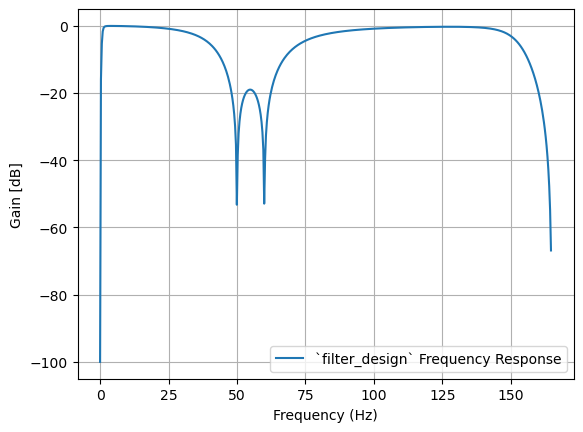

In [9]:
# Plot the frequency response
plt.figure(1)
plt.clf()
w, h = signal.sosfreqz(filter_design, fs=sensor_frequency)
db = 20 * np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w, db, label="`filter_design` Frequency Response")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Test Filter Performance
Test `filter_design` on `probe_data`. This shows plots of the filters performance when filtering the force graph in `probe_data`.

To help decorate the graphs please prvide the desired trigger threashold of the probe:

In [10]:
trigger_force_grams = 60

In [11]:
# perform filtering
time = sample_probe['time']
force = sample_probe['force']

approach_time = time[:-400]
approach_force = force[:-400]
approach_zi = filter_zi * approach_force[0]
filtered_approach_force, zf = signal.sosfilt(filter_design, approach_force, zi=approach_zi)

tap_time = time[-400:]
tap_force = force[-400:]
tap_zi = filter_zi * tap_force[0]
filtered_tap_force, zf = signal.sosfilt(filter_design, tap_force, zi=tap_zi)

# graphing functions
def fft_graph(force, sample_frequency, label):
    # Plot an FFT of the filtered signal:
    from scipy.fft import fft, fftfreq
    # Number of sample points
    N = len(force)
    # sample spacing
    T = 1.0 / sample_frequency
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(force)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label=label)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

def force_graph(force, filtered_force, time, trigger_force_grams):
    plt.figure(figsize=(12,5))
    plt.plot(time, force, label='Raw Force')
    plt.plot(time, filtered_force, label='Filtered Force')
    plt.axhline(y=trigger_force_grams, color='r', linestyle='-')
    plt.axhline(y=-trigger_force_grams, color='r', linestyle='-')
    plt.legend(loc='best')
    plt.show()

### Test 1: Probe approach
This plots the time before the tap. This looks at how well the filter rejects background noise during the probing phase

#### `force` vs force filtered with `filter_design`
In this graph we are looking to see the 'Filtered Force' line remain inside the red lines denoting the trigger force. A Properly filtered force grpah will be horizontal.

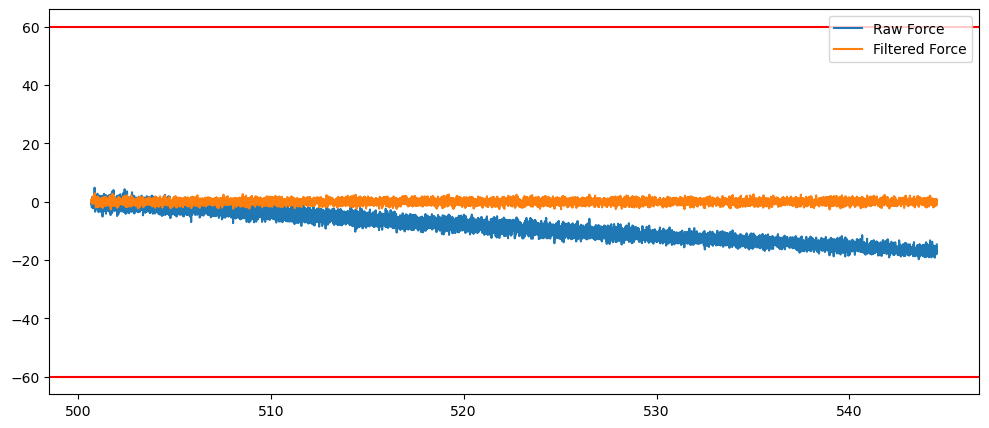

In [12]:
force_graph(approach_force, filtered_approach_force, approach_time, trigger_force_grams)

#### FFT of `probe_data` before and after filtering

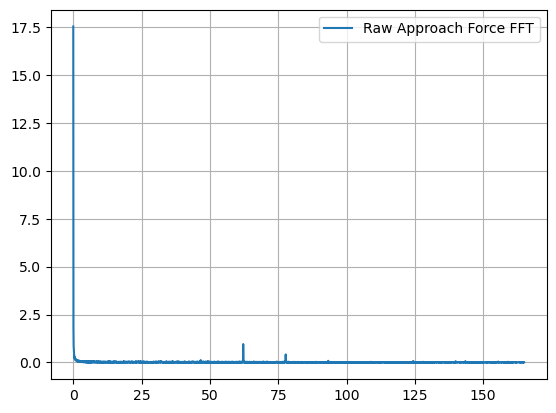

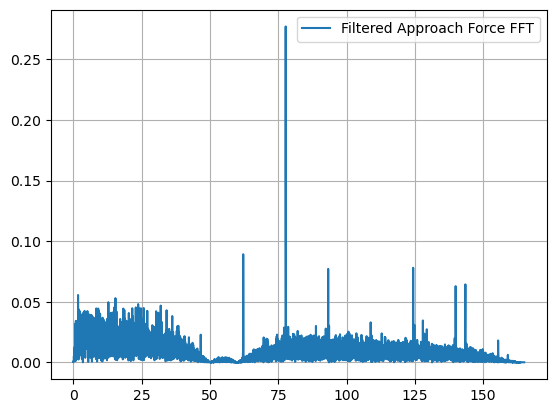

In [13]:
fft_graph(approach_force, sensor_frequency, "Raw Approach Force FFT")
fft_graph(filtered_approach_force, sensor_frequency, "Filtered Approach Force FFT")

### Test 2: Tap Phase
This plots the time of the tap. This looks at how well the filter performed during the tap.

#### `force` vs force filtered with `filter_design`
For the tap we want to see the 'Filtered Force' line cross the red boundaries to trigger the endstop. If the 'Filtered Force' stays inside the red lines then the tap would not have triggered the endstop and a crash of the toolhead would result.

Pay attention to how much lag there is between the 'Raw Force' graph and the 'Filtered Force' lines. Significant lag will subject the printer to higher forces before triggering.

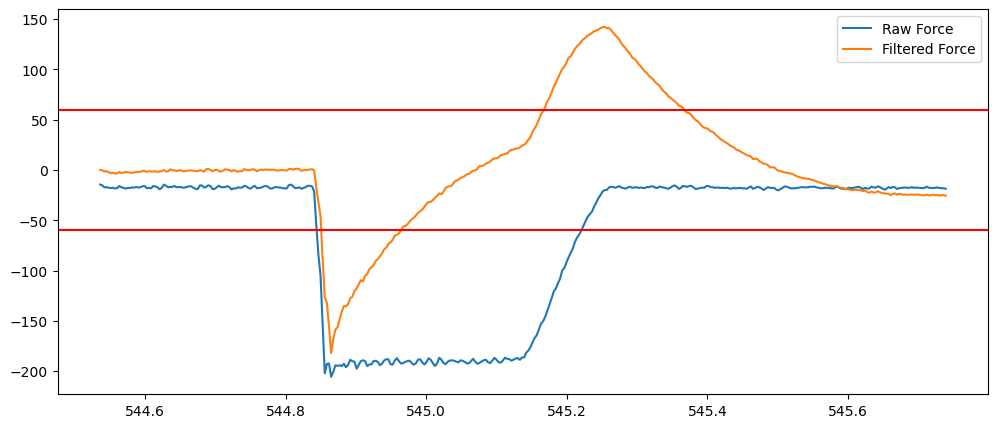

In [14]:
force_graph(tap_force, filtered_tap_force, tap_time, trigger_force_grams)

#### FFT of `probe_data` before and after filtering

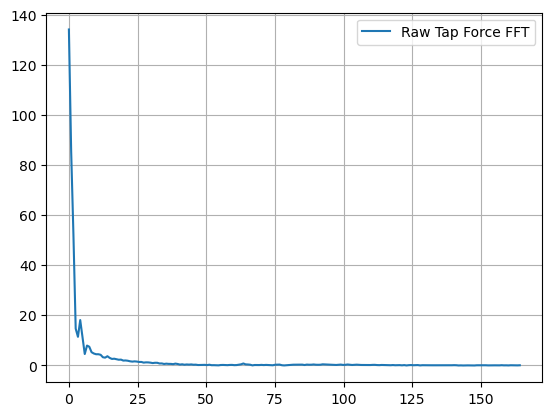

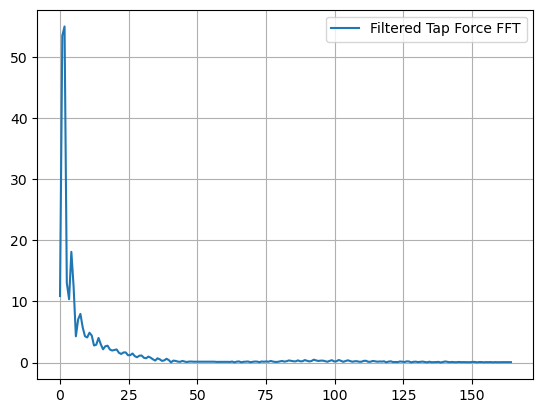

In [15]:
fft_graph(tap_force, sensor_frequency, "Raw Tap Force FFT")
fft_graph(filtered_tap_force, sensor_frequency, "Filtered Tap Force FFT")